In [2]:
import numpy as np  
import pandas as pd 
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import math
%matplotlib inline 

In [3]:
data = pd.read_csv("orders.txt", encoding='cp1251', sep='\t')

In [4]:
data.head()

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
0,1002854,45978,2141,2009-10-13 00:00:00,NEWTON,MA,02459,VI,190.00,3,3
1,1002855,125381,2173,2009-10-13 00:00:00,NEW ROCHELLE,NY,10804,VI,10.00,1,1
2,1002856,103122,2141,2011-06-02 00:00:00,MIAMI,FL,33137,AE,35.22,2,2
3,1002857,130980,2173,2009-10-14 00:00:00,E RUTHERFORD,NJ,07073,AE,10.00,1,1
4,1002886,48553,2141,2010-11-19 00:00:00,BALTIMORE,MD,21218,VI,10.00,1,1


In [5]:
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

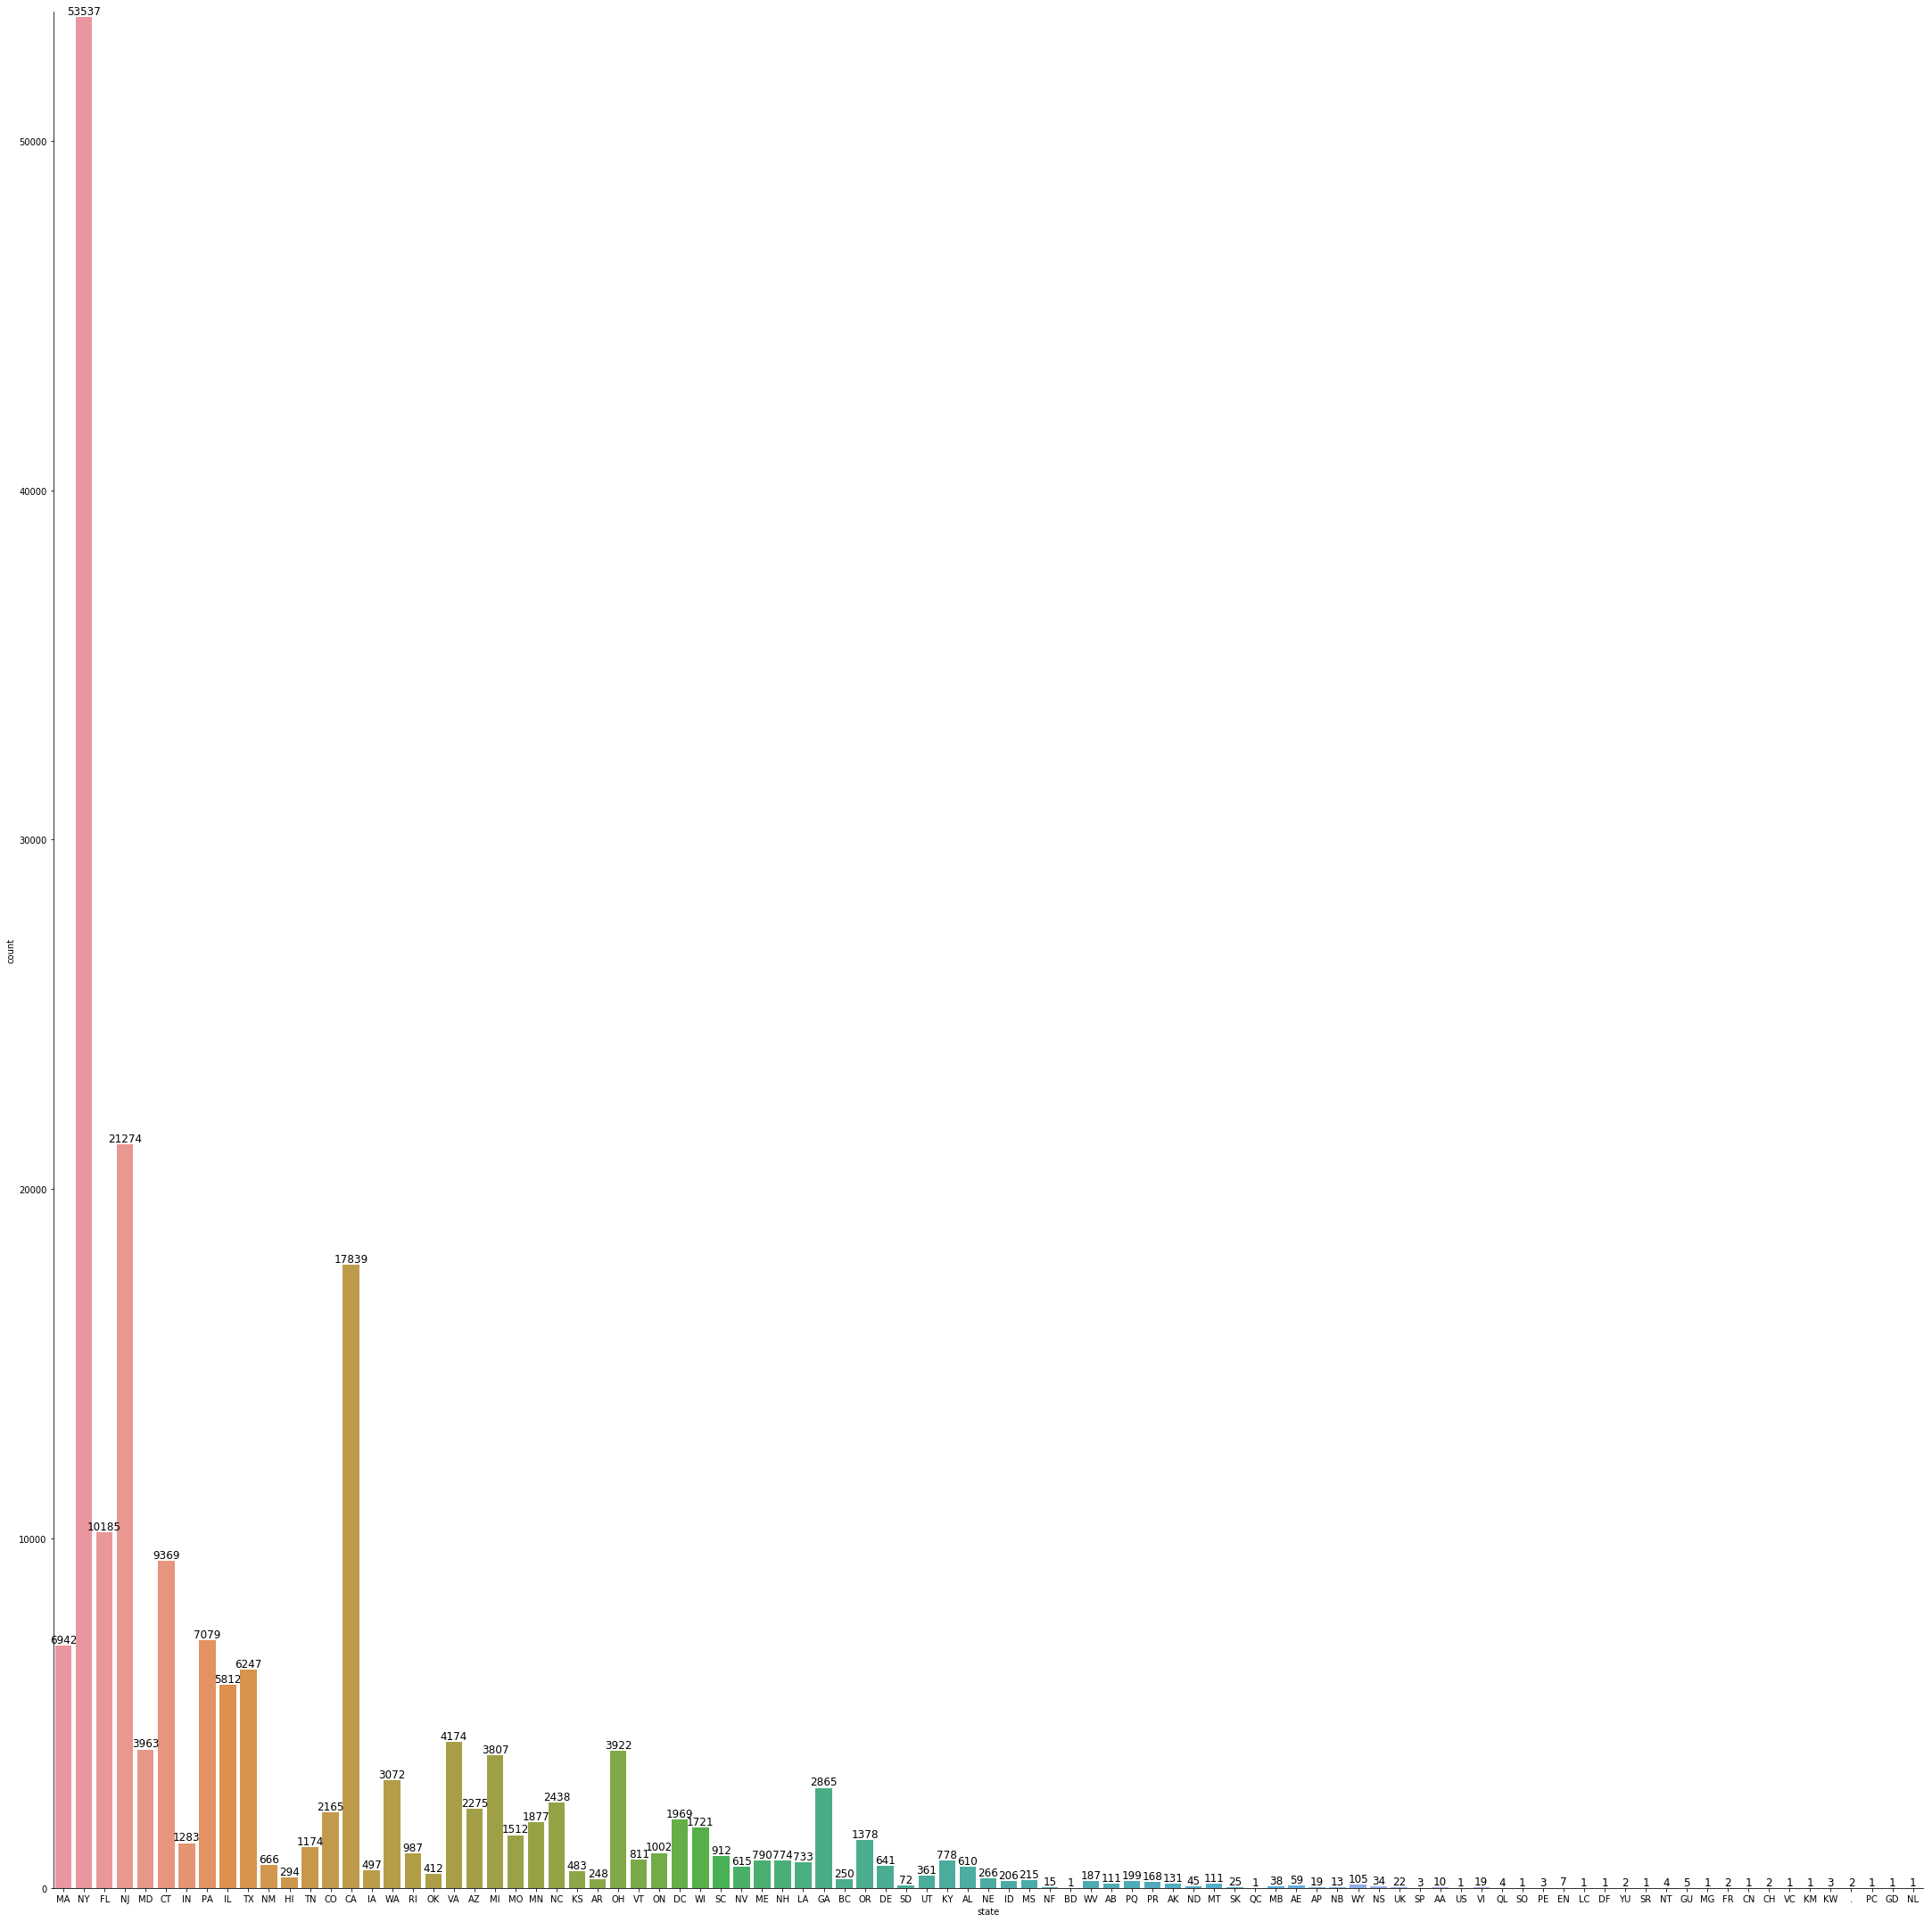

In [6]:
sns.factorplot('state',data=data,kind='count',size=30, legend=True,)
ax = plt.gca()
y_max = data['state'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

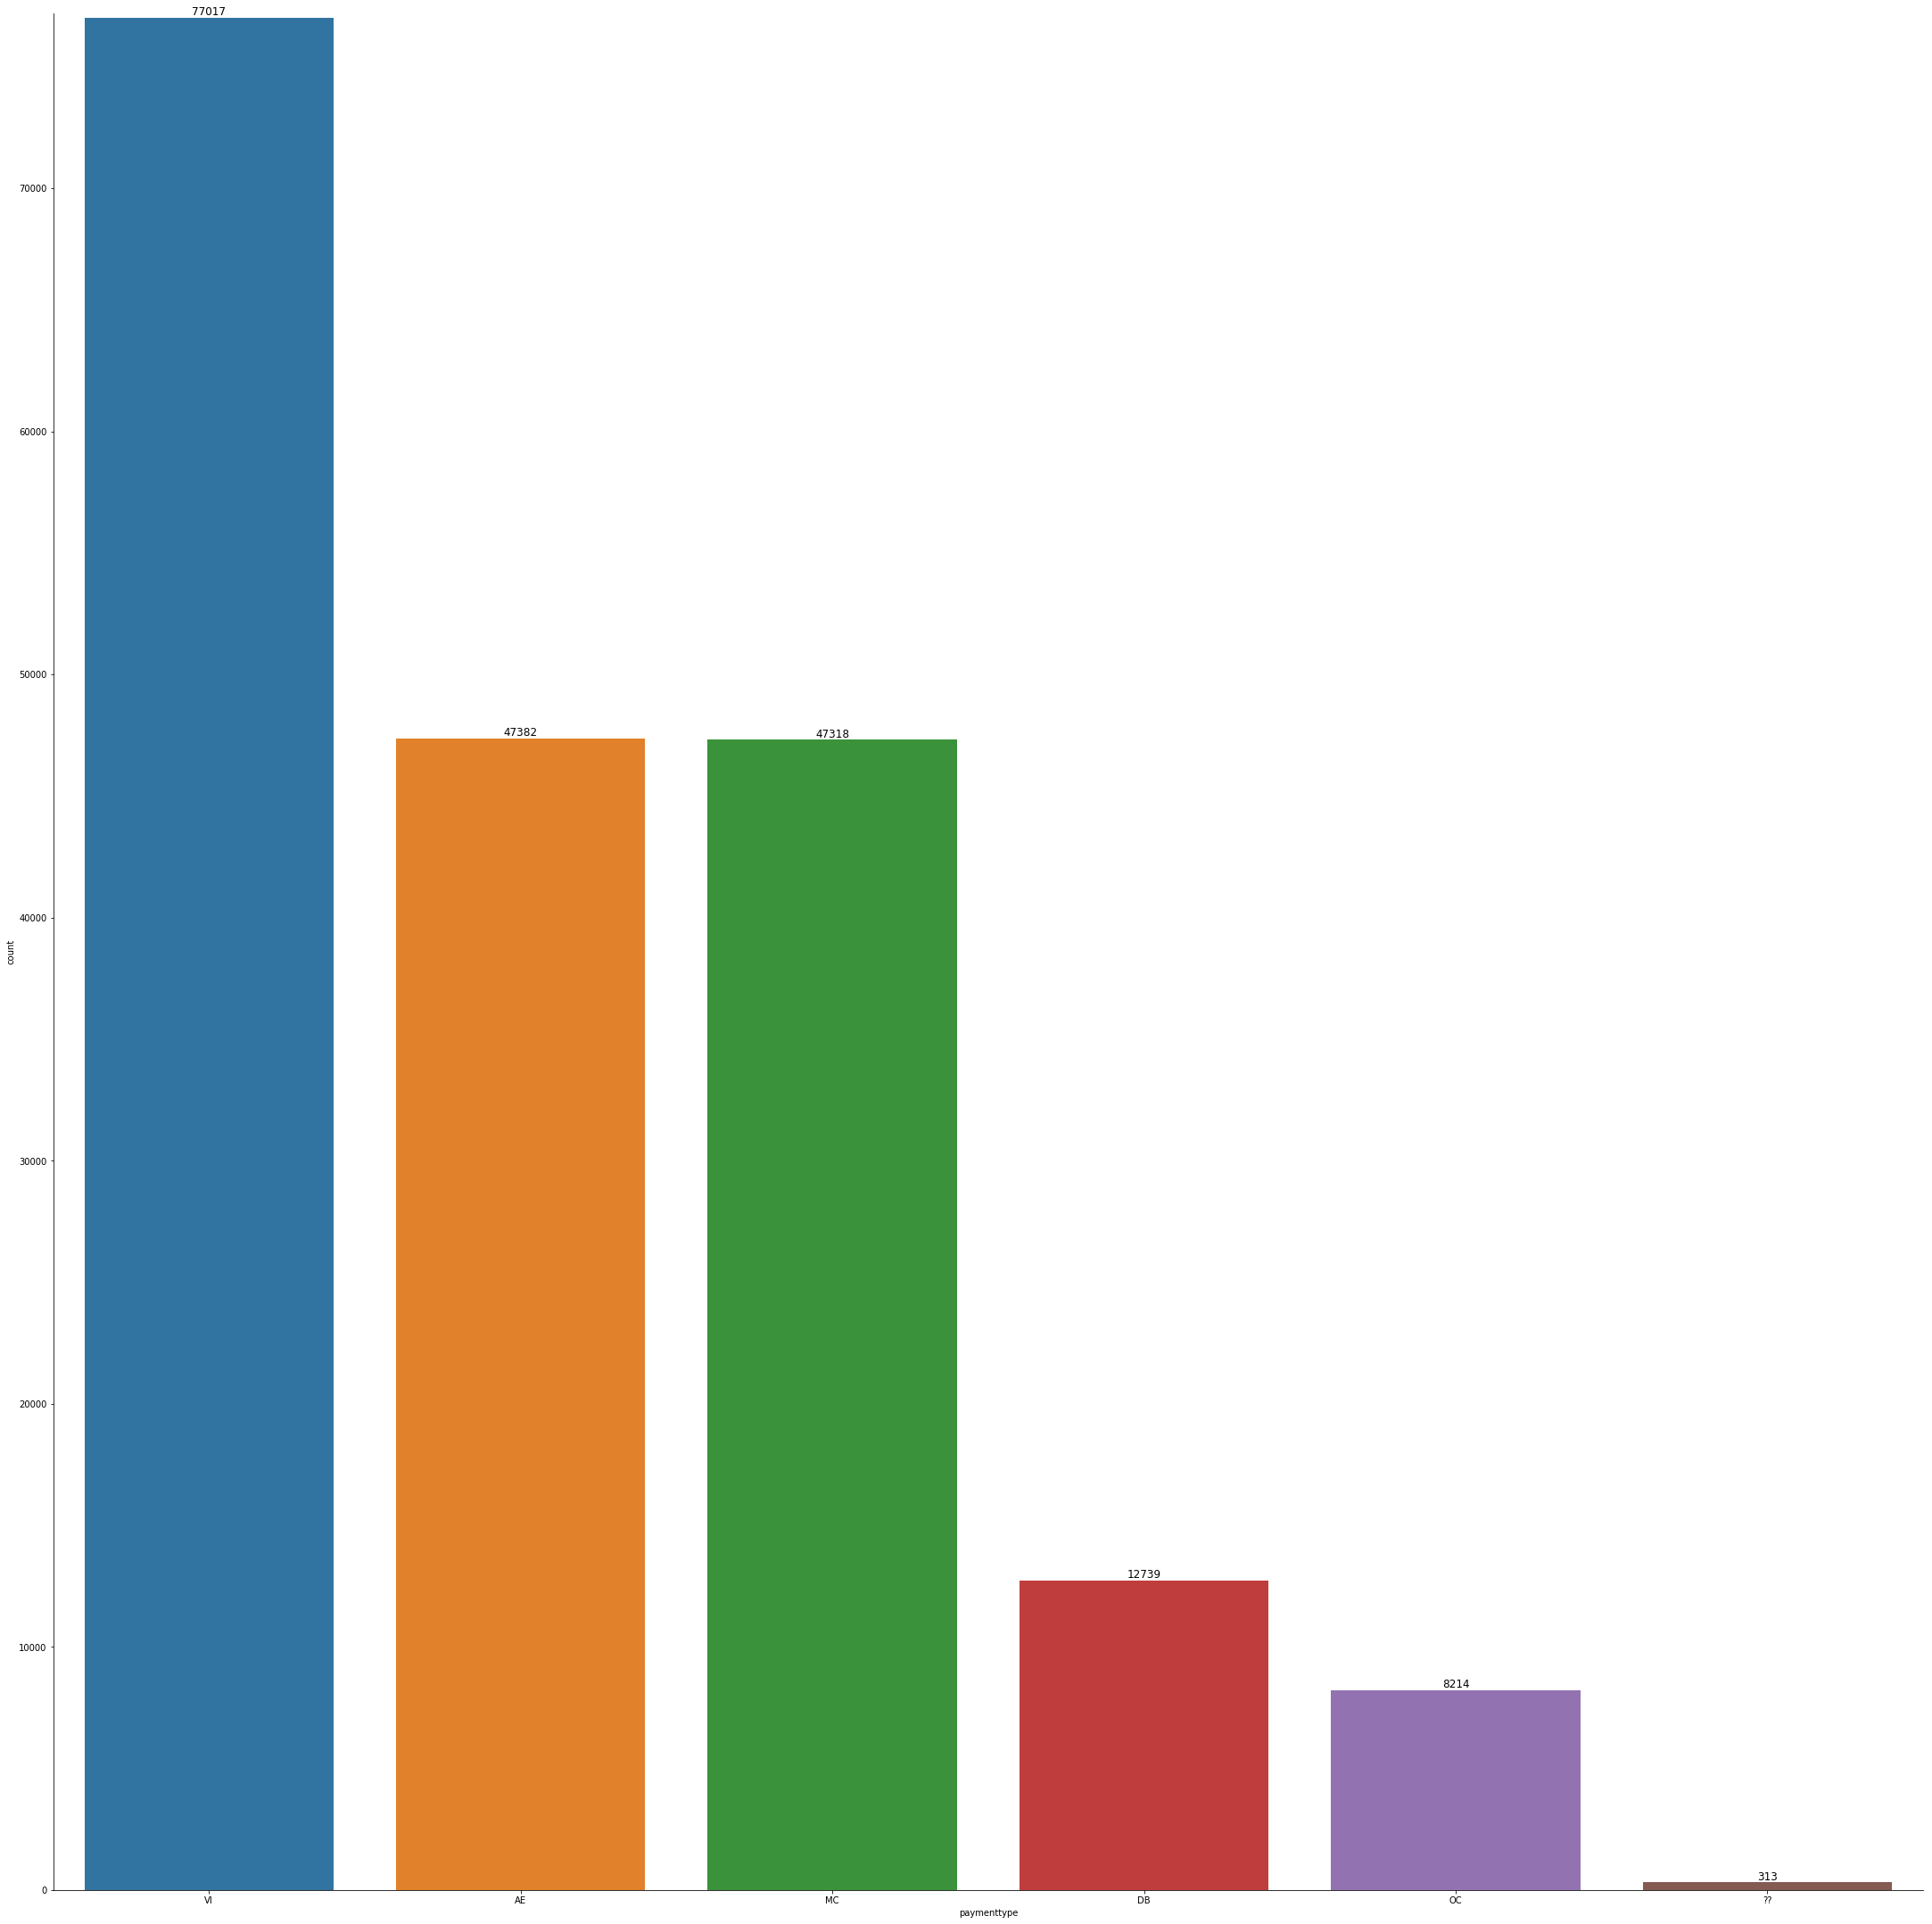

In [8]:
sns.factorplot('paymenttype',data=data,kind='count',size=30, legend=True)
ax = plt.gca()
y_max = data['paymenttype'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

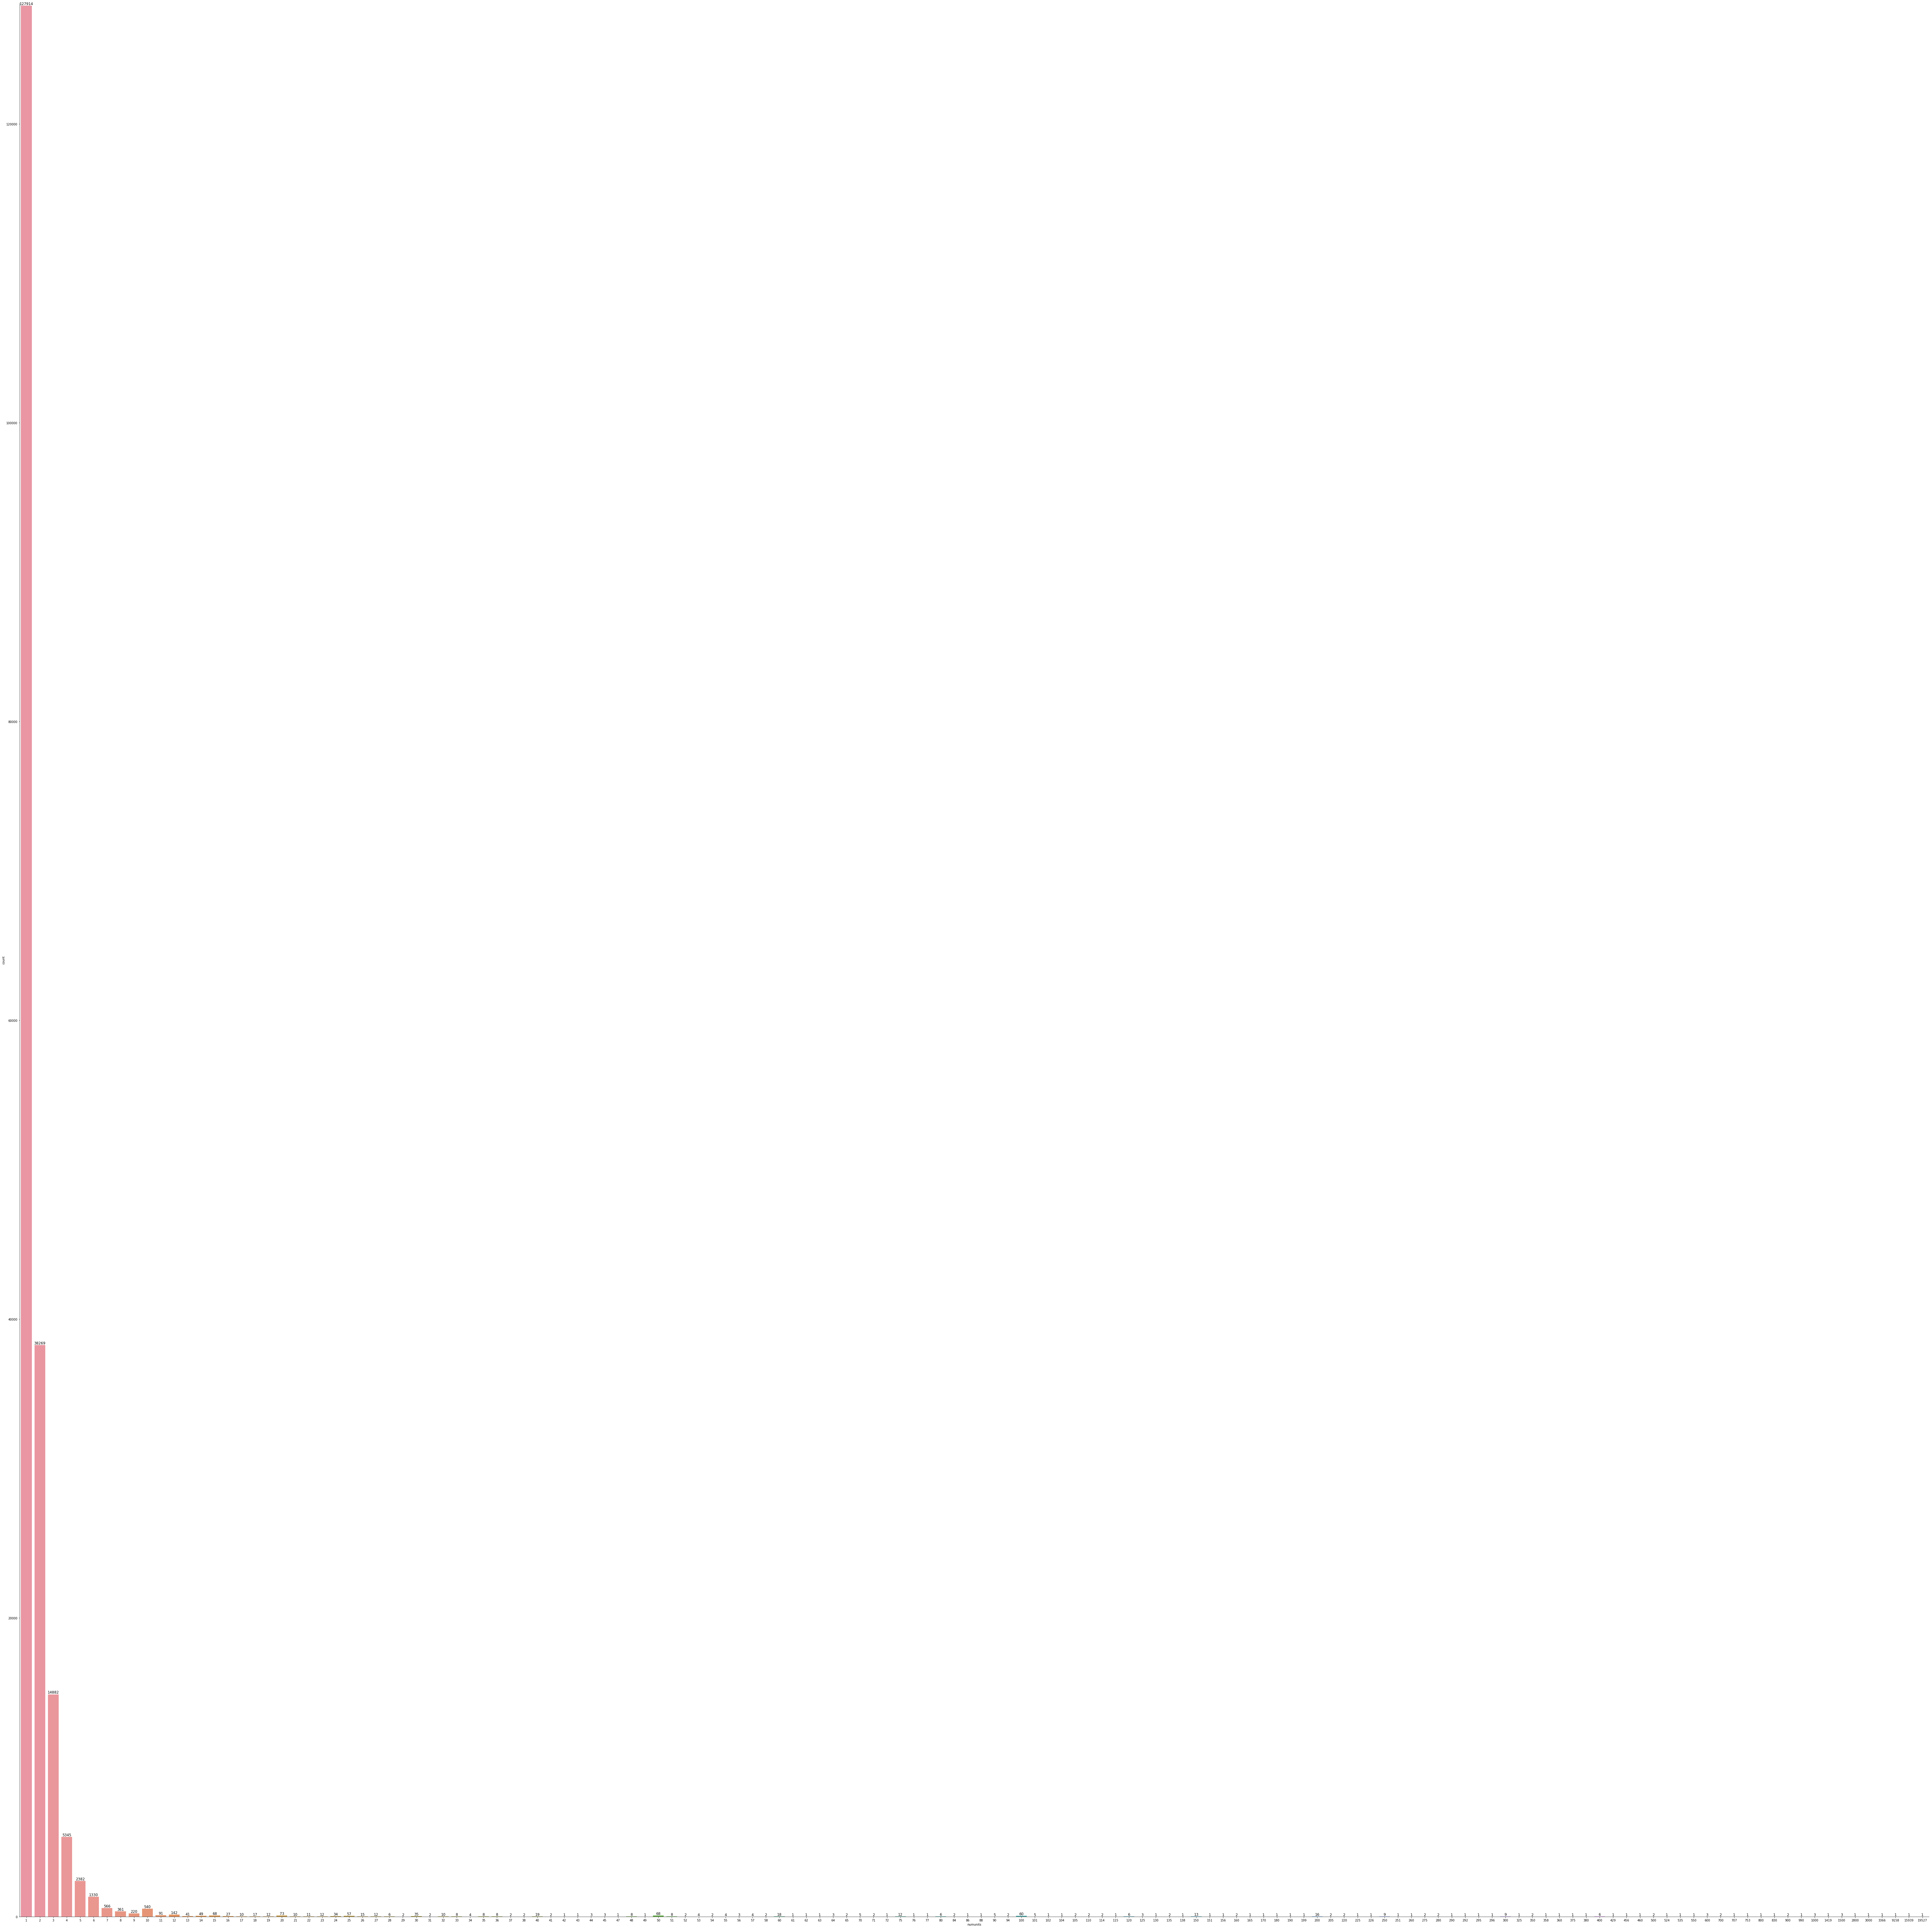

In [9]:
sns.factorplot('numunits',data=data,kind='count',size=90, legend=True,aspect=1)
ax = plt.gca()
y_max = data['numunits'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [7]:
time_series = DataFrame(data['orderdate'].value_counts())
time_series.sort_index(inplace=True,ascending=True)
time_series.columns = ['Orders_count']
time_series.index = pd.to_datetime(time_series.index)
time_series.head()

,Orders_count
2009-10-04,181
2009-10-05,149
2009-10-06,86
2009-10-07,58
2009-10-08,34


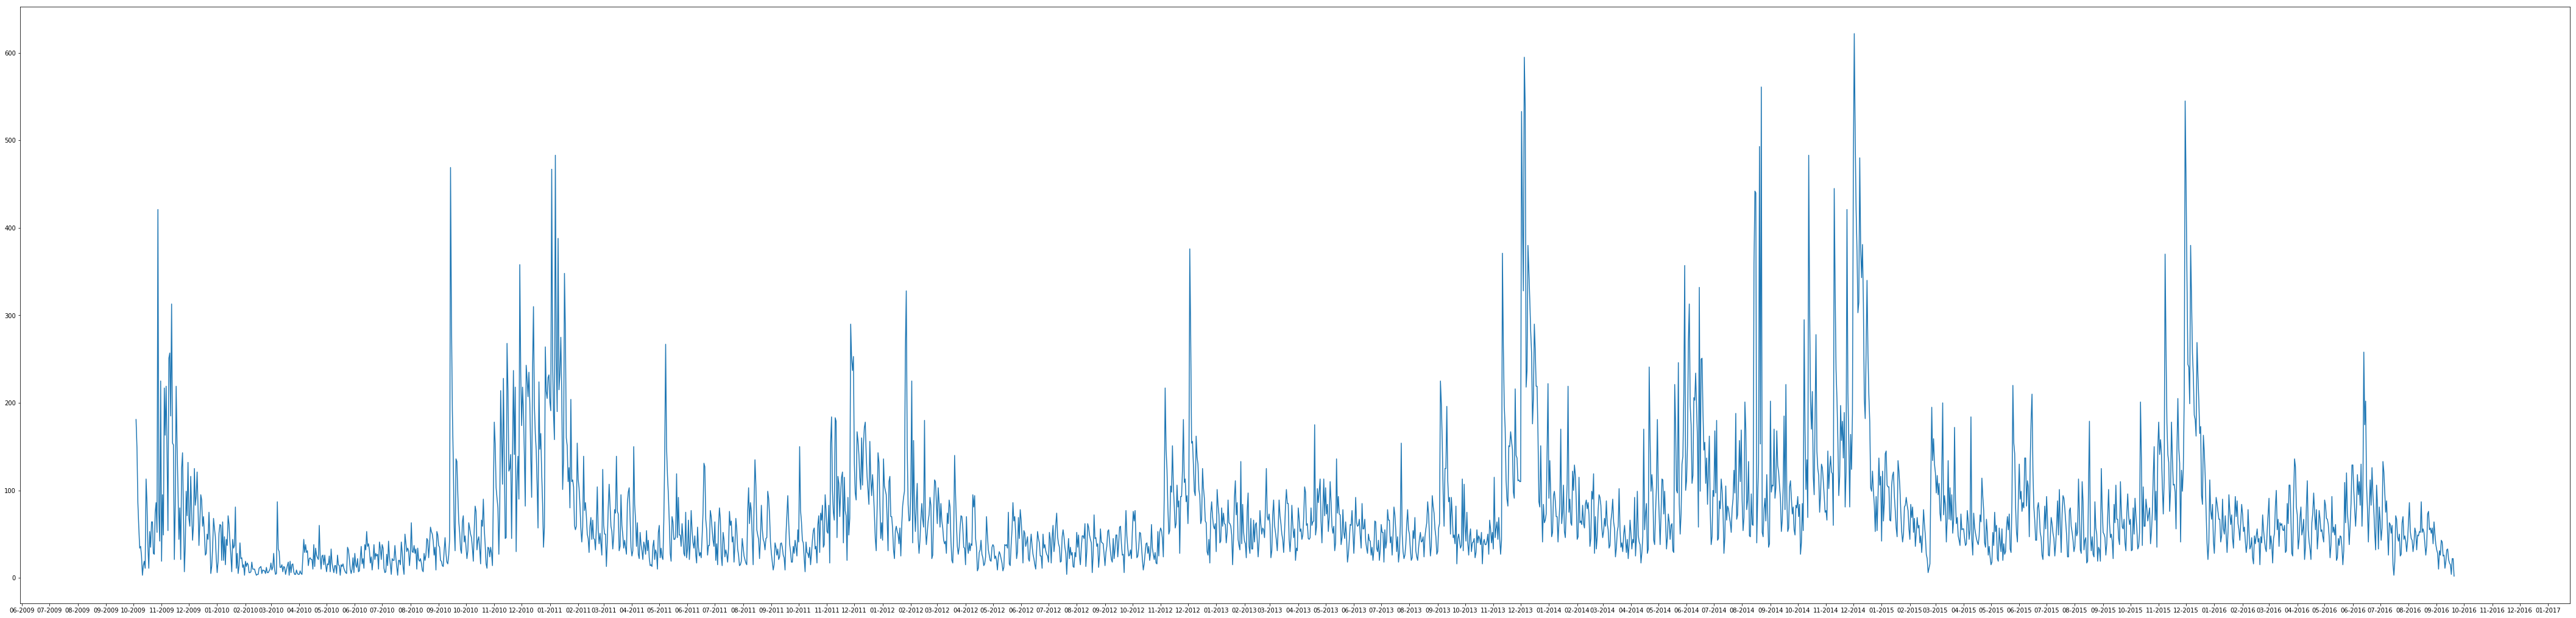

In [11]:
plt.figure(figsize=(75,20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()wSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4xLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvAOZPmwAAIABJREFUeJzs3cGrvVtZwPFnvXv/nARhoYVUcAkkZ5E4qEkTRzWxQU2TKJxEcwf1LwQ5EaIQgybhoCQqKhtlFF0xFLS4l7SUq10vpdXN8Ox3rQZ7rXP2+Snde+o85333+34+IPvs8zvKEja8D4fzfFdprQUAAAAAAAAAAAAAAAAAAAAA6zEtfQAAAAAAAAAAAAAAAAAAAAAA7hOEAAAAAAAAAAAAAAAAAAAAAFgZQQgAAAAAAAAAAAAAAAAAAACAlRGEAAAAAAAAAAAAAAAAAAAAAFgZQQgAAAAAAAAAAAAAAAAAAACAlRGEAAAAAAAAAAAAAAAAAAAAAFgZQQgAAAAAAAAAAAAAAAAAAACAlRGEAAAAAAAAAAAAAAAAAAAAAFgZQQgAAAAAAAAAAAAAAAAAAACAlRGEAAAAAAAAAAAAAAAAAAAAAFiZ49IHiIh429ve1l544YWljwEAAAAAAAAAAAAAAAAAAACQ6lOf+tRrrbW3v9HPrSII8cILL8SLL7649DEAAAAAAAAAAAAAAAAAAAAAUpVS/unN/NyUfRAAAAAAAAAAAAAAAAAAAAAAHkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAAAAAAGBlBCEAAAAAAAAAAAAAAAAAAAAAVkYQAgAAAAAAAAAAAAAAHuAb37yJX//Tf4i5tqWPAgAAAMCGCUIAAAAAAAAAAAAAAMAD/OVLr8WH/uLleOnV/1j6KAAAAABsmCAEAAAAAAAAAAAAAAA8QG3t/FoXPggAAAAAmyYIAQAAAAAAAAAAAAAAD3AbhOivAAAAAJBBEAIAAAAAAAAAAAAAAB5gdCD0IAAAAADIJAgBAAAAAAAAAAAAAAAP0OJcgpgVIQAAAABIJAgBAAAAAAAAAAAAAAAPUGt/FYQAAAAAIJEgBAAAAAAAAAAAAAAAPMAIQTRBCAAAAAASCUIAAAAAAAAAAAAAAMADjA5E1YMAAAAAIJEgBAAAAAAAAAAAAAAAPEDtRYhZEQIAAACARIIQAAAAAAAAAAAAAADwACMDMcIQAAAAAJBBEAIAAAAAAAAAAAAAAB5ghCD0IAAAAADIJAgBAAAAAAAAAAAAAAAPUNt4VYQAAAAAII8gBAAAAAAAAAAAAAAAPEDrIYi5CkIAAAAAkEcQAgAAAAAAAAAAAAAAHqD2EETTgwAAAAAgkSAEAAAAAAAAAAAAAAA8wOhAVEUIAAAAABIJQgAAAAAAAAAAAAAAwAPUdv8VAAAAADIIQgAAAAAAAAAAAAAAwAO0di5BzIoQAAAAACQShAAAAAAAAAAAAAAAgAeoPQgxwhAAAAAAkEEQAgAAAAAAAAAAAAAAHqC2+68AAAAAkEEQAgAAAAAAAAAAAAAAHqDdBiEUIQAAAADIIwgBAAAAAAAAAAAAAAAPMEIQghAAAAAAZBKEAAAAAAAAAAAAAACAB2iCEAAAAAA8AUEIAAAAAAAAAAAAAAB4gNo7ELUuew4AAAAAtk0QAgAAAAAAAAAAAAAAHqD1IMQ8vgAAAACABIIQAAAAAAAAAAAAAADwALWHIJogBAAAAACJBCEAAAAAAAAAAAAAAOABRgii6kEAAAAAkEgQAgAAAAAAAAAAAAAAHmCEIGpThAAAAAAgjyAEAAAAAAAAAAAAAAA8wAhB1CoIAQAAAECeNxWEKKW8tZTysVLK35dSPl9K+YlSyveWUv6slPJSf/2e/rOllPKhUsrLpZTPlFLenft/AQAAAAAAAAAAAAAAns7IQOhBAAAAAJDpTQUhIuI3IuJPWmvviogfjYjPR8QHI+ITrbV3RsQn+vuIiJ+KiHf2/3wgIj78qCcGAAAAAAAAAAAAAIAF1dbuvQIAAABAhjcMQpRSvjsifjIifjsiorX2rdba1yPifRHx0f5jH42In+lfvy8ifqed/XVEvLWU8o5HPzkAAAAAAAAAAAAAACxgdCCqHgQAAAAAid4wCBERPxwRX4uIj5RSPl1K+a1SyndFxPe31r4SEdFfv6///A9ExJcu/vtf7t8DAAAAAAAAAAAAAICrV3sJoipCAAAAAJDozQQhjhHx7oj4cGvtxyLi9Yj44P/y8+U7fO/bfstVSvlAKeXFUsqLX/va197UYQEAAAAAAAAAAAAAYGmjA1GbIAQAAAAAed5MEOLLEfHl1trf9Pcfi3Mg4l9KKe+IiOivr178/A9d/Pd/MCJeef5/tLX2m62197TW3vP2t7/9/3p+AAAAAAAAAAAAAAB4Uq3fmVj1IAAAAABI9IZBiNbaVyPiS6WUH+nfem9EfC4iPh4R7+/fe39E/EH/+uMR8fPl7Mcj4hutta887rEBAAAAAAAAAAAAAGAZrYcgalOEAAAAACDP8U3+3K9ExO+WUt4SEf8YEb8Q55jE75VSfjEi/jkifq7/7B9FxE9HxMsR8V/9ZwEAAAAAAAAAAAAAYBNGCKJWQQgAAAAA8rypIERr7e8i4j3f4Z/e+x1+tkXEL/8/zwUAAAAAAAAAAAAAAKt0G4TQgwAAAAAg0bT0AQAAAAAAAAAAAAAA4JqMEMQIQwAAAABABkEIAAAAAAAAAAAANuNXf/+z8YefeWXpYwAAGzc6EE0QAgAAAIBEghAAAAAAAAAAAABsxh999qvxyZdfW/oYAMDGjRDELAgBAAAAQCJBCAAAAAAAAAAAADajtRan2WImAJCr9hBENXYAAAAAkEgQAgAAAAAAAAAAgM1oEXGymQkAJBvjxghDAAAAAEAGQQgAAAAAAAAAAAA2o7WIm7kufQwAYONGCEIPAgAAAIBMghAAAAAAAAAAAABsRmstTrPNTAAgWR835mruAAAAACCPIAQAAAAAAAAAAACb0SLiZDETAEhWW7v3CgAAAAAZBCEAAAAAAAAAAADYjhZxqnXpUwAAGzf6U3oQAAAAAGQShAAAAAAAAAAAAGAzWkScZpuZAECu2ksQczV3AAAAAJBHEAIAAAAAAAAAAIDNaK3FqdaljwEAbNzIQIwwBAAAAABkEIQAAAAAAAAAAABgM1pEnGaLmQBArtZDENXYAQAAAEAiQQgAAAAAAAAAAAA2o7WIG5uZAECyWs+vIwwBAAAAABkEIQAAAAAAAAAAANiMFi3msaEJAJCk9hDELEQFAAAAQCJBCAAAAAAAAAAAADajtYjTbDETAMg1OhB6EAAAAABkEoQAAAAAAAAAAABgM1pE3Mx16WMAAJt3LkG0pggBAAAAQB5BCAAAAAAAAAAAALajRcyu6gYAko1xowpCAAAAAJBIEAIAAAAAAAAAAIDNaNHiZraYCQDkGiEIYwcAAAAAmQQhAAAAAAAAAAAA2IzWIk61Ln0MAGDjahuvihAAAAAA5BGEAAAAAAAAAAAAYDNaRMzVYiYAkKv1EEQThAAAAAAgkSAEAAAAAAAAAAAAm9Fai5vZYiYAkGt0IGpd9hwAAAAAbJsgBAAAAAAAAAAAAJvRIuI028wEAHLVXoSYmxAVAAAAAHkEIQAAAAAAAAAAANiM1iJO1WImAJBrBCGaIAQAAAAAiQQhAAAAAAAAAAAA2BRBCAAg2xg3jB0AAAAAZBKEAAAAAAAAAAAAYBPGDd1zbW7rBgBSjVmjmjkAAAAASCQIAQAAAAAAAAAAwCZc7mOeXNcNACQac8ds5gAAAAAgkSAEAAAAAAAAAAAAm3C5jnmaLWcCAHlqL0I0IwcAAAAAiQQhAAAAAAAAAAAA2IR2sZF5U+uCJwEAtq628aoIAQAAAEAeQQgAAAAAAAAAAAA24XIdc54tZwIAeUaIShACAAAAgEyCEAAAAAAAAAAAAGzC5T7mTa3LHQQA2Lwxdhg5AAAAAMgkCAEAAAAAAAAAAMAmtLgrQpxmt3UDAHlqL1HVZuYAAAAAII8gBAAAAAAAAAAAAJtwuY8pCAEAZKq1vwpCAAAAAJBIEAIAAAAAAAAAAIDNOY0tTQCABCMEoUEFAAAAQCZBCAAAAAAAAAAAADbh8oLuU7WdCQDkGXNHa2YOAAAAAPIIQgAAAAAAAAAAALAJLe4WMm/muuBJAICtG3NHFYQAAAAAIJEgBAAAAAAAAAAAAJtwuY85V8uZAECeMWpUDSoAAAAAEglCAAAAAAAAAAAAsAmXCYibWRACAMhTe4mqNjMHAAAAAHkEIQAAAAAAAAAAANiEdrGQeZpd1w0A5BljhyAEAAAAAJkEIQAAAAAAAAAAANiEy3XMuVrOBADyjBCEkQMAAACATIIQAAAAAAAAAAAAbMLlBd03tjMBgERj7qjNzAEAAABAHkEIAAAAAAAAAAAAtuFiH/M01+XOAQBs3ghBVBEqAAAAABIJQgAAAAAAAAAAALAJ7aIIcbKcCQAk6j2IMHIAAAAAkEkQAgAAAAAAAAAAgE1oFwuZp9l2JgCQp/bBozYzBwAAAAB5BCEAAAAAAAAAAADYhMt1zFOti50DANi+EYLQgwAAAAAgkyAEAAAAAAAAAAAAm9AuNjJPs+1MACDPGDvmauYAAAAAII8gBAAAAAAAAAAAAJtwuY55qnWxcwAA2zc6ELUJQgAAAACQRxACAAAAAAAAAACATbjcx7yZLWcCAHlaHzyqkQMAAACARIIQAAAAAAAAAAAAbEKLu43M2XYmAJCo9iBEa2YOAAAAAPIIQgAAAAAAAAAAALANF/uYN3Nd7hwAwOaNsWMWhAAAAAAgkSAEAAAAAAAAAAAAm3C5jnmqljMBgDy1zxrVzAEAAABAIkEIAAAAAAAAAAAANuHygu7ZcibA7v3sh/8qPvLJLyx9DDZqzB3NyAEAAABAIkEIAAAAAAAAAAAANqHF3UbmzVwXPAkAa/DSq/8ZX3zt9aWPwUbVXoKoihAAAAAAJBKEAAAAAAAAAAAAYBMu9zFPs+VMgL1r7TIVBI+r9g/XLAgBAAAAQCJBCAAAAAAAAAAAADbhch3zVC1nAuydJwGZRm7EyAEAAABAJkEIAAAAAAAAAAAANqFd3NB9muuCJwFgLZplfZKMEETzIQMAAAAgkSAEAAAAAAAAAAAAm3C5j3lyXTcAHgUkGiGI2cwBAAAAQCJBCAAAAAAAAAAAADbnZq5LHwGAhbWIaKoQJBkdCD0IAAAAADIJQgAAAAAAAAAAALAJ7WIh023dAECmejF4tGbuAAAAACCHIAQAAAAAAAAAAACbcHkL/M1sMRNg71prYU+fLK1FlHL+WocKAAAAgCyCEAAAAAAAAAAAAGzC5dLvqdblDgLAKtjRJ0vrQ8dxOhchZkUIAAAAAJIIQgAAAAAAAAAAALAJl6uYJ4uZAIQoBDnGmHHoQYjafNIAAAAAyCEIAQAAAAAAAAAAwCa0i2XM01wXPAkAa2BHnywjAHGczn+O77MGAAAAQBZBCAAAAAAAAAAAADbhchfzNNvMBNi7Fs2iPilugxCHcu89AAAAADw2QQgAAAAAAAAAAAA24XIX81QtZgIAOcbMcSjnIMQsCAEAAABAEkEIAAAAAAAAAAAANuJuGfNU64LnAGANzjv6FvV5fLdBiOkchGjGDgAAAACSCEIAAAAAAAAAAACwCZeXc9/MFoAB9q7F/WcDPJbaP1jHHoSoPmgAAAAAJBGEAAAAAAAAAAAAYBMuVzHnajETAMhxG4Q4TPfeAwAAAMBjE4QAAAAAAAAAAABgEy53MU9zXe4gAKxDu/9sgMcyulPHqURExOyDBgAAAEASQQgAAAAAAAAAAAA2ocXdMubNbDETYO8unwvwqPpHa+pBCD0IAAAAALIIQgAAAAAAAAAAALAJl8uYc7WZCYAoBDlqHzqOPQhRFSEAAAAASCIIAQAAAAAAAAAAwCaMXczjVOKm1mUPA8Di7OiT5TYIcRhBiCVPAwAAAMCWCUIAAAAAAAAAAACwCeMW+GeHKU6zzUwARCHIMQIQh+n85/hVEQIAAACAJIIQAAAAAAAAAAAAbMJY+n12KDFbzATYPU8CsowI1XEqERFRlUcAAAAASCIIAQAAAAAAAAAAwKY8O0xxM9eljwHAwlprohCkGP2Hw20QYsHDAAC78MXXXo93/dofxxdee33powAA8MQEIQAAAAAAAAAAANiEsZz57DDFyWYmAJCk9qHjeBuEMHcAALle+cY3479varzy9W8ufRQAAJ6YIAQAAAAAAAAAAACbMO6Bf3YscZrrwqcBYGkt7mJB8JhGd+owghBCVADAE5nNHQAAuyMIAQAAAAAAAAAAwCaMpd9n0xQnCxIAuycGQZYRgDiOIITPGgCQrc8bsyEXAGB3BCEAAAAAAAAAAADYhLES8ewwxWm2IAFARAvPA/IcpvOf41eLmQBAsjFtVCUqAIDdEYQAAAAAAAAAAABgE1pfxnx2LHGqdeHTAABbNQIQx6lERMRsMRMASDb6U+YOAID9EYQAAAAAAAAAAABgE8ZKxHGaoja3ZgLs2YgEhUcBCcaIcTicgxDN5wwASNb6YFsNHgAAuyMIAQAAAAAAAAAAwCaMnYi3HM5/GndT64KnAQC2aixiHqdy7z0AQLbZrzoAAHZHEAIAAAAAAAAAAICNOC9jPjuelzNPs+VMgL0a+/meBGRo/QN2EIQAAJ7IGDfMHQAA+yMIAQAAAAAAAAAAwCaMnYjjdP7TuFO1JAGwV54AZBozx7M+c1jMBACyjWnD3AEAsD+CEAAAAAAAAAAAAGzCWIl4duhBiLkudxgAVqFZmCPBaE5NU7n3HgAgy5hrZ4MHAMDuCEIAAAAAAAAAAACwCWPnt/cgLGcC7JgQBJnGzdzHEYQwdAAAT0QQAgBgfwQhAAAAAAAAAAAA2ISx/FuiLHwSAJbWnnuFxzSCEIcRhPBBAwCSjXGjCp8BAOyOIAQAAAAAAAAAAACbMFYipmm8tyQBsHf25cgwPlfPDiMI4YMGACTr48Zclz0GAABPTxACAAAAAAAAAACATRi7mKWU/o3lzgLAsuznk2l8vg69QiUIAQBkG9HL2dwBALA7ghAAAAAAAAAAAABswliOmHoQwooEwH6NZ4JnARlGAOIwjfcLHgYA2IXRgagGDwCA3RGEAAAAAAAAAAAAYBv6TsRU+ls7EgBAgrsgxHTvPQBANnMHAMD+CEIAAAAAAAAAAABwlT73yr/HL330b+NbpxoRd7fAT6X095YkAPZq7Mk1C3MkGBdzP+sVKjd1AwDZxlg7mzsAAHZHEAIAAAAAAAAAAICr9Okv/Vv8+edfjX99/VsRcbccURY8EwCwB+eh43DoQQh7mQBAsjFuVMEzAIDdEYQAAAAAAAAAAADgKo0diLEM0fp6RCnl3r8DsF8eBWQYAYjjNIIQPmkAQK7W5425LnwQAACenCAEAAAAAAAAAAAAV+02CNF3MftupiVggB2zn0+m2osQh+n85/jNBw4ASDamDSEqAID9EYQAAAAAAAAAAADgKo0ViLELMd5PpfTvW5IA2KsWzz0c4BH1HkQce4XKTd0AwFOZqwEXAGBvBCEAAAAAAAAAAAC4Tj34MJYhRgCiX9btdngAIMWYOQ49COGmbgAg2xg3BCEAAPZHEAIAAAAAAAAAAICrNpYwx0pEKWW5wwCwCmNhroWFOR7f+FQdBSEAgCdzP4YJAMB+CEIAAAAAAAAAAABwlcYKxO3lmP1VDgIAa3JkGgGI4+H85/j2MgGAbGPemA0eAAC7IwgBAAAAAAAAAADAVbq9/b1/MW6Bn0q59+8A7JdnARlGjKr3IGKuPmgAQK4xbcx10WMAALAAQQgAAAAAAAAAAACuWr0NQ5xfp9Lfux8eYLeaEgSJav98Habp3nsAgGzmDgCA/RGEAAAAAAAAAAAA4CqNZd9xK/fYiSil3HsPwH55FpBhzCDHycwBADyNMW+M34EAALAfghAAAAAAAAAAAABctXE75liJmEYQYqHzALA8zwAyjYXMEYRwUzcAkK3F/SgmAAD7IQgBAAAAAAAAAADAVRorEGMHc9zW3Xczb98DsD+3zwZpCBKMPcxDHzpmMwcAkGyMG0JUAAD7IwgBAAAAAAAAAADAVXp+GWKsRJSyzHkAgH0Ys8cIQrioGwDINsaN2eABALA7ghAAAAAAAAAAAABctdsgRN+JmHoRwooEwI71h4ALlMnQ+gfrOE333gMAZNODAADYH0EIAAAAAAAAAAAArtLYgai3S5jn1zKCEJYkAHaryQKRaCxiHg/nmcNN3QBAthGgquYOAIDdEYQAAAAAAAAAAADgKt0uQzx3C/xUbn/iyc8EwLp4EpBhzBzHPnTYywQAnsqsfgkAsDuCEAAAAAAAAAAAAFy1cTvmWImYynk5044EwH6152JB8Jhq/2BN05g5fNAAgFxj3KhKVAAAuyMIAQAAAAAAAAAAwFWrzy399t1Mt8ID7JhnAJlGEOLYh44qCAEAPJHZ3AEAsDuCEAAAAAAAAAAAAFylu9vfz1+0sf5bykInAmB9LMzx+MYMcpzOf44/1wUPAwDswvidx1zNtwAAeyMIAQAAAAAAAAAAwFWrt2GI82u/rDtcmgmwX81DgERjIfN4OA8d1ecNAEg2xg1zBwDA/ghCAAAAAAAAAAAAcJVub8fsyxBjJWIq5d6/A7A/4wlgX44MtZ5fD71CJUACAGS7DULUZc8BAMDTE4QAAAAAAAAAAADgqo3bMccyZt/NtAQMAKQYs8exDx3VzAEAJBvjxuyXHQAAuyMIAQAAAAAAAAAAwFUaOxDP38pdSrn37wDsz+0zYtljsFHj8zX1mWNWhAAAnkg1dwAA7I4gBAAAAAAAAAAAAFdprEDU2t8/t5zZrAED7JZnAJlqHzoOU4lSvj1OBQDw2Ma8MZs7AAB2RxACAAAAAAAAAACAqzaWMsfyb+9BAIBFfVKMT9VUSkylhIu6AYBsY9yYDR4AALsjCAEAAAAAAAAAAMBVGju+t0GI/n4q9/8dgB3yDCDRmD2mcv5PNXQAANme+x0IAAD7IQgBAAAAAAAAAADAVWp9G2JcjnkXhCgLnQiAtWjPvcJjur2Yu5znjtliJgCQbPwOZK7mDgCAvRGEAAAAAAAAAAAA4KqN2zFvdzN7EMJuJgCQofUhYyolplLMHADAk6l16RMAAPDUBCEAAAAAAAAAAAC4SmP5clyOebec2d+7Fx5gt1q7/wqPqdbLIMTdewCALHe/AzF3AADsjSAEAAAAAAAAAAAAV22EIMZKxFRK//5CBwJgcaJAZLqbOc5zhx4EAJBtjBuzX3YAAOyOIAQAAAAAAAAAAABXbR5bmP2l9yAAQBaCFPV25igxTcVN3QBAujFuVCUqAIDdEYQAAAAAAAAAAADgKrW+DXHXgzh/UXoRwooEwH7ZzyfTmEFKiZhKCEIAAOnG7zxmcwcAwO4IQgAAAAAAAAAAAHDVxhLm2ImYzj2I22VNAPZnPAE8C8gwZo+plJhKEYQAAJ7MXJc+AQAAT00QAgAAAAAAAAAAgKs0di/Hsu9YxZxKufceAOAx1YsIVSnl9j0AQJbxO5Bq8AAA2B1BCAAAAAAAAAAAAK7S/7B3N7HStOl90K+r+jzOAiECaBJFdiyQMDsERCMEyooEIfEhnA1bImTJQmLBiogFEhIsUBYhEUJCRGwMEh8JyCJCBGy8ALEgiS2HEMnIGex4ZjyDxxnP2JnxeOY5XReLqru6Tp/u831OVXf9ftL7dnd1P+fUW0+p637rvq//1Uog+ikYYnjs8u5rALanXAR4R4cxR8auU5gJALy/NtrYG+cCAGyOQAgAAAAAAAAAAAAuWj8WQ9RYHpE5JkKEIgmArVInx3tqY4/MIRSid8IBAO9tHG8IogIA2B6BEAAAAAAAAAAAAFykVnvZiiHa6zzzeQC2R50+76FaIETkGAix8A4BAFevDTcEUQEAbI9ACAAAAAAAAAAAAC5aK8JsJRFdDpEQaiQAqHAx4O21sUeXEZk6dQMAH2fvZgcAwOYIhAAAAAAAAAAAAOAitSLfqTvm+Nh17X0AgLfXxh5dZuy61KkbAHh3bbjR98vuBwAAH08gBAAAAAAAAAAAABevIx33AAAgAElEQVRpKoZoeRDj9i7zzvsAbM9RVhC8qXZeZQ7jjt55BgC8sxoHIHsDDwCAzREIAQAAAAAAAAAAwEVrRRGH4sy8sx2A7alwDeD9VFVkDmOOzIjemAMAeGdttLE37gAA2ByBEAAAAAAAAAAAAFykqRiib4EQw2OXd98HYLvUy/Ee+ooYhxvRZQqEAAA+TN8bdwAAbI1ACAAAAAAAAAAAAC7TWHzZaiFaSUROJZoAbJX6fN5TXxVdDuONXeYUTgUA8F7a+HZvoAsAsDlPCoTIzL+dmf93Zv71zPz5cds/kJk/m5l/a3z8+8ftmZn/cWZ+KTP/Rmb+kff8DwAAAAAAAAAAAGDbWlfuVhPRjXkQaiQAtqumRxcD3l5FTIEQXZex75fdHwDg+rVRbS+ICgBgc54UCDH6Z6vqn6iqL46v/52I+Lmq+rGI+LnxdUTEvxARPzb+85MR8Z++1c4CAAAAAAAAAABAMxX7tkCI8XWOBZqKgAGA99BXxTjciJsup3AqAID30u59yIMAANie5wRCHPvxiPip8flPRcSfmG3/L2rwf0bE78/MP/SK3wMAAAAAAAAAAAD3tNrLVgzRiiO6bB/4+H0CYB2msCDXAt5BVUQ3JkJ0XcatykwA4IPsjTsAADbnqYEQFRE/k5m/kJk/OW77g1X19YiI8fEPjNt/OCK+MvuzXx23AQAAAAAAAAAAwJs7LoZoBZpKJAC2yzWA99T3FeNwI3Y5vAYA+Ah7iWcAAJtz88TP/dGq+lpm/oGI+NnM/H8e+Gye2HZvpDkGS/xkRMSP/uiPPnE3AAAAAAAAAAAAYFDRur/f7QLfja2S1EgA4FLAe+jrEEC161KnbgDg3bV7HIKoAAC2p3vKh6rqa+PjNyLipyPin4qI38jMPxQRMT5+Y/z4VyPiD8/++I9ExNdO/Mw/X1VfrKovfuELX3j5fwEAAAAAAAAAAACb1mohWkBEnuxrBMCWCAXiPVVUjHkQ0WXq1A0AvLt2z8O4AwBgex4NhMjMvycz/972PCL++Yj4mxHxlyLiT44f+5MR8T+Mz/9SRPxrOfinI+K3q+rrb77nAAAAAAAAAAAAbNrUHXN80l63As3SFx5gw+rOA7ylqiEIIiLiZpex16kbAHhn7Z5HVUQJhQAA2JSbJ3zmD0bET+dww+omIv6rqvqfM/OvRcRfyMyfiIgvR8S/On7+f4qIfzEivhQRvxsR//qb7zUAAAAAAAAAAACb18of+qOa31agqT4CAHgPfVV0YwBVlwIhAID3Nx9t7PuKm10uti8AAHysRwMhqupXIuIfP7H9mxHxx09sr4j4N99k7wAAAAAAAAAAAOARrTNmC4CYAiGW2iEAFjd1UHY14B30VTE2XIxdl9FLoQIAPpAsKgCAbemW3gEAAAAAAAAAAAB4iVZ72bpyt6Lf1rG7FGcCbJYrAO+pr8N4Y5c5jUUAAN7L/BaHMCoAgG0RCAEAAAAAAAAAAMBFagEQrQaz1UO0jt3KIwBQK8d7qDqMN3adQAgA4P3V7C6HsQcAwLYIhAAAAAAAAAAAAOCiHXfGHOszJUIAbJggCN5TVUU3jjcEQgAAH2E+vt0b7AIAbIpACAAAAAAAAAAAAC7TWP9QYyFEe+ymRAgAtqp1UFYqx3voq6bxRtelokwA4EP1wqgAADZFIAQAAAAAAAAAAAAXrZ+CIYbH1rG7lAEDbM5f/8q34xu/83vT61KozzvoK6LFT+0yFWUCAB9qb+wBALApAiEAAAAAAAAAAAC4SK38oXXlbq9z7NitBhhge/6N//IX4j/733/FNYB31VdN441dl9NYBADgvcyDzow9AAC2RSAEAAAAAAAAAAAAF6kVQxweh+1dxp3XAGzH793u4/u3++ka4FLAu6iIblyJv+sy+n7Z3QEArt/8Hof7HQAA2yIQAgAAAAAAAAAAgIvWijBrLPvtxo7d6iMAtkmBHO+tr5rGG7vMuJUIAQC8s/kQd98b8AIAbIlACAAAAAAAAAAAAC5SK/jtxyft9VifGaUiGGBz2ld/CwlyKeA99HUIoOq6jL08CADgnc3HtQIhAAC2RSAEAAAAAAAAAAAAF6mVP/R193Ur0ARge6qGKAhBELynviraaGPXHcKpAAA+grEHAMC2CIQAAAAAAAAAAADgotXUDv5uQYTyCIDtOQ6DcC3gPVREtPypXaYu3QDAu6vZyNbYAwBgWwRCAAAAAAAAAAAAcJFawe9+fNLKIVqBpoaZAFvlAsD7qqroxgHHrusUZQIA725+j6N3wwMAYFMEQgAAAAAAAAAAAHCRWnfMVoNZNYRBZOT0CQA2pobrwVQjp1iOd9D3MQuE0KUbAHh/89HGvl9sNwAAWIBACAAAAAAAAAAAAC5a64xZUZExhEJEqAEG2CJf/XyEvmoab3Rdxt6gAwD4QMKoAAC2RSAEAAAAAAAAAAAAF6nVXlYLhKiIzDwEQiy0XwAsp6qiaggJinAt4H3045gjImKXGb2iTADgvc0CqHphVAAAmyIQAgAAAAAAAAAAgIvW98NjRUQuuicArEGJgeDdVXTjoOOmy9grygQA3tl8tCEQAgBgWwRCAAAAAAAAAAAAcNFaEWZVRGZEjrEQ6iMAtqdi+P5v1wDXAt5DXxFdDuONrsuoiuh7JxsA8H7m49q9cQcAwKYIhAAAAAAAAAAAAOAi1RQEMT5GRUbGWJ+pQzzABk1BEMvuBleur4puHG/sxoHHXvoIAPCO5vc4euMOAIBNEQgBAAAAAAAAAADARZsaY1ZEZES2l+ojADanjuKAhAPxHvqKaAlU3ZgMoVM3APBR9v3SewAAwEcSCAEAAMCDfu2b341/7N/7X+LXvvndpXcFAAAAAADgjlZ22TpjjnkQrT5TCTDARlVFlFSgF/md3/scf+Q/+Nn4q7/6W0vvyqpVVYw5ELEbn+jUDQC8p/lQQxAVAMC2CIQAAADgQb/+re/F3/3+bfz6t7+39K4AAAAAAADc0YohWh1EVY1hEDm9BmBbqiIqagoFcil4nm9/93P81nd/oGnEI6oiujGB6mYMhFCYCQC8p/lIQxAVAMC2CIQAAADgacwfAAAAAAAAK9WPBZhVETmGQQCwTTX9i5doURpqDB/WV8WYAzEFQwiEAADe03x8ZtwBALAtAiEAAAB4UB09AgAAAAAArEUrWm2dMSsiMod/ANiocXK7jh55mum4WSXwoL4qchxw7DqBEADA+5uPz3qDXACATREIAQAAwIMskgEAAAAAANZuCoSoiIzhn/YagO2p2b95GdkGD+vrMN7oWiDEiYHH1779vfi3/+L/FT+47T9w7wCAaycQAgBgWwRCAAAA8KDjzloAAAAAAABr0aYv+lk388ycOnbrbg6wPRUVNZvfdiV4nna8LBF4WFVFN443duNjfyLz4a/86jfjL/7CV+Mr3/rdj9w9AOAazcZne1lTAACbIhACAACAB9W0gBIAAAAAAGBdDkWrYy/4sVt3TtuX2CsAllQ1XB+muW4Xg2dpx0vTiIdVRXTjSvybbhh53J5IhJjCq3rHEwB4nfloYm9sAQCwKQIhAAAAeBKLZAAAAAAAgLW6UweREWOjboEQABvmEvA6jt/D+qroxgFHNwZCnMiDmMYoajYBgNear+EU3gUAsC0CIQAAAHhQHT0CAAAAAACsRat/aJ0xqypywf0BYHkVAoFeY1oj4CA+qK+IHAMhduOK/P2JY9aOoy7eAMBrzYcaxhYAANsiEAIAAIAHTYs8zB8AAAAAAACrcwiCaK8yM3KMhTC9AbA9VSUU4hWmJQKO34PmIVTdGAxxqjCzHUddvAGAt2RsAQCwLQIhAAAAeNDU/cOSSQAAAAAAYKX6WfFq5vDP8Nr8BsDWDGEQdQgLcil4EUWGD6uI6Mbxxk03LMk/dczaNscTAHit+WjC2AIAYFsEQgAAAPAw3T8AAAAAAICVOu66XXHo1j28BmCLfP+/hiCNp+irohsTqHbjivzb/f2D1rbsewcUAHid+fhs3y+3HwAAfDyBEAAAADyoonWrWHhHAAAAAAAAzuhnAdeZGdlSIcxvAGxOK5Rrl4ByMXgRXacf1vfDmCMipmCIU8esbbPmAgB4rfm4tje4AADYFIEQAAAAPElZ7AEAAAAAAKxMm75ohRAVERmHAk1FwAAbVXc7KPN0VXcfOa2vim4MoNqNT/YnCjOnsYoDCgC80nw4sTe2AADYFIEQAAAAPOi4ewoAAAAAAMBatMCHVmRZFTFmQQCwQa3RwTwQSK3c89T06MA9ZD7m6FogxImTrZ2Tp8IiAABeytgCAGBbBEIAAADwIN0/AAAAAACAtTt03a6IyGiZEOY3ALapSqDBa6kxfFhFTSOOmzEQoj9x0Nqm3qAEAHhDxhYAANsiEAIAAIAH1YlnAAAAAAAAa3AcbN26dbeO3WY3ALblTl1c3XngiTSNeJo25oiI2I1Pbk8EQtR4IPv+w3YNALhSNRug7aV3AQBsikAIAAAAHtQmESz2AAAAAAAA1qZNX/Sz+YyMmDp2m98A2Jb2te/7/+VqPIq6Tj+s4hAI0XXDk/5EYWbbtHc8AYBXqojYjeMOgRAAANsiEAIAAIAHHRZSLrobAAAAAAAAZ7Uiy4qKzEOBZukLD7ApNbse1NE2eEtVNQVQTYWZJ861FqwhYAMAeAu7FIAJALBFAiEAAAB4EgsmAQAAAACAtWkFEH1/eJ1TeaYCCYCtqnINeKnDtdUBfEhFRBtwdPl4p27HEwB4raqIbqwEPBVEBQDA9RIIAQAAC/jVv/Pd+Of+o/8tvvmd7y+9K/CoNm9g/gAAAAAAAFibFmh96AgfkfnAHwDgqtXR4/FzHjetEVh2N9avpjyIuOnOB0L04wGVBwEAvFZFxc2YCPFQEBUAANdHIAQAACzg//3Gd+JL3/hOfPVb31t6V+AJavZvAAAAAACA9ZnXQeT0L/MbAFszb3RQrgKv0usa8aAhhGoYcOweCIRoh1HRJgDwWlWHcUdvbAEAsCkCIQAAYAGnOlLAWk3dPyz2AAAAAAAA1macvmhFq1VDcWZOiRDmNwC2pIVAVM0uAS4FzzI/hpxXVW20Ed0YDHEqRKM/GqsAALxURcRNC6IytgAA2BSBEAAAsIBWWG+ylzX58jd/N/7Rf/cvx5e+8Z07252lAAAAAADA2rViy1bEmi0PYqH9AWBprgAvpWnE01QcxhutU/e+v/+53hohAOANZQui6o0tAAC2RCAEAAAsyFwva/L13/5e/OC2j6//9vdOvm9xAgAAAAAAsDZt9mKax6ihOLN17Da9AbAthzCDwzXCpeBlHLeHVR3GG7sndOreK9oEAF6pDTV2XT447gAA4PoIhAAAgAVMiw7ckGVFDufl0fY6vR0AAAAAAGBpddR1u3Xrbh0zzccBbFOFa8BraRrxsIqaxhtTIETf3/tc697tcAIAr1eRGbHLDFlTAADbIhACAAAW5IYsazJrnHV3e1icAAAAAAAArNuh2LIip37dACAY4rna4bKm5WFVMY04dtkCIU58bnzcO6AAwCu18Ufm4T4IAADbIBACAAAWMBXeW3TAirTgh+MuH+eCIgAAAAAAAJbW5i/m8xmZhwJN8xsA2zJfjzFdIxbbm8tmScvDqmIacHTjivxThZltDcbeAQUAXqlquOex61LYFADAxgiEAACARbTC+4V3A+bOrIY5LKR0wgIAAAAAAOty6GJe0+vWLXP+PgDb0GIgfP2/3HQMXUQflWMixK4bHk+FPvSzkBIAgNfKyNhlCpsCANgYgRAAALCgsgSBFTnkQdw9L9uiBGcrAAAAAACwVvvZfEZmTgWa5jcAtqVq9lh3t/E8DtvDqmoKoJoCIU51hhlPwH3/UXsGAFyrtraz6zJ6HekAADZFIAQAACygLDpghR47L3WrAAAAAAAA1qbNXsy7b2dEjHkQ5jcANkyTjpdpl05Fhk+3y/OBEG2TLt4AwGtVRWQOYVTGFgAA2yIQAgAAFtBuw7ofy5q0xTDnAyE+cGcAAAAAAACeoQU/VERExtSxG4BtqaPH4bnJ7uc4dQy5r2LKn4pd91AgRFuL4YgCAK/Txh9dZuz7pfcGAICPJBACAAAW1JvsZUWmLh9H52V76WwFAAAAAADWphVX9rPqVVkQANtVs+J7SzJex5qWh7UO3RER3RgIceqYtS2nwiIAAJ5jGH9k7LqI3tgCAGBTBEIAAMACFNizZsfnZeuWYq0HAAAAAACwNm36Yuq+HRWZOYVCmN8A2Jb51/60NsO14FkOoRoL78jKVVS0EcduTIY4FfrQH4dXAQC80i5TeBcAwMYIhAAAgAW5IcuaTI2zjk7LQ4CJ8xUAAAAAAFinqkM3+IyhY2aE+Q2ArbIc4+UOawccxIcMHbqH57tueHJ7KvVh3KSLNwDwWu0eR2bG3lgNAGBTbpbeAQAA2KJ2U9bkOWtyOB9Pn5dOVwAAAAAAYHVm8xd9HYozs71tfgNgU+bf++eaIvA0DtvDKu4HQpwKfWjNYhRtAgCvNt7z6DKFTQEAbEy39A4AAMAWtTlec72sybnFMNP5+qF7AwAAAAAA8LiazWD0VVFRkZFTgab5DYCNmea3S5OOF2qHrXf8HjQcnmHAsRsHHqdCH3rHEwB4Iy2Qatdl7A0tAAA2RSAEAAAsSEAvqzItQji52WIZAAAAAABg1fqqqLFbZo4FmqY3ALalBQX5/n+N4eBZ0/KYmgKoum54cqpT9xSw4YACAK9UNYRgdmlsAQCwNQIhAABgAQrsWaNpYcxRr6x2njpdAQAAAACAtZnPX1RFmM4AIMI14S1YI/CwqhjjpwY3Xcb+xEHrS8AGAPC2dl3G3uACAGBTBEIAAMACymQvK9TWJRyvTxBgAgAAAAAAXIK+aijOzJw6dh8HYQNw3Y6DgoZH14LncNyepiKm8UZERNdl3D6wEEjRJgDwWm380eXpICoAAK6XQAgAAFiUG7Ksx7So494bZ7YDAAAAAAAsbF7/MBRa1p1u3eojALZlanhghvvFDk0jFt2N1auqyNmoY5cZ/YnQh35qGuOAAgCvUxWREbHrTo87AAC4XgIhAABgQe7HsiaHRR2nT0xrEwAAAAAAgLWZF/z2NRZH5N2O3QBsR5vvHh7G58vtzkUTYPCw1qG72XUZ+/7+5wRCAABvZRh/ZHSZxhYAABsjEAIAABbkfixrcndhzGy7RTIAAAAAAMAFqKqpOLN17D4XhA3AdauwJuOl2nFz+B7WOnQ3XZ4OfWibToVFAAA8V0ZE12XsDdYAADZFIAQAACygTfZK6GVNanq8e15Oiz2crwAAAAAAwMrMpy/6GuYzMnLq2G16A2Bb6t4T14KXsqblYVUVmYdIiJtdF/v+/jHrrRECAN5IW8O5y4j+xLgDAIDrJRACAAAW0AruTfayJofgh6PtcXo7AAAAAADA0ubTF30Ns3CZ5z4NwLWbz2ub4n6ZqVmEA/ig48PTZcbticLMdjwVbQIAr1URERmx6/JkEBUAANdLIAQAAACjYYLgXiDEtNbDBAIAAAAAALBefV9RFZEx/BOhlhVgqyrKXPcLtaOlycnj5iFUu+506EM7jHvHEwB4rfGeR5dpbAEAsDECIQAAYAHtPqzJc9bksSYfTlcAAAAAAGBt5vMXfbVumRk5Vmia3wDYljrTCIHncwgfcXSAdmcKM9vaIOckAPBaFRWZGV1mlMEFAMCmCIQAAIAFTIX37seyIue6fEwLZj54fwAAAAAAAB53mMHoq6KqImPomDm8a4YDYFNmjRCEQ7zMocnJsvuxdhUROY04Irouoz9x0NqWvQMKALyBjIhdl8ZqAAAbIxACAAAW5IYsazItgqnT2y2SAQAAAAAA1qyFXmcO/0SY3wDYmmnau+ow173Y3lymQ5CGI/eQqprGGxERN13G7YmFQG18snc8AYBXasOJTGFTAABbIxACAAAWMF+AAGsxLeo4Wg7TXvXOVwAAAAAAYGXm0xdVwz8ZETlWaJrdAICXsUTgYRXDmKPpujwZ+nBowuGAAgCvUzWEQey6NLYAANgYgRAAALAg92NZk8MihDNvAAAAAAAArNi+r6ioKQwCgO2Z5r1j3qxjqb25UOPx0jTiYa0gs9llRn+iU3cr1tTFGwB4rYqKjIwuTwdRAQBwvQRCAADAAtpkb+lJxIq0s/F4DcJhkYzzFQAAAAAAWJf57EVfNRRn3vmA+Q2ALWnrMKrMcb+UII2nOQ6h2nV5MvShr7uPAAAv1QKpuszo+6X3BgCAjyQQAgAAFnCu8B6W9FhQicUeAAAAAADA2syLffu62607M8SzA2xMuyzc/f53NXiJ3iKBBx2HUO26PHnM2rbeIiEA4I10aawGALA1AiEAAGBB7seyRsfn5ekFMwAAAAAAAOtSVUO37rE8M8N8HAA8lzUCT1MRdxIhdl3G7YnQh7Zlb1ACALxSG010eTqICgCA6yUQAgAAljDeh3VDljU5t6ijddZyugIAAAAAAGszn77oa5zPGIszMzNKOSvApkzf+lWHOXCXgmdp185a+YHb9xV/4a99JW73/TI7UDGFUEUMhZn7U4EQ43E88RYAwLNUDfc6dl0aWwAAbIxACAAAWMClTJ6zLdOCyKPzsr0SYAIAAAAAAKzNfPqir2G2o5VmZigCBtiaqeHBwvtxDdZ+Df3FL38r/tR//zfi53/tW4v8/oqKPORBjIWZpwIhhsde1SYA8GoVGRGZxhYAAFsjEAIAABbkdixrMi1CqNPbna8AAAAAAMCa7fsaunXn458F4DrVrA/C1Kxjwf25RIe1A+s+cp/3NT72i/z+qkMIVUTELnMYixxpx/HUewAAz1HjPY9zQVQAAFwvgRAAALAA6f+s0WFhzJnz0gQCAAAAAACwMvPZi1b8m2N5ZqYiYICtKleAF6ujx7VbaulNxd0Qql2X0Z/IpugvJGADALgcXWbsjS0AADZFIAQAACzI7VjW5Nyijktb7AEAAAAAAGxTXzV1y4yIyEh51wBXqO8r/s53vv/o5x5tisCD1t7jpIV+LBW0UHUIoYoYAiFuTyRClEAIAOCNtECqLk8HUQEAcL0EQgAAwALaFO/aJ8/ZlrYI5ngNwrntAAAAAAAAS5sX+fZVd7t1pw7xANfoL//N/y/+mf/w5+KXvv479947hECY436pwxqBlR/AFrSw0OKbO2OOiOi6jP2JXWnH0RohAOC1WiBVlxcwVgMA4E0JhAAAgAXoQsEa1dHj/fedrwAAAAAAwHr1dbdbd0acn/gA4GL91ne/H5/3FX/mZ3753nttXnu+HMOl4GUuZUnLUkELVeNYY7TL0+EUbcteIgQA8EotkKrLjP2lDNYAAHgTAiEAAGBB7seyKmeCSuYdVAAAAAAAANaqr7rTrTtTETDANWqF9f/rL/1G/OKXv3XyMxWuAS/Vjlu/8kUCq9jPPERC7Lo8GfrQ9m/txxMAWL8WSNV1uVgoFgAAyxAIAQAAC5g6Ulh+wAodr0Fo56kJBAAAAAAAYG3m8xp9XwKuATZgP37X77qMn/7FX7/z3vw60JohuDY804U0jWj7169kMcP5QIj2uI79BAAuX5frGQMBAPAxBEIAAMACpklp92NZkceCSgSYAAAAAAAAazOfv+hrqGHNsVt3Rk7FwABcj33fR0TE77vp4vO+v/Ne+9b3/f96aw8wWLK5RTu/crZt12XsTxyz9tlTYREAAM9RERGZsety9WM1AADelkAIAABYkBuyrEmd6fIxvXa6AgAAAAAAK1ZVEVVTcWbm+rubA/B8LQNi1+WDnxMO8TKHZhKXYYm1N+1X5uwU7DJPdurWNAYAeCs13vPoMoVNAQBsjEAIAABYwGHRwaK7AXecy32QBwEAAAAAAKzVfL6tr2E+oxVnZpjfALhGLQDgpssTDQ/GMIMKF4EXOjSTWPcBPAQtLBAIMT5mHBIhdl3G/sS+tP07FRYBAPBcmUMgxMqHagAAvDGBEAAAsIRpAYI7sqzHucUSl7LYAwAAAAAA2KbWIL6viqqYSjNTgQTAVWrdkHdddz8QYnqse9t4nrVfQ9vuLRIIMf7OPORBDIEQJ0If2u6dCosAAHiujOE+yBJjIAAAliMQAgAAFuR+LGvSFsTcXzBzejsAAAAAAMDSqoYCzIih0LKiIsfqzIy7BcEAXIdDIMT99+bz2q4BL3OumcRa9f3H/852ZGZ5ELHL04EQ7TieeAsA4Fna8KzrUtgUAMDGCIQAAIAFHLoULLobcMdj8wPOVwAAAAAAYG0qKroxAKKqoupucSYA12ffV3QZkZFnQx+qZnPg5rqf5VIOW01BCx+/p+1X5mzQsetOB0JMa4QsugAAXqmFYHaZ1nMCAGyMQAgAAFiQbhSsybSo42ixRHvpfAUAAAAAANZo1w3VmH0/zGtMxZn5eCA2AJdnXxW7LiNPfs/X7N9x7zlPt/Yiw0MzlgUCIcbfnrNEiK7Lk/vS1mCcCosAAHiOFoLZpbApAICtEQgBAAALaPO/7seyKuOJeW6thAWTAAAAAADA2lRF7MZizL6m8szZvwG4Nn1fUxjQsanhQWl58FJ1OIjL7sgTLbH25tSh2WWeDH3opzVCl3E8AYD1aiGYuzNBVAAAXC+BEAAAsIBLmzxnGw7dM462O08BAAAAAICVqhiKISKGOY6qml5npnkOgCu07yt2mZER90IfavY4D4fg6c6tHVidFQQt5CyXZNedDoRo55+iTQDgLWRkZOZ0DwQAgG0QCAEAAAta/eQ5mzIthjlaMmORDAAAAAAAsGatS3wrtGy1mZn3C4UBuHy3fUXX5Rj8s/TeXK/jtQNr0/avX2DxTTvvMg6JEOcCIfq6+wgA8FJt/DPeBjEWBgDYEIEQAACwgENHCndjWY8W+HA8SVBHjwAAAAAAAKtRdwMhqg7dujMURwBco75q+u4/VrMJ7rYmw6Xgedox7Ptl9+MxtWDQQju3chHGjcoAACAASURBVHYa7rqM/YmBR9uyRHAFAHBdqiIiI3Z5NxgTAIDrJxACAAAWsOSkNJzzWPCDyQMAAAAAAGBtKiq6qRBieD3v1g3A9dn3FTdjIMRxI455CIQp7pcaDtylrBFYYj/br5yPOLrMkyEarTnHqbAIAIDnGPMgohvHwsYXAADbIRACAAAWdCmT52zDoVNKndzudAUAAAAAANaodYmvqqg6dOvOzHuFwgBcvr6GMKDMuNfx4DC/Xfe2cV3a3+t+gW4s7TfmLBFi150uymxrg6wRAgBebbzn0YIxDS8AALZDIAQAACyg7j2B5bXT8XitxLyDCgAAAAAAwJpUHQoh+hpmNaZAiFAcAXCN9n1NYUAPcQl4mXbtXHuAwZmeFx8q43Ae7rou9n3dCSOJmB3P/iP3DAC4VhkZbSi8RDAWAADLEAgBAAALWvvkOdvSFiUcd8o6dFD56D0CAAAAAAB4XDeugtv3w3xHK87MVAwMcI1u+4ou8+T3/DS/PXtxPAfO01zKGoEl1t4chz5EROymgKq72/sLCdgAANavjWtbOJrxBQDAdgiEAACABUyF9+7FskLH52WdeAYAAAAAALAGFfMCzLE0YmrWnebjAK5Q31fsuoyMvFeY34rkfP+/XDt0ay8wbH/3+yUCIcbHzMO23RRQddyEo05uBwB4rqph/JHtPki/8A4BAPBhBEIAAMCCzPWyJnc6pZx4Y+VrPQAAAAAAgA2qqujGzphVFVGHPIihPsIEB8C12VfETZcn3zvMe9d0BTDX/Txn1w6szJJ/v6d+Z3emU3d7ufaADQBg/SqGex1tKGx8AQCwHQIhAABgQbX66XO2pJ2P5yYJzB0AAAAAAABrtGudMasVR5wuEgbgOvT9EAaUeT60oMoc92tdyvHrl+jGMv7K+ZijjUf2R/vT1mBoGgMAvFZVRUbG7kwQFQAA10sgBAAALGDqpuBeLCsynY9H52V7afIAAAAAAABYm4qILg+FEENxxCDDfBzANdr3FbvMJ3/PuxQ8T2smUSu/iLbd2y+wn+0YzSOoWmHm7VHyQ3t1HBQBAPBSLZRqiXEQAADLEAgBAAALuJTJc7blTB7EIcDkI3cGAAAAAADgCaoiuqkz5jCf0Zp1ZwqEALhGt31N3/3H5g06rMl4mXbY1p9fMOzgEvvZjlHOTsOpU/fRDrXmG8fbAQCeq93z2I2DEMNdAIDtEAgBAAALMtfLmhwWxhx3q6g77wMAAAAAAKzJblwF1/cVVYdu3Rk5zXMAcD36qth1Q2fkh77l694TnuNSrqFLBH+03ziPJWmBEMedug8BG5dxPAGA9WrDiZaNtrcIGQBgMwRCAADAAkz2skbngh+moIgLWewBAAAAAABsR8WhM2ZfFRUVOb7OFHgNcI32fcWu6yLjoYYHLgAv1Y5c3y+6G49qf8VLFEK286uNOSIiujYe6Y8DIYbXx0ERAADPVTGMP7rucB8EAIBtEAgBAAALciuWNTkElZz7wIftCgAAAAAAwJMdCiGG+Y5WmplhegPgGvVVscvT781r4jQ/eJkWYLD2UI0puGKB3Wy/cpYHETfjeOQ4+KF/bC0GAMBTVUXGIYhq5cM1AADekEAIAABYQLsHu/bJc7bpeDFMHT0CAAAAAACsRlXspkKIGoohzhQJA3AdbvcVuy4j8v48tvntt7P2YzgFfiyw9qb9yvmQowVU3e6P11wMr3uJEADAGxmHHbE3vgAA2AyBEAAAsIDDpPSy+wFzhy4fx9uHx94JCwAAAAAArEzFoTNmm8vIsTwzM83HAVyhfVV0OX7bn/mer5o36/igHbsyl7JGYIlCyKnRRh4iIXZH45Gm74fH/YUcTwBgvSqG4ceuOz3uAADgegmEAACABbkZy5qcOx3bQganKwAAAAAAsEatEGLfDwHYs9rMQ8EmAFej72v67j82NUKImp7zPJfS5KRd4xdpjN3yIGabDuORuzs0b87hnAQAXqNqGH/kmSAqAACul0AIIP7rv/rl+PH/5P9YejcAYFMU2LNGh+4odfINpysAAAAAALA2VXc7Y1YcijMzwwQHwBXa1xAIkZn3gn8O8973t/E8iwQtPEP7O37LQshf/o2/G//kv/8z8Y3f+b2Hf/f4OA+hOhsIMXu+9mMKAKxbRUVmxm4KhFh4hwAA+DACIYD4ld/8Tvzyb3xn6d0AgE05TEovux9wyvF5eTYoAgAAAAAAYGFDMcT4vGroljm+zlQEDHCN+n4MhIj7jThOTWub636eQ8jGZRy3t/z7/bVv/m5863c/x9d/+5FAiPFXZhwSIT7thue3R4su5oEVungDAK+VETHmUN0LogIA4HoJhACiKu6lZAMAH8M1mDVp6w7OnZfOVgAAAAAAYI1aR+5+XAPTijMzUhEwwBW67WvqinxOxelwCJ5u7fWFbff2b/gX3cYNj/3Etq5ifhredMOy/M/7/s5n58dR0SYA8Bpt2NNN90GMLQAAtkIgBGDiAwAW5BrMmrQFC/c7qExJEQAAAAAAAKtSFdHloRCi6m5xpukNgOuz7yu6LiPz1LqL+/PergXPMy0RWPmilrZ/75Gx8NT/9nksyaeb04EQ8x+laBMAeI12z6PdBzG0AADYDoEQQFSZ8ACApZjoZU3O5T607c5XAAAAAABgjcbGmNH3Q/x1C4R4pHk8ABeqr4qbLiMjp8YHzWFau+69x9Mc1ggsux9P9ZbBFe0nPfbffupXftoNA4/P++Nz8vD6Uo4pALBOw1Aip/sge4MLAIDNEAgBDPx/IAB8qDbZq76eNWmn4/F5eW47AAAAAADA0ob5i6EYoq/D6/Zv8xsA12ffV3Td6dSf+df+1BTBteBF3jJo4T29ZSHkPFDkwc+Nj/PwqU+7YVn+531/8rMRijYBgNepqsiMaSysyRcAwHYIhACkYAPAAg7dFFyHWZEpqOR0BxXjRgAAAAAAYG3a7MWuy3HurabizMw0uwFwhfqK2GVG5vmwB8sxXu5SmkYc1t686U+987PP/+7Wn/uQCHEuEGK+NqgXCAEAvFJGRJcCIQAAtkYgBBBVivsAYCmuwKzJY4s6zB0AAAAAAABrlDmEP/Q1zGe00syMy+luDsDT3fZ97MauyMff8oeGB9ZkvFS7dl7K8XvLQsinhkxMv/KQBxGfdsOLz/u7f7jvK8bTVdEmAPAmdlMgxMI7AgDAhxEIAUSE4j4A+GiHwnsXYdbjsDDm7nnZXjtbAQAAAACAtamqsTvm8LxiCIiIiIg0vwFwjfr+0BX52BRmUGVd5CutPbygrWXo37AS8rnreeZn4Q/thmX5n/f9vZ950w3v7Vd+TAGAdasa7nm0sKm9RAgAgM0QCAFEhMlvAPhoU+G9izArMgU/HJ2XzlcAAAAAAGDtuszoq8aAiFl5pvkNgKuz7ytuuozMvD+/ffQ4bTfh/WTtSK0+EGLcvbesgzw00nja53IWTHJzLhCiInZj1ebKDykAsHIVwz2PbhxbrH28BgDA2xEIAZjoAIAFuRnLmjy2sMG4EQAAAAAAWKOhO2bGvh/mOVpt5une8QBcun1VdF2L/zk/j11SgV7mQppGHAIh3m5HzzXSOPe5+Vjj02549Xl/9w/3VXEzvqeLNwDwGlWHeyDtNQAA2yAQAogKxX0A8NGeOoEMH+lcl482VnS6AgAAAAAAa9OmNboc5jiqDsWZmakYGOAK7fuK3ZkV0DULM5hPfVuf8XyXcszeNBBiOn8e/pnt7ZwlQvzQeFJ+3vf3PnvTCYQAAN7GEAgxPDe2AADYDoEQQEQo7gOApbgXy5pM6xmOzstp86Ws9gAAAAAAADajoiIjo+syqiqqKnKszsy4nGJWAJ5u31fsMiPz/vf8oUGHC8BLTcdw5StLp6YX/YMfe9XPfuz9eSDETQuEuL27Q31V7LrhPaclAPAabSjRjYkQbxmMBQDAugmEAO4lYQMA7+9w7XURZj0OizrOvQ8AAAAAALA+Q3fMjL7uzmecKhQG4PL1fUXXjYEQZz5zvN3l4OnatXPtTU5a6MdbFkIeGmY87XdnHBIhPu2G57dHB64i4mYs2twbmAAAr1A1hmKmQAgAgK0RCAGsPsUZAK7R1KXAZZg1Gc/H404pVXcfAQAAAAAA1qLNX3Q5FkLUoVt3RloXA3CF9lVTgf09dXg8nvvmeS7l+L1pIES1RhoP/8z2bs5Ow0+7YVn+D/b9vZ+508UbAHgDFRGREbsWCNE/+HEAAK6IQAhAYR8ALMhEL2tSR4+H7XVyOwAAAAAAwBpkRnSZse+HWY15t27TcQDXZ99XdF0OwT/HDQ/O/JlLCTdYg0tpcvKe+/nYzzx1OrVAiM+3d9/sK+LTrhVtrvygAgDrVhEZh1CqvTEuAMBmCIQAJiY8AOADtY4CLr+sSBsPHq8/aOep8SIAAAAAALA2LQBi142BEFVTYUSeaR4PwGXb9xW7zMg80fCgzW+HNRkvNT9uq14nMO7aWzZjefr6iOH9nA02dl1GlxG3R626qyp23fA5RZsAwFtoY4tVj9UAAHhTAiGAQydo/y8IAB/m0KXABZj1OLewwXgRAAAAAABYqzav0WXGvmoMiJi9v8heAfCe9rMC+3NqvCZMr993l67WJawT2B93vXiFdtY8GgcxfuD4LPy06+IH+7uBEH1F3HTDkv2jrAgAgGepGAKpujGU6g2HQQAArJxACOBOIjYAANtVR4/33zdiBAAAAAAAViiH7ph9X1EV0Zp1Z+ZFFLIC8HRVw3d9lxkZ9wMLnlrQz3nztQFrPo7T3/Ub7uS5Rhr3f/cgjxIhPu26+Hw7O37jz2kBJhrHAACvUVWREdGy0d4yGAsAgHUTCAEAAAto87smelmTOpMIcVjw8KG7AwAAAAAA8Kg2fbHrMvY1FIfmWJ2Zdz4BwDVoRW83XUZk3vuWn89rn3vO0615Xct7rL157vqIjLuJEJ92Gbd9f+/n3eyGzynaBABeo2IIpOqETQEAbI5ACCBiSkn2P4MA8FHeo0sBvFY7L+9PEjhfAQAAAACAlaoh+GHXZfT90DW+lWZmmt8AuDb78Yu9FcEdm/og1GEOnOeZXzsvocjwLUMW5ufPg5878/6nXRef94dAiHb8bhRtAgBvJCOiS2MLAICtEQgBHBKNl90NANgkN2NZk3OdLg7jRecrAAAAAACwPpkZuxw6cldEzJt1m90AuC6t+H/XZWScb4R1PL9tvvvp5kdqzctanhre8Jqfff794RN5lEvyadfFD25r9rnBTTcs2bdOCAB4jTaU2LVAiP6BDwMAcFUEQgBnC/8AgPfj+sua3VsY43wFAAAAAABWqk1fdF3Gvh825JgIcVykCcDlmwIhMk9+z7eAiKq7c9zmu19mzcet7dtbhiy08+exn9nePj4FP+2GgKqm/Zxd17p4v81+AgDbVFGRs3Hwfs2DNQAA3pRACAAAWJB7sazJfGHMne1xejsAAAAAAMAaZETsuqHociiOaNvzbOd4AC5Tq7VvBfbHavboCvBCs2vncUOJNWn79qaBEO3xkR85BUIcnYafdl183vf3PnezGz64lwgBALxC1XAPpBvHwu55AABsh0AI4FDgt+Ib9wBwbdpV9y0npeG16ujx/vvOVwAAAAAAYF2qhgCIXWbs+5qKIyKGIk2zGwDXpXVB3nUZGScK933xv9r8EF5CfsH+Lfex7j0587H2/t1EiJtdFz+4nQVqjE9bgEl/CQcUAFitqogY74FEXMZYDQCAtyEQAphuOKtHBYCPM11/l90NuOMwLqwz2z94hwAAAAAAAB7Rpi92XUZfQ3lm69Z9slAYgIt22/cRMXRFzszzjQ0qXATewJq7Tp9b4/CqnzmeT48VV7ZfmXfzIOKHdjmdo8PPGT5403VP+rkAAI/JyBizpmJvcAEAsBkCIQAAYEH9iifO2Z62sOH4tKyjRwAAAAAAgDXJGAIhbvcVVRXZunVnmt8AuDKt1n53XIk/mua9j6IiLM94uvmxWnONYdu1t1x789yGGcdn4addF5/3h0CI9mNuxqrNvRMRAHgD3Ti2WHN4FwAAb+vJgRCZucvMX8zM/3F8/Q9n5l/JzL+Vmf9tZv7QuP33ja+/NL7/D73PrgNvxf8CAsDHO1d4D0uaFjac2+6EBQAAAAAAVqYqIjOjy4x9DbNw8xph8xsA16UV1O+6oRj/XsODZxb0c9+da+cFHMdZ/sKrHRpmPPwf3g5RHgWT3OwyPt8e/mwLq9jt8s5rAICXqKrIjOjGMch+zeldAAC8qScHQkTEvxURvzR7/acj4s9W1Y9FxLci4ifG7T8REd+qqn8kIv7s+DlgxUyAAMACFNizQtPChqPz8tBBBQAAAAAAYF3aPMauy+j7GgIixvdO944H4JL1ffve7yLzfCDEvedmvF9k1QEG1ZqxvN0+PnU9bTufjscan3Zd/GCWUFHj009jF+9e0SYA8AoVw/hjly1satHdAQDgAz0pECIzfyQi/qWI+M/H1xkRfywi/rvxIz8VEX9ifP7j4+sY3//jeRx/CqzKocDP/w0CwEdz9WVNpoUNZ943eQAAAAAAAKxRxhAIsT+0654/AHBF9lMgxMOfM739cnXm+dq0fXvL0Iq2jvaxn3k05Jj80K6L234WCBGHAJMIXbwBgNepGsYfOY6FVx3eBQDAm3pSIERE/LmI+FMR0e5Q/YMR8e2quh1ffzUifnh8/sMR8ZWIiPH93x4/D6yc/xcEgI/zHpPS8FburT9or52vAAAAAADAyrTpi12XU5Flq83MML0BcG1ux+/6LjMy8l4jrMP0dt15z/Xg6ebH6hLWtSwRstB+43EgxM0u4/PtYX/art10ungDAG8jI6PLNrYwuAAA2IpHAyEy81+OiG9U1S/MN5/4aD3hvfnP/cnM/PnM/Pnf/M3ffNLOAu/kkU7QAMD7cS+WdRlOyKozC2Y+eG8AAAAAAACeJCN2mXG7HwMhxhVsmfcLhQG4bK3obddlRN5fd9HmuyusyXgLaz6Gbd/ech+f+jPbeZZHy+Y/7br4vO/vfW63U7QJALxeu8exS2FTAABb82ggRET80Yj4VzLzb0fEfxMRfywi/lxE/P7MvBk/8yMR8bXx+Vcj4g9HRIzv/30R8VvHP7Sq/nxVfbGqvviFL3zhVf8RwOv8/+zdPYw0354f9N+p6nnm3itwgAODRGAycIaEnCAiEDESICERWCQOSJCcgAlxYGIkIMFCWLxkILBlIUBrS4CRjWVLNlo5MIu9Fgt+YXe5e9n7zDPddQiqTr1N93TP8/R0VVd/Pqu9M9Nd/+rT1fV0nTov3+MeEABur3T4aoxlTU6NO+gHzDhfAQAAAACAlcm5Wx2zSv0K4WVyZgr9GwBbU77ryyS4U94ERXxWgTZofKzmC0qsyTD25nplHBbMeH+f/bOz0/BLXcVrMwRClHFBu6rd8GCgEADwA3JuQzBLVVjdAgDgcZwNhMg5/9Gc8z+ac/79EfGvRMSv5Jz/1Yj4sxHxL3Wb/aGI+K+73/+b7u/onv+VvObWQGA0wc8/VQC4lWFFAddf1uPUSheXDngAAAAAAABYSp1S7LsJmOM5wrrjALalD4So2vif+dd8PvE7lxuPZbmHOYaHa17sS8hEc9Fm8zyI2NUpXvd5tF37+65qh+xfM7wCAHg8Odo2j7oLmzIGGQDgcZwNhHjHvxkRfySl9Dci4vdGxJ/oHv8TEfF7u8f/SET8Wz9WROBW3AoCwO1pi2VNSuDDPPjhVFAEAAAAAADAGqQUUdcp9t2s1TR6HIBtKRPq6yq13/PzBQ/yqd91eH+PNS8cUUp2Lrzhe/Z56btOs8rGU13F62EoUNnPrm63EwgBAPyItiqRourqIIcr1oMAAFi33Uc2zjn/uYj4c93vvxYRf/DINl8j4l++QtmAG+kbsLUzA8DN9J3SLsCsSDkdTw2WuIeVPwAAAAAAgMeSc44UEXVKsT90gRDd3MwUadUTWQH4uBL+U1WnUn/y6DfXgB+15nECw+IW1yvk5fs8/vw8EGIcYBJx3fAKAOAxpRRRqsLGIAMAPI5q6QIAy3MPCAC313cgL1sMmBhWusjHH1dxBAAAAAAAVqb0XtRVikNTAiH6RAjjYgA2pum+6+uUzgf/5KO/8gFrHidQSna4aiBE7n6e2679OY8leapTvB6G/7gEajx1szavWVYA4BEN7R4prbuuBgDAdQmEAAbuBQHg5qTzsibDShfzx52nAAAAAADAerWrY6Z+1fj+8TAcBmBrSvhPXZVJcNPnx38bk/F9xoftHg5hc8UynlpI49R2aZYI8VRX8Xpohu1yOV/bIfvNNQsLADycnIdAqiolYVMAAA9EIARwcQM2AHA9/XXX5ZcVKefl/LTs64vOVwAAAAAAYGVK/0VdRRyadgJmmZyZJEIAbM4hD4EQx4y/9u8t2GAtxmNJ13zcStjCNRe5OLWQxqntUkzPw6e6in2TR2VrH9/V7XbyIACAH5FjaPOoU1K3AAB4IAIhgDcNzwDA7ViNglXJs5+zxwWIAQAAAAAAa5MjR4oUdVXF/tD2ZYwnZ+rfANiWQzMEQqR0pHt7HAJxu2Jt1j2Mazl8wkzIc3ss427TLJfkqQt+eD1Mx+WWABOreAMAPyLn3Ld5pBTRSIQAAHgYAiEAnR4AsIB+RYFliwET5Xw8NaDDuAQAAAAAAGCNUoqoq4h9M52cOV+1G4D7Vyb/VylFitRPzD+mkQ7xXe7tsF1zHuS5cRPz7eY1jae6HZr/emgm+9l1gRDvna8AAB9RV+kuwrsAALgOgRBAz60gANyexljWpAw8eLOCShx/HAAAAAAAYGn9ytsp9ZOEy+TMlAReA2xNGWdRV8dDf/KoZ3sabOCCcKnxkVrzuJZStGuWsR83cWaX+UQiRAmE2B/ypGwlEOJgFW8A4AfkGEIwq5Siy6ACAOABCIQA+tZ7ycMAcHsuv6xJOR3n9cLPGEQBAAAAAABwLSlFVFWKfdP0f5efejcAtqVMeqtTOvo9PwmB0Mf9w9Z8CEvIR/MJIQvn9lheO80SIZ7q9u9v3Yla9lN3QRECIQCAH5HzkEdVJWM6AQAeiUAIwIrPALCAS1cUgFsq5+PJATPOVwAAAAAAYGXKdMw6pShzLMvkzBTJZGCAjSkT6uuq/a6ff83nU7+7HFzs3kI1rpmxMIyPOLPTUueY5kHEUxf88FoCIbr97E6crwAAH5FzjtRVQKpKmwcAwCMRCAH03AsCwO2Uy650Xtbk1LgGAWIAAAAAAMBalX6Nuh5mZJbJmcdWjgfgvs0DId5jTMb3yaOr5zXDFq6tfLzX/JzLez/3vsvT87OwBELsD9OFYsr5enBOAgBXUqWkbgEA8EAEQgCCIABgQa7DrElJi56nRpc/pUkDAAAAAABrlFJEPV+iu6N7A2BbyqS3uopIKb0J/hn3a4+vAS4H3yev+Mh9xmIsl46PKE+nWf3jadcOzf92aLqydY93wVWHNSdsAACrN65JVCmtOrwLAIDrEggBDA3YK264B4Ct+YxVCuBH5dnPU88DAAAAAACsR44U05Xi55MzAdiOppv1VqUUKeLd5B8T5L7P+JA2zXLluNQ1P+dz4yaG7dot5lWOp64+8toHQpQAk3bIvoU4AIAfkof6R5WGujEAANsnEAIYgiDcCwLAzbn8sir9ShdHH548/t/+b/93/A+/+nduUiwAAAAAAIBTSv9FNZqRWX47tnI8APft0E1621XHh0BP+7vz6HFXhO+x5oXGPmMxlmGfl203j6B6qtvzcn/Ik+12XVDE4Q4CNgCA9coR0cWiRV0li9IBADyQ3dIFANbDrSAA3E7pMDfggDXpz8tZzfDYIIr/6H/8tfiyq+Kf+wO/72blAwAAAAAAOCalYaJl+Tsizq4cD8D9OXTf61XVft+/9y3vEvDj1nwMh7E37fiblObxDD+w7zNvvDw7f8mnXRsI8a1LfijjLEpwlUmbAMCPaOs87e9VSsKmAAAeyPF4XOChaF8GgNsr11/XYdakD35400kwXbkioh2kYKACAAAAAACwtNJbUY0DIcrPMxOFAbg/h6b9Zq+rdm3kebf1eAGEcZ+268HlxmEIax4WMB3DcKV9XnimDMdomgjx1NVHXrvZmWWzukqRkkAIAODHldpHVVmUDgDgkQiEAPrma/eCAHB7OnpZkz6o5MTjk8dOPA4AAAAAAHBrKVLU40CIbrnMYxOFAbhvfSBESkef/4yQgEd2L+NarlXOjy7wMj8Nn3bt0Pz9oVt4oxuBkaI9Zw9OSgDgB4xrElVKd1NXAwDgxwmEAEYT/9wMAsCt5NlPWINSHzyVGj1fBURfAgAAAAAAsLScc6Q0nRg8npxpPAzAtpRJb1WVIqX07vf8uE9b//blJsdtuWJ8yLUnQ57b36lnn+p2aP7roen20z5eVe05Kw8CAPgROQ9tHlVKcVC3AAB4GAIhgJ4ODwC4nXLdbfT0siKn6oPHAkxyztKlAQAAAACAxZXeiqoaBUKUnydWjwfgfh26cRa7KkWKt/3c0zADfdrfY3zU1jwuYLyoRdNcd59n33W3wbymsevqI9+6QIiyv5RSVGndxxMAWL8cuW/rULcAAHgsAiGAuJ8MZwDYHm2xrEkf/PBmwEx+83gOtUgAAAAAAGAdUgwTMNsHUv+4/jiAbSmBEOMgoLHpQgfjx10Qvse9XEevNRmy7Obc7sr5NA+f+rJrh+bvu+W6m1FwRJ2ShWMAgB+S8xBIValbAAA8FIEQwNCAvWwxAODBXLiiANxQqRfOB0qUv8aP5yxdGgAAAAAAWF7O3arbo4nB5beU7mciKwCXKYEQdUpHv+fzpF/bReB7TII0VnwMx0W7WiDEhfvLo6CHsae6HZr/emi67boAk66ucljx8QQA7kRXAamrZAwnAMADEQgB9NbccA8AW6UxlnU5HlRyLECsydkASgAAAAAAYHFlvEs9WqF7+DUJaAfYVjSYCgAAIABJREFUmDKhvq5SnPuenyyY7IJwsTw6WGs+bJMxDM2V9nnhG+4DIWaJELsuoOpbCYSIYTureAMAP2pck0gpxeFKdSAAANZPIATQ3xSa0AcAt9NPsHf9ZUWG83J6Yh6rL+YsUAwAAAAAAFiPejQSLnXLZbYrx+vPANiSMqG+ms/E78iAuK57CTC41oIsJQzjXP2hD3qI6Xn4ZddWSPaHdovx+dqu4n2VYgIAjyoP9Y+60uYBAPBIBEIAbgIBYAHl8nutDmm4hjz7eXqL9tx19gIAAAAAAEsr/RXjicEn5ggDsAFlFeRdlY4H/0wWOsjHHuaM8SFdc4DBtJzXLei53ZVza17neOoSql67E7Ucv5QiqhRx6P67P/1XfyP+yq//1vUKDAA8hBy5r39UKRmDDADwQARCADo6AGBBrsOsST8YZj5eJpcVMKaP60wAAAAAAADWIKWIXT0KhJj9LH7xsu8naAJwnw5N+z1eVenN93xEO0mu/12X9nfJk9/XexDHZTtc6cMeFng599rHlfpIqW+UMqZI7aTNbsd//M/89fhP/vzf/NHiAgAPJudRm0dKcThRKfnt3/12szIBAHAbAiGAns4PALid0uH7ZqUKWIFTQQ+TQR9Z/REAAAAAAFiBPEyyLMqv7crxw6b/wr//P8d/8Gf/9xsXEIBrOuQcdXUsCuIt4RA/7l6O27XKmfuf7++wvF6anYpf6nZo/uthuvBGlSLqaljF+2XfxP5c6gQAwBGl/lGn42OQf/U3fh7/5B/77+PX/t4vblwyAAA+k0AIIIaFoDUuA8Ct9Ndfl19WJM9+9o/3K2AMzzQ5n10RAwAAAAAA4LOV7orx5OCyZnyKNBkP83d//jV+47d/ecviAXBlhyai7mbBzYN/IqZ/N80NC7Yl+T6CNCaf9dUSIaZBDu9sGBFDnaN46gMhmsl+UmrDq7qH49v+EAeDLgCADxrXHtq6xdv6xN/7xUvkHPF3f+fldgUDAODTCYQAhol/2pYB4Oau1iENV3AqqKQMlBw/nuN4ujQAAAAAAMCtpTRMDm4fGB6f9G/kiK/7w20LB8BVNTlH1Y1+ngf/REwnyY2fs2DW5cZHas3jWsYlu1a4wqmFNN5s1wc9TB+vqxQpDYEQ5fhVKaKqhnEW3w5N7AVCAAAflHPuA6mqKh2tq5XHhE8BAGyLQAgAAFjApR3IcEvDeTkbMNMHRYxXAckCxQAAAAAAgMW1kyHaCZhF+S2lt5Nav74KhAC4Z4cmx646Pfx5HgR07Hcut+rDNhnDcN1dnlsgozw7D4SIiHiqq3g9tFuUCZkppahT6kMgvu0bkzQBgA/LMdQ/qhTRNCc2ihA+BQCwMQIhgL7h2u0eANxezuc7keFW+nrhiVNyspJKXvdKIAAAAAAAwGMovRWTQIjR7MxxX1yTI76+HpstAcC9ODQ5yld+Su8HAZgD933Gx/RexgVcq5xlAY1zuyvPp3ibCPGlruL10HT767ZLEV92VXzbN7E/NNFkkzQBgI/LeQjBrFI6Wgcqj+0P2j8AALZEIATQMxkVAG7HKhSs2fyc7P8en7chUAwAAAB46y/+H78Zf/8XL0sXAwB4MClFVONAiP7ndJJmk3P88vVww5IBcG2HJvchQCm97bfOo0fGYyL1b18uzwcHrNS4aIcrhSuUUyafeePl+fQ2DyJ2dRoCIbodVinF866Ol/0hvnXPHY4u6Q0AcJm6Oh4IUR4SPgUAsC0CIYBRAzYAcCuTAQgLlgPG+nrhrJOgXwFjsm2+m5VAAAAAgNv51/7jvxh/8n/5W0sXAwB4IKW7oh7NyExDIsSsfyPiRSAEwF075CEQ4ph8H1kGd2PN4wLGRbvWfMeym3P7K6997Ex8qqtRIET7WJUinndVfDs08W1fAiHWe2wBgBVLJRwtxeFIdaLU39Q1AAC2RSAEAAAsbM2d5zyWY8EPEceDIpp8ZEMAAADg4b3sG5MsAYCbypEjpTSZHFwCIVK7Qa/JOb6+Wo0b4J41zRAIkSIdWfBg9Pvoufl2nDYJ1biTw3btz/dHdvelruK1m53Z9MERKb7sqnh5FQgBAHyfUt8prR91Ol4HKo+UgCoAALZBIAQwTPzTtgwAt3OHneds3xD8MHu8+zkei5AjCzMBAAAA3shhQgMAcHspYhoIEcNqmZOJwRHxdS+8CuCe7Zsc9Sj55707ULenP27N4wLy6NM/XKmc/biJMytklGdTevvcrk79BMxy/FKKeN5VbZBmFwixd4ICAB9Q6iml/lGldLQ/pmynrwYAYFsEQgCjCX9u+ADgVsZX3TV3nvNYzg1sGD+es9ojAAAA8FbO2YQbAOCmSv/GJBBimCc8WS2zyTm+vgqEALhnTZOjqo7Mwi9G3/v5+MOcMR3Tslgxzhp/ps2VFsDux0Wced9D/eLtufhUV30gxHji5pddFd/2TXzrnjNJEwD4HiUEs6rS0bpaqacInwIA2BaBEMDJlaABAHgsZWDDm36AI/XFnIWZAAAAAG/l0GYAACwgtStjHlNqJjnnyDnil98EQgDcs0POfQhQingzcX8aAuH+9HtMD9t9HMOrtUXkj+3vWPWjHq3WXc7BKqV43tXxsj/Et30bCLE/3MexBQDWYV5zqFIblnZqO3UNAIBtEQgB9NzuAcDtzFcigjU4FRRWgiLmA2ecugAAAMBczla4BABuK0e7OmY9Wi0+dbMzx5M0S7/G1/2VlhAHYBGHJkfdf8+nd8c96tP+cWu+xR8X7Vpjb4YgqTPbdc8fi6OqqxSHppSr/dkGQlTxsm/6QAjtJwDAR5Rxx6Wto0rpaB2oPHZotH8AAGyJQAign+AHANzOdGL9YsWAiXzkt4jROZqn2zp3AQAAgGMOGg0A4OH8P794iZ9/fV3mxbuqRz1Kf0ijn6VqUiZEfNs3R1fQBOA+NDlPQoDm8qRf2/f99xgftzXf4o/Ldq1Le5loeW535Ril9PZc3NWpn4A5bBfxZVfFt30T37q0iL1JmgDAB5T6Sal9VNXxQIjy0F7bBwDApgiEAE6uBA0A3Ma1VimAH3aiXjjkQQxPNDn3AyEAAAAAIkaTJrQZAMDD+df/s78cf+xP/epir59STCYHl7mZ7crxbd1kPA/iZW8CJsC92h+GQIg2+Ge+4MGoX7sZP36L0m3EJGjhPg7ctco5D5I6t92xaJK6Sv0EzFL/qFLE866Ol30T37p6yMEkTQDgA/r6R1cBqVI6GopV6jH7g7oGAMCWCIQAetKwAeB2PmOVAvhRpT44PyXLgJnxuZqzcxcAAACYKm1eJjQAwOP57d99jd/63ddFXjtHjhSzQIgYTxRuHxtP7Pz6erhhCQG4pibnqLpZcCkd6d+ebcuPWfMRHI95vVY4Zb9gxpndzSdkjtUp9W0jpVwppfiyq+LbKBDCqt0AcF++vh7iD//JvxR/+zd/d9FypK4CUqf367vqGgAA2yIQAri4ARsA+CSuwazEuZUuxgMocggUAwAAAKZKS8HBgtsA8HBy5MUm3ZaXrUcj4frJmen4eJhfCoQAuFuHJk9CgN6TJ7/r377U5LiteWDpqGjXaou49O2WzUoI1VhdjQMhynYRz7sqvh2aeNm39RCBmgBwX379N383/rtf/TvxV/72by/y+vP6bDUKoRor7TOHRmcNAMCWCIQATEIFgAVYkYI1OhUUlmc/221yGJsAAAAAjJVJIqueLAIAfJol+7xSin61+Ig4MjVzWr6vAiEA7tYhR1RdIESKI/3b0xQIvsNksYgVH8PPHHtzrm2jPJ+OVDp29TA5s5SrSimen9ph+794aeshVu0GgPvSL7i10DV8Xj2pqnS0rlYeez2oawAAbIlACKBPClxzwz0AbM2k83zBcsDYqUkb5c/xwzmb3AEAAABMlZaCgzYDAHg4OS+3ynV51V01DIUrkzPHq3aPi/f11SqZAPeqaXLsSiBESm9WSj4VEuBW9fvcyyIn1ypnOZ/OVWvee7quqj7soRQrpYgvdVtX+Z2vrxGxXN0JAPg+Qz1h2Wt4afOo0vGylCqGugYAwLbsli4AsB7zjhEA4DaWbhyGIs9+zh9/85hTFwAAABjJBhkCwMPKsWyfV4oUVTV9JKKdJFECrsfl+7o/3LB0AFzTvmmiTunk8xbo+HHzxSLWavxZN1fKeuoXzDh39oyCHubqNLSNlPpHlVI8P9UREfE7X/cREbE/CKgCgHuydB9IHzTVtXlUKR0tS6kjvV6rggQAwCpU5zcBtu7Yis8AwOcaX3Zdg1mLk/XCyaopw6AFYSYAAADAWJksockAAB5PzvlqEzG/57VTiqirYUZmmZyZYhSIPSrf11eBEAD3qmmiDwFK8f49aCMc4ruMj9WaxwWMi3btcp7bXWkDSUcSIeqqin03ObPsJqWI51174v7ipQ2EkKcJAPdlLfNuSvWjqtLR+kQfXHFQ2QAA2BKBEICODgBYwmQ1BVdj1qEfEPnOOdmMOjWcuQAAAMDY0qtjAQDLyRFxWKjPq7zqeLX48ltKQx1lPFH05dUqmQD36pDzEAKU3p+QZzjGj7uXY3itQIgyXuLc3oYVut/aVSmaEgiRh+CIEgjxO19fIyJib9VuALgrJRBqufaP6etW6XgdqGy311cDALApu6ULAAAAj06TK6txYmBDnmySIyJFzvluBn4AAAAAt7XUYEgAYFlLhqCnaFfG7P/uwiFSpH4ixHiSxC9fDzctHwDXc2hyVOnYNPzW+HL0tq+bS0yP4XqP27hkVwuEKD/P7K88e+xUrOvUhz2UeZhVij4Q4udf9xEhUBMA7s2xwMklXr9UP+qUjpalVDGETwEAbEu1dAGA5fWJxtqWAeBmxh3mSzUOw9wwsGH2+JEBMzkLMwEAAACmShuCSTYA8IDycpMa2yzrFLtxIMT8+Zj2a3wVCAFwtw5N7r/zU7ydjT8ej+H+9PtMx7QsWJAzxh/vteY7Dm0bl21/7BysU+rrRbkPhEjxpQuE+EUXCGHVbgC4T81S7R/dzxJIlUZ1jsl23UPCpwAAtkUgBDBM6jOlDwAWYfwBazEMiJyelNMBM+Ux5y4AAAAwVdoQDDIEgMeTY/kJo9U4ECJNf0ZMQ9q/vlolE+BeHZocdQmESO+HPoy/+92pfp97GRdwrcVYStvGud299/yuSn3YQylXiojnXR0REb/z9bXfx1ITSgGAjyvX/6Uu37mvV7R14bpKR+skpf6xP6hnAABsiUAI4MOJxgDAj5usUuAizEqUgQ3zDovxKToMfshWUwEAAAAm+lWnNBkAwMPJOS/a55WiXY27/3sUCNEvlDIq3tfXw83KBsB1NTlHNU78mZn0b5/4nffdy5iW8eIWVwuE6Cd6vr+/8trHTsW6Sn3QQz9xM6V43rXD9n/n677fdi8QAgDuxlpCsUv9o0rH6yzlEfUMAIBt2S1dAAAAeEQGHbBG/bn4XiDEwinXAAAAwPpZ3RIAHk+OZSaMjsOry2rxEcNqmRHp6MTOr3uBEAD36tDk/js/xZvu7cnfbk9/3JoP4TS44sr7vvC1j0WT7OrUT8As+0kp4ksXCPGLlyEQYukJpQDA5S4Njvq015/9XaV0tC5R2koEQgAAbEu1dAGA5Z2Y9wcA3IhACNainIv5nZrheJv3tgMAAAAeT2kpWPPqoQDA5zk0y712SjFdLT4Nj5dayngexNdvAiEA7tUhjwIh0tsxF9MFD8ZPulf9HvlO7vGv1RbRj6c9s7v+6SOJEOPJmSU0s0opnnd1RET8ztchEGLfLFiBAgA+ZOk+kPnLVlU6Wmcpjx3UMwAANmW3dAGAFeju+O6l4R4AtmA8kd4Aedbi1MCG6RCZt4MmAQAAACKGviarWwLA48l5mXEnw+rcKXbVMCMzjX72K3iO6ihf9yZFANyrQzMEQvA5xtf0exnScq22iEsW0hhvmI4kQuyq1K/IXfZSpYjnXbuO4y9ehkAIbSgAcD9KHWmxy3dpA+kCMavUhqXNlTHJrwf1DACALREIAQwT/xYtBQA8lsmKFMsVA46an5NHB3vkCwZAAAAAAA9l6dWxAIDl5MiLTGgcv2I1DoRI6c024yrK19fD5xYMgE9zaHLU3fd8ivSm3/rUAh1uVb/Pmu/xPye4oiywdslWEelINkldVX0QVakepUjxpQuEGNsLhACAu1Gu2ksFOpV6bql+1CkdrauVhwRPAQBsy9uWJQAA4KbW3HnOYxkSrE+fk0MeRDZgBgAAAJjoV9/WZgAADyfnZfu8ymTMsmJ8mj0eMS2fQAiA+9U0uQ8BSuntxP3JAh3uT79LjnbF6Yh1H8Nx0a5VDym7yWf2l/ugh7d2deqDHsp+UhXxfCQQwkRNALgfl9YTbiWlFDm/LU/5S/AUAMC2CIQARjemy5YDAB7J+LLrGszavD9gZljFQpgJAAAAMGHVKQB4WG0gxBKv+3Z1zIghCCJF6rcZF+/ra3OjEgJwbYec++/7c/KJ33lfzhFVd4zvZVzAtdoi+vG0Z7fr6iBHzsUqpb484+CIL0cCIUzUBIB70l63Dws1KfT1ilko5rw6Ueop+6UKCgDApxAIAUQerfMMANzeWtKC+bhf/Y2fx5/+q7+xdDGu5pJTsa855qz2CAAAAEyU1oJ7mSwCAFzXEqFQ81cskyFSjFaO754b11F++Xq4QekA+AxNjqi60c/j7/nj27o//V7VhaEbS5oubnGlfcY0yOH0dq1jR2lXpdg37QTMcg5WKcXzrn6z7eHgHAWAe1HqB0vVMef1j64J5E15yp+CpwAAtkUgBNDT9wEAtzPplF6uGPyg//Qv/K34d/7Ury5djKsZRzyMg0qmj5fH1B8BAACAqaUHQwIAy1qyDjBfHbP8nWLUtzEq31eBEPCQ9ofGv/8NaL/OyzS49KbfOp8YkOFW9XI5cn8tXfM9/ngsw7XKeWnbxnyF7rG6StHk6UIbVUrxVKc32x9WfHwBgKljgZM3ff3udVNKk5/zgM5SviWCOwEA+DwCIQAdHQCwiOt3SnN7TZM31Wh+avWM6e/T1TCy8xcAAADolFaCQ7NoMQCABeSco1mgz2SYjNlOgqhGQRDl8dKXMS7ey6sKCzyif+9X/kb8i//hn1+6GFzBsUn4xbgL23iM75NzG2AQMb1+rtm1ghXy7Oe57VK8PRl31TA5s+knbrb1ki/1dOj+oVEnAYB7UaobS48ZnYdivglI637uddYAAGyKQAhgssozAHB7+nbvV87bGkAyfifj9zV+POdpCMS9DP4AAAAAPl8/2VKDAQA8nBzL9Bnk2WiXep4IEcdX8Py6P3xyyYA1+rs//xp/5+cvSxeDHzZ8n7eT4U5fgCZ93UZIfki5pK55SMQ0/OPaOz/32iWV6u1zVXfw9k0ehVe1P5937dD9cnz32lAA4G4cC5y86evP/i71iXkwVmn/UM8AANgWgRDAkGjsfg8AbmZ83TXo4H7lyJsKRMgnQyCmj0/OX5VIAAAAoFNaCa61KicAcD9yXkcdoARCHFutu4S0pxTx9VUgBDyidmLU8t9V/Jichzn4KU6viBxHnuMyOSKqLsFgzYtk5BiCFq41dqHs5tL3nY4EQuy6+sihyX25yvF8fqojIuJnX3YREbE/rPf4AgBTxwInb/r6szyqU/W18udhS4NbAQAQCAEMTOYDgNsxAGEbcl734IePOnVezsMhxu9ZnwEAAABQfHTSBACwHTnyIuNO5i/ZB0J0syNSir6jo9RRfvZUxy8FQsBDarL++S0YhwAcfX70GY/vT332l8v5/WO8JnUawheuoSzqcu58mU/InJSpBELkYZGRst2Xuh26/5MuGMJETQC4H30fyELX737xua7+0wdCzMpT2mdeD83tCgcAwKcTCAH0N3yalQFgGQYd3K8cG/v8JiEQx9/YfM2cU9sBAAAAj6e0Eyw1GBIAWNaSExrLpNUyKXRYOT696cn42fMuvr6aFAGPqMl6N7cg5xwphgCg+Wc6/pQ31Z9/YyXUYM33+DlHVKWc1ypmLj/e32F5Ph1JztiVQIjDsOBGmbD5/NQO3f/ZlzYQYr/i4wsATJXr/2GpSuYsaKo+UQ8qxRM8BQCwLQIhAABgAeMVkqyYeL9y3tbnNwl6yMefyLNVczb09gEAAIAfVQYZajAAgIfT9pks9/plYnCZFFomZ6Y09MuVPp2ffanj6+thgVICS2v7Ot2v3LscQxBQivTuZzp+zkf/EbkPMFj3Yct9GNS1/m2XvVy6u7dxEMPkzH2T+/2Uc/ZLPQ2EMFETAO5ICY5a+PJd6hVdlePNGNZSvRA8BQCwLQIhgN7SN6YA8Khcgu9XjrypzvlTg2HybJvGoBkAAADgiNJM0FhwGwAeTo5lVhCf91PU1RAEEdFO0uzrKN0vP32q4+VVhQUeUc5Z//wG5Hx8Ev74+f73Ty/NdpVwpbUvkjGsjH2lQIg+SOrcdu+VqR2ef2hyv79yPJ+f2iCIn3aBEHuNKABwN8rlf6kxo/NX7etrs/KUu579Yd31OAAAPkYgBNA3TOvuAoDbGV911955zjvytgIRJsEPMQ59yEe3iXD+AgAAAIPSTKC9AAAeT87L1gFKAERZJXw8UXheR/nplzq+HZpNhX4Dl2k21r/7qHLO/eS3lN72YZ8aj2F85OVyjqir4fe1ynlYGftwpVyF06Mjjm+XjqST7LpC7ZsmcgxljIh43rUH9mddIIT6CADcj6X7QMrLpq7VYwjGmm5X/t6rZwAAbIpACGDo6HC/BwA3M1mRwjX4buXY1gSHU+dlnm0zfm5L7x8AAAD4MaXPyWQGAHhEOQ4L9BmU+keZZ1kmQ5TJmeNJmiUAu0zA/Pp6uEkZgfVocp6E4XOfxp9giiNjLsYhED7u75LzMNFwzf9m2uCKMhHyOuXsF1g7s7v5hMyxvkxNW640qpCUQIifPu0iwkRNALgnpQ1isUCI0gbSVS36YKx5eXLpq7lSYhYAAKsgEALQ6QEAC1tz5znvyzlvKhAhX7DWRY48W0UFAAAAoDWsjrVsOQCA28t5mTrAvJum7pfgLsEQaTRho32mTMAUCAGPJ2f9m1uR3s7BP2p8bdpQ1/7NpLTufzM5cn/tv9bYm7KXc2NB5hMyx3Z1++C+aaLJw2TNiCEQogRUHQ5rPsIAwFjfB7JQzsIQSNWqUgmhmtYnyp979QwAgE0RCAH03O4BwO3kE79zX3Jsa4JDngyGOb5qynyQVBYiDQAAAHQunTQBAGzTfALCLQ2rY6bJ3+OV40v5ygTMbwedHPBoGokQ2zD6DFNKb4IA3vuLy+TIkVJ7XV37PX659l/7sn7uXb93WIYy5ci5PU+LL7NAiP2WBp0AwMaVetFh4frRvA1kXl8rwVXqGQAA2yIQAugbrlfebg8AmzIekLDk4Dh+TPkYr7XSxNLGb2OyUspoqEOOWViEATQAAABAp7QZHLR3AcDDybHMhIj5K5ZVwvtpl2kcWtX+/OlTOwHz5VUgBDyaJuvd3IIcEWn4pn/7fD7+O5fLub2Wplj3Ihk5D9f+awVXlLaNS3eXjpyKu65M+yZHznlytj7v2nrIT7tACG0oAHA/lg7FPtUGMq9OlL/VMwAAtkUgBDA0YOvuAoBFaHO9X+Wj22TD+YlBMk2TJ+fsJW/9//ztX16vXAAAAMBq9atvm3EDAA8n53YF7KVCtMvE4D4QIqXh8RLw3f3yk6d2yNzLXiAEPJolv6e4npzzZBL+/BMdj4Mc35/66D+uSmnVx60NB2lDGa71bzvPfp7crnu9Y+EkpT5yaNqzsRqdsM+7th7ysxIIseYDDABMlT6QhcaLzusfpYox75Mpf7422j0AALZEIAQAACxMKNP9Kg3sW8mDGA+QGJ+Xb8YfTMIi3n/zf/nXfyv+6X/3V+LX/t4vrlFEAAAA4A4sNRgSAFjOsErmjV+3TIboJkH0gRDjbWK60vdPugmYL/vDTcoIrEeTz0/yZv1KCEBE9/3/zofq9vT75GjDla4ZtPCZ6pSuF6xQgqTO7K88nd7mQcSuHgIhmmYaYPKlD4TYdduYqAkA96K0LyxVx+yrJ13dooROzftk+gVjs/4aAIAtEQgBDInG7vUAYBGuwfdrGNy4jQ9x/C7mb6kMUMh5vqLK+/v8rf/vW/vzd79doYQAAADAmpX2BKtbAsDjKZf/W/eZzF+tTtNVMscTMEvZfvrUBkJ8fTUBEx5Nzln//AbkPPqej7ez8cef8alFEXjfOOxgzUetPRdSVCldbWLmPEjq9HatI3kQ/eTMfZOjycPfERHPXSBEqY/sD2s+wgDA2Fr6QErNooRizutB4z/3AiEAADZDIAQwJBovWwoAeCjTAQjLlYMf1K8MsWwxrmX8PuYDNksnQo486UA4N2im7MYgBgAAANi+fnUscysB4GEdFp5oUHWj4coE4RTjsIr2Z5mA+bI/3Lh0wNKanIUCbECOHGk0wX7+ieYTv/NxVUqrXlW6/HtO6XqhVLkfT3vZWIjxuVjsugrJocnd+To897xr6yE//VL32wAA96GvJywdCNFVLro8iDf1iXH59jpsAAA2QyAE0DdbL31jCgCPZNxxfOuVkriefpLDRj7D8Xk5GSSTc79iRc6zVVTOvPVybAxiAAAAgO1bamVwAGB5pe/g1tWA+WTMsjpmv3L8aGXzUkcpEzBfXk2KgEfT5O2E/T+ynIcFDVJ6f9yjxTq+TwkxSHEfoRp1db3gimGi55ntShjFifJEdIEQebrNl107dP9nXX3Eqt0AcD/KVXupsZDz+kkZ0znvkxkXT10DAGA7BEIAPbd6AHBbJZ3XNfh+bW2Sw6nBMDmGzoMc87CIM/vsfupYAAAAgO3rB0NupK0EALjcYvWA2cvV1XQ4XIo0Cqtof/7kqQuE2AuEgEeTQyjAFuSIfob9scn4035vH/h36Q5bldK6x0PkNhSkLee1dnnZwiBDKNXb53b1EAjR5BxVNWz03AVC/LQgjdtmAAAgAElEQVSrj1hcAwDuR6lbLnX5ngdSnQqEGP95OKhrAABshUAIQKcHACwg59ONsdyPPhBiI+MFJ0EPo79yjijjJ5ucJ+fspYMgDGIAAACA7RuvDK7/CQAezMIh2mUyRF0mCI9+lhKV/pyf9oEQh5uVD1iHnPOkH5Q7ldvAn9Gfs6fH/dlxcjvel1JEpHWHqORoy5nS9eogZTeXLo6RjiRClPFA+6aZjA+KiPjSBUL87Muu22bFBxgAmBjaF5a5fs8DqYYxndPtxvWi160MbgUAQCAEMOro0K4MADcz6fB1Db5bl64McS8mb2MyMCb352vO0+fOv/f2eYMYAAAA4LFoCgCAx7LUpIj5xO66W4F7MlG4TOzs/h4CIUyKgEfT5Lzqye18XDoWWDDr6+bjcrTX0iqlVQc+lrJVKV29DnJ2b+8cl11XHzk07YIb48iI511bD/nZc91toz4CAPeiX0BsofrREEjV/rxkUToLeQEAbIdACGDU8e1mDwBuaUjndQ2+V0s38F9f7jsL5v0Aw4oVebqKypm3XrY1iAEAAAC2b9xMYJAhADympaoA88kQ5e/xBMzSn/PTL10gxOvhVsUDVqJprNewBXnUr51Sen/bSd+2T/9S5ViltP5/MylS1FW6Wh2k7OaS8+XU6VePAiFyTM/Tf+Anu4iI+D0/eYoIi2sAwH1pr9uHlVy++0CIWX1iPJ51v5bCAgDwwwRCAD39HQBwOznyKJ134cLw3frVrjbyGeYcUXfn5TgsLOdhwGTOb587t88IgxgAAADgEYzbCbYToAkAXKJMmrx1KFSpcpR+jDIBs593OZqAWcr4k6cuEGIvzBoeTZOzUIANGPdfR7xdCCvPtuX7pNROMlzz/X0bthBRpeu1Q/QLrJ0bC/HOc7t6FAiR8yQ44p//A78v/sQf+qfi9//en7XbmKQJAHdjqCcsc/3uQ7u62nBpA5k3xYyLZ9wmAMB27JYuALC8eYcIAPD5ch7SeQ04uV9LN/BfW45yXubpSikxjJfMMVtF5UxdsjxvVVAAAAB4BMP9/5onjAAA1zeEaN84EGL2dx8IEeVnt13O/QSJnzy1aygJhIDH04bfc+/G/dcp3k7cH/ffj69LPvvL5WiP7bHjuyYlHCRdNbgij/73/GsfUxbi2Dc5mqYNrCh+8lTHP/tP/L7+PDVJEwDuR7lqLzUWsrxqXxdOx8szrhcdGm0fAABbUS1dAGB5lyYaAwDXVRpj9e3es/bD28pnOF6ZYr5qSlWl/vdmMoDm3D7bn3urWgAAAMDmjfuahEMCwGMp9YClQqFSmq6OOZ8cMe7f+FJXsatSvOwPNy8nsKw8C8bnPuWc++CfYzPy54sf8P3aoIWlS3FenVJca67jpQuD5Mh9/eNNebr6yKHJkSP3C8aMpZSirpL2EwC4I0u3fcxftoRQzcsz/kv4FADAdgiEAHpu9QDgdnLEqMPXVfhelXb0w4ZGDZXzcjq4IfedB/NBUucGQZTOBoMYAAAAYPvGd/8WnQKAx5Jjmf6A0k9Rut1Kf0bphSsThnMMIdcppXjeVfHyqsICj0aX5TbkGL73y9+njCfHbahb/9Pl3F4vq3R+TMCS2nOhLee1JmaWvVyyOMbxOIiIXdUOz983OZp3tqurdHSS5t/+zd+NP/pf/rXYH9RVAGBNStvH0v0f81DMN4EQo78t5AUAsB0CIYCLE40BgOvq2mINOrlj/UCAjXyIbVBJ9/sk9GHoRJh3Zlz61iVNAwAAwPaN2xOWWiELAFjGMPbkxq87+7vqOjrmC3HnnPtxMVWKeH6q42VvkiU8mnKfYpzcfRtPxE+R3lwM8mxbPi5He4xTWvcxzDl35UxXW8ijfD+c29s8mGSsrsv4ihxNzv14i7ldlY62n/xPf+Pvx3/xF389/q//9+ulxQYAbqBctpfr/5i+bqljzMM5x8UzbhMAYDsEQgAAwBLykM675s5z3tcPBNjIZ5jzMFBy/p76oIjIsw6N99982fSwdCw2AAAA8OnyqJ3gWhMxAID7Mp+EcCtlmuWuSpNHUt+/MUzYqFKK510VX18PNy0jsLzyFeV2ZQPS8QCgiPc+Xx/8R1XpeGDB2tRVutq/6343Z3bYBpMcD3qouxNz3+SIHFGdGK1fp3R01e5Sn7qHYw8Aj6RcmZfq/ygvW2ogZQzyvM4w/tu4TQCA7RAIAVycaAwAXE+OYQUAHbj3q3xyW/kMc85RdefleALHeGWLnOerfZ7ZZ7cfSdMAAACwfZM2A20BAPBQluoz6V+u68gowdelXyMd2TaliOddFS97kyLg0Rgnd//KZzj5fp99ovO/+bjcph1EinX/e8kREald4OJadZCym3N7y5HjRB5EPznz0DTR5Hw6OKJORydplveyVNAWAHBcqYsudYmeNYH0IVTz6sS4WvR6JHwKAID7JBAC6G1kHiMA3I1qtCIR96nUnzYTCBGj83L0lsZBEWW74bn391k6GwxUAAAAgO0btxMstUIWALCQhfpM5pN+y2SI0qsxDrwuXRVVSvG8q+Nlf7hRKYG1KN9R2f3K3RsH/1z6cfrYLzdMNkzrHg/RZTJUKV19YubZ9306DyJ23cCLfZMn4zCObXdscY39oUw2XfGxB4AHtlQgdh90GdMwzHl/zLh4xm0CAGyHQAhgtvYzAHALOUc/wd5gk/s1rHa1aDGuZ3xeTh8ena/TQQfnBiCUZ48NYgAAAAC2ZTwhU1MAADyWUg9Yqg5Q5lmWFblTmv7Mkfs+jZQinp+qeNm/XZEb2LbStel25X7Nu6fTkYn2hmBcR4ru+N7B8ayqdLWJmWUvF+RBHD3/IiLqun3i0ORo8lAfebNdlY5O0ix1loOqCgCsSqkfLB2yUKoWpQ1kXg8a99UYtwkAsB0CIYCho8u9HgDczHiCvUT/+1XCPLbyGbYDFt6elzlHVFXZJk/qjWcHQfQDFbZxjAAAAIDTxu0ES62QBQAsY7FJEbOXK/1v82mXOQ99FlVK8byr4uXVLEt4NI1xcnevfHRp9E1/6cfpY/+ALsSgSmnV4yFy5K6c1xu3UeoLl4yFSG9qHK06jQMh8sngiF1VHZ2kWepT+0ZdBQDWZAjDXKZ+lGc12hIIcZiVZ/znXsIUAMBmCIQAAICFlA7fFfedc6E1D4D4iJxz1CX4IU8fHwJMImKy2uf77708uz9s4xgBAAAAlxEOCQCPaak+k9LvtutW5D428bJUT9pAiDpe9ocblQ5Yi36it2iAu1U+w/I9nyL1j8234fuVfyMprTtII+c2BOozgivOjoXIx+sbEcPkzH2TI/IQWHVsu2PtJyUkQh4EAKxLqR4sFgjRvWypWUzHdI63Gx44Fj4FAMB9EggB9I33bvUA4HbeTrDnHvUN/BvphM8xHogwPTH7R3OenLOXrIoREXHYykECAAAAThq3E2wlQBMAuEy58t+6O2C+Unzp5yh/jwPaS/2kShE/eariZa/vAh5N+R5wu3K/hu/97ueJCflH/1uf+4cMQQtLl+S0EsqQUoprLX596XmSYzgP53Zlte4mR5Pzu9sdm6TZdI/NV/sGAJY1BEIs+/qlDtxVOfq6QzH+U3g3AMB2CIQA+htDbccAcFtlRQCrU9yvEqy1lQkOebQyxfgtjYMi8pvnzq+KESFpGgAAAB7BuJ1gK+0lAMBlSn/XresA85eru9Fw45Xji6afOJHieVcLhIAHpMvy/s0nwUW8XQjr1MdsbMblhqCF+zhudXW9cvYLrJ1dHKOtUxwvzxAIMR6HcWy7Y4trlPEVJnACwLoMYZjLXKPzLB5tXOeYbjd4vVZqFgAAixMIAfQ3fOcm8wEA15NjuiIR92lrwVo58nBeTp+YnK/TyR3n9tkyUAEAAAC2b9xGYowhADyWvj9goU6T0o9RzyZcDv0eua+spBTxvKviZX+4ZRGBFSihNVvp331Epa+6TMRP8fbz9Pn+uD54I9Z9PHPkSJGiSulqoVT9OJBzi2NEjuMxD+35WaV2nESTc5zIg4i6SrE/vH2dZqGgLQDgfUuFYc6VukUJnZqXp8n5ZFgEAAD3SyAEAAAsYLwCgFCm+1Xa0Zdu4L+W8Xk5fk85xitW5BgvUHFulY3y9F7HAgAAAGze+O5/K+0lAMBl+j6TG/cH9BODu7+rbsJD6dboezfyEHJdpRTPT1W8vEqwgodz4UTv7/Xzr6/x93/x8in7pvXmVvPUTPsjm7hL/ZhrBy18htwtbpFSiiO5Ct+9z4gLFsfIEScTISJiV1Wxb3I0eQgwebNNnY5O0iyPHQuLAACWs3QY5vxlS+jDm/pajniq2+eM2wQA2A6BEMDmVrYGgHtR9xPvFy4I360MFFqqgf/acgydBOO3lHMeAkzydIDUufO3dDZImgYAAIDtGwdHagsAgMd06yrAvItm1wdCTIMhcgx9FlWKeN7V8bIXCAGPpnwPfFb37h//M389/vCf/Eufs3Mm3suBmAd+nI+MYC5H7oIW7mNcaZ3OL2ZxqXL+XLK/986tukpxaJqIyFGd2LDuQiPmSpvKmsM4AOAh9WGYyxajD8XsKsWHWXly5Hiq2+mCAqYAALZDIAQQ5c7UrR4A3E6O0QA0F+G7NQRrbeRDzKfPy6oaAkymz73/3suzr/NeBwAAAGBzxq0EJi0AwGNaKhSq9G+U/oz5vMuccx9WkVKK510VL/vD7QoIrEL5Hvisb6r/95ff4rd/+fpJe2csxfT7ftxnP78dTentogi8rxyrKqVV39+Xkn1GOX90b7sqxaFpv3dOBZi025wOhBC2CQDrUoKjlqof5VG7RkRE1c0InC9o1jQRX7pAiMPS6RUAAFyNQAhgexMZAeAe5Nyn866585z3lU9uK33wOYbzcrxqSo7pQJrxKXv2vWcDFQAAAOBRjNsMtAUAwOOYTsK9bR1g/mp1189RJl6WCcM5hrJVKeJ5V8XX18ZYGXgwpW/+s/7t5xxWZfpkb8Mejmwz+/vEXHwutOZTOud2QmSVjgcrfO8+xz9Pb5f7yZjHVFWKQ9NEMxofNFefKHeZ1Dmf3AkALKtcmhcLhOhqZqVmUffBZ/nNdk9dIMReXw0AwGYIhAAAgIWUdF7NrXesNPBvpNE853YQZPl98vjofJ2ERZwbBNH91LEAAAAAj2C4/9cUAACPYxIKtdCkiBL8UFdp8vd4/mXTB0KkeH6qIyLi28FKmfBI+onen7h/t0Kfq58EN5tf/97l59iiCLwvxxC0cA/hSVXVroR9DeXdnnvf7TE6/fyuSrFvch9acUxdnQiE6B47HNZ/7AHgkZTL9tJNCaVqUeq58/pEkyOedu1ze/UJAIDNEAgB6OYAgAXkGA06uIPOc44rA0a2MsFhel6OH8+Tx8fPnUu7LmEZVgUFAACA7ftImwEAsB3jq/6tuwP6frZuMkQfCHFkonApW5VSPO/aYXMve4EQ8EjKfcpn3a7kyO6FPtnsa78PAMpHtum9M2mf96X0ef9eriNHivbafrV/excGx+T8/qlVwh6anE9ut6tT7I8kWfSBEOs++ADwcMp40aXG/M5ftqqOB0LkHPHUrQBmIS8AgO0QCAH0N6TajgHgtsoKAI0G17vVryCzkYpUzrk/L8ero4xXrJgPYjr31svTOhYAgHuyPzTxn/+FXxdqBQAfNL5yuo4CwOMY95Pcut9r3k/RB0J0f/crcudhInhKMQRCvAqEgEfSf2d8ViBENgbvs5XDW77e5wFA0626bY4/zDtK2MFVgxY+QTuWoQtfuFI5h4me57dLx0/AiIjYVakfJ1Gd2KyERsyVx4wnAoB1KfWDpUKb5nXh0gYyr6/lnOOpbts9DkfCpwAAuE8CIYBe1uMBADeT89Dh6wp8v8pnt5VVGXKMzst8/PHI89VV3n/vfSeIjgUA4I78r3/zt+Lf/q/+WvzlX/+tpYsCAHdl3Eyw5gkjAMDnWaoOULox/vF/+PfEH/hHfk/8np8+TR7PkYdV5VPE866OiIiX/eG2BQUWVb6jPmucXP7EfdMq/dMp0tHH29+n/807c/Y5aQgyuIczukrpauEJ5fw5V6cpoRkny1S1ZWry6eCIcWjEWAmE2MpYFADYinJlXiq0aV4XrsuidLPi5Ih42rXPvR7UJwAAtmK3dAGA5fXB5+71AOBmcuSoUpvPJtD/fpUG9q18hm1QSdsRMH9L1ajzYDq548w+u597HQsAwB35dmjDrF4PQq0A4COmq4MvWBAA4KbGPQDHVrm+hTLR8g/+Y/9Q/Jl/459583zOQ12lSimen9p+upe9Sgs8kvIV9Vnj5HI2Bu+zzVdFTrPHjykT5nw0H5NS+z9rHg+Roy1nXaWrhSdcOp62vPYpJeyhaUYLcMzUVTpadyrvZal6FQBwwsLjRfuXLXXh7ue8ztDkHHVKUSX1CQCALamWLgCwPJ1QALCMks6bXYzvVp/4vKHPsAxEmLynPDzerqA1Wl3lzLCZbKACAHCHDmUGqyoMAHzIZDLohtpLAID3fSRI+jNf+5jU928MZatSiuddHRERL68CIeCRDIH/n/VllY3F+2Tz43tsQv4l2/C+nNvjVqV1j2nJOUeKFFVKca1850vfb7vZ6ZOrhD3kyH1w1dyuqmJ/LBCiMc4CANZobeNF625QZzOrM+QuuepUXQMAgPskEALoG7BXcl8KAA+hdJ6X37lP5bNb8wCIS5X3kPqgktFzowEKOU8nd5zrLyj70bEAANyT/WHZlT0A4F5NJ4O6kALAoxiHRy9VBzg1HXP8eClblSKen9phcy/7w+cWDFiV8j3waXEQboM+X3eMS//1qf7tsXIt8PlcrhyqFOs+bt1cx6irtxMhf2SfEZeMA8nvho20EzCbaPLpekoJjZgTCAEA61SqB0tdo8vrl7pFWZRuXpwm56hSxK5Osb9WahYAAIsTCAH0NB0DwO3k3K4+FPF2MAL3o0983kCbeeksKKnR49phe74Oj44HUpwbBFHObwMVAIB7Uuou6uoA8P2uNREDAFi/JUOhyr37qQmZw0Th3E+QSCnF864EQmygkwe42DDR+/P2v4XFBNas/94/8XjE2883vTdrn5NSpKhSuot28rpKcbjyv71LFsd478xqwx4iYjQ+aG5XpdgfGXBS6lPCNgFgXZZfiHW66FepYhyrB6Vo6yMW8gIA2A6BEMAHEo0BgGsqE++1t96xDXXCl3fQBz/k6XPVaMDk+N2ee+vl+WODGAAA1qoMilBXB4CPGbcaCIcEgMe0tjpAGgVe526FzIiI510dEQIh4NE0nxwEOw6fYT2Ga4EP51I550ipPXZr7uovoQxVSlcLpixjHM6dLzmfDqSKKIEQTbtC94nR+nWV4nB4+zr7Q1l446IiAwA3Uq7a1w6iuvj1S9Bl93dKKar0NqC7yTmqlGJXpdW10wAA8P0EQgChnwMAbi/HaNCBa/HdKh/dJgIh8jQ9ev6OqtHj07CI99976U/QsQAA3JNSdxGgCgAfNFkdfLliAADLuXWfST8Z4sSEzDTarkyIiIh43rXD5l5eD59cQmBN+q+oT/qqyiF04LPNv/ePjbuYfwLvzNnnhHIMU0qrHg+RIyJSirq6XjmHBdbObZcjvXN2lRW5m3x6u119fNXu8l6WmmwKABxXLs1L14/GbSB1ld7UGUpw1a6uLOQFALAhAiGAnqZjALitMuBs6cZhvt/QwL9sOa6hvIWyMtY4Nbqs/lE2HE+MPNdfUAY8HRvEAACwVvs+EGLhggDAnRlfOrV5AcDjGF/2bz3P4NIaR448Wcn7J09dIMTexAh4JOU+5bPuVnLWpvjZ+qCC97aZfQb9ogg+mw9J3f/fw2Gr0tuJkN+t28+5IQ7jesUxZUXu8YIxc/WJVbtLH8XhoJ4CAGsyDo5aYnGJY69YHQnwanKOlFLsqhT7wz3U5gAAuIRACGC4MXSvBwA3k3PuJ95bdfh+lbCDLUxwKG+hBJWM31GOaYDJ/LlL9ntsEAMAwFqVcCyr+QHAx4ybSLQFAMDjGN8/L7WS9ckVuvul49uJnWVS8POujoiIr6+HWxQPWIlym/JZX1U5DMH7bGV8Rfk+P/b9P2/Xrd5Lj+Co3KUYVCmtekxLzjlSdBMhr5SdkI/8dmq7906tEvYwrn+82Salo4trlDYV8zcBYF0mC2ktcJ0uLz+uA7f1oPxmuxSnw6cAALhPAiGA/sbUAHcAuK3KKhR3r3x2W2gzL3XBunp7XuYcowCT2UpfF57AkqYBgHtSBmDeelVTALh3476mLQRoAgCXmfYp3LYOMEwMPv58mm1b+jued+2wuZe9m394JM0nj5PLOev//2Tl8Jbv/TTqxz4lHVkUgfeVY1VV6x/TklJEXV0vmLK833PvO78T9BAxTMAc1z/eblO9mcAZMXxXHXsOAFiHJYIWjrWBtHWO+XbtNk91Fa/qEwAAmyEQAtDRAQALKR3D2lvv1zAQ4P4/xD49uh8MM181ZRgkM57Qce6tlwEKkqYBgHty6JIg1GAA4GO+J0QSANiW+SSEz3auxtFPFI62flL6O553dUQIhIBHU74zPvd2xb3QZxpWRZ49Pj7us4/g9JR93pOiXX36Hu7v6yrF4UrlLOfSj+6trlLsm9wtwHH8LNzVqQ+oHisLblzrPQEA17F0H0gfjjZ6rEpvy5Kjbf9owyK0ewAAbIVACKCn7RgAbifndoWCiM9bfYTPVz65exgAcal+ZYpZ2EUfFJGnZ+y5MIzy7F7HAgBwR8oAzC3V8wDgFsZXzltPBgUAljOuA6ztXjpF6d9oQ9r7QIintqPuZX9YrGzA7ZW+zc/6psrZGLzP1vdWd9/nx6bZzz+CPhzIh3OxnHOk1B67NR+1nNtzoEqpX6ziGvuMOF+nOTfWZ1elODQ5mpxPhpLU3TZz5bUtvAEA6zK+/i/a/jGqXNTV2wCvJrf1uF2V+qApAADu327pAgDL61e2XrYYAPBQcuR+AJr+2/uV+074hQtyRWUg5Py8rEYraI0Hypw7fcumBioAAPek1F2MDwaAjxm3GVxrIgYAsH6TOsCNb6b7leJPrLzdTwKObkJm9/eXLrn95XVDnTzAWeU25bOCAcp3DZ+ofO93fw5hD+/9R2n8n/IBKaVVj2nJkSOV1a+v9G+vH097djDEcP4dU1dV39dwqp6yq9LRxTXKf2ecBQCsy7h+sMRl+lj9pEpvA6ZyzlGlFLs69YthAABw/6qlCwAsryQV6osCgNsqqym4CN+/LQzqKW+hGg2MnD4+rKA17di4bFUMHQsAwD3Z94EQ6jAA8BFrXh0cAPg8kzrAzfsDLnu90r9R+juqKsWXuoqXvUAIeCTlPuWzbldyFjrw2crxnc+vHx/3ebvue5P2OS1FN37gDu7vj02E/FHn+gdynAuEaAMdmpz7cRhvt2kDN+b1J4EQALBO4yvzEtfpMhYzxVC5qKr0pj+m/FVXlXGbAAAbIhACGBKNdUcBwM3kbqWAFMskBXMdw8oQ9/8hlrrgOPihfbxVdXePOedJvfHc+VueN1ABALgnpe6iBgMAHzS6eF5rZU4AYP3ypA6wTBlOzccsj+do+zjGEzefd1V8fT18csmAtcg5f/q89nm4Pp8vHbkCzD+CKp14gpPKebz2MS05t2Wsq3S1UKqyl3P/lnPOR8+/YldVsW+afnzQ8W3aJ+ZtKOVvYZsAsC7jS/MiY0ZLHW1Ut6hTimaWddl0gZhPVYrD/EkAAO6WQAgAAFhQlZJQpjtWPrs1D4C4VOmf6AMh+se7VOnR4x/q2OielzQNANyT/cFgSwD4HpMQSW0BAPA4FpwQce7lxpMkyoSI4vmpim8HEyPgUUz7OD/pNSJvYjGBNRuCCtrv8/K1Pj7u84/gvUn7nJZSWv2YlhK2UFfpasGU5Vw6t7ccp4MeIroyNe2CG9WJDetuZY75Ahulj8LCGwCwLuN60RLX6fKK45pFlY4EdHeBmHWV4nWp5E4AAK5OIARwcaIxAHA9OdpBByltI0zgUZX60xYmCpZ30I03eDPIoQ+KyNNz9mweRPfTQAUA4J6UVTI2UM0DgJsaXzs1BQDAY1qqP+DUhMwyCTjnHE3OwyrxEfGlruLbXiAEPIo8+f3zvqvcCn2u8tnNv/ffO+59aIRP52I5cqRoj92aF5Vuy9kGV1y7CnIu3CXneDdqZNeFVDT5dD1l11VM5gtslDEoxlkAwLqspQ8kjSoXVZXeBHSXQMxdndQnAAA2RCAE0PeGuNUDgNspHccpJZPM7lj56LbQZj4+J9u/p89Xo0Eyk9VVztQiy6Z7K2wBAHekDL7cQvAXANzS+NJpkCEAPI7JCpk3vpceVsc8mQjRbtcFXo8nTTw/1fEiEAIexrit77O+qnIOg/A+Wfns3puIn2M6Af+9bTmuP84p3UU7eZXizUTI75UvHE/bnmenz66qSnE4tOMrTm1XdwMxDrOVu0ubirYVAFivJepIx16yrt7W10q4166q3gRPAQBwvwRCAIM7aLgHgE1J7cCDc6sKsF7ls7vWwIIllXdQlUCI7pH5gJqcpwMfzq0GYuUKAOAeqbsAwPeZtBlo8wKAhzG+7N+6CnDu9cbTL3POfQB2RMSXuopv+8OnlAtYn0kgxCe9hjyIz9cHAaXy8+2CB+33/fCFf2pRBN6XUkyum2uUc0SkdiLktUKpyliJc+0aOed3w0Z2VYp9kyPn06Eku7p9Zj8beNEHQjhpAWBVxmN9lxhTUOop46ypOqWYZUtF07R14F2VLOQFALAhAiGAs6s6AwDX1/VJR3UnqylwXPnktvAZlrdQp+nfpa44BEVMOzYuWRUjIuLVpEoA4I6UVTI2UM0DgJsatxlsob0EALjM+Kq/VMjiOwt0R0R7j9/MJgh/2VXxbW9iBDyKeWDA57yIe6HPVj67NJ9in6e/rj3IYO3aEIP2/9Z8To/H3uR8nX/b/ViJM7vKEaeTHqILqWhy/PzrPv7Bn+xObhPxttZa2KMAACAASURBVP5UgiC2sDgJAGzJuH6wRB1pvrhXRNseMq8z5O7xUh8BAGAbjrcwAQ9lmOwHANxMd+Gt/n/27i5Wmi477Ppau/qcM+87g2IxtgDFSCCSC4QQQYoiS9yFb24AiUhIueAiEbdccxckJMQNlm+QEjmIgBAhQkiGKEgQ8WFjEScWNhjbyXhiG8fxeDz22OMZv8/znO6qxcXea9eu6urP2t3VH//f6J0+p7tOdXV1PVW79l57LWWS2V1L391D9JnnY3JYHcUfQ/DnTcz6IYXDVTHiIwMLAADgnnjb5ZYDXQEAuEXDyaCLbQYAALiyJZNC5eqYO17PVeHFpDMZJIR4WwX5REII4Gl0JyS9P5eJMf5/YXn/6uBhS0wYkYofhNHf4iAr9t097LcyscKqmZcNxEaP+xbc906roPLedvIHnzby1S+/TS7TpHbJZhRP0aXmSXsPOx8AgCdSXpm7BboTclO4aIRMJX0wMwkqsgpB1gzWAAAAPIyw9AYAWF7uwK7cd/xx3cq//MM/Ln/rV79dd8UAADwIVRVVfYxkAk+qb0fd/5eYAyZzYOSQV1AxG712sCpGXKDt7CH2EwAAeA6bFL1B8wUAgNMsXR0LAAAs79qVrA81OcqJmp3ZYNLE6yrIOwkhgKdRnp6mzh1fvG/kX/xP/nf5v37td89+jziWyr3QNfjp3M/rg/1uMrgA6N5p+9hJ47676ft766tfi9RJoGBHVlgzsRxfMSUEle9+3EhnIt//ldfJZcpEFiUfo6DwBgAAt+V2xkD6NkjQ7faaWWzHTSWLAAAAwP0iIQSArPYEvd/94l3+zje/K1/75nerrhcAgEfg8QeqBITcM28/3XQAxJH8I3jiB/9M/fNlBa3jK32VLzO4AAAA7oW3Wx6hnQcAwHX11076AQAAeB6DCpkLNQF2zcfUIuG1Txp1b6sgn0gIATyNYWzc9snqW9/9JL/0W9+TX5oR62ZCktlL8/07nohf7ncTy+PecVl/HseKkwg9puV2mZioaI5nqFmp+5hYiH2pRlbFQfjVr7xNLrMrIYQX8qZvBQCA21LG+tZIRHXy+0+851RCiM5MQojtkQ3tCQAAgIdBQggAF6vU7PeO3EMCALCbCgEh98y/ukdo7/hHyIkfRp9Ji+eHwTQH1lsszOACAAC4F5s2JcdaeDsAALg3t1MdCwAAXNMgOfSV2wCH3q6cBNyZ5XEQEZHXVZB3EkIAT6Mcqpw6d6zTDOx2xmnBjHIQl+Z72M/mUxPyzWRwvt83aR/T/DhW1buIaWlSNHyNdoiNHncuZ7sTUsVt6kP0v/qV1x3LpEQWo+1uu/nnIwAAUN8gbnKJhBDpsWyDNEG3kkjFgnUqq0Zz7AMAAADuHwkhABzdgX2qzm8s72FEAACAKzMzURUJQRfpGEYd/tU9QlUGPw5DrlLhkyBTQE1RQWtY6etwVQz3CPsJAAA8B2+30FYHAOA0gz4D+gEAAHga5fTn5ZJCTc/IVPGE1ybdaILw66qRd2ZaAk+j7OubOlN9Sgli5pzHbNfKcTG5sMH4+all6O89iapI0Nveb56Uwa/vVWISctjrgVgIsdzOmLIK/Wvf/5W3yWX82NxOCGGTzwMAgGWVV+ZFuhPSBpQtkBB0q6BZl+KTmxAo4gUAAPBASAgBIKvdd+zr4x4SAIBtOVOvcK28Zx7gWDsAYtN28h/9tV+U3/nep6rr3cc/QSgSP5SPoaigVX7eQ8dv+TKDCwAA4F5sckKIhTcEAIA7s2R1cAAAsKDisn/tpFDjxNa7l+snRLi3VZBP6/ZyGwfgppSnp6nblXU7f+w3JtfnXuiS/OsZn/cHCT9GCYAOXSMwwWJSpVuPaTGRNNkxJVaosLG+hmNWte/YCkVCiK9++XV6GZ1+L/+dGAsAAG7MIG7y+tfpvg+kb2c0OrEtFpdZBZW2IxEmAADAoyAhBIB+sl/l9fqNJVmKAQCYphKDEAgIuV+XSoD1K7/9B/Lnf/yX5f/4+m/XXfEefeIHr0CRnk+vN0VlikHz7kBbr2wLVqnGAQAAcAV99a2FNwQAgDszrA6+4IYAAIDFXLsNcCgkRYtE2OMJwq+rIO+LlPQEsIRy3HJqjH6dzgdzxjRj8pmz/xxHyMU3dPg4XMYGZZM1P49j+b+RoHoX8Z85IUSFbT02KcyhxVZpm4KKfN/n0wkhyjiM0iZN3Lx2oi0AALBfeWm+lVjIoLq1LZ2ZqIisGpVNexvbCQAAgPlICAEgq13Z2jup72A8AACAq7OUgVeVgJB71ieEqPslLlGRug/oGP7ubcScVdpOm9xRfoYN2aYBAMCd8HYLydsAADhN2Q/ApAUAAJ5HedVfakLEMcXfOzMpinXL2yrIpzVjF8CzKO9XpsZh15s0AXvOacysegwehvL4dTrzTyV7GCcA0qmsEThIVSQEven4TzMTFc3fcVsjIcRo/ccsN8WTVPyDX37LP4/l7R5P4kzNk1uZaAoAAKIyfmCJNpK/Z9myCGE7IYRJjANdBc2xqAAAALh/JIQAntwlB6B8YuQ9ZIgGAODavGNYVQkIeQC1+8z7itRXzQghIn3AwfitPWDGxKTM63DK8UuwAgAAuBd9e2zhDQEA4M7cwmRQAABwfcNJ1gslhNgx2bd/3lJCiH6511WQTy0JIYBnUZ6fpsZh39tu52tHv4ccniSOeXz/jk/746+tfF13LIPdfF8Fve37e5P4XTfpC69Ro+JQ8pjytX3JRlYpCcT3f+V15zKeKGL8Pp7YokaCCwAAUE95aV7iOp0TQhRNkEa3E3h1ZqKq0oRw0205AAAAnIaEEAAuxu8d6ZMGAGCaShw851p5vzxoqHZwo3fCX7Mz3t8pBxyMnvdBBLNhENOhTSwDpjYtBzsAALgPGzq2AAA4y3CC1YIbAgAArqqskHntCRGH3q6cBDxe9m3VyPumI3k78CTKe5Spf/bvm27na8eaOtegrq39OzEhP1ZE1n2L4AiqMX7glguC+aY1KRq+RjukbNfs/+wm+w4tj7346p6EEGmRQWyImfVJq+lcAQDgpgzjJhdICJEetWiFNEG32kAxcZXIS6OyrpExCwAAADeBhBDAkzs2m/E5/CbXyHsOAMAWMxHR2DF7y4Pn2M+/udqJG3wC4jUPjbLCR/zdpp+X4WDGoU0cZMUmWAEAANyJHGxJ8wUAgLPR5wUAwPMYjgUssw27JmTqYHxjOEH4bRVD596X2mgAV3XoHmWdktvPmVBOnNw1xH2s6XyeE/8U+95seF3QYikcJ4a0qKjeR0yLX99rJFAYxNQeWG5fspGcEOLLbzuXCWmZch+XH2HDIAUAADelbCcsmbipbIOobsdlxvawShNUzEgyBQAA8ChICAE8ORv8XPdGz5MJcv8IAMC2cpL9HYydYwf/7mq3d7yD/ppVtLwt6IES+a3zsVo8P0gqtn8byzYmwQoAAOBebFpPjkX7BQCAc5EYEgCA5zGIPbnyvbTlicEHlrO4baGIlntN5cTfNySEAJ7BIOn9xKlqnZLDzJn87n9Kv+Ll+K7dOu2Pdvl4khxO48dwo3rT8Z8mMTmIJ1+o3Rex759yfO/dr688IcRXXncukxNZWBlX0bdL7iEZBwAAz6SMhVyijTR1nxGTPowTQpgE7dsjxG0CAAA8BhJCAE/ukoNP3hlNpzQAANP6agpLbwnO5R38tdtUfUXqKyaE8LfKlbJs8OiVKSz9b+vvDq1XmAgCAADuR98eW3hDAAC4M4N+AMaHAAB4Src2FuBV4U1MOrM88VJE5O0lhs59IiEE8BTKW5SpwknvKSHEnFuZPiHE+evAfnlYW4eP46W0eEHHRRFwFNVY5OSm4z/NREX6hBAVtvXQuaJfznI7Y0qTslB9/1fedi+TE0L0zxX5IG6uXQUAwNNbOBZy6h0b1a02UGexLbdKiTDLhFMAAAC4XySEAJDV7rdngAsAgMNU9w8g47Z5O6d2AMQSExD9rcIoGMYfU/yEdDYKRjjw2ctlGVgAAAD3wtsttNQBADjNMIkkV1IAAJ5Fed2/9nyIXCl+x3zM8vk4IaJ/4jVNjHgnIQTwFAaTvCfOVX4umDOxy//ypifQP5g+8U/PrB/fjsvI1jLYr0+8oXeRlMDjHLrK27rvn7LJ7vaHiEhqZsj3f+V15zJ+nJb7uJzQeQ/7HgCAZzJscy6QEGKiDyS210bLSUyIuUqNjQ1tCgAAgIdAQgjgydmOn2vwgS0C/gAAmKaaEkJwqbxbfUBP3fX6BMTawQr7eJut2VEdJVfMMhtVxDi45vwTwQoAAOBeeLuFfi0AAE5TXjrpBwAA4HmUbYBrT4I+9G55ErDFbSsnCL+9xNC5TySEAJ5CeX6aOnes0yyqOecx70/kbuhy8iQ40cnnReL+D8UsuX2T9jHN92cT9KZjWjwpQ5Mu8OPq2GetszxX7EsIYSL7Dq0mxHbGV7/8tnOZkLa7PO+0bZlo64Z3PgAAT6hsJ9Rod5yxBSIybAs3YTvO1GzURmppUwAAADwCEkIAT+5Q5vM5vDOaeD8AALaZmajEIAQmmd0v/+pqT3Dw9V1zcN/fygMh/Z1z5Y/i97La56FtLF8m0zQAALgXm5wQYuENAQDgzgwTQiy3HQAAYDlLTVwcTwzOz/f5rlPF+H6516YREZF3EkIAT2GQEGLiXNUnhJj/XvQrXo6PVfvpfFeyh/Lp8lqA46mqBL3thI+elMGv7zW2dVhkbff6TGRvthGvyP3Vr7zuXMa3uyuaIuXkUmIsAAC4LcOEmMttR9kEaYJu9cV0FttyqyZOGVx39HsAAAA8AhJCALgYv8llIAUAgG3lJHvGb+/ZZSpH9wkhqq72KKrDChT+2fz5WEGrX/7QR6cyKAAAuEdLJOgCAOARDCZNcB0FAOBpLDkWkNscO+djpvENMelSwnb3uoqhcySEAJ7DYIxz4vV1qpo7rq57Cj8l7ZtEjnnGp/2+sMEw4YcWs+R2JQ3CbiYp0cLEBMNb5NWva2zqsRM9bdSuGPunf/APyT/3R74qf/Qf+gd2LpPmaA72cdmWmnM+AgAA9ZVX5iWu01NtnaA6SCiVlhSVPkEVcZsAAACP4WBCCFX9kqr+TVX9v1X151X1P0jP/+Oq+lOq+kuq+t+o6mt6/i39/vX0+j922Y8AYI7BQEjlgSgfdL+HAQEAAJagGjtjuVbeL//qaveX5wmIV+yI98+SK2PZ4CE/b15CK//d/m0sj+9Ny7EOAADug1fdovUCAMBpvJ+gCVMBiAAA4Blcuwlw7Nv58EYoJgi/pYQQnzbtBbYMwK2xwRjn9uueHGbO+L3lggJnrwIH5IQQOv28SEpmULwe8hA4X8zR0g699ZgWk5j8w7/jGpMdx8lF9hkfh6V/4ge+Iv/Vn/0h+crbas/fp0maOxJC0LcCAMBtGSaOWiAhRHoctnV1K860S/0fnjSLuE0AAIDHcDAhhIh8EpE/aWb/jIj8MRH5V1T1h0TkPxaRHzazPyoivysifyYt/2dE5HfN7I+IyA+n5QDcqMFASOX7PL+vpAIUAADbzGIVClUmmd0z/+5qd+5vFqhI7UEN42CYPlGEPz/KdH1gE8uXyTQNAADuRbtAewwAgEfgV84mKP0AAAA8kXLi5FJtgF3zMctJEp3Z4PfXlBDCJ4EDeGzD09P2ueq97SaWOw3diZfXX3PiCX1qQv44AdDeWfvYSVWkUa1eIKOmGHsjEsJ2YoU568w/H/HeczRlYY5kmBxi5hsAAICqlu7/yMnRilZIE7bba5b6P16alBDilht0AAAAONrBhBAWfS/9+pL+MxH5kyLy36bn/5KI/Bvp5389/S7p9X9eld5U4Bl5wDy3jwAAbPOOYVUledId8++udn95d6H1HsMDJcaHpT/fmQwySh86fMvXNx3RCgAA4D54u4WmOgAAJ0rXzkaV6ygAAE9kyQqZfaX46fA0HS1bThB+SwkhPpEQAngK5eStqVPVeuN9guefx/wvuR+6nP68nx7TmX68ywf5IEZ/i8NMUqIFvY/CD55YYVwd+xzlGvYdMya2s/1xLG+XlIkf2qKCd0uMBQAAN2XY/7HA++e44/65oNsJurvU/9GE2O9BmwIAAOAxHEwIISKiqo2q/qyI/JaI/M8i8ndF5PfMbJMW+XUR+cPp5z8sIn9PRCS9/h0R+erEOv9dVf1pVf3pb33rW/M+BYCb1E9kvP0BAQAAlqAaB8+5VN6vPqCn7pe4aa/fjvK38oCD/NnST6GoTFFu1aFtXDorNgAAwDk84JLkbQAAnMb7AVZhOwARAAA8rlPGDS777ttU+0TYnZmEIlrulYQQwFMp50BNnTnWaUb2nHsZI17uasbT8Mu+XBu9Tkm70+X4gdDHCdwis/j9NsETK9Tdzn2f22z7ODyVt0vKc0ZrxFgAAHAPlmzzl22QoNvb4m2YVWojbWhTAAAAPISjEkKYWWtmf0xEflBE/oSI/JNTi6XHqf6trdajmf0FM/vjZvbHf+AHfuDY7QVQWXnvV7vT3gfRuH8EAGBbrlohSjDIHfOvrvYgvK+vRvWKY/k7pTGA/rgcVVgRGbUhD623WICBBQAAcC+83UJTHQCA0/i1s2l0MIEBAAA8tjLeZKmhgF0TMnNVeLGYEKIY8HhLCSHeWxJCAM+gHJeful15z0n7z38PGz2ivhxr4efziQuAjc73/bUAp1DVvB9vdag/1cjO21mjL2IYU7t/2bnJRvL+LXZwGX9yq/sdAIBnNez/uP6Feuotm4kE3WaxnZETQrQ0KgAAAB7BUQkhnJn9noj8byLyQyLyfaq6Si/9oIj8Rvr510XkHxURSa//IRH5do2NBVBfWbG59j2p3+QS7wcAwDTV+B/XyvvVV3ipu16fgHjNwX3/LKGolCWynSjCK2iN/+7QekWoXgEAAO5Hu0B7DACAR+CXzlXQm60eCgAA6iuv+tceCzh2omYc3ygmEIvI26oREZFP6/ZSmwfghhwqnLROyWFmTezyMVbuh64mJ3sY7fJyor7OnbX/hDyu1OMEbnWs38xENU6EFOmLmM1c68RPU+89/52mEm74vn5dhZvd7wAAPKsl+z/K9y+btyHoVlyDpWVWTUoIQZsCAADgIRxMCKGqP6Cq35d+/kxE/gUR+UUR+V9F5N9Ki/07IvJj6ef/Pv0u6fX/xejdBu5C7X+ofUIITgEAAIx5lQLV7c5Y3I9c4aVye8erVlyzkuZ4sKD/bPExJ4oYtRoPbWL58poKWwAA4E54QMS47QMAAPYr+xGYtAAAwHNaokKmyOEK3SZeMb5/7nUVQ+feGb8AnsIg6f3E6++b+QkhbPSI+ixHW+xXJoHoix/wzRzLLO7j4IkWbnzfNSkavkaMRbmKfZ/bxEQPHon7+XZ3E4U2XhsSQgAAcGuGSeaWeP8c5Zmfa1S32iydmaiINCE2Nto6WbMAAACwsNURy/wjIvKXVLWRmEDir5jZX1XVXxCRv6yq/6GI/IyI/MW0/F8Ukf9SVb8uIt8WkX/7AtsNoJJL3pT6+m59MAAAgCX0wfEEHdy1C7V32hR4eM1jw9+qCTp4IgfUeEIIGwYwHfrsZjEI0+x2q4YAAACMebuF5gsAAKfxfoRVUGm5jgIA8DSOnTh5kfdOj7smZGoxCdhkOIH4LSWE+LRmYgTwDAYJISZOVZ7cflZCiFxA6exV4ADft35+14mMQJ7MwM2dtP+sVPvCEbccA6pSbGeFTv1yDfs+to0bFmfQif3rP7+uSAgBAMCtKQtKLHmdLpvAQbe3xSwm9npJsaBrBmwAAAAewsGEEGb2/4jIPzvx/C+LyJ+YeP6jiPypKlsH4OIueWvnHdP0SQMAMM0Hz2954Bz7+TdXu73jFamvO2gQ38sDJcbv3KRBhLhJ+6vnlDozeQlB3tsufy4AAIBbt/EKGbTVAQA4SU442WiVSRgAAOBeLDch4tCtezkJuDPL4yAicaKliMh7S0II4BkMJnlPjHL2CSEqvAe3QxeTEwF5Qgh/viyMJcPzPfkgTpfv73PCggU3Zg8vUOGFL2q0Q8xMgsbPPHWuyMvJ/EOrmUgI4XEVL41KyxgFAAA3ZcmEmKWyDRLC9nhMZyYqddtIAAAAWF5YegMALKusOr2v8/ocft9InzQAAFNih2sIerMD5zjMcgKs2u2o6yfW8o8QPPFDN6xeozlRxLDVeOizm4isGgYWAADAffF2C80XAABO45fOhiSoAAA8leGEiGW2YaJAfHohPpiIdN2wkvxrkxJCbEgIATwDG2YM2PKequbOSW7nb1E7Dg89/x51NBW/3OeeJMCRD2Ja29mBa6Dm/XjrY/1hIrHCuaxY395/yran/XEkf58yN5Xv69dVINkmAAA35pS4yYu8/8RbTo3HmMT+j1Xq96CQFwAAwGMgIQSArPY9aXehCZIAADyCcvI918r75d9c7e9wk5MxXO/Y6Cup6OB3f/REEWZlkgjZHwCRVrBKf8zAAgAAuBe5PUbgNgAAp0mdBk3Qm58sAgAA6hlMiLhyG6CfGDytrBzfpYrfbtUEaYLKp0170W0EcBvK09PUmWqdJsbPGfv1/kRuhy4n79p0Pt81Ib9MAKTFWDd6P/LXvyZ/6s//n5OvxUmEfVXpa8YunMLEREXrJoSwMsHE4feeI6Qo/nK7c0KIJkh7o/sdAIBntXRCTL/fKNu6TdCtNoOZiWoRt9mSCBMAAOARkBACeHK24+cq67brT2QEAOCeqFIt8d75V9dV7i9vU/WZa06c6JOU6OD3HEhZDCL4MRuOOH5NTF5X8dazZWABAADcga6zvp1HUx0AgJP4pXMVAn1eAAA8qWu3AQ69Wz++YYMJnu61CQeqowN4FGXCmqlT1XvrCSHOf4/xGCvqy8UL0u9TyR7i+b7/fXzuR/SN73yU3/zOh8nXrIgJELndvnKzYeKKGiEJZpYTNexLGu3vPUfev8UO9jiRlyaQbBMAgJuzfc2+6ruP2sIisd9jHL/q7eGGQl4AAAAPhYQQwJO75NiT3zdy+wgAwDa/PgalWuI96yu81P0OPWPzNQ8N/yxNDmxIj1uJIvqNiglN9q+36+IkEBEGFgAAwH3YHAgMBwAAu+V+hHC4zwAAADyO8v65XaoNcGBCplkczwmjaLm3lyCfSAgBPIXyHmVqkvc6J4Q4/0RmxMtdwXZBg/5Z/9kGE/Vz0gi+mQGT/TEJKvH+XmSZCY+n8DiHcXXsc40LaUwxmZ8QwidplrvXz0FvKxJCAABwa8zK6/eCCSGKNkgTtrelMxMVlZfUSKJNAQAA8BhICAE8u8FISN0bvS5PZOQGEgCAKSoqIdxuJQUcdqnK0d4Bf812VD9YsJ34QaSvoGJWVAMJh5uQJiar5j6CRAAAAESGbRYq+QEAcBq/dq4CSVABAHgm5QTba99L99Uxp2dk+rNx0qttTSB+bYK8kxACeArl+WnqVOXngq7CvQzdipczroq8+/yvkz+jZ7b/eFct4wRu86D2pAyewKHKv18pEkLsWy5NtJzDmyVlIgtPWv3SkBACAIBbM0gIcSPX6UZ1KylWbM/02+rJ7wAAAHDfSAgBIKt9S+r3uDdyrwsAwE0xszwofSsdwzidf3O1gx82CyaE2FXpIhSVKfyQbVQPbqOZ5EzTG451AABwBzZdHwxB6wUAgNP4tbMJh/sMAADA4ygv+7c2cbHM/2AmW9M2316CfCIhBPAUbMfPzidJzTmN+bix0bN4Mb5n/fyuEwkLzPpEBsNlLr9998TEdt67j+MHxpMMb4UnZfDJjlXaIdYfM/vieTwZxRzNRMEOf8/XVaBvBQCAG2NisvJ2xwKX6dwWLpOfqQ6KfImktpxqv6031lcDAACA85AQAnhywyoNldftA1zcPwIAsKUMjr/VgXMcISfAqvsdtkskhEgfJlf4kGFbTovlcvBHOBzdYCLy0jCwAAAA7kfZZiF5GwAAp/E+AxJCAADwXMrL/rVvpX08Y9eETJ8kYTas+O1emyDvJIQAnkI3mCC1fbJat/PHaG3rB1zLOOGHTlwYuE0dsf3XbRXNCQtuuqtc6yauMOmrae9drsI+ydtd7OC2SAhBjAUAALfFrG8n1C4idtz7b/eBjBNj+TJBRVYpbpNCXgAAAI+BhBDAk7vkfWhnw5tKAAAwpBKDEOhrvV8eZFg723OfEKLuevcZV/jw3/tEEWXAZHzumMkdZiZNiLeeDCwAAIB7ULZZaL0AAHCaQRJU5lUCAPB0VBdIrnjg7crK8Z2ZjOd3vq4a+URCCOAplKenqVOHJ4eZlRAij7HiUvqCBnsm7JsMzvdTySEQj9Ndx7uJiWp/Hb3V5MllP4RIne00s75gxp7V7Uo8cgovwlFuto9RvDRBOiP+FgCAW1ImjloicdPUOzaj9kRXtJdXHrdZO8AVAAAAiyAhBIDMKg9FeaAfFaAAANhmFgeGmyUC41BNDuip3N7JCSEWODY84MDfOQfUeMCk9IMGQfVggjGzmPxkFVTajoBKAADm+Gs/9w350z/6N5bejIdXBm7QrwUAwGm8j2QVlD4vAACeSE4krVqlMvc5dk3HzBM6RVJCiOGSb6sgnzbt1t/9+Ne+Jf/mf/qTsiHLFfAwBn19E6eqdfr3PmdI08+H9Ctezrgqso4KHrhyon4oxrrR68x2jvf78/0EwxvdeykeIU/MrLCdJn3BjL2fu0gcca4wkXDD3/N1FUP8l5hsCgAAppnF8Q+R6xb7Giu7NsbtFm8vBy2TV9C3AQAA8AhICAE8ufI+tHaffX9TWXe9AAA8Au90bYLe7sA5DvJvrvZ3uOnmV585lb9VDjjwtlx6XcsSGJaqgRyxjSYiIcRjfUOgAgAAs/y/f/878pNf/x0mV15Y2WahqQ4AwHno8wIA4LnkMYYF2gD9OMaOKZk+CdjiJO/xcq+rIO+b7YkRP/8bvy8/82u/J9/9uKm4tQCWVCb5nzpXvbfzx2j7nFIRnAAAIABJREFUggJnrwIH5PP+zldiYo7y9bmT9h+V2f7jXbWfYHirSQlM4rU9T4SssJ1e4MXXv/+9573XVMINH6N4bVJCCE4oAADcDBM7LnHU5TZgi8d7enutjPd8aeKLxG0CAAA8BhJCAE+uHOiqfZvn6+b+EQCA3VT1ZgfOcVhu71ROoOzFpq5ZdMqr1YRdFVRERdUraMWgGVU92IY0M1FRWQWVtuVYBwBgDr+SvlOZ8qLKNosRaAkAwEn6hJPLVQcHAADLWQW9eiLLY5scJiZmlidKuLdVkE8TCSF8YsfHTTt3EwHciPJ8MXXuWNdICDF6RH3569HBw9YyoZipnyf3c586EMf+p/eJPxtuoAL2MZqK22liknIx7D1mzOYnG8kJN8qENaOEEBT0BgDgdpjFvg+ROomoTn7/1Eork12OE0z5o6rm1zbEbQIAADwEEkIAT668tas93uH3uAykAACwza+OjSrVQe6Yf3W1sz23aUT/mu2ofsLG+HkfIIjBCGapooqmBBEHtrGz+LdNUDJNAwAwk192SQhxWZsiupLWCwAAp/FgxCUmgwIAgOV4n0WjutiE0V0VurWYqtmNJgiLxIQQ7xMJITyh+8c1/TDAoyjPT1OnqnVbr/gR8XKXkyfBpfO7n9Zt9P2Wp/u5k/YflZntPN698EPQ/vdbFLdzuzL2vHUWhTRmr22/qYId/hleVzHEn4SbAADcDjPLCbOWuEb7W5btW29PeJhDXkZFViG2J4jbBAAAeAyrpTcAwOPyiZHcPgIAME1VJAQGb++Zf3W1v0LvgK+daGKfXEhlVB2l3AIttilo/O/QJlr6u1UTqgRfAADwzDzQdT0xSQH1lG2Wa7bHAAB4JE1Q+rwAAHgi3mcRgl59LKCfGDwtTwi2eJ8/ThzxugqTyTc3OSFEW2lLASyt7OsbT25vO8vnrzl9gpcaP0ahmOA28XQ2SAih08s8O5MDiR40JnsSud24Fk/+EUaVsecKo7iJ6fe2QXXu894nPpbtJ//5pUkJIajoDQDAzTCJ4x8idRLJnfP+IsO2bm5PeLxnLgymsmpSW64jxgQAAOARhKU3AMCyhpmx696V+k0ugfMAAEwwSdUUlGvlA6gd/OAD/Ncc1/dAhmZUgaL8aKpxUKE74fg1i0EQTVAyTQMAMJNfdqcmKaCess1CUx0AgNPk6uBBhfhCAACeTxP06hXED71dkQ8iTRodTtx8WzXyabOd9KEjIQTwcMrz0/jUsS76XOcNadKheGl5Elx+3J6Qb2aj5+dN2n9Ytvt4HxeUuPV7/Jy4okJMgkks7iKyv51hNv/IyhW9izfy+JOX1W0n4wAA4Bn59T9o32+whLKt6wkqvB1UJs70NtKaBFMAAAAPgYQQwJMbJIGofJ/ng2jM+wMAYJtfHoPqoh3DOF8ZMFQ7qUeN6jOnysdkukvsD8s0QKAqKipmqQ2pcdDgmMNXVWQVlEzTAADM5O2P9w3X1EsqA0ZpqgMAcBq/dDaBJKgAADyTMinUUpMWdxXo1iIRtpnlypnutQmTfS3+OT6QEAJ4GGVf3/hUVSbhnTN+7+vlfuhyfNf6+d3P/zYKgwxFdHQoswMhM7G9x6pKWQH7NneeT8rMEyFrbKf1iRr2rc1sd/vjWGGiwriPUbw1YfA7AABYnieaXGoMZOotvT0xnrujGl8LSnsCAADgUZAQAkBW+zbPB8euXf0BAIB7oerB8UtvCc5RNnFqf4ftAu2oceCMJw7Lz6f/M7EUABGXPbSJnVkOwNhwsAMAMItfd0kIcVnDYAjaLwAAnMLbKzExJNdRAACeRU4Kpdcf9zr0dnmisJh0xQRP9/YS5NNEX4vHvHxa0w8DPIrhhK3h2WNdnAfmTOzyvyRc7vrKwlg2Ot/PnbT/qGKypB1xCRbjATyZxs0mhBBL25kSK1RoiJhYv749n7uvvT3PuMK496e8rsLBbQAAANdlKRZSdZmEmN7mLdu3jQ4TY3nbztszqyYQtwkAAPAgSAgBPLsL3tv5fSP90QAAbOs7hsm+e68G4UKVGzzeAX/dY2M4EDD+SKoplME8yYOK6uHPbilQhIkgAADM51fSqUkKqKcMhujY1QAAnMSDEQNJUAEAeCo+VtAErTIR8zz7J2RaGt8Io8VemzCZfNPHND6u22pbCGBZ5bDmeIhz3RZ9gnMSQvgkrLPXgEPGk+COmY6vMiyKgMj2xHf6Ux4/cOtj/U3w7Zy/rhjj0P+8ezmrkmxkXGF8nBDi1vc9AADPxERENCZhWGKOzKC4VzJur42bDqugsqnRSAIAAMDiSAgBPLlLTmT0TmoyFAMAsK2slFT7GozrKL+32u2dbkfn/CWNBwts9KgSq2qY9AEQ/vuh9QaNQQxkmgYAYB6/Xr8zWH9RZXAlAcIAAJzG2yur0WQGAADw2PK41wJtAB+v2TUhs3y662IV8dLrakdCiLTejxsSQgCPojw/jc9U5XlgTpLYPMbK/dDFjMe1pybum8jgfB+IlJ50KL5TJSZ8jMtca6tOY5a2M33dNSp1m+wupDFWIR/EVoVxH6N4aUgIAQDAzSnaHktco/M7Fo0Qb6/l5kR69PYMcZsAAACPg25O4Mnty3xea92MbwEAMM0n1NcYkMb1ld9a7crR3gF/zUChnPhBU9CMV68pNkE1Bkt6AITq4WQYJiYqKqsQpG051gEAmMOvu1OTFFDPpmjcERcBAMB5mhCYsAAAwBNqgl69DXDo3fJEYfEk1sOpm2+rRjadbW23J+/+uKYfBngU++LkyiS8cxLb5Hi5s9eAQ8px7cHzw8pYg4n6KsdN7n82vjumLt1mlmJafJnb3HlmIqIxqULQ/vo9b52WP/e+pNFeSGOucYVxjyEiIQQAALfHJCaaDAsnxdaitZuaDLnN4Nvl7ZSXhvEaAACAR0FCCABZ7du8QxmkAQB4ZnFgOHYMU+D5PpVNnNrtHe+Av2ZHfF9JJQ4XdDlYqR8gUIltxi4F0IRRYMKULgVgkGkaAIB61jQgL6psg9GtBQDAaTy5ZRMYHwIA4Jn4Zb8Jh8cNLmX3fEyfBGzSFRM83esqhs+NE3D6mMaH97biVgJYUnmPMp7kva6WEGI76T7q6osq6OixWEZGE/UrTNp/RL4rp455f6ZJO7JGooVL8QmRTahTkMULZIjs/7fsxTHmGlcY95+9jUKRGQAAboeZ5LjJRdpHE+0Cb7d4m8FGz8e4TWJMAAAAHgEJIYAnty+D8VydDR8BAMC2JpQBC7gnZTvqUgkhrtmOsiIztKrmz9cnikjPW1FlQ4747GkQZNUwsAAAwFx+vR5PUEBdm0FCCNrqAACcwi+dqxBuerIIAACoLSWF0joTMc94a9EdJbpV+8W2JgiLyFuabPlxPUz84OMfHzckhAAeRXmLMj5VlQkh2hmnMZv4CXXldBA6fBzHQWq5zOhv4fYX/PIYgbjMtbbpfKp1KnV7gRf/ef9ys99uq8K4x4t4G4X+FQAAbodf/5ugi7SPxm1hkT7xQ9cN23a+zCqobObc5AAAAOBmkBACeHK2Z6Brrr6TmhtIAADGYqWA2BlLNv/7VH5ttTv3225/4MUllO+kst021JQAwgNpgqqoHm7pmVhadrmqYAAAPAq/lJIQ4rLaIhiC5gsAAKfJFUQrVeUEAAD3wS/7TdBBheurvPeBu/c8R8LiuEsYzdz8/LUREZEPo4QQ/jk+rumHAR5FOfY6PnN4QohV0HlJYimgdHlFQYPB0xNxkL7MrqRBz872HK+eFKEJnhDiNg9qM8uTHZuKlbqbFF2/r50xlWjqHOMK494GeUkbseGEAgDAzYhxvypBZZExkHE7V0SK9tpomdRQWTXX76sBAADAZZAQAkB2aJD8VN0Cla0BALgX3uk6HtjFfaod/LDpuous9xieqCSn9rLiFY2/dymoIiZ52L+NnhU76O0GiQAAcC/8UvreMhHhksrgStovAACcppwM2tFkAQDgaZRJoZa6lT40H9PEpLPtScGfpYQQX7yPE0LEx0+jRBEA7tggYcDwZPUpJeF9W4VZfYLbY6yozWMc/Xw+df43MdFUtKBchu9lyHfH1DHfF4rYvcwtMOm/35iYqs56PYHUvo9tFieEzjWuMO7xGD65kwmcAADcjj4WcmYiubPff9gWFunbLd5myMuk11chyJr2BAAAwEMgIQTw5Mpbu9r3pH7feKuDAQAALC51DNPXep+mKozU4p3z15w4kT+DSk78IFIG1AyDHoLGTNeHPrsHK8RjnYMdAIA5/Frqwcm4jDK4kuYLAACn8X6EOJmBCykAAM8mBL16hcy+8uX06+UkCTPLE1vdZy8xIcSHUUIIb8t8JCEE8DD23aOs2/jal16aWWO0PvmqdmEm9MZVkceJflz57K5rxLPLx+uOY14lXttF7iMpQY0iFeNJlvvWZyKHM1IdYVxhfNOZrIJKc8Q2AACA6/KrclBdtH1UNkHGCbzKbRTxpFnEmAAAADwCEkIAT+6SmQnzTSX90QAAbIlVClSawODtvSqDeGp/hz7Yf82gyZz4IdWwsIm2nKYAChOLwR9HJHnIx7pSGRQAgLn8qvtOQoiL2hSNFlrqAACcxrsJVgtMBgUAAMvxy35TYSJmbWVV+M76CRHu89eViIh8GCV+8Ikd4+cB3K9yvtb4VLVOfa5femlmncf8L2/sVPhQdu3bqYIOOWmEP0+P74Dvjalj3p8qi0bcIq/SLeKTHecmhEjrSuvcuzarkg9iq8J415kEVWma+0nGAQDAs4htD01JsRd4/4nnmjBMIuWP3kZaBZVNS3sCAADgEZAQAnhyl+yot9FNJQAAKBSD5wze3qeyiVP7O/QO+Esm79pSVNBS3R480PSfB0z6gMGhTfQADL3BIFAAAO6NX0rXLQkhLsnbdi8Nlc0BADhVWXnK7Mp9GwAAYDF+zV+FcPU2QD/pd0eF+GI8ozPLlTPdZ6+NiIh88b4ZPO/JrT6u6YcBHkXZ1zdODOB9rm+rMC8hhA0fcTl+fp86+5dj1CLbyYAQ+XG6MyGE9hWnD8VEvG86+ff/u5+T3/rux8pbuV8sZlFUv575j8//Wo9IhGHFcnOM44Y2nUkTYtENEeIsAAC4LbGQlmpM4nT1dy9iPF0IwyRSfWKv+LhqVDbEKAMAADwEEkIAyGoPyHcMcAEAsJdq7IzlWnmfyq+t9nfonfPX7IfPgQ0Sgya9bdgPIqioqphYznQd9HCmaw+C8IkgAABgjngxfd8wEeGSPBhiFcKB8l8AAGBLuvnvK1ItuTEAAOBaclKoFIm2xPjGLj5J1KSv5Fn67CUmhPjw3g6eb1tPCDF8HsD9KmPjxuOW7ykhxOsqzDqHeaKJccIJ1NOPa8fzeU78U+xzy0sMs0YwXj3UV5Gefl1FczKNQ0kJfvV3/kD+67/5a/JTv/ztqtt4iqA6e2KmnyeCDn/fpUaqkXGF8dYTQqSNoKI3AAC3wxOPxev3Agkh0mOZFHOcRMof+6RZgYQQAAAAD4KEEACy2rd545tKAADQs5QpOKjMrlCAZZQD/7XbO35MHKqyUVOZ+CHodjCMpv/i832m60MBEGbpWA+0CwEAmMsvpSSEuCxvg700ywRxAABwz2JiyOMriAIAgMfgt8+rlBFiiTbArgLd/nyeEDFa7vPXlBBilPjBx2o+0g8DPIzy1LSVECL9W397aWZNKPf10q14ObbjfL41vl28XiYHwrZ9Y/7HJoTIFanrbdZRfFKmSJyYObcNkidZ6uFjplYBtnGF8c5iQgjf98QUAQBwO/oxEJUlcjbl9kfR1s1ths6XSYukZV6CStvRtwEAAPAISAgBPDnbM9A1V8cAFwAAO/n1sVEmmd2r8lurnhDCgyWueGx4xRTVGNxgk8/Hz911/cDGoS30AIw4CMKxDgDAHN7m8Gp1uIxNTggR6NcCAOBEZpISQx43YQQAADwGH0tYog1w7FiKT7QMoxnEnhDii/d2cvmPo0QRAO5Xeb4YnznWaTbXl1Zh1jksj7FyK3Qx4107lRBoPFFuV9KgZ+e7aSqHgpnl6te7liktEeMg0k/KFKkTk1DG8pS/H3rvOcIobmjTmayC9vueISEAAG5GLI4VC27dyvhHys25tT2e4KoJmu93AAAAcN9ICAE8ObtgTmbv3L+Vm10AAG5Nnnhv1x8Ux3zlV1a70NWm9XZU3fXuU8bEqPRtuPJz5uNVTIJqrFThbb7O5K//wje3jmVfNgYxXOGDAADwwPwy+05lyotqU8KNl2Ze8DcAAM/IxES1r2LJpRQAgOfSpEmRV00IceRyPkYRRhM3v5QSQnwYJYTwCaUkhAAeRzlWOR7TXKc+wS+9NPPGNL2A0gVj8p7duOKxpqwPW4kipC+cnE/93KQO+HG667qt0l83D13buxuIFW2C5oRO5+qTXKXf93weT4o5VxOGsRRdF2MsPCEEhTcAALgdnhAq6Px2xxxlUipPZOXb4+0xb8etGs3JuwAAAHDfSAgBIKs9EDU1iRAAAER+eTy2mgJu0J6Aobm8A/6aHfH+TpoiY8y2n/dQGg9s8AQRIiJ/41d+R/7sf/HT8nN//zvD9VofKELiEwAA5vEr6ScSQlzUJrXBVo0Stg0AwInKfgARkoYDAPA0vJr2guNeuyp0+/M+mVJHC37+khJCjBI/+BgNCSGAx1Hen4xPU54Q4m0VZo3Revwdt0KXlM7no6n45Vi0mRfoiL/vukY8O99lU/fu/kzwpAQH/l30MQ7VNu8ocdPjNsZK3TXWJznR5b71eVLMuVSHSR/azqQJfUKIJSebAgCAIR8DiQmdrn+NLot+uTBKIjVOoLYKIcdAAAAA4L6REAJ4cuV9aO17Ur9vJOM5AADTVDQHx5OB9/6UbZza3593zl+1glZ+r2HojD+voqIq0nWxnacal/Nt/N7HjYiIfDGqoNVZkRWbyCcAAGbxS+n62hGVT8bbdq9NIKEVAAAnKqtjiZAQAgCAZzFOhH7VhNd5MsT0hEx/3idThtHEzVUT5LUJE+MbnhCCfhjgUQxuT0anqffU5/qll2ZWn+A46T7qG09w23H6j+PbOVGAlz5AKR+vO3ZMeX9/6J+FX/qv3w9g+VgIQQeJFebQfMzsXp9PCJ2rUR2cd3JCiLQNTOAEAOB2xFxUKqp69URY8f23k12OE1l1RbyniMgqqGyIMQEAAHgIq6U3AMCy9oxzzdbliYyVVwwAwAMwi4PSIRAcf6/Kr6x2e8cDJa95WOR0EOm43Ap00jhIYOl/Mfijf3ndesWP4d/F9fTJJAAAwPl8cP99w0X1kjy4ctUolfwAADhRnAyhORiRvgAAAJ6D3z97QohbSrDocyTanBBie5kvvQT58L4ZPOfLf1y3238A4C6VY/LjSd7e5/q6CrPGfv1Pb+k8+GjKcW2RfkL+MA5yuP+1xqz9B+T7aSpexe/vPSnBoWRPvo4ljn3/ehvVnABqrmbqwBpJoRCzBdXB/m0tJoQIqeQjBWYAALgdZiYqIk1YNua3bIJ4X4y3g8bt5SYo7QkAAIAHQUIIABfj97hMcAUAYFuulES1xLvl31jQ+t+fZ2SuVb3iKLmCVvzPhk/H5zW18Sz+rKr5s3ul8qnqFB5cyXEOAMA8fil9p3rDRXkwxCoE2i8AAJzIJJbHbOgLAADgqfiE0nDkpNHa7y6ye7JvTghhw20sff66kg+jxA8khAAeT3lqGt+qrNtOmqDy0uis+xifDM+d0OXs+nps9P3G8Wx/RreWQRnfOfHa6Pp66N+FXzevPdew3Kwakx19fd5eOLQ2rZARIgQd7LdNZ9Ko9pM7OXABALgpsZDWvPuGc0295TiBl9+TeOLulyZMxnQCAADg/pAQAnhyZUbm2vekS1S2BgDgnqgsFRiHGrwd1YT6laO7HHhxveOiD+jQQaIH3wRVzYkiOjNRUQlaTExNVXPaUenPHGwjywyCAADwSLz94dddXIYHQ6waJXAbAIBTWerzYtICAABPaZXaANdMeH3sW/UTIrZf+/y1kS/edyWEoB8GeBRW9PaNTx3r1uS1CbMnduWk+9wKXZxPxNeJE7uJj1GnZefP2X9IfpjuildRPf7+vssJIa578Pt3LVJnYuYpiTDMrMqxFbTffyLx5yZo364inggAgJthFtscpstco3Nxr6INMk6E2Se4io9N0FygDAAAAPctLL0BAJZle36bq59ESIc0AABjlkal+8HzZbcHp/Ov7BLZnjcpqUJ3xQMjJ35I//Ufqd8G1Zj8wiQOGJRJHrxS+bodbrMnj2hGVS0AAMDp/FJKQojLartOVsGTZC29NQAA3Jc86Ubp8wIA4JnkyQZhuQrsuyZk+oRhb5dMTRz+0ksjH8YJITwhdtsxERN4EOW5aXyeet908tJoGvud/x7Ey13OeMK+Fq+UVDSf830Zvpch2xPf6YUfmiPv730C4rUvmZbiEUTiZMe512wbtRf2HTIm5fF3vhhL0b9RmxJCUGAGAIDbY2KpENwyfR99jGffCmlyX8ywPebLrILmohgAAAC4bySEAJ7cvoGuufrK1nXXCwDAI/EsvNec+I86vO00Hpyvoe2uHyzRBzbE/8bVa1T8eUvBHxp/94DINDF1HIxgxTqpCgoAwDz5ukv1hovapGDLmCSL9gsAAKfwiRje58W1FACA5+BX/CUqWefqmDumZOZKmWmbwsRin7828mE9TAhRjt192rTjPwFwh8p/1+Nxy3XbyesqSKg0psmd0OWU49dTz8efbbBM2JU16MnZnvjOvkCGL7P/qPZ1LNkPEIJKO/Pt/c89Eca+1XnSjLlUh9vtCSGaBdpVAABgv5w0q0IiqrPef5QcTUSKNsNwGW/HrZplthUAAAD1kRACQFa7Lz5nkGaICwCASSp9ZywT5e+Pt3EaVekqz8nsE0IsEzCpqn31Gn/eE0VY3K6Y6bpfbp1GFMbZpM1MgupgWQAAcB6/lH7akBDiktrWZBV0saoeAADcs1wd/MgKogAA4DF4fMgS416H3srnSPg2TU0K/uy1kS/eh0kfyskSH9f0xQCPoLw/GZ861m0nqxDixOwzb2TKifD0K15OOX5dPm4tUzzvy/C1DPn+2H3dVgl+bT/w78Jfv3YxFC9QISLS6Pz393/HIUXX72vTxArh8zNCNDo8f7QWE0J4m6XlhAIAwM0wk5QUu34RsXON2wwey5rbSCHIem7WLAAAANwEEkIAT+9yN3fd6KYSAABE5UCuMoB7v9JX1jR1O/e7znIw0jWDJXKVFJXJatia/mdmOahCiwo572liajtq/HmwTa1qOgAAPDO/lnoiJlzGJlXfUlUSnQIAcCLvM/DKU/R5AQDwHHI17Txp9PrbsKtCtz/vE7zDxHKfvTTyYZQQohzT+Lhux38C4A4NxipH9yptF89hTTg/yf1w9dwLXUq/bzX9f3wc7HFLr2q5JMZ8X06N45+a8LEvelFv+45h1n+/NSp19wlHDmcR8Qrhc4VRIpq2i0U3Vs1xyTgAAMD1WGpoLpUQYuotvZ9jXMzV2zMvjW7FdJb+wo//Xfkrf+vv1d1QAAAAXAQJIYAnNxiIqhzgnicyMsAFAMAkVZEmdbpyuby83/viXX7+N75Tfb1N5c79cqLENcf1y7fSohq2P3oCCJM4eKAaM1373/nE1HE2aQ/AGAcxAACAM6RLqSdiwmW0ncmqCTGhFbsaAICTeT+ACJMWAAB4Nk2eNHrFhNc+0WHnEik5ezecEFH6/LWRD6OkD+WYxvg1APfJdvwsEsc/Q5iX5H7f+lHf+HQ+/tpUNV8blLiMSb47pveLDWJaDo31t3uSS1xLUJ2dmNL/PMfy7PnX7Ekx5wphGHPSdiaroP2+58AFAOBmdCkWsgl69URYpbIN4sk5vb2W4z2L1zd7NvbHfvY35K/+3DcusZkAAACojIQQALLa/cYkggAAYFrf4ap9tUSC4y/uP/vJX5U//aM/VW19/o2Fyp375bFw1YDJMvGD9NWwy+o1mpbzJA9aBER9SgkhxsdyTh4xo5oOAACI/PpMQojL2nQmTdBBmwgAABwnVsfUnBCCvgAAAJ6EVxEP15+4eOxb+XhGmJi5+dnrSr54HyWEMJPXJobWfSQhBPAQynHP8bmjM5OQ7mXOHbvft37UM57gNjUh3/JrFWbrPzDfl7viElRENOxfxnWjCYjX4vEIIvEab5U2oK+0ve+9RfalpDrlvcrk1G1nEoL27SriiQAAuB3WF9Za4hrtbR0t2iBBpxNC+POroLJpd29r25m8b+j3AAAAuAckhACe3CUzkx8aMAAA4FmVV0YfwOV6eXkf3jfyvY+bauvbqgxR6TtcKiGESD9YoNp/vhwsIzFgxiS+FlTj72mB9Sb+MM4mbRIDGOZU0wFq+9Z3P8m/+iM/Ib/+u18svSkAcBK/lL63JIS4pLbrZBU0Jb9aemsAALgvJiYqIuHICSMAAOAxeELF2mMmp9g159ef7/KEiO1lPntp5MP7cAyp7Uw+f2tEROTjmr4Y4BF0g4QNw/NUm8Y/5yS5H8bhcS90Kb5vPQmAn9Zt9P2Wp3u/FvCtDPn+mOoHH8dDHEwIsVCsaPluTTg/oct4hSF/7v0L18g5EiuM92/UdiaNat73JIQAAOB2xDEQlSbUS0R10vsXRb/cOAbZH32ZVRP2tifMRD5RlAQAAOAukBACeHKXvA/tbyov9x4AANwz1WIQmf7UizOLyQpqdcTn4MZwTCDA8TaDhBB11nmMcrAgpMQP5fOSMlubmXQWAxtU+sCa9zZmiW5HE1TN4nJBlUkguBn/3+/8gfziN35fvv5b31t6UwDgJDkhBIPxF7XpTJqUEIIIYQAATmMmImWfF30BAAA8hTxptPGJi1d87wOv+xyJ8YSI0uevjXxYt4MxpLYz+fLrSkREPq2plAk8gnLsdXzu6MxmJ7kv/4xbocvJ49rj50e/e+Vmkf4eFSOjSYODl2TfDiHrAAAgAElEQVQU03LgmG5vIFY0BJU9xa+PMk44cii+pMaRFVTz/hOJ+3LVaJ7cSUIIAABuh1nfRmoXbPSXbZBm1F7zrfJ23CqobPYEKLdmxKAAAADcCRJCAE+uzEZe+54031QywgUAwIBfG1VEmtQiX7Jz+Fl422RTabDcvzKveFlrEL4dJIS43nGR8z7kSlnD91bRlACiHDTof15v4k/j/RuTR6ioKonCcDP6e5VltwMATuXXZwbjL6vtTFZBSWgFAMCZVPqJE/QFAADwHPz2ebXoxMXpKZm5XdINJ3iWPnttpBtVxOw6ky+/NSIi8nFDQgjgEZR9feNuPzOToPP6BC8Zh4c9Jk7/NnrJH4ljHOqLREzvFxXN8QOHru1+nb16n7r1MQ6N9ttx9uo8DkTz6g8uO1cYxVJ0XTwfrUbVvgEAwPLKpFlLFIGbahWM41dz28HbSCG2NXa1kzoSQgAAANwNEkIAyKxyyUO/maQ/GgCAofLSSLXE6/G2Tq0gRF/LKvWo1/oOfftem3DVgMl+HGBYDbuvgBGDJE1MzOKxq0VA1Hsq9zVOCGEWxxZCheALoBY/bqmmAuDe+Fnr/ZplNp/QpjNpQmwTcaUAAOA0lhJDhh0JJwEAwGPyK35TeczkqPe2fhxjij/t3SlTVeI/e4mJHz6894kfWjP5/HWVnqcvBngE5alpfJbqOikSQpyXOGC4fu6FLiWPa6fTuaYz/WD/2zBZ4a5rxLPz6/XUkKn/G2iCDn7fxcddr510w6Q/Bpqgs8d/xxW1930enxA61ziWYpOSVjc50db89wAAAHWYmajEMZAlxj/6tnDfCGlGMch9gqv4/EuqWrerkFrXGTEoAAAAd4KEEMCTG9yHVr4ntTxgwAAXAABTPFOwCBPlr8GbJOtKndfe1smVISp9hR6g8NJotXX+5Nd/W/6nn//NvcsMEz8UTcMiYbRK/Jxxckf87L6NPigwFWChqinTNMc5bkPHvQqAO5Wvu1RnuKi2NVmFMKsaIAAAz8onQ4wDEAEAwHPwSta7JhksIVc2H43rlD5/TQkh1kVCiE7ky2/x+Y/F8wDuVzmxezzJu83jn9vJBc57r3l/j91816ro6Hkb/KzaL6FkhJjkx+lUvEpZ/VpkOmlEqc3jrzW38Dj+9dbo089xIMF/37/s+Dg8x3i7284kBM37vl2i/DgAAJiUx0AWioXMMZ7Fc32bYZigy5fpk0ztSAhhxKAAAADci9XSGwBgWZe8D803lZd7CwAA7lJ5/fXO1huKi3t4m7bOzvbvsf8O66x3kwbzX1ZBPq3rdLT/6E/8svz2997lX/qn/uGdy+Ts0RKDZ3xgoPxUmhJAmPhAguZj1wcFxvvXiuApjnPcihzcxDEJ4O7EE9d72+Xq26hv01lR9WzhjQEA4M6Mq7AyZwEAgOfgYwqrZrmJi4d6SXyya5joT/ksJYT44r1P/NCZyZdfY2jdxw0JIYBHsG9cyCz2CXrSmM5MwokTvcu+RLoVLydPcEtfz65uct3xM3qHxkxV+kRKuyYQ9utaJiF/mdylCXpwOw+uLz16v8a+tfmE0LlCGMZSdGbSpKIbIjFJFQAAuA3e9Ag6v90x5/3LNkgYxSD7Vnn/hyfvXHedfCbN1jrbzuQTCSEAAADuQlh6AwAsa5gZu64uDxgwxAUAwBRVPXrwHPN5IMC6chBiqFzx0o+FlybUW6eJrA9ECfSBDTGow3/vBxE0JooQK5I8FPs1rX8c5NnliSC0C3E7/N8ZxySAe+OnLbPbqrT5aNquk1UTq2+NKwUCAID9vAprOYkKAAA8Pr/iv6Ry2rWScx/13sU4xhSv3N2OJhCXPnuJEyI+FAkh2s7kK28pIUSlBN4AltWlMU6R7USwncVxX59M1Z5xLzOIw+Ne6GLGe1YnXtiaKLfje392fUzA9o4ZxAno4WPawxGuPXRh0h8DIehZ/3YH6/PCIJ4QYm8imTrJRoL2iatEUtLqpogn4sAFAOBmxIRQupXQ6drKPpBc0Mzj4bph/4cnhGh39NWYWS4GBgAAgNtGQggAWe2BqJz1mftDAAAGykCQ2skEsJt3wNcKQsyBAKMMy3P5RPXXJlQLSDGzwwkh8pupqGqRMbofIIiBHsMkD/5nPiiwHu2IOBFE0oTKOp8HmMvPuZx7Adyb8rzFgPzlbLpYDVB1O7gYAADs55MhwhETJwAAwOPwa/6q8UrWV0wIceDuXUeJqsJERojPX2Pihw/rYUKIz99iooiPxfMA7pdZMcl7dO7ozCTovHuZ8m+4FbqgiarIxdPx55wlIC4Udnzvz85jBHYlHPCJho0eTrTgr187GYpZfyw0qoPECmetT7y9EH/fN54cC2nMTwnRBB28T9eZNBrjNpow/zMBAICKzERFpNFlisBNveM4iVQfBRo1TUreuWN7WxJCAAAA3A0SQgBP7pIDUfRDAwAwrbz+khDienzgvlpCiLS+cYbluXyg4KWZX72itD7yc6vGwYBxoEZMABETReRM16p5P3jCifFAh3k1nYUGQYApfnhzSAK4N+VpiwH5y2k7k1WIbR3a6QAAnCb2GYik4uBcSwEAeBrxmr86MMngkg5Nx9yqFl/47DUmfvjifZOfazuTz14aUSUhBPAoOjMJYTrhQ9tZGv/slz3VMCEB90KX0hc00MHjmIrmc/78KfuPbeqyXR7DQQ9XwM4VqRc89ptQL8ZCcxKR3Wp9Uh0l3NikMQqRmORiiXYVAACY1o+B6DKxkBNtnXEMct//EZ/3dsVmR5XXzkTe2457GAAAgDtAQggAWe17OKruAgCwn2qRTIDL5cV5k2S9o2P73PX132GdL3GTE0KEauvszGTT7v/ceSAg/Z+Nn1cPlLFU6WIY+OGTUscJN/IgCBMqcUP6ATCOSQD3pTxtrQ9c23G+TWcSVFOSrKW3BgCA+xKvnZoDDWsmuwQAALfPJxlcc1LEvkQP5fO+TWFiwc9eYkKID+994oc2TRx/WwUSQgAPojOTZsck75jkvj9HnHMeK8eduBW6nMG4tvTn+fE+L0/3u5Z5dn0S/e0dUz4TwuECGW1OCFFr645jYkVyEJHZ4SCjOJC948m2u/1xikZ1cGx2XZ+8JgTibwEAuCVmsR3aLBQL6bGYpXFBM2+/+HI5IcSOgmL+d+/EoAAAANw8EkIAuJhuz4ABAAAYVqRYJFvwk/E9vKtj+9z1NVo3qUdbJIQwqzNh3UxkfeQGxso3fUaI/q/i8Rq3qU8c4W2997Rf21GERdx+lRCUABvcDP/nwLkXwL0pz1qfNgzGX4zFwG89ouoZAAAYi0kk8yQrOgMAAHgK4yTat1TJWkeTu8PExM3PX1NCiCLxQ9fFieOvTZB1pbElAMvypA/+c6kzkyZonoR9zmms/BNuhS7Hd+14IpwV30CeBOfLSoVZ+w/I99mue3ffx8cUf1iqeFiOXZA6EzP9r6faC1PL1ji2gg7HrdsieU2jC1UfBwAAkzwZ1apZ5hpdtn1ck/s90jLpeU92t2r299V4+4kYFAAAgNtHQgjgyZX937VvSS138ldeMQAAd668/h5VVQBV+C6uVU3bv7NQ+TvMCSFW8XatRlvKTGRz4HN7sIem/6aCPzxPhEmsml0mjnjfxCDJceKJvpoOicJwOzruVQDcqfK6THWGy+nMJITU9qH9AgDASTwYMVROoAkAAG6bX/JfmmHyhau8d64Uv39CpvcL60Qpb08I8cV7nxCiTZPDX1eBfhjgQXRWjO2OIuU6s5Q4P/4+t1+QW6HLGX81U2d/S8/7Kd8f+V6GfF92U5e5Mq5FVQ5dCv06u2SXehPmT8z07e/7NXavz8y2EpOcI4RhIou2M2lSmypU+EwAAKCecgzkVq7RuSjdKEGXP9+EGIc6LvTl/HO8kxACAADg5pEQAnhyU5mxa7mFTn4AAG6Zaj+IfCudw4/M2zq1qlL5WprKExx8+16bwwEGxzKxg9WrcsCkxv+6UcZo1RhMaWZxYEPj4IZvn6+/Hb2PSX+skxACt8JGA2AAcC/K0xaD8ZfTmYlKDP7mUgEAwGm8z8AnUXX0eQEA8BT8/nmVJxlcMSHEgdd9nqZvU5iYufmllBDiQ0oI4WMhTVB5bYKs6YcBHoKlRC/x5+FrXedJ7s8f+x0UZqJj8eI8EVBO9jDY//34dlwWU7o9Y6YxqUa/jw+Nq3rCiGv3A5hI/oLHiRXOW98wgdS+1XnikbmC6mC/tZ3lOJRVhc8EAADq8XZmEzQnYLjq+4ttJbr0xHY2mrvj4zQv6YddcbO+PDEoAAAAt4+EEMCTGwyEVF53nkRIhzQAAANlQiaqJV6PN0k2lao4+fo8aKjWILyv53UVqq23M5H1gc9dvo2KblXF8QoqJqNJkul1HxAYDxxYWlZVOc5xM/xY5F4FwL0pr88Mxl+OJ7SaahMBAID9TPp+ABH6vAAAeBZ+//zS+CSD6/db7KrQ7c93owkRpc9fUkKIdUwI4ckjGlV5WQV5rzS2BGBZnfWTrKdeC2kilciZiW0uGIeHXj9hf/z8ULw3TT8fMbn/Gfnu2HW4a5Fo4dC4ap9cotLGHcv6xBVNhUrd4wmUexNC2O72xymaUSxF2/XJa5qg1YqeAACA+VJLVEKFdsdZ72/TCama0G9PH2/atydERDY7Cop5YgtiUACco+tM/rUf+Qn5H3/uG0tvCgA8BRJCAKjKzOQ//8lfkW9999PeDNIAACB2t+ZqiVwvL84DQ9Y7OrbPWaNI32Feq4PfO969ilaVmEnbneG5WERE+sCYfEimR9U4mcOsqKiifTUKTzjRjja4ozIobpD/eyWGF8C9KZuMTES4nM5i4rYQmMQKAMCpbNQPQCI+AACei49tXHNSxKH2hk8S9fGJMDFzc9UEeW2CfPEeE0L4mEoIKi9NOJh0G8B96Cz+uxbZPnd0Fidg73r9GGVyWW6FLsf3bX823z6vbxU/qDBp/yHtSaJfPtfo4QrY2xMQr6+cCHku/+u+uMvu9U1V6D5HCDLYv2VCiKBKjAUAADfEzEQ1tjuWuEZ7cYsxLdprfXsmPq5y8s7p7fX2DjEoAM6x6Ux+4Ru/L1/75veW3hQAeAqrpTcAwLJs5y/n+fpvfU/+3P/wC7JqQh58oTsaAIChHKCg9ZMJYDff77WqUvn6mhwUVGW1+Vh4aVJCiAorNjFpO5OusxzEtLWM9ZVUVDW34XKFlfRfZ/GZoDJIHOEZoscDB5aq6TRFwESYzFMNXA/J6wDcq0FCCKozXIwHcagcrnoGAACGTFISVO/z4loKAMBTyGMmByYZXOS9D7zuEyXa7RnEA2+rIJ82MSGE9x03QeW1CfK+oU0DPILOLI9Zjm9VYpJ7LSaBn77+cp30K15O3rPpfO7n+XKf5wIHedH0vRPJOOB7Y+p49/t7ES8UsX9dHudw7WM/JmWIP4cjtvPg+swTSPn69y27s1lxkqDDsYjW+oQQq6BXbVcBAIDDVFIiqoXa/DrRAmlSoS+RMg40LvfaNCKyO8bEw2k/rYlBAXA670cdFxMEAFxGWHoDACxrMBBSYcDjb//md0VEZNN2/SQrOqQBABgor4weHM+k5MvzJsmmrbOvT6kMcQpPWPG2qpcQwj/7ek+HW/kuKlIMEBTPF8E0mv6XE0KkDNHj/Zv3Uzg/eAqobTwABgD3wsTkNbURqM5wOWaxjVcmvwIAAMexCpOoAADA/fFL/kuI/RZLJELfVaDbn+7yBM/pBUNR3dO3v1GVl1WgHwZ4FLZ7kndMct+/fs7kLtvxMyrzCW6jiXDj/e+FEET67xVDPla6KybBL5lNOBwD2q+r3vYdo0zK0IT5bZC+wMsRGSFEqmSECKqD7W67PiHEyyrIhnYIAAA3wxOPBVVZYu7zrtuUJmiRoCs+523gL73EvpqP63byb70t+N5Ovw4Ax6BIAABcBwkhAGQ12l9f+2ZMCNFaf3NIuw4AgGkqWj2ZAHbz5FfrSoPludpVuquq9R36el5SFa0aAwcefLE3GUYObJA0+XHYlvMKKmZpkmSIgwZmJmbWJ4QYB1hYv87y8wFL6hYKSAKAuToTeUuNj13VGzBfl4K/VZXAbQAATuT9L4F+AAAAnoqPKazS2MZVK1mPJ27u4BNZd00KLitw+9hMCCqvjcqafhjgIXRmOYn9+FalNZNQJrc74zw2KMzErdDF+K710/7us3//Sl/44EIbdad8d0zdu5dPBdWD9/dtHn+97k725B8i8bpdaxKSJ2TYV2St1idtgg7GrdvOpEkfahVU1pWKngAAgPlMYiGtJiwz+dnEJhvAQfvEWN6u8ARqX3ppRETkw46EEP45PtH3AeAMfg9IHjsAuA4SQgBPrvZt6N/+zZQQouvE+6HpjgYAYMgDQVQlD+IukS346aRGSa0gRB/490CAWrGNnrThJU32rBEw4WvYlxDCP496NezR36pomhQZl4y/x8/ddpYDQtrRwdyZDZKfEGSDW9Dl45UDEsCdMZG3FxJCXFq8PKgEZRIrAAAnK6pjiQwnRAEAgMe3CudPpL6YNFHCh0jCjsQRIfSTXX0yRKMir6tQLdk4gGV1tnuSd9fJICHEObcyNvj5hs6DDyYXNEi/54RANrGMjpbBgO+nqePdxPJ+C6oHJ/f460s2ARrVam2QPtHlnoWsn2g5h2rfdjIz6Uxy8pqXhnYIAAC3xKyP+10k7mw6H8SgT6OMTxYR+ew1JoT4OJEQIhYDiz8TgwLgHH4qJL4KAK6DhBDAk7OJgZA5vvbNmBBi01m+maRhBwDAUHll1ByExvXy0nwP1xos96+s9gQHHyh4WcXbtRrHhq9ivSfzSBk4o6Jbn0c1vmaWkjykyR0mJu/FPh0n3DCJwRKBYx03pONeBcCdMjF5W8XBegbjL8fMJBRtHwAAcDyvzBlIggoAwFPx++dVSnZdKzn3Ue/tCa93vO4TNbvRhIixcjKHPzZNkJcmDMZBANyvziwXbBj3+3WpTzCkiNpzxjRrx+FhWj/BbXhCt1FKDnJAHOb7bNeYqe/CEA7HQ4wnIF6LpQIVIrEvYu74b59M5HByGKt0nDXFdnsbZEVCCAAAblIeA1koIaa//1jZnuhyeyY+fvYSY0w+vG8nhCg3/xMxKADOYKN7GQDAZZEQAnh6Vvw0rwH2xftGfu3bX4iISNsak6wAADhCrkDC9fLifB9v2jr7Ogc3pu+wVqIDX89rCpqs0ZY65rP7K5qSN/jv5bHpARQx07WKqkpnIutNv8z4PTwrdp4IwrGOG2A5IGnhDQGAE5mJvL3ENsJ720nXmfx7f/ln5Kd/9dsLb9ljMeurAdJ2AQDgND4RwwMNuZYCAPBc8pjJFbNCHWpu5HZJCkoOO2ZuNkGL6uYpIYSqvDaBxJzAgzDrJ26NTx1ln6DIefcyNojDw6WM9+3uhED9NYDkENP8MJ+at1P+E2hUD8ZD+OSfa/cDlJMiY2XsefE3/u84x/Ls+ddsOyp0nyqEfv/6Y5MTQuhVE20BAID9fAzEE80tURxLJ1ogoejT8Baz39t4QoiP66mEEP320/cB4Bx+u0JCCAC4DhJCAMjm3o/+0je/l9fRmuWqT8T6AQAwVF4bvdOVhP6X531Nm0pBiD7w32d7rrLa3Cn20hyuOHEsX8W+yhG50oWoiGr+fZAoIsT9aNIH0JiZfGr7wYJxp16sitEHTxnHOm6AH6ZMTAJwb0xE3lZxsP5908nvf1zLj/3sb8hP/QoJIWrqLFX1Uvq1AAA4Va6ORWJIAACeio+ZrNLYxhITF3dN9vWn26MSQsRBDN/+Joi8rKjMDTwKE+uTBIzuVVozCaE/R5w1obz4EwpCXJ6fzf20boP978vo4JHvZcgOjZl6ooVUKGKfcUXqJTS5L+L8dfTHzvD3yWWlTrIR1WL8OjU5/Fy0IjEVAAA3xUREtI8ZvfYE6F3t2UY1J8L0TfJ2ymevMcbkw3q7TUFCCABz+XmJhBAAcB0khACe3GAgZOa6/s43v5t/bjvLN4iMowAAME1VpUktcoLjL69PilBnX/tX1lSe4LBpPSFEPDhqdJL5pu1NCJH2kGoMbphqy61CkLazmOlaRUKaJFnu03HCjS5VxQhUBsUN8eNwiSztADBHZyZvq9hGWLedfOfDOj7PoFpVJn01QAKEAQA4jVfH9EqWNFMAAHgOfvu8Cmlso9JYzFHvnR6nKmSKxPE4kb5fOOyYuNkEFd/srkge8doEeSchBPAQui7+u45joaPXzHKfoEy8fozyT+hWvJw8YV+nnxfpJ+r7MjUm7T8i7/+eGmMon4kJC/Yf1P0ExGtPiuyTN3j8zZwYC//LY5LDeIXwuZpiLMLjLVapwfLakJgKAICbsjUGskDbZ6L5EXQ73tPbMx5j8mHdbv1dGepJ3weAc5RFpQEAl0dCCODJ1Wxy/dI3vytvqyCroLLp7HAG6f+fvbuLlWZLD7v+rLWqu/d+z3vsOQPIiWOHiyASoUhWcmEhEOLrCgmI4AJxEymRcpGLiAtuQAgEjkQugFzxIcUSmIAwWApRZFuxRUxi7NiJZ2I7Y4+/Mp4Z2+P58pwzc86Zc969d3dXLS5WPWutqq6P3rtrV1fv/v+s8T5vd3V1dXV11aq1nvU8AABcq6yiQDsIDc8nDqBP3HGtnftTfYXaKaYJIaY4NqoYPDAUrBD+xqo46Zn6cSPOGtmXlXivwVJGKu8b2aEPgit8OM7tmQZBgC4akMThCODSeJ8G6x/2WUIIzmeTquoIUiPT9p0BAHAN0sSJ8Jd+AAAAroNe8lcuNAKGxiOe673HtCtktjmbqmnqWIezISHEbk+bBngJqjrpvTEmJstXOv6p9zJPmVDeTEgQ/vFzv/2u/Cv/zd+Vz375gydvN5raiYC6JuS3J+qb+Pgzb9yF0d3Rebj7tG/za2Sf0p9x/LW+uE8Rk6BxJdpeGFqTl2mSjVhj4jlHJ2XqZ1k5M2u7CgAADNPiElpEbIpiX499/67mh7Umtse0LaTLGWPkduXkvishRNZuymNAAeBYeh6hmBEAzIOEEMCVawxEndj++uihlLdvVlK4MAAQswyetloAAF6cPLjEkRBiNrqHpxosj5mUJ050oIME63qy5xSr1XUMVY6Ib6OTH1vva0wKNqi8FyNhcodvrXfXqvrlJQVWiZAFFsugpwE6oQFcGi8iNysna2flw/udfHi3FxHaklNLwd+GfQsAwCN578UYkyVBPfMGAQCAWeSTc62Zf0KESP+ETH1Yt8n0LOiMiVW5dSzDWSOrwlCZG3ghqpj0/nAstPJerDlt7DePA/Be5Od/+1358//rp+VL37yTL7778SmbjoxO2NcTfN/EfWPSNcBOMWv/BRor+KW77Zi+cr1UnrNPfYqJmfrKYwqD1LmlT2atif0n2hYp6vcvnGVyJgAAC+LrJHPxvmHmy7T33f0aeQKv2EeTLXazsnK3PUwIkcdyPuwPnweAMelehkFhAJgDCSEAZE5tgIUb3MLaOFFQhEkJAAD0MSYFHhBHNoOJO500oMdNnOhAt0+raE0RNKlraCdraC6kmaHD5Ef9fDGexoSBg7Ly9cBCGFyoKh8DEPT59mo1eUS+PuCc0r3KmTcEAB6rDi74xKuVvP/xTj6424kIfS9T83XwtzG0XQAAeIpmPwAXUwAArkkeMzIXHc/om5CpEyC0/6RvUrC1Jk1mrdKyKyZiAi+G916srfv9Ws+VlY9JYsOyT1l/87//j1/4vTh2eo5EOS9d+3Se33+mSXCmsSzfQlOKCTjcM3mCE2vMaEyLXjvnPNS9b7YBNInDKbEbsTDIscVdJkg2on0oVeXjtusk07Wbt10FAACGeQltj2KCdsdTdbU+rDGioaGxjZS1U25XTu52hwkffNbGo+8DwFPovSPF2QBgHiSEAK5cYyDkxPZXVYXO6Xyi4BTrBQDgpckLVti6Rc4kvuen+3g/UfYN/cpSZYhpvsOy3r6VCwfHFMeGP+Kz55mhjUnZq/OqXhrE6UXqap/h+W293lcrFytWqKqeuOqODZgAZqB9z+cYlAOAU2hwwTuv1vKtN1sSQjyTqk5oZYwheRAAAI/kRUTMIyZOAACAFyEfI3F2vIr4tO89/LyRZrvE9szbdDYto33HhTWyLmwcBwFw2Sofkj4YMQfnDu/DBGw9RzwlgYNv/fe+quSmCGO+O84jk8njLYaWMSPLIO3LrsNd96FIiGsZi4c4R/GwvLiFSNYXMUHH/ljBi3YyilPksRQabqGPFc5w/gAAYEFCIS0Tkze1YyWf/f17UpxZk9phXe3lm3V3Qog8do6EEACeQk8jxOICwDxICAFcuSmbXF68GDHirJF9VTU696kABQBAkl8VpxyQxjBtjuzKafa1rkUTQkz1FermpYQQp6/zmM+eDwQYMVk1kLSMs0b2ZSXe+7ScT4MBt2t3EBzlRRrVdDjUsQQ+DoBxQAK4LCHRkpFPvFrJ+2928uG9JoQ484a9MF7qwHAT/gUAAB6hnjCi/QDMWQAA4Drkd8+FNbKfaCzmUfpmZLYmd9ueSt7OpgrccVlrZO1CQgj6k4HLpwl3xRxOpArJIiRO7HrKpHbfipWrvMiqTgjxlAQT6KbfnVY81tN6IyFH3Zeu1wBdllN5k+6OvuNd960zZnRyT3nG8VdN/qSxG6f93prHV9+a2skoTmGzCuM6qVSrjq+cPU+7CgAAdArzZbKETjOPgfh4U9PkrIkxyCkhZlrwduXkfnuYECJvBz4woAPgCWJCCPo9AGAWJIQAEJ3a/AoZD8MNZVk1JyPQtgMA4JAxJg1IE3nw7DQwZKqszBrIEBNCTNTgKevtW8eEEKev95jPHitY1IEx+rYpoKYO4qx8bPdZE16nFSlerd1B0olYfaUeXyD5CZbgHBVqAGAK3ofr7zuv1vKtN1v54E4TQnA+m1JV1VU9DH1aAAA8lhdfV8cK/6adAgDAlcgmRTpn4iXJf1UAACAASURBVFjHjG8dJ4O2pfGJ5r/bnEljGBrA7IyRlbPiPUHNwEtQ1dV8u/LAhoQQpyW5z29/fP1vLQKw5xwyma6Kx/njXXTZvorK10r3WdfhmT9kjBn9TcQJiDPOI2xvkp0g/kZfqnEgfQkuxtofj2GzhCW6/2xMCGFky+RMAAAWo6pExIjUzfyzxP12tT6sMbHfoitx1e3Kyf2+IyFE1sjTomAA8BjE4gLAvEgIAVy5xkDUiQ2wyoebycKGwf28QUfjDgCAJL/mnhJQgsfR3T5V9QRdy9TfoQYDrYqnV59p01XsBgIFUsBC+J/+Ow+oKVwYOMirZlc+DQbcrFwjINJnowuWqitYED1MiZ0BcGnCddTIO2+t5FtvdjEhBNfXaYXqcSGQk+qfAAA8jiaGTP0AXEsBALgGebV2TS69NDpJw/ZkhAjFT1oJIayRdRHC69oJsQFcHu+9WBMmRrV/0WWWJFbk9DFa771472MRgD2DUpNpfzNdE/LzsW+R/mRA0EmDh8e79z7uW2fH+8r1MjlnnGgqehH+rb/fUzYhxYEMr6v93qfQ9yorH9srRUwIYTl/AACwMEayRHIz93+EWIbDBojNEni141pFRG7XTu62HQkhss1/ICEEgCfQe8CpYvMBAMNICAFcuTzr9anNL12XNalydHyOth0AAAeMSQO7c3cMXyPdw1MF7KXKEPrvadarx8LaORGZpuKUdrgNffY8M7Q1hwEdxog4a2Vf+bp6Tr2c+Jho4tXaNYI882QS9oxZsYE2/U0wMQnApfESrsGfeLWW999sY0IIKlROy0top1tD4jYAAB7LZ30GIlxLAQC4Fvl4QJ5YYc4375uQqQ/rNvUt56yJYxjah2ytkVU9EESlTGC5qsrLf/I3fkV+82sfDi/n66T3HYlgvffirIg7YWJXO1au8l5WLqxviYlyLp2ez9N5Pf8CwuM6WY7iBd10f/QlccgTLYxd2/U3M2sToP6rh4D+fk9ph6S4ifqY6Ymqbb/3KZxNxULKKrQ3bP1YYS1JqQAAWBAtLqHX73PEanT1azhrYpuuq213s3Jytzvs18hjOen3APAUY/eVAIBpkRACuHZTtrl8mOinlaPzG1wadwAAJPnAcD6wi+elQT37aqqO67o6lAYVTPQdajBQ4aYLStFVDGVgTcelqQcImo+L1FW9yiplmq4nSWp26FfrIgYo5K+1JsuKzbGOBUgBSRyPAC5LqMgl8s6rlewrL199/05EOJ9NLQaGdyTJAgAAw7z4ujpW+DftFAAAro+ri4jMZeyd4oROTfLQkxEiT2ShhbidMbKux2u2VOcGFuv9u538yD/6kvz8b783uFxVSd3vdzgGm/cJhn8/fjvahZkqL7IuQoguSX2nk5IQmc7HRerkytkSfcmArl2aNHj4XP6QMWb0/n4JCfntBBMz86JoIv3xGnnBjVPF807VbIOIiKwKQxsEAIAFCe3MLCHEzG2fvnezeXJOnx5Ttysn97vy4HV5IjwSQgB4Cj0N0u8BAPMgIQSA6NT70cr7OIGwrHxjEIB4PwAAkvy6aCaoUIDj6H6fqnqCrs/ZcFs11VdYViGLdDFlspB6FUPJMHyKnBFXJ37IH9fM1vvKx4ENa4yIT/v0du0aQZ75a20r4BI4Jz1MOfUCuDRacfsTr9YiIvK7772Jj2M6Vawex74FAOCxvG9WYeW+CwCA6xCTThsR58x5KmSOPK6bZHsWtCZPCFFPBrVpMveOyZjAYun449iZp/JeJOS8P1i28prkvrnOx21H87+9iKxcOIfMmSjnpdMJ+zoRv29CvvbxiqRrAd9Ck+6PrpiE+uciIiE5wVjdjfIMCfnbSRmcOT3GwrfaC2M/XTNBRgiXJdXU/aiTTNfOxtgNAABwfjoGEotjzdzOz9toOWvyZF91ezl7/mZl5W7bkRAiazeREALAU+h5ZKLQfADACBJCAFfO9/z3U9dlTOhYDwkh8udo3QEAcMCYOIjLRLPnp7t4qsFyXV8dwzNZYMO+8lJYM0n1CqXbdkynvTEiK9ddvWtVB3GGgQ0TBxJ0vbcrJ/usVy8GgEo2CMKxjgWIndAckAAujJdQpe6dOiHEex9vRYTK21PTto4RQ48WAACPpNfOOHGC+y4AAK5CXq29sHbWvtc0GbR7QqY+rNvUt5yz5mDyhDMmTuZmYgSwXLEQ7kg/qZdwr2KMORifr+qk/faESr/NODwv3vuUEIKZEZNpfzWmnurW2P8HC50+af8l8r7590C936wdH4dI19Cptm5cSg4SttNNEGOREkLocdW9rinjYfPzTjshRGGtVJ5xbQAAlsJLKqAq8rT7hpPfv6NtW1gjD3W/RRqnScvdrpzc7boSQqT/3pKECsAT6GmkHMsiCACYBAkhgCvXzEx+2g2przOlx8rR2frojwYAIImD0pKC4+fuGL5G2jaZqvpKDASIST2G1/vjv/IVebPdj663qrw4ayZNoBCTYQysLAVrhuACDShoPm5jO8+aEFxTeR+rYr1au0YgQsw2bfIKGhzrOL9jAwMBYGm02sQ7r1aNx7m+TkvbOtZwrQAA4LE0sZIGQ9JOAQDgOuTV2vMxhlnee6S9oROFtV1ieyYFF9bECdu6/YVLCSF2TIwAFsvHiegjCSF8SLhr5HAyd+W9OHPaGG1+PvI+rLOwRowR2TMxYnLt03kjDlLC+LZeA0zXQki/nZED3hozGtOi185z9gPYCfoi8jaNSP8hM+XHTOcdH/ezFiZZFeE52iEAACyDxmzo9XvupE3eZ23bzL/wh79DPvOl9+Xb97tGzKa6WXcnhMi3/2F/+DwAjKE4GwDMi4QQACZTeS9GwoB4VflGxzoBfwAAZLLLYj6wi+ele3iqgXINjnD6HQ6s9qsf3Mlf+uFflh//zFdH17uvNNio+T6nbWu97oHPnlfPKKyN+6n5uJF9WcUAGmvCftWqWLdr1whmyqtymTMNggBdUmDgmTcEAB4pXIONfOLVuvE4cYDTCn1cIVCbawUAAI8VxorMhIkuAQDA8uXJpQtrzjLxeaz2u45P2J4FrTEpgDlLHrEuQngdlTKB5UqJwMeXs8aImMNlKx8mk5+S5N63/ruqwvsVdXElTEPH+WKyh47zuk7U68kBhJoele3DM+3jIFwjh9dVHvk7nFL7vVyMSTh93a6vwdAyxTFms5gTrarrbGh/rCyJqQAAWBIvKRmmyHDM6Jz+ne/7bnnYV/J3fv3rWcxmev525WS7rw5iN/PYVI0BBYDHSIkGz7whAHAlSAgBXLl2tvPT1iUiJlWOzu8XmeMKAMChPFPwWMUFnE53sVZ3OpWu5ZiKl9pZ/s0329H1lpUXZ00WrDBBQoh6a3cDn70RrOkOq3cZCZ+18mGbTB1B430Kgny1dlL5w+M5HwShXYglqGJCCA5IAJfF1+Ue3nm1Onwck/ESJodYYybtOwMA4Bqk6lj6b66lAABcG2cPxxiek75T34RMfTxP8tAl3+6y9PGxdV2im4kRwHJVRyYCr7yXOh9E73OnjN/ntz/e+7jOuc+LL117gpt+n+2+XJOd7zU5BN9CS71DxsZMnTWjvwl/xvFX/arrS/ZJvzfd/LFzQYqvOD0jhG535X1MZqHxIisX/k4V5wIAAE7j6wkzsd0xc9tHE1K0/ek/+o78kU/cyo9+5isHCdREQkIIEZH7Xdl4XUlCCAAn0tPI3OdDALhWJIQArlxzIOrUlYWOcGdCp7oOaoV107gDAEDlV8WUTOA823JNtD0yVVWqg0CAgfaOPvX+m93oesvKS+HspJU09SMPffY8YNJZE5NH5AE1ebBBPrnjoR4MuClc/T6t18pp1XSAqenviuMRwKWp80HId942E0JwPptWFZNf0U4HAOCxNBjxmP4SAADwcsQrvhEprInjBEsy1ixpJITIkkesnFbmXt5nAqb0f//i78s/+fq3z70ZT6K/zrH7j6qObTPGHMSyVd6HuLeTxu/Ti7xP90cra2VXMrlqKnFcu/14HgfZTg4xwaT9l6jvt9NOumHN+O9Lr6Hn7AeYsi8iJrrseV6Psb6EVI+hsSFl5eN+1HNREdshnEMAAFiGZiK5uRO/aUKKNmuN/Nvf94flZz/3rrz3cShaZrPFbtfdCSHycNIHEkIAeAI9DZIIEwDmQUII4MrlE/9OrXhYeR8qSlsr+6oS78NAf3jutO0EAOAl6ZokT0fIfKYK2NO2U+HG2zsacPDB3XZ0vfvKi7PmWSppHvPZjRhZWRuPyfx4ddbW21iJqf9PRORhX8rKGVkV4fl2sEdzIshkHwd4slgpinEsABfGS7imFs7Kd9wU8XGur9NKlc0pGQcAwGN57+s+L/oBAAC4Kln1yTyxwoxv3TvZVydqar+wtd3LOWtiIogqm4y5LpiIievwX/7or8mPfPpL596MJ6mOPOf4urhRV7dfSBZxeM54jGZhJi9ek0y4ec+LL11KVmDqv93LmGwZkfBvchY2aSxC3/Gu11ZrzOj9fYoRmG77xrTbAJpE4ZTfW/v46jtm0nufzmbv1U4IsdaEEJxDAABYBG1npkRyc1+jfW9Cqn/5j/3TUlZefutrIdFf3ha+WYWEEHfthBD19m8KK1v6PQA8gZ5H6PcAgHmQEAKAiIRO5VPvRzVY3lkjVRUadue72QUAYPlCsIkRc0Q1BZxOd/F+qhng9fqOqTKh/Vzvv9mNrrasKnFZ9ZlygmNDAzmGghXzKh/Ombif8nfXZF/bfVVPkgyPP+wqWTkbn2+/9tTgKWBqehhyPAK4NBqwLCLyybfW8XHOZ9PSxBtG2LcAADyWVsClHwAAgOuSFyNx1sh+ouTcj3nvPjpJVIOSe/JBiDNpwraOzThrZOXS2AjwkuWV6S9NHPcZ2X7vU79f+1al8l6cyZLbPWFf+NZ/V/X7heJKl7lvl+iw6FU9mb69oEmT9fsmzV073Wftw7O9L60xo78Jvf+fsuDFGD0W9Ps9Jnbj2HXGJA09LY287XOqOueDVN5nbZDwmBYo2dEOAQBgEXQMxJnTE1E9VV/z43Ydkj5o/0Xe/3FbJ4S470kIcbt28rCjvQHg8fT261L7lADg0pAQArhy2gE/xZiHlzqruQ0TCHWgLLzPBG8AAMAL0R4wDtUUuFg+N93vu4mCEHUtKQHW+NLHJYQI6zTmmPUeR9cxFICZH5cra2JQUmwvmvRZd6VvJHl42FeyLuxBxY3U1jwteAqY2jkq1ADAFLykPpxPvEoJIWhKTqvyvq4eNz6pBAAANB1Ux+LGCwCAq5BXyXbWnCcAuCfwJSaqigkhuhcMxU+aFe2sMbIuQngdlTLx0nnx0yXWn1mciH7EcrYu2pCPjXrv60JI5six3255P633dT+jCUn395xDJtc+m+eJCNqT9UN/r+md3H+t9LfTjlfJYwRERKwdT7JwzvFXPRbsBMXL8jZNWFffcikW4lTaNim9j20RZ0P7Y1Vnhhgq/gEAAObjvQ+xkGcaAxlq5mi74aFOCJG3U27qhBB322abQttwtytHvweAJ+m7rwQAPA8SQgBXLh/8OLX9pfezOrhf+RTwN2fmZwAALoV2t4aKQ2fdlKug8UtTBdto8yYlwOpv72g76YO7YxJCVFI4EzM0TzFoEJNhDARxxcAGE4ILupJHaBWsfVWJkZS04mFfyspZKWIwQjPoypi8GsfJHwc4GZ3QAC6VBiWLiLzzaiUiZ5xk8YJV3ou1hsRtAAA8gRcRyavqcikFAOCqGGOksDZWt55De9Jqn3JkOZcly9b+gMIaWTMRE1fCe7nYMWs944z15VV1/6qRZpyc3rdYk43RPuE81kgyUb9HKq7EzdFU8nHt/G9zIanHs2fbrIuk+7LvcI+JFowZvbZreMGcfertt0qVuk9YZ/03Hjs9n+dguRPYLOZEzxX6WVatGAwAAHBeXiQmfROR2dv5IWak+7l1TAhRhgey5W41IcSubLxGN/925WS7v9AbQgBnpbdMxK4BwDyKc28AgDOLAySnZ8DWSQmFDQMA3vs4KZC2HQAASTtAwVqSJ81B2zpTdcLr+o6pMqHPHZMQYl95cY3qMxMkhKhXsduPr8uIkZUzsQJQHsigVSh2Zahmo8fww76StbNxoEM79nw2RlC/lEmVWAR/hoAkAJhC5X0cs3/n1VpERD5xu+J8NjENomgHhgMAgHG+bq+cMokKAABcnnyca2kTn7UvRSeH2p6ZE9amxJC6bBirCQMcTIzAS+dl/uq2U0mJwIeX896Lrcc480X19eG5p4/R5i/xdeycMSHpflcyfjxNGr8O31V3PgjfmChHf2+3mEyl9eNp7yZrzOi+80f+DqfUTsrg4sTMp1+z80RT1hzui7Tck9/igM0SWWishcZXaNEOElMBALAM3od2pcaMzpkQU6Ru53a2gEXWhRb3Cu0Gmy12uw6Ni8OEEGH7NySEAPBEGks/9/kQAK6VPfcGAFiGaQY8wqCZs2EQq/JZ9uITk00AAPCSdA2ekxnz+cWkCCPBNvuykr/w1/+R/OMvvX/U+ur8V4NVJnTZ999sj9rOEFwwXSVNXcdQ4EMe2KDtufCE1I+bmPBB/63buN1Xsi7sQYBFTJrRqAzKsY7zOzYwEACWRpNxioh84tVajBH5ztsVQawT87F6XKrKBQAAjmcak6jOvDEAAGAWcUKmhCqZ5QkTMZ+qr0B3+/6+bzmXjdfp9ltrZF1osmwmRuBl895fbPB+7L8b2f7K+3rMsjm5PSaEsKeNaTYTQkiMnXOWeIBJ9Xw37YfDN9131oeIxAt4+/BsFzk55hiORSNmPI+ka3vY0M3q9CROqU0Txgh6zwVZHMWpXFZcQ/djUWeEWNVPnpLkAgAATCckfTPi9L5h5na+xpZ2WTsnIiIPu9BuyNspN6vw3N22lRCi3v7blZWHffM5ADiGngbp9wCAeZAQArhy+SS9U1U+TSAsq9A5XVgC/gAA6KOD0s4YrpUz0F28HwnY+/B+Lz/1G1+XX/zdbx21PlcPxA8FBelzH2/L0YBBL76RQGGaTrKwjqFkGDGoQ0Kw5r4KVWvyxF6ukRAiZZG+35Wydja2/VKwR76saTwGnFNKCMEBCeDyaBfOf/j93yt/+c/8SXF2ICART+IlVQoUof0CAMBjaHUskbqSJhdSAACuQj4e0Eg6Pet7d8e96KNaBfN27TqXc/XYiEhKAu6MiRMxtzN+JuAcvL/c4H3d7LHN19i2cLpIC+t5xDYmdj1+O/JxVS++TkARJnYzmXs6XpqT4LrO/+2EBmFy/2Hxjmunx2zfGIPuW2PGx1X1/HHO8YpNncTpYYrq1ma4yJruuylSjpgsNkQT82iSiMJpkQ6OXgAAliDFjE4Z2/k4fe2PVRGe0cQOWain3NYJIe53zaQP2va4XTup/HhsLQC06T3gpfYpAcClISEEcOXywY9Tm1++zqKeD5Jrh/Tc2Q8BAFgyn8+8l+MGzzGBI7OQ6ncxNmFBn3cx0cF4sgURkQ/udsPvX4VgozrPxCQTJ3QVQx32sdKFMVI4TXLRShThsoQQkpKaPOwrWRXpdZp4QvelkTTAwLGOJYiBgdynALgw3vs4uP/Pf9fb8mf/xX+WhBDPQCv3nVINEACAa+XFx4kMdqiSJgAAeFHyatqFG68iPiedDPxmW4o1aRJEm7Mm9hnrhAhrRdbu9GrjwCXwcrnB+8cmAtdqvu1J3vq6PEnsU+5l8pd4r9V7w3lxzkQ5L12eiFAk/XczIUed/KO9EBr0mG3HJPhWJKkzZnRcNf4OZ7xcphiH8HdT1FWxT7hm5/ER1pjemNp20pFTpJiTNH6thUm0HUJSGQAAFsI3i2PNPQYy9G6rVv+FyRrBmhyznRBCN1/7SrYkhADwSHoeIRYXAOZBQggAIlLflJ7Y/qp8qiitla/zKtIAACBo9wEziW8euo93IwPlMdhvpHMqZXuWevmBZbNVvf8mJIT4wZ/5vPylH/6lzu1sDhoMbsZRdBW7oYQQ2ftoG25XVo0gisKmW0hrTAxueNhXsnZWilbm6zzJRF7VAjg3f2RgIAAsTbvymUi4zjImPy1tj6VAYgAAcKx8Yo61tFMAALgWeTJ0a+ZNCDFWoTuvHP96U3RWkhcJYyNlnMyakoKvC02GTcMGL1vlU2X6SxMntR+xnI5x5h9Vz1khaf80E7t8vQ6NpdszRjqZPBFh4/FGQg4fJsBlyxkxB7Ea1053R/vwbO+nkPBxeF36O5pz/LX9Vpv6mv3Qmuj4yLWKSN1+MIfv0VxqmlwjGoZReh/PFZokIhXloB0CAMASeAntShfjJGd+fy+9/Rraf6HJsfLFNOHDXaudpG24jSaEIBkmgEfSfuFL7VMCgEtDQgjgyuUZjduZnR+9LhGRemCsnRCCiVYAAByKwfEzB8ZdK93DY9VXymM7p+qnNUnC0PJ5W+iDu62IiHzmSx/IL/3utzqWbVaknqKTLCXD6F9XHjC5cofJG/KBDJG6okq9jQ+7UtaFjc9rdQrddGtSu5BmIZZA88Jw6gVwaSoNYs1Yc1i9C6fRIIqpgr8BALgm3qcgQ9opAABcp7knPj+mufH2zar3OWdN7DsuY3VuE8dMdkyKwAuXV6a/NNp/N9aPV3kvtk5ck8fJ6ce21sRJ2GO74rNf/kD+3m/9QeOxZkKClICicJZ4gAnliQhFDpModz1OSatuY0n04/39EUVOYmKWMx7qm1WI3bg/4Zqdx9Ma6e/X0Mf7JmQ+Rl5hXM/DmiQitkNG4lwAAMA8fF1cwmUJnWZ9/4H5PmvXnxDipichhLbxbkkIAeCJtLuDfg8AmAcJIYArl1d8PvV+1NeDZoU1sQO6sMcNkgEAcM3C4Pm5t+Ll0wH5sYHyWLli5EvRzvVCkycMpHvOgyPef7MTkdC5/tDRga6DBpp7YYqJE7qK/cA2xsAGI+Lq6IJ96RuPF3lCCEnbeLcrZVO4+LzuwzgAYUxclgmVWAIdjGNiEoBL430KAlShMhfns6notSFr9pDQCgCAR/CSEljRTgEA4ProGMM5AoCPmY/5elP0PueMiQmvtQ1jbUiWbYzIlsrcuAJzJnOZ0rET0TUxv5FmLFveJ3jsmOZf+5kvyA/86K81tyObnOXFhwQUNiSX2XEOmUz7m9F70EZCjvhc/dcYEXN6wayXRvfG2E/fmvHfhI6/ztoPEMMRwje9KcJExofWRMcnrLIukHF4vD2HmBCi8nE/amGSVT2xk3MIAADL4EXjJtP1e+4N6Ov/0HaDJnWw2YKbwooxIvfb7oQQN6tmMgkAOJb2qZAQAgDmQUII4MpNmalYs287a2NlBL2RZKIVAACH9PprzeVWW7kkuoc1mK9Pqv40sr56hZpZeShAKn9GE0Lc78rOjMpeQhsqrwJxKm2L7QeSYaTAhlTtal9VMSjGiIhzWUIIk+qTf3i3k9c3hTirr9PJ9hJfmz7PyR8HOFlFJzSAC5WuykkIxDzH1rxMVWy/mKxf64wbBADAhfEaDSmaEOKsmwMAAGaSjwcU1sza95om/fbHvWhIzOub/oQQmsDdex+3v7BGjDGydpaEEHjRdCzxUsesddxnLD6tqhPzG2MafX76sa0xcQx/bF/cbUu53zXPC42EBF7fz8x+XrwGXaGO+R7WOMaD5fgaGlIyFd/5eDPh4/C6YuGNGTvUfWvUZFOcPpHRt8YI+s4reeKIU7ms6JrGWmhycBJCAACwLN5rMsxm4aw59bU/XJ3UUvsvTOM1Rm4KJ3etxFkaK3u7qhNrkRACwCPpaZB+DwCYBwkhAIhImDxwavPLSxjEclZkV98dasVs2nYAACR5UJxIqDhEtcTnp7t4KCmCSApQGPtO9OnimIQQ2bo+uAsJIe52ZWcHeuW92MagweBmHEXfftfaxh//la/I3/rlLzcXEmkkdsh3wyorSW5MCI4UEfn2/V7e3hQxGEH3cTzWTRqI4FjHEuhhyH0KgEujwQW5MFmBE9pU8mqAuq+pGgcAwPGyfBBijqggCgAAXoY4IdMYcc4MjplM/t5HvJW2T15v+hNCONMxGbN+bO2s7Pa0a/ByxeD9C22/V0eO+4QkAXUS2KzPr6xSn2A+MXvIw748mKDdTEjg4/1R4ezBOC2eLv8eRQYm5GcFDoy0Uy0jj2EYu3d3RyQ10SQq5zyNTJMQIn0AI/3ngnbczyn0GC4rH/djUcdmaDGP3UicCwAAmIfOl9H+grnvocbebZUV/LKthvLt+jAhhG6/JoToKnAGAENiklFuWQBgFiSEAK5cXgl6LEv66Lp8GBgrrI0d0K7umD513QAAvCTtCWXGmIsNrrkk2h4Zq5xQxs6pkYQQ9V9NgLUfWG/e0fV+nRDiflfJtqwO2kmVD8fElAkUdA27rMN+X1byX/3or8n/8nNfjMvoe2rih32VHa1ZAFT4Zwqg2Vde3r4pskQSVb3OFDCpAwyXWlkIL8uxiV8AYHn8QXChbVWzw2liNUBrxJrmYwAA4AjZdZN2CgAA1yOfFFlYI2U1/wSCoQrdpn7y9U1/Qog43lNVcSxDxz1WhZVtWfa+Frh0Ol55qdUc/bHju3VifmOkce8Sk8Q2+gSH1/Wwqw4mS+Xjvt5rLJ0523nxpfLiO2fht8fdmxWR9bVQ+e5qhzqkRE8S/479Jo6Ns5hSXqAi/DWyKaw87J9+zU7xtBpT27dc681PoEmpvPcxKZU+pkU5xuJcAADAPHzdFI2J5Ga+h/LeN5KjtWnbQeSwmXK7cnK37b6HuV2H/pJT2lEArpOeBS+1TwkALg0JIYArpx3W1pw+4FHVN5h5RujCalZ1AADQph2uzhomyc9A9/BYVSr9LsY6p7QzPE+e0L9s+u8P3mxFROS+zrbcrk6hgUg2G/Q/la5jnwUa/YMvvCfvfrSVh10Vt1HHAGJihyyowIiJwZAiWjU7/fv1ZhXbfmWr+kdjEIRDHQuQKkVxQAK4LCFxVPMxXqe3vwAAIABJREFUaxhUm1J+bYjVArleAADwKHmfF+0UAACuj7NmdCxmSu1E7F20O+XtTX9CiJTYOk1q1cmYa2dlt6ddg5fr0oP3dbPHuvGqOkGDacXJxSSxxsTxz7Fdcb8v5aE1Qdu3/ruqx32dNbIvL3PfLlJ3Poi4//P+3Hw8e4J5+y9K43ht/XjycX6RcD0ci2lJ46/TbN8xYvKG7LFNYWMMxJPWmX32kDumNyPEwXs/ldU4C+/jfq7DUOKkTs4hAAAsgxdpFNaauxBcXvSry6bIE0I0F7xZ2RizqvSW5tXaiUgocgYAj6FxVpfapwQAl4aEEABqp3dNex9WU2SVo10cJKNxBwCAalcpsIZJ8nPQ/V5WfnBSn3bSj3XW55UhxiY45G2h9+92IpISQmxbgUIhMMikQYMJ+th103ZZkMCPfeYrYTvqrM5efBwESFWwfNxxJhvI0H/nYwavb4qUSKJqVv8wRo6upgPMQY9DijEBuDS+bifkjDFcX5+BBoaL0FYHAOAxvKTqVPaICqIAAOBlyMdMipmTQj2mufF6ICGEFtFsTsasq3MXhsrceNEuPXhfx37HErtW3ou1IRFsvqx+fpuPaY7si/tdKbuy6n1P79O478rNmyjnpWtPgmtPiMvjMYzk/21I/pvp+g30sdaM9pNXrRiBOeWTHTcrd1CU42krDcdN38fJ2z6nstlYhMapFHVGCI3doB0CAMBC1EnmUlLJmRNC9CRHU5pMqquNcrt2ctdKCKFtt1tNCLEvD14HAEP0NDh3ghwAuFYkhACuXpqkd2r7y0s9MJYnhNBK0PRHAwAQtS+51ho6QmaQV27YDVRP0HbLWGd9HkjirBleZ/b9flAnhNDO9W0rGKGqmskWpgiY0M++rz/cw76Un/js10QkJabIBws0uKCsfKOqxsqmW8h8YEMkVNVqV6dI+yivpsOxjvPTACeORwCXps7F2WAn6NNBkgd/xyBS9i8AAEfzPvVphMRV590eAAAwj1RN24i155n4PDQhU597fTOUEKIeGym9lN43kmSvnJUHJmLiBdPf8KWOm1S++XdoOVMngs0X1UQYJkvaP7YvHvaVeC+N813+Ei8+Fldy1l5sso0l8j4lIhQ57MdN49sp6a+ZoFjWS5Mfke3Ds53swJrxmBZ9fs7TSFeCj01h5eGEiYwaIRGOn/4kInnb51T5hNIyJqUKz63rGIyheBQAADCfkBRbsmJf502G1bYuQtuhXWhERGRTuMNY1bpR86pOCPGwIyEEgMfReyb6PQBgHiSEAK6cdkxbc3psuw62FNmguGYo9kTOAwBwQAeG3cAgMqaT7+L9QLaqKk4UH12jiITvcWWNlEMZsOp1rQsr778JCSE0EUO7OoUXLybPIj1FQoh6Fbt9+I9f/8qH8u37vfyh77iJ759XUtEBi1DVJq0nD34U05yQ+vqmyAY6mp/JSBpk4FDHEughyvEI4NJ4fzi476y52EDtJdI2oMmrAbJ/AQA4Wt6/EBJXcR0FAOAa+KwYSWHNeSZEDEzI1OdebwYSQtQvL72Xsgrjd2rtrOymqDYOLNylBu9r/91YfFqIbQtjl43kDfV/u8YY7fB73ncm/28mh/B19eCVNYPj03icPBFh4/HW92+MtBJHMDaYy/dFXx+47r9j7u/1/DFnf3o7cYWIJoQ44feWjRG0k8c0F0ttn1PlsSG6H7UdUmSxGwAA4Py0LarX6rlzNo29nRb06mqirJyRbdmdEOKtdegvud/R5gDwOI17ywvtVwKAS0JCCODKaXPLTjDiEW9ws4mC+t8MpgAAkLQHyq05T2DcS/UTv/pV+fM/9KmDx/NdPFQ9Qb+Lse/EZ4EAzprBdeqqPvlqLe+/2UpV+dh5fph1OQRUuKwKxKl0Dbs60Oijh72IiHz3J25isJL3KaBj5VIGaz1ejTEx2ZdIXeUri254vSliMIJWwkn7yMQJlRzrWAIdzBqrZAMAS9MVSGkNCSGmpG0fa1KoMHsXAIDj5ZVaaacAAHA9msmlbWN8YRHqm/y3bwYSQmTVPSvvG7Ev68IeTJoAXhL9uV7qOJ5u/9jme6n7/Yxp9PnpfYu1aXL32L2MTjjPJ2k3k0yEc4mtx5L3c88Ue8G8NCe4tSe7dV1/ppi0/9L4VgKTxnOtB0Ji6uH1VedICKHxCNljm8LJwwkTGWOSCQnni76P0/XeT6Vtjsqn87A+5qwRY0gIAQDAUoS2qBEX4yvnvUZrkrs+mhDCdjSAV84etCn0n7drJyIp8R0AHCu/ByQeFwCeHwkhAIhI903fY+mgWV4loYid1TTsAABoi9USjxg8x/E+8/sfyM987t2Dx/Oghf3AYLl2SI21X/JqE4WzgwFSuq7vuC3ko4eyUZHiYd/sRPfei31E9Zlj6GfXQKM32/Ce77xay8O+Eu99CPioj0kXq0z4RsBDHvxoTTNw5vVN0QiWDNvu42vzqhbAuVVH/s4BYHE6Kp8ZY2avOvGS5W0vS78WAACP5iXr8zL0eQEAcG2MyeNE5nnPlNi6fxl96vVm1buMsyGMrvJe9mUrIUTHpAngJbn0RNp6HhhLRKMJGkxr2ZgQIot7G0varxOl8uT/+St8fL+QdH/PzdFk2l+znv/18Xx8O58tZ0RI/ptpVHFt7dQ8FiL8HS9yok+f+1DfrOxBDMZj5EUvwjHT/YHa++gUuo6y8lJW9XmqftAYIytrBwuUAACA+VTehwJiRuMk531/LzKYkWpd1FMEO5bp6tvQduCrOiHEw56+DwCPk99OXmqiUQC4JCSEAK5cIzP5ieuKN7hZ5WgdIL/Q8UIAAJ5F+7JozXhACY7nvR/tVBoKuNHvYmwdqeKDkcIOB/HoM683hXz8sG9kUt7u253sdWUaq/8+/djQVWgijDtNCPHWWryXUNUq5YOImaLzfWCMyMraxr9NFt3w9qaQon5egxH01damCZW0C7EESwlIAoDH0mScOWvGA51xPJ8Ff5v42Pm2BwCAS5NfN62lzwsAgGukcSL7mapkHnPfrt0pr2+K3mXqoRHZVz5OGlcrZ2W3p12Dl0uP7kvNe6K3HWPng6ryYXzTNMfsY5L7I5P2e+/lfhd2Vj5hqhGH58P/jDFSWDtYsACP48U3xqnT4031V40eQwkh2nTC49BYhCaUmXO8IiZryI6HTWFPmsio6zR1gYy+c0FMSDXBUZZibL2U3se4C7VyhsRUAAAshK9jLO2EsZ2P24DhNu66nsfTtUxX34aO4bxah/6SPK4VAI6RnwdJCAEAz4+EEMCVyzuwT70f1dcX9jAhBJUUAQBI2pdFZw3Xyglph1J7wkG+i4cGy4+dKJ63owprBoN49Pt9+2Yld7tSPt7u43OHCSGaWaQnSQih71UnanhTJ4T45FtrERG531WNCp4xWLOsGokv8sRfRkwjGPL1TSGF08zX4TPlQRC6LMc6lqA6Q0ASAEzBe38wcB8qb3M+m4ruyrwCF9cLAACOF/oXwjWUdgoAANcjHw/QmJG5A4CPmY75etOfECJOAq+rc7tsEGRVWHlgIiZeMP0NX2pCN73vGLv/8D5LBNuYDB/+OmPieGk5sK5tdj7Ix53zfkQvXiofxl/dSHEBPJ5p/HfzCpB/dfp9GmPEGEPy34zPfgTtw7O9n/SSOHRt1/PHrId6jGVIblZOHk6YyNj87P3HTHx8gqwj2gYp6+InrXwQsipIKgMAwKIYE2M7lzb5WQuBtQuNiIQ2RTtuVjf/1dqJiMTEdwBwrPw0ONSXAgCYBgkhgCuXgtxNo5P/B3/m8/L733rzuHXV68lvIF3dO72we10AABZBg+ONMVJyrZyMtjvaHUt5W2c/sMP7Ekq0+Sy4wDkz3LlfP6WVp7758TY+1a5OUfnjq88cS4OftBrXmzohxTuv1vU2lPUE0/CeK6fVu7K9ZpqJv6xpFNqQ15siPq8BTTEGwsiknwc4VTxPcEACuDB5AidljchMBTevQl4NUPd139XizXYvf/X/+a2DBF8AAFy1LIFVSAhx1q0BALxQv/HVD+WHf+H3zr0ZyMQxE5MlnZ6pIZDGIvpnZOr4x9s3/QkhXJbIovTNhBBrZ2XH/T9eMP257i+0o1HPA2Onncr7mAi2ORk+/Lc+Z81wkth8klSeHCJ/hfdhHdaEsVfGpKbjvTQm4cd+3HoXp8IOJp7/J5iz/+Lkh/jB8R6v63XCRzs+1l8emZjluW0KexCD8Rh5ngfbzh7TYYpjK4+lKCsfJ5iqwtpY/AMAAJxPSobZ7EOYdRvED/Z/rIswd6drkZUzjfsXkdSGK5yRlTNyv396Yi0A1yrrX6HvAwCeHQkhAIhIuOnTvvgP73fyV/72b8pPfvZrj1qHr6tZ5xMF03/TsAMAIEkdwyIibiSgBI+jAQbtzvb8n0PBTPH1YxVk6r/GiKysHQxs1HW+XVeeeu+jlBDiYAJhHRikVR+GBg3e/ehhcBuzVYpISoRxtw0d9++8WomIyMOuEu/TQIAm9dpXVePYzIMfpZUI7K11cTDQkb9WFz13AAggklW64nAEcGEqfzi4T+XtaemetI2EVt3791Nf/Kb893/3t+VXv/zBTFsHAMDy5QmsjKEfAADwPP7GL/6+/MCP/dq5NwOZfPJkHCuYaeLiMc0NbZ+83ownhNhXXqrKN8ZA1oU5qKIJvCj17+hSx030vmPsfFDV46GmtawOHcfJ7yN9rg/ZJKl8rLcxwV40AYURZ+1gwQI8XtcUOE0E0ffVmWwZNKM5+377ecLHsFz3gt77uN/nnACUx2yoTeFOSwgRk0bX/Ro9q0rJsE5PCaFhGFXlQ0II21zn2hnZ0w4BAODs8mSYWmBi7jEQ74cTUq1ciPu0HW2UtbMHfRva9nHGyE3h5H5HQggAj9OMzeeeGwCeGwkhgCuXD8rHx+r7vMfeoHofbh6dS6cWKkEDAHCofYm1hoogU0oTvf3B4zpwvhsIuNHvYixQISU7MOKsGUkyEf5q5alvZIkcHlpZlau6TaXtqL5kIV95/06+/7/+KfnUF785uJ057dD/eFvK2ll5qw58vN+VkhdS0aReeWBSO/FX3n58vSnEWiOFJpIom8E2+edhIgiWIAUGcjwCuCxdg/skhJhWFYM9TdzXfbuX6wkAAIfy9oo15qgJmgAAPFblvTzsKyqOLUg+KbLIEivMaWhChD73+mY8IUTlDydjrpw9qKIJvCQ6Sf5Sx6z9kf10XkKChrxwkkjq59Offehz7V/Pwy6dD/IJVXmyAe9DXJ6tz4tDY8l4HN9KnNx3/tcJ/frfaMp/LwexFa3EGTFhQc9vLP+9zNkPENsf2VGwKaw8TDKR0YgR05tExLcKwZxiqA0iIlJ0TN4EAADzS9Gi4VrtzhD3mxf96rKu5/F0LbJy9qB4mW6/NUY2Kyf3O9ocAB6nmXDzMvuVAOCSkBACuHLep5s4bYiNZcvuU3kvRpoTBfW/adgBAHBIO2atZRLflLTZ0W5+eBFZucNEB4evrwOejvxOjAkD9EPr1DbX681KRETe+2gbn2tXpwiVYsYTa33rzVYqL/KNbz90L9B6b5EUkHS33cvt2smmsHEbwmBBeM+i3k/5gIWREGig8iQPWlFLX6cBTXlFDmdoF2I5qicmwQOAcwsVt5tD99aSiHNKeVWPsYRWej1h9wMAkHjxWVVd7rsAAM9DLy/3e6oWLpGrk0fP1Q6IEzIHJkRo++St9UBCCJPGRkrvG9U0187K7oRq48DS6c/1UhNCHDvuU3lNBNuc5K2v00nYxgyPaeZVcxtjvY1J8T6uo3AhwQTjpNMI/eTZA/V/d3397eW4RU3yXXEQW5H1k4vkCQu615WfO87dD7BZ2YMYjMfIYxzayWO6TJFsxLbaIO2EECtnZMf5AwCAs9M4zDzu99gY0ymZgZRU6zoetKuNsnL2oJCaNjGsNRMm1gJwTfJ7wHOcEwHg2pAQAoCI1J3X9X/rjd1jm2KacdBld5DODQ8GAABwjdqXRWtSkApOpx1KBwFLPnRqi4jsBna4dk6NtV9StYmw3qFKV/qUVp5676OUxKGddVkDkXSMvy/wSt9/rJqMvtzZFGj0ZlvKq7WTm5UTkRC05MXHoQJN6rWrfGdVr/DvNHCgn8u1qn7lFTnGElwAc6r6zhMAsHQd1R6MIbnYlHRXWmMGA4lFsnYj1xMAACLvU+Upe4bqWACA66AB+G+2BKkvRV4lu2iNFSyBEZG31u5ggmVOnyurMIlbk2CLiKwKK9uBxOCP9bmvf1vebPeTrQ841aWPm+j2j229rxPztyd5V3mfoOi4av/a8snm+Vhv/gov4T1sNsa6pPPiJcvvOxuPZ8+LhDFqnSw3NGnuWuWHuB8ZYzBZwoIu+e9lzsO8KynUpnAnJYSQePzURdb6Fpvwc9r6HOHreI7DhBAkpgIAYAli4qj6rzNm9lgBP3LXowXT2oVGRERWhZFt2YpVrbS4rMjNypJ8FcCjNRJC0O8BAM+OhBAARCTc9GnHvo+TIB/XGNMqlXmHtA5ojd18AgBwjTTowJ0pU/BL5Xsm5nkJFZxERPYDQXva5z3WWZ+CC0L7ZyiAR7fp7TpxwrtZQoh2MEIKRDJ1MNJwQoixNpu+Xjv7d1Ulb3al3GYJIR72VVhf3Ywr6updZVU1gjjzdp4GQIiIvN4U9evqQJCy2Z40RsTY47YXmEMMDORwBHBh8gROyhrD+WxCeo2wJrV1+hNChL/sfgAAEk0eLhKupcT9AACeg15f7kgIsRh5JXHXGiuY772HJ/tqcus+eUKIfeUbxVDWzsp2okkRZeXl3/0ffk5++Bd+b5L1AVPQX+uljlm3iyD1qXzW59d4vFXpd+Re5j6rmptX2G1PsK/qcV8Xx14vc/8ujRffOOe3kz10JQnI8v9CNZKiHMZWiOSTHevHe84RZTaRcM54gLyIh9oUVh5OuGbncSAi/Z8n7qMJDqxYLMQftkFEtJo3CSEAADi3vO9DpI77nfkSnY/BdFkX4d6jKx/mum5T5G06bes4a+Rm5eR+R5sDwNNRHBMAnh8JIYAr19UpHoPZH9k3732YlJBXSXB2OHAeAIBr1O4YtlR1npR2KLUDlirvZaUJIQZ6nTRYYSwgJ29HrZyRcmCduqa368QJ7328jc9tWwkhKu9j0Io1/clC9JgZSm6Rv/cqS4Zxty3l1drJph4A0KClGNBRt+F2pW8cr0U2UmBtCq3RRBeuVd0mVdgen1AJzEl/3px7AVyaqmNw380cYPnSxeDvLIy4L9HpU5OqAgDwkqW0kiLWjlcZBQDgKfQ+LJ+Qi/NKkyJNjBkZGot5jvceZFJy6z5anbvUSdzZmMi6sI1J36fYV5Xc7Ur56GE/yfqAKcRE9AtPWFBWXv7cD31KPv0732w8fmw/nSZoMK0ku6kqrlbTHR4rzhP+52O9eT+i93UCCmsaiftxOu+bsY6xz7z1/RuZZrL+HH7q178u/9H/+cuzvmd+vLaPd/1NaVIEmyVN6qIxDYWzZ4kHyL/nTeFkV/onJ2DJ40CMkd6Ghs/GEk7lsuQTVeXFueY6CzdcoAQAAMyjnThq7mRYYRuGaYxoV9LMdd1Wy9tJ2o6zJiSEOCWxFoDrlJ8H5+oPBoBrRkII4MrpjanNbvr6gtxH11VPSsjXpZMGCYwHACBpX2utMYsPrrkk2u5o71PvUwbkoSQK+vqxCjjtaldDgYC6Tq0+9e5HKSHEQyshhPdhwoRIGPjvOzSqRwQ2iUhM/rAvvbzZ7uXVqpCblRMRiZmddSBABwbKqnm0GmNi0od8eQ2i1Oe1U89ntUPyqhbAuaXfz5k3BAAeyWeJoxTJxaaVt/G0TdbfHtMXPftmAQBwMbz3JEEFADw7vbrckRBiObJrvhuZNHoORkTevlkNLhMnY1ZhEmlenXvlzGSVuXW/LGj3AHFi89LH8T562MtP/9Y35Jd+91uNx4/tp/NeRIz2sOZVccNfjXlz1gwmt8sTEm3L9N/5S7yEsVIj2XlxosQy165vL8bDoGOBMLl/+Hs9p0//zjflJz/7tVnfM78OjV2TbExY0LOu+omVnbcfoOudNqvQsd8uzHH0OvMxAmNGj7cpko6YrA2yb7VBREL8xlM/D4D5/f3PvSvvffRw7s0A8AzazRxnzex9H2G+Tn8DZF3HfdqORVZ1/Gge5+qze6GblY1xpABwrDwHBOPCAPD8SAgBQERCx7S2vdLfxzXGvHixxhxUjs7XCQAAEr1iOts/6R+Pp/uyHbDkxcfqK0NZSPsSSrSlVAdGCmsHO/f1KQ02zAf+2gP3lfex094MZJHWR8fiD/Xl2tm/LSu525byauPkpg6GeNiXjQkbGpS0L6usAoZpPBcCIMJzeVWtwqbqFO1gCf18wLnF8wQnXwAXxsvhwL0xRkiwPp084CGGhve0X7S9ydUEAIAmba6YgUSXAACcQu/T3mxJCLFEGjMyWyXrbHyjjzFG3r4pBpfJt7usUryLSJiIua/8JJUyyziGQkMJyxHHHZeesKDevHaClmMS6etvzppmnFz+Ok0Qa0fuZfJJUrt9Npmq8X5hPMoYI0U9TjvbefEK5Of99iUgn6ifj7svWeX9/NWls/drX5PayQ7Gxvr10C6cnTchRP1eeSJtLZTx1Gt2s2BG//V6yo/pYtG1MO5gWwNB67odAmD5ysrLn/uhT8n/9ekvnXtTADyjPMbyHEn1hpq2WjCta6lVFj+qtI/CGpGbwjWS3wHAMfKz4ET5dAEAA0gIAVy5NEnPxArO+tjwwFYp//p/99Pys5/7RnwsDGJJo2p0YfsHA37wZz4vf+Gvf/rETwAAwOXJJ8mLhM5UJiVPR9sd7X3qferU3g0EM6XKTCMJITS4wIgUzsh+oCdLl329cSIi8t7H2/javGqMbqcGVFhjehNTxEo9R84A1QzP+6qSN9tSXq2dbIqwPfe7SrykYYCUOCO9tx6v2r6zxsQAmtc3zYQQGiyWkkmkz0R8I5ZAfz8E3AK4NFrBLmcHEkjh8aqsjae7uq+prtcR9j8AAIn3WTAk7RQAwDPRy8sdQeqLkXdZ6HjAXGNfx7yLMc3k1l108mVVhUm5Louqu12F8ZQ//p//pPzwL/zeUze1Xn/994ztpLttKf/af/v35Oc//+7ZtgHLoofjOSYzPYbGtm1bY716uhn6XekyYYyzee6ICSHiGO3wvsgnmj9kY8SNCfbixXsv1uQJZ5gZMYWwm1M/uWmNQ+dJAvLe9Pb3viSVn/+60PwNtJ7LxvlFUqLqvm3Ua34xczGUuDnZF31TX7Mf9k/7vbWPn/7Po2MJp2cb0f1bVl6qyjcKsomEeJR2IhwAy1R5HxLJca8KvEjtwlpDsZ3PuBWDz2p8bLvQiIjIuo4JzdsV2r5z1sjNioQQAB4vv09kLgQAPD8SQgBXLlU9zB5rJYbo8uHdTr747sfy23/wUbYuL0ZMIyGEq1Ond63rN7/2bfnslz98+sYDAHCh2tfFUGGETpCpxAowrfFw71MG5P1AQoiYUKJe5H//h78rf/Dt+4Pl8jUU1si+CkE9P/RzX5Rv1gkf8vcWCd/1W2snZT2If7ty8rA7rGCjzSk3EDARA7NGOtD082hn/7708mZbyu2qkJtVqo7hfQpW0PbcvvSxbaj0uZDkITz2dhZE6ep9IZLaldaYFCRChx8WIFWKOvOGAMAjpCDEJtqS09I9mSe/6guq0P3O7gcAIPHim8GQXCgBAM9Ary/3W4LUl8L71GdRdCSdfm5jUzGNjCeE0PGP0nspKy8um+D57//p75H/9N/6E7J2Vr7wjY/6VnEUnRB+zv7p9++28jvvvZEvfOPj820EFkXH9JYeuK+b107U74/op0tJH8IErjx5g44ra0IIY8xgUvH7bHx3m006z1/hfdhea0xj7BVT8O28yeHR1nfWXGbZxQv0eJn7PdXYvbsmTeo7R+jrtQ1wzqT8mzompB2HcayYY8JokbWe5VpJM06hYxE6kdy2DvCVs4NFTwAsh54P57wXAjAfHxNChX87a2a/h8qTcnfRGNGuZVIxtSwhRJWSXG1WtnGvAwDHyO//lt6vBAAvAQkhAIhInQE7ZksPf9uT/0RClQBfdzyLNBtsWvGhkRBCM3B3rMt7Or0AANeO4PjnoM2LdtUW731KijBQfUX7u6vKy7c+3sp/8bc+Kz/xq187XFAH+E3q3P/qB/fyAz/26/ITn/1qa5tSYoRXdcDh7crJprCyLdsJIVLQgBmopBkDnkbaU/ryddah/2a7l1drJ5siVMe431X1hI2gsLqffApkqJ/MBw30sdc3KYiycDbu3/y1NgYxDG4uMIslVGADgMdqX5OVnbni1kun14bQftHHepblegIAOAPvvbzZ7s+9Gb3yYMRQHeu82wMAeJn0Pu2OqoWL4cVnSafDOMJcAcB5wus+/8af+C75l/65f2pwmThhu/JSed+Iffln3t7IX/xX/5jcrOzJcS46fnXO/oQYF0SfBmp6TCy9n0uP2d1BQojwd+jnmfr9TIiT63guJu0fuZd52KfrT2NbspV6H4oJGCOycsOT6fE4eRIikcMJ+fle1suDMdNM3H8uKfnwfMdIHs/ZPjS9NAckdKy/b/P02NY4g7kP9fy7jTEQ+9PbiSGmtvvD5IkjTqVtjsp7qSofE2uolTMH5z0Ay6SnDGLjgZepnRDqLAkhZLj9oQXT2gmmRLKEEPtmO1DbIjcr17jXAYBj5LdM7bh9AMD0SAgBXLnYMS0pm7GPg8/NZe93pXz/X/kp+du/+rWYsTzvtNJBdu3YF0lZn7sGySrvFz+QCADAc2gnSnJM4puUti/ane1e8qQI/Ts8f/2ubsR0ddynjM9GCmdlV1axAsxdqypZPoFTK1BtVk7WhT2oTFH5VPEhTJwYrrIx1p7SZ1dF+uxvtmWdECI8dr8rGxM2ihiUdNiI0wGAvGr2680qPl9kAx3N6hnN7QZE/gemAAAgAElEQVTO6djfDwAsSd6Hk7MDAYl4PJ8Hho9UjYtBurNsGQAAwd//7XflT/3lvyPf+nh77k3plAcjDiW6BADgFHp5ebMlSH0p8sm5xUgV8XP4q//B98m/96e+Z3AZLXhSVV72ZTMhhFrV40Gn0KGXczaTdOxpQV8Rzkz7xJY+eVE3rz3We8xk+ny81kjzNxgTQsRx0OF7mbxqro4PizTjAHy9vcaYmChnqGgBjteuiqz/7bPn43OSL2c6i1otQV+85vO+6eH7t6XJjuFv3+9Cr/ma/GSuvoD0u07ftMZAtOMwHr/Ow3NF53ITpBrJk1OX3sc2iVo5K3sSQgAXQc9/+4G4NACXq50Qylkz++Rn7/1g+2Ndt8e6ltD40byAWel9bItsCtu41wGAY+T3sUvqDwaAl4qEEMCV0878fPKA7xodkRBM8e37vXzl/bvOyZHhBlMag+J59uK2ygsd1QCAq9YIjqcTZDIpiK2VEMKnTu2hNoi+vvT+ILFBe30iofNckyBoEOB9qypZqipj5K1NqEhxu7ayLmyjg13Xm6po9ScLOTarvLbxNnWUxnZfycO+ktu1E2tNSEqxrzS9hYikYM1d6dOkyNZzaWmR1zdFfKywJg5sVtlrtdoOE0GwBMdUigKApcn7cHLWzF914iXTa4Q1eRBmTwUwr3/Z/wCA+Xz1g3t52Ffy/t3u3JvSKQ9GtMacdaIjAODl0vuwdl88ziufECEyzcTn/+0f/I787Oe+MbiMFz9J1XeXJbIos+TducKZkyd36X4559ggSZPRlvq5lt3XpZP524lZ9Oc0tOX5eG1IDJCtN/YJ1pOnzPDELr3+GNNKCNGVZMKk8dWlJ9y4FOG8f3iOTjGP4Y/JChxMcZ14TlUcu5zvGMnf6eB9W//U30bfWIS+vKhjEs55fdms6oQQT65u3Yxx6EsikgqIPPFtMrp/qzpGxbYGggprB4ueAFgOPU12FeABcPnacZTuTLEaQ+2PVd0eMx0LabKI/H4qL152s3L0tQF4tPz+j75GAHh+JIQArlzKVGgOsmS3m2Ixc2ldDUGklRBCwiBWIyFEfYPY1azTDmwAAK5NnkhARCf9c02ciu7LdjvDi0+d2gNtEA3u8XlCiI7vJ8/4rAPwmtzhrtUxnleReLUOyRNuCiebwh0EIvgs6/JQ9ZlYJWSkPaVPr4qw0m/fhwkjr9YhMUXI7Fw2KqmESjXNAYt2IKcxJg4GvL1JCSGcM9l+a73WcKxjGfR3zvEI4JK0q02o0F6YfXNerCq21U2qLNezf1O7cYYNAwCg5mO/xzKDir1I7PSylvsuAMDz0OvL3ZYg9aXIr/iFHZ40+hh/7f/7gvzNX/ry8Hv76SdjVpVvxL6owtpYQOWp9OXn7M+Jk+dpqqGWHwuLjuXShPmtidHHJDnJE8Ea0xz/zZM3iITx0KHfx8O+knVhZe1sYzJVMyGEvp9JCSGY0D2J9nm/r0Jy/qgxYamlnvfOkaincby2Lm3t8Yh0jexel/aV67E+18fwjbIXwaYIcRAP+6ddr/MYh6Fjph33c4q4f6sQo1K02iDrwhwUGgGwTHmcPYCX56CNdIa437F3WxeaEOLwOU0W0UgIUWUJIQpXzxOi3QHgePl5adF9SgDwQpAQAoCING/6+gYYYhXqsooVC/IGW+V9nDyoXOzk75hE6T2dXgAASF3VeamRBxeor3qG96lTe6jTWhMslJU/SGzQXp9ICDAp6uQJWpXhbttcf6oOYeR1nTzhdu1k7Wyjaoxuv3ay24EECvroaHuqfnpdf/YP6gqit5qYYuXqYIhmBS1njeyq6iCQQYMPrBH55FtrERH57k/cxteFYMhm+RXT+DzDmwvMoS9xDAAsWQpCbI7cGxIuTSoP/jbZRJChZbmcAADmpNedxY6v+NSHMNSvAQDAKfTq8oaqhYvhfVYhUyc+T9BembPQSOHSdpe+OyHEypmTJ3QvIWHxOSYeY9l8Fr6/5HFrPR3s2mO9RyQ5Sf1+h4kB9DyTxmiHfx/3u1JuCivrwjYmneevqKrUz5ifX3A6L61J+CY9Hv769lOLd45EPfl+6jve9dpuR/rK9Tekx/pc15d2gQqRUBBDRA4Kcxy9TknrtKY/OUzXez+VtjkqH84TtrXSwlomZgIXwtc/VWJRgJep3S5wxsz+e/d+uI2r8bFHJ4TwqS1ys9J2FO0OAMfL5wrSBgKA50dCCODa5RP8fOOhg5tWbajtKh8HuPMGm95g5hmKUyf/4VtXFQ0+AMB1a0ySpw/1Sbz38h//yD+Wf/iF9xqPiRxWsagaCSH62yDaPil9+m/fkVs5JXkQcc7IvvKxs/yuFYSaKsCIvFUnhLgpnGxW9qADvfJerNXl+4+NGKw30p7S7dTP/uF9SAjxahUqY2wKKw+78qCSysoaKUufBTyEJwsdNBCRP/lHvlN+4T/7N+WP/6G34+ucNbFKaTuZhBkJngLmoochhyOAS9J3DR2rVofHyRNvjMVxpiBdvgAAwHxilbmFVpb10uzzWuhmAgAunN6P3W1JCLEUPssKpRMJygkaApX3o5PTw8Tg02dj6uTLsvKNCpm5wtlYQOWp0hjKGRNCDCREx3XqSo6wRDpyuWtt4zFJTqq838+Y1mT48DdP2j+0Hx72lWxWdfL/bDJV1yQIY4wU9eBvSVDAJPon6DfPbcak8W9T/3upR7c/4hieWn6IH8aJNv9dhwiMJk/WY33u00gjIYROZNw97feWFwYZim/IIime9D45DbfVNkg7KdXK2VicBMCyxb7bBbenAJygVcTDWiNz52zyYQN6n1/XybG6+jQ0fnS7b9636KI3dTzpPQlYATxCHsO+5D4lAHgpSAgBXDntmLbGxC5q7ZBqN8X03/uyigPc+cB7mERoGh3S+t9d/eKV97KvPEHzAICr054kP1ZhBP32lZe/+ctfln/w+ZQQQvuTDgMEfUoIMdDppE9VVao61bV4/j2urJF9VcmuTu7wcJAQIrW5Xm9Cx/nNOgQJHSaE0LUOHxvHVgTVp7Wz/8O7vYiIvKXbsXJyvy8b1btEQjsutNXS5xRJyb9s/fe7vuOm8X6FTdWxUmCVxM/PoY4loPoZgEvWHrenLTkt3Zda/St/rM339KEBAPCcYr/FQq//3vtGnxdjQACA56DXQQLUFySrUKlxIlNMgqr8eGKJqZobqTp3SELRnowp0hwDeSqdLHLO+Oiltykxv/xIWHLwvm7arnN8dfh84ON4bThf5cvG5zRp/0gS3oddKTcrK+vCNralaz8ak8ZXmdA9HZN1lPfNhzP5/z99zv6z0uNtzt9ffr/evh7kxTHC35Q0SUTkZz/3Ddlmx74+vnLDfepT63qXTRHiIJ5a2bpdLKTvk+SJR04VEtWE76SrDbIqTKOSN4Dl0vPfkttTAJ4utpHqfzs7/311PgbTZZ0V+zp4rtD7kmZSO2173NSJte6f2I4CcJ0afSH0NQLAsyMhBHDltL0VJuc1s2S322J55lIdoMo7rbwPGQLzDunC9nfypwHmkz8GAAAXpT2A7OxwhRH0S+2Tw2CD9j71frht0l5nWaWqU12Lx4eMiLNWytLHCjB3rSDUPKnCq3UhIiI3hZXNyjUCJXTN2pyy1vR2kGnbbbQyVv38W/X7fuOjBxERudXtWFl52FXixTeCFVZ1lauu41U/S5fCpeM5BValBBcc61gCEkIAuER5H05urFodnsbWAZgi/YHkVavNAwDAHPT6s9Qqc/lWWWO47wIAPI/68tLui8f5eEkTIlN18NPbAToxctQEkzF1DGlfeimr/mqap7bDUjLy87WThhKi4zrlx2O14Lk/2g/Xnhidih+NFwUwIvXE68Pn8jHNod/o/b6UTeFkXdg4Phy2Ly1TZuOkOr5KP+402t9z+2ydP9s8lS+3eEEau5zvPZu/geE31t+G9yJf+uYb+bP/86fk//2Nrx+8XtsAfqbziJ4T8sIXm7pQxsP+ae3EPNHDMQUvpso1Yk2IDSmrjoQQ1pIQArgQxxb3AXCZ2gmh3JliNYYSUmnBtL4+DZHm/VTpfVz2ZhUSa5GAFcBj5KfBijYQADy74twbAGAhsnu+lBii2RiLWdbLqnOipZcwIFZkHdJuYKBf17+vKnHWnfwRAAC4NCab9E8fyNNoEyOvxtQ30dtL2Nciw51OeSCerrczACILLiickV1VxaRZhwkhtIKGkbc24Tbsdu2k8oeVKSqfBxv1BxjEKiFjlbHqv9/zzq2IiPzW174tIiKv1qH9tSmc3O/Lg/dxdZWr9kBGbOv1jCw4a2WnkyPrx2JlUMtEECyDBjMuOagRANra1SaUOSIgEcerYqB2apP1tV+OqTwIAMDULqHKXF5BlPsuAMBz0Ovhmy0B6kukkxinmARV+fF2j5fh6pjHsllS8bKqGrEvqnCnV+heQjIGkiajrSuRwRLppu1aPyD919D9R0xkb40YMY2kAmXWJxj+Dk/sethVsXpuM/l/Pmat6xIp6olXTA6diO8eqk5FsNLYvBqaNLcEVWvb59Z+27zghUiofi0SrmEfb/ci0oyJ0N9e4cYLdDyH/PvViYztOIxj5TEOIXnM8GcxEx1czpjY7mm3QVbOxufaySIALEss7kOnKPAiXUIs5LpOjtXVUdKVECKPVd0UJIQA8Hj5PdOSx68B4KUgIQRw5fIbU996rN0UiwkcSh9vBBsJIXyYEGkbCSH63/sSghYBAHgO7T7gsQoj6Kf7bVc22yQih20M79PA+VAgU5kFwQ19L7EdVSfEKqvURrprBaHmAT+vN6Hj/HblZF952e7by/os2Ki/raRBSmNBWfr0J95ay9s3hfyTr387vr+IyM3KysOuCtW7stcV1jSCkjSQoYhZpLvfz2VBEb41CnJMBQ1gDj77nQPApWgnaVK0JadV5fu53td9e/ccVdsAAIhV5kYSRJ5LGCsKaKcAAJ6LXl4IUF8O732szh3HYiaYBFV5Pz6BeqLmhjO63f0TLlfWntwOK+MYyvnaSe1J00D+Q9oveAJjTAjRmuh9zLhP6vczIqY5Zh+TRdTnAWOGCzrc70u5KZxUVXMyVb5OLVBgxMTz4v7EhDIIvDT7ydsT8vNxfH3GiKlfs8zznj9DX3PjeO0otiHSTPioy+32hzGfem0rsuRKc+h6l009CfJhd9rvLcaB9HyWqT+iMeG8UVb+oKK3JtrYlRReA5Zu6X23AE7TTjzmRhLJPc82dOZ6iFYuFSI7fK5OapcXX6tSrKomvbs/sR0F4Lo0kowSQAUAz25gqjaAa6CNr3xyXtUz+BwrcFdV7KzKG2yV97EjXDlrG+vMxY4vGn0AgCvTHjwPmf65Hj5FlbVP0mN1sESrjVH5VJWq/VwuTyih7ZSugLi8KoYmT9CAn3YQaj4Y8God8vLdrJxsnJVtK/CnqnwcNBjKIq0febQylr63iHzvO6/kqx/ci4jIq3WdEKJwcr8vw2BBNhBQOCtl5Q+CKHQfmp6hhbxiTnpvHWhgIgiWoWrd+wDAJaha11VlaUtOKm+3aZBE3+SI2Ie20CBiAMDLlKrMLfP64yX1azhLYkgAwPPQ+7F2cmacTxhjCP/t4sTn0xsCVeUHx3TUFMW5XZbIovLSKIaSL3PqZHltx52zPyclpTjbJmBhmokMzrcdY7Qfrv071PPE0CGtvzlrmoWTms/pvcxwwpSHXSWblZV1YeUhS06Rv0J/68Zk58WF3sddmjwJkUiaENfupzUyzfVhDin58HzHSL6/xopQuJgQQmJ8Q76terxrcYm5DvWuzY4JIfZPayem374J1/2e9ozuv6kOMVfHhnQlpVrX+5VzCLB85y6U6L0n6RvwjNpxv9aeISFENgbTRZM+dC2hbYrtvhlrq22PTRHiSR9IwArgERr3hrRDAODZkRACgIiIWJs6qVNiiOYyMct66ePAWt7JHLJvm0aHdMz63DFYGDu+yIQKALhSGqRgzpAp+KXQ9sQuz1qsbYyD5Fbh326gioNIHoiXgoe6vp58smDhrHifEkHctTrF9fXWiLzepIQQ68IeVKbwPgUb5Um7Dt6/tb198oGIP/rJV/FxTUyxWVm531UHATKFNSHBRZ30K39c19clT2Kha9TmIRNWsRSl7/9tA8BStYMLVLj2zr45L1Zqt6WQ4r7mS0ow9OybBQBA1NfvsRR5dSprhvtgAAB4Kr0Pa/fF43y8pDaAVrGeYuyr8ocTv7vf+/TpmCkhRD0Zs2OVhTONMamnKAfGnuZS0UeOlvxYWHIbXrdz2/od6uNDEyDjhHVrQh9rRxKMfIx2aEzzfl/KTeFk7WxjMpXv2I/WmDgpi2rh0wgxih2P++Zfkez6oIlAFvoVnCOZfSyAYQ5jOw8LP2hCCB+P+fy8odutFannm4ycYjZU4aw4axrJWp7CmLCuXdm9nnz/TSEU3gjnjnZCCG1b7U78TACen54Pz5XA5X/66c/Ln/kff+4s7w1cg7yAmMh5CsHlYzBdNDmW7WikrOvn8vZNWaVlb1bh+fsnJtYCcJ0afUp0NgLAsyMhBHDlUqbidNPXNTgiknVUlVXsrMorMfh6smBh06klVlLseu/6QTIXAwCuTXvwm2qJT+frvul91kmtwQrtjiUNDHH1QHqfvDKTtlO6vp9UFyIFCWo1ssOEECkQ4a2YEMLKprCxgka+bMwibfo7yI7NKp8GIox87ydv4+O365DR+aZwoTqGbwYrFC4kKmmvXT9rR2Gs+Lh+BykIIk9+Mri5wCzy8/Ax1eUAYAna11Wl12SqvUwjBbrmQa7dy8YkWOx7AMCM9LpULrRsr89mgxpz3srXAICXLFxftE8e5+d96rPQKuJTxIJU3ncWIHkOut2lD2MvtmMgZOXsaIKKMfk41LlUC9gGLEs+IrjkcROfxa7ljklyor89Z60YMY3PXMaxXKn/GhnK3XC/q2SzsrIumpPFu/ajNWl89dTzB4L2JLj2XLf4PRgz2WT955b6mud7T32rwpqDPu74z1j9OvytKh+P+TxOoYoJV8KC5z6NbAobi3k8Vj7Rc+X6i7v0JfF+Klv3oZTVYUIITSrTl5wCwHL0xazN5Qvf+Fi+9M03Z3lv4Br4VjIqZ5dXCE7bDV1tFE3e1biH8T629W5WIZ70fkebA8DxGn0h9DUCwLMjIQRw5fJMxfrfqaJzO5t6+Peu8jFj+b6REKIOls/OLFpBuqthd+wkRgAAXqwjJv1jWFdm9RTw09qnPiRFsHa40ylvowwFxOXtKG3zvKmDCu623Z3ixoi8VSdiuF05WRdWHlod6F7SxM6h6jP+yLaUvt4ake/95Kv4+Kt6OzYrK/e76qCSirNWdqU/CKiJgwY9uaadNQftyTzBBRMmsQRdFWsAYPFa1SaUJi2gPTkN3Ys2Cxbua79wCQEAnINe85dcWTavIMr1EgDwHPQWuJ2cGecVK2Ta6foqQvLu4YkIWrzkVPlk18r7mCAiV1hzcjvsHJN+D7dB6m2gsYYgPxSWXNhHt6xvUvTQMb2PCSGacXL56/T85UbGNB/2pdwUYax325hMlZZJSSZMnHhFH+40wrh2OkfrPajPF5BW0gg5/N6XpB23Oc97ahyBGU3gEMchfEoIkW+rHu9DsaLPoV2lW20KKw/7p01kzCd6Omtl15cQIiaXniYjhK3jLMrqsA2i1byf+pkAzCfFsZ3n93q/L2lvAM8pixcVCdfvuYdqQkLO/udXhSaE6EhyWT+3zdoUpfexracJIR729LcBOF6jT2nB49cA8FKQEAK4cilT8WFQXsccShEJWda7OvbD5EUTMz2LiLh6QKtrkEwfKpc60gIAwDNpFVOIA7t4vJiwKgu0SQkdmstqwgNnhjMzx8pMlY/tlK6l0/dopKiTJGg1sodWEGqVBVO8tSlEJHSgbwrXCBLSZbWTfSj4IralRgby8soUmhBi7WxM7LApnNzvyhAwmQUrhGoXVf3a9HisRtEzsJAnsdBNy4NAOdaxBPlxyFg4gEvRTrSk9NLM+WwaeeW+mBBiZFnaNwCAOR2bIPJc8gmZWt0SAICp6fWFhBDLkRcc0ZiRKSaVV15GJ1dM1dzIt7urOrdISJp9anXu/QL6E9rjOEBjYveCDwy9H2pPMDjmmNZxT2dtSAzQeH342xyj7V/Z/a6SzcrKypnGZKr8FWXWz6jnEyZGTOP/Z+/dY+1ZsvuuVVXde5/zO/dez9ieh2MbbNlOjEF5QEiCrPCU7BBhORJCAgQJDsgSihAgFIQiOUQIIkhIAo4iUBJLthFCsUXAMUSJsTHxI3ZiO37E9uTOjD32PDy+c+d97+/3O2fv7ir+6F5Vq6qrez/6sXuf8/1IP53927t3d+9+VK1ej+86VsBXCR9vriBuTfA8uuTtx9saiuGnYk/OhdwMOVZw3XNhFhaEaP+mp3dbmE5jjqPXKXIcSq2o6hOg4RcTXVqmHXdsxgbZQhACgKvh0o0SH/Y1bHwAZkTmixI1QnJ24ZvOkRsUpNr4Zl/9n+3Fc4l15MWobsrm8/sz7SgAwNNEjoOICwMAwPxAEAIAQESheIBIdiOIjTEZVOMAddqNW4kgFlF4QMzZdd7xhWAXAACAJ0Y6Lx5KKAH9BMGqbnF3ekwboYVWmXnAEc8f1S7YPHlxq5AJwJ0uWBAiTUINSUQkBCE0bQpNtXVREoF1ISFF634HmdzPIWRnii9/ZyMIcbsx/vOb0tBDZb1gBmO0osq6NogQ4N+qe5JmlArK137bRwhcALAkcEIDAK6RVGiJ4XkW49k0+ClChUSOvmPrxcNw6AEAACwIz1Vr7drrSIigwucFAABgJnh6YZ88uDxOGAHcOGSKogjnnC/iHmKKWkzufeK7c2cEIQqjRtthQWBy1Gom2gfYaqBBXgprvi5417qC+/z5UFOA5m+hFSlS0bJB3J/av8Px5Id9TdvC0KYwUTFVbp1KNFda63PctSGfO4m6YgDyKMtiOUUqEjBaEzzVLVtQ2GyrEYTILxHi/M3/a+u8KIH8DvvKuZHGpYeRbanP7mzt00BUM+/3jQVSOGIKlFJU22acSG0Q7tZ9DzE0AFbPpX23D5VdtbgXANeOtBOIGrG5pe93a4P/IgeLPuSWKb0ghMhVtUHk+6aAzQEAOJ1YHPNiuwEAAE8GCEIA8NTxBYIhKMUPq+njKb+/t6E4UgYhnGvWIx3SXDCYe9Z13vEFqw8AAMDThIPnBkXyZ8OJNNKeYJsmTZZwrdDCUIcLuc7ahnUMJSxIQawXrTO8si5ynIdkAEVf8UXP6I9+/VfSv/Bb3+07OezqeP/ZnDIDhROcrHIokCcDEV/2zlsiInomBCG2haZdZRshCvG9Umuqatcet/A+/9a+xAajhF1JYdv8d81JZODpcC2JjQAAIEmFlhjZmQuMh20srVQQUO05tkGIbP79AgAAAJjQ+XadE5D0I2itCCEgAAAAc8DzIIpd1gU/RnOeyBRFEdYdTiRuBK/Hl2Nyw5PaOqpdjyBEGzsZQ70CMQb4NMAQax5Xedf2HUGIODaZg+PJRitSKl6WY8KxaH93HZ94654++Im36b6ytC01bUwTZ83ua/u2VooKw+MLHpAmIzPss29XxuZ5uamK9ufCJnmbS8DbMlp1xFTS/ZDC1CyCEgnwt69LHZZbguhcC7aF9sIVJ69TvC607ow36ZJT2CBEjeiGc45sxgbhvJJzfxMAYDmczzm7jD11v68PNhYCAJyPF31r/2/00oJe1OuvYDat3ZDaR0SN3adVIggh1hdEqGBzAACORz7/wQ4BAID5KS69AwCAyxKK9MJDX1+AwSuX1tZ3sU6LLxtVcyEI0SoJ5pz89sKOLwAAAOByxHOfVpgPz8ULVtVdh1LqWHLkGvGqAx1dai8CEUSwcp1CZMeHsk3iuRfdyF7ua6+qHDrANPbRn/ymryOi4IDfVZaebahdtkkMapbvFwvh948XhFB0Uxp6z2tbuhWCELKbhLQJjVZUWdt2WAnv82/qy2uIOuYkXTG0UihWBatAPp9g+AUAXAs8XKWxff7/WotCrw0+jDrylfUt66K/AAAAwBKEWM0655/G/xI6iMJGAQAAMAdyernf13S3RfrTpeF8EaIgXjlF4bN17uB6pjI3jBCyqK2LfANMadRAYehx5BqwLE0onoetBhrkfbTmuDVfs+nzEO//0PMH/y4Wf4nFw5u/PA408c7uvf7nf+D99AO//AbtKks3haFNUnQeHUcZH27Xu1/pc9zV4fICD6EJVjj2jFLNv7U+otojruGp4S3lmlT4YyiWIWqOH8+DMh+D76+QKzrTTifkzjVRkwNxtiCEL/RsxFz6BK5kvsgUGN3kWdS2W+TJOR0P6NYNwOq5tO/2fm8v+pwBwGMnbY5ltFq8+LmxFfr7QnMea59mRGl01LzMuuD/YBGqe9gcAIATkKYH7BAAAJiffksQAPCk0EL5nP+mjn7fgbt23lkl49zc9Uk6pFsffzaEHDp6w+gDAADwtEgDw5q7JGBOPJlgTwgndfsyTVZyjbJB051y4FDz92rn/DnJLe9Exwd2sr8UznApDsFJA2ny4LZoA/dV7GT3nTRV/3VxrKp8mqzxj33hM7rbhORY6ciXe8fJDWnMQiZC5ZDHNwhhhEDDmpPIwNPBunAtozgJAHAt+OEqmYN5TobK+jRIIS92cfUVR1yiaxsAAADAfoK1Pl9zrIiosVPwzAUAAGAO5HPaSySprwZfEKGCsMIYnGtiFMfYPVMUYyqlfFzGZooxiWiwMPRY2D66pJ1Uw6cBEmymsHuN8G7uEmEWjpsO6cd4QQijSCkVefysj+VS+zffYOD5rqZPP98RUVOgvUlEYmRxOj+7aRWK5Nd8bK8JRy5qdNDXyEDRdMX6c+MuMDd4ceSB/An5fE/UXMNeEEJ8ife7uFD8NT3P20KPLmRsxFx0b1F3T8jmbLRqCkqrjCiVb/JRwe4FYLXOmr0AACAASURBVO1culHi/b5GzBiAGZHCUURtDGSC+/1Tbz/QN/3FH6OPfPrFwWVr68gM2B9Gq8Y+6TFSNkbTvpLPf8HW01rRptCwOQAApyFsD9QGAgDA/EAiH4AnTrC9Qrdm392wZ9m9tbS37NiXQa3mAdeIB0gujsx1Sjy2qzUAAADwWEmD59Y50leTkrAO2IyQ3VT6Eumca2yVIZGFZrkQnGPnVC5WJoU9WFn5hRCBkEmoftnk9G5aMYZd0jlGdtHqS5ZwR9pSIZGj+fvHv/Fr6UE47X3ywL6OMiUKraiqXZO4lLyf+y2MVrJbdniv2YfhQpCf/fBn6JVtQV/znlcHfxMAY7HOUdF2WXHjm9QBAMAipCJPDNsNGM+mIbVfiPq7mfH76KYJAABgSdYutu0o+AyUGhblBAAAAM5FFvy+3CFJfQ3IKV9rNYlA9LE5JWkcYwzc3XNXWx/DkRRaR8Xf58C/55J2Uiieh7EGGuSVsOYiQtnMKH6/+Tu053zvFbot3xK/k7/Pvlal8veovGe2haZNoTtxXqJQ2M3r5PjqfkixAhyNS4Z9lUwC8hL257Rdaq1Xd8hxWG6b7Nc2GTHHdBjgXAPrnL/mXXQPtfdXmzeRyxWdg77NlOb8+VqustAqak6S23Z6/Z3LttT0UFmy1vkxw3/W2iQPe4whAKydXGOjJbmvanKuGYfVVIo1AABPaOLR/GEfwlg+9Mnn9A8/9jl6/xtv0Zd/4bPBZeseAUtGKUUbo6lvkbKI7STnnLf1iIhuCg2bAwBwEvI5Fr5GAACYn27kCgDwpAjdqoOTPwhDxMvKoFrdBtZkfM05R7rtus1+JK/6nDHs3MqTFgEAAIC5SGc+dtCuOblmrbCNUdXdRJs0vu+osVWMGnbE1yIJLnR9ztgy7V+lwjmUIhDyNZs7aScHTiZ8SJImtCic6Et09KryB64b3+W6jUT8nq/8Qvr9X/Mu//lNqf3+yr0zWns7LX5/OGAoO+aEGEhQxR7a3W/7vl+kv/CD7x9cPwBTwIIQRBh7AQDXQ5/AFE/N6L49DVZkcXixjZ5ja1dQwAEAAODpEQoj15mQ10yb7AdYrggEAADA00IK870c2f0ZTENanGu0Gp0LcmwcZEq0UrSrLO1rRzeF6XxeGtXbKfxYfAzlgnYSx9Dg0wBMVNi94gvDNzNKAsFDMV2GxySjmrw2uST/Zi0Ku3LrknHbm9I0ghCZOLVsUKCVCvkAI8cP0NA0WMi9n8SoVZiblGpi72t9ROVLa0k/P2+qud6Tz9q/uSYnfM3L25BfF2014VLDSF/cpBGEOHMnxDqLgXnfdwifqN76blPQy11NVabI0zf5QLduAFbPsc195uJ+z2P0Sic8AB4JPFObgdzOU+BnlWPsF+tcJwc1ZWP629KVRkXPU7VzUTPYbWmaxmIAAHAk8jkWubgAADA/EIQA4ImTOu+JhGp6jzG2ry3t24VkwqEVwRYurgrBgO561p60CAAAAMyNLJIn6u9eAPrhYyaTCqWgQ7qsasWrhhKZ2N9dO+eD+7mlZccHtn1kJzL5mpNTUy0F38mhDdynwhFmICnl2CBizt6L96FNHtjbSB2+NKqx05KEmtTOS9FadZKuQqLIcBLLrrJRFx0A5sK6IG6CAmoAwLXQ120K49m0yKRtlbyXEmye+fcLAAAAYPhZe71JvS4qGFntbgIAALhq5PwiffHgcjiKO9AaPb4owgtCHCiISMUoxlBoRS92FREFQe3oc6NHd/vl43JJOyl0ooexBhrk9XgNjX0q62IRiyOK6fneM7rxsMpF+XtGxEFzh6F2oVD7bmuoNJpq67pi+aJBgVYhvnoNx/YacOQiP3katvYxalKTFevPDV8ZlxCE0PrwdkMcgmhfdQWb+HVpLhWviE90Wuh4CpzboZSi0uje+zZIS0/D7cbQ84eKrOsKQvi8EnTrBmD1+MaLFxOEaJ6PUYwJwDwEMar2ueFAHuqxcI7qMX6U2joqzLAFUhY68tFEn5lY1K6p/wnL3pQaghAAgJOQI9d649cAAPB4OCgIoZT6cqXUDyul3qeU+iWl1H/cvv+FSqn/Ryn1gfbvO9v3lVLq25VSH1RK/YJS6p+e+0cAAMYjuzW7nmR26aiq6q6KaNN1uy1ebJ3S/MCZM+v8+qB+DgAA4ImRdingWC4cIafD9oRUR+7rGOWoSfowWg0GvmSn59rbRd3lQyJA6HQhO5HJ1zYJBjCbNnDPIghWJAYRDSdf+N95SBDiwGXFCY0vd3W3e1ft/HFjCqPb35Jfn0yQSnet+Wzg2DvcB2AZrHNUGu1fAwDANdAnMKUGxDjB6YTjrIJwW9azJURVez4HAAAA5uDSScWHkAWZRg/7AQAAAIBzkT77l0hSXwWpKEOh9Wh/vxfGXtCe0FrR84fmmrrdmM7npVaj7TAvbH5BO8kNxL/AU0XEWlf6rEEU3zcyPtyX6ybhMakwipRSkU8vFe3XKh+ztNbR1773Vfqf/51/hr7h697rY71ceO5ErJdrrJRqfLhGq9GCMqCBG0EwvcK+uWXO8OV+z099hD74ibdO/t4p8LWz5CXCx8JkYvhSVIMozmnh612OFdbfX238daHf0Xc+S6PPF4Tg3A7inIn8evwhm0gR4m5j6MWuptp2BSFuSm7yAbsXgLUTGiVexp5i4RiYHADMg88Xbf9v1HAe6rHwc8Ixzwu1db2NvJiN0Z28EvlZlGub2B43haEHNPQCAJyAFLWrraPv/olfow9/6sVldwoAAB4xBwUhiKgiov/MOfdPENHvI6I/ppT6OiL6L4joh5xzX0NEP9T+n4joXyWir2n/fSsR/U+T7zUAYDJkQSo/2oW/qaO/+Vtb5wPckSBEUy1IRM0DLlEQhsgFkS/t+AIAAAAuRTovoqvz+QSBqeCEdj02hnNNh0qjhrtS+UQ80c0lt7g8XaYVwZKdyGR3Bt52iu/kkAhCeBXpgaABv30o8TAkHuW9/Jw88FDV0T5yt4t037mDTdqdnDFKXsvxtpVSNJR3Ya0jaIWBuXHOkXPyWeXCOwQAAEeSiooxHJuHLTkNNkrUjt/rLOv6bUUAAABgLtYeW3EU5lDVU0QFAAAAjMU5omdtsT4EIdaBtAGIGv/rWDvgWGFsoq4g97kYrej5Q0VETRFESmE0uZHi1kOxp6XgWA1MNcBI1+KaO0rLXZPFUvz+kI+U7z2jNalkXSFG2/y/T+S+bosc/sA/9V663RjamDjWyxgVOgXL5kprFfa7FC92FT1Up8/jfUfRR6jFAqrz4nS+7ft+kb73Zz56/gqOIPial7tGeFNaq8584LUOxD1B1OyfF4QQ+8qvi4VzX/riJqXRZzcpk7+9MIr2PfdtKAidxgZ5tino+a4i67q5Hdzk4x7FmQCsnlxjo6WoraMdN3tcsT0HwCH2taW32+fytdFpBKeHcyGPhe2WY8YOfiYZoixUr41SGk17YVNY5yLxiJvSQIQKAHASzoVnwecPFf3J7/sl+v5f+I0L7xUAADxeDgpCOOc+7pz7B+3rt4jofUT0pUT0zUT0Xe1i30VEf6h9/c1E9N2u4SeJ6B1KqS+ZfM8BAJMQHNiqExxL/UHBUWX9g2cqCMEPj/ygaVS/k5+LExHsAgAA8FRhP6rv6ozY7cmwGSHtib5kCeuaY64PdKf0CYYuCEIMxcmUCs6sl/va20EyCdVlgvZEQRBiV1m/HK+TiJON8tvlBINDXXrSZI0UFoR4/lBHgQDudpH+dv59fXEFLQQ30t9j9HC3KevcqrsOgccBX4KFUCUGAIBrIDSbiidhPeB7AafDR1Er5Y9tb4JxLsMYAAAAmBl+hllrbMU5JzqIKkyTAAAAZsE6R3fbgohioWawHgqtjupsOcSxQlh9otznUGhFz3dN4cm27KbVFa1A+Lldx4lIxFAuZyj5vKBerwd4asgrYa3PGkSxD3RfdePDQ7cV/y6jVNM4SQpCJOINfc8yaTfeTRvr5TFB+ha5EJNzAUqtqIYyfsQf/o6/T3/mb71+8vfSc9MnCqSSz5SifmfvAEvEsHnKXHJq4G0ZpQ7OSbLbKwugyGJjntuKCwnyp1dAYZQvij4Vn+NAikqtF4slP9sYeuu+sUGKJBlj24pUyaYkAIB1wuNpfYEkwJ0o8EYeDLhm/uqPfoj+tW//0UvvRpY0D9PoafI0QqPWw2NHbZ2vz+mjNLrXT1IWKvJp5J5xzrWjAABPE+eacUQp8oI+5wr0AQAAOMxBQQiJUuoriOh3EdHfI6L3OOc+TtSIRhDRu9vFvpSIPiK+9tH2PQDAiome+bwwRLyML7isnQ/cR4IQFBQCi1YBfajr7indHAAAAIDHRDrzGXR1PhsOpEkn9ZCNoZQio4a7UlkhZlBluluk21akqNCN7fNyV9NrN90kVOtcVnPZB+4TQYiQbNSfEJgTw8ghExZyvOuVbbO/+zoKBJQmdKmR3+Tkg76ggRQay3UOGRbjgG0I5oevQWNQQA0AuC58wmkyB2tvSy67P4+VtBugfK9vWRx7AAAAS+JWHltxJP0AeOYCAAAwD9Y1RXNEEIRYC82UH4tOj7VX2I44GAcZtZUYrRS9aK8pFtSWcIxkTMH8JbrA9+/DxXYBrAxZ7L5m8Xa5Z7soPtz9PIXHpCaXTUXL8ve5sErrfGdtm3Tj3ZhY/J9XqsSzkPbFYmrVYhuX4BNvPdDHPvPyrO9GQg/t35xQhG/S0RMrP4Ymhn3214/cxvJzA4sC5ebsdDc2otEF52ZE40b7Bc4ZvbQvYGP02eJNUiyJj002ZyNpjjGWu21Bb93viahpciIxWlFpFN1XsHsfKy93Nf3x7/15+szz3aV3BYzk2FyuObgXjYvWbM8BcIhPvHVPv/n5+0vvRhaZL0pEB/NQj4XrcvZHFFBb6zq2QspmSBDCxIIPaaOzjdGRwAwAABzCusb3UWhFz1tBiEs/EwIAwGPmaEEIpdQrRPS/E9F/4pz7/NCimfc6I7lS6luVUj+tlPrpN99889jdAABMjPPBpyCBHYJk6a3LwXbrHzhl8Mu5uNiPKHRHyD3rXtLxBQAAAFwSP33yvMndFOAAORkpWOXfs/FnRMIZr5rjPRT7l371ISe7EwF+tnle7mt67bb0r+V+6oyXXSZONMvFiUF6IGjA2z/kOGObri8O8O7Xttn3OSmpKeQIX+YkjvyjX6x8bSNbs1nPkOlnncN9AGaHr8GyFXLBJQcAuDbSGZjnaST2TINM4mAbpm+uWENHTwAAAE+PtcdWnAv2yiFhSAAAAOBcHBE927TizHsUxq0DFxUbFFqN7gTHvo5jfB4T1WKS0cp3sssLQjR+5WpEZTAflws0DfawjQafBmDklbBW8Tmi2E9XWVnEdLiYnn9XYZqulfL6T0Vi+55l0m68aayX47JKKT92cbFYaXS0z6A57ucVuOebMfDxj05du6BSzb9zrm7n3OzPtsfG/ufYZmFyMfxwLRMR3bSNLu73tRdakFMhvy4XFuQPORvxFVEafbYdIvNA+Pfk8kaStJ/R3G4M3e+bA2kyyR3bwtDDHmPIY+V9v/l5+t6f+Sj9gw9/5tK7AkbC8/8l7Ck5pyL3Clwzzq33mcTP/yLvd4o8DbZbjvE11M55sco+NoXO5qoSNXaSFM6qU9G7AoIQAIDTYGEZrRS9/dDYI4gPAwDAfBwlCKGUKqkRg/hfnXN/vX37DaXUl7SffwkRfaJ9/6NE9OXi619GRL+RrtM595edc7/bOfe73/Wud527/wCAiWgCXc1rLwSR2GD8vLqvnX/gjIovnfNBLH7Q5AfEnEE31L0bAAAAeArwvMnOVzhATid0h7Kd96Sz3QftSUWCBdl1iu+xGnJueRngl072124aQQipvO7IZTMBfNeYOnaC8TWhdb+Agv/tBxIZ+ND0qT7flIbe8axslxHCD1pTVduokIMo2Hd9cQUpYhGOO/nvDB1751DMCuYndKjB2AsAuC54uEoD9+aAaAE4DX+cdbCf+ooj2GyB+QIAAGBJcn6PNeGc8/6FQ8KQAAAAwLk45+jZJhQmgsuTxhJ0ptv4qRwrhNU0L5mmHNOITna3GUGIocLQY7lEF/jOPtj4LwDyclxz3ET66faViAW3f4f2nePJWqlO2LZ5jgljiVYq62+1tvEbMmUb6+WCquDDDWMXx1TNBEI5jw3n6KwCd9m0iqgbB/fCHGN2TmDd/PdFmBtm3UwEbyrEGPo3vi2ba/2hCo3E5DHhwmMWTlrqd/Sd68KoqPP1OSgKzTJyYi59YhTncrcJdkeuyPOm1GcKqIBrwAuhYZq4ei4p5nsv5tS1+o4BOAbr3KoFsSVGqUkEWPj3HvO7a+t8A7o+3vvaDb3r1XyTsG2hI5+GdbHA56bQ9ABBCADACdjWMdwI7e6JCDWCAAAwJwcFIVTjrfoOInqfc+7Pi4/+BhH9kfb1HyGi7xPv/2HV8PuI6HPOuY9PuM8AgAmRxQQhOMZ/XXbZqrbeQJPLOIqDWETByT+0bRh7AAAAnhouUV3yghDwo54M2yKpk5ooVjuX6szmQHdK+Rkn5eQWlwF+afO8etN2JdvV0bI5P3yRJA5asU6i5jt9iRfHdLohktdbfyDgPa/edJYotKLKuo6YBScf9CU2SBGLjir2Ecd+zUlm4HHA15hp71s8jwAAroXQXS5+n80QzKHTwNMCq9cT9XeNY3sMRx4AAMCSXDKp+BjkXhmNrtMAAADmwTpHW+7KPrLYD0xDWpzLMYYxXEI4wWhFL9pOdjdlN99lqDD0WPi4XNJMqi9wbMG6kXb7Wp81iOLnjb3tFj0OXdJeMFyrjuBD7VwkxKtVPn6U655LRL5gir+hVegUzDHVKcbFx4Z17qwCd0epIEQsmhzi+KFJh6Lm9anPqLz83PFEvj6XfIbmbWnf8Et+1vzlw7wtWIjLZptq8Lo4/+HSvoBN0vn6FPyeq5Abkbt3+2I253K7KfzrXEfvbWEghPaIyeVjg+tkqXkjhxwjpihQB+BSWOdW3FQqtvHNBGKYRBQatR4pCGEOGCD/47/5u+i/+9d/e/azMrGTrI2fcbaFph0EIQAAJ+Ban4pRil60efOwRQAAYD6Kw4vQ1xPRv0tE/1Ap9XPte3+CiP5bIvoepdS/T0QfJqJ/o/3sbxLRHySiDxLRCyL6lkn3GAAwC0oUG/Yls/uCS+ton1EidCLaws59fkDMPZTnOnoDAAAATwn2yxoU8Z2NFKxi2OyQznY+tooah/yQI15+tqsb51Qq4iHfU0SRU/zZxlBpFL0UgTZrXTZoXyQF6U7sJ1ET6O/bV373mM5YRMOJCO/5ght6/Y23omWMaQUhUmVrHcQqcmiVS1gJ3xky/axzhMY4YG74likyyU0AALBm+uZ0tjEQTJsGaTeyUdZnp18iSRcAAADgeEu91tiKi4UhIcIHAABgDpwLRbiyQzy4LEqoS09RFBFySg4LY0/VBd4oRc93FRER3ZSm87kvDB0RzFhDwV8QHb/YLoCVIS+FNdvwMv9sn4kPD91WfN8arZo8OfGrbSLu3ydyXycx300iTiQbCgTh2eZvYfSqj+0lsM7Rw/70Z1vnXDTn+PeT/ysVnk/7mh0c3lbzd+5Tx6tf8hLhTXFBoXWODMUiySGnRVFpFD1UtS8QlNczv+b8h6V+R1/cpDQ6O1e//423SCtFX/3uVw6uVJEanPdT0Yyx3G2C3cG5t5JtiW7dj5ka8aZHg8xZc86dPf+cQyQIAZsDXDE+H9Q62vQlKF6IdP5vGmdNIAjBdTlHCFrViYBDjttN15/BlEZFgg/Ns1D8jAObAwBwClxGqLWitx8av+o6RX0AAOBxcFAQwjn3Y9Tvs/pXMss7IvpjI/cLALAQoZAx3OapWjbjg+219Q+ctqd40Qjlw+a73W377t0w9gAAADw1EscwB38wJ56OFKxifBJbKlxFjcPJHHDEy8/2dX9CnEwuKEVAvjSabgoTCUI4yj9UcSDf21ZJYtBQwiT/vkOOM//bB4KM731t63+L/x06JCXJb5atgknf6mSClEt+T1/yFFNbOALB/PgOUCvpUAMAAMdiRRKiJHQ/w3g2BSHRVZGi2KZJOSbRHAAAAJiaYwsjL0XjA2k7sIoiKAAAAGBKrGsKDo1WZ3d/BtOSCmuXRvsC6bPXKZ67rXW+g3luuanqrJpijub1TdEtoOAYyZjrzsd3LuhQ8D6NjCA6eJrIy3HNTQzknskCbd7n4ThkIgiR/GYZSy2MyhaAWxcXX214TGgLpvieMjoU97L/tsCc1aG2RPdVfXjBBC42GfqckYs1QiCnYTO5B3PAq1/y/pM5FMds+6YwdL+3/jqWy3tBCHPcuqYiFa5girb5RWo/fNv/+Yt0uzH0nd/ye45aZ9He47nizL5tn8uzbUjnz+V23BSGHvan3y/gOmDdV/jRrp90bMwJvMzFvRBZWquWMADHkGsGthbS+b/QapJYDdsa+yPEJ1MBh1NJ/TWp6N22GO/PAQA8LdinohTRcxaEWN8QDgAAjwZ96R0AAFwWWcjINhcHpzqOeaF4zcqA/BCbFhpy8ItVknNBZHY4rTVpEQAAAJiLdOaTHRfAaeQCAPxadsmWtog50J1SfsY2T+7UyGJBmfhTGk03GxMH2pIkIr9s2yEj2FTNX05K2BamV3GZt39MZyyi4c4U73ntpl2m270rVazn35rrukLUij7w7+Ftt9/XSg0WTDrnVhnMAY8L195S/KxSY+wFAFwJfcmFbIZgCp0Gb48pIrag+ux0L4KF4gkAAAALsuZkSKK2U6sXhgzvAQAAAFPC801photrH6qavuEv/B368Q9+csG9e5qkogw3pYk61J5DVEy1kD1RiHjPTdlNq/NC3yNsMf7uJc25Osn1AUD6t9Zc+yOvWVmkxM8cQ9c033uFVqQoFrF3SVHVs01BL3ZVZx21dT62T9R0z5X7IvPnOF56TCOAp4pzjh72p19wznVj30qRPwGhsZWKPz9nH9u/c+dy+KYXiw7MrYCJF52W+9P8lcdwWxq6r+ogCCFOHe93ubAgBJPmLngBp6Qi+n5f+wKlPmTnb7YLcvN+8HVMU+z9rAxCVLmu39sS3bofM5XtCq2A60Sew6Vz46XIEvJgwDXDc2w6j6+B1EbiXMixMRAeL455XhgrNrMxOvKlNXmt8ec72BwAgBNohGqavPfnD409Av8HAADMBwQhAHjisJmlhfI5Pz+nJpi0ydhxlHYuUCKI1axXdb7rt+2Of3gFAAAAHiMqEVLClHg6VtgTIUmi/UwcUCmCpfWwEroUWt775J2sMeNfFjo8WpVG022S6NjXncpw4mAd7ztfG01QP58weWwBiPztfXhBCLEMJ2vsrYve56SHvvVp0f1TJksQtcd+IABinUOAG8wOX2N+7EUMCwBwJbjETmAgLjYtwcelqKfxaFh2BQUcAAAAnh5rj604En6AgRgRAAAAMAbXJpmmXQ1TPv+yove/8Ta9/423Fty7p4m0AYiInm2mEIQIr4dsn8Oy2McjC8JvNqbzOceDhoRIDuEFJi/oy7lM4TFYM/H9tt7AibxvKhHUPaZoP4oPqTgvztq4COpua+jFru7cp7V1XtifqCmWIhJNBtr3tVK+EJPHlcJoNE1KsM71xsKHcETZYLVL/ioVLyY0I07aR6L5C2vD3DDrZiJ4WyFfpbtxefy2haaHvaV91T0mtRfk19G656ZvLuV7s0q6bNfOHSxwdCJGUPSsh6hfxPtcnm2HBSFuivG2FZge5xx9549/6KDQyCGst82m2CtwSVxkUy17Qh/EGLFW3zEAx+Dtr8z8e2lCc6zm/zxnj73n+DnhGBGM2uYbkx1LabS354ia4y1tj00BQQgAwGk0w7YioxS93drF8DkCAMB8QBACAEBErFDYBhb4zcQGk2rw3PHad7Nu3+fHwSAI0Tz05pzv/OyLYBcAAICnRjotsn8WwZjTkTbG3osq9CdlKFJN95UBZ5Ncp0/eyelBUDh3UnV5Uyi6LQ293ElBCNcp3iTqdpSIO1I3Qf2+rijHFoBYv87+QMB7WRBCvGc0JzfY5H0WhMivz+huwkroDKoOJGLhPgDzEzrU6Oj/AACwfvLlDTwnrzhP+6oIXfzEse2ZK1IRLAAAAGAJ7JH+gEshRTHZv4HnLgAAAFPTdC9Una6GKTxfrnXefEw0NkDwWtyWTTH1GKTw96AgxISnVxZB3BRdQYgyEfo+h3oFApNr2AewLmR8dITeyezISzbtatv87f8u37eF1o2PVRZsurio6tmmoMq6juiQdc4L9BI1xVLRvoiGSnyf+XiyVlSt+eBeAOtCDuIp5PIQ+yLh3L353JI5t5APmP37Sz4/8/2iMw1MXKeVGNFNqem+qumhvY7lPM37zXkTS/0Ov5XkBPN+pHZibYl2B+ZwmQcbmmhkrlMXlpuCu03hX5tMLsZNqc+6X8C8/Mqbz+lPff8v0w+//olR6wnTCIyza0eOf0vnxj9UXdsIgGtkzfUlaXMsLwgx8p7jZ4djfA21c2RGVAGWhUqepeK80m1hzhJtAwA8XZxrRDalXxX+eAAAmA8IQgDwxMl1jPYFfIljX9pkXOCYFvtxgKDwghCqFZvobjsoOMJRDQAA4GnRpxSMwN7pSPuksrF4gzQxrEi+0UoNOpvkZ+z8ziU8OBec+0XSCeZmY+ilUF5vHOfdbXlBCE6a8AWIzfvbNqkih/+dB66bviQIyXtaQQhpFPrkhjoWs+Dkib7VyeObilEopWgobmGdQ1ASzA7fZ2HsveDOAADACeR8OEQotJwaaY/xse07tCHRHMceAADAcvBz9RqTIYliH4oe6DIKAAAAjIEFm9OuhikcN0AC6vKkcZJzkDbEoVjIVN25ZfOT0nRX6juFj1DmTGMol4BvCdhpgJFXwthipjmR1+wuKWJqOBwD1rqJWcolnQvPL0REd5tGEOb5QzyO36HlzQAAIABJREFU1Tbunsvi41yAyevUSvlieY6zFkat9jnuUljnzi42ywkn58QbeH5QqnvejyHkHsx77o4RNZkazk8pMs/uabEjUVscuLe0b693OVbw9R4E+efa6zzp9cD7kYq61NbS7sA1J6+foa7fIe9nGiPk2SYIUZlMcgmKM9cJ5xSN7aS+BvsQTIMcLpZ+Dr0Xz194BgbXzFL21znkmmMRjW/ewfPJMb+5ti4rHnUspdHxs5R10bPQptBkHUHMDgBwNCzerLV873L7AwAAjx0IQgDwxHFC05hf8cNq+nAqi1TZcVT1OCJD5+gmUJ5zVK5ZwREAAABYAnajsmN4zck1a0V2ndjXsV2SS1hgFdKhIKp0rO8SoQaJIycSeMKjVWk03ZY6EYSIu8owbDOlNhUveVMY2tcu6+z3v/OALZVL1kh5zxdsO8vwvqVdM4rWa5f7PURJsk3ymVHDwifOwREI5idNbsLYCwC4Fqyf0+M52CcZYDybBHkc+Vj32Sc45AAAAC6BF9te8QM0+0umSoYEAAAAUqxr/PNloTqFfhKeL+EDnJ9UWPu2NHS/GysIEV7Xg10y3WTduTk2clOabIFn6WMn519ToeDv7FWMJjR/wb0BGlymsHuNyEtWds917vB9Vfv4kCZFyW9uu1kyz7YFERE9f6iiddhEOGJbtEXnVdy4QKuwPV680MNNC54izlFvLPwQuVB1mItCof7YWv2lRIFDvuZy14gUMCEicgee3W9KTQ9V7fMHonl6QFxiTvo2s2EBp2S+rq0btB2JwnFRKuRGpDkTcttT2SA87hDlBSFuSk33ezhY1obv6D7y3g35P6N3CVwYOf6NEZE7BzlGwOYA1wzb6UvfQ8cg626IiDhldKzfie/ZnM0hYVvR6PPLADdGR9tJn4U2RV5YCwAA+nAufn4iWrdvCQAArh0IQgAAiKgNPiVq6WnAXj6rcoFj6jSSnc5ZWVuRyhdRXkHSIgAAADAHqf8XyfHnI82IKlFKljZGcMUrMmo42SbqLFNxQlx3OedCcD/qBFPoJtFRCEI4yielKKWo0MoHMNKki20ZJxFF22//Hg4sc7JRfyrCF91tvf3GFEIQQn6zEMJfOYwWxzCjin1IjAO2IZgbvsTYAY0CagDAtRC6TcXvczwNU+hEcNK2sI36iiOOFegCAAAApiQkQ65z/pH+EnaX4LkLAADA1PB8k3Y1TPFizCudNx8VLvZZPNuYSDj7HKQNMVRcMaWpwV02b0qT/bzoKTA9Bf4tlxRjQNEhSImEFlY8Zso9i4qY2pdD91Xti6cav59cMhX3v9s0hdkvEmGbphtv+D8LQjx4QYgQl+V94vUarUaNHY8RHovuT5wv5HMno5LP0/dY/vfUsXcpQYiltiPhTRkfY3Cdz+TcftPmQHhBCDFWWOtIqZA3sdwcF8Q/JIXJN7+wjmhfHbdvihSV7Xpy927uGI3hmbA98oIQhh6qcbYVmJ5cftI59DXmA9eHHP+Wzn+6TxoXAXCtrFkUO53/fSO4kfvKopOHnhcq/0xz/rZKoyORy9o57wshCsJauXxVAADIYV0zHsrHGAg0AwDAfEAQAoAnjnwwZZOLn0lTG0w6iO4TQYigcB6CWPy6WXfXoOP1rTmQCAAAAMxJcAw3f9foxF47MpBWJXZJJAjhQgGl1nmxKkZ+xgkCuYQFKfJQSEEIo+l2Y+ilSBBybbeyHIVRnaRUXpSTiHJJMMcWINokEJHDaEXvfnUbCz+IpEb5XU4+6FudViokMyYJGEokP+X3FYIQYH58hxqzdEISAACMQ3aXk3hxMYxnk8DHUREJQYjhZXHkAQAALAk/V6+1sNUReacB7BQAAABz4drC3Y3RtB9IULe+QGupPXu6pMLYt6XpFFKfvM4TiqmmKsZk4c3bXkGItsB0hJJCvYKCP58XBK8GaJGX41qfNYji+0YWevO1PLTrXFxlNAsDhM9qGxeUP9s2Y8DzXRWto7aOtHDQ+u65VSL+r0O8lFdbGr3KLseXhM/nw4nFZo66sXelun7cZpHhZgeHt9Uwdww7zdtcAr5vOP4fCUIk3a+JmtyFh8r6610eEy4kXLoZSl78o7nfiLqCEJW1B7tdO7FSnzOROTHhCE1jhPC4Q5QXhNgWmu73GEPWBo/11cgHDrsC+xBMQ9zYaGlBiHAdIvcKXDN8+e5XLKaWNhEb+wxVt8bToZoanid0xlY4ltLoqGmXTZ6F0mccAAA4RJMfHz/HrNm3BAAA1w4EIQAARBQ7ptmnmNpg0tf4MhGEkMnyRE23XVYL1EplE+d5/XA8AQAAeGqEma+ZK0sfRIYT9VRy4g2+MC9KWAgYpQadTdI28YIQmeWaziPNOSxEK5iNUXRTxp2vrO0WbzKF1j4ImIpscQeqXBIML3soEBDyFYYDAe957SZy7rNzbm8dyRQK/q19Ahds+znn/Pnh367VcADbOQS4wfzw/V/45KZL7g0AABxPmCLjOZjtBgjcTIMV9pg/tj3FEbXvPLjEngEAAAANQWx7pX4k4S9RCs9dAAAA5qHpOsZdDfvnRPafoyPZ/DjnojhE08Xajkr+lV8dyiuR8ZqxFK0ixLbMp9SVOohpn0vIszl7FaMJnegvtw9gXchLYdVjZhQbDv/ha3kozshFVlo1zyrS5+eci7rs3m0KIiJ68RAL29ike+62iGO5UtTXF2uJ5kpomhTDhyPXHGGIZtzPvJ/8JUqEIFQ+7j+4LRZlnPnUhXF5UUUIIpJijsOL35SG7vc17equfWVdU5jIx/vSMf8gCBHvh7XHFzcqFeLJuWJ/2ZRkCjZG++2ZzEr5+IN1wbbu2PF9DfYhmAY5/i2dG39fiTy1NdtzAByAr9811peERqzBxica/wzFNsuhuA8fk5ytcCxl0eaEilxbmdfKDcxOFW0DADxdHLXNGsXYtGrfEgAAXDnFpXcAAHBZnA8+hdfBEZQ4xIVRxkqi/GDpFc7FAy7bc0rlFb5C0iKMPQAAAE+LtFiPC+zX6MReO9I+4eQ7HxSQghCtf1opRVoPO5vkOjkZIBcocxQyTThBkKhJLtgWOkokcOR6kxELozoiW7y64GDvBvZd5nfmODYR4T/8F78qSmAsTUhukN/l39q3PpkwkopRaKUGg47WOdwHYHb4EjTttYxrDgBwLXCCcjoH89yLbqfTwMdZi+Tgvqmi60sDAAAA5mftYttNp9bmNScRQrgKAADA1FjXdAYvjRrsGMnzZb1WIaVHBCf+Mrebpkj6vqrp2ea89LRLFFNxl82bwmQ/DzG986+pixT9pvvAuT6w00DLJYsXT0GKOMgCbb//A7teO0eFVqRUE7mUl39TBBUGsbttMwY831XxOqyLOl6m3XNl/lyIkzYUWi3eKXzt8Bh0arGZc10/ea4ZlhLvKsqLSBzcVntW5+5u6i/hBcdl3pLvbC3zK3yxY1iexZ58Uw0pCGGbQsJjxSWmgjeTXg+c65AKh9XW0e5AMEXeu14QYoEfpJSi242ht+6raJxhtoWmh8q23XcnUqEAo/ECdGMFIVZgH4JpkJfC0rnxUjQGcWNwzfCds0ZRbJ+z0f7f2z4TCQMdel7g+SJnKxzLxgtnWbopTSN6l3nGgSAEAOBY2Kcix5IVu5YAAODqgSAEAICIWPm8wf9NjLCcTcYPlmmhodGhi6IW686tcO6ACQAAALBW5LxJ1O1OAA4TCULYJvgdCiPCcrKwTys1aH/IQG1IZsgs6KRzP7xdGk2F1lFgj7uV5Si0ihSXm/U1C3NXGRbjkhxbAMIfH8oJ+MZ/8r3R/01Pl6vf8o5bKo2i9752k10Pd8+xznUKV41Wg44+K84fAHPB91mRSW4CAIA1kyYQM2xjYDybBm+LKCLdHu2+Q8vHHEceAADAkqxdbFt2ag1FJZfbHwAAAI8TLgTdFHqwqC8UaC21Z4B51gpCvNyNEIQQ520oFiIFqcbS1o/STamznxcTxPQ47nJJVw4fTthpgJHX45oFIeS4IAu9nb+m+/e9kmIOKhWEiDtZ3rXj1otEEMI654VjiJpnnkIr2tV1ux8cGw3L8PJN/BgTkoQvNVnAegzZZgzinMoYdWhoxYqF5+3j3P73IBY062YivIi+6o+ZyqO8LTTd72t/78mxoraOjAr5oksJW6QNKphSFDpKaudod0BUIVw/iop2PTkfzBy/8G5T9AtClI1t9VA1xZtgHXDu0dh8r9BEZvQugQtjk7FxSWRu2ZrtOQAO4ZtkrfA6TkWzeM4+1NDrEPyccOh5gceYMYIQwU4KPjNpF20T0TsAADgE+1QKKQixwjEcAAAeC/noFQDgySAfTFOl6dTJn3PUO9cYa6m91ghChHXnAgZrT1oEAAAA5iKd+UofRIYT9VSkibGvXZy4I2wMWUBptBp0wstgwo6T8nLbpjiBhLtMlIWm0mjaV3FXmr6EgkLr3uAuJxw+VN0kGP4JtXWDCRVBmfq0QEDZGnO72kbf/Op3v0Lv+6/+AH3FF99lv6dEwkhauNpnFzLWoZgVzI8XhDDDRb4AALA2gg8nntPVQLImOAMh0MVHuu/Ysu2GbpoAAACWxK44GZKo6y8hWu++AgAAuF5c23WsNLpT6CcJvnfMRXMjRaGIyBcqvtidVuQriUXBB+IgE55eFsvuK7QsJojpraEDNO4N0OVyxYunIPdMFt8eU0xf10EQIo2bWhsLyzzbNmPA84d4DOOid8mm0PSQiPvL+ix+XRb6YMffpwaft5MFIRx1lZMpxMWZdJGmYdZp58A/g8986uwF5gY+FseKOd6Uhu73NghCSCGZViwlCFhPvrsnkRY6MnVP8f5//X/9Mn37D32AiOLcEi5oqjL2ZloQOgU89uSKPG+EIARYD7X30407L3xtIt50/aSNjZbkQcyna7bnADgE3zprrC/hPfKCEBPFQPg54dDzQjWpIAQ3SnO+ARhR83xDRIMCrAAAIHHOkSKKBDRhiwAAwHxAEAKAJw6bWVLlPKhlx/TZZLVzfmFeT6GD4rOifAA+dLXGAyMAAIAnRlIk74PIcICcTBRIq130fyn6EJzxioxSw52kXEjMYcd3LvGicWLFHWCIiDamEYfYSxvH9ScCGK1EwkEoQCQi2hb9QX25T4OXzpmJCMZfl7bz3cL0P0ryvlvb7YKjlepNzFyzujd4XPAlVvjkJlxzAIDrwHk7IX6f52wMZ9NghY+LbZi+Q8tzCI49AACAJeG5aq2FRNJfwnYLktkBAABMDdeBbo4UhIDfeX4aUajgtLhtixZPLfKVxHGQ4XM4VS0mhz9u+wQhWgNnTBdouwIxhtAo5mK7AFaGvBbWHDeR+ybH/5DrNtAUwAlBCBU/p1jxGRHR3aYgIqLnD1W8Dus6xVebQvtiKSd8iwyPjaVRj7KQ+6d+7dP0vo9//uTvOdFc4NTjkjvL8qzIS5ifT8+dJ9IGW3PBqQVLjsu8LS8IkWu4kXSLfrmv/Rwol7ftvbG0gHXIR4jf52YeqZ0YBCHi93/iVz9FP/3rn2nW2b6nVGgwkJ/3221PZoUQPdv0C0Jwt+6HEbYVmJ6qR2TkVLwoDIyzq0eewqWfQ+V8OtQoCYC1s2ZRbG97cAxEhzzJMfj55MBv5nlCj1CkYjtpV7HIl4vWx/mqu0f47AIAmAfX5sdLAU3YIgAAMB8QhAAAEFEr2kBx0Dm1wfpsstq60Hm6teG0VtHrXFCEt4PiVwAAAE8V5YWU2m5CK03kXzPSjNhbGycrRQkLwVbRWg0GUWvnvOCBTwTILM5OLKZsz2NpNBVGRefTJo5zSWmUF8iSBYhERNuyWWcuYVLu0lAAJF3nsbAadFW7k5IYOFnSOtdRxdaqP/nDd6OCbQhmhscD7vS2xgAiAADk6Os2FTpuYTybAuuTOMKx7kv25bdx7AEAACyJF1Rc6fzTFIM2r71o5Dp3FQAAwBXDPvfSaNpX/RMNd2SFD3B+uBMcw4IKL0cJQoTXQzG0VIxiDFyAedMjCCFjJ+dS+XjI2asYDR9bCHcBRl4Kax4z5X7Kgm5fSDuw67V1XtSlyZMLWBfHUnkMe76Lx7B0OaKmSPth3wpCZER9+eUhEaNr5b/8vl+ib/+hD5z8PXkuTxYPcl2BByVOqvSl8+lSqr+p1fB+LlOQ6Hy+5nL3H29LZ0SnfS6oWH5bmqgwMG3WYZRaPF7h8xGS99PO1wznIqQFjlXt/Gdy13k9ufPv8zAmzMJ/1orR5AQhbrzY1uMbR64Zvm7GjhE+X2a9UzA4kqix0cInVM6nyL0C1wxfvmu0ndNcSM6THBuvqfx8Mvyba5/zdr4PZFPEdpK1cV4rf/5QQYQKAHAc7KvXYmyCzxEAAOYDghAAPHG8MrlWQtG6/ZssO1S8xw/fstM5G3Raqayjkle35kAiAAAAMAdpZxLuKlCt0Im9dqJAWu06SQdhueavokaFdMgJb62jTeut50SAnB3kKE4sMIa7u2gqjabKuqjDUp8f3mjl1Z15O7zsTau4/JAJ6kuH2ZA9lQp3HYvxXa7sSd/lAEEturoo8VnfvvLbay1oAY8HvtZY8RyXHADgWgiJjfHErFBoOSmyix/bNUMiqUT5jnQAAADAXKy5OxZRK6DZvoZwFQAAgLmwrim+K4vh4to68b2D+XBEUdCEO1y/3I0RhHDZ151tT3h6WUiYBbtTfExvhJpDaNJyueuy9vtwsV0AK0PGr9f6rNEQ9k12Yw85b0MiQc7HP5WKr3/rXBQP1VrRs42hFw9VtI7aOl/0xWwKTbt2LpJ5eH5dKsSQ11jUNpZdbaNzcSxyXH84o/twLn7d3YtT2h7k8THsuQUh/PYWFIRo/7JQyqFt3yRzozwm1jWxikM+9dlITnQQhIh3hIstd8m92DQfYX8/i2EoP2bk5n1eVzGhIgTbT7lmH1sUZ64Svg/GFv7jueXxcGwu1xzcV7Uv5F63PQfAIdYbAwnCY6FGhmj8vnLe8CG7mrdjRohibhI7KRW9S/NmAQDgENxcUY5NaxzDAQDgsQBBCACeOFLNOQ0spEGy1CRje00WO3JAy+jg4FeUd1Tye0uroAIAAABrgV0fpU8ew5x4KtJeqWobC0KI4xlEERrRqqFcm9o5f072SfJOvO244xQnSrAgRPP9UCTY152qNJpqdrC3+8XLcsJhLgmmT/wit59E3a4Yhyi8IIQ76bs+ycOG88O/RynVm/yx9oIW8Hjga40Td5FUAQC4FmzPpO4LLTGHTgIfZ6XDoe6bK0LnQRx7AAAAyzFVovmsCD8AEeZKAAAA0+Na9YHSqE5Bn+Qq5s1HhHRZ3LQFjS9O7fouiGJAC51Dw4LdbRfulFLnC0xPga/LSwpkw6cBUuSlsOZYndw1Ka4Qct0GvisFIUhFIhjczVLybFPQ80TUpnYuEnsgItoWxhdo8xrluvj1ptCjxo61Yq07ayyR5/L+xLnCkesKJ4v/pw06+PNUCOTYbRHNL3Dgx+Ul6+6EOLLcByJZ7BgW3xbx3BgJN7ViKbl1zUnfZtJ8D4bn3rTAsapdZ+xTanje5w7exYgO3Sl3m6J3nWyb3GeaiYDL4XOgRwr+eAHyxzdNPDnkUFItPO/f7y3dtc9haMYDrhm+j9boy/G5kO3/+flitCCEPW4+YVvRjLA/Ql5raJQmRe9YWAaCEACAY2GfCufjEhE9QvcHAACsBghCAPDEiZQKWS09+SwsG7/BHautdaJLZYNRyhckKKWynRJ90R+sPQAAAE+MNHjO3YbGdBN6qkRJP9ZF/4+SDMQxN3o4AcE6R0WidJxLGmkSTQLc+WFTKB+g53OadpWRGK2i5YhCYSd3ecglwUSJWQP2lLfTTlSG3pzZYUJ2/+Tzof213n/sQ+eekzYHwMl4tfT2nl1h/BAAALL0iTwtnWD52JHHmc2nvkPr38ehBwAAsCChO+n6/EidZMhLdQYFAADw6HHOkVZN18Khbuu+0y6cgPOTHOJbLlrcnS8IIU/bkO3jqD8Gcypc6H1T5AUhOLF5TNFf6AB99ipGw/YZ/EmAOVaI/tLIXZMFYsdc05V1Pp6bCgNY2+2ye7c19GJXRe9Z6zrLbYwOMeUkNsrbImoKr4ZEjK6V2p0rCBG+83BigTt3H5U05zQuqFZKNi44eRfb/Wz+znFf7CpLn32xi7az5LjMORBcUCjnpZBjEN67KeN0c1n4WLf3hvK5ApPvbpbQDC0+wWmhI8M2YXovVrXN5ivwvJ+zQ7jQe0xBZsqztpA7t86b8rz8DTAvvoB35EXPYwxss+tHnsOl8wDv9zU9a4Vl8AwMrpk115ekNlIxlSBEa5scWg+PK2Psjy98ZUNERB/77Eu/TSlo5wUhHuGzCwBgHqxrmzWKsQS2CAAAzAcEIQAARJQEPbwwRGyEpb5G7lhdSaXvdkXvvNvQazclETVBrlRMgmjdCo4AAADAnKTTIjuGH2NHkLmJAmm1jZOVZBJQ+1eRIqPUsCCEJSqTc5IzV5yjqCKTHe2l0SHBoOKkk25XGaYwoRtMJNZFocvDQ0ZxOUqEPCBw0ayzd5EsvO2Xu/okMQlOlqydi447UVOweqjD9pqTzMDjgC+xqYJyAACwHCwcFc/LQRBi8R16lDhxnA91NfedB5fZNQAAAICIQrxl6Q5zx5CKoLa1VnjuAgAAMDkswlya4W7rnIuAuWh+GlGG4LNgQYiXJ3Z9l9io0PT8fTsFLvS+3eRT6rwgxIhrKnSAvtx1uQZRCrBe1py0L/10smOtdYev6do6/4wi+ib576fh0LtNQc8f4jGsdq5TfLUptI/l+uJ0sTJ+uTGK9rW96L0/B3XStOFY5GE4tcDdUT72nR7adBFFKtsIYgjrx8vpz9t3/8Sv0Tf+Dz9CRF0xiyXgbfE1feja3CZiSWm+gtbK5wosXdSeXg9lwYIQ8X5wLkLa8XpvXSdPQanhXB6eS2UX3LGwIEQut4SP//2JAipgXuqJnjcsbLNHgzyHS+fGN4IQzViB3Ctwzay5viQ0lwi5kETjbR/+rYfyh32zsRGCEF/3Ja9RoRX9wkc/S0TNb5Lr2/omYrA5AADH0jRXlP4S+OMBAGA+IAgBwBPHRa/jAEYqTpo+rHJHBOucXxHbcP/Rv/zV9L/8B7+3fU911iUDCGvsYgUAAAAsATuGWTwADpDTkYdsXztywqyQyYGyIEFrNXisa+t8ggArHff57KVrnQP9jSBEmxhgw/f73PCF2J9QgNh8Fhzs3SQYmawyqCrvAxGnwYIQpyYUyECHc/HGlVK9AWwvCIH7AMwMX2vHJjcBAEDKn/uB1+nHP/jJxbebFlgynMSMrkHTYL2PSx0U1Ao+NBx7AAAAy3GJrqHHkhOGJFrnvgIAALhuHDXzTGk07QcS1H2BFuai2UnjIFyINEoQIiqmGo6DnNv5PYVjPTdJ0StT6nzH8VOovT139ipG40UucW+AFhfdb+u9LuSeyXFB7nLfdV1ZRwU7U0lFv9m6bgH23dbQi10VrddllttKQYgkf655HWLIzj2+WKhz540l8jnx1Hi0c84/dzK5aUAd4eM9ljl8wG++9UCffHvXrP8Cz/rheu2KTvM5lcf5pozTzeW+WtuIpfC1v9j80rOZ0ABEjBPW+d+czuOy+Yj87UWby1Nl5v29jWPOU/BsWxBRXmSCj//9CNsKTA9fN4O26hHwJXaNPrTv+LEP0f/9Cx+/9G6shig3fmFB3/u99ePIY7M3wNOC76M1XsfeTminajNRMyIWAD80n/B8YUYYuTelod/23lfpFz76uWadzkXPLxsIQgAATsS6JndN+kuu0a4FAIBrAYIQADx1vAM7OPnZ9EoVsdNn1W3rZK6E0jcHAV69KelL33HbvKe6Bt0lVVABAACAS+OT4xPHcC6IDIaRgbTK2sjmkJ9ZYfM0YlUDghDOdUQ6cgkLzsXdrrg7RGm0SAwIglu5Lg78PU44kAWIRMNdHqIkpcE8SA5EnBYI4ISCXW1PSpTxCSNin3xnUNWf/GGj3wP7EMwHjwcs3ILLDQBwKn/1Rz9EP/BLv9l5/wNvvEWfv9/Ptt20wJLhuRcJ/NNgRRLHoSJWm/jSAAAAgCUIiebrm4HSZEiVKSoBAAAApsDaxudeFsoLO+dgHz98zvPjElGGGxaE2I0RhJCFpgPbpq6/5FzYF8Ci2Z3P22LXakRxFzdNuWRiNLpQgxSbiauuEekD3Vf5uHDf7nPBOhGPV/Fv1kkm7bNNQc/FGFb3FH9vCk27pFhKxoW9IETBgjLrPb7nUFt31jUjv5NrjjCEo64QkFIq5DyK3eH5Qanm36m76kWBZzhttXXBVplxO33wpsyRotOpWJIsfLSuKUzMiUvMSYibxHC+hxQOkwJh6T1b1c7PjVKcm4UZcj6YurVBi3TwGMFdaz/lcks4dwTFmevCF/COHNv5+rzG55b/7e9/mL7/53/j0ruxGuQ5XNp/+1DVfhxZsz0HwCH48h0rtjMHqe2hWRBi5D3HdtWhcSM8k4zaHP32L3sH/fxHPkvONba8FJjYmmYcSe0lAADog/Pj5dgEWwQAAOYDghAAPHE4QKJUeEgNasfJsskb3LHaWicKDbvb0CLgwkgDb40KjgAAAMCcpHMqFyU/tuSPJZA2RVW7yLkuX/OrxumkBp3w1gZBiPT76XvS9uFA/7bQIcFACD30iSoURnUSPXjZrVdc7ibBxEHEfgc8f3RqY4pbkex4iiCETBjh38MJC1qpXttP/h50awNzwpeaae9ZOJ8BAKfgnKP7qs7OVf/WX/lJ+rN/6/XZts1zZTov8zwLbbFpkMmeKnkvJSTpYi4BAACwHGwTrDG20kmGXLozKAAAgCcDTy0bozsdniU8XyL8Mj+O4m7tHGOYShBiqUIQLvROu6BLCqNpP2J/1iBUcolO9GDdyEthjc8ajNxPeR8eI2hRWesF/mXjJP5O2mX3bmvo+UPl/88+4VQQYlsYX6DtMsvwS47CpMMQAAAgAElEQVQfDwkZXSO1c2ddM/IrueYIQ/QNXaEZVutLP3mv+tc5x31ReQGCIEawZJzcX68ZYWT/ShzErZgblYqPSe2cz0FN1zUnwZ8fn+2cAIvc37TAcVfbjgC0otAUJFecye+xaMQU3G6KZp2Z5A62Te7359tWYHqmEm4NgmGjd2lxrHOd5oNPGXkOl7ap7veWnrXjyCMzN8ATw4+tK3TmOGkokLCjRt7v/Gxz6DcHQYhxZYC/48u+gD5/X9GHPvm8FfgMtsemtaMgCAEAOBbn+PkpjE1r9i0BAMC1A0EIAAApirsluMS5nb7PsOpwZZ3/LFdoqFTXyR8H7mHsAQAAeNoUbfIHHCCnI/Pt9rXtFZ3yhQdtp+ehPD3rnBfpkO+lsBOL4cSe0mgh8mHDsj2qCoXWtBfJHkRCQEEr2hid7fIg9+hQZyyi07tj3W7y3a8OoUTCiDjsRNQco77LHIJhYCn4PuNEGiS8AgBOYVdbci6fRPP2Q0U/8oE3Z9t2WmDJ6IUTLB870h471M2sT1QVAAAAmBOel9acDMkukKU7gwIAAHg6OGrmmdJoso6o6ql24VyEeoVdJR87pdFUaEUvRxQtShtiyO/h2iLUKeBYz7bsj5GUWo2yxfhyvKQ/AT4NkCIvhTUXEMqGRbLQ20XL5Kmt888osnESEYv7xwPJs01BL4QgRBDhTwUhNO1acf9ccTq/3CTx48eCte6sZz4pHHhqgXtuc/KsRKK/ij9Xvd8dYk5RYF5nLXIvlxRU5PPGna3lptM4PxHRjZgbbwoTi6pYR0Yf9qkvBceBpXBMJAiR3IeVDcIm8j7mgqacrcnL58QbzuWVbXOMU+EZonD87zPNRMDl4EtjvCBE8/caY33OXf6eXxOXELVjHqqa7tpx5JLicwCMRdpIayMIjzVzNc/ZY/eVfQx9/i0miNSN2hz9ji9/BxER/eyHP9uuD4IQAIDzsc6RUso/WxJBoBkAAOYEghAAXICf+8hn6S/98AdXEeCRxYnOB3zjv37ZJCTCqsO1DcWXuUJDpbpB5GtRlgcAAADmIJ35csFocBypyFTayYWRCQtGD3fWqK3rBO1ziztyUTIPi0CURiQGCKGHvjyAQquO2r/MI9qWOpsEEwkoHEiETNd5DDdFSOg4RUzCJ3lYUbiqwt++APaxiZ0AjIWvNe7WgusNAHAKLNKUS6KxjujXP/WCPvqZF7Nsu6/TlRRjAuOxwm7kQ93X2SgUcODYAwAAWI5LJUN+7sWefvgffWJwmVCc1Qpdwk4BAAAwE7b1uXO39X1Phin73pGTMD9N7kn83u3GjBSEEDGggSziKc8ud/e8HRCEKIw+WKQxROVjQpe7Lm1PXhB4ugSR1NNEdD79fEc/8v75RHJTeNc2RtNeFCgdE2esrfOxIUUquv5zsdy7jaHnuzCG9RVfbQvti8t5jXJd/HwU5qzHlRNQO3fWWCLPWa45wiDOdZsxqK4fV6kgaHCucBDv5xxjNtsn1oVrZ9kC3vaaPvLZfVuEi/+m1FGOAguu6CQPdW6kSIzE329VPqdCFjg614hB+LnRF3qKXJ6MHcK5IDnxhnP5hq97L/2JP/i19GXvvO18xsf/Yf+4xpBrp/Z+unHn5ZptM3vmPPBYuVRufG0d7WtHzzZF83+cE3DFeFHsNfpyktxOtn3G3nP8W/cHfjOPK6lI3al8zbtfoZtS08995LPt+sJnRisqtKJdDREqAMBxONeMI7IPI8SpAABgPiAIAcAF+Olf+zT92b/9+qjA91RIp7jz77V/Exsstcm2bZFgbcWymedLrVTH4YcO0AAAAEBwDHMQeY2dHdeONDGq2h60MZRSZJQatD+sCwkCfjs925amDwf6S6O9OAQnEjTJqXlHfGFCJymbcdpvC5NNgomDiP3B5VSU4Vi0Vl7x+ZTv8qFrgr7ttikUgvTFP6S9CPMQzAmPEzz2QosHAHAKLNKUC+jzPP53f+VTs2y7L7HRZLp3gfPh46iVCoIQPcc2JIgCAAAAy8HPzEsn9f71n/0o/dHv+il6LjrkpqS7xEmEiAMBAACYGhYf8L74nuJafvuR1d6uktxsf1saerk7Py8mjhsM2xNTlWKyn+VmQBCiNOpgkcYQHA68pIlkfRfqy+0DWBd8ixVan9TF8a/91EfoW77zpxYTOeBd2xQ66rodizvkv1tZ5+9xmSdHFIrZJc+2Bb3YVdEyRN3iq02hfYG29C0yOhWEqB7XjdcU0p/+PTmu55ojHCI37vMq5e7I06UGYtX9zCfKyMfAOideT76ZXvhYGC+iH31KRLFAtZwbb0oTFfhY19xf7AdYqvhHNgaRGK3IaBWNTXKfpO3IYg+hID+sR7e/KXf++T1uFjIF77zb0Lf+81/VFTyhcPzvq8vnHINA3V5LfQJ1R6/HLj8GTEUzhl16L9ZD2thoKXguvdtwXj9OCrhiOAaywoSutFzGTJR7xqKTh+5dHmPGClIVRtNvfc+r9P433iKixuaRyGccAAA4BDdXlGMJmgUAAMB8QBACgAuwNrVe1f5jm4ud36kJlhpl/DtkgC1X6KiV6jj85P/heAIAAPDUSIvk2UG7SlXjlSPtk30dBxmlo52XUxQc2H1JCLV1XgiByanZO4oTSIo2iWdTaJ/QUwm7qk9UodA6Wo6SZbc9Dna5T0M5Vs7/9tMDATcsCHHCd6TytT/uXhW739EH+xAshU2Sc9AZAQBwCjwn5+wInuP+7gc/Oc/GexIbfYIlxrNJkPYL2099nY28L23CY/+LH/sc/d4//YP0mee7ydYJAADgccHz0tLPzi/3NTl3XDfbtDsWzBQAAABTwyLM7Mvvm5+4eADPzPPTiHTEXovbjRnVKEXGeYZiaLltn4v2ghD9KXWF1r5Y4xysL/i73HXJfnHcG4BhMdrCqJMKue/3NdXWLfZ8ws9D20LTThTfymu577KurSOj8iL21rlOEdTdxtC+dqEBgM0XX20K7YvL+TjKRfh12c5ZfSJG5/Kxz76kf/a/+UH69U89n3S9x2KtO2ssiQQhMs0RhsjF3uV/ZXyc54dzpwm+tOcYLishRGAvMC7zlvi+kPdxTmjhpogFIWSMtW4FV/h4ryHcX2hFe2FMSFtC2o6Vtxfj7/sGL0ZH60nXN7Ie82g2Zl05x6CBp6Kx82C9AvvwXKy9zv2ei0vlPrEgxLNWEALnBFwzfP2uMZfW20iK836b/4/NPePx4lD8pe55JjmHL7gt6XMv90SUF72b+rkFAPB4sbZ5LuJny7uNQQ44AADMCAQhALgAW1brHRH4ngrunCGjHmx6pQ6h9Fl12wbApUMv93ipMuuKVVDxwAgAAOCpEc+LSikqtBqVPPZUkT6jytooQanOJP4o4XTqc8Rb56hInOa5RZv3wnL8ndJoKtouGnxO7UAyYmGUWI6TBmSnDZ3t8pD+9j7kbz+V2zZQeEoiZSj2CDsoC0H6HH3SPlyqYwh4mvDlxfdpX5EvAADkYF9OLvmA3/rxX/nULGOL9XN6PC/rFSVYPgZ8srAS3cx6jm2uY9hYPvTJ5/TG5x/oE289TLdSAAAAjwqfDLmwH4kLVQ4VYxIFUSVukokEZAAAAFPDAgC+23rPvMjzFhJQl8B18kVuS0MvdyMEIZJC0yUovCCE6V/GqFGFKV4k/IKX5SU60YN1w9djoftjeTn4WlpOEKL5uzGxMEuuUUBK1Rash3VJQYluUffdtiAiohe7iohCbDktvpLi/mmBGFHw327auNQxInun8JFPv6A333qgD3/6xaTrPZbaubNiu/I0PZyYQ+lcN0dRZXIf04VU/OlR+Gt8hkG7FvfPnMITffC2+Jo+FNfYCrGkbaHjedo11/rSAta8lVw6w8Zo2lf5HIRdZelH3v8m/eSvfor2LMzRaeLR5n9o5X0ikqq2VBo1mSjVIbRuxNByuSPgctgjC3gPEQQhRu/S4jjnrnK/5yLOjV/uwPBYdtPmeeEZeFneut/TX/6RX0G+20SEGMj6jicLwKWi2GPPPYtPHfrNXhBiAvvjlW1Bn28FIdL1bYz2wngAAHAI61xTB9H6Pe62BWLDAAAwIxCEAOACbFvF74cVPCh5B7Z4ry/AkDr9WfW5stYvqzOjilLdUIoTPx2OJwAAAE8V6Ucdmzz22LDWHZUk6ISVsa9db3Igv9JK+e4ufQ4n6xwVRnfey21dnkPjBSFCEqrvBuNcb2eIQutO8p8UhNgWJtvlQf72IX2toSSIQ3DC4ylflUWpsvtKsw+qN4lFnq85EmoAYPh+LtqHFwy9AIBTuG/n5HSu4gD/bWnozbce6PmIYoc+0uQChv8/RYJJVdtVCJheEkch+Vt5oav8snwdTDmVXKITHAAAgOuCn5+Xjq1wsdXQdlN7JXQGxbwGAABgWlzrn+dOybLYT3KpeRM03G4MvRzhZzhWEMLRaXGMITjGIbugpxQ9haHHYu3ln/150xBMBgxfCYXRJ8Wsedml4tz8zLEpdFR8G8VN+2LA1vnihDSXrYnlxiPJ3aYRhGBfL9+7Q91zQ0y6u/1DIkbncuki4qaR1BnfE+fp/sQcysYO6B7kdExTFOYHdeZMwaucY8y24ty5C/iF+b4xOsT3w2cN8jDLuXFbmliIpRVc0Qd86lMTznn3/BZGRfebjOvsKkt/7gdep7/0wx/sNO9Id970COXUicjMEtwIARqwDqYSoPPxpiu0zeQYBuJjUS8o6Mvj3baAIMQl+P9ef5P+9N/8R/Srn3z70rvyKODLd+lc2v0RuRJBFLuBbYG+e25fW3o4Qsypro+bT7wgxAQ2yCvbgj7XCkKkpvWmgCAEAOB42DfLz4N32wK2CAAAzAgEIQC4AOxwOeYBb24axexY/dz1JLOn/2fVZ+tCWC0XPNFKdRx+l1JBBQAAANZA6AwS3iu1njz545r5np/+CP3+P/P/HnQKyY+rOladl/ZG6PQsEhp6DndtnU8iDd/vLpd2HuEkntJoKttkIk4IzHUpYWTiIO+z9NlvS521G6PfPqAIEdZ5eiDgdqADVh+877V1nWvd6P4kFvk2FNPBnPA1aA6IwwAAQA7uvJTOVTyWbFoR0DkSn4JwVPy+nrDQ8tt/6AP0TX/xx0av55ph5XoiOtjNbI7iiaW7KgIAALg+eNpZOrZyTIJ7mgwpRSMBAACAKeFO7mURizOnQBBiOZzrFhDcluYo8e8+5GkbtkEGgjAnwn7j201/Sl1TMH9+TI8L/i7pmw4F5Lg3QIOMnZxyXfiC9oXGWd5MIwjhOu8T9Yu3VtaRacXCFcWKELXtCkI82zZx0hcPVbNMEl9itoWh2rqmqDwRyyci36xgfkGIy9zPtXNnbVues4cTxYNyw748fdHuqPC5UqcLFXgB3xlSOSpx//DxWNJk4WORi5mG53vRyKIMc+NtqeOGD9aRUWrSeMUp5FIhymS+lvu7qx29/VDRQ2WDv0PkzEa5PCafy1NZ5xsQLMW2NKvIOQYB38V+5M27BsGwc7FnzgOPlTiXa7njwuPUjcjrB8vB8w1SP6fB+Xj5sgf0v//br9O//Vd+cnCZVDSLbZ++5ld/6m/8En3rd//MwW3v2/Fif+A383b0FIIQN4UXv+s+42h6wAUNADgSFtnkseTZxiwmEggAAE8RCEIAcAHY4XK/FrVeFR5MnetPZk+DdyxsUYlu3DnnulLdoMixnRwAAACAx0hu5jMm31XgqfLxz93TJ9/eHewcJe2VytpeG0MeWTPgiHeuSbZgQYfw/dyyse1jRDIPB/454GMzXWWYwqiQ7JERC7kpTLbLQySgMOA9S4sxTmHLghAnfFmLhBH+PdoXVfYnkUXnDt5AMCN8eRVeHAbXGwDgeLgjRGq32XRsmWFoCauMJ+Zc965z+Xsf+jT9xmdfjl/RFeNcEIJgYYi+Q8v2y5SmC/vQYA4BAADowxejLDxZHCUI0f71wpC+MygmNgAAANPCPvdN68vvK65NC/zAfKTFk0StIMSJRb6SS+SVsJ9lW/QLZhdaRYXop1InMaFLMIdPA1w3fC2U+rSY9dLjLG+mEYSw4n0RFx5oCmC83y8eY2xG1OZuUxAR0dssCMHdeJMFN0KciMdCuQj7GlkQYldNe6wu3VW+tu6s8UzG5+5P7D6cEyFSJP24nMeoIkGDM/on+Gtujmdw+Xx/iWd93tKxIg7bIqSb35Qmuu9r68ho5Y/xUnPc0GZKo6P7LRKEqCw9f6hpV1k/lkjfvLxUChMafEj4Ny+JbDYC1gFfV9XIotk12IfnYt08ojnXyqVy4/n55KZ9jkEd97Lw8YYQxzTwUVxaFPsjn3lBHzuQKxFs7sYGMAdyzz7+ufuD6yQK44Vzw2OH7XkmOYdXt4V/nea1bnryVQEAIIdzRFqHseRuW8AfDwAAMwJBCAAuAAeO16DW68iRoqDm7CgUPKY2WPp8yarPtZPdn7sPmFqpThFl2s0bAAAAeIrI5INC61HJY48NDpC82FXDywmjYl+76P+RIIQXrwpJCDnnOb/FCTnp+5LGjpLnsFE4NVp1EnqawsIeQQitvHCE3E9mW+qs3RiJYQxcO2kxxincltwl53h8wogNdiV/XynVG8BOk64AmAvf5cqgUy0A4HRY3DNN5pAd9IjmSb4NdkL8fkiwHLdN5xy9/423eruqPhWa5O84SbjvfM6RpHupIl8AAADXAz/DLJ0Myb6Hoe16e4VYGLJ5HyKoAAAApoYL9Q51W/eFVZiLZse5OGZCRHS7GSsIEV4PJRE7Ok8UOwf7dm7KfkGI0uhRRX+5+NXSzFngDK4TvhIKo0+6Lvh6Xsrm59jjxsSCEHLzffvfFG+H2KdcyrluYfezTTMOvGi75nKxa9qNd+PjwtbPT7EgRPOfTTEsYnQuvqv8Bdy61heunX7+5VceTpwr4gh0d525hgn8+tQ95XXNcY37+0fkXi45L7hOXKP7mbyWlVJeFOKmMNG+1u09dKy4xGRkzjVTGhXdbx1BiF1F+9r6PB0vlkQuihEUWmd9IZW1XiR8KcyJoj1gfo4RUD2GIAhxfefXOZdtsvNUiXLjFxWEaMY7zuu/xmvpmqlbQwxj9DTw9bv08Xy5a8SihkjzMH2O6IBf6hj7Xy5TDRj2XqRuAhvklRshCJE+4xT6yeeNAACOx7Z+YR6bXtkWmBMBAGBGIAgBwAVgh8vDierWs+CFHMRbHGBInHSpSbb1SqKO+kMt+cK/KCAAYw8AAMATIxdzKY0arRj/mGD74H43fExikSkb/d9lXisaVmbmgEKRCELkYpdp55HCaCrbAnP+yw56m7aRoPh7dR0LcknxiG2hffFpbl+JDiRCZkQmjuW2TXg85bt86GwkGtb85dhB/tiL17APwYx44ReNQDgA4HTu28TUNIHH2xBsZ8wwtOSSWImC3TA2UfTNtx7oMy/2HZGtp0ZTwBJQ1N8tU3YMm2777boxPwEAAOhBdnNecs6ujkhqTZMhlZrPNgIAAPB0kT7vQ4IQS3euf8o46opY3paGXu7OF4Q4Oq9kwtP7xa9s6W5j6FVRGJFSGDWquEv+lkvZSbL7KABE4X47tfv80oIQvJlNoaP9lL60vj2prfP+20YENl5vKu5/13bMff7QNDDguSQNI8s8QC4klwI5/OrQnHUulywi5mNyzvmX+3tqDmXOF56LZysln08b8cJT/ehzCvgG4Sq5vck30wv/JJMRcfDP98l3WBBiW+rovNfWkdbK5wMsLXiUO/+l0VFBpfx9u7qmF7ua9rX1eTrS3yLX1sz73Wu0EZlZVhCi0Ap27cpg39zYwn8+r9cYn7POwfcnuFRuPNsXN1FeP1iKeoaY8VOGp92lRbHv9/agIEQqRsW2Ud/3ausOr5Pie3boeWxSQYht6V+nq9saTbsVNL4FAFwHts2lZ5/L3ba4SrsWAACuBQhCAHAB2OFyqrr1XMRiEME5lzom2FHFBY78EFvb8J1craCirpM/VkFF8SsAAICnBYsuyXkTSv4xfCxe7KvB5awLx7Kyzv9fqzjBk19pFVRIc4Fy3i7bO+l2JI6SRAAdkk9ZUKISQg99fvhCK9rbOMlALntTGnrIONjlLg0WY/QUjx4Dd8A65btKJIy45L2hjiAQDANLwdefmbFoGwDweOHE1HSu4v+yDTBHcmiwIeOZmefXsfPn62+85V8/5W4PjuLkb61U7/l0Phl4uu3bGdYJAADgcSETaJbtMne40CedMi9VCALANeGco//0r/0c/cSvfOrSuwLA1SBzE3wnxio/14Su6ZiLliCNJdxuDL0ckRdjT4gbnCOKneMP/c7fQn/nP/+XfHwkR6n1qILuWBDiMtfmnAXO4Dpx3r95WrHxGEGAs2i3tylM5MOMxR3y+1JZ62NDSqmoUVJtXSeW+2zTjAPPd5VfhqgrHLExoQjMb1oswuPTpphbEGLS1Z647fMFITaF9kLMp5AO+4qCD90l749hTn8tH78+0YK54eOlT4iZ8vx4U5jOfGaUzAeYeGd7SBueSUqjIxtR+lDevq98gWbwd/A6k8YgPUI5+9p5W3QptB4nSgWmh+fBU8SUsuu54Fg+Fuvg+5NYFwSolrxfeVssVIW8q2Wpk7w/MA7rx9Zlcxbuq/pgnkSas8E2ft/3auuOsv+r2vl1DQpCJDlvY3hFCGGaxLjelvooIQsAACAKeVZGK1KK6LbUELIDAIAZ6ZczBwDMhlQGvzRNIWPQJXcUHlZTfxDbZBujaV/X3sFf29D9OQ16ERFp3U0CPCVwDwAAADxW5KxZGk17zIkeLwhxoHNUbJ/Y0J3b6CjB04siyCSEzPHm76eB+9yZcS5OMCy08gk/LCjBzn5HjrTKJwMURnWCu9Km2hY6azfK3R/uzpkvHj2GWxaEOOGrUvTBOdcRPmk+634v+j1wBoIZ8V2uTP9YAAAAfXBiaprM4W0QrbKfT0HwvcTv8//HDmev/2YQhHio7GDhw2PGJsnfSg10FeSOYRO2IvVdoGAPAQAA6OFYf8DUcFLrKSLfpxSVAPBUqa2j/+NnP0b/+Bc9o3/uq77o0rsDwFXA/j2tFG2KZq7pS67nohgUzs1P7jH2tjT08kCcZwhpdhyKg0zVn7swmr74le2BZdSowggZA7m8IMRFNg9WiI+daH1S3KQ+QjhuSngrG6OjQil3xH1lXYhVNs2NKPpOGkvdtv7RfRX769LiK17uoap9QwG5BC/O8eep8wW9j/IC44n12z7nu83fZxtz8jFxLi/0wPsRGiYoEatWg77e3m21f+e4xvkSltfykuOyF4LJxDVy4iZEIe/1dmM6/gku/knXNSdDzTFKoyIbUZ7Dz7zYE1Ej6sB+DtdzPZdGZ30h/JuXpNAKse2VYf3zxrix/ZrFuqxoKAiacVxrRQUFf+oS7Nu5tDSalLrOa+maGSOSBbrwYVzal3O/b4SirHU+tpGS2h7cXPVh3y8IcYytW1lLr2wL2lV2cE7pE6k7h1e3oZQwJ3r3mSfcRAQAcBqcJ/7Nv/NL6d2vbun1N96GfQgAADOyrDwpAICIDj/8LQkbX/wc55wMjuSLG1iBkH9HbV0oNMxsI9dJUf4fyRcAAACeGjnff9NV4PK2wVrgxJX7A4mC0j6pahcJRMiEOmmrcFA+JzrATvNUECIXsEkL/77ii+/oK774Lvo+J29Y1y+qYLSmfd2IJ/B25LLbwmS7oqRda/roKx49hu0ZhaBGdP1Ik3GGEkCiDiKwD8GM8FA7Z9E2AODxwnNyOvfy3MV2xhxDi0xileiJxrNYEOL8Yo1rxyaiXyrj15LLEtHpWcQHtk8EewgAAEA/cXxlOV+S93EMbZLtlXYu1QsXggBwjQRBsAvvCABXhBU+b/bF9wlCcAEOmlTMjyPqBEJu2yLfc59xj200srSpUYwUec8Jmi+N9z/ATgMtfCUURp0k3M7LLiX2zvfPttDR2B/dkj27UlnrY0OUCAM41+2Km3b35nEoXW4jhB6cixsUEIXXGz9nTXusLtlVfsxYwnmJt2U+Fn6INPYu/+9EzJ396efWzDlvr09/gEMheV7cZG58HoGPaxze9k1hWhtMdeZprRQppdpC5Fl2uYNsDJKSCjlIf8ZnXzaCEA+V9fekHMdkHMZole3UXVkXxpSF0Eoh13ZlTCVAd8mxfCxW5DqB5nho1Y4dC55QblhUGk1GKTwDL0x1xffwGuGcyKWv44fWJt0N5PCmtgfX1PR9p3au12fFsLDO7abJ0xwaO/pE6s7hlRshCJGsb1PoVdQ5AQCug8b+UfTb3vsq/Xtf/5VkNHKeAABgTiAIAf5/9t42VpYtve961qqq7r3v2efeO3PHHs8dkw+e4FiQDKMgFAhIyEFJFBlhkRiF5BuCD0QBISKBeP0SJGxETAQWUrAQyErMm2LCS8DglwRjsMeJxxq/yJOZwWPfebszd+69Pvecffbp3V21Fh9WPWs9tWpVdVV3VfU+3f+fdNT7dFdXVdfLWk89L/8HnADusLh5AMn14cFUiffSxhe/y0kVUhCCHeYp57qitpNDFibC8QQAAOBSkfPm0oGghw47g+72CkK413WuaWeMtyvyTEUCA+5VqZCkk7JB+K0iaxo1SfMoEnn489/7e+kn/twfdtv3CUKmXq/tVGYuRLdMn5wiEgyuCp1Uipb71GdP8Udx8egQrmu7dcx3OT7AomEqkfCUOp6NhBEEi8GM8LXGzzUYegEAY+A5OS6E5LEk92PL9IMLrzE2Kfrm1zF84ZtBEOKYLpcvO85+Cf9X7s30sjMkA4d1TrZKAAAAZ4acIxbUgxAJ7j3JkJF4ONspSAoHoJsuoX4AQDd+vlFqryBEKMrAPTY31tpWJIFjDC8OKPQlGtdoZILmmIMpjhR5l7/lVNcmbxe3BmD4ssz0uAJCXnap3C/eyirXjaIreS917UpVhU6/KlKEMNaSjjJpfZOBSFwoLpbi/LltaZxvkVTTv1j/vdkOEmwAACAASURBVG/OOpRTdpU/poCZv3O9coIQY+xhPs5N1F7dXkXjxz1efo5iFn6+bogWLCkIUb/6hg9GftbOWyByea9FpklHxcbGWn/PaKUexPNNkWnalekchCd3WyJy9yPP6XyOLdlG14suIajKmEmKMceQZwqFVQ8Mvg9SoiGHrOch3DtjMRYxLYm1bhzMtaJqYhGoPvgaXGWatB4n8AWOJzxf4bhPAY8pS+fSsu8ilafJ+JwNaoq+deVXlMbuzb3g38n1RX3PC3yvTyFKdbMWghDR6vh569/8679K/9nPfvHobQEAzhtn/4T/Zwq2CAAAzAkEIQA4ARwIeijKefIZzpLtVO+WHbiJQsfoytpG0kVr/aodcOF15ZlG8SsAAICLQ/YVYIpMH5U8dm6wfXC3J0nQ2yeZprIKqvO51s0OS8Id77toJw43fyePMn469CA6EwyLvOnsd91g0gtntfjErjKiC0f4fJ1nHYIQInmhtzMW22mdi3RyVejR35VdymNHX19nUPnWkgUt4PKI1dKRDA4AGAN3KosDV8EGCUJPU9M1Xk3RedsYS1/45i195GZFRP1JDucOJ2oxOuHXYvg8T3m6zUuc9AcAAGAZ5BzRJ84wNeWADutxdywIQgCwn1MW8AHwsiLnGy6u3XYU2piFC5UvnTiWwN0tDxeEEH/vsUEOEcU+lDxLdwofimkU0E6xR+N5mYsOwTzwtVBo/aAFIbwwr24WRTfijB3XdWms998qJePH7jtxLDc0AGjaa1m0nM8DZJ+qaubi8XoLEROeEh6PTmFPHjPP8v5eFxkZO67gz8Xe0+8TyUK9sNyhs0TIozxwBX3rri8FOacsmTJifcy03h95DUXP98w6177YuNHwwQTBFa2Wux7jokxJnqmGcEwlfCjvPxeCEH5ODCuVayu0anyXKSu7uCBEptBo5qHB1/qx82Blph3LP/PW+/QrX/7dSda1D5cbhOuSMcY1DFq6MRTbF3mmWnYSmJ9gL554R84EP7YuKKpCFHJB+gQc4jzMPNOUaUX3HU1ijXF1OX3zBMdervK6Lqe3MZj7LBapOwQpCBHbNKtM07Y09DOfe4d+7atPjt4WAOC8ccNWGEeUGic2CgAAYBwQhADgBKzrB7auh78lcYWMwfiyVnaiiZat/89qhld1QKsyNiRdJLahVTuILNcFxxMAAIBLIxUIyzMEbiXsvN5s++0lPparXFNpjA+sFFlTYdQLLaiOhIYa/k6RN62a1Dlz3a7SzvWiVnQIyQPtzljxspUJwlyyCPGqcIlXcXKQvFz61FSPuaq4e9cYZJdyEyVh8mep/W127sG9AOaDLy9ftI2xFwAwAk4CiO22ltjMDGNLXGDJ9M2vQ3n3+T292FX03R99TET9SQ7njkv+Dv9Xqvt8huK9KbfffAUAAABiKhuKmJZMptnVyZd9/itZdEMkBCEu17QAYC/HdFUG4FLxye9K+dyFXU8nRvedZfbtkrG2nS/C3S1f7In1dCFjBQ8phuY6hR9u4FTWTiLweQwW/gfQQZ6NS9pfWhDCC1fkzQZE8l7q2hNjQ/G2olhEohmfJQq+3vg3toqlZKMAyyIEMj5Kfp/9chNyyrgq+6QPKQTm/X6lFg/ajBAPcvmOzffk/614OFX+c0XUI/67bz/n6G7K65T3z5JF1bylIOa4/ztXRUZFrl3H10jgiMVSlFKLzS99zTFWmW4Iacp0iyd3OyJy9yPnYfjrOVpfppX3iUgqYynPFhaEiIQ4wOnhuehY0Va+xKa6d/6j/+Pz9MM/9flpVrYHlxuE65Ix1o0heTZOZOtYdvW2iozH6MU2DSgIF+BemAY+jEv7ATZ1o9dtzw2U2iMWT0jBv6HvGYCXuart4pTdwfCuxSJ1h/DqVeH/jsXx1oWmJ3c7ev/59kH5YwAADxMrfJ1E7rkFUyIAAMwHBCEAOAFFpkir8OB4SlLFBEY4t5vLhoJLIqJ1EZQIw3raD5jOyZ8ulChQ/AoAAOCCkdNmofVR3YTODQ6K3W3L3uXYjFjlmnZVUJ13yUrt5ZVS/aIE9Qo5iZRJOadSiSYMB/7LeidcElF6WU4aKisrElnD50FMLBaECDvV352zXucBytCcrJmy8brgzVTGus46Sn5Wi0Ukzs3Q3wPAsbSKtnG5AQBGwL6cWCCA87y4OHOewFYoeJHwf4/Z5u3G2Vxv3KyJ6LIFIWyU/K17koT5OpgySXfOBGMAAADngTHWd0NfMr7ii9YH+CCULwJx7yMRFoBugiAY7hMAhiKbVbC4c1e39aULlUETFp1+MaLIVyJPW984acl2xmvmoNDqqJheaSzltT2XipcswdRdqMHLj4ydjLkuTjXOFlpFRfThs65nltIEcT2lmnlxxlqK67rzqAFAVzdeGcvl+LFcgn2NXsRo4pwAngJPcT8bf2zGf5d3l+PRcSy8/7vtxg21Zz56T3UH9AdvK2xzakIheVrcZHbqTWU+rtEWVomP3jrXLvdVN0UfKhMEV7R6GPNLkWnalekchNt7FxMpjfXxEJ8zG11fRaZ93odkZ6wfJ5YiO9IGAdNjEvfxMeuZ6t4pK9O4/ufEWAsxWIGxlrRS7n5dUhCiHsvCGI2xYkk4rovjPg1skxwrtjN2m5u60WtfrkSq7mZd6E5blsf3PpEJntu5UWvf7678M0nnIoN5tA6NwmKBiVWWeV8OfGoAgH3EeVaZHic2CgAAYBwQhADgBCilaJ1ndF8eFvSeEkuuW7V0YrPp1RZxcK9eECIPgS/rixLa29CqXZQQuncvq4IKAAAAPFRcIAgRMoZ94Hd7kgTZXlnlLgjvbQytm51gRIJoX+dudpoXkSBEKmCT6nbFcDLRtmKhLdsq3mQKFo8wxm9HCjCsC7cv99GxsGI7/YIQ7vWQVBdWnh6D9kX2liI9iN6OV42EEQTIwIzwtcYJOgjIAgDGsOkIevNYwqJQc4wtqeQCItl5+/BtcvLjG49WRDQu+fbcMJFyvaLu88mHfMrTbZAwBAAAYA/WBl/Col3mamdNXyKzLxip59IxXUYBuFR80QduFAAGE4SVlffldyXW87yFnIT5caIMTadF4YufD/MzyMLUXhtk4dObdxSGDsUY6wvDp3r+t9bSf/ozX6SvvH83bB+8/2GSzYOXgL/66bfos1950vk5X4pFpkcVL/pxdqEbMQhX6MY2U3HhmKqyPo6pSDXGGC7elGRRHLarGy/n0W1LEwrJpX+x/vvYMbELX4B4ApfuMcWP/J1X6nj0ZoR4kCVKBr+9eENC4lfV/8YKO/DyKVviv/z5L9Hn3n46an0SX0guroklx2Wf75kQ0e9qDnZVZLTKtb8PjLC1+B7SarlusH2byTPVuN+67EEuduR7yNpmHMY1I0nklhjj8zWWAoVVD4/K38fHnRdez1T3TmWXnZsR0wpwnDHXiqoFJ2fOOSwyjbHiBEx9D186fPkuKaqyrYw/f/31PXVupzBGV5nuFJHge7NPZIKXYaG0vjmFba8pRKnyTHshz9ik4WccIuQtAAD2Y2xTrFcrhRxwAACYEQhCAHAi+tQAF0c1u0naEB1pIIN/REEQwhjrH75TdY5KtdVGeRsukPhAjgMAAACwEKkCfReMhgOE4aDYZrtPEMK9cnISB1jioHwQWgjFCCmHky8Uj1rApHxTltoJEIxSiopM+eQNY7qbj2SiuwxvRyYcXdVdZTaR7Wit9fs5phhjDKw8PearodjDpZA0OmxLsYh4P2XSFQKTYEZCB6e6AxSczwCAEWyiTlGMF4SYUWzGz+nRzJxNUGh5u3GCEB+5cYIQfQkJ546JsolVQug0LBvEv6bdPuYnAAAA3RhrfTLekom9Qzr/xj4vzknEvAZANyjIBWA8MjfBC0Ls6cSIYpj5SYloHytiJWMFDyluUGSKdkfsTyXiO1P5kJ7c7egv/8wX6Kd+85uDlp+z4z14mPzwT32efuIzX+38nK+EXKtR9xtfw0uNsz53LXcF56mO6l2+uspaX7ytVDMtzsVym6MYL8sFWfwb49orzp/bVpUvJJc+XI6VZlqRVtMLQkzdVX4MlRlmyz6529LzWpSY4e+s61j4qFyJxJzTOH3CVlCpz0fA+2lse8z8D//3z9H/8qtfP2zFlH7OXvI88maznvyJmD/2D36U/tlPfdwXDUpREO65odW4ceQYuoS0iVxx5k7kpYbmIM2F7+qclODvj3J5dDqXp6ysF45ZijwSwwGnh8/HsTnQ1cRjubV2sULqB2SmPwhYZMo1hlqymD3ky6EIc3mmvocvHf+MsWAu7WYbxvG+XImU7bEuugUheBjoewbg542rIuSQdi5bfxaL1B3KzVVORCGnk5GCEMeKHgEAzp9YZDPTD8uXCwAA5wYEIQA4EVd5Rve70yfXx0F5S6EQMTbBTOQU90qExvqAR6oo0nVSjNflXle5RvIFAACAi0XOm0WGOVHCfuS7PYIQtlZWL7SmXWW8TZJr3XAoSVEELwiRON78nSLK5EmdGdfhpRvZQccpoKaX5qS/XWWCcIX4fF07+++jrijWhv3sc56lRCaGcl13ZBnz1dANxO2X/K7qKViV5wP3ApgTHie0QiAcADAeno/juYrzvLJEJ62pkAJXEv7/MQkmz+pk3Ddu1kS0r+vFuWMbHTCUUp3FEb54b0IX3xzrBAAAcF4YG4pfl0wqjougUlhZdUPTCFcBcO4c01UZgIvFTzeKVr7bevoeWrpz/SUTd9MmCn6SQwXRpQ2xTxi7KwYzB7nWjW7uYzC1OHgQFZ1mn/gaHyrwgPnn8qhMf/du/ijPxsVNhgjHTYlvFqCbz0Q2sUxMaawX6lfUFIHlbt4SrRUpFRoZ8PGLi6+4WOp+Z3whedO/GP4uMk3biQUh/DE4we3MPsx9Y8m/+GO/TD/4k59rfpfj+geIB6WWVKRaOY+KKIpVD96E2JbIOZDXTN1A65giFz4GUmRoyfPo7/v6gpVzCP/u+Jh9/6c+Tn/hj/0+XzQox4BMCK4s7QeIhbSJ3P22K4XYhuFiy6yxHIuVhLm0aVfkOt3wrDK21WhkbvTCBeZgP1PNg8E2O3qX3PqMXaQIz8KmbGHqMSTXatEi6l1djL7KNIowT8BQkSwwDB5SlpzzNiI/olcQon6VNtIq624SyzZE3zqryEbp8zfwvR2L1B3K43UtCBEZfWshCIExHgCwD+ebDf9HTi4AAMwLBCEAOBHrQjceHk8N21/WBod+HCjm/3OiIT/scfdnuR6JjmXVqSkuASc1AACASyPVlSTTavJuIC8z7Ly+2/XbS6wsmmcukOaTgDLV7AQjxKt8oWbicLODPQ7cpxLoLFHa+KnJtWo487uaQ+QiWSIl3sA2Vxw4MKKDVJ/zLCUyMZTrYrwghCxK5aQnRovP2vsZ/oYzEMxJJYq2M6UQkAUAjGJTz8fxXBWLaM7RXTHuuM0o5RKTj9nm7cYlPH740YqI+hMSzh3XDTD8X7fdWmFZn2A83fnm04jECgAAAF0Ya32cZklBRe6q2RvTiewVLqDAcz4A3YQO7afdDwBeJvh5SavwHN4VX/FFGXACzo4l2yrGPNZmkeKYvaJUC5/e7IjiLraLVhP7kMYWI8ou6OAysLa/QM2LHWg9Sqh06XGW/XBBmLcthtB1X7mC9fo/UfDT2FDMLslF8TX/1ng5FoTYVsYXkseFEH7ZqED9UJ5udvTn/tpn6L3be3/sT+FPHCou8+7tPb13u2285/MQdcg/HIrtaMYQ+2mVUn5uSgkGDKErhh1fF0REn3nrffp3/8avDx7bwzrCTbfkeeTjpaP7iag7HsFkXkSC/Hf5WtdKLfg7ureTZ80cHD7er6yaghAv6iYl1rprK76O8o78VikysxS5VrBrHxg8Buwqe5RdV008lhu7jN/Q2OYrCI2NMq0W9d1y0XmeacrUstsG8D1MDY+F1YIdFDa7gYIQ3kYSNn6edQpC8E/oywvmz67y0Ki1i8o/t00jSnVzldfra74vBSFQ5wMA2EcsqqeV8s9XAAAApgeCEACciHWu6X73MJLrZSDKUreTjpW7uGhx7ZUIbaPIMkbrtqMyFEpoF3TEwyIAAIALRM6aEElqwoGSzXafIATVghCadqKzTZ7pRkKGFK9iB3aqGEE6zaXfPOmXsv0iC0UWOkUY206EZHLRwSzV+Zttrk0kjmFs+G5/d86aA+IArDw9JkGGEz2MtUlHH3/W2s9EggkAcyDvM9ehBhccAGA4PB/Hc6+JAu9zmHXenkn5XhLq6r/6lSc+kXEft3UHrDdYEOKChcpk4iqRO95dcwXbL1NOJeggAwAAYB9OEMLNVakOlXMxpMgw2CvulX0rSPgBoBu2NeGfAGA4QRDCxQa06k6s57kS4kQLEbks2E/S192yrAz98u+8n/xM5pXsK2hasj/3MTG9IEzOBdDT7NNYf4LPC4ID4mIwdlin8EKrUc8ZfO0tFefm4ZxFGEoTbKk+36y1thaEcN9T4n3+TsrvKos5eS7RUfGVF/ffmVocpxlblb7GIteTNIn4e28/o5/8jW/Qr3/tg8m7yo9haPFjWdmET929+gYII39AWzg5/C2nfX5fKfedsSaBtNPl3/F1QUT0c194l378l75Mu4GiQXzc5PKLCkLwOehpqNFFFglAuvuLBSGW8wP4osyEIVBkzfst7r7NyCYlfBnK1eUdQlCVsf7YLYVWyCt6aDTHiOPXM5VtZkT+1JzAp9HGmPpZVetFfbc8lxSZIq3RlXtppE0KjocP45Jz3kbU9Nz32OssHNXI7cw13Xc0iWX7o0swQi5zvQp1OfuW1Snj5wBu1k4QIn4WWglBCPgNAAD7MLUgFjNn7hwAAAAIQgBwMq6KrPPhb0mcYnYzEOU70URqx6EDtxs6OKDFxX5E6c7XitqJ8/xf7ggBRzUAAIBLIhWUzvX+ZLZLgm2Du72CEM6WKbSisjJBEEKrRsJCOObKO8RTx5sTE7RSDSXlpIABpTuPMEWmvYPeWCeSlYKTBCojbCqxbZ9EFAUGrHW/u+u3NBakw7qeeEGIEV+Vzjx3jMRnqtvR1+iugnsBzIi8z1mNGAAAhnLfKQjhXvMDupkNJYhxtj/TqjmXbnYV/cBf+QX68V96a9C6WRDiw7UgxEMRMT0FlpoJFC55Nb3sHJ2PkDwHAABgH8Ye3237EDipuC+ZOO6O1ScMCQBwTN0FFIBLIBYgKjLdKWzIb1cDCzPB4aSGsSBi1X38f+o3v0k/8Fd+kd5673nrM/7aKhIBT2x9VBzjWPLs8OIuHvf52ExVqDV2PuGCDkw/l4Ox/YWh7HvMM0Vj9ApSRfFzYkUsmCiM78ZaH4dMFaIH/61bxjdO4hy5qHiBccWczSLdrKNYalsZtz7V9OHGTSKmEISQ9/wp7Une5r5Nl8a0fep+PBz/fGup7SeXYg+pQr2DEbslh34vOiX2m7tYDz3HUkzBb2PB08ib0rr97B7bWzH8vhSPZB+AVmqx39G3n6tcJ8U2rmNBiDo+wsvwfczkmU6KW+0qs7gghMuDweT9kJBFu8cU/5fVtGO5nB/mZOg8cElwQaQUlVoCnnsKrRffNpDx3RPvyJnAx7NPGGFqZKOuvlyJVL3MKte07RB84GeJPvuQ7ZV1UTcV65lP2A6YygZhQYjWM04WEl0hMAMA2Ie1zTyrbEheOwAAgIOBIAQAJ2Kd64aa4KmI/Ndkre3sbugMtRCY5gLB0ljRdbv9gKlU28nBD+urEyQtAgAAAKcm5SPN9TTJH+cC2wqyG0MKdiTlmevK4G2MvJkc6AsoSQoWtE8EnwKtVEPsIWWpWNvfcSrPlE9CdSJc6aXZQb8TghbSZ7/Onc3VFoSwVOT7bSmTCEQM5aoY/8ioRfJHfIz4EKSSFBodVRBIADMS7glFWuFZBAAwDvblxHMZz2N9dsZUpKZ0l2AZtnlfGtpVlr78/t2gdT7blLTKNd1cuYB/X9eLc6d97rqTV8McMt35DiITmJ8AAACkMdb6gqMln2cqX+wyvDuWF4S4XNMCgL1Yb/+ddj8AeJng5yX2ua8yTbsyfRP5+QvPWLMT554QEWWaG4R0GwPfenZPRERfe/Ki9ZkXAc/UgxL1KLSiXWWTRef74GuRC6An6wI9sqs0BCkvD2P77Q3+LNN61HVRjbz2joV3jZsZhe0H32xqT3gc4mU4v42XlcXsEllQya+ZThdLcSxXUSQIIf7uEzEaA+9LWVkh8LL8/TxUjKKsbGsujkU6xlx3XXF6Kz4nqs+F+Fwp1WqQtQ+5X414dnRdEIWCv66CwBgucpTCSYueR45rJMQcw36kkwx8LMRfA+L+Uu3mYacgzsHhc3UVCUI8F01KeJlYyCUlblUZS3m2rCBEptVRogNgeuS1fkzh8tTF5NVCghDBp3H6e/6hYKwbB/OOsWMudpWhTCvSWlGmIAixNOVAmwgMgy/fJa/jFyJHtc9eD3vUbPbV9R2+JvrsQ57br+oc0b75pOx4JjkUzg+Jn4U4BrVvfwAAgKhu7Cj+7/PEMS8CAMAsQBACgBOxzjO6L/sLHJcg7lBuqR0cYYx1AbFca9eJmzsWmBBcSnepVK1QCj+jFzl3hICjGgAAwOUhhZRY0AA42KG/2fbbS8Y4ZfU807QzxhcY5JHauU9XUCKhoSNoT0SU6abyccoxZW1/V5Ei0/6c9olH5NKmEoXqDIsybCJxDEshQaY0lv7HX/lq0r4M3cTHBwK4O8aYb8oOIrEQBv+ulJ+vkUyDwCSYESm8ovXDSEgCALw8bOq5tp28GgoUiObphBMXvEi0Uo1t8lz6zaebQeu+vd/R43UehKj2iHKdNZZIC6+5M21StqBMBJ5w8+ggAwAAoAdbd6o8pIPqsfhClR7/lSy6IQpzKp67AOiG7+NTFPAB8NISzTdFrjsFtzlRHsUwC5CImfgYRo/98PTFjoiCMERjlZxXkuleUY998ZqpyY+wxXw3z4l9SL4weeAKQxH3NNsHDx9jbK9d7oUWRnaU5nF2qYJHn2+WtfPN+psCNAunfJ6c8MWliqpyUXwd4kvN5ZRStMo13ZeViI2G7Uh/7irTvgPwMfC9XhkrChCPXu34/Rg49pSmXZhsvU99/Jhqqd2MIeU3d8d/8GrT2xK7JX9nysZg8aKhoh/Gn8ew/JIplLzn4d4Z/t34fquM9e/pRPOwuQh+iPaJLjLtGp3Z5rm6jgQh7rZlY31xjoMTYUiPK5leNgU/GzlGg/lJicIcs56pfAPWLiOKB5GxNtZa0nr5+7WsrLePkAezPFU17T186fBxXLK2ROZl9ok3hDzM8N4613Tf0SS2rO3CvmcAnj9YtKpPlNtY23rGOIbH61oQIjJpWBBinY8TDAQAXCbWNsellOggAACA6chPvQMAXCpXhabfvXsYIgiN7teWOpXDXTDFBaYLrb2hVhnbKLJsr7+9LjbuTpG0CAAAAJya1KyX18Fo4GBb4W5X7lnOJd0U2glqmChxxBhLWocCSa2UFyxIBT9lIk8j6SdxaizZZGIB4zpFhAShVFcZIqJcdMjyhZ7ic3b2x4IQxlpvS/361z6g/+3X3qbHVwX90X/go9F+UmudQ/HdMUYEEaTog42+ysGDvmNPBNsQzAtfXkqpVgE1AADsg+fjOJ9TilIRzRPUigssJVo1BZV4rv3G03YxRYpnm5JurnJa14H9KbrUvazEdptS6SRcaa5MmdzD1w4ShgAAAKQIRZFBIHIpdtxhvWebcayoTxgSAOAIHd1PvCMAvETEwspFpjoFIYZ2LgfH42ImzQqCfIDN8uzexYFSghDs6yj2FFNZSheCzoX8XXm2Z+EIPhYc35nq2hzbVRrdnC8PY/cIQlAQKxkTp+P7dCmxd95PjuPKcd4XqCemBF6O/bc8YvBec2FVjCzm5KkmJRyxzjRtS+Njozp6JmKKTNOup8BsKFwkVgqhj1Pcz0PHnrIyresqFvcYcwl1NWPgQyBXxXmRSrnvjD1M8rhacerCddEuBu8rIpTwd2WB4JLnUQovETXn675cUKJwbXtxEuFXd/HXZceE1H5yIeOusrTKw718vYoFIUIeRmVtK8ch12nxsdJYP6YsRabVIkX+YDjyvimPiK1VI225vevbIwQ1Fby/8GkEOM6Y62UbQ20rQ0WdlJUpiMcszdT38KUjBaeWYiMEHfoFIdyrtABWue7Mr+CfsK26G3LwWMFNw/rEIypjG03OjuXmqhaEiNb593/7Y3rztSv6+Ieu6f3n28m2BwA4T6y1JB+NYp8NAACAaVlWnhQA4FnnWauo7xS4oHwkChG9+vetc3YXWlOmVcNQ61Nb1qqtNupVvnU7oAAAAACcOymlYNldBARHtwy+p+DknDzTdUDTvc+JIxxw8cecaFAyUKYV7dGD2NtxKteatqX13+/KBZAdskJiRViYlZhv75viGMaGpMP3bl2iZMq+jJNjx8DdMcZ8k38n24hyu/x3KvAszwcSEMGc8Hig64Q8OJ4BAGPgRIC4KwPPXdwNao6hxfbM6Vo1kwB5bHvn6WbQum83Jd2sc1rViZ9DE1bPERMlE2ulyCasQWmvTHm+ffIc7CEAAAAJeL4/hdg2dznr787N/pdQBLLvOwBcOj7BGfcJAIMxwr9H5ObFrsT7VLEmmI/YZTEkH+Tpix0RdQhCcMwn1w/qHMrmKWMJIhfTCkLwLTC0KD8IUk6yefASYGy/D4uvhXxkN2u+v5fK+/IF7Lr5TCQFIVK+PBkDJgrjlRcQsGm/qyzmrLwPuL1f60LTfWm8UAGvKl5jkXeLGI3B3/PWimNw9GoP2I9mLL6L0tiEIETznIwZD62lZACbz33YHyn8q8b0QBD7Gf6WNjtf8ym//FDB5ZSdsuR5tN7HwPkKYr/37IeP+4v5h+8NrR6Gf5vzMPie43PFORBcdClzUoy1LcGRIgvjwG9+/Sl96i/+FL3zbOMKMk8hCLFggTnYfyOiaQAAIABJREFUz1SNT4yYz6bAWLuIWNPQeeCS4MZG2Uib6ljKylJRC+ForVrNDcC8QIxyWvgoLllbcl8Ge2BbduerBjGqYAOs86zxfQnnA3MOad8y3LirL4e4stY3Q5uCm3VBRG3Ru9/3HY/pF/7tf4o+9tr1g/LHAAAeJibKpY+fFwEAAEwLBCEAOBHr3AWCTk3L92ClencUiDG1cmnm/rmOulzs1y5sZbRqb4efDVc51L8AAAAAIpcUt6Qy+EOHg/GbPYIQtnZycwcwtl/yKAnIH1nVX4zgE0mF+JV8fwxFFkQ+nHBF2hmfi44bslCdYSXm201TEMJa64tOn9y5hMlUApEPvB4QC+BAw5jkGCn6YKxtFVQ29kkwV1ElADEhYVwlxesAAKAPFl/qSl7ND0heHUoQjmp/piLfixeEeHY/yOfy7N4JQrBd9RB8VqfCCXmJRGFK2yaNznATbt/4JOAJVwoAAOBs4PlnlejeOTe7AQW1cc0N+zfw3AVANxAEA2A88fPxKtOd3RNlkSyKlOYldXiDIHb3Q+7TTZ8gRPC39Nsg9qAi30Ph+NEhthjHpljweypzTsajxuxHqnAenB88/vUVhloRIx0jVDV1Aes+eD/jbpNcfOmWaX+P79cgCNEUj6iMTYr7azH+8G9NCUesMk3b0rjGTEq1RPIay00iCOHWUVa21SBhSYIt279cmehUf6zgYdy0Sh7qPl/6+MOULvb2ooniPb7Ohgou8zGQ8+SS5zE02+g+B13TK4s/8G+obOhWrZRaLN7flwrBv6uMztX1yuVAvH69IiKiu23IwzDG+vuYyXQQpvqd957Tk7sdvf1kQ6Ux3tZZinzkGA3mJzUGHEIp5rMpMMYucq1Yb1MCxjc20nrRxlC7KoxJmYafaWlOKdB1joR4+XIHVDbh6suVSNke/CyQgoeBvmcAtlVYtKovh7iq7KT2B+eldq0yi2yPp5sd/cjPfhF1PwCABsbaqHGge8WzCwAAzAMEIQA4EesiezDJ9UqFB1NLtqF+LuGE+D/8iY/Q9/2BjxGRc1pVNoSI052n205+3/XgBF2sAAAAgFOTmvWkeAAItsLdrl8QgpN7XCAtJJKwjRELXSlSoRghYX/EheLu73RiiCXqFHngfWAHvTHdogqc9Fcam0wkui4yyrSi2/tYEMIF/JUi+uBFtyAEc0gy5Dof/8ioRSGspQ7l12RRZfgbtiGYE768tFKk9XIJSQCAlx9rrffltPwc9f95Xp8jabNvnZluCtzIzmLv3bYLKmJuNyU9roP9fQkLlwAnajFKqbQtaOXf053vLqFWAAAAgEh0w/WxleXmbLYvhgia8lSqevwAbl3GF4ECcKmgQzsA42E/Os8zRaZp1/EcK4uy4HeelzgeQNSMf3TxrBbDfqdDEIKLqXoFIcbv7lH4bvYHXFNsS7E9N5VPgc3CoYnWvBhui8tgiACVywlzsccx1zbHt5caY/1+Zk1BCGttr1gv/6a4860VxybVaTfXyo9hVcc6iFwe4LY0ZK17HuLxMB4Xi0z3xnOZJ3fb3s/lPrEwwSn8iUN8mdZat5/RNcLjX37AmJoaO5Wi1oTQOBfUFpEYgtwtud3Utc/CDkPOsfxuw15Z8DzyllLzdar7tSR0fHVNL6wNeQJ6wULkPvGPos514AJMPt5XhXv/9VdcR+w70aTEiYg1izyLTNEuOt/bylBZWX/slkLvEckCyyNdc8c0ATJiPpsCY5eZmyFy2cZyHlu27P26rYx/xsgUxoqlqSa+hy8dPoxDbaopeCHsgb5cCS8IIUyAddGdX8E2Y5ffiqhto/T5UKQI1xQ8XrMgRLfNJ+e6/+eL79IP//QX6HNvP51sHwAALz9xLn0s4gkAAGBaIAgBwIlY57qhJngqfGlkbX9Z263ayh2ev++TH6Mf+lOfJCLnwK+MTT7gMq6Isrm2IQrTAAAAwLkj581Mq6OCg+cGJzrI4HsKpyzqkhR2lRE2RuRQErZKn7OJ4whZXShORJRnOhm8jBMBYvJMNdSduxJMZIcsWajuv6cU3axznxTpt0/ONsuUoid3rnhim7iGbGKdQ9Fa0VWhR6XGZKLYw227rfyaPp7hPQSLwZzwva91+lkFAAC6kMKesR1h4uTVGYaWft9LWhCCiOibTwcIQtyXdFMH+52I6el9VqfCdRWVtlh6rpDHeMqpxJuvmJ8AAAAk8EKYOcdWlts2J1/2F/q4V55LtY89pb/z3/6dL9Mf+Uv/10HFlACcC6GDIO4DAIYS+7yLXHUWCTQ6eeM+mxVrbSsOkutmZ+4UT2vB6291CEJwvGZfx+UlyzHZ/3PINRWEzaf1IfG+DN0lCFJeFsOK9p0dn6n991tz3e71mK7oY/D7GcV7rQ0x4NTP5P3j+zeOm3LxZkwmiq/5Pkstt8o03ZeVF8fhJeJlV7mm3Z6cgC+/d0d/8D/4afrsV550LiOFBCp/fntXOwvy+Hc998WCGgwXluWcOzhiPOLjnHq/+UeI0fvcyJEyQg2/e8IHn/LLDxVc5mdhOU8ueR6DKMf4/M1MCLB4sRQV7q/lp5f2BVHU+xj7M7j7NgtCyALQyrSvkFxrsnVxPa9jWxoqjfXHbilyCEI8OGTjn2OaAFUT22aVbQvxzIE54Rz0UPF5bAOeYaakrKx/xtBRIwEwP/DvTQsfxyXnvI2w37Y9gRfeI+n/cM8C7e9Ya/342LdOtlXWtY1S9ixrTFrI7lC+/fGaiMg3D4lxY5mc69wPihubAQAuGxs13tHeP4N5EQAA5gCCEACciHWRfvhbGhcoa7rErfgstayEOzGErtttUk5+Nu5YEGJJxxcAAABwcqLkeCKX6FDW3RNAM1miz7lv6qSfItNUVuH4he5Mbjleg1bKJ96kkkpkoTgnLBS6K2HBJhNNGLdPIbmgyxfvEyKFTRUbVSlBCGPc78m0ohe10FhKTbrPThvCVZF1dv5Iwb+zqq9n+bt9Z9CEGSxPM5IYwJzwOMHjAa43AMBQ7nduAlvlumVHhA5zuvH/KenryKWUasyl0s/yjaebveu+vS/ppg7yr7LuDhaXgEv+Dv/XSiVThGVCz9gk4j6QPAcAAKCPthDmcnM2F6j0xXO8vVL/f1/37G8+vad3b7e0uWAxKgDQoR2A8cTzTZHpzsR66ftbcNq8SFLFuaHjePfBf1rHPr51mxKEqLvr7ilosl2VwTOhe4TH98Hf4djQZEV/XIA0cJ+GFHGD8yEUqHUvw02C9B4bPobv76VE3ng/OY5b+t9mGwXqMT4GrCJxAG+LpWO5udat35glFlzlzqfKYvkq2g5TZHpvp+N3nm3IWKJ3evy6XqTCGL9fpyhAlOe96xLgZ8mWT73+/ypu9DCAVOMGWZQnfemNc6DGi/vK5eUusrCHFHPg63Gof52XLxvHcfnzuMraAk4daQsen3MhREm0EFxZ6nf0zWFF9Lv4GmNBiA+9siIioueioJHXJ68bac/4PJbK/Z0aD+ZEjxTtAfMjNX6OOTc8NUz1zGIXFoSAPRlwNoVqiEotwa4yftzLkAezON4mhd9hEpYWnSMi3+R1X65EylbgZ4EYeR/2PQPwcld5LQjR87srO6398Y994g36m//qP0G/99sfJz/XWjWEyTkmdbuBIAQAIGCiPKusJ0cfAADA8UAQAoATcZVndSDo1EZOs5jAUreTLu6QSOQMN6mMnC5KaAcr+Fl1dYKkRQAAAODUpArGuDsBgrcO6RBnsYMULDjAasShs1Kzk4jsqN1XjMDfz0RnGe5K0t52f35hUYt88HpT3WLc+utzX1nR2ay5zOOrnG7vd+19Vc2ko1TwINhp3fvax3WRjRKT8Halta1jxLuaSgDp6moOwNQYf5+pOiHptPsDAHh54ELFR6usZUfExZlzjC1ddgK/ZzqSRlOCEM82O3rrvef+/7ebkm7WrhvWQxExPRWx3Zbya7nlxN8THi6ZhA4AAADE8PPy6gRi26HgaE8xJgVfgBeG7CoMqj+420IQAlwu6CAIwHi8f6923fcV18p5Cwmo85I6vLkO8Y8unm1c7OP959vWeTR1dzm9cHfdfeQTCEIU+bSCEL6D6sD1ycVwa5w/3t/UK+5Wx1FHJu2zX2ypMdZSEMwnaopdBEGI9vd4DOG4LHv/OG5fdcRyZTEn/8ZUAdY6Z59q1BUzWmeRqb1iAfx53/ggn8/iePiSyPPetb8sqBFP1XyeOBY/djyMT5dSIdcxJWagDmyfIPdL3kMpO16KBYxZt8ybXDKX1McctDt+zf1wr105BloIsPDX+N5wPvVZdrmT1H7yXMvnwxdbrlyx5eu1IITMR6ms9cIujLRnZGOT0hj/2VLkWi0mwAOGIc9Hn827dz22PaYcg2vyN8mqeoHIZRtubOREpZYUhLA+V04vLEYBpr+HLx1voy8qCGFoleu9uRKpPVrnGZWmLcQjbeW+Z4Adi1bVNkrffFKZ9PPIoSil6Pd//LXOz3OtGjYim7m39xCEAAAEbORTOUZMFwAAwH4gCAHAiVgX7vZ7CAn28rHQ2lCIGJtfsXIXkQvKcPdnorRzPaX6HBdrPqTgPQAAALAUctrMDuh8cc7I43C37XYgc8FenmnaVdY7nXORgEDU7BjmE4R6RAm0Dt1CiizdwcJSf+JIrkNCT594hE8gMMbvZ5wcdLPOW450l/A0QBDCJ7wcFgy4KrJRYhIy2cqSbWx3lbMN3C70aCTTIEAGZsTf58olOJ1epA8A8LLAXSFeWeUtP4YXldJBGGlqvMhTYk6PfS/Slkp1kvsvfu5L9M//6KeJyM3L28rQ46uciPZ3vTh3YnNcK5VMppbnOCX4dihjO3oCAAC4LGwUW1m0y5xpFlCk8PZKba70CUO6dbl1voAgBLhg0E0TgPEE/56baFZ1fCBF2Uhax322NLnPB0n7Gay19PRFSa9dO5HKd2/vo8/deY4LEFrroe4O5nMgu6KPhWNThfchTbNPvC9D1yf3HTGZ82dIgZqtixfHxqyHCMdNCQvm59F+mkan3Pa+8HJZrSbEzyzWhly5lCBEnqmWvy61HHcFrnfPLxMvWmR6r1jAfZUWUEj9Hld4Ro39W5IhYwkXtMXjONu/QWRn+HbjGHR4vw0vpZT7e+xRkj9L/sYy8YzM7w31r8vz6LexoGve51DUc+2Y/E0WjzFWiKXU76VyRecmZQfwXLuLBCGuCxaEKOrP5XVMFAu7eHsmEoSozLQduoeQPTCRLODuX75ejpkLyyrkFk2Bsd02+JSgCL4NNzbKFhZl2FXGNy7ITjAOXzqyYRQ4Hr51lpzzNruKrnIthN464DxMYQJwPmRsA8oxoO8ZgO3kq7q2aNczflfGeJtrCeKxjPf1GQQhAAACY5vPZOwTQc9oAACYBwhCAHAi1rlzLN/vTmvlcHGiD3RRCHzEiUeW2mroWjknc0pZm1EqJS5RB7nz4DAHAAAALoWU77+ok0+6ulhdGjJAstl2HxNTJ+fEwXzfWUl0hSFydklfol4lEnk4eJ9r3VkE2OdfLzItAj6hK2ZMroM95DubxYIQVzndbiJBiFoMoykI0S1ycWgs4KrIRolJaBHsjoUwPvrqFRERfeOD+9b3moIQh+0rAEMI44E6SUISAODlZVP7cG7WTjhBJtiaKHl1jrmsryNXplVjm9LO+cYHbUGIJy+29OTOdeBkG4N/FycvXypx8reidPKOPN5Tnu+QPDfdOgEAAJwPPD8U2bKxFSPiQH1JmF48nEIRCFFfp1j3/h0EIcAF4+2/yzXBARhNPK30dVtvFKriQWtWLLXjIEEQO33s70tD28rQJ77tERERfetZM3ZgTF1MpfqLqfbFa6YmO6LLHX+Hi9mn8k/z9T10nxCTuSyG+JtcgX0o6B56LZUjr72jsbXgt4rGF9ssUI/x9159//IzixGNk1JCD7L4OohKtJfjwrE4Dy9epxMx6jf8eE5LNTfwv8eGfeKirFPcynIs6drdrmskfr4dcw2lmjGo6HOi5rk4FCkG3CyGa4s58HtdQlWN9dqQG1A2BAmWO5My3zMu9uO/uvIE6tNWX4N1joVmX8Bygnd9m4l9J3zfeEGIWpBKwv4P+atlgw9ex64yVBrrP1uKpQvMwX6MsbSqr7UnL7b0Z3700/Tb7z4fv576tPaN/WP3awk/A+83nrUCnMfmhHaWc/aUxvhxD2PF8rA9hsM+DVbYukux2VV0VWR7m2dIQS1mPUQQomedbDte1bVFVY8tWZn088hcuLy65vaJqJXHCgC4bIy1jXGRnxeRlwsAAPMAQQgATgSr+KW6Iy9JLOTAyudEbceESQRTcq2cI7yjmzWRe+iNbTn+/ym6WAEAAACnxgfPG10F6iAyRJKIyCVOsPP6btftQDZ1kh93ZWDnOQtEcLA0JBwo0bk7vT4i5zjnpKE8SxeMW+rvOFVkSqj4W+ryxcsONl3iDTfrvKWszIkueUMQojt4cLggxLjHRu0LYa0PdDJvvn5NRERvf/Ci9T0ZB4VtCOZE3o9aKcKwCwAYymbnfDivrOtAvEycr+cx7jA3R1DL2wmJz5RqbrMhCPG0LQhRGeuTkG7vm4IQe7tenDlxEUlK6JQoOseTCkIk1g8AAADUBLHtpt9jbnaN7ur93bmJ2sVPXY/5bLPcbZE8CC4X2H8AjIf9/TzPFD3FtXKuRDflmbG25bPwBZQdTtinL5xY5Se+7YaIEoIQNgh4P6S4QaYPt8X4d3CuzFQ/q/J5PkMFIcLf9iRl5GBJhtgbHHfM9gi5tNe9bLGWi88qL7gvO5PzvqeKUtkXynOHbJxk/LzS3l4uxh8eylIdeVlk1wlrhBL6eNEi07Qr+48Vx7v7imulGAFPgaewJ6sB8d2yo0DSiywfIJBjKSEIIfITpZgBnw3F3xl5mOQjsEnYFan3ttX+fFB5vOT9tuR0J5/hc60b+2E78hbIf0fkOLBYivAFLFUDnSrKZLiJCHfk5uLK65WL8XzolVXrOywSk8zlEb91s3MCMJynshSZVov5gsAwKmt9Z/gvfvOWfvFL79GvfuXJ+PUkxpRjMNYucq3wPYHLMmDqfJRMq96i7qnZldaPV1ojD2Zppr6HLx02SZZsrMaCEOsio21l6Cvv39GvfbU9nqcaqPI8ENcESXuo77fw9bOuczR3PQahsZb0guZHnjXFbXhuub3fLbcTAICHT5Qn7ps2Yl4EAIBZgCAEACdiXav4cXfJU8GBKOnF9sGRyABzzu6m85yV0PlZLxUE0Krt5OD/r7JxgUQAAADgnJDdFPZ1Sbo0jLG+KLGvSyR3cC5qm4ITZPJIdIqPKneSkp9J2PeeKeWFDYpMJ/NCbCrTRJBn2is49y3K535nTGcHmsdXeUtZ2QURVWPZVPAg7s45lu/5jsf0XXV3riHI7p9xEuGrVzndrHP62pOEIESjGxXuAzAffO8QpZ9VAACgCy8IUScLNrqMcnHmxN0dJX6NSd9LU4yTbcp1rumdp/et5XeVpV1lyVpLz2ob4+bK2V6cvHypyHmCiBOJ2+fTJM7/FHQJtQIAAABEMrayrNi2LOLs813FUyJPqV1zJa/rRY/vB4BzBwnjAIwnFiAqcu0L/WKqE3XcvkRScZB9heVPa5/EJ77dCUK80xKEsL5AfZ/ds2R/bi8IcYAt1haEmOa6TBUm9yGXw61x/gR/U58tb303a6Lh1zeL4y/1bGKMbQpXVMGX5psCJL/nXvNI9cHaUKCgE4oQnBfH23bLtdfP4kRcSB6L5PnlcrW3sI19s33HtBL7ZE7oT0z5yGP4HMVd0r0gxAEiy27R9vmK1yDPxaEThVxnszty/buErcHvDfGvN0SrxDWR8kXPRShoHC++lImcAP4tfA8qlW64MQepokyGm4jwPcf7eVW4GM9rrxSt7xgr8mn9erRfTyxsuWSHbt6etf2CMWBZjLE+F5wF2DmeOIZq4rG8snaRuZnvQTxrBUydZ++KqBcUhDDGP2NkCuPE0gT/3ol35Exge2hJYcjNztBVoWmVadqWFf0nP/0F+tf+u8+2961+lWZ+EIRo2oDS/u2zD9kWzLWmXKuGbRhTGZsUqJuLWOirqvft2QYi3wCAAPtwmT7BTgAAAMcDQQgATsS6Qw3wFEjjy1IIFMXml010dMi0qov9HHEgi9+L/X1s2xULJy0CAAAAD4FUHIwFDOJEiEulskEQYtNTFMDK6py8w0mfvpMIH05OBFDKJ+mk1Ed9BxgdkhhcUL29rKX+vJEiCwk9cWGhRIpXsAMsXvRmnfvgcdjX+vsiyWCXkHgPIhM9O9vDD/7JT9IP/alPDl6et2MsEdnmb1FK0cdeu6KvJwQh5CGGbQjmhLvKEfGzCq43AMAwNnWQ/pWVs1FSYkY+6XiOoSXqgCqJBW7474+/fk3feLppLe+72hnrbYzHte21zrMH4a86FZaadpNW6fPZ7KRJ9KVv3dI//kN/i95JHO8xeL8c5icAAAAJbBRbWSqpuNGttHeb7NcIPhWibtuIi3T7xEABOHdOWcAHwMuKiZ6PV3URborShGRU+J3nxdp2zETVxeVdxQxPN66j5Hd9xIlSfyshCJHp/UWqSz9Cjy2Yl4QCaLaTptl5ttGGhhkh0n1ZVAOuD76Hx8as+TZYquuj892pljCL65TbLdbLvyfLQsE6r9AXlCdiqbnWwZca+YAlmVZU1flzSqw/XrTIukWMmLh4PYUXIzCh4PcU/sTmWNL87F//7z9LP/KzXxSCGs3P+auHjam2db7kf7uOhSLVamiwD/kb5T6mhHhYHGI7oC27PB6NZ+4lBSH8M7w7D9Ke2rcXvsBHiBPwPejiFdPv71ha40T9+qiO8bzxaNX6TmWsF3ZhOPekMpb41LKwZSwyMzf+fsHc/WAojfW54M9q2/YgQYiJx3K+B+cuwuvKNb9kbJ3HNlZo51h2lRCEWHjbYPp7+NLhy3dJUZVNWdF1kdEq13RfGnrv+ZbevW033pCCWgzPA7GdL+frVE4nw7+zyPb7P6raT7IUef2cE7bvXuPGZgCAy8bl44b/s98ezy0AADAPEIQA4ESw0nCsBrg0HNDz9pcIdMVeOu7ALWEl9D4nhqJ2sCJ0zkTxKwAAgMulEUSOuphcOsYQPa67VPcVBXBhNycnsW3FXRqCin6dzED96qM+WUEpf35y3Ra3IqrFsnr860WmvcM+ZUcxvD+7qltk62Zd0N22ajj8OeFJdqtJJRDxV1Tfzk4I7zuLhsWbffP1a3r7g3ahZFcyDQBTw92jiNpK5gAA0AcncD1aOZ9OqvtZ3pN0fCy8xtSMrlUzMYD//sjNmp5udi27hxM7S2N9sP6mtr04ySHFX/v0W/T+8+0Rv+LhYyIDRlG6m1lcOPE77z2nrz15QV/53bbw1RjYnEMxBgAAgBRxR+lqTyHRVMgizr4kzLgzJ/sIfvvd5/Tf/NKX2+vlzpoHJMoDcC6gmyYA42F/HrvGV5mmXZm+hypjaYUmFYuRikP0FTM8feGK5t64WdPrrxRJQQgu/N6XQLxUDIRIJDUfcE1xHLCoC0Ym6wIdFawPXX7KfQAPlyGiDb6b9ciYNed7VQvFuE3dzCiLiqKtlUIr7e/xNc8NAXjEkI2TUp12OS9OriMV881q/6ytjyMvEY9NfSJGDMd7+8YYuU9xPHxJGrHraPuf/coT+vWvfUCVSf8e71PPxvvUk4uqsA/pjw+bJ2zkB2ZSv4vvh74O0PGy8d9LjsnyOOaZis6ne+2aXrUQW6iie0irtE99DnoFXepri++X0ljKtaJ/9Ls+TH/pn/uH6A/+ng9RkTW/aIWwCyPzOfi8sx9jyYJMouZxBw+DylhaF86ue/rCxdte7Mb766TA0RQYcd3PiTnhHPRQ4WeYXOtFi9l3pfVj2pLjMHDE4kPgcGzD3lpQEGJX0boWhNiWhp6+2NHtfdk6p1JQi/FNYqPxX+5/X70QP3tlWlGR6V7xiKpaVhBCa37O4ecP9zue3UMQAgAQsGQb/o9jfKcAAAD2A0EIAE4EP/wdogY7Jb6YIAifB3XYhIhD/AyZaUXGWFFo2N6GUu0iSn4wLDIYewAAAC4P7xgW78XB6EunNIZu6i7VfUUBphZlYJuCu1nHNoZMBOhTH5WdXdh5XmS6U82+z72ea0272pnfF2gL+2pEZ7PmMlygeSuc6awqL7tO7BLBg9T1NideEMJYH+iUvPn6FX39SbtQUl76CEyCOeGuckRuTIASMQBgKBykf1TbKI3E+XoKZpGqOUy6YM+0Z3WlmsmbvG8felSQtUTPog4N/PmuMt6+YNtrlae71L3zdEP/3v/0G/STv/H20b/lIWMj/1d8bBlpr1gbhByO9XGFZIqjVgMAAOBMMVFsZSk/Ukp4agg8p/71z3yV/p2/8evebxPW5Sa8F1skD4LLJRR9nHhHAHiJsJFkYpGrzuLa0lha+cJ73Ghz0tVxva+Ygf0Vr13n9O2P1/SNp00xaS5Qz7TqLU63ZBeLgRC1O46Pgf3RRY94+SGMLcaziMlcFL5Ivudc832UjxTRYb/oUrEWW1dq5zrEV4nc/nMxempX+NkpF/EhXpZ/akroIdfKb4Pv11QBlq4bDPix0AuTN5fjMbGsTOfcxWICvZ2BRaEvi3Gcwp5siuY2P9uW7jfyHBBfI7y8Fzwc4Q+NC/bl+0TN3AD2p7u/O8Qk+rYlx0uxjzwvNQUh3N9DBCHkulLi00vAY4JSNLpwma9tY20QS9HKf7aYIET9mhL8yLmJCIt3WEtau2YjP/APfyfpuuhSUtkg7MLIhmd8nb6om5rkCwtC5BCEeHAYa2mdOyH5Z/dO7GxsTrhJxBun2C/5Ohch13zWzbxUGOPGwz5hvDnYGePtuKW3DWTDqhPvyBkg61GkEMHcvNgZuioyWteCEM82u2SeRSyKTUR+HohzLOR92CcKxzZYkWnKM9XbZLVK5GLOCT9jeZHBetdXzWw/AAAgAElEQVRuN4jpAAACzocb/s9+E7gcAQBgHiAIAcCJ8GqAAwIAc+OUyYMFxsGp2P4ytl10kCl+8OTixUTQS7WDivxgmHuHOaw9AAAAl0PKycHB6BKVX0TknMcsgrDZdgdLrVBWJwrJFaEYs2nXKFINwYL2doNNw06pPEsrp8eJADFFpmjHSUg2bScRNTtKhKBGc9nH65QghFtOS0GIxPWzr3vH1PDvMbbex+jzN1+7pndvt60guEwCwm0A5sSI+zHTarHgIQDg5YfnrqQghBCVkv+fEl5nakrPdNNe4X378KM1ERF9UHfcZDgJt6ys797Attc6163uFUQhgSH12TkR221KqWTyjjzFlsL5OTbBCt2UAAAA9MHTw9KFrbuBghDe/6L4tWm5bLZNO4JjQ8/vTyueDsAp8f5L2H8ADIZvF3aN5zotbEjk4gCcm4GchHlJxQOIuBgpfX6ebpy/4vFVQW++fk1vf9AUk2bRxmxPh9ulh1D2/xxyTc0lKsq3wFCBCSmcbM/b1QNoWLGmtVwUznHLYRcGFystWXQo47ilEEPo883GYg48XlkK+56KpUpBGt9YoCM3rjKWyDYbFMRF6kWmqTKW/v3/+TfoX/qxX07+vvsBDQdkJ/nqhP7EPvHA0hgnWGHSflPeX77mxgjk2LpphCQ1B6mkTMA4upoa8BxQJfzyQ+4f+T0perTkaQwFjanCZes/S8H3QSXOcRBcSfvUl6Y1Thjbun9jQYiUyZKL9fA1wIIQWbZsCj6PLbBrHw5SgI6LhjflOD+XHA+mGMutDblHc8/PQ0SnLg1uvJjr/qLuqdlVhlb1mKS1QmOUhQk2KY77sfAxXI0UqjuW+11FV7n2zTOe1mN6nGfh90aYFDwP3Me5kGLf+wTDOF8406oeO7p/szE2KVA3F6HJXfMZReawAgAA5/Ez/JgEgSoAAJgHCEIAcCKuCqcGGHdDWprY92BteK/1GbWDKS4Y0F9oqFTbCc3Le5Xvnm4OAAAAwNki5k3u7NjVJenSMNb6LtV3PV0ijXFBb3Y+s/Ocjyc7lGR3i77OTbKYkx1UhdbJxIt9HaeKTPuAT9xpurGcDgGMruW4QFOqK8sgIpO6fsJvXyYYwLtTGSczFm/3zdeviYjoGx80O33ZEUHubz27p7/4v/4mBFTAQRiRJKYfSEISAODlgAP4r6ycT6eZoOVeeV6eI/Gpz/eiVVoQ4kOvFEQUCizC524O3Rnj7YvHa7fsOk8X0nDOUleRzblgbNPGc6e0224kcuebz/nxghBhnQAAAEAMzz/FwmLb8vm7VxBCFJMw0s/xoiMhMn4fgEsCgmDgUP7qp9+iX/yt9069GyeB7xfvw89Uo5BSUhrriwjGFJqC8XAxeYwTz04f+6cvnE/i1VoQ4utPmnEDjgFlWX9BBNFyothExwmCchEF23NTPf+P7UhbiSISzEHnz1AhUyVirkN8XEsWnDIc44mvXylykrqmeQzJRME6UdOvlxL3z7NQJM/ziE4Ec7O68NLFRkMaQLxokbs3fuWtJ/S1J00RHIbj3X3HlD8rK+v36xS3stzHeDzbVZa2pfHiCPHv4eVZIGds4WosVKCUEm5cK97n5d3fYw9Tw++eEoQQ7nK2R/oK/sL308/ZS47JvKVQuDxcmEKL+62K7q9U87C5kHkgMfF4VplmbgVRKOBkjLW+mRoj80t4XXe1H6NYsCCT6DABFTAvUoCOBSHGCqtXI+69Ich1zC0KMER06tJg4fm20M68lJX1uXKZUhgnFiYIvp54R84AL4q9cAxks6voqsholWnaloae1kIQcZ4F76C0RdmeiPMo5BjQJxjGvzHXrilaXz5kZZcVhAiN19z/2d6FIAQAQBILBbPPBQJVAAAwDxCEAOBErAt3+21O3FWRRR7YKW4pBLriAEMqgM/dHHw360RZ5Hd/9DG98+yePvPW+/69kLQIYw8AAMDlkZr1cr2sqvFDpzKWHtciCHc9RQGc9MOJc5xcER9PPqpKiW4ViUPNzmutRHexLN15qiu5kcnrBEVOhupaVmvlBLQqU4s8tBdkcYzb+xBkcLukGsunCjQ58Wgp4gSqeNMfe/2KiIi+HiU5yWDkvsDkL/zWu/Rf/b+/TV969/nxOwwuDtn5XSskuwIAhsPCS+vcCULIpi5SVMr9f/rtB3umPbHHHbfYBvrwoxURtTtXlCJh+PZ+R5lWdFX7qtZ51upe4b5Ti0gMSGZ9mZHzBJGzo1LnM07QYzPsWB9XSGI/ajUAAADOFJ4flhbblkmXfQmYXDQhzZU//Y/8ffT9n3qTiLoFIfrEQAE4d/i5YsGmkeBM+M//1v9HP/ErXz31bpyEWDAxr7utp6hEx17kJMwLl0TE5Fp32ixPNzsqMueTePO1K3r/+ZY2wl5gYex9BU0u6Xi5QEif8Pg+4lyZqZ7/+fgMvc6tDUWsuDPOn1Cg1n22OebKxcZDmhjIe2CpMZZ9d7yfHIu1NhSop/YkLlgPeXLhPkwVVmU6zDF9xVdaKREbVUGEIPLlcmHbW+8/7yz02nYIKKR+T2VMEIQ5gUNRxtjize8qJwYRC2rEy8eNHobQFf/mZ9KUuPKhzRPkXsl7iEWXq4SwwxBRZWn/S+GkRQUh/HFSPgc0puuw+ViIaYt1xQLWc9K3FTlOELlzFQu68D3JGGuJotyOTKzH+zHqIsglCzLjfQEPg8pKQQgXi9uMFD6dWhSmIWg/87Xix3g8a3k47+vROqddZUdfD4eyq4wXWWKhKrAcJe6FyfDPzPnSghCGrgpNq1zTs01J93VORJxnIXNQGZ4HYlEwOb73CYaVxlCmlRfo6xI95XUuaX+wqcRjCr8+2yCmAwAIxHnvnKMPgSoAAJgHCEIAcCK4eOC+PHHXIy/kUP/Xik6E8aKJAkXnOAoBldQz5p/9Q7+HPnKzpv/4//x8S2yCneoofgUAAHBRJJSCszrRYYfMXyJytsF1kZNSRJttnyBEM+mHkytyn0jXTHBSpKjWikg6myqRrMDO8zzTyUyCfQmGXJyxq2yn0INfVmsqTbdwxE0tjiGd6T4RUhhgKTXpWH11CTLtilJTohkff/2aiIi+/kHU6UsWse4JkPlkmjMvSAXzwPcOkUtwwrMIAGAofeKWcbfuOZI9+jpdadW0bTgxolMQogqCEM/vK3pllfmE2FWukwmrY5JZX2Y4+Z3hZO72cs3vhE6Lxx0fdIgGAADQB8/HbI8slQwpExD3FWMSNf0QP/gnP0l/4vd/BxERvdh2CUKcOFYGwAmpYP+BA6msvdiEyrjoMNeqM7ZSGhMEIS70eC1JymeR9ZyfZ5sdPb4qSClFb3LsQIhJu5iJanUtPzVeePyAfWK3ytQ+JD4+QzuyG1HYjjno/PECVD2nOggtDB8zpX90KbE6U4vRayHMwrvB8eLUfcC/h39fM0+uO+dNjj+VCfd/jK7jTSxUwDFkHWXn8r2/2ZlO0Q2Of/bdm3zsZYH6KYbJKiGazOwqQ6Wx/nfG4zgvz+dkzFiUin/L/8tCvQ8/WtFVoWmda1KU9vX2b0uKQIT3+Tm5avjl3QJDYtiN+0fMk0ueRyvknDLdLD5MFTtK+H6prPXHhecVrdTigndpG4QLSWvxjoSoC/tX1sJejAVH5DUa+zE4L2UpMjSaeXBUlRSEcPk8sSDq3nUk4o3HINcxtw0dcrKG26HnDscZ36hjtO893y6y3V1lfT7+KcbhS+eU9ti5Edv2Sz1nbMqKroqMVrmmd2/v/fstQYhEDIT9TvexIIQYF/tyLEpj/e/d5/+ojO18JpkDb3vU54F9kbKpGQAAWGr6VOZspgQAAACCEACcDO66eL87vddFqaYT27b+cJhEMIXVoVPK2swrq5z+le/9BH36S+/T3/nt992q6+U50PWQgvcAAADAUsh5s+Bg9EJO7IeOUzN2x2XXYydYa0nrYFOwbRUS6Xg596oU9Sa4sdM608onkxZaJTtLWOpXWgjFGaZOGuheOKud+daml3u8doIQt/dBECLugEOUFoTYJ0YxB1q5oIYl2/o93/HaFRE1kzqJog4ye2zDSylIBfMg74lMK0JeAgBgKLEvQyYfxF3k5nRzpGb1uOMW//2hOtnoaSwIUWcB7Yyh+9J44VIiJ965LU0rcYsTFs59/o0FrRSlz6c8PjJx/NjDEzpEY4ICAADQhucf57dYrgCgFBnEffGcrljRVeFsjU0kks7rioUiALgkYjF9AIZijL3Y68ZE802utXsui+Yoa50Is48XnPfj7MnpKgArsm5R3qcvSnq1FsQOghBBTJpjQFqrflGqPfGaqckP6GbPcNHv1IIQfHyG7lNlre8gfKljySUR/Fb995Gi0MSgHDBoyvUt1YWaC7VzKQhRf+Z9s4ldL0UMmIj8JGIpzKepGK3Liwv2WizwEC/HQgW8qri5ABeLEXX7WTne2+dnlPt0yu7sKZ80U1aWtqXx+xdfI3z5FAeMqda2Y9BKUSvmp0jR9/2Bj9HP/RvfS4/qePtY5PxTJf5OvTfEhy7jCyyake2Z76ZGPsPn0Xy973LiWKsRoiT8nlILXo89m+FxIoh3UEsQgu9JfjV1Ubu8d/m+Lyvrr2Mu+M+6BoWZiLt0g9NTWetjbCwIsRkpCGFG3HvD1pde9xzI/cVl6eDGRm/crImI6D1RWD4nu8r4cS/TEI5ZmlPaY+dG3IhjyHPJFLzYVnRdZLTOs4awQ5xnYRPPDjwPxKJgMg+4TzCsrIQgRKZ7f3NlrBfHWwLWvpKCdEQscAdHGwDAjYuWnTU1/GwIewQAAOYBghAAnAh++Bvr/JsaSy74wU5sS92JR6liQg5ohWXTD5l/vO7+9KV3nzfWXXh1ZTwUAgAAuBxSLo58RHLNJeC6M2gqMkW7Hoc42yd8/Di5QiYBETU7WHhnU6o7jCisyLyjXSUDNqnOIxLuFLErbZ2U0rNspmhXucLLlM/+pk6IvN0IQQhy62Qn/+N1TrsysZ/U3bljLrgoNXWM1nlGH7lZtwQh5CHel8DA56Pv2gCgC+4qR+TESxCQBQAMxXcsy9q2BCdU9XWhm2r7qcRkrVVDtIBtoA+/4gQh4s4VHKgvK0tlZWiVyYQFTca2iz05YWFId7OXGUtN/5dSaXEweXjY7iE6PqBpvF/uqNUAAAA4U3h+4M69Q8S2N7vKi3Ufikxc3FdE5mjaK9csCBEJP8SdNQG4RPiWgv0HxlJZS5erL918Pubn9F0UX+F5xnd8hh9wdlKhiLjjOJGzT/7259+hJy929Op1QUREb75WC0J8EGIHlXWdL/d1yNwXr5maVFLzr331CX1wt79DJtdL8HU71WVZjfAncKJ28GNNsw/g4RL8Td0n28VORAH1gItJ3gNLFbGzuH4m9pN/V+ZFHtrwvvL3/JhhQ+FsSmDfjT8s0NDdjVcrJ0Du4rKhlDyO+3JhGxFR2VFAxf7XvvNVCf+uj4efWhBC/BxrLZXG0q4yfn5OCTcRkRenGSUI0fW+bb7y+j/6qmtYoFSvfsDebcljzPdIlXhviA9dfk9en0vGLUMOhaKsw8cQi5owsgmHvwc1x1+XE+S3kV0oiQWcKmNa9zDfk5zLa6xt5Vdw3oex1l/HLGyZL1iQSdTu0g1OT2WsFxRhoZDNyCaBUwssyXFk7megPmGgS8XUeV9v3LgY7Xu320W2W1bW5+NnWuH5d2G8IAQcfEfDY4n35SxwTK21rolGkfntMnGeRSoCwvPAfSSILcfFPsGwygTBxlwrLxaWwtjuZ5I5yCJbXf6m56KxGQDgcuFhQT4a9TVtBAAAcDwQhADgRKz9w99pk+jjYJBX6KJ2ACRVTJippjp0l4+bHz7jpHZW+e57eAUAAADOFTltxt0JLh1jLGWaVY/3JCdRCMJzckXcWSk4nZToDtNer0ksx93FYvYJLRQiCdUpwHcvmwuRrVSy0U3dseRWONJZVZ6vnQ89WiWDBy4RctlEBK1c95K4wzbz0VfX9K1nTRX8ZtJL//r5PJ17h3IwD1J4RallE6sAAC833peh28kHQSxivs6KvltX4rNY4Ib37fFVTplWbUGI2uYsjevckItEZE5YiJNWeZ3n3umBbSzGdZZL2Y3N91Id4Q7dfmr9AAAAAFGYH7QaXijyN3/tbfrTP/qLR3WjkwKmfWKmsruo5HrlCiteRCLpvC4IQoBLBh0EwaE0mzZcFsGP715jgWiGYwsrNKlYhK54QJHobvm3/9479C/813+Xfv6L36LHtSD2R19bk1LUEJPmZ3S9cIHsPrLENfdnfvTT9GO/+Dt7v8uxEI4hTfW7xhQg8SI5krMvBj7nfafafaZ8zHVIzFreA0MEJKbAWkuKqBHvjYvRU9d0FS3D45VtfNbeHjdKIurvxquVW4+NHoriuG8hhHm7cuXYL9vnZ5T7dEqB2ZSPnCj8ttJYX7geF6a2RZZHbDgx58h4eBAJGLHODhpCzAkfvJzixvjQU/dPHgk/z474PVL8hGj/MZTiSEHQov5MLz+3dIlSEQnxDhPeY4IgRB3bMe2mF/y7SvFb73ZlYxtL4e1ezN0PBmNtq3h4bJPAhgD9BOc2NVbNhdxfXJUOzvv6yKM1ERG9e4RPdijWWtpWhgohzANhgmUJ/r0T78gZwIeQ5+glnjO4lueq0N6HxLQEIRIxkHVHfgXvu1b99uGuMn6OLzK99zkgz5azPzLV9H/I58RnGwhCAADCuC39H/yYtISoDwAAXCIQhADgRDwUQQii+qGUA102OPRTYhGxmnKeucBXeMBNP2QqLwhB9av7g48Dil8BAABcEql5M/dO7NPbBg+Bsu6wUmSq1yFuavuEk2fYsR53e/AJCyQd1Yn1CUe87C6WDLruEVrwgYnK1gXo3cvmmaZdZVsFiMyjlUuIlI50W2ci8PIffrRKHitLdpJklzG4otQQ6IxZ57ol5tAIFO8Jcl9KQepD4n/4u1+hP//jv3Lq3ZiEyoTrUqtmohYAYHp+593n9Mf/8v99VAHiQyGIPrQTi1uJ9DOMLakgGon35PRZ+QRSTa9dF/R000xU4Dm0rCztKttIRO7yWXEC2ZDuZi8zzr4M/+/qZia7tlkbrodjEzHZDkJcFAAAQAqebxR3yh4QW7nd7Mja40QX5HaGPIrH1spVkRaE4Pn0xQ6Jg+ByOWUBH3i5sfZyO09KAWiiUIgXF9byPLOqOz7DnTwvlmwyZpIlbBa2Cawleu26ICLXmfsjN+tIEMI9o7si1e7r3dI0Rb9DiQtMrbX0fFvR8+1+m4aFSYKw+TT7FOaTIYIQtU8ja+bxgPPFDvJbOTFt9n0OiVl3iQHMibVNYf9S5KxlXlggIQhR/x723/J4ZW3wd8bFX7x8acL91VX8zcIRltzzUBAmby63EqoTXcL39+y77bk5+fzIAvVTiLt0C0K4/duVxu9rbLt4nzrH9UfsvzvOzYOrlMx5rN9LfXfkYZLXkzwlfH6aAorDfehNgWe3vPM1L3cejRDWSM3XfUgBFj53If66nJBT32Zy3e5oraPbnO9734Xc1vexuHkzHcTF+By/2PJ8vnBjDi9KBcP2oVCahCDEyDhaYyyd4NSaidfXuy0r/4ZRSeSOuVKKPvJ4RURE795uZ98mj038jJFpBeGYhYHg63TYetwq8umbq73YVvRP/8jP02e/8qTxPgv5XOVZw14nSghC1K/SFl115FfwePzKKu+1D8sqiDxkuj9XVua8LQEfjirhc5CNzQAAl4uPXYv3NITsAABgViAIAcCJyDNNuVaj1WCnhgNR0gBjJ2BsfrmgWvM9rUI3a6J0IMUtx+toik2s6+QLFL8CAAC4JFJBfE4+gUiSEGXQiopM7y36d8lJ7Fh3thUH940PuLhllQpJDSlnkyzs49h9rnVSyX6f0ALv064yLpmi5zfkWlFlTKsA0f9GrehmnTcc6ZzwxAGBNx6tktdPV1euOeFuXV1X8yrXrSAIn44iU3uVYdn2PPeC1IfEZ7/6hH7ht9499W5MgrEhSWloR10AwOF88Z1b+vw3n9FXfvfF/oUfOGzD8RyfSnbt60J3/Pbda9JWUM39qbw95QorPnjRDMZXIll1VxmfIEQUCmXiebYakcz6MuNsp3CQFaXPp080r5Nb+f/HJmKayHcGAAAASGQBbJapQfMOJwQfI6pYNuyM7vV0iYdfsyBEJErB6z1GrAKAlx3Yf+BQZDfmSyPOTSgSz+lEIQawigSkwTx0xSLyTLeKmvn//9af+B76l//JT/j333z9mt7+YCPW6QodOC+le+PH7ftYYv9PqlNmF2yS+TjWROP/mI60XvQ0iqWB8yVu3pOC7+E8EjzpQ8Zal4pxc3xWFnrHvtnUz+T942V4vLJk/bNSkbVTaTOtqarCvZ51BF11LRrLiXhcIBY/G8ltlB3PaOx/7bs3+auVtaPu/6lJiSYThefPbWWbz5ON5Ztj0Zh5ust2jt+OT1dXo6v+bYW/TeLZWJ5GPqdDfOjynmFRq1yrRc+jE3NyxDH6PlENoiD+UJlwXML9tdzv8EWZiR2NBZwqY/31xnDRJxdyWls3TRPL5Fr8VsuCEGW9jWVT8OW+gNNj69hQLCi0Gennat57x988TfGaeS8Wub9wazhc4xxXAH5dZIs0TeA5hWPYe5+fwORU8O9NRmwjTjmOvfNsQ7/xtaf0ubefNt7f7Nw2roqsIfJzVWh6umnmWdiEkbTK0oIQbINcFbolYhovx7+3yPpFuqoekbo5yCK/gRxbIAgBACAK47YWYxP7TjAvAgDAPEAQAoATssr1yZPoOcldBjxitWzG2HZHh7xWEo27cMTw+3FRJjtDT30cAAAAgFPQCCJnw5Nrzp3KO/ad2EGfk9vUyYAc+GbHetxJJDiWnN2jVTqJRjqn2HleZOlOHPuEFrgbBCe89CWY8O+0PcIRN+ucbkWQgYOIWila5ZpeWefJ4g6bsOHmRitFpu7Ik/rdKaEPmSiyTxnWF6RCQGUxrLVnMz5J4ZVMa9qdye8C4KFS+cDwy//cz8NF4RPuRPKqCfYL0TxJT91SS5xg2U6szbWmV6/yVueKUBhqW4IQ6w5fDdtkfckK54CtbSxG63TSlEw0tySLQI7bPh9eJGoBAABI4UWflEumGfKctptgDpfb6e/O3SzQZa5qQYhYJJ1/TywUAcAlwY9KEKwEY6msPUnh50PAC0KoIPpK1C6s5QJezknAfXYacq1aBRxsA3z/p96kT37n6/79j79+RV97EkRFjSEfA9r3nLxkHCSPfENlojCiC/YhcQxpqsToMR1p+XQsWUQCTgtfH32XB+eE+cKrQQIn6UL/OWER/kyF+9ALt3qxlvb3ZFMAovDMYm3wg8bdgInqGK64v3THfaOVOwZcYM9xqHjxQhSYGZseN3h/+o6pFyOo7EkLEOXUK7fPz5+lMY1rKSU4wOPhGHEaS/1x+r41jT1KTdGL9rNx6r3tACdxw5/vr0+9qL0iY/mZbgo49QktuOXdqxGiJHxfarXc9RhqMts7mkc2ouuo3VyGrz+Oi6TuySB+YfzndztuVLJ8HgYRmq89FPh64KZ4zKYc5+fi0zmVKExK0H4u5P7iecvBzX2IiN64WdF7z7ezb3Prxa1EY5RLdRicCPY/4LAfD48lqw7xz2PgvNJ4nf55INcNkZ/v/NArrTwLRtpIXfkVfB9eFVlvnUxpjM91zbXunecr012rMwds87GdKO3F2w0EIQAA6eZGmfednmCHAADgAoAgBAAnxAW+T/v0H2/d2qZDwjaCGm0nv9Z18WL9/65nTC8IYXld7AxlBUd4QQAAAFwOqVmPk2uO6dZ4LoSO1oqKPcXanAzIRYzbylCmlQjKN78bisDTogMyWYHXkWcqmSBlqT/BUO4TUb8zPq8TLGxPItHNVd5QVnbbdzblq1c5FZlKJpfsE66Yg8wHqm3yCK0Twmi+yDbTewOTl9Kh/CFxTh0HZQA+dS0CAKaF/QpLdYibE/ZlpDqP8p/ceWWOpKdUEI3JVNNeCfYU0avXBT1tCUK4sa+sLO0q6xOEiEKhzH2ZLtiMO1ucG5xUzrgEvH5BCGND4vWxCVZ8z5zJtAsAAGBiYiHLIc9pXPhwjM+J17HK+4tTuuyV65VLjH8RCUKwjXgHQQhwwQQ78sQ7Al46jOiIfnFE840XZ47mRc5BmKOIALTpKs7NdVv4m89NLEjwsdeu6etPXohnYyfuu8/usWQXjYPEMSi+F4cUZ/JvL7wPaZp9GiUIIYTZh34HvNwEIdN+W14pIbo/4HpOCebODRewZ1m4D72fTnVf01V03fOYYSn4O+MO70TN8acy1m+jtVwt2OsbM9Xvx/Fh6YclSj+n8Xt9x5S/Vhrr/z7FvZwSKSYKv2FXmsZvTBUps099rKhIfCaUUj4PQzaL6PvOEOReyf3nua1M/L4hscfGuvy8uKxf2FIQLRkiviTR4n6rhK+CP3sIZlfclKUy7Y7afN9zQb+xdR6sWCyMi+G6jYVoliIWpQKnha+tdTR/xIKo++B7qMimEYWROd9zp6A1RXPm3dbLghOQcn+/cbOmd2/vZ9+m9N0SDWvEA6alEs+w4Dh8/mA+fXM1Hp/jeZTPX6bDfaQV0cdeu2oJQgQxqoBSilaZbuVR8Hqvi6xXMKwUNkqeqV5xb2MsJXTsZqPl/xDH7tk9BCEAAGmRPnaF4LkFAADmAYIQAJyQPNMPwshRJJTPyTYKCOK/40AVBwNCF46ObQhVaPfq/s8PzrszLyYAAAAAJKnk+CJD4JaRogxFpnvtBE4G5CD8tjSuS2aUxMbHnG0ZrdJq6EYs5wUhtE6KeFjbn2DIwfj7ndv/fcuWxpBJ2FvMzTpvONKNtaSVKwC5Wee0ynQyaahvnXPBXXCMJR/olBSJfZVFtvsCk/wxBFSWw9jzKOYm4nvH/b3ONd2PTMgAAIyDx/RzSDphO8EnGyc6g4VE+um3z7x66BMAACAASURBVAlcKUEqrdMdxXKt6bWUIAR3CjcuIbcQWQNBECKdsHDu868l27Cdsg5B12A3EpEN/z82KcUgYQgAAEAP0m8xtFiDi2OHdCjtXEcVEtz7ng19yU1krlzV9sWLbbo7+N0WiYPgcrGw/8CBOP/rZV43cj4kch2tiUJHTobnGX7OPQffxEPGWpvuzp21n6uN8FtI3nz9mjY7Q0/unB+D4xtDhbCWIouKMWWh6T58UfrEcUHvgxuwPhPtwwM6tGAmePjrFXej8JxBRL1FSEyqoH1uOD7LwgylsWFeqPc9tSc+/syCEPV4Za31/s5VorKKY7huHd3F31qrugmTE8vnZyIVPRzxNjJ/nNvPaduOzsXN32P8K4+pp7iXm6Ig4X3vf66agvNNn7p79T71ET+gqyFCfIknQ+Qj7QGTiAMQhWte7nY54vlb3jNcyJtr3Sjknhtrw70Q+8G7RDUYORfyuc+8IMRyzzfcxiwtStUUBaus9XYjw7ERtheNtUS2+au1H29M677MFxaEiG0QcFp8jktLEGKcD47H9DybRkylSsQL56JrjLxkXB6bu1e/7WZF791uZ98m22087rmcuNk3CwQpuwAcBs/tc4h73nfY2V6IWylvEzy+Kui164KexYIQ3vZo2gCphkR8XVyvsl7BsLIyVNT37806p+c9QguVtS1fypyk7Cm2f243iOsAAOQYGt6L8/cBAABMCwQhADghmQganQrrPPtB+dw2FWKlEZYqetSsJOoLW7uV0Hn9frsUnOp9nb8BAACAc0UmxrED5FwKro8hqC6rOlGw215iwSp2im9L47rCeHXiejl2xtff60oeDJ02wzkpsnRX6H1nyts59U705QLkmSuokIXqMY+vcrrdhCCDte4H/ZHv+Sj9M5/6eC2ykNpPe1C3k2PQSpG1tjMBdJUIgrCtqZXa26WAr5Eh3VXANBhrT/7sMhVSJGWdZ2ff6R6AU8PT7Tkkp9l6nvad5hLdzOYMagWBq/ZnWjXtFSmw9ep10epcwckHZWVbghDrLkGIeh449/nXmGbyaFexLfu28rpjE///2AIjnm6XTPwFAADw8mBFUs0qb3ecSlGKzqyHwnPhOs/2dBVm/0skLp5pWmWaNmVTkI+fM++2EOoDlwvfUjD/wBhs3YH8HJ61DyFOMmXB7V3kv+TnMy8IgfjLrFiiZM1ornWrUDx0Qm9+4Y1HKyIi+t07VzRlrOuSua/DbVdh8FzExZhVFfws+2B/EvtipvIhjSkID4W70+4DeLjEAvp9y+QjCq+qhH90bli4QvphvZ+OBSES+8L3px93RJ4c+ztXeTuVNtOuONfUzZK6aq+0iE0rFfLn4qGJ7/2Pv35NRGnhDRYT6Bv3+GuVPW1H6q5rgH/DzphGTmDKp67U+E7mlmwrR3HINKDU/hh/a1viC/K2YH+5jJ/y8Rgiqpz05+t0XsJcWKF84Pzgw/0Gslt05W2z+rpX0xS1DyHVpZvh210KN8W6L3zfc1zEmPb1lYt5P7ZpukRi5gKCEA8LGYuT4iCbkQ0peMgosmlEYZpj1bzXSqPh4HmHDwcjGy++8WhN797ez75Nnnf42TgfOa+C4+F7DfHd4+FDyM8lUwrPcVOv2N6ywpZZ5xkREb16ndNriTyLLttjlWvaVs3xn23fqyLrtQ8rY71g46tXBT3d7HqX1QvaH2w7VcKeev2VgoiIbu+79xMAcDnwiNpovKOCzwYAAMD0QBACgBOSa3Xyok/euoyR2MTn/HfcXZqT4n2QpmM7OjLqjHCGFpk6++6SAAAAgCQ1+weRJMyJRiQ85B0iB37ZOvGGneL3pSGtyCfjsDOaDyubMplKB79kwJad53mmkwlSLsGw28HO55STiPqWzeuOG6ZnnY9WOd0KBWgOIv7ZP/R76C/80e92ghCJ4g4WjlgSVpu3lE7CTIlXVNbWCVz7A2RjkmnANLiuRuO68zxUjBC6uyo03ZcoPAJgTnjcWKpD3JwYP1e1E+5CZ8vupONjCT6c9uQaJ1jyvmlN9Nq1SxqQ+8SFoWVlaFdZnyBEFBIgWx0sqsuYf2XnHiJXHJHy38kkXUuyCOS44+N9Zy//LQMAAGAGZEf061U+SEih9M/Qh08uXOCyznV/MSb/kfAFXBWaXkT7y/Pni12FZFlwscjuagAM5dKFROIch67COC7SX2UumR/32czYdCjC5cWkRSfjIsoiKvhgEe1MK+ej7nhYdmGQJQsi6mvONv1eQwrueFn+rVNdlnyIh/jwfTfrGf1Y4GHB57z3GrVuXGX/5hB/rlzfUsXJLDDv97Oy/j7qE+uNBX3liNEnCJGL+70y1hc1xIS5yJAi5eeoWEDiQ6844Zvv+Y7HRJT2tfL+9N3PPI5WxoRjf4JbudloKrzPz5DWEt2Lwmh5XcnCu2xAwwCJTcw57phb/znRNCFyOUbK69zPVULglz8fIqos18XXQa6XE1IgosbcndX5CjFdKQ7azyHN/A4iJ8TwEOYWVRfph/ulfQ9z93EvIFYLr8mlpK0Z35dFrDAxMxCEeFgEkS3lc5aIXN7SmLwKPp/5RKIwcttzPwPJ/UXBn0M2AnrjZkXvP9/OnmcTBCHcmKQ7xO7BPEgbAPfB8fAx5Dk69iccA+eHtfxH9Sa0Ut4mePWq8I03pF2TKnwmqgW8d1F+Rb2d6yLrtQ9LY/0c//gqp6cvys5lnT3T+fHkxEKSlbF0s85JKaLbTfd+AgAuByn2yGg8twAAwKxAEAKAE5JnD8DpEjmwLXUHa2ThFOMCMrbzAZfht/nnyqTFXOtJH9gBAACAh45NZCDkcIB4ZGeo1R7hKC7M5ODqtjStrjBEIkG0Pui6Th6MkYV97DzvSojbp7MgRSqI+rtT5ZlLsLDWdq7z/2fvzWJuWa77vlVV3Xv4znDv5aU4SVQgKQkCw4IQPwkZhCAJAtiBEQiIEySOH4LkIUDihyBvdhJECIIgMpwEsSwLsOVYsBIDFuRBMiCHikzZEilaIsXQFEVxEi95yXOHc869Z/yGvbur8lC9qlZVV3X3/vbu3tP6ARf3fN/ur7t3D1Wr1vBf81IGwQEaRAQAKAvhuq0E59lcoymRIp0sgaS6mGoDrut633uAwdIhnVCZ3XBKxQn0nZgXCq7X/BwxzJjEwpDHjJ2rhO98FSQ52f8XrrvjGMdvgmiJz6SIOoq5rngSXlmWsK4NXCUSb9fawLrWQdIidr2IBXNw/yl749SQkZ2esk3cPW8S9PDnbbVfvSDE8b8zDMMwzO7BOUkIgDszBZer/oQ79KtsI+qE4kiLUnau2buKbpYz1eqQiDaJMcBrM+ZsMWz/MbeAduU7R3ySKXY/bQS36zjxPizwPQXfxKGTErFM5cWgDUA7KeO2AKQY2th9qoQvZp/ExZg18bP0EYuK7mr8rzeYT3BbH0vbySkwB4zP1eqw5QGCGOuQPC76Tk41J+km9uiLC3RL7CH1Nf24Y+cEHK+MaRdRUrAAqtbGittnuvF6n7Fdr7mYdDQufv/rF/Cr//WPwb/9Rz4MAN2CEF1jHl7vqt5vAWIgmkyOv678v+k6UAfb2/9LIUDKzc7fACQXnrgLzGSM5yUB6eejC/poBz74Ooyd0msxRBAiKNgmOQpT3kcDPoch9oP3iWrQuZk23QCw93QXY8Lf+d3vwN/8rTc6t3FHyZyoIg3bdOIdxvd+XqBQU5PjIMJ9AOA40N7/lEwlCGGMgf/hl74En/7Go1GPc+xUROQM55cyyhMaghPrUnIndpmecH7OjZHnDMaTAQBevzuHSht4dr0e9Zix6Jzrys2G/iSE78H+zuNUwGuI4+kuG4/cZOxsv57wQhT3FyW8siyh0iYQ5k4VPgNYWyLOo8B38GKmbKOwzHepiSDE/WUJV+s6G8+pdX5NMga4RKJCmEoKuDsv4PkNC0IwDANgXLNG0ngnaibNMAzD7BYWhGCYPVJIeRAdMoUQLhCFTm0kFoeIAyWqCQa4IEBOFToy6tyCWNpF+zadqRiGYRjmWKHzpk9Y5DkRnd9eOCp/TTAZsGyu36rWoEihphOEiJzxKlPYh11lhBDOeS5zyUMJsSwKBibQ2d8lyoAdslDgIsVMhYIQVmxBBJ+nggE0kWMqpCuMNMkEUPtd2kWmQggQQvQmdeLnp96h/JAY1D3qSKg1EYQoZavgmWGY3eISU09g/EChTJcsr8PPAHafzE/p8r0oIZIJXlLaZAUAgKdXPtkI7auq1glBiMauquJCGpP8/amhjQlsLKWES+qj0A52xvif68S2mx3fnwfDMAzDxOB8o4SA5UwFiYg5cN7fRtQJ58J5oTr9NJApugEAWJQqEKgCCNeYQ8QtGOYUwfeAzT9mE5yv7kwfHLoeA8gLbuPPtOMzMx65q1vIduwCi2jjIsq44MM0wthKdRc/mp54za5xRbCRkPIQnwBuW+5YVFS7cxmwLfqxFCdnnws+Vyu/Db5HxQaFV3RtMFX8CIUrAJoCdiLU2iVyQv2lAL523IBxayWcLyg4x2ABl8oMNjic4TiAm6XWRv/Ch++5QrNUboArVOsYUqggjReEyG8/FoEoCBWEIOMhXQeGIss4nw9rGBAQxckB0n7zXUwNOnHOAGFRnDEmeGeG5HzQ7WnDjCmHZEN84SrKyzDZmd2C7xKKpdDfpQoib8Pf/fx34W9/9jvdGzkh7fTdLqRw17eqTUuMCt97FMqutf3udH/O1jTtQs54f2NDz2VMvvTgGfyNT78B/+jL7456nGPHP/teUOm1ixkAQEsUtXM/rph/N6IwObGeMQjHyFEPdTTQxosfvGufh0cvVqMeE2O3aMfFBdzMuEz5zp0D2o2JXphtV2B+WDyfU+FRzJW4tyjglaXNs6CiLrlbPCsk3KzT+RXL0toZOfuoJuuM+4sCAACeX6fjJdrk1yRjIGP/hzZQSAn35gW8yJwjwzDnBa4d6dLIjx37OCOGYZjThwUhGGaP5AoRp8Q6sH1QxEDeIRF3oQbw36GrSyWAN/AwOQMPIYWAMlO8yDAMwzDnhEuu4Tkx6ExUKBEkjMRgMmBBkgGFaDuj0bpBm0dmRAdqIshgBSm8uERLDwK6k0gwMIGBt65cABQKMya/3SxKnLAdLMLjadMOhFjhiGmRQrjgSSoGMStkKxEGv7uSolelHj8+9YLUQwJfl1MIGGvjhV4WhYI16Z7EMMzuwfHjFN4zO1eRLnk6nJcBxu2s6O2Z9uQqhAgEKvB6F1L6RIWrqvV5VRtY18YVXAD4BMg4IQH/ZheJnIeMnSf8z3FnNLodgLVDjaHiSdsev0ngPu3LzDAMw9wS10FVCrgzKwaJKKDNsk0cBtfw81J22nVdHUSXpYKrVVsQAosZhohbMMwpwoJgzG3wQiLn+dzE8w3GB2KfM8YAMJn/FHwTh4wtKm1TKNHyK7vC18jHUboCaWu3oIh2LMDQOvY2J34LUOTdFUTU3s/SBy34A9jd+F+b4eMCbqKkDH5mThc9YN7QTTwRn+8hMetUcfzYaBL4VE2ht4l8s6nvie8nfj/0/xnjBRhmqp1Ki/usm1hSLGTT2k43AvjN73Nx33i8o7gxsOOaOjEC43P29mFP0nOk131NYrh0rRcWTNr/Y6OGTc7fQFsISIBw80FuV0KIXqGD1rHI5ikfPAC0YvQ3A2LYgZgG+vN3VAw+FNt8w/7bCie0zzsVjwAIm4Phc4DvwZ15AS930DG61mawLyNXF1ko78eguSAIvovzEoWaTNM0zW9D3+/YFsmNCWMhXXxq3Ofkl7/wAABOPx60LfjKFFI4284JQmzQlKJyY4DciV1GH4+x10DBPDC5VX6YYDwZAOCDd+cAAPDoxc2ox8SxEm0ZKXe71mC6qQN7aI8ncmJgzsIu5zwUbIj3ieO5FMId9/6yTDbeQGLbY16o1ryJ7+BiZgUhcnZNrY17b+8tMLejfUw890JNZ3/g+omK00op4M68gBc7sPcYhjl+3Nqe/A59Ln154AzDMMztYEEIhtkjhRR7F0Locz7Qz1PFhCgI0VWUAECDAND83yuBlaq78/fLmwr+1M98Gr76zvPuk2UYhmGYI4POmpt0Wzl1apIwMOsRjtIGhRv80oaq77vgFkkosftOO5tq7RMQVZN8gvcpDpTZRIC8gx3PCRM+cl0pAJqEyFo3SRfp7UolAwGERm4h+BygHTww0E5sGBslBWiTF6MolWgHQRq1ayVFbwcrvHf7tqXPCRfYGdJe7MBBIRkAn9xzs0FCBsMwm+GL5I9//NDaOPEigHTXG7TpRinK6eh2KUV4Pq7jnQAnCEETFVBwa601VLV2dgSAL5RpdbCobzf//q3f/jb8+b/7xY3+Zp/Yboj+Qispkh3dnAiIEGCMcUIQ2yZXcUEgwzAM0wWNrVzMFby86V/LrG85h1PQtlgUqrMLpY8VtT9blCroDIv7vdd0vIo/Y5hzYZ8FfMzxUp/QWvs2OIGkZsLJdY3EdexshK6STBsDaRtASdHKB6kbH4uMiigxruKLoWNxzsO4h7QrOoAX4BryjHlBCBRj2JEghB4+LnghUS4UOxfwseiz5YUQG8Ws6TaTPUck9qikgLo27vthjDd1KjVZSwH4uK0BUkRZtFNp/fXQTqQmhcuL0xA0ZspFaL2YUXudhjHUrntA33ncbh+vMj19errUn3q9TgtC0HgdbTYwhNx3jRtV7SJETsdp+g7R+1NrE8x1qwFxR/p98XopKScdk2ksv1AiWdCau4TKPfPGN/xofnd3UWS7Wm9CrU2vIEHf1aJCFzoh6jJr3kW0F7Vpl7Q7O6Q2rfeS5qlMgZu7R7SJtDZOEILzMbrBZ0sRe/W1OzYmd70efu3wvc8JlG9KKl44FnT3bFJaaOPF1+9agZDHL1ajHrOK1hh9gnrMbkmJPDG3B8cw7+vZ3VyEOZzxPOqbf/hcifuL0udZXPo8C7QN4zzQWSFbja3QPlyWVhAi1/hKG+Pe2/vNMXO2lM1ZmS4PFE0d/C5WJA9gOVOBnc8wzPniYtdkrZXKq2MYhmF2BwtCMMweiR3p+4KuC42JRCCIiztVTGgL9vwf5daY+Huf1GR/lk0wsct5/Mbjl/A7b7wPX3rwdOA3YhiGYZjDJuXj8N1W9m8b7BsnCNHYCV3XBANpVPk47BbltwMA0o0l1+nZOEe2lHY/aMfE981AutsVUkaJPF2+eAzsGnL8mHkhg4QHmiRDj9dWm95NsssmCIHJEukgxEypVgcNFPeQoj+BAYNpuUAJs3vixNZjBp81gHzRM8Mwu+OUilRQuCm2M+xnmKwVdkjYJQbyyZdSiMBWwcIKIQTcX9oiSxSE0Nq4bavawKo2UBBBCEx8jm2K286/n/nDx/AP/tlbG/3NPokFrXIJeD4xxHaew5+3tedN5DtjGIZhGIrzbwgBF7O2wEIK7Oy7rm4/uaBvY17KTrvOF4y0rZZl2U4QrLRxHa9o11iGOSdc7JRdE8wGoP/0XNcNJspN8EV60Tq2uUC4zj0F38QhkxWIlrLlV660SRZQzgqMq3ixHEHFOTP3sE/Ae9e4TuGR32tIAT3tAg+wu/e43mBcoEWHAFy8dw44f1OnLW/ft2IDARa6v6nGWBp7xJw1zG3rKjiotQYlhRsrfPzXOH/nTLXHJfe+N3HNuJgcwV9XWoMQfk2UK9aaOaH/9rni+XT5mN24UxtiF0z/MgeiyVTggIz7V6u0IAQV2HD5hwNJ+cqD/Ef8XbSVgM3HPLp5IA5BvqMV5mjWzYVM3teYUFDC/m0hxaTrAgNeHNkKJ7QFIXJINxcSgermd3dnBdxUemsxgVqb3nhEr3AF8e/XJiEI0diJ2EQg9R7RsSX+XE3YoRvAjyljimR97tvvw4On1wDgC2eZNK6jvPRNbD5wxwoAXG3g56KCYbsYy6cVhDDJf58zdH57/c4cAAAev7wZ9Zjr5l3FNUa8XmHGhTbW4fdge3DYwjzIXebSYrOg+N2gcRe0De4vCycI8YyIM+SEx2ZKtpoR4XFQECJnI9J1xv1GQPvZ9Tq9bcKeGZM4/8Weq0wKgDMMc574cZEIQgi2RRiGYcaEBSEYZo8oKffewcAG5QUxwEzkpPPbat1ewGIxpe5xroummDLuciiEXQSvO64DqhxygSzDMAxzKmBSStx5WIjTKLbeFicIIQUUSnYmCmBhZkEc3barVPM5dkRpPsNLLkU6qaTWXnFZSZv4gPcpDtqYHqEFVKrGJIUudWYlbWJIV2eZWEmaFrXj5wA+0EfPM2+ljYMUwiZEJOxHAIDSJXXS7+MTO/uC0nhfV2wfTobrHnUCSdO0I8OiCbpxMgvDjMepjR9CtLtAAvi5yScGjnX8TMKxjLqPGF9Y4RIVGkEImoy7rm1S5owkLc4LOzbGBZv4fYcks1Kq2sDTq3UrAeJQMRDaWIVK+++oIIQ2xiUDbxvQxOu8qw6hDMMwzGnhuqwIAXdmBby86e+4uXZr6Nuve3B+WhSq03cVF+hSlgkBi1obuNckOF6utu8eyjDHCJqabP8xmxDH3M8Nl5vQzDdlpps9/oy+83O9XlOS8luoRKMUnSlg8OLp1t4wTRxkkwL1KaAF4gD+vIb4v1DEU2ViT7fFCUIMKuK3//eiFIdxXZnx8PZGfhsssMf3cMjzHBa0T/Mc0dgjCrniofHdTJ1JlRFzMOBjuThfUOj4U5uw4yWFjgtChDHpFKUThGivr/B8uq5pTcYd9EfuXRCCHJ7Gq+k6MN4er4/NPxx+XBQwoQho3/tdaAWFhdX+9zSPsTa+EcLFTA1af9PxGveFvuapoPkOSsqgoBXJXUMq1uR85c3Gd+Z2nT/EZ9FFbcxgUYlc7KSQIupoHW6H7+JM2biI1m2hKUXHgei9LCcsyATwc/eYY+7nvvU+AAB88O6cG3T0ULs4kb83r11YQYjrDWJiOB4USuxEqIs+H2MX4ZnMPHDOaDKGvHphY7RPLtOF3bsC/b84puH8OmRtwGxPze/BTkG7Ap/nXfoBsFlQbF7QuAuuCe4tSrjbxC6eE3EGl4Ma7Xteyta86eIqZZhDGkPXGfej3I7WtjqfWzoGqJmH90EbA0pAIwjBdgLDMCQ2TH4n2BZhGIYZFRaEYJg9kuswOCVW6dkbYMaEAUDqsKOq0IiSouks6RfDOWy3yjCpXTadv+PCRQoKQuz7WjEMwzDMrolnzVIO6xZx6jgnuxRWOKrjmhjju19jQo4UoqV2HneoRBsGAODnP/Mt+Pf/yqfdsdGemRcK5qXMJjn0CS1gwBeLH7vFI3zCUm4z2w0gLBKk+yyznWTaCTFjo4TtXmLAJLuCYtebVSQIIaVwYhJd4DXgBITpQPv9UBJut0EbcC/kvAnkxUXPDMPsDpxvT2VNT+2MVLJrkfhsV+Q6bQJYWyju+IPCFSgI8bRJGqD3otIGqlo7OwLAJqwCAFxHAfzqlvMvFo0+fD5u95tdQYWDANB/1/7O+CslbYIemjWpbTc7frMfLsZgGIZhErj5RwhYzhTcVLrXzsKCyrhr+iagHTAvZWe30lwyJIDtgtW2L7QThNikcyLDnBKbdHRnGKQ+sbX2psS5CQpFBKJJKi4i2LJJNdODSZZg20LJOG5R1enC7LhAGjtfyh5/CxayT4Xrche9i0OKVlHE04uR7+ac8NoM8Ul5kUsUS9nNOTCHi+vm2vF8mEaM1gkgDIhZo+93puRkc5IBQ8Z/AZU2CbHe9rlobYIGA/gOGuPfXeojRRQRyNDaFj+lkCQ2TRsz5WK0GEeOxw2tjReZ6bhfNdlmn/ZkIJpMzpfGE2mhWBVt78UINi8UScWg8RRyYmtCdAujpKCnVWe+Y137+3YxK6xQR8/3Se2rmFgQAsDPn4USwXfy6/uMSHXza/sM2n/jO3i3EYR4sa0ghDa9+TN9wnqKfC/aHATB937eFGra+2KCb00FX+L7M2WHboC2DTIGGAN69aLkfIwefLMb6Z6FD9xpBCE2yD+oybplF2MA3cXYRXh6wmMdC5jHBgCTCdth/j2KJcYCdsy4UF8EC75uD17CUQQhmnclHmudwFwjxA0A8NpF6cQh6HzoclAjm2JeyFb8wwtC2PyLnGgYXWfccyIUaTsqXteMTSwwU9XWp7EsJdxwrh3DMODHUFpHyLYIwzDMuLAgBMPsESXFYBXjsfAL0+ZnCBe61ARLFSgqabtruyBAxxpTChqExt8JKJXs7CiFyoqnUHzGMAzDMAD5JAOVKTY7N9A8KqRoOjbkrwkVcMDEGSlEKxCO1op0SSUCMHfgn33nCfz+W8/s/rRxCTv/2b/2A/BT//Ef847t6MaRmvIksUBDl3CWkgLWWrc6UlPiIAPtmhIeL04cApg4DwGEsEFrk8nCTAVM8F4OEYRAs3DftvQ54ZIFT8Amr7V2wbF5YYNuN5zMwjCjgePHKazpUSgglbyD3xPtkTFyPbpsDyXCrkG1Nq6b30WTtICd2GgCJSZUFiTZGcVyrqIu3Rjk37S7OM4dxyQIEXf/Sj2/7p5LAdrQuXK745vId3as/OLnvgPfePhi36fBMAxzcuB8IwS4xMTLVXeBBRZybSNCiuvvedEdz3H2SMJmWZSqJfpQawP3Fla86iULQjBnirf/jtwAZCYljrmfG3FuQq54GX9GfzQL741LTshSyXaheK11RhACC6T92Cgyvpj44FMKY8dJzZuItGB3cvz6uyoYosXhfVCfBv2ZOV3qAfaGMTaeKJvns8vuj/c7KyRM1fOAvma+iZH/Od4GqXQoROMbJxkXrywTag90/Kl1WswGwMdsqzpszJQbm3JC/4GYfseYUpO4HW63jwLEUDTZ/5vGcK/JWo+Ok4bEupUQG83TSV85+cUur0SusRb9LlSYY9kILvfFsUPhZrutanzNU2GIL1xt2NiM5lDgM4h5FthN++XNduv8WpvOJmMA3cKUAACFlIEghIzeYbQTMS5imhwH+nwVC+iaWgAAIABJREFURBgmtjfxs6mYorAK83MuZmrjeNC54QQhhICyeRZeu7CCEDcbdE3HZ3S2I0GIYHwaXRAiHNeZMJcLxbbGzgXEeQTtCypUxYxPTiCLuR2GrDEAtm/GQMGmXvHY6GwZAfDxD1zAT//pPwZ/4oc/mmx4hTmose3xwbtzePgizIeI7cOc0BJdZ9xvmn08a2pnYuJ1zdhQOwjAjitSNvEeFoRgGAbaufkAXsjuXOMXDMMwY8OCEAyzR4oNHeljQtWc6RkZsvY0pOASkU33Z/waOVVoAOxWaf/tOn8LgEJJWHVEBlHl8FCuFcMwDMNsS05IqVDtLknnCAaqpBBQKAnrDhuABtIwwIrJSvZzTIBp/qC55lJ4Z/6zqypwWqPT/GOvLuFHf/B1khDUnF+t4WpV2wSJju+B+0FnfpcvvlQSqtoEnVBiXJCh2V+c1FNmOskYMJ022hjYTtmmEbhofz5LiFfoJtFsSLIJ3tchHSmu1/VJCkdcrqpJ7WMcmk6hoJsG0hZNtxcM+jEMs3s2SUY/dKh4EUCYkEu7RsSf7QqbhJjvxqWjZFScg0slQEnhCjCp2Na61rCqNcxIsrMQApaJAD7OAatKb5RcjH93LIIQ7WTPtG3ixE6lAACzs0K+TTp6HjJ//u99Ef7277y579NgGIY5OajY9sXcJhFe9ggpoF9lmyR+tC2Kns6/PhmybbMsZ7LVHbHSxnW8isWoGOZcwFfz2O0/ZlpcJ/AT8NXdBp9rEIpFx75LvE5Y4Heu12sqcgLRpWo3SqkyHS1j4WuMAX3o/gIAAL769vPdnvQtEcIWzOMzVkX/78J200z7l7ahFQ8bsC36ybmL7ekzRIDUiro04yopoO7CFbAWcrKmB9RHiucZi5ykXoRYzIE2TrqpNcwKmfS9+uJrbYufMv5Z2qxAkP1nGwHgeBfFOqmAedfay48/2t2HfUxzYQGk/z3Nebhc+7UefUw08WHLRtxjKCkRIuulxQ2a37Uuv9hYLCInAkFFU2pt3H24mA0Tow/35Z/hKcdkKqxRSJHscJ4VqZZ+HsP4D74Hd+Z2nf/iJl3IOJRam5Yv43lUHBk3Q4uhhdh1wv7AdxGbCNS6LTiCf1KR74qohJDMmMRFmWOAdtpMyUH5GOeME4SQ/p147Y4t5I19YF3g+Feo3YjCxPHCMaG7Z7+GBRsMIEqKlpjMrsH8e8wb8/HqUQ/LNOTsIeZ24DXE53mX78/12tsElNrZPfaYf+KHPwqLUiUbXuVsj4+9uoT3Xq4CUWwnCFF2C4bRhmh3ZwUIAfDsKm1HadMWuBoT1L6iAltK2nySTeY6hmFOF50YF3HsYPuQYRhmHFgQgmH2SKGGBdDGxDqwiRiECQMZhoRBjPHGGaIkdn9uFsMdowotTvCGn4Cyp/P3ixsbGNr3tWIYhmGYXRMnx5equ8viuYCXQEkBs0SiYLAtEVDApE8hRJB0A0ASFsB3uEC75OnVOujonBLAAvAJJD/1ya/Dj//0p5pj5b8HClS48+/YuFTWHkoJcLltilB1mnZNAaAiC6HNFBc1ToFshMCsaEY+qTMMmNgOJFKK3i5CeF+HCD38R3/1M/AXP/HVDc7+8NHawI/95CfhFz47XZGlce/I8Y9RtTZujMDknusNOnQwDLMZ6GKoT0CcRzfJxqkOTJi86rti7f74VuQpjZ17wwSvoplvhRBwUSpXLErPG8c/nJuR5awtCEHngE18NHi8uCPGoRLbWCqTAI9zY9F0bcNNtk1Kwf0cezFGVZvepGeGYRhmc3B+kNIXmfQJQmD8ZRuxxHVtoJCyX+i8oxBjUYT2BXbyvb+wifJ934NhTpU4dsowQ3CCEEe+brgtXiDJ/h8L4+K1G8ZbMIGf8w3GJxUPSIlAx4XZSBEVfJimmOpf/aEPwivLEn7pCw+Sx81oUYxKIaUrGql1+P8uaq1BKbFzH9Im5xAX2JzpUHJWoFuvq+CexlxVTx6X328jCKEkTOf+pSIC9pnHb9X1Xq1r7eYLAD9eGQOwroyLs8Zg8XilDeiObrxBJ27hR8Nc3NeLGYUXLhTTz98vHCfr2sA+BWbpfafHp98jKIoj29DGD0qKzUWlE9c29qnmBJY3QUfnjNDxttbG+c+x4K+vkJ7+PR5CSTnpuoAKayj0c2N+Rc/f+nwM/13wFbvbCFi+uNlunY+CEHhfv/HwBfzIT3wCfu+7TwfvgxZi14kCyrKwP6O9qJs8WGrTYFxIN+MAJSVwNSZ4jUcXhFACZoU8ycYbu8SLbEk3rr92MQMA2KhrOt5PnKe2jQ8F8cKR5wYTjJFsVALYcZTOP1ZwZ9xrg3YbxnvRrDmFhg3HQCgIwdd8W/Aa4vO8yzkPmwXF+/S2WDivo8AojXnjX8Z25sdetUKWD55eud/hd3H2YWZepT4SKQXcnRfw7DotoE1z3qbAiYAR/4eSEhalCux8hmHOF1wj0XFRRvn7DMMwzG5hQQiG2SO9iXMTECsVGjBBsJf+WycK+pQIv0PXElMK4faHgXsAu2jvch4/a5SdT6H4jGEYhmEA8olVqaS4c8R1kJCNgFZHUR0t2MOiRylJ0k2UsEC7seBnVhAC92cgzvfBv0HH9pvvXcFbT6+DTjkpsBsE2jlduQCFkrCqDeiEIAUyV6EgRKwqH3fOQgzk9zkW2BkrJ0aBCRVBUpO2tqUS/R2x8BkZ0t307afX8BYJtpwCa63h0YsVPHh6Pdkx8fk/haTpukliAQCYlxi84yAVw4xFfULjB/oyXOAqSnJSUrTsht0ePy/yJIQIurzE3eoWROBhTe4FduIuYkGIUsHVKpxn6bS7SVcotOUePj8OQQjr//Lk/Hf4K9V0bcPnYdt77xK4j9wNVhvDyaIMwzAj4AtgBVzMbMfNlzfpxEAE5+JtxuVaayiULYDosuuc/yXxGQpOmcg+vLew34MFIZhzZZ8FfMzx4pKwz/S58UVH2CEeRQTCuQ6vExb5btJ5nNkcQ4rJKdgohRaLYefpGBfn0DQOYgsS//gf/Qh84ktvJwsOrM9k+oJM9BdgQfcQ/xd+d2y2sqvxH489ZH++eHE8YVPmsBhib9BPCjWscBG3KQsxWU6XJj7SQkqotUk80+1zf+fZDXzo3tz9TPPkVnXtYpcxys0x1v+XFYRofl1r61vEMSk3NDnx/CgOTv2uXXkD1BbwQlHZzUeDXutgnCdzMhVlp89JIEIihudJ+EYQIfRam4ycgRCbF1oHuZM6nMuQ2hj383LW3QHa7QsFH4Mu8tOuCwz4omWcl4fal3i9a0PeQexsPbfCj33+ij5skzL/Lnzr8UvQBuDb712S79CcTyZvo1D+2dKJAsqZsvcrEISA9rurhB0X4+uTGxPGAgUDxlwHoIDOrJAbxYLOEXzvlfTv0Ot37FyzSUMKt24pdmOb5cRrxiAnmnPOxMLzhZKj3wecc1zeHIpk8U2ZhJTIE3N7YkGIXeaZoLBDPI+m7DIA708K5sPMTf7YK0sAAHjric/lw3NfoH2YmVfj3I77i9LVzlCMMVZUbUL7o4hycLUxoATAolRwzXYCwzCEsPHOZutLhmEYZjNYEIJh9oiS3R2vp0KAD5IYEzvpiKMC2s7uuNiyK8guhXAOJk0Wr4USrU7WlOeNyuEpFI8wDMMwDCWeNkvZPSeeC7ULmsrGTsjbS1QUoWz+oUjnbrRlnAhW83e2w4X95bPrddA5KSeegPu4rmqoat0kSOS/BzrE8Z52iTLMlIRK6yDxpbVNEQYZYtusLELBCGQfyeSyub4p+xHAB22ogjbeyyHCKGhTDuk6XWtzcnakf16nW0vgobbten4I0Pd8Udig280GCRkMw2zGKRU3oXCTszOCbh/WJ2L/2757T4q4KxVFiqjjTx2KXC1LBdeNIERNxnIsvMSOkG77mYKrdZisSeedTfxZWBTx7pEIQsSJWmibxPcUA5eFlGCAiidtN6fgc3XMgVHTJOoegt+TYRjm1KhJYuJFk0TY13EQCyq38Tmta1v41Cd07kXI2zbLolRgDEm6JMUyFzMFj14ch63AMLvGC4Idr/3HTA8+Luf63OB8g7EB32U9vB7oy0Tf+jGvs46ZMsopwX8r1bYXnCBEYy9o7e2KP/kjH4OXqxr+0R+8O/YpD4IWL6MrYIjPHv3T6HvY1WPpcnEGjAtxF+pT8Nsx3bh5o+NWByL8UgyKB+HzNpug0BExJN8s9tuh3zb1SD94cuW69gKEeXKrSrtirxicY2ptQHfEkalwhBA+PprLo5uR8e79lyt497ktHAsEITouKc55VW2CxgdTE47t/vdU6IKuWeugls64vEMpxeDxMG5+hYjUNpDfZijapMVGgm7g2rh3BtfqfYX0TlCFPHuFlJPad9rQ/ImoC3fmOiNCCJBNLMTnd9iN78ztNXiR6Ww9+Pya/aI/4+mVLYx8TgokTe5mNygp3bWuTVuQCmMj2AFcY9OL1n5s/kN8f1ICV2PS3KZb5T985/1LeDFApKOqbXOFmZKD8jHOGXz2pRDOrnr1wgqiXPf46yjVjm2zYHwaeW4IzV+2KQHazX2KLesEXtxU8MmvvAu/8bWH2UYnOO/imKYSazBmPKZ8584BvIRoL8fin9uAuWHxfJ6rgZFNTITmYuZyIT/2qhWEePDEN61yMZCyyU3LfBcTiTzcX5bw7Ko9Z+NpT2l/uGYpZP2hpIBlqWBVaR5nGIZxcx8dmVicimEYZlxYEIJh9khf4tw0hIEo+5v0v7G4gYKqyZVzbuaPJASQbon+mFgAmQMFIeoTKD5jGIZhGIB8R4pCyZ06sY8VlzAgbJC5XxACRaa80rlyzmi7HSYCxAlCAD5xQDcdHeJEHp+UZ7e/XtWwrk1nl24A73zHIHmXK76QAtaVTtpbiEuErMPOWP7zRoAiDsr3nOcYSNEIQiSuJ4BPqKDFKLUxTeKI6A2Q4edDgqbamJOzI/G6TSl0gXb8/tcv20OTfealfRavM4FzhmG2B4f0UxDnoeJFAGEhCU3usXPZ7o/fZXtQsSs8N0wcA7BJBthBc018MJiMG3fAo9sj9B5u0hUK/+7hkQhCaGOAXLpW1wvE2ZdSuCRRu922xw/3f4zgteLuYQzDMLuH+jcuZgUA9HfcxKKUbcblSmsolQQph3UKToFJj5gQj3GhUkr4+GsX8OZ7V9m/ZZhTxtt/+z0P5rjYZyfwQ0BH/n5c/8bFy3idsIjgFHybh4yBdBxEJQQ7ah36LZBY3IP6W370B1+HVy9K+CdffZg4trlVke820DgT2jVDCugrbf3T+L12VTCEhx7ymOMhi0SBM3OaUD9TPhnfi9YXSg6y+3GbWaEmm5OCAvZGmAWPnSraR6wgxNL9jN/VipoaKIuc0IPvTFwb444R44odjAkaM+Xy6Px4p+EnfvlL8F/9358HgFD4v6twAj8Ltt+HIESm6RSN4VI/c1gwSWL3YngOZddWeAq4zS5i5Jrcd/p96ZhfaUMK/uxaPW7i0NpvZKcA2Gd4yttIYw6+2QU2p+g/EZwLXVF8s4+7c3sNhogPdFFFz/mTSxSEGL7fQgo3T9e1aXXU/vD9BQgB8KF7c7uNaZ6f6OFBoRw6NiopOpunjYETDLjFoPsf/Mxvwc/8+jd6t6saO21WyN7n+NzBca9omt0AALx2ZwYAm+UfOLEutRvbTGfGqjEImw+OeqijQUeF3UOa4nTx05/8Ovyn/+fvwJ/52d+GX/zcd5PbYK4hzinclXtaan4PdgpeTrTPd5lngqIq7bi//X/K1p8VMoitpISjALxN8d2EIESfYFitDVDNzHuLAp4RASwEbZrcmmQMikg0DG3jRYnNwDjfjmHOHRxSqavX+2f2cEIMwzBnAAtCMMweKSZUSM8RFxMYExpegT8oUi4F8I4rdBzmOlUC2CCOC7yQYsdCCVhX+euAqs7snGIYhmFOhdyUVqgwqf5bj1/Cf/LX/im893I10ZkdBj5hoOmCYfIBbdodCoOjQnjnEgYf46QPKQTUxh7LiU81HR1ipzlNCAKwgdu11k1yY972UVHSRK5jDABAWUhYawMAbXsLwUJNDA6YKLvSC0ZEQYueY4+BEgK0zjv08FzjgImUMEgQAvMOhhSzVNps3an70MB3ZEqhC0wWPIWC7ook+6A4CarAMwyze/YxZo0FCjeluqrQ7nBSjJN82zWni0iEotahqMFypuBy3U5wwGTcuAhjWapWt3H6d5skAeLfdQlC/MJn34S/8P/8weB9jok9XZKolek06xP9BBggz/qWdofrEH3Erwye+zad6BmGYZg0tAAWO25erroT7tAvsU0nuropXCwaIaQcWDCSMlmWTdLjVWSTKCng4x+4gDffu7z1+THMMeM6uh9IHHRVafjPf+6z8OW3nu37VJgO8HnZd67Bvog7g/vu7eFc5wuVb184xwwnJ2RZkmJqpE7EYgB8ARP6HYzxsRYlBbx+Z5YsLt3HEEoLu7wwRP+JaG1AKUGKx3dzPpvMJ84OUyiIvptzYA6XXNE+hTb2sYXPw0TZAew4O1UsjhZqq0awLi7gir/i8+s1PLuuAkEI9P8ZMLCqdFCUT6FisbXO+2fx95W2AvjC+Yq7GwGsagMPX9zAk0ubD0Bjn13X1BXKV1RAIrv5aNC5lQqP0OeH+pnjDto4FdAmU33gceI4faowv73NoEO0cAI60VxG/433azlrx8FT4N+XRKy5kP1x8t3iEw68PRUev0vwwOZcGHfO2LTjznyYgGUfeL3XkSDEs4QgRJeYNua11sa4c0R+5OOvwj/9c/8W/NCH7gJAXqhZSgG1tl2wMb48ZTEmEjdv24T3Llfw+GW/cHdVayiVbd7Cos/d4LMlpX0eZkrCnRkKog6/dvgOod287TBA54OxxxS6+0Pxa+wbbUwwJpUDhbZyPL+unJ3yPFEgDuDHSdpICYDXwFNBhVf4PdgeZ1egCNIOryk29YrtTh93af9NSxACTNI+mhUSPnRvDm89zQtC3HQIQlAhmfuLMimAheP7lHmgmEZCG0kpKXy8pyc+xTBD+Buf+ib8pV/72r5Pg7klcbNG+2/7/3ONXzAMw4wNC0IwzB4ptuiktCv80X2gi3rpqNozVeZGfBFE0/m6Y41JCyIMCeqUSgbdKWNckSYbhAzDMMyJEc+bBQlGAwB86cEz+M2vP4K///+lFb5PFZowgIkHOVshsCmkD2zFwS00IzDpQwr72QviPK+1gdq0A/e4L7wzV6saTCMm0dVySghbKIGBty47qWy2q0kxaQwmrd4QQQi6rReECK9VHGycAtHYfQbSSSL4XdZR1xrZFNn22X34jAwpZrEJOKdlR7puYxN+LzzUKdjk2hiXuLUou4NuDNPH20+v4Yvfebrv0zhoXJHKCSQ/GGNFFjDhLu5mhr+PxRl2d/y86SFFmKgYd9pclgqum2A8nT+xgLRU4Z6XMwVXUbJaIAixwbiJ9m2XIMQnv/Iu/PIX3hq8z3EJBbpwzmgJQpCECyuwikkQWx69OcwxJwzhuXP3MIZhmN1D55+LputonyBEpYevoXOsa7uOUlI2BVfpecoV6CY+W5ZhgiCeV6EEfPwDS3jz/cvsfhnmlDk0QbBHL27g//3yO/C5b72/71NhOsD12bmOmzpKMvUdrdMJ/eg7PwXfxCFjwCRFtDHmQouDK61bBZkAZA1OCjdpHMT6K9K2z9RxECWle6bQrhniP8eu23i+u1r/026dfVCRy12eA3O40Ecz95ga8r4Valgna3xX50pOJkZAY8P2PHXrmaa5bgAAbz29BgCAj76ycL+jDQFuKg2zQiWP58YwrZvGAunzwt9rbUCQ/WcbAWBct9JwvdbuWt4MFHjA+7OKYq1TU2tDxjP/+1VGKDbuoI1xZNUjPkjBreJxX4C/912XYtPLhF2Q7b/976lgR62Nu4cXM7tW7/ONujVx1EV+ynUBFXOifvDf+NpD9yx2Ta9S2PuGXxWvU6kkzAuZFHHahFj45OmVLYSmOR5dfgh7LlTAyYshUT50bxHEfYwxrf0V0otfYAFkkXvBR0RlhNCGsK7NIJGCqin0jAtgmTZBblNTHCuE7Zp+nbFZU+A7lBNmue150X2PBT3WifVpuTVxLteQHKguKu3HnVyOEK6FMd7r8vrZzp8E+h6cq59ml3iRnN2KKAIQQYhop655WSrHMRJI6srZ+OgrS3jw5DrYr5IC5gWKBaXnBh2JVt1fFvDsqi0Ag+90bk0yBnGzFPudJCyKUACcYbbhV7/8Dvzi735n36fB3JLUOG2FMtnnyDAMMxYsCMEwe0QNVFQfGwEiCHRRsytWcI0XsbHqcLcghCBJTT6QWCrZmYiIqqanVsjHMAzDMDGFlK3EAQCAX/rCg32d0l7A7100XQcA8t2FqWAVBkelED5gT8SoAMB55DHg9pQ4z7GQr5U8EiXlYZB8VenOBAg8JwwKdHXPKJUEY6y9k8sbwMAd2k0mKlbEz+Pkkq5AxFig3acz38edK01qau6llAL6mknXUfJHFzYJ5bTsSN9tbLq1BD7/Ux5zLCqirI4dXDZJyGAYyl/+5Nfhv/j5z+37NA4aTQLDxw76MqRsJ2RRGyIWZ9jl8XOTuoxEKGoTzsG0YIKeN/5uVoRuYiog4fZJ/i5nm6XAv3v44iZ7XWptDmYspt0QAcAJa9SZwiIl7f3elZDDoRUE3ga859sUHjMMwzBpcJ4QAuBibhPuLlfdBRY4Hm8yf8fU2kChpPO3ZIvImv+nXCAoyId+FdeZWgr4+GsXcLmq4b2Xq1ufI8McK2gyHUpinPMBsS130Lgk7AN5bqbGuftdQXCzbosmKCzMnClbfH8KvolDxpi0DYDxAJrvgUURMUra3BW0X+KYzbJUye6T9pmYNhKipPcVbOKzx+/uxMh3JQixgT8Bt1E76kLNHD70OcvZHAb8W1TIYZ2s8bmbFXKyMZa6SKWwMUXvp0uvVx48sV16v/fVpfsdHTHWtYZZokgcwBd828YC6bELzwXAjnVCABHIyezXjY0arte1a46A458U3fO8F4fyv9vHu6yNcU0b6LOVsyWp6AMV91BNsf0mpK4s7gKFIdqiEZvPFcaEzwESz2v4GYohrnvi2LFwFYC1aaZcF9iiZftvnBO++/4V/Jmf/W34lS++3fv3KGARi3UBANydF1sLQsRNIp5cWp8B5pJScrkYioxndUaQCsCfu2s0Em0mm/ySWht3j3PjwZh44YrN/g5zJm6q/jjMutZQKgmzojunlwl9W4WS7tlYlGqjmBeOjTgebDsO0PF07DVjKDrFRiVAu7CbNhK6DVWtYVGmGwQh+HvaSAmA18BTEdsEzHb49erun2OcB+N94o8pQYh5KYNcTAP5WpnvfXXp1h4AdgxWQsC8DJuAxcQ+kvuLEp4l7J0u4YqxaAlCGANKACxmYbyHYbZhXRl48PSaRXWOFJNYDwLYtQvPiwzDMOPAghAMs0cKKfYucmAMBqI8oVolBP+OnedYBOEEIToCJ7RDJi3eLFXYDT0GVZ3ZIGQYhmFOBXSAxPNmrAqOc/Lnv/0E3nzvcroT3DPUee2SYXJJI02nbgCf9CmlL9SMO4n4Qk2bVEIFIepGwCBOAsCf0C7CwO2q1p0iDwA2YYom7uQoC+/4z+0TC9dRBEGb8Bny4hmRIAR0i1GMASZ/rCrtzpuCRadx1xopAJRo37eY2iV/9NuHlTYnl6hQRUmmU3BKBd21Ni5xC1XYc0E3hunj5U2VDMQyHhw29u3/2AXoy/CJxaHdhvYHFcTcNbkZXUaFLXUdJg0sSy8IQedPLKIoozYSy5mCy3WYrEnv4SZdobAYYlVpeHaVTgDV5nDGYipiChAmZ1PwFhdSBkmv2z7rp9Dpt44SdRmGYZjd4YospICLGQpCdCeY4xqyrztpF+taQyFFb6dCP3+1rRbsZBeLVBVSwPd/4AIAAL59Rv4vhkGomP4hgGbvKazhTplTEJLbBl/k2YhFN+vfdbRucwVaSnAC6kSkQhFYYEpzQiptnF0R/r2AUkrnu4i76y6If2PfKOGLl6sN/OeVtnYVLR7/8Z/+FPzq77+z1fls4sPHMaRI+LiY0yT2Y6a3AfcS23y2YQInAE3e11SCEGCC8b/W2vnpfEF3eC7YpfdjVBDCibJYv2UsmIsokhdnhfC7i8lrbYLGTPlGAL4pwvW69uu2xke6LFXn+5wq8N3Hu1yT8TwUFA6fH4xj0+eE+mHlBvN0LAyF0J+jXhHh38Nm10k3QiAiEoKm85o2xn03XKv3rcHxY/rsFVJMKuxhwLh8A5wTnjT5E5fNfNvdHCwUw6AxibuL7QUhYuFhzO14fu3323c/C5KDkxOkAgCXc6Ib8ed4K9yPNl70o+hKABkJX5S5mY8H7eQhRZsYS487om/DL3/hAfypn/n0Ucc9UvhO7QJmhYQ7jXjrothMEKIi8ylAfp33zrNr+Df+wid788cCIaiR5+dcrvk5g7lPSJwLuCmVNjArJEgB2Tz7qokLY6zaxbI5TDcJYa7nHk/kZIhEcnYpCLH24pPBEV3cpf038XxoTL5W5mOvLuDB0yu3v1rbvFYUy77JzA001wQA4H5jR8XfncZUpkKJ0NavanuuC27AxOyQVa1hVWl4zKLxRwmOVLG/RErB8yLDMMxIsCAEw+yRQu0/6cBA24EdiEAAdVS0O2ZjjB4dTV1rTNohk+6rUN1qwujE7xKNYBiGYZhjpDWvStvFBKHO51/6woOJzmr/xCr6APnCf00Eq0pXhAnu7zEAGycCKSlAaxMU8WKyQpwE4BOC7E6cIESle3uIFErAytlJ+a3RUX9T6aw9NVPKHRegHUQsM4IQKRtubLDb2k1Vu4J7Cib9hAET44ps+2xkvBdDCke1MXu3uXcNDbJMxSkVdNP3fO7EWDhAxdyOtTYuaMykcd0JT2D8wDk11YEpTl4d4+taUc9csmIoQmG71XkB8qdYAAAgAElEQVTX73LmO2jSeRFFH+KkgUWp4GqVLqQB2KygtCJCPA9fXCe30docTLJAXGyS6z5CE/0MeHtj22cd//yY7Re8BrtKFmUYhmE8rjuWELAoFAgBcNlTYIF+gr7upF1UtS3y6evK5eQgEiZLnCDo/T8SPt4IQrz5/lX7D88crQ38zd9642BsJWb3HFphf00SlpnDZVfrj2PFd260/3dduyN/Kfoyi6YwZuzuuOdO7uqmhBa7CjJL5TvoxnGQC+LfiI89dRxEkXwffBeH+M/xu+P3ulrX8PlvP4Hf++7Trc6nJrk4feD54r3hV+P00YEfM72NMcbFPZXsbuyD4DswK+RkYgTWd2f/jecZi5zEp/LgyRVIAfChe3P3O9cQAAys6rwgRNH4WOvaND7X9GATrJVIY6ZcfBiLfleVhuu1drFwJwgxU53XNGWr7UUQwqSvexzbx+sbF0wGsXuyg1//yrvwlbefJ48ZC0MhAvrFFG4zV2A+AjacQOqmQBfAjv/43ZwgRM8aHL9vqUJf9JT30TYH88cG8D4GbNjR1RwMz9c3/PCf3ZkV8HJLQYjK+Znt/1Gs4vmNz/HoEv/Ac8T90GcuxgnKaBMIz8T7qbR2RZ2Fmj793tm9G7p48J0cEhNf1wYKJWFWyK3ERSm//9Yz+J033oeXPaKmxwauP5QU8Gf/zX8e/qcf/2EAAFiUcqOO6bUbD+wzlRPO+Oajl/DG40v4w0cvu/dHDj12fscQ0alzg+axAdixYpv7YOOssnM/KOaL4PDEa+BpoPbNqQnf7AMXA3EChrvbN+YZ5uL+KTthVqggP9GAyRoeH31lCddrDe9frt1xCilJblp6bqh12MDs/rIEYwBerKrWdgCQXZOMQRwT0sbmfqAAOMctmF2AfsAHTzhGeIygDdiuM5xuffv1d5/Dr315O7FdhmGYY4IFIRhmjxRyO0fPLqHK5/SU4tOL15BeCV0H+0khhXBBRppcX0qRL/LUxi1o+5SNOTGJYRiGORZyPg7VdDFBMEi3KCV84c0nE5zZYUCd7LMmASInHmVIMiAmrrnEESHcNXSJIc3foVgEdpEAsHZH3BEawDuq8Lb57tq6N2mkkMIVXHRti8kiq0pn7amyCK+FiTIcy2Yf6yp6wPJxiNFQUoAxBm4q7YIaFPy+9L5qbe/dkK7qcTeQvm0PxebeFZt0G9sVeE/ipOpjhAbSZNPdZJOEDIahrCsNq1rzerQDHD9OYSxGXwbtFIXQREIhxkl6MpAX4pQiTHa1xQX+5yXpoFmR+RNFH8povr6YtbsXBYIQGxSUVrWBD99fAADAu89vktvUjd1wCEky8b0rnO/LJLfDrm1ePGm7OYWKqR4r+KysTsBuYBiGOTS085nY9cxFqXqT6asN1tBd+yikJPNiZl8dhRiYIIhFnLRI9/tes516+zocniNffvsZ/Hd//0vwm197tO9TYUZCH5j954RIT2ANd8o4IbkDeW6mJiUADWCFOyk01qCEOFsBjamwl7ttBTj7gawRq9pkO1oWSjrfRRyzof6N8Nhm+jgI6WaPY+aQAvpKY6f5Rii88U1vW3C5iVBMTXwaAIczBzHjEQjJdjwjNOY6VOAEwBZJVTsqGu5DG+MK1LEY3c0LTpggPPcHT6/gI/cXQfG2i/8au1YqM4XdivgG40ItiiSFUoLsP9Vl2B5fQCEFVFrD9bp2aywcCxal6rxXqeu9jzdZa+O7N5Prbq+pv1YYL44Lh50YgQgbBvy3f+/34K/+xh8mj9k1ZGFOgNskcbs2H/LsPVWREHSlNcyVF7rAd2Y5KwCgfw2Oc0ZBHpLJBSHAXyLMtUAfw5A5DRs91NHcBgBwd247W2+DjvwZT5viSmwuRsnlYhRSuPel0tp9zxgnBN6MKfFW+F21tvk7uO+p8WPNZmMu5qwMiYlX2r6/s0LCujY7saFxH48yMaJjha43/qWP3Icf/cHXAcCO4ZsUyHqxLhwrM8dzeSLDBGfovseC7p9tSm+D0DUMHYduQ9WIPZQd+1nXxjXmocfnHIZpiAWvmO3AccUJEexwbEFhpPhV8sKjKUGISCCpIw/zY6/aOAcWtdfa5rXOlAQh8uIJsWjm/UUJAADPSF6rPc9mjNmDIITLG2zOFQWyUj4ahtkUFoQ4btA0jYcmKaazRf76p96A/+YXvjDJsRiGYQ4BFoRgmD0ypPvx2GAhIVU+p4ExEwVi4sWuJIEvgO5iQynCpCY0+kols0GQF6vKBWK6go3vPr+GP/Lf/0P4/Lff7zgDhmEYhjksckFkBOfNO7NiZ8r7xwDtTIQJELmEA2qfYLIJ2hhStjvsueSbJmEjEIQwBrRpqyi7bhDNvjBIvqp0b4JhIb2d0yWchd9zVdXZQk8M3q1qTYKI/nPXSSZ6VlIdLMYGr++q0jAv28tOvFe0mLRukn6GCUJA6+9TmOae7tvm3jVOEGNSQQj7/1MoBqi1CZJ95oUc1A2FYVJgkiY/Q3m09oHhYwd9GSn7RGvv54jFGXaF7daV617VTuxWJJF0STpo0rH8qhHhnEUJz1hgQf1C9O82KSittYGPvGIFIR69WGW3Ach3xZgSKmIKAO46xs+wSwxpBCGMS4LY7viH1iH6NmBizjad6BmGYZg03r9h56rlrIDLHkEInLdzwtxDwKIJ3zEzvV2uUyuAtS8AfIIgJq8rKeDOvIAP3p2xIEQCtDm3EfRgDht8r6lNuU/wHIYUgDH7w60bjnnhsAWu61jzsyuqjcbKuvm5kKKJv0x5lueISRZjYmEb9SvExQ6UUgnn+9Y6tCuWs7QgxD5A4XEAb9cMEYmk311J4fyKm4hv5vYLMMyfgNMN+jzOdCg5K3QmD4xCfY9DGxw5QQglJ3uO7HnafytphSvw+ykX0w3/5sGTK1echdCGAKtKt/yjCMaTbCG4yRZf4a8rbRsK4LXsitHafDljBSEa2wvHgj5BiNRH+3iX60AQwv9+XWu3BgTwghBhB23vh5UyXGfeVLp3DdS6tPRnZyu0G0FsepmwqYEQoe1Va+Pi4NoYNxdcNGKIfb5unEOocEYhbYx9qnUBfe9xbsKYgW8Olv970eQE1KYtlnJ3sb0gBF4jzH94ctUWhOi7UjQHB+9lCvy1vf6J7rZE/AIFL6fszk0piA0yFHyfhogUVLW1VUqSn7IteA8evzwtQQia20RZZETMcuD1KXvEuoaKkAVj1cjjSVfzwXME7yUdHtBeuS3r2kChpBXOy+xnXYeCN3EBNzMuqVxP5vZQcQYpduv7Qvssvk868e4icyVhRfKBmrKbJB9tciLeenoNAJifJkEIAYtCZe1D2nwEAODewgqMxSJY+KzlROrGgArk4TlIIZytzw2YmF2A8csHT673fCbMbcjFhuWEtZLrSsOTy/XW/lWGYZhjgQUhGGaPFFLsPYHLAATK5MaEStgmcti1nN2oJFqjIZc/FgYB7L588abt8JA29uhitssgfPj8Bm4qDd95n5XhGIZhmMMHZ7TYARJ3vkBn86JUrkPQOVAR5zUGrNaZJDrqEMcODC5pgVxPtGmCjjHaBErKtTFOmZnihLOa5AvXXVv3Cy0oYu915QNQMYfcPmdNooztng3NPv22mKgU25c2mabzNHcOqrveVBrmhWp9jt+Fnqtp7MMhomkYmOmzpZ1wwoklsGMCzqadP7YBx6Ntu54fAhicQuZlPuh2ijx4cgX/yz/8g72vRU8FHF+ueorwzhkc0k9HEEK4eZUmUVE/RyzOsMvj56b0WFDJdqvzny+IwENFii/Rrok7WS1nNuGYJvrRZItNgmiVNnB3bpMWcsmGeO6HYPMaE9qDRZTkQLfDzw2YwZ2Z+vAFgcf7zuAl4LmGYRhm98QCkXfmCi5X3QUWuxAUqLXt4o1+mtza0Ptf2sQdo3Buxbn2+167gDffZ0GIGLQ5T8CcZjJQO/sQTMC4uJk5TDYp/D5FcD6kvvSUX9nFGhT6nfm5HpNUN20Auq4OBaJpR3RKqaQTGDTGAK3RXpQKrjN+uIl1se0zVaPf3BdG9IF2FYC16W6ICPk2OL/EgMlEm9AO46Kl02dIsSb1PQ7tZO0EIQo5mf+XFmoXzdiPh1bNeiV+pB88uYaPxoIQgNsaKwhRpMck2pk4VfTutiNiFILIEHQNTaUSsKo0XBPxAxwLlqXqfDdTa7J9+BO18SLs9Hyr2sCdxicMYGNxAO2CSVzbUpEdALt+zT1TcdwfEdC+97uYG/A8lQx98JX23dir2ri5AIvj+sZ13QgEUZERfN6mupX0mcE54WUkLN11CZWwORdWLCX87M68gJc328XOXKy/sg0znqYEITLPA1KSAuo6sisoghSdGjCt/WHuSW2Mu8dxXGUq5C2Ky1Fsa0hMvNIaSimdkMtOBCGaG5UTDT9WaG4TZVHKjeJdOLaUhQx+jqldnkhfPg39m7EFIej+2aakYvJIqbYrhqy1tn7ZjnqDKmoU4PL6z9VpMDGhfbPHEzkRaAwktr+25XrdbqAB4MeylHDUrJCBXWdM205AUBiMHgf3OS9lNlfCCkf6n+8vSwCAIK8VtwOYVpTKrYeIPVVIAYtGGO1QRDuZ4wbfsQdPuA7sGMnFhnc9hneBY9T7l6e13mAYhsnBghAMs0eKLR09u8AnS5DfZRxzxrSLHtFxtXaq0PlFppT+eFZcwm47UwLWWicDU8+v/WK2y5GNCY37vp4MwzAMM4ScjyO2DfCfy5naSZD1WHBOdimyIgd0W5f002yLjmiqMOpVSO22sgnYPyWOc62bhI7IaY6OeQPtAHmfe71UAlYonNWxNXZXuFnrrHgDvRZxBzS6j/ha6Y5AxFhgUepNVbtEAYr7vuR6amPtRSlFb4AM72vVJJhktzvRBHb3/ScUutDmdOxtDE4h8yIfdDtFfv0rD+Gv/Po34LNvvL/vUzkJMOny+oxERTYFx49tOp8cCujLoImB9DNng4hxgloG8gmshRKBAJItLvBzsE8+0G7+WBS+c18ZzddYsHm98s82vYebFJTWWrvj5/4O55ebav/jcSyI6pMcIhtLe5tVGyJ+suWtx/0e8ysTd25jGIZhdofvMmfnp2Wp4LJHnAxt1m0EIda1hkLKVvJfjEv6SdgsyzgZsg6TFz/+gQt48z1O9opB22Dsjo7M/qBrh0MoyKV+N+Zw8euG87xP+K3pfINd1in4PBdStApNmd2T81s4QQhyf6qmCDZFoURQuEkLMi5mCi4bwcvg2Hu4tUpKEoMYPnbS7y6EcHGSbUUVcTwYUhAeF5EcsyglM4xYSDaFFZjHxj7Dio3xHZhPKQhBCrVRDAifYS/KQOwrbeDtp9fwsVcX4Y6wcRJYH9YsUyVeEN9graEVR0bo74XwOXGpojKkVDY+VWvjBSFqLwjRdU21htY578Mu0Ma4uG8gKFxrVzQP4M+Vficq4B771NeVzn6fXF6j/cxSRWtnRIDYeMyz85to8gv872ttnJCINl4weOl84d3HqbQVGKHnOLVQD527sZD48saKLawHxL3Qvqp1Wyzl7lzBi5u0gOWb7w0Tg8Rruqo1vLipoNYGSiWCfNI4DyR5js04UUcF0zH4HBoDrUQQ3E+tjYufTFmMSSma5iebgPdzSEy8qq3QCz7fu+iyi+f7+MQEIWhuE2VRKrjeIN4Vi6bmhoAqEiPLUUfz4JjEDQfPHZfLFcUZc7k91+saHj6/6dxnpe07Waj8fnRUTI7P5Nj3n7E4kTQleW21A/AKSmnzMnblyzHGuPV3/G44gbnE3D4rZBDzpgJ1MZi7ijEZTQQhF4XKC0JE+aqxuLbbbh+CECIcT+ranqvLJzmjfDtmPHA9/OApxwiPhVWl4d3n1wCQF9VRI+XOpfACdN12FcMwzKnAghAMs0eUtArE+3YAhGIQsTK8/yHV0YEqifapatPgDe22WCgJxqSDjlTRuSvQhU5O7jzIMAzDHBPx1IkiBQg6KZal2kmQ9VhwzmshvKM8E9SiyUml8h2VAEKF0bggQUlr51BBiFyyAt4orU3bid1j/xRKOvukyxePiTKrWmcTg2jAPa0qj4IQ7UTIqTtjSWETxda1gXmhWp+nuknopquOEkM6GoQJRdntmo9OLYF9vQcxNFfQPaEIxVhgcAqZl3JQN5RTAQOPv/WNR3s+k9MA30cOcuZxgeETEOehvoy4kISKVAnRL250u+MD5IyPmbIJwti5zyYN+M+XJGnAdSqbtRNyERRwoEkG9B5uUuhfad8xK5+oZP9/vUHHpLEwYJJJuLGNhfe4kDaJ2ImgbnnzT0GECa/BkKRhhmEYZjOcP6CZq+7MC7hcpQssAKz9gnNYXzFKF1gMgD6T3DrbFegmbBZnjzQCFnHy4ve+uoQHT672HjM7NPBScwL36UJN60O4zafqTzs14iL0c8MJ9JG1my3SC9cgNUlGjYs4menAzvF0XKm1zhYwlMoXW9BGIwC+QDpl10wtjK0k6ZCJ4uSmf86mIp5SeHHMbeOA8bl0geYWxtXY/Dp96GORs7cN+KSwQg4TeHDFb4WcTHTHGHB+TyzQjgu46Hd8crWGVa3hI/dDQQgcMYyx798sIXBP91nVxsYyM9m2dE4Swu+/Lz78rCls1834gWPBcqY6bcNK65Yo/z5c8DUpcqPnW9VWKALHmXnTQZg+JzSGraIC93Vtss9gToiQ/ozx+dx93QT0/UsRxqgr7ePgFZmb0Le+6ikG140PXwX2DApMbH3agzC0+UZzH1/cRJ2zO55hKe1zGxcxAgDcnRfw4rrtr/j240v413/yk/Crv/9O77nhKaxrA08u7bvysVeXcFPpwfNmIQVU2udXtHJBgu/j4z7xVtjcpSbxjqJDXGJMlBgm2kPBd2JIDGatDRRK9jZv2QQ838cnVqBFc5soFzMFLzOCKF37cQI7mTl1qL1Hx9Ox1/axCNO5g5cjjDNKl6MR89c/9U34d/+P3+jc57rWUEoJhZSucWNMbUw0nwj3e2Z8nKiLmq7w9ZShTbKU2FwEKce6Nu4djcdRPEbKTJgpGdgdBvLmUZxXQAUhu3LTtE6/w/HzhO/0pIIQuB4iwp1KsCAEs1ucIMST6z2fCTOUn//Mt+Df+d/+CQAQ+ydaHtmGjtOcD45Rj05MgI5hGCYHC0IwzB5JBUT2gQAfHKcJ7PZnv52BhHIXWeh1qZoDoCCE/bfWtHgTFRHbF4IGBrqck67gYd8Xk2EYhmEGkOtaERcW4py8KOV5CkJI4RIFc0FmTUWmGo8SJgeqSGADAFodY54RW0M3Afw4WYH+FAfI+xIMCyncvRMdthJ+z5v1MEGI1DNUZq7VPqwjJYUr8Egl2jjxiooW0jbdVWT7vsUMFYTAoOopiBhQ8PqsJ7R9c0GxY6Q2PjkNwKqw35xRgArfh0994/Gez+Q08AlU5/MMbYp248d+z2MXaJKgKqPkAx10Mxurs6LJJhBjQu2K+EdoIkBKEIKKNqEtktoeqbRxCYCb2KZVbWDhuqLlE5UAYKOOSWMRF5vkOqFrknChDRFP2jLzGg9zzMWweC1WJ2aDMQzDHAI4P2BSjU0wz8+fdP7aJoG/aooBcvNifH4p10bc1aoi/h8AgHuLAiptNhKeOgc2Ke5kjhNq9x1C0jja5qfmTzs1cEw4hGdmH3iBJP+7UomWv7RunuNCCisSzWPpqBhjkjETjN1QwY6qNnlBCCld/gcV5wTId8k00N/AZNfQGBSdp/uK7mhBiBTCFYTcbGkD4bA95DH3Po1hhce/8sW34H/91a9uc3rMngntjfQ22utBNB2o+59JX8Bq34cp/FmajDVF1IgJi/bpWaDoCo4fiPf/2TVITjjAj2GZxgINVChCgAj8yDnKQgSNktZau/XQslRZPyMWysfnvA+7oDbpAuZ1raFQwn2G4hV0vLRxfj8eoh1qjL0n2XVn8//4ygrwNx/917EQMojNY+coXEGbUeB3Qb+8zTPw9w6gX1QZBYLoI4J++qnupS1oFMGxUXQS57OufAhsDqZ1e16/My/gal237uPjl1YQ4JNfebfz3GJ/Bjb6+L7XlgAA8LwRU+m7VJgX4nNQ8tva2E76GUERBq2NG0/iuMpUKNWfTxGDz+PNgBhMVWsopAjyU7YFn+lT69ib69T+PXfn8O7z4d8V1yl+DEhvh+9ln72pJ/Qz0FPh5RbtkO1/V3S8s+8+u4GHL246bShcO5Ud+9FRrhvOr+xPnAa876WSexHoOjWcJpUQLg6/C+gcGIul5LrbA1ibOxCEMPkcUBzHqd8O54hFobJ5RbUJbSnfrDXcLiWQOjZCiEAYrdYGlBLO5uVcKWYXoIjKgydXez6T8+Kzb7wH/95P/Sb8yb/0m/CPv/pwo799+OIGnlyuQWtDhHzCsUmK6fzxeJxTE6BjGIbJwYIQDLNHcPG2CxXd2+IWpo39ZaAtAoHQgksEnUhVrXv7LQiyIKT7wuLFVCAEldCl6O4mWg90djIMwzDMIZDrWqGkCBJtcX5blOqskuFp0NR3HcgEtUiiCDrV0caQkopRhQUJokkqwcQB3JcxbfV+3L82ppVk2OdfL5Rwtl7Xtq64stbZ7UrSgSGlKi+EDQC2BCFMv3DXrhHCO/zj7jQA9t4qKWBV++uJiZ2YONJFkADSkYCA5uOpBTkxAazLPt41vsj1+K9lFQXDu1TYTxF8fr7w5hN4sUFnEiYNzttDOuqcK75r6fFfIzqnFpGAkTbEBhFilGQP2jEtBufbmzUVhPBzMAoyXK1ql8y9nPkk6DLKgsSERtpxXBsDi0h4Ygi1NrAoupNgcZ65OYB3iXZFA8gLmbriCUzIcHbndsf3vrPt9rNPnHjVGa1hGIZhpiJOTLyYKSfImILOX9v4liptiwHihMaYrukL/TzXxF4B8AVWaM+wbR2CCeHc0e90ibsk7xt9Qmu4UwaflWNeN2yDLwQNxfzqKI5AxYeUEDyWjoyBtN8i7pAJEHaUjykL4ba1/hYieDk7nIIDRXxD1ObqE4qsG7sKwH43/C7bFlvGwqXd5+DFUgD6CwV/5ffehp/79BtbnR+zX+gzkR0Lie+xkMO6z7c7mm93nkOgY42Uoik+sD9bIYYwzog+/LhY18lBGBtrjP2jCG2UFBdbUsKYLRkPO0K0pZSBIERVGzcWLGcq62fE6x7HYPcxzWltXN4fLWZdawOlkkQQwo7fnYIQzfd13Yd7HqjUnINNFVCottxBwT7GBWTUjGJd60DoAs976cSR+8diKcJnE6/HVPfSkLgGnsfLxscwRBTG2lftzvQAAHfnRbO/MBaJMdlPf/1R577pWLWqNDy5tHkdH3/tAgAgeHcA8rGTQlq7wvlTOjpqO7GnRCwGBUFqY2BWWCGPnC0zNqnGKH3g8zgkBlPV1k4rbyEQngPP99HL0+rYmxOE+PArC3h+XQUxts79YDG59CIzXcfrW6/T52PsXBkd+DR4vZUqKu+yq1ZN/lfXfbJCvQIKJbPina1i8oF2PrMbKu3tDr7m20OFVYTY3ThG88LicRZ/TAlXtgQhwGRNfIx10CanThAik5tmmnxVOm5gmkf83XG+yAlsjoUi4xiK5DnBzhX7kJntwbyShy9uzqpx4r75zB8+hi985yl86cFT+I0NBSEwZ7vSvrVhaw01oT8ex6jHL05rvcEwDJODBSEYZo+gU3ifBWpogongd57QYddWNfQqhP0dF6QQQXIK7ssl1iecVei8f/Vi1tmJZmgwiGEYhmEOidS8Giq12/8vy/PqXk+d12gv5RIOApui8Yajg1yRzt0+QRSCz6ggRK1tAF/GjUJQOMtAq8iiz72upHQOy84OMMoni2RVpKXtJrOqqCBEez9xcklX8ehYSCGceAZ2Romx4hVhIFoK0XoPUtD4dldBi+toeGIJ7C7JdMJOjadU0B0nG88LeRAFyFOB712lDfz2Nx/v+WyOHxzjDyEJ/VAxxj9zxw61O2SUvKONTwamHRJ2e/x0p00An1C7oskFZNOLkgpC2HNbkDk67pSWKrCoauOTWTcIwlZau2Otq/R1QZvtekB3qrGhSbAAPqEingNdYogKP9/W7vC+s+N9Z/DcWRCCYRhm92jnD7Dzz51Z0SquoNCxeJtxGYsBUHAqZ9vlRFCReSmdfYFzpk+IPJwCz0MC1+Pc1f50obf2EIrV8Vk7hTXcKVOfeWzcdYInS9lCSlhH6zFMvBdCuKJhZjyMScdMikQ+CC2KaG1P4ipx05KLGQpYhvbCPuIgVBCCvot94yd2+AVAcW37XbdNeI/9VF3gpkM70V+va3h6tR7UVZw5TGg4KTcWGqBiuPmCw2C/zbs8Zf4b9dFigSXOC1Z4PrSvaIEexcV/wfpUZwmBezwGgI8jx0XvSBwHRj9uX3z4+bWPVaMghBTQ2QUcbcb4nPfhT6y1ceM8PV0rsiHcdUfhhDgXAi+Pkv7ZxDkg9wg6OwDS9xTAjqkzJVtxdwHQrWSYAMWJaDMKAPvd8R5U2gTNPkolXBOsHPj+4DMihPdLT3UvDdD3yX6Xy0ZMHt+drvkV7atat4UW7jSCEC+u04IQbzy+hO92dACmz/+q1i6v4+MfyAhCZGInSspAsKNLxAEbV9hCzyiXp2nugnHmmZKTF2PSc9l0vMV8m1Wte23iSluRHHy+d9FYAV1Sp9axN1eY++F7CwAAeOfZsO+Lude4n9wQgM9xn71J/35sP4OJxvVzx4lUkcEzbg5FwXhrV94TvpNW4Ca9HRZou2O6vP6NTp+5JRgjLpU8CLHXo4fEQFCQaRfQ+SweG/HnlN0zK2TwjhoD2YRRtH0xL4v6PuaFSsY+UuJCOVGXnBDR2CjiU6sNxoqsPRQ3V2OY27CuNXz4/hyMAXjn2fW+T+dsQCHFV5blxrlaa5Kb5n0y4dgkdziG94Fj1KMTW28wDMPkYEEIhtkjRabD4NQEYhCmKTAghY8I/T2C9QJVR/EiQgsiDCm2LMOIE2MAACAASURBVNwCuO198oIQZY8KqlcZYxiGYZhDJzdbKRUVFpIuEtt0cTw28HtLIZy9tM4WGvhkQLQp0OkthXfYmyjopqRVH31+tXb2jTbGiRJQXCcOaBcp9iUYllK4JL4uX3xBkpBy2wlhHek3tXY2VXz8UslW0qAZcJ67RkkiCFGo5Daz6FyxC4yUojcoSQMzucJSAGIjTiicMAX7EEPDXOpjt7dN854rovyyKNVBFCBPBT43MyXhM3/43p7P5vjBd4KL1vLgM3fMxe0ILUKIkw9oNzPbhW73x+8qbsCE2hvScZuOdSjkcLWufaey0s/RRZQQjQUWtKNDrY37m6G2KXbomxU2OTKbqNRcy0MQ6KH3EgCIQJlpbQcQiqUC5BOVh+KKPo/4lcHbzN0bGIZhdk/sD1jOVEu8kkLnr671cx/YiQ7nvbxtly7MQeaFcoWErjO1YkGILrw9vecTYUYjXlfsm30IkTKbQ/2j59iFNdl1NVE4Swt3h3a7Z26PMemcEYzZUAHFKhLtpcwUEYSI8lCWRPAyODbk7Y+xwDgTQCR2MaAjvI9jCWcbbbuGpsWdfYV/+A4VPUWHCMZ7HnGXvaPFBPNGbhtSnK/EINFTHGfRDzlJ3Mr4jrxS2LHfCec1IkD0O2IRdBF1BMAxQ2sD69q0BHMRFIPFgv9c8VX8e7yWXfHhshBBUftaa1jVtuiTjjExLs5ThIK/+7AltTFJQRAsXsWmCHiudBtDupnT74tr17x4iSWecoTwz/e61i0RkNuCNX9ShOdUaf/caGPcXFBKCd//gQv41qPLzv3abu6SCE17cYjJBCHI+4T3AkWXhqwHFL6Dui2WcrcRhHh5Ewo30Pnu019/lN03fVbWtYYnV3YO+r7XlgAA8Pxm7b5DF2UznuH+ukRa8BlKxWLwGa21FQefKdkaV6aiuIUgBI3p9Ak8oA8I39td5CrhM31qHXtxTIjngI+8YgUh3n46rKARi/ldR/jMc007znfuj/x9n226LfRUDsGnsW+oSBVSSJm1q/D96loLoKBcofJr2thGcc8Sr4EnAYfJck/22KlBYyBDmkoNhTZji9+NXDEzgLWz47kzZ034uiDaxKMRhCilE4SkpMSF4vyD+LxzInVjQW0+Y7wQGBUAZ5jbgmv6f+71OwAAnaJxzG7BdfPFrAhywwb9rRMq00QQK9yGismMDdpI7LtkGOZcYEEIhtkjUyqk50AHtg+i28WaIj8H20bLWFz8VrXpDa9LsjCnyfXYzTstCLEGJQXcmxedQevKqSlyojnDMAxzvCgROkBw3lwUaieq+8eCKwhoAukA+S7U2JEDAFxCCe3cjdfTQBh0k0KA1gBPr9bw6rJsjmuveS5hRxsD11GSYV+CoS18TIs3UEqSZNSVhDBTEtaVSSa84n5im8qYtsjF2NCEm3mmow4qaP/ut9+Hr7z93HWBUXJI9yr/+arOBxZORcQgBoP2OaGUMcDg17EHjPH0aXBsXsiDKECeiqrWIATAB+/O4L2X7ATfFhxzU4FbxoLv3SkUExlid2DQG9Ga2BlynIIcTDxNMS+xU5OdF61N4z/HAksrCKGD3wGEtggAKbCgiRHGwHJmkzjXA+8n+nIKabvB5TvX2P8fQsKANuF1Vhn/Hd7i2L+3bUDT+c6OeM51RYRNYgjDMAyzO6iIJoDtuPlyVWW3x07pQqRjMEOpag2F9N0vc7adF+RM72dBkh5xrY77XDT2DNvWIXhNx+7oyOwPai+ZA3j8XXEz23EHTVD4fYb3ys035HdFoutqUHjfUVjLjAsW5AaiCZGQJaVQ/l5SXwxA6N/YN7Q7N322+sbPUBDCF2VuY6vF59D3qDuRSymDn3Og//xd7tJ4tAwRoNLGuLhnOVBExxZG+2ZCU4yzBrwfFouifdzUzg0m8U7GIjQ4tGAh5iwTz/S+PyvYL2V6sUPHKiGEj1d3xGgLKQNBiKo2sKo0zArZxLIzBcEJQYhCid53fwxqbZxvOYzfGiiIIMQ8IQhB4/z0+656Cp67vid+hNcxRgiRbd6RAxtoxQWJtTauMULdCIYA2HvxAx+8C9989LJ7v9r68H3+As1L2PAkb4kBcAYVPuuXjY8B4whdWQZCNE03EjkWKAjxIhKEuCEi/Z/+xuPsvmkK6LrS8OTSCkB832sXAOCbjPX5IXC+zhXup7Y1if0VUtr73AjhoAj2PpC3EISgMZ2+OAwWn8+b93cXws94vo9PLDbtfFvRA/Ph+1YQ4t3nAwUhmvmlTxQGj9cXcw3GqpEnh0MTudw3TqSqR7wQwferS3il0gZKJaCQ7XwwJBaEwH/zPZkGrFsoFfsddgF9j4Tobyo1FJp7G7+TOjOeA1g7ls6FOTFMANJogsTK8X2cZ/J/0eah44bMvMP1AHtmDGSzPnTiFc25Lkt1EPkdzHGDc9vrd2YA4NcjzPisKyvkOC/lxs3UMJ9fa78mSzVi7Est++6TK/jHX3240bFTOAG6lzdb74thGOYYYEEIhtkjPnFuf9k9cbKEMbZg0i8m6bYG4jUk7ebQV2dIO2QGxZuF/X+qmOD5dQX3FgUUSnY6svGzoQUJDMMwDLNXmqSBmCJKSMR/L2fqrLrrolNcNgrn9nc5QQgTJP0A+KQJ2knEJwJglxFrPzy9WsNrFzO3L23a3Svwb4yBluOrz/6hAg25YIDdjjj1O/ZpRRTqbKLKLFFoGRc1TkFcbJ9ipmzA5M/9nS/CX/zEV5xwRVxgm4ImQK06Opzi/T+1pGh8R6YUQ3MF3Ud+LeMOtABhh9pzYN1031MdiQfMcDDhhoOcebQ+nbGY2h1SilaSU5C8OoYghMnbE5h4ikkEVZT44ztoVu657RKEwM9osLXWxhVqDhUr8+OubOyiTMJ5s92mQcZdg8niIkrUAmjPgT6BVAafbzNXGmOc3XrMSVr03Ncs3sowDLNTnMhdM89fzBRcr3XW1sJ5f1mqrTo6YhfvPqFz/G1eEMInCKLYIe4T7RW2rUN2JTrFHC6HVjyB5huL8B82qTjCOZEqsilV2HV1VWm4XFVunokFuZndk7u6SrbX1bU2reJspFTSiSHHgpcXjVDlVSTebcz0gRAlfQ4LHTOHdGz28SzhbJ9tu29vIhSDHxeJvKAU6K95+JyTqo8Veo9z8wYtgFZSDhL4te+ydOPxFD5gTQqwVNMp269DRMs3i9+jiPyfThCi8XPOVDqeSccw2uE3hmrcCPBDUlcseaZkIHCzrjWsag3zptA8d6/wfUefMIB9n/dhS9bGOP8pPfy60jBTPtZPhRMQ6m+n3xdj3VkbJ4r7I7SRg+10upvUaIxhC0FzD+zzMCNCF1T08Ae/5w588/HLTtujap4nfKaEEO55G0NwOgmZPvHYL1coOg3uvHKo5rnTjTgM5U5OEKIRGfoXP3wXvvTgaXbf1K5b1zavY1FK+J67cwCAQEwFoKNTd1TAmLM/AHxsxxCBHPeZFFDV2jZak1YQgsabpyTOKxoCbcDSF99Z1xpKKd3zva1oFYB/n9+/XO01V3rX4JgWiwV9+L59Tt9+OkwQQjfjgc9NSt9fb3sOz6cZew0U5pePeqijgIpUIbSRUIwThOh4L1Got1RtEUR6XLo+VhPaZoxvfFAqOZmo0ymD75FrKrWji4rzX5nIlcJXKyXmhg2vcGym66YYJwhRU5+GF8S+ScQ+nMgCsaVy77AbYyYWhMC1hhOkaGyg5YwFIZjtQX/YxYbNaZjtWddWSHFRqOT41Pe3AHbdRsdtihT9Y/jPffoN+C//r9/d6NgpcNx9/OK0BOgYhmFysCAEw+yRWAlwXwgQgQFGu1pSJ502CUONJP/1dZ5WpEMmqmcDWAVlgLQwxoubCu7OC1CJjh6U9UBnJwDA//gPfh/+7N/6fO92DMMwDDMWudlKSuGS4QG8M2TRJO1PFvjfM74zkXBCCSlHHxbMYVAUE3lSnbvja6ekgKdXa6i0gdcadVnbuSOVPOKPd7UK7ZU+QQhFOuh0bRompOS3nDWq09gtMLa/yqJdaGmGnOiOoeeV66hjz9V287iuNOgmeULK/sTcmtiSXUmSuJ9dJCkcEq7r9oQO8FMR13BJGUFXOXlWHWgxQbPs6CDBDAev4b6L2A8ZnNdPoUAlSDaOBIxa3cxG+LoG0qJiAH6+RYEb213Mz8EXM99BExMpQ0GIcMfLWbsgs6oNlE3C0dDxA7crpAiEsmLw+bjZ83icUq7H69hODMFk8jAhY5uklNAPd7zvDL1WHLBnGIbZLXFSMZ3jU+C68WKmtrL/q9oW+WDyYraIDAtGMr4Nu/6y50qLZexneUGIWhv4sZ/8JPzyFx7c+jscK8eyHv+Dt5/Bj/zEJ+Ad7hy+MfTVPAQbEM9hfeDP3LlDx4QDeGwmB0t/6RqZ5hNcr2v40f/51+DnP/NtmDfChtjxmRmRRD4JgI9/0MLOShtXQNDeXriixToqbHKCl5G9sI87qwTx1ZNnKydw7j6vvc9GCOGKUrYVhqf2Wd98EndJ74s/on328AULQhwr9JnI3e8g5jpwzLS5YtArHLdLjCHNAZribVd8APazQJigeSfjwm1cs+A7mItnYjFWVRvrA84UX1GhCCH8eNjZMKAIP6u0gVWlYaasyEZW+K/5PRWx2FcBom5iTgDhc1ZpK8iA54jzcThWQdLfjmvXnJ/V2QHR74Xwz/eq0sl7KmBzsQVjsCBRuGcLz5UKQqA4UCEF/MAH78Cq0vDg6VV2v1ZEwReAS+H90lPdSxrzwHfk8mZ4R160r+pE0427jSBELNyAsf2PvrKEJ5fr7L7ps7KqNTy9XMOryxncXeB+7d/2XSolJRjjn6uuAkoUAk8VehZSwKqmeSyyU1xiTCTJQRkK9Qn1FW7W2vqA8PneRfMafJ+NAXjv8nSKtGhuE+XeooQ7MwVvD/SR1No+Y7ib3O0dKkw+RAhqV9Ax1ezFKj8sfEEkEZ7vsKtwTOx6z9Y1CvXmmyrWUaMA3xCS78kUoA1QKrmz3M4//dc+A3/5k1/fyb6ODbyG2FRqV88xFjsvS9Xap2sakVgSzJS1JSoyl+XqZeJGsZX2DVoXpUqKMqXy2FRmfYXTeU6kbiyczYe+hOb4i0JlY1MMMxT0Ad6ZW58f5zJOx6o2UCp5q9xZWrvnfTLh2DTEH3+1quHlqtp6/kSb9xH7LhmGORNYEIJh9ggWLe4z8cBQqWfwTnJcrFEnnYG26ANut65Nb8MFWhBBF8SYAJBKEF/XNtDVF2xEh8oQZ/fX330BX3vnee92DMMwDDMmqXkzVvLHaW1ZqiZIfR6BGuq89nZC2+EUF+xhIWOqc3cctJdCOIf0v/JDrwMAuO4VcbMQ/DsDqeB4twVEiyu7xLPC7br2ZwUf0EaLt7WJCOG1MqS7ylTQDiC0Ow1lpqy4xdOrNawr7QTDpOjvaFFrG1QA6HYCV8TxuA++8/4l/OxvfnPn+8WE0im/FzpdpxShGINU95d5oVwB9TmwrrUr5OIk+O3BcSbuSsh48DE7hedN02TjKOFOG98BS4pxEmww8TTFHAUh1t4/QnOcUeDhaqXdeS/LMGGYcoEFFuTZxmQinMOH4JICGqGv3LyNyYD7FldJKdfnBF19hzT7f18EcvsAdZicf+vd7B1qy613kCzKMAzDeOIOndgxJ1ewgcVPy5nayq9UaQOFkiQRMT2+pwp0KYvCJz1qtz6zdsiisU1SCYTX6xq+/d4lfPUMYztUaP2QeePRS3h6tYYHT/IFT0wak/AH7xMnQnLkPqBThw4Jp7De3hQTrccAbO4Frtte3FTw3ssV/PE/+hH43//DfxkAfMdnZjwMpEWhUoUMtdbZAoZCSre2psXCAADLWd5emLokk/pX6ZjZ50O3gr0+noW+nK0FIfTw+cTZYQoFIbq3x6Twh885qfpYiZsBpbfxeV+FEoN8XHVrnTD+OGsP0YgISAEVaaogm+7qOjFPxoXbOLRgfCj2jyL43dCvmRu7aJG5AD8edsVoCxkes6q1EzJQHQL6+HsqeFCo/cxztTEuzk1Pd13bZwOvKwpD0PGSxrBpw4B13Z0DmLID3GfN/1dNvmHMbWrnsOs6Hffx3OZEEIKKHv7AB+8AAMA3H73M7rc2dj5QLq5Ai8GnuZeGpI3iO/Iyind1XTIb12/EYaKH/aOvLAAAWmtELMb80L05PL3qEIQg939VaXhytYJXL0q4twiFJvzzkLErmucT59muAkrbwTY9L0ohYNWMF0qK5j3dT/p9ETWaGQIV/OuLw6xrK+iC7+8uBCHo/Tylrr1VZo4BAPjwKwt499kw26nWGqQU7vnMjQG1yxPpvidOtEZJGLumkp7rFuGxkyElPE/XqjHoJ+3y26JIS6GE8/W2tjGhLYLP0jn6C/YBXudyh/bY1955Ad94+GIn+zo26HskBuQQDgXft4tZ0Xo3nMBPwk6IBZK0ydfLCNHkRJBGEjhHzAuZFGWKBRsB8qIu+PeLclobBMXq8F44ke+ZOqsGTMw44ByIOU0sCDEdWKe3KFWvaFzrbyuybnfjdrjN/8/em8bKkmTnYSciMmu5920908vMkENyKHMokoAgb4IJUBT9Q6AIifIfAYIBWwJoGyREG7Zg2ZZhQIIkCgIEizREWZBgUqa1jGjClkiQY5EzFrfZzCFnYQ+nOdOanp7uN72+ftu97y5VmRHhHxEn4mRkRGbdqqztVnw/ut+tysrKyiXixDnf+b5F8vHzWg3SG4Hj+v0n84Mx3szIyDhsZEGIjIwtIkUo3yQwsY+FKK2xiaFd+A2L7QDN4n1XkyMA2KKbJ65h0Oedv+ONnpwz22jRrYJqjmOxgmSXk3RGRkZGRsa6kco38KA5F/+NSdxDmb+oij4KaMUIdKErJpJmMCahTiKUzID7BgD45ncfwb/9TXcAALx7RZCZ4qToGpIM+0gjjWR9pyAEX2i7UWEaMMMGELqfsOku/O2bAP0N40QRohQczuYSLioJlVTOWV3w/kSgUto/Fx0EBErK2Uai78PPvwF/45degCdXcFJZBDHXsXXDN3Tv9ziE5BhaDB8XPKrCfl1Ro4OEFZjJWA045h7SPXRVYFF43wVlAJCg6snGlJCryHucsbU08xtSdnxWd4IQ0osGUTLihDho4rXA1wDaZDUnIEEK+FIbwlFZ8IWLsJQMVwqejGdx7p9tmTCAl42ejlTjKxKW8brjb11leqaf3edGJfpsHMoaJiMjI2NTCEUfJwmXbATO+0dl0XBwuipqpawTHTpc9TTmJPZDSUV1QHREQckYgRC3PZsdnhAbTqW7TuBGp9Rt1jz3FZTUvAtENbWFvFPG1SGD9eihAe/TRpMN4RPg+fmj3/YMfM+3PW3eF1kcdd3QVvQ5RMnbBiG1atdi3PaFz1umYp/LUJw1wmVZN2KNweG/Y6iVBiF8Dgmb0VfNLzbyVAu6RmNdrW8cwfjt7SwIsbeI1Z9DaPB1z2JB9/nacsU26UJNxxo0F8K0nWkaax4H5jFD8QUcMbDOSMUVGtvZ2qVrJk+wbemcxOxxhK+HCEUoKqmdIERoJEGB14Yec2mdizeF83kNl5UEpbwhVnjeS9u8CuDrxU1zDN2o6+Mth3NA6n5a5GfieVz28xTIl2SMiKcF10Bq7QSVGWPwrQsIQqBjNJ4DBn4u25ggBPjnCesJ5/NmXbtreuXMPJNK61YD5Z2jEm6MC/j6w6YgBOaLn7s1gVmtko1HdKyqpIKTixpuTgrnYHt62RSTSB0mxhs4z4bCFY1tSdNpGFdQYw7OGPyJ73oP/LEPPp3c1zqxiMFGCMoh6avD1LZ51TXADpDjp/f0dRKEiK1LEM/dnMCbJ5cL7Qd5Sm4MSJzyesH1Op7vUrC18zuuS11rKIQ8NoDmWjUExhddvKdaKSeylMrJqsAoYJNiXRmkHi74YMIoaoDm2H0FNWXoEkm7KpwgxFi06vmSrCdChIIQdN0UQzNX4MUwUw3XocgCABV1MX8/PDNzJ9aBkMuxKfh1VyAIUfBkbSojY1Hgmv3YCuBX9WGOfdsArtunpbjys1wRbhqOqeFaaxFBCNzPquZBOO7OpYLTgbnaGRkZGbuILAiRkbFF9DkpbQIYYjnna61Ba39sKiAhhYvYBum9p75uHDLB7de7edtGz8h5MEITzQVyDFdpiquVGkS5OCMjIyMjY1mYwnp74iyC+Q7n3nExnPL+PgALWIIzKNF1JRInhImkghDo8HVMjGtoilfhv3/wD72vIfigIiJX+JfW0ErM99ELC0Lk6SoG0O26jCRGwjSux4qIAKYIETZopu63daIhCJEg24wKDu9Y8mCl8NzbRGDPra60hqklfnYREGgsu41CJ8amQzsq1tIXjjYFPJf73gyAhTTa+IxFt11outgE0NnXzDmHMa+sEzg/XVUp+5CAz9ZQzg3bBIoXAdg8hY6/ty7X0S5yATZQIpHPkE/9+zhvXsxrN5ZjE0UpWCtWGBccGGs2lyLBeyT4wnGpdKQADqMOIRq8P1Yt8q0KFSF74pwRHjvmtnBLSuxY9fvNv5fezdYRurdlZGRkZAyHUJwbyYipORZzBKs66xhhuX7n37DmFGJScif4gOsRnGsxNplF4oHaHnfYmHIIwDhp12ODyjka5rn/qlA6/u9twbnd55zBTqPRTHmAlwp/fUsQIhCnoTlAzhZrbs5YDbEQAMUP6LgiiUtmiJIzN5/QfAuAcfIE2I2YQJBm7avUIqQV2gJocmhWbbak9/ciotsAlBfUvW/MD93LghB7i2bOKRHLk+et6Gg4bOzXPsubNkTC4QOfQ7oOCeu8+DtK0Xwd83+zHkEI/J6+ZnLaDM/Aj4ddFdpRERyrUjCXCkrBgfN0vRTHmXEgCLHJRtwf/iefgb/6C18EqbSr59NmvUoqKDl3nMCREK1tlKJ1fR/f0MaSGLDmEJ5bRoSaK3seQyxTMUfzBcGY++7aXQPhjrWSXuzomZtjuDEu4Kv30oIQpnnXC6pw5sUhNnUpzW+zz30iD94F5HOiGAYFYwze/64jePXBeeN1rGE8e2sMAACPzpvCDgh6/1dSwfm8huOxiQNuTkpnyKB7JD7wd+H3puIPPGal43sUoikM85e+/9vhP/3ub+n87nVhGaEzulbvq2nW0ohXjewzNIQovlQajm1u6p0n1yeewNMaEzp7z+0JvPl4QUEIhWOA+Ts1nktnmregIETBYd1pmqZ4/nq/ax/geGwkLhCcJTlD+Gx2rQUqaebagqyTQoTj8CbFujKIUNSA8ZjSumUIdSignEhjKjXMfnH+OxqJVj3fcwTanwsFksymHaJv3HM3laKC2HGzopi4EHJHpdbw0r0n8O/82Efhi68/hgsrjjktNysIwe26KxT5no4EzDJXKmNF4LN1NOrnAmcMC1w3pwRruuB40Ur7MTTYpq//D8Bf71V5l/R7rpMAXUZGRkYKWRAiI2OLWCaRvg4wRhodoSnWQHMTpvjX/Cwu6mqpeosmnBRGUD0bwDdvziOKbtIeS5/6/FWa7UwRJi8WMjIyMjK2i9i8GRIScR4cWSLBoTRTSZLYR6JGrMgRJuORyINJccH9Nlo3k/YYw/zpP/y+BuFN6ThZAffREoToCYAooaBrW0pC6hJvQEduF6MF25aRRkskqWwS9BwiESbESHBX7K+syAVnDASH3qZhqbVrFOlUyg8cxzYNjH1jgiarYF1CE12QJIm7z8CiXvMe5aD0/otdLIpaKkMYEJkEPwRwnMmCEGlcl/EDwMQJ3tmtSXKijpWhC91Q6JrT0WENGyiNm5BP/aKr3EUloZZNh+8oMZZZFXjSYIENC6XgCxdhaROOca6Jfw6nypgj+CbhXM0jcWN4D2NTCm6L768y7W9bzGoo0EPPObiMjIyMYaF0swFpJLDOFB9vcS4+WlEQYlZLGJdEECLZROYSFtH3x6VwAlBUEBTAi1ZEXbLs7zgL3cAPAL6uttuxQV/TVkYaVKByF64zXsKcM9htqKCOcGiIkUxprksGcwz+exeeseuM1NktI7yYWmknFNHaXpDmCZJvASCCl0H+QMM26iDcPYt0zOwTikTBTYBmPWjV9XMjp9AnCBEIJ8eejV/78tvwD37jJQDwTbRZEGJ/Qaf11O2hQbvnqMvJmqK2zYdOfH8D8YPS2jWwY3MBrRmHuVkvWBvWf83/8f4eJcYkAHM+MB8qEnVcKvhvjqP9nLf328zLVlLDvFYwKjgIlr4GrumQCEIUG57nXn90Aa8/vgCptcsv08tfSw1l4RvKC8EaQjpme5pv9+7PvYIQ9v+xc4vvzaVKinxc9TRprYFzc4xhvQNFOYwoghf8YYzBB54+hq++kxaEkMHzYwRNzHubupYa/LNQJJ4B1jHD4jnBZvYQ739qCndDQYhaAWcA7z62ghAX8WYdev9XUsPZXDrX4JuTAk4urSBEJKdPgddkLk0+Ida4j3Au5Fq3m5kYc7GM6HL42AAEuRe/eu8J/E//8gu9a/GGIETAr/iJj74Iv/XV++7vWhlBlyGNa6QGePbWBACumSBEwsgFAOC5WxN4+/RyIVMKZUXe+0Rh6kjsGd2ffXsTYkGh4eChA+cyOiaVgievGT5fXc+ZmS94J79DBlw3jFdybmczcMY0gg0m6qT04fY5UAMHxobLe6EYw9GoaNXzcfyKxQkYz/rntG2uSlEI1jB6wn1OSgG10i2+hIx8tyDrq3unM9Aa4LWHF06sEWspmwKa3IXikpNCNAxGMjKWQSX9swkASU5RxvCY10YQYkzE/K/yWQATa6TW6DwwWooBr/9sRa6YVNrlAK7TeiMjIyMjhSwIkZGxRaAT9FbJUdom7lnjpWiSnhbVENgzIJVOqqAjOCm60UYJXCzHClnaNQZ2K4Rh8L9IAqu2qtwUv/fa45yQzMjIyMjYGFJTTsFZSz1dMOYKrTGHxOsIpUycwBhzxIPYHO+K+861wpwnTCzR6nvcrQAAIABJREFUQrjSTbLCH//O5+BH/tgfgA8+d9PFPVJpJ8JBgX8qrVuJry4CBD0mgHh8hRiJxbYbW0dunSgsl4K1GjRV5DetG/TrxgmyzajgcP/MEDwqqZxgGL1uKSjlBSG6CmDbbqrEQxv6u9FJbZPFWzyV+14wjhH/fBP1YRQUkGxNXRMzloMmCvjbbmLfZeCwcR0aw6grZZinoG7dnC3mVPHSvSdwNlvc0TKVrwEAEi+i24SGUOfBCDwoRzTFvFRMEMJtTwr40jpYjAu+MAEQm3AKYeK6Lucac/zbjXdxvqPnuXR5q1AQQjdcB4cQP2mS8/f3maEx2LaFcDMyMjKuG2htBYAIaaYEIQJnnWXWAOh0OimEFwnvme9SaYhJIRypB+dMzP1MbDwTi60ru+35FWKn64J9EVjDezCvM6+OcF2xbWAsl6/lbiNspjw04KNC55uCc9IgZR2gSWPjInnnjNUQCnMjYkKLUumkQzc2T2it7T6b4r4A0Go40Lq7IWMdECwu3tx3n9HfTvtJV222pPvtGxbChpNYDuIXf/d1+KmPvQxSaVd3yoIQ+wu9QL1MqWZj+CKxAArtd9VzhwYda9BcyNdNmc3N0tyUuX/DHCgOGZiPTIkHAJhnBZ/RVDN5M2/LGkIHKYTHVEtlhAwEB27dkGPPJz7DtAZbCL5RZ/ZZreB8Lk0eWrTFZeZSQWGbVwHMtRKBOYYO8+3282go1RfjhKeW/lnVulF/95+5+mSBfEm8JgB+rT0ighAokIL4wNPH8PI7Tzr3KzgDDFc4EYfYVMxC59mkUELHKUPBrZjpBgDA+991BHcfnjfu47lUMC4E3DkqAQDg0XkV3Te9/rNawfmsdrmNm5MSTlEQAg8zcW2FaNZOup5Jw21tCmUgCjoObFqFKgCtT/3Gi/fgn/3Wq/DmyWXnZ+ZkTA+dvP/hb74Ev/LFtwDA1JaUNvMA3t+LNiR/5e10zUspDXeOSuAM4PFF/JrvI6Rt9I3df8/dGkMlNTw463collpDwbmLDVPj36I5Iny/XMCVeVXQ3eflVrzOKDqEtjDO7hLiN+7dzKx5O+qsdBzG+TevgTcDXA8OKcJC12GHBvocCcYGE53DuP9oJFrPBp7qWJwwCngYfcZcheDumZeaiCckuGmOxxaMG/ge/v6LSsKFFcw+KouOIxge3M4nLpdgj3U6EpkrlbEyKrv+Ox4jFzjPXZvCXGooCw6TUlyZq0WFHJXLyTS3Eayf94TXe1WumFQanrtlRAfvZ0GIjIyMA0AWhMjI2CKKBYlz64QOlAq1LSaJSHLRNB40P4+L30qpXscFxphTVaRNFEUHYdE1KfC0SipuB9DvtoDb0mL6l988hT/1kx+HT7/8oPezGRkZGRkZQyFFiqPznVJmnh4NqLy/D8BiJwBtbGjHAWEiqRS+CRMALCnDilFBMxv/H3zru+Ev/8AfbGyvlAYVca+gf19UslFE6+OMUEJjXzFgke1GhXHkxrMRHit1zkJo3bPTNYAeFzbbhyiFLz5XUrkYFEXGugo6UmtXKOlTykdsI+bGQsjQ372o88OQwGdp3wvGMUEIFBeJudBeR9RKQ8l5r+heRj/oM5hV79PA8fw63G+0AZOztpsZzmGc9xe15rWCH/zJj8PPfPJrC3+/6mAXhESEWumWW91kZAQeKmlc29Chs0ywFydWQAKBxLZYvJFCpTxRuhS8QTqkwHO5qur7qoi5zHrCRSC6FZCrhpifVeOeWno3Wwd93g/VvSYjIyNjXQhFH/sEITCfsoioYgq4VpqU3OVrZGJO9+KdcUxK7vZXB+uzrrUZkp3P5lkQYleBcV6e+6+OppvmFg/EYl/uuUOHCuoIBwfiFokw4qdN0SG6ZuMcWg6QGcPCcE/aUUDIB9FaO5fbGEz+QLkxsXkdWSOe2CY4ya/WV6hFSNI8TeO6IQQhygVNafBt3D62uVQazue1I2QLzqwz6QGOOdcAKshjxkCzYsJytPquN3K6NtnEbrhrvhastX/ujCBEM6bC94ogB4qPH+ZTRyLtsksbwVPN5GH9GP/q8lYaFc03a8tnGxXcuwInnk8AgHHhj7kUbKPP56xWcDGXxpHcnXcyFkrjzonjjODGDKppjqFd8zNnzboxQPp+Sq07GfNvzqSCMiHy4f1LFwPyJTnzcVftrgGOo7oldvTN7z6Crz+8SP6OOnh+OPNCIpu7lNqdxyIxL3cBxbFTRmLf9K4juKwU3CMNObNKwqjgcHtqBCFS4gB0aVlJBWdzCcdj0/z4zI0xvPjm6UJNQ3hN8FlPCVIBoIOtjhpucM4ac+I2UXDu7qtz2xjaJ6BJm8gv67DW4Tm3WNMphX9+F4lRTi8r+JN/92Pwjz/1SvR9fD5ujAsn5nEdIBW0anGI99yaAAD0inWY/ZjxkLmxPz1uAPQLOOJ4XBa8UctcBxaJMQ4JjsdGhlQUsIoBn6+q4zmrlSbC+2mxEDpuHRrPcNvA56wUbLDnQOvDzbNirMaZF58aAshDOBqJ1tiYamYG8PHenApCdIQC1JwH+RVmP/H6B+aqeJD7wOPCYz2fS8dLmow22wKIIqv4u/D4JiXPXKmMlYHiN1NbIzxUMZxtoKoVjASDSXF1cRcnkktyR2FeeBFuKo6tq4rLSK3h2Zsm/r6/gCBbRkZGxr4jC0JkZGwRKUL5NoDu1hqMywImKuma1zSltgM1AEP+61PRNirKZoeKNFFgoj3e6GkWjn0BIQ0q+1DJpnLm/TNTdHiYUJzOyMjIyMgYGqY/vz1vhklsdFIIG/yuO7DYCdDd2BCKIiCpEPk8gjrApPsnfTzjSIjN9/FzSmu4rCTcnBSt91Kg5KIYCQJBGzG7iUGmATPWrAgAMIoJQixwnEODkiDGCQIVddqppCdWONJYR0FHqcWaWRokzC0ki10T9MDKxY5kusHf5Nwhd2DtsgpiyurjAxtja6mgELahe8+v57ZBx59dIKHvKvz4sf8kIEoCLEQzT2GEL82/kQTZhZfuPYHzubwa8a0jnkECATo7qUhjxdFIwMW8BqmUJQ41BbhCGEcHf28jQXVU8IUJRM75m3MTpyQ+h3Pmqqrvq8KTPZpNRQDtexjFTqm4GN3HMtDk9OwzcY7GcYcyv2ZkZGRsClRsGwAIOT9FFPckR4DliFReEEK4fE1qzY5kzVS9aFz4+CJcn+E6P0YgxHn4bHZ4cTee6l2PDXB9dB3i/k1D7VgMiMeQcwa7jUN3YaVrcARdp7vmX7IRdR7PWA9SOpZl4E6L92yqIbMUpnlCJhoyjkYFnAciUduogxSEw0I5P30NerRhmMZ1NXH+XAZK+5pU33yCRG2s5cSayGul4XwuXaPpN9yZwlwqOLm4Pk2chwTZiDfi21Ax3JI3n9v0frVr9Df7Xv84S0VzXd5O0vGimZuNzQkGzSbxlGgugBHIwHxoqhGcPs8M/Jqoqz4cNuBXUsG8VjAuuKtXx64B/l5aay0F36i42GUl4bKSTjQ3FFCupIKCMxiRHLTh/vl90Hw7FYvAtUXyXkWWQGTdiR8xjS3tvPcyc4XS5npSLocX5TDfUSttG3b9dz51NAKtTaN8DNi864SmGTGy2NDFpA2NqXu7iw6K4khKa4g9Qu9/1xQAAO4+uHCvzaW5x+8cWUGIBF+T1qTntYKzWe1yG3/uu78Z3jy5hJ/99N1e9Qz8XdgE2vVMcmaEVapat8aEgvtG7K59bAKc+3sQYyKcr1OgNc1ZkHeRWrvfhuML5SktUg/69MsPYFYreHgeb76S9nm/OSnhJPFM7COQ0xXDc7dNQ9pbCwpCCFpvStzWXgCv+5rg5S44G5yrEqLBL8/rrUSd0czRsVgfn69UzpaK6ZVEDCb2vfRexDkwN9VuBlIZwy/Bh4vHpNJJAZDrDhziGDBgrBk/rgKM+6dl0XoetTbXMFbXcPMhilyCjvJ+EYVgpKeFCmKb/YTCTNKtz/1rWDORNsYEsIIQcwmcQTTOXScEifkA/NpqUgq47IlBMjL6gHHq0aho/J2xGj7zygP4oZ/57c68TiUVlILDdHR1cReMYYwghHktDIsZW0AQwl7vVbliUmm4ZXn9F3lcysjIOABkQYiMjC2iSwhhU8DEvlvD6qarpY5sS4GJq1rpzuZF3NYLQviFMy6WYwE8CkcYldSOZj8kmi1wLqVSzoUawJMZc/IrIyMjI2NTSCX/RaAKLpWZP8PE8nUHFjsBzDlhLN747kQRAtIPdYXBhJKGZsGNAnPkSscLttSJ46KScDwighA9gliUXNQVK5WE8JM6TgBDRprXyhWAw22jDZq6e5/rAP26cZl2+UIYkQtznIuQxqTSrlGki4BA97ENV8N1iShcRQxtKOBP2Hd3SNeYTEg8YRP1Vff3y7/3xl65olXSEAYWUWHO6AZdy6+qVH2dgafpOjiWKuXnfhEUrhRxXmGs36nixbdOAeBqIqEpp00A4kxBGvFCHsC0FHBRSahs4wESGlOCEEcj0WiwUORzi+ayKHmwLFiyeCtdjma7zxL+KnqavaBrKAihGzk1nO9XEWyipOl9fmTo854L9hkZGRnDAsmlCHSUTY23OBd7ItXVJxgkKE5K7hqWrurUipiU3O3PN2Z5x9iR4NF4AH/H2fzwGhAxPtj19RsKf+W5/+rYNTdNuYW8U8bVQa/PIYocxFybC+7Fkp3oEMm7i47mmYxhoAGiQQCuq52jsepuqi4Fh1oRYezgWk9LARfzQBhb99drhgYVGaEhVlc9QGttczbm3gwPeZU6oFTa5Xj60k1ewDPddIj5jYfWVQ+beu896W9qHBJamxz8NkS/rxP0AvFGozFcxAVSQ2BNNxRmWCtI3ROfJRz/GWO2HuuPA++dUHwBfyvWGam4QoiCM/d8phrB6cuM+eGwa2QK87K1NTgaFbzhChwCX6ONYMWA7smLYFYruKhkQzQXbxcc60rBXT3OiEY08+GUO0jHVC82l3juE+tO+rc5j/Gzf9XThA2CRvQC7LE1RTmk0iClbnADbk2t4MFFvPldabM9foQx5kQYNxWyaGhzLUJ03cOCWedqFW+K/6Z3HQEAwN0H5+61WaVgXHK4czQCAIBHF3EBAXr5z+c11ErD8djkNv7otz0Nf+QD74Kf/NWvwPlc9rp0A/g5VnRsjHUfc/80TS/o70udq02h4Nw9Lyic2ZcvmdOaJuFXYLM5PptURKewXJ1F4pNPfOU+AKSbr/AeuTkpriaUvuOoZVoQ4o4dAxYR05KWr427SnEPfDzdPUjgfFAKvvb1Ip17DnBp2gJeGro2KTriKicIkeA94WdKzmyTeaLOSnh2AFREOMfQmwCK/lHTzFWhtD7YPCvlgwo+3DnFZuOjkWiNjTKSZ0KMRJOfGOuloSgb+Snlns0UNw3X5/T7qbkZ1t0v5jVcVBKmpdhK/kNpL07hRS4EXG7Z8CNj/4HPy7jkVoTtMMe+ofE7X3sIv/qlt5MChQBeEGJSCCtEtPi5p+v2FJe9YejYs59VuWK1UnBjYuLvPrG8jIyMjOuALAiRkbFFoCr0NokHGqyKYvBarBEv1kjZLN53LzDD4k9YUIgVBo2CtGkM7FKrvUpTXG2VyPAzGECmXCozMjIyMjLWgsi0aRwHmu7CnAGMD6xQI5VukGlKzqGKzPHooIzxCRa0nOMK80QBGnuEoK7OprGPRd/XYAgK05HodImhKBpEng63CeKe05W0HxUC5rUXtgp3OY4IQqiO374u0EJjSpV61BKE8GQagG7CotIapigI0REj0thwGw6V62raCJ3uNgEnbrHnCvSxQppTYV8isfzplx/Aj/zTz8Lvfv3xMAe4AUiloBTMkuT3+3puG5SEvKpS9XUGzllDi+NsAxibAZi5O2zc4jQG6Xm8vvQmCkIs/v0pp00ALwiBLldS60bjC4ApyF9UyhJTuYs9ikRcM7ECEojaxmhRAaoEaINBKeIxHd1u288SxpcNopY9j+EcqAnZGaDtdLoMdq0ZcFnQ2CcX7DMyMjKGhQ6IiZgLSY23+PrUumguMy6jqPakFK2Gzvbxmf+n8hCT0pCKaqlcs4Gggn0ld99HgbHk+ezw4m4qtL7LcOSvvM68MnZNFAyPIV/L3UZj7bALN86GQZsXEYVgrbwpbdYTLAudbAtlsK72gh3xgKEQJm+pghoQYpKIFzYN6mZPG5y77jN8KxQ4R8xWqANK7d3M+3IK7jg6tsffcR8FIZ4yTb1vn8yWPsZl8MXXT+BH/uln4ZMv3d/o9143LDJvUKdbvEf7xk3MF3pH8/WPs0prlyPFUiOO+1hnpKloHHvCHCj+hfnILkEIwZnLh6aayemYZtyM7b+7jAACwYJaKZjXpiFDsPQ1CMUIAMzacGMiAlrD3ApCSCtMzEgDJNaeRgV3a9ZSMCiCxmRN8+3kumHtt0cPohULMMu1MMeg4jXqJWrmPg8MrXEfG/vQvZneB7d7msFrqZscAYCNPkv4Pfjcp+blLqD4vFTxJspvfCoiCFGba3M8ElBwBo/O4w1KtKaE2xzZ3AZjDH74e78V3nkyg8+++rDzshYB10Z08DyYre3M6/b9Q8/Pps04QnBiNIMCDH0uuDQfRBtRw/Uf1j5LwYExI9y5SD3oky+9AwCQjNGoIMSTayQIQeuGIVDAZJGGNGWb+cN6U4hFBRyRe1MItvb14nWpaw0FrIvT+8LnU9vPEgqupIRXfBxj5tQUvyPk2Qk7v+Qa3WaA86ARjxpOEOJQeKIhnNM8Zws1Ey8KjEEK0e5HUTod5zsjNxSEgO6QshCskf/A2CPFTVNu3GjHGsrGWQBmPrmoJEyJkdmmgCZ3OKfg8U1LAZXUWcAxYyXg81LauS7XJYYBrhe6xN3m0gg5ojHfVfKtFRnnUuP0ImZlGKusyhVTyvDRRwU/SHOBjIyMw0MWhMjI2CL6iHObQKgmq8EXMgCaqq20qIZwv0Gq3kZDWvyh39FFWMREiVE37RCEwKT0AucSA0v8PkyIH4rrekZGRkbG9qEhPl85co0jepuCzdgmhFchgu0T0A0DUQoWFW5SQSENiTz4N3USUR0NlLSoGqqmA4D7oNLaKS0XCfemEEWDGLDYtl3bjQSHuVS++BEcwKjgrfskRo5dN/C4RoInnXIoScmQO03ch9yKriKZ0to9F10FMFrc3kayWLm4c9jvDomzmwA+b/tOmsb7ij6bToV9icQyJsJ3gYC8KGrrTlBw1iAqZ1wddP25T/fApnGd3GVpLgOdohBKe3c4I/LV/XtftIIQVyEw0O8PwRhrxAHKEnEppqWAy7mESikQnDkiZEq8aWoFJBDoblLaeAQA4Kc+9lX4z37mt5PHXJNGz4LzpBgnnoZVVd9XBcbpDaKWiBPwkOiHlyR0Ol0GisxT+0yco8eeyWYZGRkZw0LpZhNCnyAEzk9HZdPF6irAWHdceEGIZcnkjvRYq2iz7qQU0bUZroMPkcRDhWN3GfMt5CquC+gp61tHbAJqgLg2Y/1orke3f99sGjFhZ9Ps0mzSFEFDTB6j1gwNgRWJAbfu0nXEeTqGMnDyDjebjpoCluar21yWdUMwz2Gh9YdOXktwb4a/bZWGH6m0iw37mpCUuwZm+9jm+DvuP7GCENbl/d6TzQpCnFgnw0Opka4L9LZM3aJaA6C+LN4bv/x7b8L3/8RvJtcbWNMtEvmzdYDWPVEQt3LjBWtw0wDomNPMgeI8ggK7qRwpgKlBu2byxGa0HspIzrCr7lsG9eZKateITl2BQ+B5HpNaq9hgPhGfx/O5dK72gjfFGAC8SLA5Pm6aJMmtpGi+nfvfijnk1P3kfRPaJxfzuyis0fX5GP7sP/wU/Nxv3228hnlgeo5DUQ7DM1CNuQ0FIR5fxAUP0CTLm134f29qXUAdrlPzcpeoCbPmYErrqKDEpBTwzM0x3H3YFIQYF8bZ+va07Dw/iIfnZi46Jg2Q7zoeAUA/3xN/F+YaUs2eAF7saS4VjIp2rBn79zZAa7yYJznrER2opSLnoi1kVanmvY3jeox/EuKdJzMngh7GaAgUVb85KeF0lnYp3jeg0EUMKM56vkAuCwVl8PZMTad1cJ1SwPMtBmxOT3+X//cBLk1bwPNB67nOMDG4blprLwiReM5w/VDYuTbVdI1zCsWigi4ZqwNr6KEw2SpQ+nBrrJQPythwuZxZpWBc8OjY2GW25QQhpJnjTPyUjgUKzt3zToUmxmWcmxYTzXRrAeXPx/lcwsVcwnS0+fY/JwIWcO5ovScjY1nMnSCZyS3kfq5hgLnKLt5yZdc9XWZq/88X3oA/+Xc/1qoLY0wilU5y2Y3RUvdxVrVOfvdVUNv1+NFI9IrlZWRkZFwHZEGIjIwtwiuqbzdwZQxIQSFUrvVRmNbQauijDZR9uW7OfFBHv8MTFtsRn1Km4NhXuLoK6d4FuBhA2sV1Tn5lZGRkZGwMCXECzv28CuALNiOxPGl/HxG6ZxSCRwuargCA7taWNMMJaQLPZVcynhJqYgVbKpR1WUmYlNy5LMWIJhTUbabPKQKJRl3bjQpDOPJJtOb740K0BSGIs8emgMc17nDToSScuVSW9NOML1OQSjtl2q4CGL1vtkFix68fmgAnCXF2U4Qg5w6y56RpXAvQdQ3ep8sQSvF87BOZvJIKCs4bqvQZy4HOyymCUwYRlLkGLCAj1mX+zYNGkqabWX9DDpLjrjI/dRERAMx4hgSCOiJydTQScF7VUEvjGIkNFiliLApIIEyMxmFceALR819/DL/zysPkMeE5KjmHUZF2osHtti2uchWiFhLqMMZ0zZorhBx421CX0X0Evczzen9/R0ZGRsYuInQexHk8tZ7BuRdJ6MuQSJGEMy55cl5E4KupPAR1mUEXLpqHMY7f7WPEmOl8LneiYX6T2BeBNby3qiwicGXQe3oXLjOu3fY9B3TdQdfYuz4+rAW6nRsvOXfnwrmoBk7OhyiesUloSOctStIQEYsBGtu6fK3JEYQ1k6OyaDXWbePSCs6JUzx5JjtyrridFwhv/rZVGn6k0q7O1Bcv4bPgxL4i2+Nz9ODMCEA8fcM03p7NNpu7wWb9gxzrBsQi7t0afByP9c3P3X0IX37rFB6dx5t3a+tGjffyJuIHKpqLzxLmKrHOSI/CNVKK5vOGf83sczfqqGkKztx2qToufZ3y8Lrqvrieu2Gb3GulbEMGb7gCh8DngR5zKfjGxkJcf85rBbVUztVeBfOwcXjFHLQxBaAcSbq+pe7POBamagop8w16pvE8trfprpl/7u4jeOGNk+b3afM52pBIYw2sB4Qch1tTc11R2CaEVBoKwVwe39y/5r1NDXnmuTdYRuRA2Ove1RT/Te86glcfUEEI6Ywfbh+V8CghCEGnRBSNOB57QQjkhtSyLRTWOMZgnOj6nRgvVlK1RGJovWXbghBUXOXc1nDOZ92iA5XUcDQSwFizDuNNIeyangi6AJi6U19T3qdeug8Ahu+SauTCe+TmpIDTy+sj9im1duJEIVCc9WwmQSoNP/WxrybFIZQ9P56bFB8E8Dr1xUVSmXs2rGWuA3qBGOOQEBobAZA+gWCdUJMGyqQgBM43tkm2SlzP2DhcCja4eU1GHD4mHk7USSp9sNeP1hiGFD3DGCQmGIomVjFgTIDPaSoWRRgDVOT1KfdsIjctnCvxWOj34+MsbYwJYASGLubGyGzTwFg95NzhseTm64xVgPHnSHAYCX6wYjhDA8ehlGkPgDn3peBOsCbG13rh9RP44usnLV4kFYnHuS8cRhfhzuFaYxkjNwqpzNh0VAq3RsrIyMi4zsiCEBkZWwQu8ra5aHcLZ4Z/a0ug8I2PiFjjgfsNqr/RkCY7qGsHFn9iTRBIrqeKiTG4pjjqvCBVdFGAi+eZVWvEhWheQGRkZGRkbBKxHDIWgXzR1bs9AxyOIESYZC8Tyq8YGoQxBSadaVGgyx2KEmqoEwkC/9Jaw0UlYVIKR9Dp0XhoFH/7tkWSY9d2I+vIrRJJtFHRVnhXuv+7hwZeAyRzxEBJOJX9TeggA9DtNiqVhtJu2/VcbJsY7UhBAzdD0Lh4E79Lbfj71gnqvI6YjJYvUC1KutglIMGs4Cw3d6wIev5WVaq+znDiONeAsEBzGUVAPpDaxy/Mun9oraMFs9PLCl57dGE+d4Vbp+8MojAUjtshCW1ildCRFFTYeCYkQyNQQAJhCGmGyIs5lPO5hCezOkluqUiTR9lRvMU5exFxnnUSCmIxFsYmoesOxuq4qWtsWYGUQuepfebN0XOQHRwyMjIyhoVZ4/uJatQhuA3gayZHtsFomXoUknAmhSDOVPHxPUX6QUwKTyrCuZM2VUyKuHNLTYhFh+YOvS6xyaGBcV4WHrw66LXdheaJfREhOXSoxn2zxQPZElREBFkQwn3KXTHf1+uFaZiNg7rZOufpRDNl2OAdxhWTkYCLWC5uw3UQwZsuzVjz6Mq51sG9GTawLlsHxDEBczx9S3E8RF+XjB2r2cn9M+PKfntqBCE2LeaJhPNdmCP3GSH3KwZFHmJstH5ohSBOEw3tyrohd4mLDA0zBxhgPRKfLSPe2jwOXAOVQa4UHz8UHekShCg4gxPbkI5ieyHouoaRWaqrRlsW5s0bE79em9dGyMA/z2lBiHHhj6UUmxM+oo0aSoNztcecIHV4xZq64Ib7R8cnur7lNh+qbTM+QLpWjD8zPLeM+fdmtUoKIXchxjVEvqRgPmcrybgrbL2tlto9OwAAt6clAHgxgxDS8hJwOmTMi0Ns6lpq7YkEjLGo0EHX9Cq4cdjG3xLDszfHcP/J3P09q73Ywp1pCY+TgjNewAFFaY7G/p7HZ6SSqvMYca6bOeGYLkEIc13wOaQQVzACWTcKzlxeBgUG+pqe5lYkZVxwuKwkzGoJSvkm04rkXcx3mN9fCt7ZRAYA8MIbJ1BwBt/xvlvJOEFaDtC1E4SQpm4WQyE4jAoO51UNL7xVD+jTAAAgAElEQVR+Aj/24d+HX//yvei2tZ1PHXcpMQTQ2LMLmoxb614D0RRhDtdonZGsRTF/G+RTaeyfqp9WTtiKG5G9DuH9cAwfRQyFMtYDSZ7hIR45zLEfak8DFVYRlncxBDAG4RGRCYxpYxiFJkM9PMyCe3Mepfx+nVh20PRMDSMQDNc1VngLwMz1F5WE6aiATUPY3xRy7rqayDMyFkXl1o/cxp45oBgCGN93zSWVXTdPOp5lXN+fBcJmFcnzxox3ABaLRTEeWpV3KZWCgjOYjuJ15oyMjIzrhiwIkZGxRXQVbzYFdMum4ZfSmhTryLbQVsrGQoRU3S6VAE3XDdNsaV4vRLrJVdpjEZx1No+ESWkAgL/2iy/Af/5//E5r2zCRjYv0nPzKyMjIyNgUUjOaCEgr2HTnBCHkYSQqsFCCKEW8qKVJAQDAxxTUSQRjA92RjKdxj4mDmu974SyTeGoIQvT8lpIvTgzA39zlYDEqTMEd76Fwn9QZHKF79rkO4HGFzhkUlISjtWkY4MwXubuaKZU2xCCjaJ+O4ShRaBsibF7cZdjvpgX+TTT000LY0OIWm0ZIuAUAOLbFsmXUgfH22ycyeSU1FIJDkRhbMxYHnr+RJU9lxKEWJCftA2hjA5I8EUr5GARVzv/l516D7/5b/7p1f7z41hPyucXPC+ZwUhhbYSg/1jXfn5YCLivlVN69O1t8vp4EhTJDSDMENiz6XVQ1SKU7XZ8ATA7MCEIkCOd2u75n6ZX7Z/CH/tqvwGdffdi53bLwZGJC1Eo4HGobN+KmtHFuWfcX2rS0z40OjRgs59syMjIyBoUmDqoAvoEotTbGNdyRbVpahkSKDVKTkrvcRSq265u9UDjyslK2GcA3cQGY5qqQEBl+36E5u/i62m7HBnhvHSpReRXQx2kX8gsYy2Zxj90GvVV2fXxYByjXAFGSdXpN1qIIbhsWM9YHU4uIv2ccMptzWspNOWy2CJsypiWHy3m7gaLPwGRo0HtKae3cPrty6JIIZwK07+NlRRXxODDH0zcuuGsg0o3HOCc9sIIQTx2ZxuZYrLZOYK5oF+bIfUZTgCqxEcl9YtyPjdpPEs7ztVIgSBP5JuIHmiN16xPy7FBRAAAvZicCUVwcM7Cu2iUeIDiH1x4agd/33ZlGt2kMacwfY1c+F0UqbowL+zs0zGzTdle9FK8nbVgvBN+cIESQC8b6Ln49joPY0ANgmss5b443dH3LCf/QOY0mfg++Gjuz+JFKKjcuU5j7I52jVrq9ptEo3MD9MfkcvLlW2FhP56xeQQjrGI1rYs79/bLJciw9jzGxpi6aAQpuqUgjMmJUNIWi57VyzYN3jkbw6GIe/Ryeg2kp3Pk+Jg2QffkJeowA/r5NCWQDoDCJEWYJxwR6blKiVpsCFTrDHMn5vFtkgTZ7zWoFf+J/+Rj8bx/7qje4cGv6ZhxN60Ep3DudwTM3x3BjLJI1HuTh3BiXcHpZLV1D2TVIrRuCQCGORwLOZ9IJK3XNp4Xgrq6XGs99Har7mqA4wCZE8ajJ4CGuTUPgKaBcLhwzwmtB+fIpYTgv0sKgEEZsIFZbRp49xaiHT5UxHMz5b8c6S+/P9Tgc5vXDWxxFEYbK5VQ2zo41KMcMUxHjwMitK/cBYOJy3yit3DyB+wljafx94XJEMJNzwHvqAgUhOsy51gXkLuB5w/h1mgUhMgYACkCUBYeyyHPXUMB4sYszPZdG4NY/y+1zj2NfKLKA6weptDGkhnaeky8Qi+L1XnUcwfj3aFT0ro0yMjIyrgOyIERGxhaBSrrbbIoIv1lr8xompHSiEIPAghaq+HYBHTL9vpqNgrHzoGxRpc+91rsv+21ee3QBX394HtnWBrhBgHoorusZGRkZGbuBGDHNCRMQUhxnzAtCHMhcJbVuNAMUgkUJRKGyaOkIdN5JhCaUUoQbTKhLm7gOYxqnwq+My/e0FK4A3qezQMlFfduWgaBFapu5VMkC0rgQUEndLAASp5xNAe9lJHPEELpqzGrZaATpKpIpW1gfCd4p6kVjw22QBWMx6hCgz8MmfteuNSasgpg7IDZGhUrGiwBJbfvU6F5bReS+NVZGP7BocnNcrKxUfZ2xLw1si4DmS5DkiVAkz4Hk1zceX8LD86qVm3jxrVMAsC5O9rz8vV/9N/DF1x/3HkHXnG6EoVSysWJaCriopCuEYV4qJeB0c1LACXFqws9RRygkG57O+l28MI6JAc9Dn1jn5159BJXU8Pqji87tlkUoOAZgYhPO2nMgXvMYOXvZ4RV3YQjcy+1jF9B0YczjY0ZGRsaQCPMWmEtIusjZmBVdbJdpMkQSzqQUfs2emqgcWTP+NnWZQbGpxvtFvHmArl3OEuT56woqOrXLmNfryYEcAtBZG2A33DR9PivHcbsMGaxHDw3YmEkhOHd5U58DJI2yG2iGuk44uazgr/zC712ZjJsSZaAOmU6wI1EMwfhgnnDyxvzGtkHvqVpqGBcmzum6zzB3UAT1LMSydUAvyMl7jwHAx3JlQpQDwMeR6Op+GwUhgjxoLRX89V98Ad4+uVziyPuB33eIY92QoOcvFcvT3CfWQR+em+ufcnNHx1tsctrEdULXcwBf60EBAc5RmIDmpuJjDu4Dn7uwbklRcObWUt+QEoQgzzMD32TfXfc1b96YWEEIpUyzvODut8WeZxxL6DGXfBhH6kUQ5nCFzZ/i9ceGnoKIEhf2PgljGDxv7vdq7da3fWNZe93pX4g19PehSjTMaDD3HDXCajTo2vlAKtUQG5iWAgrO4CQpCAGN/LL5t3lvU2Oeian831cVOpiWAs7ndSdvdCR4Y36b1V6s4860hEfnifNjz8GEND1iTRfAz3lVrXpcus122JA/7eAvcGbilVrp1phAm/75Fc/T0IgLQnTHRigUPikEPDyv4OV3zuCNx5ctUXcq6ALQvn4xvH06g2dvjmFSpGM0rC/dnBRQSX1tjNuU0i3BIQrTkCadEMR5IqdVSZMXYD3zaU1iz87jsuulTYiPK+3Hjrzc8tcuNraG143maVM525rEMWUXz1611xajov/5zRgGUqKJwDDxGM6Bh3r9aL1ecHYlg40uYHwobNysgzVSMpZxRm7KHV+XIGUpGMnpe+4o1kZCoy8nshDyVe1vx+HhfC7hYi47Y5l1Ac1SXL4N+38CQc+MjGWAz1aJJjM5oBgEuK7t4utUUsFIcLfmionA4vN9NpPBZ/3a2Av5ND8rWH8sise36jiC643pSBycsUBGRsZhIgtCZGRsEV75c7sLIQZN52tF1EJpCKZ0JFC7QoKbFn8w6QjgC4kxx0BFHKK6Cj218kElopIqmijDbeeBolgmqGdkZGRkbAqUqELh3FNwXrMkiPGBJU8xOYMoebx5MCykFYGgAk0odSk5e6cNo6ocFvDxLw3gEuvYONnl6oLH7vfTs62IEwApjIOGF3yIFfQAmsVCQ+Dq/OrBgYcVc15BjILC+KxWpii9gPMJ3iOho0gIWhTaBokdv35oojFdP2zCbUlFiHP7ipggxLF1XkoRMBbZ3z6RyWtLKNmEI8h1B44/NyYFzHaAhL6rwGHjOjSGKSKUKQJn0VAQQmntxui7D5riBW88ugDGAJ67NTFq6VrD//yRF+HDz7/R+f1aB05zAUYFh5ltrjTH2Hz/xqSA08sKKqWhENzlY1KOWLenJcxr1XBiLDhrNF6gyOaTBCmcEmNLwRpuff53adf41tdo8mUrprGuHI4rVAZxWyF46x7G3BZuKeXqcQfOuQXfb+faMD+XkZGRkTEcaG0FwBP0U+RQnHuxaSJWh+kDEoAmtpkFIB3boQtMKl9CSY+0FoUYlzwqtkZjiGXE/PYZeKp3PZx2gol57r8y6LOwC82uck35rIxhQe+VQ7xWSuuWLXhJ3E9jggMxB8iMND7ztYfwjz/1ygLilR5dTs90XY3r5xTXBGslMycI0Xx/ahvrQvSJcg8Nek9JpV09pCtnH4qVhL9t2TogjglYd+mbTvBRCIXqY8d6/2wGAKaBFnNPFK88OId/9ImX4eNfeWepY+8DzUtlLA96+lLxBq2l4r2BjdrYSB2iVso5kANs5jpp8FMA1hQxBuXMvEcPA5/JlDgAPncp0VwAfz4KzuDpG+P4NlQQwroZm2PqaBaz48YNW6fCXCs6FwMkBCFs7E3rsIVgnePwkAib2FyzHgpCuIZy37xaCNbi/tH1LSf1YVy3JsVL7PeEOVzGzP2BDSkxkQ8GbfMsBN4rIS+h0VjtmrG9EDK3DXJ1wHFgjMHtaQmPE4IQKAyHn6HiEJtaFhixCxIvRebmLo7D8biAsxmu7+PblAV3oi0AAPNaumtzq+P84H0+IU2PWNMF8HFepbqbMrH+cWLHMbqPEIIxlwNpCUKQ4ozYdNARgNYPsL7dKwihNJSCwbjk8Or9MwAwY3goMFAHIjqLNJTfO53BMzfHMBnFRT4BzHMkOIdbVgAnJTS0b6iV7rwfjkZGNAUFIc4S16m2gh19Y4AMBPBSwHrmJvgAesCcxtunl8mYY1+Ap5vO/zgOhflU+mylBCEq1yTLSV62va3hUDVfK0U3nypjOEhthI85614XLwrcxXXgVywDyokcUtgGxZFiaxczT6XFrQD8M6uhO/8guG9ol0q5ecLVRqow1oznSJD3ijHReSXhopJO/HuTwDiYcj8A/LnJY03GKsD7ZyQ4lJwvVcfMaKN2gofdghClYA0x/xA49l1UPn7XWrvYpbacN4B2bZjz/tomcpGvKkocQtqY9Gi0G0LCGRkZGetGFoTIyNgicPG21aYqV9DDZKK2DQbtJJ3WbQXEpvpx91ehQybuFz9KE/QhkARl3Gs73J9dUOm3kUo71XEKXJD6AFU2/s7IyMjIyFg3UnnqkHilbbLZNfkfyFwlg6JpKXiUQKeCRBIW0fBvWtyM8EMdKKEm/G66P61NE8Sk9A2UfaV+2mDZFyuVIk4ApAiVlcPYzImHkOKBibs2S0rA4+oUhLDv4X1/WUlgjLkiZVcTJAp39DlS0H1so1CGz/LQhQ/6WzYhdHGdCOahWjmAb4xKETAW2d8+nZdaaSgFzwSAAYDP381JkYsJHcDCj9xzQRmAtugDfYQUEWtgVhATi/N3H5439nNyWcPNceHcIXAI6Yv1VI/bxLgUMKtV1AkVAOCpoxIqqeHxReUEGgDSZOjbU+P8iIRMqcz8ezQWTv0dSYZPEqI6XpzCqvlH7gM6hsYaQCm+/CYKQqznfsIm1jAeMy5vbXIGOsMBNOfnZadn3EUp+MYI3OsAjR3m1+DZz8jIyNglaK0b+QVPuIuPt/i6E4RYYlzG+XlSdrvUmuMz/09FLJgnuKyUE6ujmJTx5gF63KELzXWHEzvd8XUnri/3XUhyG5Bau5h8FwQhQofYjN2EHGD9sc+I8hY4bc73TZoIdFbMWAzekGPxz3Q1RRSctTgdKYFKHBNReCCsb0wj8YJx6NwsMO+ilIZaKRhbN71FjE4wBgp/27J1QPxOPHd9IpP4vm/eSx/rg7M5AJg4bVLw1rnH716XeDU25u5TDn4X0XC/TZxKWkvFewnzgicpMVhby96oIAQREXAGRNLXTVGsF1ErBYy1G6zw8VtEEAKf2ffcniQbxajhAAPfRN81NqGxwK2JycNinaoU3PP2IsMCPm+0Yb0UfGMicqF4Dbeu9vj9tHnVCUJwbnOs9F6kIiTm/1LrlsBTCHd5IydXa+3G0lTeOwUnCFGn88B4SLUbdw2n0dQD2mvcLsEDFFTBc8DA1xg2tS4IORRF5Jx10QxujAWczeuWGAbFKKhHzmrlcgN3jko4vayjwoL4UkMQgjRAugbrnmAFr8nJRd3aRwjGfA4kHBNo3HIVA7V1gHPmam44bpz1GB9U1hV9Ugh45YGpWUnl77WwYQx/76iIm7dQOEGIQiRrPIaHA3DTjnf73vSPkBHDGYqjcQFnc+muz3lC5LRW2gjn2F2lxgAnxrmIIARntpa53vFE2UZ4gNUb4f/cT38a/s5HXhzisLYGZ2xExQk5rhOazwd9tlLrAGp4UnTkgbEJkmIRQZeMYWBq6NCKQ1fZH8DhNtm7UI+ZNfNQS8251EZ4DdcuLfOP+OdC3m4XBxUAoCT5D2qK5mojdXxNHfJVTZ7Lx0QX89oamaXFrdYFwYwYFR4rjnGHxmnOWA8a68eCHezYNzRcv1yvIIRZIwDE+VooCElrszS+NCZI5t9hvp6z/nw8jh+rmmXieGsE2Q6rjpyRkXGYyIIQGRlbBCZOl0m6/Q//1/PwyZdWV9inC2f82xTPgg3AFAXbyl20oNWd7DYqX9rtC4M+xljDsYNCKm0bA01RJRUUxorMtdTRIDZU9MbgtS95nZGRkZGRMSRis6YImsmkMslmLDavmvTYF4QOkYWIC0OFiSQkzTgXDe5JGaG7BQVVq1caWgVbFydpDRdzCZOR8ASSnlo/JX10OcAAeIJFl3hDeC+EmyLhcCZ9UquvELEO4L08LtKECjyH7zoeAQDGh9QBJh0jo3BH2UNAoHH2usiIXcDi0dBF9jCpum40nJT2nGHu1MoJaWdcGBJaioCxyP726bzU0jt2ZRLtakCyxc1xadyf8poyCteMsQONTatCKSo81ZyrQrEIpX1M9+r9QBDiooKbk9KQ9kjhvC8v0dVYAWDGs1kt3XGFfRV3jsyc+87pDArOHEErRXZGIvKJJazWSkHBGdwYFTCXCua18oIQKVI4aUgoRXzepkNR6C4XwgtCrOd5izn3AJh4MSTYOfK53bQxPy95v1MHkH0eounlyQSQjIyMjGFBYw4AT7hLzY1V4Ki5zByKTX+TQrgcym+9/AB+9EOfba3dw5pTCOeCVUvjjhUELBMrcBWCzrPLrN32GfsST8/r9eRADgEoCgyQbtBUSsN/87Ofg8+88qD1+n/9s5+Dz999NNjx4L22jVxaxuIISeuHhtj6uBDcOZKFTfcAnry+LvzC51+DH//Il9e2/01jmbxnVy2iEFSwwzYQJAKGMqiDhNtNRxwuKrl1IUVMp9RWbBzrIV0Neti86d3gofH/ZfMdoSBE37igbbNLV9Mh5jrvPyGCEJFYLeTfDI1Lm3s6xLFuSCwi/K3BrzXwHkUR2JSTu1SqUxBCaw0/+qHPws/99t3VfgBBU0QABSHM95qmsQbVzTTZRrq7kOM2qyUUnHU29OL3vO/OtPPYcBeMPF9d+y0L896NsWnqOrfn2zSqmW1icxdez7EIBSHi1/anP/4y/KOPv9x57FdB6GosmGlidkL5Nc0Je/EOHszFVNwD/y+VdoZSfc99eGbxbxyPRhHjAsbS5h1VwkFVW74kbaymosyYOzb3WvM7b03LpKAK8hKwro5Nj+a9DQpCkBN5VaGDo3EBWpt7NzWvhw3JDUEIK0odO0fYOD0lghBHY98Aicday24yBG53YgUI6D5i26IgVXj/0N+3bUGIgvtn6cLOk+c9wvXY7DUuOTw6RxFwRWK+5r1N60ddPCWpNDw4m8EzN8YwHbWFo+h2nDO4OTHnPzWv7BtUxHCG4qgUcDGv4cms3UhHUUkzfjiuTGIICK9TCsinEXy9ayAALw4F0O8A3YcHZ3N48/HlAEe1PSi31vGvlTheBSeIjo2pWhrGOChABBAXwlGqLZqYqstmNPHWySX80M/8tpsnloFU/hkeIjWKcUAl9dbXvdsAnkPGGAjWzR+8Cua1hJEgY23D/CPNKw3NuzR0czsLwdw6mQpCuNpIEEu7cSOILzizJiT2HjibSbioJExHm2//E9z8plBcsuwQqsnIWBR+rktzijKuDjyvqedTaw2VNGLlE8s5j5lhYYxCa7N0n7VS3tgx+GxfLKq1Jv18q4k4YPw7LQu3RsrIyMi4zsiCEBkZWwQmTq/qsKK1hv/zd+7Cb764uiAEACqTk/2DT1TikelUoEYWtX3G04yoX2KBGVFwHk9UaXMsmMxKBYV1kJwGMIWaWKLMKRrXzQAyK8plZGRkZGwKqZk/JMugajs26R1KMxVNhgMYImfMWdgpqzPcrkmgEwxI7NF2ekbw4LyH2zkCitYwqxVMCuHFG3qkFqiLRh8tYCQ82SO5DRYZbPwSHqsTjCDFAySpbBL4dShQEQP+lqdvjN1rnHnS2BdfP4G7D85bn9Mo3MGMc/nD83RRbtPCCSG8o8aw3033twm3xkWIgvuCGNmYMaMOvIzLbE3G631BJY3DSCGYI9VlLAcs4t6w5KXLA5mnr4rQMWufQXMZBeeNpogmedVsizmMuw8DQYjLCm5NS9OMIokgRM891CfyZAQhlDvXISnxKSsIce905sYBgLQj521Lxnx8Ubn5V3AGx0hQnteu6HeacJ/CXIvgDEZWDDQkrrjiIGsTIChOLyt47dGF2e+anjdHKAkbiyIiOijeRmNF996SpAc8N+gqtyx+77XH8Mbji6U/vyroucj5toyMjIxhQcW2Acwcy1l6vMWY9Whk5u9liFQoqj0pvSDER194Cz78/Bstoqx2U2k8vkBS0WWloo1Z05JHiTo07lpm7bbPcELrOx5P4z1Y7ZFg4q5Aae0a5VIk74fnc/j5z78On3rpfuP108safiHy+qrHA7Bf4peHCDom7LpgzDoQCiQBePEHqbSb/+i6mFtnxXXhoy+8BT//+dfX9wUbBo4FV84HJ2oRBecuFxkT7Ghsa8fEuROEaL5/NCpAKg2feeUhvH1iGsZ0+qvXBqwtYYMGNreGzr8UOLb6elazGXzZOqAXhMDGlv4mQc6Yqx3F5h/c58NzFITgMClFi6DtzVvWJAhRo7PqWnZ/MKC3RCre0BpcTix8PtNisNAUhAj2XSsNH37+Dfjv/+/nBxMkoA1Y3mzBCumDua/pb6ylajXpA/gxY16rqHAABT6z77s96dwOzwNz/+kem7CBCvOtZ3PfiE4FEkLgOEqPu+AMtI5f3w8//zr8/Odf6zz2qyB0NRbWhd41Lyp0eGXuNxYRoXLqxOyaiZV2ud+keAlpEqSg1xTA194XRe0aZkJBCC+iE9Z+C/ztVhwozLXfnpbw+CJey5Z2TUxFMfqawYeGBt1Yv6fm5hTw3j25rJMiCaFJ2LxWTkQJRawf2bmGAj/SEIQg/0azkLlUnXUTfP7xOtB9hOCMuXkuFNJuCI1tWRCC22dpXiuX5zlP1GgQptmLOfdfALCu4ziPNxvG8F4eFbwzx3//bAZKAzxzawKTQkSbyAA8B/imFSK/NoIQgdlNiOOx4SCc2euTEjmtpYJSMDeOpepDi4q2KcsREmteA5nv8vm9VTkTlVRwtudCsDHh+YaADQGN/ZO5XVw/cO6ey1jNXUbuxVCQJyOOL3z9Mfzql96Gf/PW6dL7wJoxY8Nwh+gjfoiN9hjPcoYmCsOcg0pqKAsWFV5TCpICPwU34zM+T1rr7thDeB6JJGMk5gxaa+pAZAGBsTOu7y8qCRdz2YiNNgW8Dl4UzccJAABzGZ//X3zrdKuchYz9AD5buH7M/JJhgHm6VL4O55dRwZ1gTUyUwa03SO2W1prRhBEgYrzD4mZlD87m8PzXHzVimssOrlgfKJ/taCT2Pp7MyMjIWARZECIjY4twpIQrBq4Y+6yqhAUQaRDUXoHafJdvogRoB2pUkbDP9Zoz5vYTkjRM8j/W6AnAuVHUBkgXe9ziOWj6C8mNSvmgE78Pz+OhuK5nZGRkZGwfqQb9qCAEM44kpWAHo36KRDTESLCEcJT5P25bBgQ6TkglcWkr/Lz5v2tYTJBHMOk0HYmFxBsAmsn6PlEGFI/oiqlGgTNW+JvGNjkXJt02TYR0if+E4ziAJzk9fWPU+Bz+/r/wzz4Df/2XXmh9zsWlnMFztyaO8BkDjQ230ZCARZmhRRTo/jbh1qjJqdv3hu7Q1QRxPC4cEeMqcMSvPSrCSqWh5Dza3JxxNeC4ctMS3oZYo19HrGss3AZoAybnTYcPJHoAgHP/QFGAuw+aRe6TyxpuTQqnho45jV5BCIDO4GNsiT3KkQaaY91TR4ZoN7ckaJyLy8R8TQUhXHGfMTgem3jj9LJ25L40KdwTY0vBQev2vYB/T0sBc6mSTQsvvvXE/Xvd5JdWoZLz1hyI4m24ZSMntSQxBUM40UHgXgT/5Yc+Cz/8Tz6zNdcYeg1zwT4jIyNjWMjIGr/LMQfzKUgSXGbtgnHuuOCttVRI9NeYgUmELNh4cFnJliAogBGdCJuLwuNOkeevK1w8veMN35Ujl+32ce4i6LOQWjahIGoomjuzz8uQBP/rtIa7zliksfc6AwWDKWhzTB3JAZaCrVXohBLjrwNCt+hFkcpalILB3I5ZYQNBbFsAX+cI1+hIUv4z/+BT8F/Yte82HgPn0GtFSLC5oytnEQoWtwQhllxDY5yAOZ6+y0Y5QabBub2NF0M2sd3IOgaGBG18rtZVO8BYdNdjoV0HzdWkLpURo0UB2Wbcf5pwTJZKOQdy83dz51Qs9m/9q98fZM7SZE2E31vVvmmMs3YTXUwQF/cxq1UyP4rAPOv77kw7t8NnmjHmzmVX3RfnqaOREd+7sGudkeAkPow0fdrzPCaN3XjNYqd4Vit4cNZuuF8WoagvChk4Pp5r6PE56EK061KUO0hFRfC+UYn8qO6o/Gvt77uY0AcD5j4fwonc1c33tf0u2pCI4j+CM/e76sga99akgJMOQQjkggDgecTfsZkxT+GPs/AO1sT0ooNncMPWCp7M6mQTZSlMbh3HoVkt3Zx529YsHkXOEY77aEBxNBINnqroaIymwN90clm19hGCc+aEiMJx4Soc2XWj4AxqpRuCmuc9LrhzacY6aughlXLPpFvTq+bvH4nuhvK3T2YAAPDMjTFMR0YQIiU0JThzMc+TWdr0Y58gVTcPaDoq4KKS8MTyEFIip5W9PnhvpcYA6jjfBaU0CG5qeusWGNVEiGDVoauW2p2rfQUVwUekhBxo7J96zmXLVM4AACAASURBVNzaVjAnhBMVhJARQYjcVLsQfJ1++RvYiDzxRo/EKqDx3yFeQ28QZsTehsq1VFLZOLvdj0KFykIwZszc8JnVujs+wnkavwNjiNLG+GH9I2ZsBACES2LeP5sZbsbUin9vEsjBpZwRAJK/STw//9WHPgd/5yMvbuYgM/YWlVRWeMU8a7nGNAzqIM4PgWNaKZjLtc5ighA2Rjkj6w3K5a+l9sbTwdjIeXxe/OmPfxX+k5/6rcaxzSK14UVBc81HI9G7NsrIyMi4DsiCEBkZW8SiiekQGLQMIggBRqnQKf+DCcoEaybpYokqgKDJsee7qFK2CpKhKUU3ZYsftJgeAwb/9P1KGiVkmiClRWJUJETCYlZDzcjIyMjYJGLzZuieQtWHx4XodEy+TggbAgoeT/SF8QmSZqgrDBY3KTkoBJ5jJFSHJAD8C2OGCWmA6It/SkIw6jOK8IIWXdugIISMbusEI4J7ZdOUBCxSUEJBCCR6PH1j7F5jjAqTAXztnbPW55wyNmPwnlsTeLNDEIIWyZZ16l4F+JVDEyHp/jbh1thwPN9zUjOeu9AMatlk8KKki11CrRQIwaDgHKTSB9k0MBSQ1HhjkgUhukAdJff9fjMCAObfgsVIAp7wq0hx/u6D88ZvP7mo4OakNARSpR1BedZD6NAdRAQAGy/Wyn1vyGNGty0AQ0QoCPkghltEEMLtUzDn+vXgbO7yRimCVk0Kb0hKDudFnGfQuTwl2PnlN70zy7qE0lx8GbxecNaKJbS2JN3I6Vt2fsbvLxZs4EjhyayG57/+GH7li28tt4MVQZ+NQxG1y8jIyNgUaP0GMRK81bCCqJRxoBq5BsWrj8uXtYSR4MA5a8UiF8E6yjm1JvblXWZMzBL+lpjrNEBzbj27RkSex+cVfP9P/GYjzgkh9X6sO70gRJ77rwqtfV4z5XiHjrnh+cXYeUhyOO5q30VBrzuaJglbPJAtwTwqzTmE8gmwSZM2AE9L0Zq3hkQt9WCulbsAvMcWzav35XyORoXLv9KmphjCOkhY2zkemXjiG5+awu/efQT/7++/bbbbcCUE80DYFIGC3V1zNnWUB/B5asy1LMtZwVDJ5xO6rwfNMXEWd1ylv2NSCGCMwbhoi3f5RtL1CkKsu5nxuoNe49T9QWupRRD4p5zcsaYryPNAgff0U0el4XANMGkZ4Qp7nHYcQfFmFCagDf9S6dbvAfBjxqySUeEACvz8excVhAA/dnWNTKPCvDsdCSg4c2udUcGT55S+Ro8b68yx6zu4IEQwDghucqRORN0eXym8m3nBmRVZJvci4Q7iuVNKN0TQYo9+aojDazpPNPQDdDfv4XG3zKfQxIM0JNLx3DfIqda9dntadgpCCO7r/Yw15xaKea3gP/pfPwG/+eK99A9YBrp5j+LxHy/YaHhEtksJLXjnaMPhnNXKveZEqc8jghCqKXB5FBxTSZo5O5sy7T14clG39hGCMz/vhOMCvbYpUatNAe/F88qPzX117lqa806FZGqlXc4B72msfVPn76745N4TKwhxcwyTUoDW8ZoACmzftDXVk8S8sm9QWrdqcRTHIwFns9oLQiRETlG8yI8B8f0tKtqG4xY2E68TSvnnY9X1UKUUnCdEM/YFtJEd4ZvPmxeWPltpsV+cb/ycejGv4U//vY/DJ77yjttOxnLGRVpEOMMjNf9fdR+YOx8iL0Cf20MUhKAGpiKxXl0GcysEh6kIusY0Qtzp+Z3OhyaWEcltKc81XItMCt7idHqzj+b3c4ZcEu2+F8DHRptEwQNBCI58Zh/nxXA2r5PighkZCBTGAjCx+1Dj3o/90gvw4x/58iD72kfgOBSKjCOokCMKAoYisAA+XrkgcSzNARouoPl3SxCCxXMaJxc1nFzWjVhold4Iyks7GhUwr9XO11QzMjIyVkUWhMjI2CL6RA5SwMVf6Ly0DEJyntboBmD/hub/w3x2I4nUk+umauChmmKZUHRTVkHWNcgmglKvpkgVx5AEFW9gQ0VCTOQfYuIkIyMjI2M7SLlOhO4p1PXRFGr2u/C1KKRuJrkLwaKJYx0U0opAUIEzX9yk5KAQSE6gLjUUmPDHBFRByCt95g/UmburcADgSSldjhJIPMDkW7hPFGCgRJw+Zep1AE/huKMAgr/33ce+ORWLOQDmmO8+PG8RSZ0yNmfw3K0xPDqvkk3YTeGEzSf5VCRGHQJ0f5tIXtLi2r6rMLtG26B793hcJAkYXaDj9b6gkhpK3i+6l9EPPHc3syBEJ5pk4y0eyAAwjohI2G+6UWjddlbE909nNTwmpM/TyxpuTQvi6oDOI32CEN2pl3HBYVZLN/+IYKx7yrptAVgnGefwFN8rkjFPLir3WwruBSHesUQ/gLQghP8cbzl8IvB4j8feMTyGF986XcndfBHgJQ1FHgRx8vDbmtxWrOFk2akfn5cuAvciQELIj3/0y1tpmGg416zgqJORkZGR0YZS7bxBWaTd3mqp7LzfzH1cBbNKuXwDI+6/AO2GAzfqJ4IWTyqSpvkliEMmhXGdDnMBtM5zvudOgRQv3z+DL791Cl968yS5DU7lu77sRFJZte9B/xYglXetTsV/D22DVPgMY2y9CGn9a++cwa996e3+4yH51Eya2100hHAP8DrFBBMx31dL1Wq6BzDNtrM1kkGpMOR1wKLNZogU8RdxPPaCvDKRt0DgtcQ8SViz+ePf+Rz8lT/1nfCRv/i98IGnj+FvfvgFOL2sNl4HKUhNTyrtGiG6zlnYPIFx3dGKghAyzCf0XDd0pcdjiG1N5xyM4SYlb+VtfAPpevg2WA87xLFuSNDTlxSEAF/fawlCJJzcla3phjVuBMYoq4qetI+z+QzhesGJCpDDqJVyYikUOGacXNZwZ1q23qfA3/cNdyYLbQfML4m66r6Ynx0XHErB4dzWqcYFd7nmxQUh0gKzs1rC+VwOVsMIBX1NA6R3/sTrXgjmzAwKYWrAzZy6n8/x3CndHH9ivx9fCU8tY4aHgZ9PCX2k1laeZxjmr81amLqb0vHc5fkj7uy3pyU8vqiiwklSNwVVjAu2/c5g86/dP4PfvfsIfvfuo/jBLwkNTTEFPP6jsa/xdwku3Rh7gYWwERmB90BlYzStffOgq0FEGgXxMqCw5PG4yTtompiljxHHs9PLqrWPEIKxpCAE/b4uAYBNAJsyz2ZePKuvzl1J05A6IYYeSvvGzjD2Q8GNvobye6emTvSsFYQAALict7eXVhT01sRc85TQ0L4Bf1cKU2tKcWZzWSmxg1opKDl3Y2JqrsZ6Yl9cJFHIJqhlrgNK+/zeqrmrSupkvXFfQBvZESXyMmQ8TgLwXPYQNZlTMZ55+3QGz3/9MfwGEQkKjZcAzNog1+j64QTugvjmspLwzz/96kJ1VhSF4myYZ46OAdsQ9Xj79BI+/PwbG/9eBJ5Cxsz8O9QwNpcKyoK7Z6VuxKXdgk+Gh+HzsF2CcqVtaNdam34cMh6My5jIovl/OJ8IFGEIBtdphznXuiAsBzfMaeAaJHx+EFLpbNaa0YtKapfPKgVPChhcFf/fy/fhd155OMi+9hEYN6aeT1z3GkGINFcLx76zmYQ3H1/Cv/rCG401c628SHKY/0iJk+H30DVBKDx5FVBhnSMrJHy+BA84IyMjY5+QBSEyMraIgigVXwVOEGIgBwvGYopcmKTTje8Mmw5pjb6riIXfg/vRwSI3peiGyUkkQqUcFusgKQ1AnQhUazv6+kW1WONFRkZGRkbGUNAaosT40OlDa1+wGYlu5f3rBBUUqkaCR2MAFRTSMMnsiHScuaR5lygCnncspIUJdvzTFdq4J6/0OU6V5Hf0GUXg8fcpTgP4BFi4T6e8TO4V6li+KSBJadxRAPngczfhA08fw3e895b/HAP41meO4VvefQR//ru/BS4r5VwlEDSB99wtQ7x6+6S5jds2EhtuEnisQztj0ULxJkjG14lgXgfFKcTRSCzlNlEHJJl9gGk04Y4wsO8iH9sErilvWvJSTCk7o02+3Wc0CKqBG4Uh0pt/G/JrsxHk7oML9++TywpuTUpHCsECWK8gBHQ7U4xL4yjhx7rm+7cJsZk6ycQI0QAAt6zYyeOL2h0jZ8y5gyHRDyBN3qPjrnMmD34njqEo9hASihGvP7qAb373EXC2PlHPUHAMUQjWun8xxmpopWLcuOS9jreUJ0AvLwhxe1rCi289gdceXfR/YGDgNZ2UhyNql5GRkbEpKN12viw7HHOMIBx3OYdlCKSzWjoyEEBzPdUiB2EtKZEvcaSiWkKtdEusb5yIB+ia62zPieEUT2wMlYp/AKjY5G6v3TDGW1cz6HWG0t4pLhVGPjw3js5hjgnXEIvkjf/3T7wMf/HnPt+7HW1W2/c13HVG2Ex5aAi5BgC+Eb6OOBYCgCODDmG6EUNNXBuvA2TAE+mDa85NxABHo8LN4VR0MoZRYV7H+TG81u++MYYf+p4PwNGogL/8A38Q3jy5hEpq+OBzNxc61qFAG+BrpV3eo0sg2v12J3Bu/n/DNqjOlpxH8d7D5s2+W1FpaIhzx64zHWcwhpuUopUDdbycNd3/+MwO5Qp7qKCmPUlBCO2f4SIQbkvn/lS3IIR9jjGfOEStm66JqBgQAADjPjeLQJHsEPSVZ2+NO78Tx6v33Zl2buf1IJjL43aVaHGdNikFFIK55u5S8E639ZggRFc+EZ02H5zNO49/UYTrF8GaDZBYdxoJDt/+npvwB545hvfenrZEd2mDnONJaN1Y38Z+D17f2LnV2h9f2SEEEgPG2uH6WtvPCebnR+rYjs16sTXurWkJtdItMUUAz4lwQtO8zddEfPXeGQAAPBm4qYU+9/h7APwzC9B9zo6pIERCeHpE+At4bdBUAgXXTyJjjArqBkfkmAB87Nd3jAWZG8N9hGDE7GwU3D9NQYjt0u7xnkPu8FNHo14eMTovU0OPWuoWv5Y2nwP085SwTvTMzbG7VmGjK4BvVr9hr/l1cQtXPY7yx6MCzue1EzlICXfU0ghF4r5Sc3U4ziaPS2ng3I5baxeE8GP4KvGato3Gy5h47BJ8Q6R/LdZ8DuDjopFIC684kRbBXDyD+UScG/B7eRDvjAqxFTGBfUPlHNSb5+oTX3kH/sd/8QX44utpIV8EGl9R8ahVQJeUQ/PNFsG/+Oxr8KMf+uzWDFEUifUY6xc8XBSVVDAWXnitaWzSFh6loPPhvJYw7lCHKgRzwpEAzRhiUnAXmyO8MVZzP2iEFo7j01G3wNU6wDkDpXws7PjMRXfdSSrdWfvIyABoiqyMRFoA/6q4rNRBcyJrFV/fIvC5HQlTQxacRfPmOPadz2v40G+9An8hmB+k0sR4OugzZCw6huO4QHNNq3AuqTg0jpFD9VlmZGRk7CqyIERGxhbhHFmvGGxiXDQEWcGszXzwhfvGxRqud1OODrRhsq/NkKqBmwSUf28keLRAjG5XqeIhAovq9FxWEYdNSd7H12f2PObkV0ZGRkbGJhGbN8P5jjr0jIrDEYSolWrEGIVg0XgpLKRhbIVFUsGJGBWkRREw0Y9FlJRQVuUS8F6sqk9ngSb1+0QZSkcATG+DxIMUEXJcNN8H8CSVTQKPq0sQ4t969gb82l/6Pnjvbe+mwxmD73jvLfj1/+4/hO/94NMA0GygBSCFEAbwHvvZN08uo99BY8dtENhDR42h9wuwmWZ+WrDc90YAXDeEghDHo2IpcoEKiF/7gEoadwK3Ht3za7pN4HVHB6RtFcR3HY1C+p7fblRkCQl3sfe4jUFoYevVB+dmO2XcbW5NS+fihPvpFYTQ3bmXcdF0O22LGnAn8lAI5oiQMWIsbn88EvD4onL5lIIz56JFBSGeJFwCJRHUcg4RwZiJxIHjnmcJnZPLAYvAIVJTdkhWxm0ZYw2yn3PiW/Lw8HkpgrzcVaC1cdp49qYhssfIxusGXtNJKbL7UEZGRsbACB2lANAxJ0UaNq5X3qnp6uPyZaUaDpJHIwHf+swxALTrVK4ZNBG0YJ7gslIgbfMYxTThQkPn/rNrROLBGKorDsT4IOais0twzSPXqBl6U1BaE0fn+Pl75AQhmvcK5gAXiY8vK+WaBrpA1zm7LkRyyGgIFO74+LAOxASShGsK1o0mTQTOMesig8ZcG/cZmNNYdFzvas4FADi27shmn/EcLQKvGzZJdNU3vv+73gNf+hs/AC/+zR+AH/qeDyx0rENBcD92S6VdnNN1zrxwJgqEm9ex8Tbl2tcHHK/LwjdUd4E+Q5THEztWAP/8jAvRitOcecuacjX4fXlOWg1ae1HYVN4qJrSAiDVr474aghDBzYR5QGwAHqKhjeZI8TBdjde+Rg9DKh1tVKdjyzM3ugUh8Pe993aPIISrVUPjGUsBa8OTUkDBuXOwHBW+US02puB5LjkDzkzNNOT5UWDMOJggRDAOCN4Ul6lIQ/l3vPcW/Ov/9vvg9rQ0Ds9hTt1eQzxNSumk8RPCrTuDbDnuAz+fcm5O3YXOQTW4T1EomhORaNfgJ5hxTLZ5/nBuQ5Hmk0jze620E9PA34P/Dn/2y++Ypt+hBRI1NJsPkQNxtGCj4THZLjTdQNC6gGt+ttfmlhVcP7mInx8A3/R4HBwTI3zSLtDnP9xHa1vKZQ3un4YgxKbJFwGwPoW17WdujHvvDXRFp/kdjGEAfM0TOTHOpbmHp3TvdAY3JwVMSuH2HYu3MZ8lOIPjkUgKDe0blG4/9xRHYwFKA9x/YsbfVL0GBTtwV6lQblGzChRpEJyvPYaiRkerfBWOvcuYeOwS8BzQ2mEh4nM6Pls3JgXME67Yfu3E3XlGgZGX33nitpN2TqEoBTsYnuEqkJE+A/r3aaIGHu5D2LhsCCE7uo9l14irAH/7tvgv1MAh5S6/DOa1GWtDwzb8d1fcPip8DaaS2q29Yyi44TKE4gkAVmQxuKYqsh3+rVRMEKJb4GodKLgxzwhFLnyclxaEyONQRh9qGwcBdAvgXxWXlXS9ZIeCX/nim/Dv/dhH4bKSrfg+BMZeOJ5NIyKwAL6/7nwu4cH5HLRu5oik0g0hH4rUGI5miHSdvMqcg3kGzphby26DJ5WRkZGxSWRBiIyMLYJz4yLY5RAQAy6ohlhsY4MgFkkUWUib920TpY3FwgUvXYD25bppsiNUxy0EiyYuUHWx6Ch0AfigNNYcN28UihT5jPk3EhYzQT0jIyMjY9toCUJoTxwZFfxgFHOVCokH8cYGnNYxpkAiE3XuxnPZ1UCJ22NsECbY8S9saBTMNzT2lfpTDZYx4PF3xVQj1zghmwdngY4ODUEIrZOuXOsCFk/GZT9ZhLqS0/jwm951BAAAd20DLUKRuPS5W92CEHUkNtwknFjAwEV2mqjdRDP/dWoEwKEkdJ87GhdLJYLxvtond7LaNlQj8WDfr+k2gfMGOhitolZ9nbFtcZ4h0XAsawlCUMKvcZGqlXaEz7sPzXx2OqtBa4BbkwJ4KAjRU9jUujtOGBccZrUkogLtOOSp45E7/tI5PKV3entawsll5RsWBHciKO88IYIQSZdAeyyCJQkBeFtgYS4V89ZKg+C80ylnVeggL4YoOW+IjAJYhyXWDMfQnYcWNU8uK/jbv/ylhQrXIYlimfkFc2R3jsy9tw03JTzsSSHWJt6RkZGRcajQgdg2ADrmxOeMWmoobIOW4MsRqS4rCRPiIPnTf/7fh7/6g98FAG2SvxMXT+yLMWZiFktGCtdmEycIEXfJujEuXJPUdQA2QHRdF3xr113nvZvobh/nLkLp/vjv4bkhxoXn1zvT9T/bc6mgXoCES2PZbbgQZiyGcD16aIgJJPkmG0JQJ+tdJMyvVRDiGl0M32y2WOzgm3PjOCZzeMwlk6J0wtjmWvWJbW8LWNqo7bUviUt8CvgexkD427BZftl8h2sO7xEYQlAHYc7icQYVeMBaz6Rs1yqla6Bez/ofhUGuk+DKNqC0juatKJA/BtB8Po9GAp4knNxR5D9l8uMaHW0+cYhmIMo3w/wn3n+cMWDAmk10UkEZyZPSEeuZm92CEAVncGNcOLHdFLA+ysDXn7v61fGZnZQcSsHgzDbBjkijWuz5pONoYcce/J7Y8z8fWhCibgr2cCtqgF9NHc8pwmYQFNzF9wCwaWyxumQ4PTBgoDu+H7dKwTmER5r0OGPOGRnAm1ThelsqDbVSrTUu1gceRwQPlDJjMb1XUtcRm34XEXi7CkIeAR7/EWk07JqFUeQZoH9er6RyczuKKE1KAaOCRwUz8F4ZW5GBo3H7+cPv7DpGek1i+6CgMUdLEIK8Fx1SNojCPksYWz19c9RrLFdJBSPBHZ8EwMcw+G8AP/+jeFVfPebe6cyNoU7kM9LYXivlYqcbkwJOE/PKviHWhE9xZM/J21Zg/WxWw7xW8Ld/+UuN+75WJkfmRWHiY5+/Xv3retNIvX4eg9LazcerfBfO5XOp9rp5ODQ2AvDxSri2wt95PBbJ/EtFBPtxPMV84qsPzqGWCrTWjTo1Ylysr556nVBF+gwA/Dy0SA4BRaGoeNQqoPHPNuqsOCdsi6dKeYFioHMK4IUceGTtoiPPEIUxcrPmo7VKxJkGhTWaiOU+RgVv9f647SL9OVK34+HpAlzMoWF4Le1jxXgpNW7XSh8M3zljeVTSC2YXgg8mhHNZqYOrV716/xzeeTKHJ7PazR+p84nv07xELI7H5/t8LuGRrVPRONYIQph/x4wYYzkNrAFTYcBVxgrKS8uCEBkZGYeCLAiRkbFlFJwllbdSwMCoL5F7FVClbQAiCGEPDYUhwuWucUKExmdSoMkOHZA0Cs6jiUpU0RUuKbZ4shODO7rQjCVKcHE9y8mvjIyMjIwNgkXmTUwA4xyGbhMAtlBzIAlSSQqGAKbIHEvOhYU0bGr07tw+oUQJJSHwvKcEIXB/sYbGPkUsuq+uwgGAJ6X0KU4DeAJcuO04kminBK5NgZH7tg8lIeXSesk3PpUQhCAFExSEeDshCNFwytsCGdeJuywQZz44my/8jNNC8SZ+Fz2P++70iecufB5vjMVSrjq4v305L9o6vRScOwJUbu5YHriW94IQuZgQQ+jGts+gLnkheZXGbZj/kErBnaMSJiWH+1Y8AUlutyZlwzkMoJ8QrUEn4xkAHy9i3BTjIdw5MoIQJedOlKnoICzcmpbw+KLyzhSMOTLoPSoIkRhDXfzEuZvzW4IQdt8pR3C6nWDGkWpd5Be8ojFB1HCsx5wV3bYs2qSuT37lHfj7v/4S/P4bJ73fj19R9OTBuoCEpdtTc63X1ezUBTzu6UhksllGRkbGwEBCN0XZQZCiRKplnXUuK+mEGgAA/t1vfgq+8SnjjBvWqbw7eHfMclnJqHsqukmmnKdvT0vXJHUdgDFUVxzoHGh3vAkS15b7LgK3DSitXUyeuswPbfNe+AzjvbPIs+2dnLrzH5Sgt+9ruOsMesl3XTBmHTDr4+ZrzmBCarIWbTY0AwCcV+sRFqLr+4u5jDZ+7hOc2PFAucPjceHm8Jrk+GPA/AGOcbsqCOEa9pS554RAAa70OfMOv16MAWD1Znm895wgRK9rtG9eRGHT9rH6FzFGm5SiHaeh4+Ca8sxIRj/EsW5I0NhbJwIOTWqpVPD+vbcnSSd3qYz4TsxlF8DHKO4elwPE8rotXEEFIYxZkd+8ltqJBlHQIejZm5POr/y+b38W/uM/8v7OdQ4AFQwGQIZd12c+8PQxfO8Hn4E//P47UAjm1lejgidFNgCA5H8ZcA6NHGXYMKe1dk34D8+HE4RgzF9XwZvNek6QIWyoD0RzaE7d/V6tG7Ft7NnvWhpprd14FH5/3+exET6MrVGomTNS+yVzGf4uKdtr3FsTKwhxHhc8QEEJAHOv4D3UFoQ4AwCAJwOvh0MeAR4Lxk19oIIQqfna8Rtq5TgOKPIAYMSzY2MM1texbnAcOaaS9z9n9JrE9kFB68eh8UfR4DRsNzbh3Aiw4P3w9I0xVLJb/K+WGkrB3JwOYONXZ3DRrHljHN3HU7p3OoNnbhhBCMwdxWoSxhTG7PPmpEzWlPYNpgk//T6KkNw/M/W087mEL7z2CP7+r78En/zKO247M1f5sT8V9tTBGJSCtuJfsdrW0KAil6kYYxHQdccyvI1dQUx43scrzfODeZrjUZFupkb3bsHdOITPTyU1vPbowt0vYTO5ERHOebo+pOr0+PrZooIQjCXXVlcFfZS2UWfFOve2eKpUdJoxL8i1KqpawUgIN8fReEuRuDSG/5+9Nw+2LTvrw7619nCGO7y5W93qJ+iWhCSM1AxisrDKxkAwGEeVYLswxK4Cl6pCSBGHxEXIUEmFpChSwQXEoYrBRpCycQpsIC4gMshBQkJCA1JrRq3uVvfr8c33vTucc/ZeK3+s/Vvr22uvPZx7z7n3nHv3r6vrvnvuPntYew3f+r7f9/tSth5OM1VrZxIZ7kWWOx8R900Nk4gmmaLn7+zb+cLyXyt8VWML+3bhSQhCxFJQzgVYUeCusJfq+qlSbi/So0cdprmyvsAkknPn1dVhMsvXhs+5KOTMn4vxWmcLYE7DvmcQV31+RE6oYXeSWX83379lStuJ298Typp1EfMCzhNJcSTOJc9/tKLQS4oB9OjRo8eqoBeE6NHjhNFWISAEbO4WQeg2Ss/83Liv8u9ccdFHk8otB3d2+JvnJJY0DQSIc2W+hw1xXVuFnJ0I1PCNJt8kwEBFQO2sJNn26NGjR4+TR10QzK8Ex9Xk0zOk3J0rXXJyx1KUKhEB2rNP0kjSRhrZShuRcImamurtLXwfwTff3sGv/O9wQrZZQZwY0MYLiDsQFlxlLBW8viNUODuRE7iOC/ydtIGTKXjbD5OIrmwNbEV1AO80koK2hzGNkoheuhsWhODdZnYCCQkwPbs4l7/jn/wxvesDz3Q6Lw+GH4fjWts9wvx7l1UD+oRfoWecxocThNDVXqxP5gAAIABJREFUfcgqg5N42kT3erQjs2RWs+4sUrTxNIH3sXXvb1zcUorynMiTM6Uwx2YF0TqNHEFgZ9/MNdujmOLI2CohQcsQlG62PdJYktLODogCLLQL48JOioQlS/rERg4IQvD5A0Tf60VFo1ESNZDC3brtKoHp4DEgj9YF+kBcTyKxNCV/2OGVxKJIVCr3QHCMH4tn5DYIEl66JEZgnwAb8jBDZlK0H971SSjf450Olije0aNHjx5nFUpX/RZJXC/0kCll15WkpapjHQ5mqpQwQORIh36cCktXk80C0iOqH/p/I6pWk8TzbQ3j1mT2dQKqu3YRhFh1U3pqk6dW/EZXEDkbC3UV75C8549h2P5d2h39rI3Izi/RC3ysLniMYd332ocBEjM5IKxiqjBWxZ/r1q5FgQtC/NTvf5Z+8Fc/vJTrHBf8hNc22ISNGiNgnEa0XwhC5azKbQh+HOSEcy5rARsLfS6WwiZJ1MFPCIFdN0oikmIRghDd/Ang4RCZdxZaf/i7HxbVxIeJrFTss+IhS1oz4Cc6g1PdQqE0EwypaUvOH+Pz58PnRw2+P0WRELXiBegv8PstojqsJjd2bLGF3Pn0hBClqLDx0Vb9nzx2iur2dXjH17ya/tvv/srWe0OzCeLFleqP3xom9Gs/+A30yIUxJVLaOFUaS/uMIWE4xWKlsZQ2AZGIKhHxTLlqnTfvL0oQIqdBLK1oQCRFaS6BjVoRhPB86qrkU3ciO3x/GxbGw/v2Grf4FcIjIb93U8gcPvCQoLEo+rkvmJRIacWjM6Ur4svgLewExlBWcCIEiyv4BbwACEIsOknavw6EirnQQxPPgAss1IUZUiYUjf1MGrnvbQ+TUmVYAFscKwjB7slds91IKAuEVc/Bwf0tPs+BX6vOhjku4PoQIL9cCDI0+UtmuaIkkjQo1vQkMuMRyVPo0zz5nMjxlOo4TtfvT+iBooiH9enMqnN9zsSotmpEQNYRSlWFWzkwT6L5dqcZ3SjmYqyJWmuaKZMIaYv61bQ3YtNtHBFwzeqqMi8SSuvONmgTOJ9nnQVD8BilYolR2E6C7b81bBCEYHtbzNF8/Dx1Y9ce4wtgJdHZKTx1FNSt/3hfex36Y66MABmWh6OIoxCV7Z+T8LWiTU4qkZ/H6yO5OL/XJFeUxOG9S94yn6cstjLNFaVxvShDEgnKmHgCP+8glvShp27S237qPfSnX7xZug8/F8eKjnnPP+oo3LVIgBvD9yFEzl6on8OaBat69CAyYi3W9jyksH0IB1ke5JyfZnARiFnN+gbM7N4MIrDSCvhxYC3YnzkBZL5/y5WyNqA/i9bN4bCDsZ/ZGsaVuPA84Hw2Kwp9AjypHj169DhO9IIQPXqcMBIZrnjdBGz2Q87Tw4DvIf3Nmq9AGNrvOoXzZme3SYhwxLVSBcWaRE9TbdFdo86ZGXJ2ol35ZjLPy44SrbVtx56g3qNHjx49jguawmuq73DmJIg0qpKsTitMcNL9Hkdh4SinkOyO+/0ffTv93a+/SkRe8nqAIApYspBqrjbFSaQgc7TpLMSMYCRa5CNQUbpRcToqV8r07xUBfG7/+AJgxwG06SBp33JyMpBvT77m4pievVUWhOCKrkIIenB7QC/thAUheKD8JIjRXNylCbNc0Y37U3rh7n6n8+ZK276wrIRYDjyHCVqtN+syrxnnG2lEe7N8bkJE1yocqwL0l5hVkOj3QYcH2nOzJYn9rOOk5+JFgotbRrJMouKkL1lUQ0NiVxpHliCwYwNaiSVi4TytCZoN9gyRswMQ2AoRMC+MUyIyfhjYM0mgQh5wbmTImPCnRNJUkJLCCUI8uD2oJWdlLMnDCUKEEwdAXqizeSGwEcvlCaU5wbHy56EqSugP/Fi7PjPiGkiYXfo/DoENeRjCENrmvBWEOH7iHNombake1qNHjx495gevoAo0CT1kuUs0T2tIwD/z7s/T//f5V2qveZDlltQPgFDji6K1JYMSucrSvEqx+xv8HlUCrhSGFLS74IqoJwnYUE22jfUTrrgtDRvvrBHsFgGtuVBw+JjbRUVh3w+EMd3Fb4x3tN9iH56mPdxpBk8OqEsWOs3gsRMgZn5+7N84mR57zqUJQmhHjL9+f0Kv3Av7rNcFGP9d/cG6Ljm3wEaRgLk3zdz7qQmGwG9phbGPWfC6K2yyttLWZ9FWhRl/8zk2SSSPJAzvhCbKIsB//BfX6X9/9+crxyOZmz8Hh2YCpkTORhsGqgXiuGXFKmBv9mvS0aC1DiY+lY4hZ8fzZOeHzg1pf5YHYwk56/uhc+M7m4Nq/PKwUCzuiftEEqkRhCj71DKlgv5P/kmbIERXYN0Rwp2/6xwWR8LOe4OYVYkPNBmfRyMpSEqWgOgdz+1EiIwdFZOZokEc2UR9WSQdo4u45yjvI6X0BSGq4h65LgtChPZBvGo0hyDTj6eZOaC+cEF4DNSJ3GnNKlRrTf/Nv/4k/b+ffsncdyRKyXq+UAAEIe4GBA9UkbCN7mnasfgb68N392c2gXzRSdKayn0U72HMEg2benAcSbeetAg9zXJlE4wGjB+wNUqCghl49/BHbASSH3HutnsENgbNCZQlX39A0MQdd7K2CdoaSeFOEKLezp0WiXZY0x86N6JMufUeMQ0/sTyNJGldv+e8fm9CV4rrO59O9T64D2hrGH7n64hcV31bHBtMhCSJBGlN9MIdwwnBeMiVJq1Nf3aiMDUc6Y7cBKWRSC1qhHUWh7JP4/DX4nP/OifwhXj2sNH9fQLsos1BXC/2a0VaXOEiLg709PXdoAgFkZnHei5IO2zhyazqjybq1h8hJmAFro447PhYWtY7/Knf/xx94Mkb4eurxeaozAuttRV644JcRz3nLFc0YHNtnV0aAo95TzPVWCArlqaIx8zys9x5IZZNRPTF6/dL9+GvJ7IohFYRhEiOXxDCvAeq+HOwH6nrp7nSZ4bv3KMe//eHn6N3/NP30/f94getHcQxy5W1vZNI0mwBfSZXmma5Xnue67zAfDHNFSusHG6DmScEN0yiYCEsKzQ+yehOEacC781ck/H4vXlU1tiiWF+wn9kaxkExCqU0/fhvPUGfe2kn+AzuHpy/FXPkaYol9+jRo0cIvSBEjx4njChQYbANOHwRySY+Oc85pArnYuW46oYXDu828WOTEOGu41dQDAWIQeaIWwKTtkJFoFoy32hyQv4sV6WNZk9Q79GjR48ex4nQshl5DmelnNjBWUqm8hMC0kI52YdvtxARvebS2JICJAsKaKp33KPdZxmc1uW/43twgkkhrGO/TeSBO/XbbCVU6W4OMJi/gZDinxPOUW7j6A7XXjTwCD7RJwRencW/z6sXRvTcrbIjGE5C9JEHt4f0co0gBLcvj0M4wUdX0iycqV3JyJnSlihzHJUacftJJNeedOlXYAPGg5i0rlahbT1f3u0drwrQX5KofY/Vox3T3JE0+O89ylCMDLUuY6UOPOHEJ1FpRhJANTRUnxvEkimcm4DW9jApVQ4javdLaNKNtgeEmJwgRNX1C5GASEq6ME7onW9/jL71jQ/UnhOCEJwEKISgjUFsBSEe2BrWElFzpUgIY5eBqOSPFcxDIHTW+btUYSMaAtNy+lLIviSiosJnlQhs3rk7FrYfX55RgbnLmo3ruwrR890/ketH5wvxj2UlOzUB9nwSLe9d9ejRo8dZRSgBNlTtbZLl9Mlrd20FSCIq2SQcv/qBZ+gPPvVS7TUPimQfDvheKoIQxc8mm2WYSDqYKcqUKglp8vP69sAs1xRLSeM0PhGxo2XhHgQhGuzArmKTJ41szfbHq4Rc8Wqa4fa7UyTv+eRal7TWbms64l6zfcjv4ST8aT26wa+ufdbA9+CAFYTItRUS4omJy64Oxqs2Zrm28YZ1heVfdBWEaDlsPHDt7/a+YcqarTCZO5HuVQQXX0AV5pD/gCPPy/t+PFoSySNV8EWbIkaEJMI/+NSL9K4PPFM5fjJTNmlTiuo84iqZmt8hqAJhL56k6KoPLqfPgyR+Fue6RUJpl6hel2Sq2V6DxzcfOjciIqL7geRd+ICkDNsy6NMbhQ99Ef1EaxeHxPwws3FTYcV6AS6Sx8GXkUUJQjixF+df7Jo4zufEJJI2Xh1KnuBJY3GRhIWr+O9gwvZWN3erghBaa/rol253ukd7zkzRIJZ2/2b6gOtbmL8HgYR634ZB8/DEPJ6wEnp+u+8MNa1210dcnaPpbdjCU55tDZ5BJATtHGT0L//sWfrQ07eIyMzneC6IA3Fsj0zfDwlCIJFcStdXQomkT9/YJSJjy+wuWhDCKyyBsY8x2wWIkflVrQGsTdNM2eqyXGxhexjbyrAc2FsioWccuCfb3g0vlo//tufiz+AnevJ3e9K2CZ4JlXkxhzX5S2a52Xf+9Tc9SO98+2P0yIWRqfTtCTvZxLBiTnrL1fNERPRbH7tWOadSmu5PMtoamnYd1cR4eMEPIpPwFXrn6wguFh8Cr+IO4YxrtwtBCK8AXhy1J5N35Z8gnha12KaLAI8DH8Vc4/6HRYvfHCfQ3LxfOF5G2KezMYgbxPIRn5VW4Ia3z1M37jMOVfm7iNGtusjsSaMuTg+bqosvOi9s7ZCw02HA39kiEqND+Ofvf5re/ZmXg39Dm5xUIj8XZxBiMYIQXHyHC5EBWmuqcVEQEZkCIEyY1xeO4nAil9ViX9/7dY/QP/q2r6AkEvTCXcN1dAXRyusJCpRUBCECIlnLRiwNd9df04nqhciJzBzWC0L0+L1PvUhPXLtDf/rUTXri2t3K342dWghCLIgLBHv0rAkjOR+dYn7qcBvM7L7ZtP0oqYrAaq2tvbI3zW2c6h7zD+VKscI7njhVZMSpfD8U5kdbUGmQBHlit/em9Bsffo7e+xfXmx67xAd2BQ3W157s0aNHjy7oBSF69DhhxFLQbE6HCzZ/IRWuw0AU//Fzw8EN+wuGWMifHbGAVhN4INknacSRCCbPQDnTr9ztA0bpjP0dx/KNJt8YTzNVMh7PSpJtjx49evQ4edT5qeEQtoIQLHBWR9o/jeDPTWQCW2HhKPOzSeihToyKA59zslDo7zbQJl0idZv9wwkGbRVgOlWwkI4wETp4YAUhnI1jnv14SQm837aBt5Hf9q+5OKYX7+6XK8HY925+vurckF7emQTPzYM3xyGc4AO2bxt5/qAgIXclI+dK26Tf40gIwTXSSK59pU+/AhuAJOR51YHRx+YV+TspoC9GUljCwEmMjdMCtOcwlaXfe5ShtCPOrXoSWxtMRR0nCMGHT86qdUth/mYIV2Y9xNoNgt72KDZVI3MXxG+z9TjZOQSsuyCmhAiYFwqRgKQQdviJ73oTPXZls/ac28OE7u7PKoruG2lshQ6ubA+ChHAiM+/yquREVeIKzo1qaVCV95EXpPQkEksjv9RVlwtV+FTFO+dLShKYW7G+d+n/IFFELQmBTXCCEEnp+scJ/q56sZwePXr0WCyUqifUcPz+J1+iv/VP/4SevbVn/U3DNAoKBc1y3bheTLLc7kGBQSxJiKrwkK5bTBmGSUQHWU5KVZMo6oQmcqUojgRtDCJrg5wGwIZqsgNhViy7ouNRMY8wQY8yTIJmOYHXx+3CRvZjyqia1KXdZ4y41wRut/YCH6sLvlc4i6+JV4cHsN6h0rEvNjCqWWMWhVxpUtqMYyMSud7zIdadeeeBOr8FqiPvTrJKRUkf2FtjjltRPQiXrA1BiEhQJGVjm/mC17DrklgY/9Eh11FfCBnXmcxU8H4OZrkTVw8k2OA7W0PjWxjGEIQoVzol4qJQy+nz4PSsu1/xpKE02ZhAXVNqcmY8n0MfOjckonByJpLfrCiPd/KZL6q8AJ+eprJoL5HrhyahvhyLDwnREZVF7B5YlCCEnQTd2buGaBMmwpHGrnJxKInTCkIIIyaAn0QBQQjW5rcDghAf+dJt+o9/4QP06ReqiTl1mMzMHhGJFr4QB95zJaE+qhdZttXlVdl/HBr7dVsj+O5n9vrhZLm672dsT6NLtpbxA0dS2Gd79fkRbQ1jm1SItcAXH9kaJiREVRBCFUmJkRQs4bFa0IuI6Okbpnr0X3p424oKLgp+zAHvYcwSDdv6MEQW2tb1aa5s+w1KghCJjZtwoA3gj9gIJD8mfvZzAPy+Qufg4JwKP9EzauA0HDdw/XsHGUVS0PlReywAgqGve2CTfuK73kRxUQiC23xaaxvzRozi7a+/TF/3ZRfo5/7oC1XxTlVOIoO9UPHpeELYRgTkdCRoKd0sEAIbmIjogW2znj53a4+InGAP1spEytZkcqyzbXYRBGUjIZYuBgA+kll/D38t7tdYtPjNccLy7NkU4gSsyu2DOXFzENfuAzJm52MMQVDlytaAnr6xy8TcPJ9xMTZna743XTZ48iwH2r5LnDXLNUkp7DpyZEEI9vV580u6Ypar2n7nuAsn44eH7UVUFRQ7LPCsCbOz+XkR265DGjne7ixXlEb1x2KsQtyQ24ff8/jD9KPf9np61bkhvXBnv7gP8zef24HiIn5cAP6t44QsuDGZ53sgMvuYUAK/8Y/1uTk9zJjZLuzV0LwzzZXdDyfS8EuOYlMQnV1fkl3TMu1y62rmejsvIoYcEITIin0rkdl77BQ2PN+/ZUq7dc+bGodJRFpXY6Dw+e7sm/NtDsPiWJj/7rfwebm/dVzY3yfBk+rRo0eP40QvCNGjxwkjksJWAegKGGv7nvL+YaBJlwMK2Fh6yvBNHD4nttzs7JbSORj5hp2oSC4LOJ4Q/GirXutXqNBa2w0m30zy4OMsV9YBHUvRk9R69OjRo8exway/1XXTdzhzZ/Mgjmh6Qo724waqyQB1wlFNglVExvZwtkF9LgKCk3XVpvAOeCJ1EreLNxCVCVNtvACc009UDx0D+8YPRgy8vxM1P/uyYPtt0r7l5GQK/9EfuTgmpYlevHNgP/PVph/cHtJLOwdBu5gHtxdNYP/IM7fo+3/5g402pE3aaAmwwibt6ojMlLbVWY+DmI+2TWO59o5yv/I64JzB85EL3D5kATd3DJjxChI1BM0e3ZEpRUKQHY/9njIMpXVF9GpdoT3yAfdjKK1ZJS9zrKkIJinlghBQOB8mhXiVE4Ros/U0NRMN0ReRmBmqYnGhEAnoWsHq3Cih3WleISxsDBzR4IGtQS0RlSfhgHTuEwIwdL7s0gZtDmL65PNh8jEItUmND2kRqFOuj2V1DcyVsem5XZ9YYr07dq9omy7zLQ5BOx+GMIRA6fmREf9YVrJTE1B9KgkkKPfo0aNHj6MhDwhehgh3Owcz0proyVfu27V4nEbBPQ+PlYQwmSlL6geEEDRKwgIT5u/1zzCMDakoK0Qe/L+Za3pJBkVV33EarzUp3AeS6prWSxCZVrman4nJmWdYd5v/MPiTL9yg/+RXPnRoEU2ltSXdhZpPa20rL/nCaKgo2oVYi2PafB/cBl0XAcyzCO5DP4vjLiSYiPUuV6oSYyByFRTr1q6jgvMVMqXXnvBueR3zCkLURCOQWLo3ze3c4vtogaZqmquESDofAHwWcQv/xwk3IB5kPk8j2VhVsw2YuxMv4f8gy4MitgeZE4QQTFzdv09Uth8Ux8L3dMB8WK7i4HLmIpDEV10ca9XRxUerlItf49hRElnR0Z1ANfdcGZ9oKKmKqJzoSEQ0zY8+ByumXIG5HjFeKcw8xO2ZLNeVfQeRW0eSSFih2qOCF1TC+buK2sQssT3llYubBCGKeScqJSCWj+VJFTcDghBI5LhbI9IbwiRTNIgju7ZC1ADXnmbKVMn2qxx7icmlZD+I7LC9BX9WDk3mM3/NEWR86C7hr/69h4CES63L1zV2hyh99//8/q+l9//4t1JUtD/EoCKvr0VS0PYwsfa8fS5WsIsLQuDfPO799I09koLoKx/aXvh+WFNZZMv6/1kSe1vhCS4MEoIVhMhchegBS2TcHsU2sYgD7wBJj2N2T4Adcw33x5MrQ+con8/9u0kQomt8ZVngSeHjNKLxoLnwAeJVXEAjEs5uBXLl+LauQIqg/+o73kAv70zoG//XP6Lv/YUP2HHsi79gTkA8iZ+XyPFgNgexTWhfd5hid/V/H7NY2oPbRnzoudsmARjjATZUHNXP5fx65jvNNmOuTXuHxM4XDaWpEE+v2pTzgPs25+VsrBLQBjIQO6zYSUUC7CCuj6VlbEzCnoGgypse2qanr+86sXmvM6ZRlT/WowqMp4n3DtCuXXhcudKlNf2oWxfeV5ZRJAGClnXn7lrMYlkw5r5pS2Nnmff0A7/8IfrwM7cOdc5ZVvDeGFeKuz3NXNbAw0icgOM0UxU7gQN2vfVpBBaKh8+NnCBEQEiGyNwPRMf4KUYtAlfLQCQKcQpvTSciSuMonMh9wsIiPVYHs0zb/UVoTYJwGVH9mjkvnIDL2fIlYT6ZKScQW9cGWAPQ5sNEVux4PrZfuef421zcjb8rf7rDXs4XmsC8cG9SFFQqBCF8/jfOvdeyD+Y+kmXHAHr06NFjVdALQvToccKIWyoEhABbJ6SYNS9AlvAVpq1jgrzPAxtTV72g+VpSCHvvUKEF4kjYDTcHNrJW1b2mrfA5fvLDpjWBommurOF6bpT0jq8ePXr06HGsCC2bjrDo1jOsl+kRKgOtG8z6zxzHkQwGNEOBNA4E95UytJAmsgIqdOPfHPganGNSCkoYoacJnGDURlrsck4cg0CUf2gcmaoBE08Q4rgVIbiQSRs48cC3NUHAgvOPqOzAIzKCENNMBauJZ8olyswrwtaGP3/2Dr3/yZvBiiX2XjtWUXOCEN0C27lSVmxjkSTLd3/6pQohiciNNZOAu96O8rrqcxstRJm2861LggTGT8Irdp2x4EdXvPvTLwUJrhyzXFMipU3cWffxsSzkSlvCybq3EbfNZEE+QEBKaU7yNX9DMgC34xAY2xrGrnIYKqe12HoqkADKAWEoEFNCle8ubBiRgLhD5SwionMF8f92sT5g/gSJWwqiSxtpQeaszqFZ7qqiYaz4lWjs3BQJevOrz9ET1+4E7wUJPUkkabqkuUvVEC5CpDmtjb3JX0liifXus71ine8y3zrhoiKB4xDLC+zAjUFEsRQl++LPnr5lq08tE7kybdNEYuvRo0ePHoeD1tUE15AAzyx3+1GsT+MkrhBYVUH+byLGmArSVdthnEYVIYkmcXFgUJCKQsm6uI5POjLiEZI20uh0CUIUtmFTfArk41VOgsyVqxJ01gh2REQfe/Y2ve8LN+iZm7uH+r7S1JjwtzvN2Zgu95WpJTaan3/02Zdrk/lgQ++2EOH4Jc7i+1wX5OpoQnLrjpDoNtpjluvSXhQ4rCBsV3Chbz+5bh0B06Lrc7R1Q/gRdidZbSwGSG3yRBEHWU09CJs0miknChpHorECr++fFiwGyAVF5wXeF0TFYT9MZip4P5OZsn6kUDVnvCPEaGCjOVvNrSWOYL6cRCX4y1ZZHGsdoLRuXTf4pzh2cxjT1rCI1XkJ26pIHC4nVVUTHXEeogUlJDIfrR/nQNI+v42Z0o2+0Cubg9aE965wBZWIJfl3Ozdft1JeuTjwvsClE0JYQQJ83R/PrsgA0e2AIATG8Dw8hEmW0yCWNrnDJAK7vjWpSZJDlWOAcwfxU+lqgroPu+8MNC0Xq0tr3nvdbML5CLw94JfnwgJfdmlM20MnvpypsP1BZESab3s2+syKVki7nkiWSMof+97BjDYHMZ0fp4Ww0uLmQ4hdAOhLIR9AHbDG163rWG9mubZrO38328MkKA6AfgABIy5SDYCL0TTOJBsfoXOUji0lcPu2pmT/PlnjBG197yCjcRrZBLs6Oxf7Oj4uo0IE2y+wgfmUczi++bWX6L/77jfRY1c26CNfum2Fofzz4l35viLMDbjvjUFMBzN1KtZ2nwPtY5xycfUhERFdK2I0NlGRFXSom8sBzFN4d7/z8edr5kmzTkgplr5f1EUbCHG0vSm3JduqQK8yHP/efVbHfZ9mygjDNewD0C6m4IcZaxCYfWh7SPcmWakqNkfK5t8e9bD7GS9/AWOriy8615qiyK03Rx13/PvL2Gehv9XZfznbT54EOCdCCLPH2DnI6E+evEEffzbMI2jDpBCmM7ZX1c7mhUFCGMTStsc0bxaESKzIZb0Y5qvPj+iFojiWFXXx1hOIjuVKW3uLyCVYHycsr0WBy8B5veGCrDwZ/TSs+T0Oj2munEhkjSAE9gfJgtYu+K2WVWhmVZHbNU1Zu75urvdt+UESlQRgidz78gsT8P2bERkq5x8CVpzBF4SY+fw5s7f28yLtWtwS08rZPMpFiXv06NHjNKMXhOjR44QRR2Lu5CG+CfUVs+aFby7j1PDpOgEH8zO037WOpJYgFg/+KC+gkEQyGIhGhU0/QdYHjFatEXRkQRpmHHKn2jRTluS4PUoqCp89evTo0aPHslDn95eMPEZk1jQss0epDLRuyL3khmESkdJVxWDYFXUmCK8korVuTEaQrMq3TxjAb7xqFYhDbSQe7gBv4wUgqN4UMOYVNIjCYl2DgPLycVfQ4v22DUmDaAa+zx2KfjDzypappHDj/qRybqVdEvJswcEF2K5NDmheFa4JsEm7OiIzpa3YxqIc18/d2qN3/vpH6bf//PnK31x1MbH2FQfzGrLxxuBwhPCcJVmtA1yFEWlJUuty78eJW7tTeuevf5R+5+MvNB6X5aaiMebmZVRnOA3Q2gWQ1j1JRTPyQeQRM7XW9jNTWbGoCCZFyY7b2TcVm5JIkvQC5222XlvzpVYQwsxloWX4wrgQhOhIWNwuiP+3dsuCEEikGaeOFH4/WMXLVUWrGys8OPiWq+foMy/uBMUlnCCEWNp4s/alZznGUlQEyozPqiwegWfk6zPU6rv4//iay3+fB7YqVyxplEYl++If/auP0//xnifnPue8AFEnOUN7mB49evQ4LoQqVSUBEVG+biE40MhqAAAgAElEQVS+MgoIOGBv27QXMoIQVZLhMAkIQqBSa4MfYphEdDDLKVPVZJlhTbUYCG1tDRO6P8lODYHwXmEnNCVf8bjaqoL7Rs4awY7I2V+ff+n+ob5vEjTr90w8cc8XRoPdPM013TuY0T/8tY/Qb37sWs19mmP3W3wfPA697n6g0wzN/J7rvtc+DJSq+tvhszf77GqFbksGPSK/og5W6FuhuvJ6z4fYw3blsjgbIPz3sfW/ukTWusRR2AcuiXk1FSFwXzZJqxDhbZo7eZyJnyNpSQRrA9bf1PMnHGR5pdI9PofdZRJswudDsjOORUV3nhiU21jJ4vs8twnXfEidOJRy+4LaZYMLLRRz6tYgpq1CzMEXhECiwCiNGhMdiVwMZhFVhhWL+eJ+s1yVxHo5GS5XKugLxfGIMy4Cofmq6xzGk6/T2MVwQnufnNmPsRS1QgJEzl58cHtofbwcNklkjnczyYyozKjwEcviHjD3TDMnOsMRSVES8OfcQfQhpXSp6nLIzqkTIkRT26SVwD0IEg2J1iz5kiWF6mJsIC6/NYitYA7ufTJTpfgtx/lxWhHknzJhBLSBeY/m734iaBJJJ660QHErrcvtGBfrUVdBaSI3vuvWdRsXyJ2o9IAJTmwNjThAhQtScGXQFxCT4Oga58B4CZ2Do1ztWnp/Cx93EkDc5umbu7SRxlbooo5rwG0VIPbiUzguU2Y+9d/nP/wrj9H3vOVhImKJxIGqwkRhnw6Ri6vBrjipyvOLhAoIt3LwPvfgtllv4AtCn7ciHNLN5XX2JD7PlKaPPXubfvQ3Pk5/9vSt4HGREKai+5L39Sj4Iwqx/MOC2xDrLAbreGzl8UZElTjjNFOUxLIxlsaTrxE7hCDExiCmjCVaV3zGHr+sRxhOHMubu4ou2cWHoIoxV2ePzQtuByyjeBjOWdc3DiMYtkjA9iIya0de8C6IqoUnusImPkfOpuPzo1+8zAe4mFg706helAHrAvbNoXXiofNDemnnoLQW+8dhDlda0yAxhSAiNhccJ3BvsCkiz2YK9aVl9+Me64NZrqy9GuIBzTJt1yy7dh2xz0B0/qwVybKCEDmbN1tEp6wtH0d0MA0LQpwveGbADvMPZUq7PENvehrZmG/5HrAP2GEFlYiqQkR4njY+L59Hk0hSGsleEKJHjx6nHq2eOyHEPxNCvCKE+BT77KIQ4t8JIb5Q/LxQfC6EED8nhHhSCPGEEOJrl3nzPXqcBkRSzJ2cxjehPtnuMBDFf0RVRV783kTic2rdzdeRzOnnqymGKljh+rJQNCeqN8y5QxAVGAC+KeCEhVmubIByexjTLFe1QZ8ePXr06NFj0Qj5kH3iLw8eHoUItm7wK0ReKipZ37xfJkrUKYsC3IGviRrLU0ohLKHaV1yG/TNjQbSkIwmCV4rwEwsrx1pBiKZjfCJk9ZhBUu4rnBh1XMA7GXSoHsLb0n8eThAB/GDmVkEyuR8ICiNhxChVL3b8gAjURHKEbdmWcA+bvqkiK0eutCVULCqA//HnjIp6KJjpKrdLypRea5vZCop44xxkjDZF4brzrUsyUpmcjD50NtaWeQCSSVuSDEh4tgLlmvSD40auXPBu3YNtZYKq+YyL/3D/iNJuHeJ23M7BzAaz4qIiGtpF6SoZiENTc3IlyKYIbEWyug6fHxuiYNyRKHCuRhACJM9RGlkiamgt5omedZVouE33+CPnaZZr+tyL9yrncoIQYR/SIoA785sZVS9K94OqR8zSskIO7PawtnQR4HFCrUcQhCjaZhBLGqcR7bFKSrvTjG7vVYnfi0b5Xa33uO/Ro0ePVQOvjgUMAmsjX3ew7o/TqLLvxDy931Dt6yBTweqgo6R6vrrEHI5h4siTlWoxNYIQs6LS6sWNlJQmurNfrR66jrg/Mc/R5PPDUrrK+04eh1t3m/8wAInx8y/tzP1drTVp7cYpxtBvfvQafdfPvo+IiO4U1YSFCCcPmJ857U9N0m9d4gTG+25LpU2/QmyP1USute03Z5FTram6hnByekh0aBBLEoIqxNZFIbe+YFUIQpwOP2rXeaDNBtgoBDnuTzJ7zrokzkiaCsOYX1dVEAL+VczFURGLaGqzzBMsRhNYQYhDDmj4IfxCKyBc+7biwczZdzyJG8D34RcaFj6nkHgXnncZawa/zqqL33zmhR1660/+YVC8fBWg+LpR05Z8r4HxuTl0YrC8AiSR61/D2CS0S1GNWcH+aKoGOi+Mj7S4T8RNc7cu+BXKs7y6JpjjzGdXiortiwDGthDuHrvOYNxfm0bSxrFCY4vH0jH31FWkRqLFq84N6fbetLKvQJLIPPPPZKZoEEc0KuYRJEBiLuKCDhxI6AM4d5AnQc9yRcMY81n9ffjLgyDTP/AsXQoXcPAEQ94eKDyBe3zk4rjkp4+EoOvF2L+0WU6UISK6ME4qPlku6hsJ3m+qiaRIkNos4gqLTJT2Yw6xFDSIo1JfbgOSu+rW64TxG9AfuWAIxA180Rljz0kr6rXNRDjc/aKIR/M9YnzhXuvApwq//3Dehx9nPm5846OXiIjoqeu7NB5EVpylLlHKT/YiosJmUZVk2FnNnEnkYjzovzgvPk8jSVJUfToYWuDvwPezCN7zSaMtgRj9l4joAW+9mXiJinEkW5PJsSbkStvYU+i9c8610rTUfYmJnZrxc5TrcHs1FG9cF6AJeL+IIrfGcUwzUxE9jQ0PJ+T7s3unyBUuun+Q2e/ljCvvj10Xlz2DToM5gDHIxaCIHI9mr0N/ROErvPaj8rhKdsASfK3oE3W2Ofri5ITmaV5AzcxjTjTBf09dMQvYXvw9oXhpHYaJpMksL9lwdUgKm+Ggwafx8PkR5UrTK/cOHFfCu76UTnQ0lqbq/TiJWouXLQOwDcGt5c9Ux93g+xg/ybvH2cIsV7RZ+BVC886sKMZE5IROj7p2YfydtTXQCUIou77V+eumdo9g2nyYSDrw3g/e14VxeS+2w2K0udJB+8ecs7D7mT8+V9pe+15xHnDoDjzBENx7W0zLF9YZpVEr57NHjx491h1dvJ6/SkTf6X3240T0R1rr1xPRHxW/ExH9DSJ6ffH/O4noFxZzmz16nF7Envp1F3DHWdekscZzsUAUAi/YMGp7nPkZ2pjaIEDLtQQL7MARCNS1A9Rq4xqnmDuOkc2UKhGiZjVEtFmuLeFje5SQ1j2xqUePHj16HA/qVhvEX3kQD2vyIJanQiG/C6CcDVzaNEr5viBEk33CP1daF4SSemslkq7StM8NsXYSI+rBEdaVXEBEJFp2Xzhn030iSO/UcqvHppEsqelq3Y2ssUjAPgxVQfFRFoQQ3t8KJ29J4KJ8LBJSQ46/XJmATdxCwjwMYGM2OY4tabbFuQxSxN6smyMyy7UlYC7quT5RCEKEgjAYawNbjWchlzwRmHm1GkgDAWheEhWvwrEOsBUkIuFEDM5gsk4bQEBqa5uZ0pREpuJJLEXrWD+rUFq7JPkVJ243Ab4YS1D1EvaVphJ5VWtDwIkgCFH0j539zFZXBEm2c3WEFpEnCDFZQYiAAXChUG7vWjkLxH9UJQbpcbOYNzfSqLZKIFGZnBwSesIxRMZ+ePzqeSIi+sS1O9VzFfbcUgUhagTHIIrEAVEYfqgVP2F+KvjuupB/eKUfcz9zPgC5oOwgjmicxiWxp1mmgu9p0YCwXVNVox49evTocTgYm6O6TvlESD7/Yn0apVGlIgr223XEmFlukgOGgf39KI0q5P06cSWOYWzIk5nSFZEqSw4KVIGJI0mXt+AjWmyindaafuVPnqZX7h0s9LxtuF+sy03rpWJ+wlXFrCYmd9y4cX9Cv/Tep449ARs+28+/XBU1awNeqy8I9oWX79FnXtyhg1luk8cubaSV9nWJONreh5984x/blnTDk/R6EcnVBeZFovXeax8WoSkxYXwCX3SayHAVRkl1LVwUrNijWj+fYQiYbrquP202wHjgEhXrql8CQghKpGwUxl4FIC+UC0LEUjbyf/xnh12XREfbQ2PuTgofPqYFW3nae48Hs9zad1KIStwSwrfwC41SVAtE5W9elMWRzRcNTkRfZVuIiOiL1+/TjfsTevHO8dqTXaF1uwCpJhd1tIIQg9j6/vzkTNgUoyLZNY2rPrtp0Qc3imTlRcQjeMyXiwFx3yx/RvjwfOBZrxR7jEXAilKwwkwBzd4g4HdNo0Jgo+F9ZXlZECKWggkJeIIQxXh96NyQlCa664nrYf2aZ/6ZZDkNEmmTupEAiWtP87AghJSiJPDA97dWEEIXghDFuUNjX7tVp/o3zcQWQu9d1HM1ypzCcmxaCie68ZqLo8pzQQzm0ka1P10Yp3R7t9zuE5ZMiD7Cr6H9PhwLFhNfoCCEJzoZSUGDWHaOHxC58V2nv2FFBHIVTKLcHoYFIUxiJtGbX32Ofv77vobe9tpLlXPDp9B2txgvKBBQexxbl/1kS/58TQmjx4FXnRvSY1c2iIhonMRWeKvOzrXJXqzdIRSQl/qaplypkvgFB94b+i9+Ou6MoGESVfakrmCD+f00CUIo3dwfUKGYiOjKdnl+QPtBjCaJhOUU1fk1+D4DidrBquzKrD9u7e/6RPMD63JIZGwe8Hm3rQr0KsOJ4LvPkBweijOmsSzNkz6soIuUlBQnvTfJaJBISiJBMybs4vdFjM114Bp+6Kmb9O8//8qJXDuvEcfCr118CEo5kS6io4uwcPun6z7rdz7+PH32xW5itVYQoubc6Ksn1Xe4jSgKPoUV7jjkvtMlPjvbqywI0ex7GMRG5LqLIATsE9jhIbvq4fPGnnzhzoHzEwSET/OCcyKFoHEa0zBt52EuA1YQIqs+U12RO+4bmeTrv+b3ODxmubYF30J9ZZoray/FNZyieQF7dNV9SYsGnndaCCbj3yFYcTfEkAN2/LQYu+dHZeFD7N2EMGsG7B/fLwx/Ebf7eR/YKYRHNwdmT+jzlhEfbbMNM8/fOg7Ew3v06NHjtKHV5ay1fi8R3fI+/g+J6F3Fv99FRO9gn/+aNvggEZ0XQjy0qJvt0eM0IpZVQnkbuCP2qI5RBPRgf1nikSg7JmxFh8CGl2+8m8BVYJUuJ2XGkQhWU8UmGwZaVkM84kGZjKmeEpUNx9z7HEpi2w3Kcz169OjRo8eiYZbDkMhSQeBUbr3EmlznPD2NQPIkgEoaN3bLZP9QII2DKzoXGli1kMLZGX5iBX5HIBbJbURUqggdAneAt1WxCpGR6o5pIkIOkrJ4SKha2rLxhldt0de+5jy97oHN1mN51RrfnkwCgU9HmDS/I5EfVTU5oJJtErWXIwjRZMvjttvsfZAnu4q9ZUrZpN9FOa6fuHaXiMIBPYy1UJLrugF9wgfISvOSqLiAzzoAZMtYSjvPrsu9HycwFtsC3FnuSFFxtHjhmdMCIwgRJrqsE3xBotj6KVzFTxBtZEF+VRCEYIT+e5OZrWQVSSpVbiFq9ktoaiMiQBAiK85fPfjK1oDe/hVX6KuvXmh7ZCJyVbduFUloIEggkWOUxrYyWahiD6p4Ebk28wOOvOrFw+eGdHkzpU88d7dyLszhRhBiOX1J1fi/IilqK/dw+yUJJGTtFu+jyz3je3ZfcAjCECeimMrt7r1Mc2WDqssE/H6hRIAePXr06HE08OpYQBKLynzL920xI8D4MSV8r44YA/IPknE4zDrjCUJgLW3wlwyKKjMmWbfsCxkmkgaxrAg+oELQ5Y3CR+SJhh4V1+9P6H/+t5+hf/uJFxd63iZorS1pqkkUTLG42qqiJMx+gjb/H3zqJfpffu+z9Nyt/WO9Luyvz780vyAEbMzE2n/FOSEodzCzghBXtoYVm5JXZsV4PaipuIb31Ob7KJPOV7ffnXUorS1ZM1RF9LQjJADtkoJ1aS/KMU6jkmjeIoF5Otfa8jnWeT+E55l3Xq+zAZCouDvJWQXbhoqakbC+uZNOuqwD7n/CEiKiFnFqv3ovuvEgliX/0bxQdj1xCdVEbk3whWwnmYsx8CRuAIkb8AvBFsRPLkqOZ1p0DIaoLHKUr7AtRNSeVHXSUFpbe6OuKTVLasWcygUh/GRtf68wiKvJA7AlcI5pdvQ5WLGYL2LBWa6sj85P+A+JBOE4ogULQkh3bpy/a4wWSZv4GapcTGTsQ4ixEhk/opTCXsd/vxivD50zSWfw8wI2YWQuQQhFg1jSqIitoQo9rg2/qY9YipLgmPEhUvEcRdKyMv0G/Sq0D6rjMKIPzHJFsRRzrx91QneqEE3APV69MK48F+7p8mY5UYaI6Pw4pTteu2OuGMSSiWIwYQxukyszfiHSvGjBX95K3/zYJfqOv/Rg5+JgRK54Q11fT1lSF9ZMXlQC88OOJ1aCImJCCPqexx+2yWEcbj3txtnYaBGEwHlC/Zf7L+YRzFgW/nIhkDEeRDbRqs63gzU6ZaKcxmZRpb6WKUWzvCreCQw87saM9WNglFR9T74gFpJZj1oIbxVg+mnzMXg/D24NS5/z/TxRkaRcI+5DRFaIHkA7h2wPxGjaONeLAPjdRhDi8OfhtmRbFehVhh9PJmLcd98mhyBEVOVFAbzgScz4YsMkoljKUhFEP5kcY3Md9qW/8MdfpJ9591+cyLVnNbYQxmGXhNJMKYqEYGP4aPfkC0N1wf/wO5+m/+uDX+p0LMSl6/gwmLdPShBCkzP4I1n4WY4oRIj3m0TSjhU+1yrVzK0cJqYACHJO0obJH2MVe6OQDfPwOQhC7DvhJM++kMLwE8A5GaeRFVU6bqDNpgE/DS+OwsHXrFBxqh6riWmmagWnj3LOYRKRFPXiR+DZWG7ZEX1M6HOcz3UWwH3SsDtmNXM5nxeJyAq78faCX/H8OCl9F5yjURKRYm3s+4UxZ/E+xX2KO8XeFnvCA89nhHlkt2UtVt48OlpiDKBHjx49VgUdNYgreFBr/SIRUfHzgeLzVxPRc+y4a8VnPXr0qEEclYMdXcAPryP1HBZ+xUvYdE0Jl656QfO5udNP67LTK5ay4vBC0BpVnYnqk5Uy5Ugvea5LGwHuqOGiE9Nc0f7U/G17BDX6ftPZo0ePHj2OByEfsiWtWEEIRxxJYyMidRbInabag2ugy0UljRv3fEEI87MuwC8ZcUTr5uqUkRSWlOQ7+PEb7ItICldtosX+4U79NloAnGtNAQZUWIFzNPTsaVQWhFAtz74MPHx+RP/6h99GFzeqpJcQ3LOXP3cEERaE8Sp3bxUKsfcDQeG8IESFkjiPCryDxsRdkIBbrg2yQ1dl2lxpG7z1bejDIMsVffJ5CEJU78EXhFhnAYG8Jog3biHK1GEdKrVygOwRM8JAvweqAgSatrbJGCnqKBX8TjuUdhUS1rm6rO8XAfkvzx0BoVSpQkMMQZSEvXb2MxvMimTVvmusDq11I7ERJErMZSGicxJJ+rUf/Ab6hkcvtj80uUqQt3YNYRXJDpsFyXOcRm4tDhBRsyJ5k8j1Az94i6EGcudbHjlPT1y7UzlXroyNmAaSXhcF+MH8tSIuyJEcSJ4oVfmxFWndZ1jnu/R/dAVe2XZeTCwRRZaU77XWNMv1sQhCgGifRst7Vz169OhxVsETf4AkqhLu+HqLvdw4jStVVPC9OvFxxKCGSTWkPEqrCV+o1NrkhxgWiWKZUpUkCiEEPXp5g565uVt5nlgKurRZ+Ig8wYijAu11HOskMMlYhZ4GGzBfg30nSMRCLCcZtCuQGOVXPV424If70q29uRNaLFEtKhOR3f5hRnf2zPNc2RpUbCtce5q55CqfNAfgnG2+D86PXOV+d9aRK+eTOIuvSbPYCcB9l3XJv8MkooMlJZ7ZpHiWWLfOoiqYz7vOA23kalTk3ptm1g8StSRQOGHsk0+6DAHhH+zDETtq2v/7CZF4tiSStUkUXWAFhjyhStyb3xcPZrn1I0khKgnk8IFc2RyQEKa6PZFL/Oc8JdvflzAZcVtz1eOjWKNX1Q+itFs36sa1Jm1jmaJIIt0cxjSII0ojWUlCh93jBCFkJWkMfRoJ40cVzLBJBqLsbzzIVEl8nj9iXXLzqEhIuXphdKR74kCsX5DbE7UlqgOI2eCZQqLez9zYpa/+n95NH/nSLfv3WIoiAdEc4ycR4508dM4kIt/eLQsTzGqqYjfBCEK4hLSoEKTI2dzDE/4BHq/VuijoICBsYY7JtaZpruy5m9Yhv2UFmX48zVRtIQZB9aIoPGmNj2VN5j4xZ1+9WBaE4LwG7Fk5LowT2p3mpX2fFfWNuCBEOJF0VjwPqqYuMlHa51D87bdepZ98x5ttHKBL/0XxhpDtReT6tNmzmHvnAgIQH/L343X2HEeTuBQH4jm41/rjynNL+VrV5O6TxNtee5mITIwmjSTFUtSK/3HBASCSpuJ6SRAi15Sp+vFjk9bZPtQ/7zCJLB8X4KLgROHEsHWFz20KAcJoD2yX5weMh8wWdOBzefU8eFcYP00FDsCTsXPKEs0TiE+ERMbmAZ93QwL064JQhWxeZIADAkqYc0IJm7PciXrxuWeYSGvf8P0Ih19waJXB14jjBsTwfFsIY263pSq5OZYKgS7z+1GFff3Cl12wP8s7Czig4nvd3gX7wZN6Jzy/JBKCFBPEOex+As+axjK4LwrFXTiw58GeKGQrABjzsG3AR+N4+LyxzV+4s2/3uqGCFUpryrX59+gkBSFs4Y88HJ9qKD5FdHLiIj3mx0//wefo+3/5Qws95yxXlMaGNxXqC7NcUxLDP4a+drQ+w+3MdS5cNC+wpmW5tn66urne7hFiCEJIUrrc9vg3/IJExhbdY/6grCjWSFTlfmPO4nEz7lPE3GEFIWqE5fZabEPO6ycqRKHX2J7s0aNHjy44rCBEHUKWcHAFFUK8UwjxESHER65fv77g2+jRY33QViEgBL5JOrJjtAiuYCPJRRjMnzUOI6JwRQenCt3s3JTM6Qf1bCBUTdWSoEpqtWVHx0/8m0/SKzsHpSrJmdIl43XKgts8+M5V7LaHif2sR48ePXr0WD7Caz/i1ViPufpw6qntn2ag+jNwqaikcdMjqDQJVhGRVeLPtS5ITM1CC7AfQorLRC7gEQlhA2dtoX5+rjbSIgIObfyBpESErP59EEclZWXTTCdPSmhCWiOGkQQS1n3CJIgbIYIDxlASyYVXPYAjscmWx7222ftIvNn3VHZrr620JVItwmn95PX79h5CjncrCBE7e3td4c8vAMiIXYK5HOhX65IgAeJvHLWL7p1lYJ/Ytj+c5q7K1SLnmT/8zMv0rg88s5BzrQJypVlSxgnfzBGgPLIxkiIPspxVe8HPIjiPpHgW2Nw5mFkfRCSpRGAgag6Ga928ovsksBrO3lyAIMTNogq3XX9TJwixiSqBk2riXcZIm6F1ncjNQ7CF3/LIOXry+v0K4UsVFcFiKZdGrrfv2fs8ksIGTwEQtbiN6fq6uz+sLV3WT9gBR0nssmTiWNJ4ENtgLPYRi64gF0KuyNpgva+tR48ePRYLpasJGWlUXRt50h/WlVES0cFMlZLpcFxdErtN1ggQDUdJNLeoHpGrMpPlYZLlo5c36KkbniCEMpXerY9owYIQsEeOY50E+LWa/H284vyqAvc/SqKlVp1sw/3CHj1+QQgIcBE9+cr9ub5rfS6Iy7IKTkTmWW4X1YQvb6aVsW4TcXJHnK+ruIb35AvD+ChXiF3dfnfWoRTbf6zw/LAsKF319/Pqt1mND5CL5i38nmxchyXIr7EjBPNTV6EfyyepcVyksaQkErQ7ze3c0lRdO4mEnbdWIOcyCMQzMBfHRaGTLjEDJLDi2ZJI0iAO76H/7Olb9DP/rrlabl7jTziwFRE9QaGZsgktnMcD4BkePj+i/+dHvoW+86teRUTMH8aJ9ZZsvrj+fjDL6cd/6wl6/va+/WzV/djTfL4xsyg8e3OP/sff/XRr+yCJiKg+QU1pKjnFYiloq4idJAHRT9geIPgPk6gqCJFBECKyv3/iuTv0M+/+fIenqwK3jrlma5jQm199zlTPJhdn5bG2TCmbSMlxfpzS7/7It9A7vmZxtc7AtRNC2PvpOoXBHgQnQAbe18s7B6Q00adf2LHvM5KiSEAM+xPxniDi7/tc0Xfm8eFNZjkNYkmjFAmqVEoEnmQqmCTnF5LCZ/ynKjh/w6Q+Jun6QbV1tTb73KYkvTrweWyauetqrUkKd4+v8QQhQrwGjvNF29/Zc1wH7sO1vEvh+jZ/77NcURILO44WmSgdsqmI5hM8QIy17js8LsCFMADES3b2q32zVRAi6jbO8I5wr3Xg63L1b915H8eBb3rsEglhRLeEEI12LuZvXswEItj+/q/OV0NUFvfg5+XjbZjIikih5XeIsiBEnTjpOqGtojwR0bjodxfHacmunXjtmDCBmNBajfkQNtxugyAE/IdcbGdZwLVCImPzgPsy2/wWqwxXkJHNGYVQgG+vTTNFg1jaOfEDX7xJP/uHXygdw4X3EyZwNUoiO7dZ/pg3dq3QxBrsS7Ncn5igYp1gLz7vIv5qxAScbXJUQQhf3KwNWhtBrK72HOycuuPRZep8jMuGKmwvItOmWrs97WH7c0iMa5Yr+u9/+1N07fZeMO7CAR4GRB46CUIUPupRQBBia5jQ1jCmF+8elIpncETCiKmpwiYap1HwXMcB2AazrGonDOIwd8PP9+mxHnjm5i69dPdgoeec5UZwLK3hjuDvRLx43BEFIbKq3+osADbfNG8XLMbnsC8g5svXPbyv8xtmz7Y1iK14A5GxR3KlGGeuPD9gX8/t/pDYEPaEvl1rxZla9sA855CIaJzES4sB9OjRo8eq4LC04JeFEA8RERU/Xyk+v0ZEV9lxjxDRC6ETaK1/UWv9Vq31W69cuXLI2+jRY/0RSzG3ockdQ/NWmvHh4nlFMlBxahhE8EvUKRASsQB8i68bG3OofHOjL9QOMEqlFDYgzomKT924T//iQ8/SB754s5QUhxIJN+AAACAASURBVKofAN884BqjJKJZrqyBCbXpXoWwR48ePXocB+qS+bDewSEKJXUi5+w6C2tV7gVNNwYxjZKoQvYPBdI4eOUUv7qFDyEckckPkuF7cIJJ6RxhbbF+HpBrO9aKIrQQGxIpGitjDRK/ipRuvfZJw4phVFSkXRAG4DYikSNuhMgvSELlFWcWhS7VnnCvbdcGeVLrsgpu7XlzbR2mi3iuJ567S0RmzIQCergE+ug6O8ozFa7SMYhNhfe9OavqdBX9WBXwSnGxHV/rce/HCYzJtgBTxiqLHWZvX4ff+tg1+vn3PLmQc500sFbb+eMEk8OOCp+gypXMfbEIQzp2iYsDVuHx3kFG26OCIFkE8flc3ioI0bCmg3iwZwUhjq4IASISktAccdI8/yiJbHWjUECNC/GE1nWianDu8avnSWuiT167WzouKyrgJpFc2tx1qxAgg58ICAmZTjMjTsqXlZD4CXx3XdZsHIJ310UoyseUkTDHSWSvjzbb2Z8d6rzzAFVUknh576pHjx49zio0I0MCobVxlitLUoS/CWRBTryBfyFTOkjEwh51WCMI4ZP3IaDUlLTx4LkhKU10/d4kmAj66OUNevbmXikZJ1OG/HyhIM/7oqFHBdbpnWMUEuB+jCZCpJ8wtYqAfTdOoxP1GdwvRDaOWxBimilrE3/upZ25vuvbf/jd2W4Z3d6d0tbQ+Ef99oXtZ0Twzb/95BuighheHLvbElvmiSKLTO7tsVgo7fZaak38UouE0lWRACT7znJNuVLBtWiUxrS3pMQz7Blz7fb56+xHzVmcqgu6HLYxiGlvklkRxSZ7IYmk9VV3qU5+EoCNhfk1kpJiKRvfu02ItALhTkQzjf3YjsG7/vQZ+vn3fKHRV4l5AD44/A4/J7+nXJk1ATEGwRK0AV5Z76tefc76O2AT8rUG68Yi+/vnXrpHv/Hh5+jdn3m5cp1VxSxrjxktA+/9wnX61Q88Qy/tNCdsaL5u1DWlLhcC+qFveZS+86seIiKTROzbBagAj34xiGWlqNE0V5REolRV/vc+9SL93HuePNT6hW/w+/xbjz9MRGWxXt5dcuX8+D54/14EeNz2yy+P6T/6mlfT13/5xU7fxT3CxwtfKW92rDVau7+bOGhYSIDI7TVQ0dPnGcLunKcoxSQzojIjKywjSmIP0xpBiEhW1xe8N6wJk0yR1k6UMLQOobhV5a0Kd39179VwF5sTYsy/XXuowi+PU169OCo/FyvwsRUQHLgwNr7m23tun8J9uDzhEe3A73FWxBm2BuY8ixSE0BSOOWC+6LICbxbPXMfZ4BXqJ4XIMo/VIl5y76C8j8u1bo1xcDGNLseFKnRz4L5C/ZfPI/MIZiwLFzZS+pG/9jr6rjcb0aatYVLbN5D4m7JnkAV/Qnn7v0xpK1Djwy9ig/mFj7dhEtHBNCwIgfaFmMxRec+rgFzrSgKvj3Ea0eYgJimFFVsncvFAK5YWOXGf0DSFdnTi8OZ9B6uyK02RcL6GZQprOdGcw8W0AMSQN9KI7s/J2Vgl1CVExlIG44xGOM+8p3/xoWfp59/jCUKwOGssy2Mt9niEfl/k8++qY6a6ixksGnVCA7BV25JQiQoRI9E8hueBLwzVBvSBrm04y5uPx579pIqWcb4s1lwrRpQdrnFd4rMT43rm5h79+ge/RO9/8kZJhCIE7Hkg8pxG9TYFxh6OrbM/Hj43oufv7Nu9bqWAWbFWZ0pRJAT97bdepb/z1quhUy0d9j3kKjjXhPoKL7YRSgDvsZrYOcgWPvZnuS78XlURSfP3cjEmosOPdYDzb9eZpzYvuOBjm2CxteUL+8IW5QsJQoyMP2F7lJTixYPY2DeOM1e+xjAgBBfqA+B/+z4l2E5tMS1uTxOZePhpEJ/r0aNHjyYc1qP9u0T0D4p//wMi+h32+d8XBt9ERHe11i8e8R579DjViKWc2+HGN/tHNVa0Z4Bpb2OJSzWpa+PYNl83d3b4m+c4qrYDT7aA35g7xRBQ3pvmpDUxdXBVMt650wLXGKVGEAKG43ahVrYOaqg9evTo0eN0ICiy5Kmz59qp6oL0cBYcpKFqD5c2U1uZGsByX0cu4JVT2pScIyGs878uYMsrN8H5GKqYwcEDcu3iEY5813hcTZUoII0kTZiNGCLHrhrw7P59+lUmiJi9WrTToKgsFiI4QCU7lmLhyYhwfnchYbaJBXCyw26HagdcDG0RQgSffWmHxmlEVy+Mgk59SyaNRXHN9bWZeWIyhxCGgNGl/f3zEa0+GRXILDnZie6temW1kwD22W0B80wp246LTFCf5Ypu3J+cCiIUulcSr39/8wmqYyaCgCnA+kekIFUkgEgpSkr39w5mtFkQN6PCJ1QnaumjhuZqMbCCEGYuayOhdYEQgrZHCd3anRX3XBZkGqcRDVMnjuHDiDOVg7f+WmOTIYpzP/7IeSIieuLandJxIH+ksVgaAeXpohr5o5c3Sp+HxKUMeTUqvRKIXvC1cndSTb6oA/pZK0G/AehDg1iaqmCzMilQ6faA6VEBez4tCCDLFqDo0aNHj7METoYEkqhqU2RK0fYooceubNCVrQERle0XgO9pQ/EmxFAGgWSIURpVyDmTTJEUzRW/H3/kXHGP4aqTj17eoExpusYqQme52ctFUtDFjZRu3F+sIAT21jsHxygIURBCk0g02oB237nCtjT60bAQYz8p3Ct8Q8f5HolMv3/dg1sUS2Htya6A/Qc70hL2ina8uz+jW3szurSRBsm18BXPcmX/PQmMZQjmErUn3SjlxGXXRQDzLCLXrvL1UStPriNM8mJ5DYnsOFK1lY1HiawkqC0K8KEqtiavM/fAJvl39QU38EkA43/N7dzS5LcYJpH1+a9qfAPhH6zjkQz7DzgsQdkmsCLxVNRWSnzi2h3S2olYNp038eYFv/I0v1/EGISoziO5d5/AsPgOJ9YjWWi2wLgB/Nh8XV118RubHHvM4x7vtk3ECfsIKerbUlOZx/WPv/ON9M2vvURExlaZed/DXgCiAINEVoj9syIxXwhBaSxpkis7Dx+mrbTnoyUi+puPP0RCuHixID+JLhwXWgYwrwlhxtjP/N2vpledG3b6LpI6XQEB83leehbXZljnjCCEZJy8qg+TyCSPE1X9gjbhb44kzElR0XxUJDZHReVzXHvKBAo5IsaR9AsA4P5h0yJxJDSn1pk+gowYyKzm+m3gax5va12Mn8ubA9oaxvTIhXHpe3iGyxtpcB28WIhxQHSZKFylWrJ+XKoMXogo2ASdRQpC6HBhiahGRCWEDdYPQsBeZ5obIUr/3WwV1WD9fVyea4paXmNXQRe/6m0dbLGWQP/hvphVsU1+7DveQN/6xgeJiGhrGNeKI6I/8/aKbZJpeb7McmXnIx+pl1zOhU2AURJVRAp9UfCBtSfWPw6aq/aCL+M0suN3XPy8vJnavTveTyydQExorca7GiRlcfigIEQxb2EoL9On5GyMqsjYPEA7nB+nC53njht+PBmIpKjYa1NUTC/G0Jdu7lZEe41ILuKs7qTDOLL2DYT0/KHri7isMrJcn9h9Ymz5Ywm2SpccDVVwAuwYPqKfZm5BiNl8e5FZy94FbRIqKHQc4EUyYF90KdrUhBlbs7Cm7xVzDZKZm30UZjxBUDpkKwBISIZtMwqIbRMZ4exXdg6sL7bi5xLgnJi15u+89Sr9vW98TeuzLgNcmMPfW6WRDCbv833MOgjT9DC4d5At3J+J9W5Qw3mGYASRGz9HXRO4nbnOgr3zAjbffk0cmGOWm/EMWxZ7pb2AmD1EDs+PEzunJZGJ2SqtnXinN4+hUAF/H/4eII2knWP9dQfr4V4Lnxe2M+b3cRoFCxr16NGjx2lCq0dMCPEviehPiegNQohrQogfIqKfIqJvF0J8gYi+vfidiOj3iOgpInqSiH6JiH54KXfdo8cpgqkwOJ/RukhBCKJycqLyAi74HaZayH/pgmrNzk3u7PBJi7EUlQCxVQeuUavFv+9PzKYZwaAs17Wq3XBUjJKoqJZTCEIUlR/XwfnVo0ePHj3WH3V+fySVOuKgW6cHa6TcfVRwIQzg0uaArt+flD6rUxYFIsHtGd1oqURSWJvBLzQhveBCJN27asuz5E7wOuEKe6ytCNV2Tkf+Dp1zkJTVdLXWrXbaScMJQlSDBkTliiww16wNKgRtDOJgUBh9KYqaSZiHAe6pyWmMS7YR8bhN3yUBPFfakmUWUanx5v0pXdka0DCJgkkDNqE7qtrk64amajKmQt18+ytb+W9NggcgbCaRsHPOOgt8LAuobNa2PzRBKdOOSSQWFhTD/PLc7b2FnO8kgfki9ZKb1hF+RReQXfdnmSOvFssYiPRGNMSQnaeZolmuaJZrm4yJimilYHhDPwpVBOeAgBhIvfOQNptwbhRbsqovCDFKYxvwC61hXIinTs3f90Vd3EjpkQsj+oQnCIEqOEmgIuGi8NT1XXrV9tA+H9BUuYfbWSBl4ZmU0nad7zLfWmKk55ebB7AD01ga5fsAKdCvtrZo5EVfBRlm0cJcPXr06HGWYUQfPUGIuOy3MP/WlEaS/s1/+jb6L77t9UREwTWb2x6htdxPxuEYJVHlO9O8WB8bfCBvfNW23e+HErMeu2KEmXgCICc/X9oY0E3PR3RUwE5F1a7jwL0itnVxI220AWEPdLWlb+9O6ft/+YP0ckuV6EUCfW+cRicqIACRjbokmGVhkikaJdJUQp2TKA0/MPboSKJDlfG7+zO6tTuhixspJZGo+KG46BcIbqF74H2sLbFCaed3Wuc93GmHYnuts/ieQsmLifXj69pq8OM0tqJ5iwbmv+y0CELk860/tdXaGcZpRLuTjPIi2aEpee7qxTEThFjN+AbiRLYir5St/B8kXvtFV9Iosv4jjlu7U3rulhHJemWn3v5xAkNu/lYsmYyvz+DIgGwthagkkIO74/uWkIBYItYvob/Dj/DU9fv2s1V3LWDtPu5EA1yvzfdiYs5I1gwfq3RDzFWKShxk3+tLwziqFDbA/oDIJQrhe6GqkG1AV+b3+dC5EX39l1+0nwkhSrH4puTmRQPhp8PEZbGOpUWitI1zBwonEbl5JJYm4TckJEDkEiqQwOEnUqDvzCcIkdMgkXaPaQo9ub41mbkKrxyRdIlh2nuXeB47R8Vl3gSHSzYJ3980U6Wk2brv++Dty+1n7MO/9+seoff+13+tsj+GTXZpcxA87/lCEOJOSBAi5oIQ4UTSWa4oiYX1WYeKJBwWmsL91QkXtZ8Die51SZRCGNEjiNj5CZQbaURSEO3sl58rb0nMJOIiFO3HDRNZK1phj4MgRKD/ok0iKVoLfJwEzo2S2r0wbBMuCCGFMAmwHhd3VmNHE1WLeXBhE2AY8BVZMTCJ+Fq1UvC6oi1uR2REUzB+IaDy0LmRXQcx9ySRqJ3LiZxdDkGNJkEICNZHx7BnVBrj4mhJ8FiPzo2SNReEMD/9ecLsEzybu7CTMLZeuGt8eXytzpiwlRDunQ4Saccq7C+fB+OLuKwyZrk6sftEzNn3zyrl7Oy2e8Oa1TSG50GpmESHfRaEeLq2oRWzqzneCQyezDzNi35hKGHOPGyOB76PBGYior1iHTJi280Cl5h7ET9oEoTA+XeKY7Hu+RgVgnp1No8suCRKt4tkLRu4v2muKr6cJK6KGBM5/wfR4fZ+PU4G9w5m1r+xCGht5tA0EkYQIlA8JldOEAJr11H5QLzPtQmYPn9nn37glz907HGlZSAkZlTnL5oVQh3AZmGvchFJtCP2tOfHiZ3TkkgWgle6VmgwFJf254MkEnaP7QvLcZ9X0xrnBHjN83CeVI8ePXqcVrSah1rr79NaP6S1TrTWj2itf0VrfVNr/de11q8vft4qjtVa6/9Ma/1arfWbtdYfWf4j9Oix3mirEBACt3GPqpRrHPvOLe4SHNzfy59XrbWoYxDAiUyUN+xExgDTuuzI4CR4OLW4UwzOahC8bFKcX12TNRg+H6URTXNNBzNFkRTW2boOzq8ePXr06HE6EAqsw3mK9Y6rD/vB1dMMpaoVJC5vpHTTq/7YZJ8QOdsDFfCabBUpnQPJPx9+439P425Bfq4A3kZahEOzjSSURsI6xkKn9KtI6ZrjVgno336w3CaOBuw5HsvcHMTWJuTIlBlDSSCJ86iA87uJ5Ih7bbs2d8J2UafNlLLEy0U8163dKV3cSCtiIoBPJl1n5eSmajLjQUS7LYrClfN1fMerAgTcYindHmuN3+eygDHZtuby4EgcyYWJa+A8z91af0GIEBl9XeELUbnAlWLVXhxxU2ln06RFYLNCuJeCcq1LwfCmftdmz2ykEQ1iSS8XhKE2smRXbI+SSmXIzYLkuZFGlESSkkgEyXu88jcqxfljxW8/IqLHr56nTzx3t3QcCGxJJJcmMPDUjfv06OWNyud+5R6ltK10x+2X1Fsr9wMJEk1AWxwlsWvCSJgm2aZcZYqoSq5dNFTx3tOALdejR48ePY4GVIviCM23JulJ0LlxYok0YytoxYhAzPYIVVhBYvkwQHAcpRHtzfJSAuE0Cyf+lO43lvSmh7eJqEpUJiJ69PImERF9kSUAcvLzpc2UbixYEAL2iV+RdJmAH+PixqCRYGeFpjqS6j/74g69/8mb9JkXd45+kx0xzRB7i090j4nEqJMQhBjERSJvPl/cFuYexgJ+x3je2Z/Rrd1ZIQghK3YV9+OAkByKHXNRtjbfU66ZXbvGe7jTjlxrm9x6xMKTawm/+AQRlZKdzF60Zu1aEhkUhFsu/LjO4nh4hkXO6+NBTLvT3Ao+NuExtjdfVUEImDzw5cRF0l3TXt4mRDIfEpER+EqiKjGei2Vev18v9uT7bbQu82T4+nHgCX5JUZ1HcL7EG0fDQEVviAQssq/ANru9V1RfjeSRq+wuG0etWHvo6yqIfjRfVxUJq1LWV+9uEpiPpawkUThfp+kXg0RWhKlmudsfwFZqSmBtgxWf8eaFn/iuN9E//s43EpHp06Vk+obk5kVDeolr8yC2CTDOl0pU9g/y94zx/s63P0Y//FdfV1uRGol8FzZMAoe/DmZzCkLkyhRpGsQR/ZWvuEz/+be+jt74qi0SQlg+4zR3cUyOSIgibq8rPmE8L+xb9CusRweznN77F9eJyImo+e2M35FgG0LTuykXn6ryF+NI2nbkkGyvGsKFDSPGgTmNqCzq60SCnNAAH6czpSmWpqJuEomFCkJY4qgHywXtIG6CRPcmoackEjTNFE1myvI7ASEEbY+SiohxrnSr6DWEP9qLeEjLDW2CFWoK9B8b51hRu2R7lNiq5T6wZ+cJX3Fhs/A5ZqYUZbmqrP8A2mVieRK69DkRBYUSbcVeCEIkVXtiXREqduPjh77lUfqxb38DEZnxIgXRA1sDJwiB+H0kbV8O2T04DmMIfryQH0Jrsut+3fkWBaVdZfujuBCwHp0fJ3NzNlYJ2q5v5c/jwD4BflTfl8rX6owlyeI8RGasJRWBuvI110m03RRVOJlYIt6Lbwtxn1hbZfK8iIvaMXxEfxofsn6hhRAOOvJbAF/YxwfGY9ck/tu7U/rwM7c6HdsFXGzHChF04Og1Ad9LI2d7IVkYycxN0zn4HYgfNImPYczCVzuusUGSgt+ptA7aUeCc5DU+ruME2myaqcq65/NUAT6GekGI9cH9SbbQdQP9IImMAJJfqAxjE8L3yYLWrpKQacu5PvHcHfqTJ2/Qk6/cO9I1VwF5gKdUN2/yIlhEZAsbcWEu2JkQmDw3cjHnJDLiVPARhPYQVuiB7Q8gWom5JImltW8r+wjdbS32+eQbady6dvfo0aPHuuOE9cJ69OgRSzG30cqNm6OqV+lCmAEBhdwLQEMRoi6YQkSlwEQTuMPS3zyHqtPin1zZlCdJwEC/VxieNhikdMl45RtNbCxGSUSzXNH+LKchU1ntCeo9evTo0eM4oGvqTiCgjcCAYsHDgRdcPc0IKR9f2kzp5m6Z7G8DaTW7Glc5pV0UIRKusrvvuIaNk5USqQvxhg4Bf3ts23ERbKq245wjPWR/DRJZUuk2wd7VJCYAXNGeIwnYaFY0jB27OYiD5BckI/pJnIsA+kOTLd+1iudBSRCipUqj0qS0caoKsZjk6pu7U7q0kdIglkGFdzwHbOZ1TujOtbZj0sdGGs9dbSJn8/U6AP01ksKSC9f5fS4LGJNt+8Msd0TSw+zt64DznEZBiHVOJtJFd8CaimDY3jSr/M0Q6bWpZC0FpVFEudKWwAOyWyQEKaXLlceaBCGonpRNZNbRqxfH1k+yKF7AuVFi/w0yAogLaIdhEoUFIfJyNbZQcgN+5Wv744+co+fv7JeSPVUh9BRH4tDVP9rw9I1devRKVRAiluXKPbi+XwEdz4q+z0lrfhXFEOD2OkpiFwhkQggapTHtz3JSSpf2EctOds2VLkTUzs4epkePHj2OCypANHdiiuXkFT/Rktsv/DggtJb7SV4cwyQircvz/CRTtqJtEx5/5BwRUTAx68I4oXOjhJ6+sWs/y5RLfL68OaCbu9PK944CrMHLFk3igB/j0kbaaNtgz9Z17wZb8DiFGeAjGSfRwoTyDgO0aV0SzLIwmZkqt3Xk1ya4hNuyHYmxeXd/Rrd2J3RxIy2ECHVJhKUsCGGe26+iREQ0yefzPcGOW7Q/rcfikCsn3JGviV9qkUCCE0ccOV8y9uM+RklEB8sShGB+Qle9bH3HkJpz/fErvYewkUa0N8lsskwTuFjjqoY3kJAxzVxsqc1HmBfiXlKW40EgxvsiUU8wsczr9+oFsfCerA9f61ryuxX8gmCpEBX/dsb8yBxI8J4EODgLTRjwzjVKoyMnVS0bUyTVH/O4t/NNS6KY1k6stS6eoak+RplEovJeKoIQcVSJMU0yVar0Oc2caO5hKg7XzTVfffU8/cA3fZn9G3/EvIMIzaLgkujnB/ZGGMeRZx8SlccZ/v5X3/AAfdtXPuiEBLwuOMkUSUG0NYhJCKI9Lw4GHl7Xvov3NoglbQ8T+rHveAPFkbQ+caJ6oUAuguYXrIJv3RdVxvz2e598kf7+P/szennHieP4vnJBrgJtEri+Rc1w4XuZ0nzcEmuHX/vSxiD49wtFNdXbe24fi/YexC4BXAhWwIu/9+J5hBC0MZg/ltkEM+6rz1YXSw0BghBNTZ7GRtxuWiPWsTWMbRVtIFfhatkcXZMjIyloPGj3VWB9DvffYu1eUcb9uQZBCJsEy4qeREXyVqk4W64b7TRwlmxl+WKfydtrmMiK0EPu8TtClYLXFYiFNOEvv+4yffdbHiIi45s7P05NMbsM8WjEUkXB4y7PAfxaRO49oHrzZFadvyFUgTZfJh8AfCRZc99dgX56fpxYofN1hBVAqQgYVsXup5mZE/15kfttsrycfA2bZpRETEwpD14Ta+G84qUngUw1V/5e9rWJqrYQHzet4qrF3Il3cFQ3TUmsp4ONhv3ZpKM9N2vZu+D6XeO7v/7BL9Hf+6UPLmyu4SKg6Ocz62c53DVmLLaPc2Ks5UoH4y4cgyLmAf+rL3DFgXGKdXkUiK0QFfujXFkOhA8IThqbqPHxlo5GQYg4zN0oFXbtuQJrAa013TvIaJqrI63pHE7wQdpCOqG/w54MFY87DLiwQNvchP3V/TW2PwDY3dzOrpvrzd7MzU/Y15UEIYqxC2HEc6OUCUIYWxNreJ2oXhrLUvwZewXw0NJI2nP6fiK+V9ltWIudUK60z9J0fI8ePXqcBqyoe6pHj7ODtgoBIfBAZ4igdxhge+YSKwtnUa7ou3/ufVZlO5T02FXhnDs7lBcsCVWndc5g9nf27Gg3VFHCBjtTKkjSN98x/zZOVRNoHBXVLInKDowX7+7TX/np95SqUPXo0aNHjx6LQF11Zzh3sY7lyq29IZLVaYTW2lZ/5ri8OaCb96clZ6MjioSNECsoVYhRNSVQSuGc0/758Cvei5TO+djF3x53rEyBc7YFjHkSZCgWMfCcp+uQqF737EiqLNtzVSKiceJVyS8IukVeEuciMO1A6sW9tl2bO6HbiA+wkZNIUiJl8Ny//efP0/f94gcbz8Nxe3dKF8YQhKg+Dy5xGqpDmvkl/LdxGs3tDO76jlcFWe76D/ZYflWvHm4ctgUlZ8qRCpNILixRBud59tb+Qs53ksDQQDutMnH7g0/dpP/gn7y3tiKRq1hmfh8VCZX7s9zOzZy86qo1uKR4BP0HRTALIgN8rW4i5dTZkBxXL4zsv+chbTaBC0Jg7tgsgoGjQhhilETBtss88mAayQpB3VdrJyJ6yyPniYjok8+7xIesqAiWBiojLwK3d6d0Z29WqkIK+P47TtgtC56CqGx+3/eq+LTBiahUCd9dMc1clTUk/h5keanN/GpriwaIOk7U7niCrVmu6G/+/PvoPZ97+Viu16NHjx4nAaWrvghL7mX26yyvJsBY+4WtT3x9CO1HXcJglbRo1xlmA0yyvJEMCWCtD5EshRD06OUNTxDCJfZe2kzp5v3FCkIg8WfZayQHxAsubKSN/j6YEF3tApC18mPc66EfjdPIJHedkN2PeOHdYxaEmObG/krj+QUh4Ou0QsHanZMIghBTurCR2mrRsxpBOTy/X0WJf0eIbiT20+ADOu1QrNr5WRT7VAF/P09Qy/IwkX+cRrS3hErEiGsQuUQCovUWhICvo+s8gKOa3Bbj1JBxc1Uv2gtwQYg28YiTgq1UmkNMXFAsZeOYzLzEdMQAU1RK9PrME9fu0GsujomoWRDCVq9nCeR8PeBJzi6ZO7L34N+yJVJH1XEmBJUqOjof+eL6uz92NtKosV2fv7NPb/up99BnX9xZ2D3MC9zzcYpymesV4uUt7Z8XvhpZCNSGoDXVOh9D3Dbw1UZWMFZWklJnubbzM2ylfSsIMX+fsYIQLTFfFGfA/LwoP2kbuvLnQkA1TV8QopSszd5zw6lojwAAIABJREFUtcCB+envGyZFYoYQgsZJNQ42U/OtWXjH/r6Pi8vUJ4OYn3yt5CLLRM6WReKcE941931/kjk9h0A7a6Ja0QHzlfqXUxZZLMfam5YivIvLW2nw78MkomEi6c6e26fAjk8jl9CLMUpU3lPNcmUT+TfScJGEw8JwKKqw/atDX94emhhBGtULLiSFT38yC7+b7WFVzCCvqZZdOm9HEZY4ErRRU52bA+0fEhTBGtsmUnFSODdKavfCM2uruOeKhCiNRSIzx/iVgjnwjm2V9iLWk7B3GooV+fwOF19bX1sZgOBSV2wNE7q8mRq7z6t2zzkzIdE/2Biw4Ww8O1f0/J19evtP/3u6dtsUG1Bae0X4lmefYI4MiYzNA7TDuVG60HnuuFHHY4ulqPjqJrWCEMx3y/b+RC4OOUyk/ZwL1HHYIoktwmGrgCw3AjUn4VOsE3TsWpWcyImwYJo9Kk8v12H7rw6Yd7v6JfGsdcfD/px09J/c2ZvRLNcLy2fh+SXYM0+9OXNe4PtJJO1ajrGWFaILTXxNiJXdK/yvbXaPOXZWEqDwAcGsXIXXkqiYV7uIai4bsMmmuarYQnXcDb72HBdXgON9X7hOf+Nn39eLUcyB/Vm+cB6ktRejsKD2jPEYiZzNfVSxTW6Pts0bmLt88cR1BN5fiadU46eaZcrGnIh4UQEmJpHBPktICqKLGwmNEseTjKSZp6Z5XrsH9/cHsIHPFzy0JJI0jBFv9sWZ3O9N78fmHErsm02e4Dr75nv06NGjDb0gRI8eJwxTzWU+Y4Pb2CFSzzww1SVdMArnxobt3sGMPv3CDn36BRM4bQwCtIAHn/xgSRwgFilmnIWckwhKwQEIQmLeUF0T5x+nEc1yE2gcxJE1QvmxT9/Ypedu7dMHvniz0/P16NGjR48e86BpTcUaqLW2xAjn9DjdypW+LQJc2hxQpnQpiO0nZvqQzH4wwYL660opaiseWUEI9veko8gDjhciLKzF0fWcaSQbq20NYo9w1SF59KSRWHKT97ms2mj2vbP3tDmIgyq9SEZMomYS5mGAyjBNtjwu2ZaEwZ2wbaR83g8jKYIJ6J9+4S596OmbndSatdZ0a3dKFzdTU70psL9Am9vqYmtMMm8i/g2TqHNAE3ACPuvhQEZ/jSNhgyjr/D6XBQR72qoLZKzqchw1V/+bB+hXzxWknZPAR565RR9+5taRz+OqE1bJq6uGz790jz7/8r1ShTEOf/3hFYz8v4kiOA8xBMyfd70qEDi+LqHLRwMn2+JqkSRAtDhi4vbQCULYAFohCIGg4DiNgmuYP+8mcZUQoHTVBntgy1RTu8OqpiltqmMkhS206PnrqSLp9LErVUEIvxozJz7zZk6sIIT5O69i1MX/h6U7VAGwK3iwlQdted9advVzVZAgIWp3XESLvVlOn3p+hz72pTtERPSbH71Gr9SM6R49evRYVxjyX3lPk9gk8XIsxE/gC5J52HdCa7lfnZUDNs0zN/foNz96zZyPCRM14auvniMiqq3U+5gvCMFs78ubA7o/yRbqI4NdsXOQLazyURtAHr20kTaulSBCdzV9IAixyCrdbZgWpD4kdZyU8OC9yckIQkxmysYa5yUqWuHPYlyj/2E8v3B3n2a5pksbqY2l8rFesvGKPhUi2HLiXqsghNZWxK73GawulNZ2/3Fc89Yy8dt//jy9cKe7MGZIMBFCJpOZolyFE9lGNXvXo4IPFV5p+Tjn4kWDC1x0AfphUxxkYxDR3jTrlMzABSHaRLRPCjDJMMdKKSiKRHPMwHt2nnjqJ1ForekT1+7QW7/8Ap0bJfRKgyAEvsZFWfl6wPuiE/xC0mF1HsFa7ttqohB/PAhwcBYphOD7EMeDuNFH8uQr9+n5O/v0rz783MLuYV4cNUHpsLDJ/C2+F5MY6oRsfdgxXPP9JJDkY/tSYf8P4ogOPDtkmuW2X8JW2usoyBwChB4aY77sGXnV9eOAzaE/xLyF/VvKEoKJ/ArR7t9VQQjzuz9UJgUvjsiMJX8dnLcCNI4beKKBvN3rBBkk83nq4nJoKzyP24PCHjXHoY9PM8WEQcpAs0+zqkAiR91swmOu3K5v88tbQYiNQe0xF8Yp3d51vm4rCBHLkpCIFYRgN5kxH/vWMLZCcItA3bNh/u/Sk197ZZP+t+99C33rGx+oPSaJTPL77jSzsQWO7WFi98hAnutanwEQSdd2bceFrusDl2vqvyedkFmHc6OEdqd5cB3yBQeIiuR0rYkfbhKyld17+vD5tRCyStnxozSqJATDNELbwW+0qMThk4RJIO5+/H/57V9BP/mONxteBvgmeVnYSwrz2T9//9Ml3xfma8RdkKA+zRQ9+cp9evbWnvWlodr88QlCiFoboytg/50fJ2udwAebVXjDKI6qRWwgMOqvWTy2mOfa+oyInE0zTKpFEP24MI71RedWEVagwLvXjzxzi97/5I2lXhv7N9825eOmyY+gtSatPWGnI/pp+P5s2kHQY2LtpG7zKm/vkE8J99/VPsR81FYAqSv4LcGMR1GNw84NfC3E3Ij7zXLVWpgD9jQErOoSn4mcXX/vILMxmRCSIjm+TnxM/v/svXnQNdlZH/b0epd3+faZ0UgjIVlCgAyEiIAVYyyb2JgQp8qpECcVSFWcVOxy4kCAclIppxIbigjMZlMxCIoCB4KMvGEMaJBGMJIFowUkjYRm5htpFs3yLfPt73rv7T6n88fp3zlPnz693Hv73ve+M/375/vee/v2evqcZ/k9v8dXYn4Q9ztJ6CL9VJZsochR5E9U9OtPogHek1f36Mmre3TnqFtx8VczuD3e1To80/ai4o6UBSGKdqoWM1ry+Dwm1sRTw7o7bxOxTQTWrqMWghiJkAVhN/hLvCkf3t1hFNDPfvc76bv/zJt0blg1I/MpFZkShazwIUZRUFgf8GzOjBUPLQ59Gg/UPg8t0Qd+6nXPB/wszE/j/FqOHHzyHj169Hi1oBeE6NHjhBE6VNSbwNUflyW8KYV387ddxICAY1XHbCITSGpyOHWyKg+A8ARYqI/Hiv2kIQ0gscGTyDDejCCEEZXgSfaCIET++1EUaOXpURzoQDNPnoHcf/nayXUR6NGjR48er05UrfyBtf7ygC6SeicRIF0nqroOXdxWHTVuHhSLAomqSTUBS7RkasPK4waeIenZQXZ0CkFwLPA8nQRvE26PAr/1dur49Vvze+O6dp48JlLj7aQTA02A2qx9nr6vitbtLiz2ttuDkA4cXTxRABNY++gC2F+dmj7OtYkIeZwI2kJhToN9nzIiJjrLl89NiaC0Kbw+nAmaCUnnx7ESE3EkCGGXI2HcZaevdaOOlDGM/LkF9+YlRp80OKEEPtZpJqavCm07KCTCkKJchNhFgWfy4u2TE4T4sYcv0z98+PLS+wGBwBTJb+54w/OzSYcATh1rLy+otG0SRaRXJB0uCLE3KQpC6E6SbKzV2XpZ3tGnDm/kghAdEZ3PjMqCEA/sDunr3nCGvvYNqphzaCXxAIhiAPa6TsS6Q7FrMx3MZWE7JczVTRLYBohyb764XfrOdNhUf+vEdd5dD4itDr28Y0ybdRkxP/t484B3WePCJfx+7a24+7mQqnsbuqOsy4fBOnfnaEZ3Dmf0g//8cfo3n72ylmP36NGjx7ogZLkgQhPy2VyfiHIBzNjhd/L1wSbiH88EXd9XwjrDqExcxHr9Cx99ln7wnz9Oh9O0shOsjbdc3KZvfvN5+tOvP+P8/sGzI7q2N9H2JBe4uLCFGFF1UeS8SJlvt66ChINpSlHg0c4wrCTfEhn7oK0tDVGEddreGEcYY+vujA2gMMruLLtq6I6OFeTXOmhxXEsQDPf0+ZvKLzy/NdDvNL+/PI4DX8YV28D+zo6ixq6GWZZp8l4qZE6K3lxf7rUKkRnBg1NQ21GLREj6vl//LL3vky+0/o2LqO/nQs4zIXNftLwejaOQZqnsfI7k+xOsq6lLzPe0wHQEbHcNuAN1YYutQUiHU6EKDRsq515/dqRtig2tu9TxVczFiNnXjS9e1Etkri0KygKYx4mgmwczeut923RpZ0A36gQhrBiczIrrQVoQhMiLrfOCFs8rxx+EjiOX36Oh1dkPvJ0u4zR8X56n4ht193U/j3P89uevnlj8UeeM1vzeY55pijuZIjV3gVqdED2Ru4jxOBEUBSZnWhKsJxXrxrsMWwkxxEXiRbLhPNWX5hpNV/r1UGR1cfoCv7ULYLR9yO67LRrPgUvMLCYCik2JIOpbtAWbOkTbwJxnCwH6vukMP02Es2uy5gbKzIgE55eBvK8tOIE5BuuR+t7NEfDIoyxT11QlVFg3dlKZ6e957kxm9UV4uK4LOZ/BhbPjmO4cGT8FBZtcEML3PF1AzN9TLnCxNQgLBTp1SFrY8Vm2XHMwIvUcvusbH9IxAhcGoU+JyOhwmtK2Q5hhZxiWYtZtih+rhAtsfPObL9C73nKhcTvwZV1xDTznTRWE2B2q+wq/MMsyvUZgPEO8nUhdK94XIJWSkhohDiMIkRflQtiEPQdlJ1g5IC0Krv72PK/UKfi0QmRZoZFJE77mwV36pjefz9fMYnEz3nPP8+jTL9yhv/9vn6CPPH1D/xbzIOY3LrA0sfaFhjlaEGKFPr2U6py9ChujLTCe0C36tBbwufhMRGoOseNlmN/tAspiblFaeVa17TAK9LsK+8sei4N8LW4SDpsXUmad29xGVLF4rj/1yNP0vf/sMyv1rYU+dub8nKgo0lH1e9UsqhtBCH65bfwLzW9peZ9g92UVvDJdN9Jy7KBItztBiEzbthj/4OYtym+a6bXQ1+8KbCrYpnVrPOpTsM7WCkLk+9mbJDpX74LiGGWVopmBp8SbpEP8e93AdexPktK5xo6GIETFd2hdzSM4MFaq+D8cgjUGeS1jn9njXXEJuZ0TB2VBbYwNxLldOZBFwO3RpnkU625T3qRrcHu9K+iY4syI/VcLQmSFPLLOIU+5eIOxP7/9HQ/Q686MtN8HTraQWW1ueBj5hbwrng14aIiJDiO/MAbV9ZhzP5pWPx9cIuZf8LDb+s49evTocRrRC0L06HHCUMVp8xmtPNmzrANtVLOLRHMEpFIr8eNWIcz30eBv6mCHLAe9Ql1cxhMq6t8g76RAVHQQYexDEAIKjKnICo6A3RWLSBEVoTw9Ymqp3OlEkOTpawf1F9ajR48ePXrMCVsYCcA6y4neWhAiX+deDUnROlQlxy7kHTVuMbJ/VfcPQN/PPGhbZ6r4zCazj+2x/RBRXoiYE3paCC0EvtdKkAGJuyZOEg/EufY6CIvkc9lw7ZsAntx2fcftZZh2vGh0axA4E3B4hxYRYWuCJvfVEGINabZZEOJ8ThI6bghE8nEYBO7rmqebz+1cZOX8lhKEcCUIcQiQtza5oLsJdqd6Dlf3qjb74/9uOrSgSOAzH+v0EtNXheOWCfNEGIXryEGIXRTww1+8fXRiSceDadpJIRzejdMgCIHnV5UQzrSNov7WggWJ0DaJLZiZ5AUOg/z60akYBZV4D/lYq0uGV5EzOd5wjglCdCQI5RKEGMUB/eb/9C3077/xnP7bNWaEVeRhr+tEZXFSIkMqgO2bZUrsiNth83ZfbsJzNw8o9D16w7lR6Tst3AbicQLic1B4JjpBrQUhil18mqCJ0FaH6HnAO/BBxf9oJgpjqw3xYRnILKPAM8REuxhgVcDzuXuU0K1D5Td0PU569OjR46SRyqwk+uQSS0qt7nFERKNYrQvc7ywIQlj5pu/8mX9HP/bwZfI8cnaygk3zhSv3iEit21WdYG34vke//jffRd/+jgec34/igLLMzOOpkNqXu7CNGFF3nZ143m3veD0EoYOJKoSJ8+LPKn8CH8uWtjQ66HTln7QBxhFsuJMQhEiF1Pbo3optHRuzVNAg9CkO/bkLG20RTt3NOic5v3z3mIiIzm9FTjt4JqT+/GCq/A1X/Bi24JlxTEnesakKQprCzduHCf17/+BDhSKUHpsByQQPli00OGlgDplH6KeqMBPFxi4BJSKiUbyabsQFQYgs03PwafZHTNxzvt/VRSK28kLkqmIHDt/36M0XttQ+N1TwGqaW7sibF2jXrcH2tfPCU3Bm7OLsYRjQfU2CEJpgb3g1fD3geQx8jmJr1c25eM4py0PYGIbFAk5s26XtwW2JYRiQ73tUZ14gznFjf0off/ZWZ+cxD/C+r1uAGcdrKnBA11letM+BT6rymYHvl57xJBFaWIRI+Qe2LaQKHc04n4mstSCzC4iVeTWzje95+oIw9qM1FVDp+7fA4UI9HxTFhHkRL2Jfb7tvu+Sj2bw/YJpI3XhiHIelDteY79sLQqAgpHh83zO27UyYYxa3MXOUHRPGfKNFayLkFNRvMdanLB7vus0ZZbmNXO2XVsVcEyFpnM+NxWYFFQfDdWlBiEHlNufGEd1l3Ym54DCmWs8z94ifYiKkLuTfGoR00KJI+mCa0jt/6EP0oSeu124nK0SoQ82FaDxUK6jO0YIOpiltxWVBiO1hqPmf+txaFD/ivambE4iI/rfv+Cr6wW9/e+N54v67utsG1ljdNKDDLvJQH3ziOr3zhx8piEXz9wL3zo4liZr7bguS8nEMDCOVK+IxDMwzfI0ZRn5nhcMnCSmzhXJxg8jED7C+4r77nolNvcLsP2yHeBzm86mQbG1lXDPGU2obU1oEGWwMz6NlXNMkP0fkJA9OaQGf5rxb4wIFkxzgGnCxFqJiblEVa5Z59kPmP0CsyZ6fonA1+dT3PPwUfc8vfqLTfVYJVO1PUrp5MKPHVmjjJxXiB/x51RUJG9EbjzWuWu6cTDOKtoIQ8wl8NXETDOes3TyNePRR0s17y2M+sFOmSwrw4TrjwNfPCe+akFmjEBVsXwhY1QtCqO8mecPSKsQ5R09UiFH4vkdCqvn/pBuB3ber7Nwr9ybluSbnf9hrDX+H2o6lLoF11i4wd+HbfuJR+uU/fH7FZ7T54ByS7hoiMUEIp4hk0Z7sigtUFDKtn5QxF9SJ/6wCH/vSTfr6v/9Bbb93AVwrrn8UBZVrg+03j3M/jYso8LkTgC0aB34eB5W1uWH4BwDmAyMIoX63M4xKPCY+DGx/sbhdURxrrHlSp9Oe7NGjR4826AUhevQ4YSxSnMaTc12QFTzydABf6sSu+ju1Ej8unxLOXZPDCR8w1UFe8x2IiTyBKFixBVcJ19/n/0fHH5DMUykL23FDFgbfKAooEZJu7E/p4nbMAtZlVbOnru31yn89evTo0WMt8DyoZholZqyvID2sq7vuSSG1bBEAHTVuHRqiRJV4BIAAD2yGOlOF2yWljipe0Q7hnanbxNujloIQSPI1ERaiQvcoB+k19GmaCm2/uLqlbRrQvcPFn4gCz7LnQBAy22wPIp1g4oCCdxMJcxFokl3NO4kx2nTsSSK06ElTcFkTAnyPQgcBT23TPtl3+4gJQkTlwDuRuQ4kjNdZVNI1UlndpWNYcf114KIf+5OEfui3ntho4R48uyjvVke0foLqaUBbQirvUhz6fmfK3XhOhzNR6Bi1ThzN0k7GMqaL0yAIgXOrSgjbAppxoIiaxzPByGxU+DcRqkAHMQcQuFCAArIBH2t2YvNnH32Gnr6+T0SKx9xUBPHQeSNm0BUxcXdkCJpVojqjKHCS91JRJDC4OkRosaMCGdAIbtjb4H523dHmuZuH9MbzYydZOLTsyiJhlxOxigVZxS4+bQQh1L+RQxiV45W9Cf3I7zzpnHdmqRGrAcnkaJYWxtaqu2ajwMUVb1slUDBy52hGtw/VNa67M2ePHj16rBpCyhKhWAtCpGbdSIQsEfhHFmHc/o1dGHT93oT+3Nsu0i//t99EO8OIbKAA6flbR0SkYlZ8HVoGWlSIkeNxPRd1jKh94XAT+DptdyVdFQ6mKW0PQ2PbVKxZyNu17eaIuMI6u9JrQYicMFYnnrkq8HhKlwS6NpimUgtCzFvYCLvRtiPt8XB+a8DEx4qkbXTYBVnOFduALYhOm3WFNyIzBMyr947pYJrSszcO57quZfD7l1+hf/2Zl9Z2vNMKkYuwVXV6P03AHHxzDqGfjKpj47NUcQVcPjHmqY9cvkH/NCd6/9Hzt+lXPv7l+U+cgc/RUhoS/EkI5HQFjKu2YrJthiEKkWdpdedpjjdfVIIQG1p3qWMksFdC32/k/6SWcCaGMe8MbBdZRqFPl3YGhYJAGxhqIROY5PlEPhZ5dz91Dl6pYMkICzsEISK/0GmRiyZ3VWzI17ph5FPg1RcyIp43CH36zc9e6eQc5kVbYYZl8b5PvkCffO62/hv3qinOj6IqlwAIvieqrnmPfK9kX04SQUNW4DQI/VJMmRcFxHlBOOJ9ixQF4cybcr46PydMTm0d0IVrCyhCwB5EXBC5LD728Zx//Lu+nt7zn31d4fea92c9X2Wrquc0zoV5OHQRZMuxC1tzYBV7+PlcImVGichqC+qlzPS8g3i3EYQwYjhEZo1N2NxYNQ7wd5K6j09Ur9WRikzbCgW7PqvnRMJHv7AVV25zbhzTHS4IwYsSGe/SdzzHlInd7wxCOmjhs167d0x7k5Sev1Vvx1eJULcVWmiLKFTNOQ6ngraHZUGInUFZECJtUWjftXAFjucqZmrLjz0poKAK/vALt47o3nFCe5PEKQgBcTk+1lOZFQQ5bWhbJf8NcjS8WH1nUC4kM0LYZrtRFDTmIbMso5/80NP0zI3NbebW1FG+CoNQiSjxztC6gYzn6feBC4JhTcP8iy7J08QIQuBZZ5l6f3BubWNKi0BoG2MxkXMgzQUvd/OxvOo81qrAC/k5osAv2LhEpLtpozEL5h6+ViuRFr+wHyKiYRyU/BF7fop1zLhb+/TLtw7p+ZvdxolSbUsXxxDehVXa+FXiWPy9sePmHHisVev4IsDvh2HQyr+AXd02LsnHhFMQIoMgRLv9ga/XldCPZLYX5jGc5yKickTFonPsE881lRlJWW9PQOwMfI86wTnuR7uEtoE450PKCsGHwFdjYdG1pkvcvzskInX/7XPR+Q1rjuOxkabndvXeMb3nA091mtPAM68rIidSa9fzt446n9dOI1YqCBH6FIdBye9MtM9u4gZdHL8gktoQL8G6u27xgBdvH9PhTNDtw+7E7zF/41rGcVh5/UqYyrzPge/RMPILax4EyV3NfaLclxUZ1eaGR3HR7sfaglwV5pCdYVgShOC2U91ajOECP3Yrn3vXLfLRo0ePHutELwjRo8cJIwzcRVx14E5SJ4IQzDezCytxbjC+3N3MkQSoB1f6Jip2ftSdFrnCNlMH1sFJZthBFRbOGooFhDSB0nFcdB5wPUoQIqPrexN64MyQFROYezthnYSu73VHLOzRo0ePHj0yql77g1zdlwiFVOr/IGpscqFxF3B1ByAiuph31OBdwpA/qexWo5W3s8aO2oHDLgHwFwKNPheEqNmn3l/gtdrwDefG9O3vuJ++4Y1na7eLmDq869oHoU8yM3ZPRu7OHpuEWHc7cJN4i11YyoSB7UFAB7O0lGBOhUp0R0F3hdoAzqnOltdFGw2k2eOZ0CShJvteF8Tm5FLXdSFZ2oZMdzsvoDm/FWvigQ3c1/gUFHQ3we5UzzGMAprMSUBE4FnKjP7o+Tv0ix97jj7/8r2lz3NVwNgImCDEaX6eqwIS1U0JplQYEl4UeJ2JayRC0k5OiHvh9lEn+5wXhzPRiQiVmT82X1AGz9tOMAEmXqL+9jxPFzLYsRSPxT9CVhQPIh7sOpvAYP9fyIx+9OGn6LceVySXLMsaTYqHzo/1/7siBoBISFTuaAOM48C5hvHiTSK8K8WxZYttELEi0MQQMYiUHYb3rmtBmxdvHxfuH4eOWyFOxojP/JbEWshB/c2TkjbRywW8M6Hu9Ove7tHLN+jnP/osPXVtv/TdLGVd/yCsMROFsbXqQleRE1fMc1xPUagRhEh04rwXhOjRo8erDa6O2q6OOYlFFiYy5EObzAPYa3kqM/qaB3fpz3/lJee5gPQDTFOpio0cnWDnhb2GKNsbghCIEXVIkmKLbpuOUV3geCZoFAVGQKnC/uZFlm0Ae3adtvcsX4Mxxk6iAHp/qp7bpZ0B3TtO1ib0nmWqA/Eg9GmQd3WbB7pzpFXwZ+/n/Dh2ir9MU0lbliDETMjSeMH4Opt3jT2sITdKaQroULTmEmJdFX71sS/Tzz76zNqOd1ohpfKPgopO76cJmDNuHbTPx6tu1uXPIZZcFQOEj/TTjzxNP/3I00RE9P4/epF+4oOXFzhzA8HmvVRmeg4+zf4IF8JtA533qslFbA3U/d+fJJWivRxvvgRBiM3MbyBGgmIaJU7t18YrbFsO1xYFvhH+sTrUDgKfLm0P6Mb+tHJ909waP88zZlkhn8jzCPgc/BpX8R6ev+s9GloFnHyMdCUKxe/hMAqcHZU59icpeR7Rn33rRXr8pbudnMO8mKXtYsrL4qcfeZp+/VMv6r8xXppyYFg3ULRvI2t4hcPAK9l4k0TqhgZEyoZHcSswS03HSYj26I7mC8SLMonzrJ4XPDI2FuJxQQeidW2A93uRaQt+HRdawPsM4Dm/+eIWfUUumgNgPrHf52kq9D7HcVAqiBBziMxjf0RU8vu8XIiDC+na0HmpLNPnaUSWc0GItDhH2SJL00RWihB5nhrLMyEpqunabP/8lf0JTRJBqZTap7Fz03XLFp77pZ1B5TZnx1FBABz3Owo8PZ59rxyHJlLrDN6jrUH5GboAsdxWBTCOawsqBAEWRRyofP/BNNWCdhzbefEPH78yqxb5B+bhbLQB3t06QZN1CczMi91hsYheC0ylUvvsYaHgS/3Lc4GJkJSIrLLIVcefUJQrpGr0xu4XBMb3JsWCdiJLFLwip8RxfW9K//jDX6R/c0JiT03IMiVuswgXB/NyIjJt90SMM4PYFBeEwH1EjvFYpCoJAAAgAElEQVQIDQ6E1GI6mLsg0mA416vzGWWmbFCXyNg8SHIxElvc5LShisdm27My9xvj0DQWeEu+thfEfEWx+Bpz0DAM9DttBOrKx/S85bus25imspO6BY6qpjdH+Tr28BeuLSQm1gYF0SlL7BH3tK5IWGgOm5kPlnWLEOcZRL6ew+uAOaC1IATbp8t/wVhtyxfBmG0rCDFJBL2yP6n8nsd8tN8tivPcvJilUttaeKdwvkJKLaRTBdimWowwqBZ64AJMdg7Ftd3UIbJApK5dyEzFEU44LqJi054+Lw5bMArg9mzTWHr08g36uY88Q5evl7kPiwKxmoMK/o99bocdCZpsGo5maYFvXYeCIETaje0wSw3nVIlE2oIQRYGxsCMxIy5k2hQvwRy2bvEAI/DZ3TqN+RvXNIzKglRAIiTZzXK24rCQC3IJPWBeCwMvF8ZVuWFXDADb8/UBMUXYfDiHnWFU4jFx26kup4W4BuyvcVwWqevRo0ePVxt6QYgePU4YMITmAWwbpby/nPFpFxPYJHwYmQimuFzKtgkt+Ktw8vj2oaM4hBdUwIHk3+O+wVlDoDSVmRaLGMdBsZiCkdKEzOjmwYzu2xlqR2LKjGrugHbpZPbo0aNHjx5E1eumCubmBcaZUQBGYHn6KheEkBUks3PjiDyP6CZLeFYpqwM8ucnvpQv8O3s7LZTFusjo82sRcI98v1UHq2EU0Hu/5xvpTRe2arfjHRmqSK9EJtCuktDNxz9JILDnuk9RUCEIwS5qaxBSlpWVYKGS3UQWXAQm2VRD7rQ6EFXhOBG0O4oo8L1GteGUvSOB7zkJuXaxah1ACFKCEL4ziYrbbxNSTyNEVl0gPQj9uQmIhlRoSG5dd1joEhi3Ies4tM6usacFx4xAU4ckV8ImKs9VyyAVme6AeOXucSf7nBdH07QTESrMg1ibVtmBZllgbqsqADR2h5lDRnFAx0lqyD2ODlG+7+kEGYh4o9gShGBjp9iNCQQUiDw1r+m7w0gXeXXFS9zlghAVRMBh5CbvCda9jMj9rvCiBcDzlPo89qk7J/uefu+6Jthf35vQA3l3CxuarGx1zItDv9AlLdLiSUXigO+1I9zhXmBsVBV6QBz1ZcccMRMmKYtE59FMFGwWdC9ZFWCDDeDDrGmtwTtz53CmBSFOs93So0ePHi4IWe6orQWvuTi21dmFyAgZFTvjMEEIyx91HYtjaJEZJ4mo7QIzD7CGTLQ4lNREsPO5oGKXXXO4b73qdRIA2SqqIEwCsIPaFnyDrLVO8T/4wVoQoqNi0HkAsuLrz45IyKy2W1CXSIQSoh1EgZPQ2AQ8J9i4eGy2rXt+25BuebHtLJW6oIp3O7PjO9gfui7VdjbMMj2voGitqZNal+DFLD2qATK45xmB6dMKxKbmEfqpKrwahIobkDoElIiMP/7FVw60j5SITBeZLAphFY3obuYbLIzZBKyNrdcTFJPXbAIfdW+StCqmfMeDuxT4nrOT+CYgsES5OBG6Cqkojs3z45jOjVVuILTiHbo4MPTo0s6AjhNRWaBgipBUV1qZWQWevBAjn2NRyO97Xqm42uTDynbdIPRp4uDg8N8tC94AZhQF5HtebVxxf6IKjB86N3LGStYBPqesEqnICnahPm7Du4qCdt8z8ScOiLpUFbWGfrmIAAJnAGz4glBdLpxFlAtCCNPFfJHiRJxn3RTie57eDmMyWlMBN+LDixzN7ohKBN6A2UbnCB0xWsSk7cfLCzO24rBUqGc6crcVhIBQbtEfxFxivi/PH7g/KndfPG/MjeBC4PdYh1zFmp7jTmdU353UNcT/6s98jN77kWcpEZn2afj4lFnmPBZwfium7UFI58Zx5TZnx1GhuHkq1HPxWMG275lcAp/DlcCF2mZ7ELWyzdEQoKlgN6u4NqzTXXEMokAJxhxMUy0QxbE9iEjIzCrcqo9JEHUnim3vjzfo0N9BuGNDBSHsInr4ptNUap+9ML/kcw4f60JmKv5SIQjieUoAfcreR7uIDMIUPNdmckAsv2YJTLmANf2kcqVN0AKPSwhCTFOh19eQcWbwnt9gBdNYA/Bb+PWzVOh7iblSiTQYzvUqY0RZphrUQBhoUUCMxBY3OW0wTRCLn4d+sbkE3j0VG1Qb/6n7tonIFpsvirRgnhpGgX5X8b6Xmh/l60rXghCzjgUhsswIo9jnejhN6c0Xt2h/ktIfP3+ns2Ny8PeDP6NUZjpHXtuVXDdlMdzAZYU7cRuGYdCKfzSvfc23cxXqY15qK8KBgtu28dhf+oPn6T/+Rx+r/D4jY09jisU4X9Tf4oXPmBvBz0vzOE4dr3QYQhBC/aaq8Jmo+C6O4up4BvYxSYTz2L7vqRhTRYxrnfB9j+7bGer/c8RM5IiD+51NghDwAZ67ebj0uQK6IUyD7Xw8p6DJacNPfehp+q9/4ROttuX2W1drB55DHHo0iPzSWODrofoXsbHl5tFpKvTYbBK7hRBEE2e3a+i1r0OeKdY0rAujOMhzWOV7kKRZWRBiUBSE4PcRQHw9yrmnqcgaBSF4g7ZpqriW4zyvBR9ldxiWfF2+RtfF721hW/icy8b8e/To0WOT0QtC9OhxwoAhNA8QLNgelBM18wJHhi+ZsUQxUbn7gMvphHPcpHarO2QKI/QAIDjF74XpfuzlSvVFww7bHuQGOJKLQmQ6yT6Kg4JTogOjLCn5wJmhVmvkRjUPOl++tld7bT169OjRo8dcqFn6VeG6+j/veoAuG110614l/uTle/T97/+sk0zUBqks2iJAGPh0YSumG4wUahdf2sDnMlPE7DpTpdiRyfrSErXyPdPpu024Pcg77nQFnuxz7RYEHD1WMjchZpOgu3c4LkgVjpZtRL4tCKF2t0IkRcIK4YRlkLQgSIEb15RgnySCRnFA4yhoTJCZZKIiiLr2jWttE5wHIcgIQshSEBj+hylyPb1EZiHdyupEeWezVMzVRRSJUCGzAhltU8ELTTxvNe/GqwHH6KLSsObypHEY+J3dy1RKupAXua2rOzGHlBkdJaITQQjcEpCYxAa/H3h++xUdAlwdXaBkLixyD59mQt/YDSDioXhSC0Jwcicn1Ftk1yxr1xXzoXPjvOtLN+s/yFdE1d2vRlFAE8callpdWcOg3MlEZG77TxECzTyLbVxFr8siFZJuHkzp/l13Fzd0EdRrLCNQFgVPsVaqv49y22R7ELaK/2GTUNux7u2QCL3qIEJOE5NsRTL2cJbSTKjnc25cVtbvGrDBNIF5TQV9eD53jma6m/Umr8s9evTosQhSmZUEmjDfFgUhshKB3/O8kt/Jf8M/z7IsL6atTiVjnQGmqVSFNzVkyLYwxHh1fikTp0DRWZcF/9zPXfU6CaBwIg7rY35GEKLdfkHAXWdXehwLY+IkBJlgH73+7IiI1tdJEsToOH+W88ZuTV5WjQM8bx4LiwOftuJA+5/82c5SSTt5XIz7j7agAuzXM3mRWm1nQ2kEIe6dhCDECjpNvhqhhXA9b+lCg5MG7PhbLbvVERFRRaduFBtXiRrxtWvGYnkzIZci3/IiaZFlxp/f8HxOHTCu2sa7bN6JCyDj7h2nrYoZvvNrX0e//wPvpovb1R3XTxLgycDn9T0Vs6+7Z3Yhx/e86030ge/9ViKi0jyfMFL8fXm84pU9dxdVE5tS+Sgps6IIGOfBpOgSGOS/UevZ33nfZ+iLeaMUjGmXMOjAKuDkQg2dCULk1/PG82MaRAEFeSFMFfYnKe0MQnrd2RHtT9JOY6q/8NFn6dc/9ULjdst2rG2LRMjCGNMdJRvmGwjn+xXrBj6qeoddY3uSioJI3EAXNBVtFYztOPALoqWLdHnGKdTNIJ7n6fycFjfpQLSuDeboJ1ACRB64P+X7ZAmA5POCw0/TBYjWc5omRpRjHAelDpl2vLMJE0uwAYBNouOmDr+QFyabJlHF72BPY2wJyz6epqJmzTFCPbGjoB/gr8DxTND1vSld359QKqW2FXhH3Iwc/AGG//KbHqIP/i/fWusLD0PVuAqCN7NU0sBqmODlYl+20FwqM/3Mt4chHc7SRi4GGgLYuXMbGbnHK8ZjVwyDOPRpf5KSkBltD6LS98j170/N/N1UmElkxF66yoXgeLGj6zfW75MuyKxCSRCCrUtc4BrAEl8YayJT4lUVwuBERAM2Pl0xoB1dzG/GnisHNKoQGee4eu+48O+mweSt5v8tj3tpEbDAiI7gFb/BGubgeOCO8eeAtRf5NymVv8Sb6KwKMqNcdKosMjYPUqlsBnssnzbYgkdAGPiW8IDJM+I9+ooLYwqtJjKpQ3ifSIm7Ya6GTeWaMxcRL20CxtyivEAb3Mbk55plGR3OUvqaB3eJiOj6vtsXWhau50KkbDDE3GoFIXRTI/MMlg3TwE4aRO2aksB+SkTW6rkUYouO/cOWbpvfRcFt23jejf0p3TyYVl5bxmwAm0/Bf/PhJ6/Tj/zOk62OORNmzcIrheeqRPeKzStsKI6VEReos/u4rT6OyjaF2acRhHDZF0EujLgJghBEpHkUdrytSvC66t12AWP4uRvNghA/+vBT9MgT1xu3w9g+qOD/ABi3tp/0asHLd4/pVktxdc6V6iq2wWNbak0qzhO6kJ81YyIqimIvgklihLSbrgXr7jpzIERGDLVLPgvuJ+a3cYR7UF4blPBgcS5TMQPzjGapLIlBogYvDnzNXVbbuefFYRwU6h1VjCKgYVgUAdkehCW+Hl+j695RzevXghBh42969OjR47SjF4To0eOEsUgBDoybcRx2QojxPCbWYBlEurswBCEcs0ZbhXPdXVsiIW6+s7sdELFEXr6dUpzniU31fwRPBkzJDYbrVhyWiil8r5iYemB36CwmQKD04nZMl68dNFxdjx49evTo0R5ViXUiCEIw1fZ8OygNd1GcuUp87Es36V99+uWFk3Oa/OEIZF/cHhQU8G2iiA1DKlEdY+pEEbhqvx1Ex5+aAOd7dN/OgP72u/8UvfvtlxquSCX2ugzLc2VWdxe0YqA9o6yz7h2rgq3CXfzOK3VhISo+JwRwbVVnkamxFAbzi7A1AeeU1gRlca7NghCShmGgOs03FLSYDhHVxfw4pzbJuduHCUWBR9uDkAZRQFnmUO3Or8MoJ59eInNdomyYX/88gXYIdHBBiFV3AFsGtuhOE0H5tQoUtTeNhVRkJinlex0mxDI6pwUh1p+cUMIo3YhQgXCAeX6TxxvmzqoOAZoUzT4bx6qg0tgkXuFfoqKAAYoLR5pwbwiqRMo+tLsxEfGOPlkrm+KN58cLdSSqAshXRNVkx1Ec0JHDThVW58s48EoEdU2as855yAiBXBDCFEh0N55uHExJZkT3nxk6vw/9YkwL5KpBFBTsLCQrYc8j0bozjFoR7nRBoO4Q7f4NiLxX7pXJT6q7nBpj6Gh3PBOaxHxhe0B7S84tT1zZozs1xAGRi5cYUbv1+DCpJoZL3T3sJApSe/To0WOVQEd4DleReCKks2vsKA4tQYicXBr6hXyT3U3FhbEtCJGInFhZTXJsCyN2aUiZID/7vkfDyKfjDok8RUGI5fb7qedvt/INUpFRHPgmjlPxG5xbW/I+fIh1ijlqQYjczm0TNxAyo088e6txv596/narcwCx8/Xn1isIgfjbIFIE/nlJ9iCN24Jgs1TSubGyw89vxVrUkcjYN6p7a6bJbXzs2jFkPKOzuW1/WNMZSWZqngl8j+4ez/Lt1+ebJqxzeI9qQEy6qtP7aQLG9OFMtG6GITM3NwHFLqlwixpxIv4sF8bFe7vMOOfTXiqzkj9/GjHv+gPU5WEg7HBtb1LZebqwL8+jN14Yz3X8dQKXgDU8zMWp6+4ZF7kiUrGPB/JYhN0FkYtRXtpW2/CiQA7J4iYo+OdzKV+bkTeADeJ5Hr14+5j+7eNX6OP52owYXuSwBYdRoLt3ElkFVC1zB489c6s2t4J78Lf/wlvpf/jWN6vcaU1V1f4koZ1hRA/mwlBXHfGSRfH+P3qRfvPxK43buQqUVoGENcghMnNok/0lM/WsA1ZkymFin+53OPT9UizueGYJQkRFG16drym8ikO/UCC8iIAoYmd1xd+eZ7bTObU1FVDphkoLZIYjhyBE4BXnlFQozpsrj457Yj/faSq0fzUelIXpTbyz3fOAnc1jxkRqThQy03OiqxgE580FIXDemFNNJ9NcMM1aU6eJdMbq1b4oz3NKsjudmm2Kv7qVC+dPcrGSQai6exuRZjSeqCmQDwM9/1Qhtvw+XkiPPAEOEQUm3yRyuwLXszsMKctM86wqoCFAk5BiVmFTdV10GAc+3c0FfLcH5ZjBTu7T8II9KTNnXIOjTsRyEWCMuoo8MYd2mXvpEuhijzxUwsQCuE0BBI7izUTKXICk+hq53ztLZWGf6jxy/5T55Fy4CmjDi7iSx/iv3F1NEfiysOexecCbvNhiP/w+cdsP87VdlDcTUgt+4bmLXECQN9FZFYzo1HLHSVL1zp9+QQiMi+Lnge8V7DUuBLI9COl//otvpb/2Da+nURwUYjapsIX31f+HUaDHDGwq19y9SKyqCVjLJh3l/ngez+bvy4zoTeeVT3jroF1B87zgPoxdazAMg5JIh41i40v12bLvHOyfYRi08i+479eG71TVrALAWG3LnULBbduYDpoYVMVhpKSSIIRLgO+RJ6/TL/3Bc62a/vA1C/vkYtRchMIFz/M0dzfwvVpbidsvtqg2B+yN4ypBiDy+IFhDuZMEYhf2uVQ18+B+axNXAM/i2ZvNghD/7JMv0CNPthCEyLkRTUX+yIsd1cTLTzP2J2lrnicX1+wqtoF5JMpzYbbfiTUA74DOd6bLzaOTVGg+cVNsEz7TsiL0iZD0yefa5bOI5hdnbANc67H2qwN9bjbUvFh8n7cGYWHNcwnAIQ8YBioGKfL4uu0X8O25cKgSF/V1PAnPfGcYlgReeSyw7vlIK8+2FTcLOvXo0aPHaUcvCNGjxwnDVv5sAxgt4zhYmhCjAvsmFWUUStW/XJmayJ20CqzERBWwT1eQ1xDmzb2wi/18v0hosQtJhoxoBgdhFBcDIlBM5Ymn+3YH+vjcqJ6mgkLfo7fdt0PP32p2Mnv06NGjR495UEUE4aQmTvKH0nAXxZmrBBJNi55nVUEgEdGlnUEh4VmlrA7wREuWUa16Fd+FvT8kcHUAMu/O8Xf/ylfRG841kxHDnIDXFXgXm6ouaEQmmJ5l1aIZmwLT7cD1nV8oHIVpx8cIgnh2skjkXcmVsFi3745R6a225XXXmppjZ1lGx4mgUezrwuI6mKIcX12XI2CrA8ai2Ve4fTjVhQUIzNpJPcRWXTb7aYOreAqwO9C22h+br5G032Sit00oUWPo9D7PVQGJkaakSyINqbBL4ZlUSE12OQlBCJBMpnlhxDKwBWU2uWsp5s6qe25Eq8xno1gJFtiClnyaCZkgBMhLw6hINpilkjyv3KXFLiBpsmeAr3/oDD141i1ssAjOjJkgRMUcWkXeSy3SZhSU1+QqQbAR6zjpFoTobr69lhcKPLDrvm94VqmjKIPbeX5OCsX6cDRLaRwHFId+K0EU3AvM01XFDhAugegBB1ffR6Hu0UzQNL9fF7Zi2l+SSPc9v/gJ+pnf+1Ll9+g+ZQuVrRp8bD3zihJ33eR1uUePHj0WgcjKHc9NB6ZiMZ6rAGYcBwUhBfg/u6OosJbbYnIujKzuVpO8yKCK9DMPYC+BJKS6BJpz6UowHeBryN4S6+SVu8f0XT/3GP3uF641bgvRjthRhMHBzYE2Rd+IjaxTjA2xEeTp2gh3PfLkdfrrP/9xer6G5PmhJ67Td/3cY/TSnaPG/cE+en1eiLXMc5wHeIcGob9Q10UMPdVN0xQvzoSkC3nhNAQDI0cRGZERSi3mOIvngb/P5rb9cVJPZAex+c6Ruo/r7I41E3KhAtHXGhDj8huKpE8D+ByMoswmyAqifpwTi4Usr5dEZSJ+ykRelxnnqaM4m4goOcVxVFxS2/WkzTB8KM+n3D6cbUR3y2UBUQvkYtTcWe//ozjPBS2oanUIjEKfLu2oNeHGgfsdMV1p87iELK4FfG1GrAXrtkdEt/MiXZcwp42hReAvNHVpYQM8/uJd+q9+4eP0yJOvVG6De/Adf/oB+mvf8AYlclFzX/cnKe0MQ3owL1BxxUsWxb3jpFVh07oEozkfap7jqgInFbd03cuM3MWLQBR4pXzUJJUFQQh0d+Tr+Cw1fokShDA22iJdMHHmdVOI75ntMD6bisq7gm6otMDhMKfEgbmnKAIDEikLeeLCsfNj2jH9aSFWGJYKGnW8s+XzeCXP1WNeAjxPiY3ouKmjoB5rs5CZXjfsYj/4gCi4wzN0FiY673NWEBR0b2Hu0c28uPRoJrSQRBT4xZg8LfZMOWIrTuoShMAz5MW7Oq8Xqi/Rqbwpd3T7MMmvq367jNw2Fe7fIoXuLkSBT7dzgWEI2nHAp+H2WCrrCzOJun+39TOo2C/s703EMFJ5COShZsyemKaq0JTPHyHLTwGpyFTxeU1cxx6f9ru+O8zzm1Mz37safihB8Pp5B0IQV+4eL52vXAVc19UWWkw7ESWxH767GwdTfe1YD2zBnWkita2C5y7z9wfiHqu0T3AsiJItCsQyt4dl0cvThCrxqtAvcglgV4WBT57n0ff/5bfTW+/boS1rreYNKohM/nAUBaaoXUAQonw+fE3rCpgD2hb/N6EgyMDOFWvCA2eGFAd+pS+0LAR7LsXGDeq9tEU6bPA8txHoWpZjof4dRH4tJw3g/lkbm46PCVcsE/NNm/hclmWa59Y2Xp80FOrLLGO8i6J4QyH+mUhKRNZKQIYLhtn2hZAybzZaP59j7m7Kf7QWhAhMDsS1lPi+mldlDc9tnbg/51HYZhLyNqVCf+bHNI0lxFXaCELMUtmK19c23oe57KgmXn6acTBNW3PZePOcLhsiEan1KA59mokiDw3zjW4ml+cllj3+NJHax2iyg7DuLiuK/eEnX6H/4r2P0dPX91ttn66AZ4r1RwstRtWCEC4hxbG15s0c9v6ICTlAGNe1Hd+erw/TRNIgDHQ8Cb/bGUYlP9fUHNY/HzunPc5FCNcpdN6jR48e60YvCNGjxwkjtJQ/2wDG2vYgLChmLQK7Y7RkiWIiYyDBeXL5lFqwocHh9K198qAXFJv5vbDPJbSS58IyTkEQVOrY6rtxHFjFFIpgxw3YB3aHFAZK4ZtvO0lUUmxr0KxI3KNHjx49esyDumQliB0ZSxgQGaXhTe+OBgXwRbsA15HM7tsZWoIQ9eQk2BBSKlpHnaXCj2cfG3+lUhVrzpvkDwOvVfFmW/ACCJf9xbsJEKGb+MknBuoA28xFKonDYoISRDXO40FS2A7iC8kKMzsm3yJYXNXFCh1jiIoJRNd+hMxoFAWlTq0u8ABm1XXhnNok524fzuj8liJtceIBB46BZNQ6i0q6hqjpJoPuVfPMs7pTXpaRS5F+0yBkkVASBl5Blb2HAsZAU7JckQqNSnlnCTGZURz6tD0I11p0A3D/d1khKjN/FOMBmwg8P1txHNBkDt7BKFLxgswiffle0a7A/IkOeLx7BJGKRUA4wkWo58Wdbdb0//5b3kIf+v4/37hdW2zHIXk5YbzKDhpFAU1TWSKUo5gMiIIycaVKEGzgEITwPU/P44uQxqtwfU/ZmPdXCEJwsjIRK/yL/JKwmOryA0EIQeM4KHX+qQJuH66xym9A4vKqUxBC6KQpSCbHidACWxd3BksR6bIso7vHCT1786ByGzz3eAGxpWXAk/kgjKy6EKNHjx491gmZF83YHTDjEOTuIonfVQhrCxEqwo9HW/nnf+tX/pj+5R+/xEhY1bYHyDo4zjQRqvtstHz62cQ2hL4eblMoO6z7rjlEppvmIgBZ6e5RexJqVQctfW6cHNeCTKwFIda4BmIcmULW5mMjxldH2MV3bToAopMsOvOuq5PklBW8gdA4D3hHURRPZHmM4eK2EoK4AEEIH92xigRoFIVx2LEN2ETnxmpf9UR2ZfeHvqePsU7fNEkVgfA0C5KuA1y4YwNro+YCjxW07fhZ1akbneZSmVHgWMPGFhE/EaYj7zIdw7i7V+iyvOEC33WAD9s2dthUTE6k5mh8v67i7FUCpgmKWcLA00ToKoiaImV8jrUE42cQGEGIV/YqBCFkpuM2nqfWF74W8DzGJC8K5cUwpqgrF+PK1w3XuQ6jYq6Sj5E28dFPv3CHiKhW8AliKrAzufimC/vTRAlC5HbA1YZO4lfuHtN3/KN/R9f3mjuO702SxoJVIvbcVpgfUDZCVhhjmEObjiszqi3WNMX57t+78lGTmaARs/2RY+E54pnItL2r4oLFAq55oc+9ZrLh14j7UicO0CVw/xaZ4eB7ofCfqHzfU5Hp4t7SsXUXePX3T3zwMv3Yw08p8dj82ajGU9I5htoKm93Yn9I4DkpF/RA3M0K65eI3+HQiy1i8Hb+HIIQaPzhnbIcY+TSRZs2x7jT+mglZuI/2NvwVuJUXlx7nRdlhHs/HWDUiJMutWyVBCFYwY+cVnIIQvimSIarOYwC3c5GtJvtG2VTlz7sWbuK5j22XIARy/SxuLWtElACsE13VSAbsGTi/z/2kTcWZUaSFd7j4iEu8E9c6E1JfUyozSmRWGwvifi8X/QHgnyIfRuRu+GHbEy5cyfMf01RqQZFNQl2zmybwRhW22A/3cxKR6RgT5mtbEAKiH0TGfsS6vwj/YV5k+bEgDLQoUpFRFPgU+B7tDMO1CX12jap3iOcOsR1ROfZqx25Ta3zAjxpEvinCzm2qKtHErkXbMZ8vK9b7Tx79Ev3Qbz1RFDtj54oY51Yc0sXtuHW8YF7wZ1aqNfC9kkiHDT4X4BksG9KC7zMMg1b+Bed4tXneSYUIBmDqRkSjIA9EOYnax1VwzGpBCDMX8vXKPndwVDmXtAoJ87u+mIsAACAASURBVEvstTyVGcms2f4Bx6PKTgC47zGOqgUhYK9OEuE8duApX8AlEn4SAI/C9q0GFfkNjAvPM8I1VcC4fe7GQeOYS0TWipds+D/1cW2skUd5vPxv/PKn6Hc+f7Vx/6cF+5O0dZ0av1eco7QMEu0fKkHtLLOERSVEjcwYDzsQhJgkQvsYTdePuWuZ2DCR8dGeuLLXanstetjhOm1iROpf8IVcnBmXIIS95rn8iFFsxHGCvBEZFzy0MYx8i4eo8shDS2RnZ6h40zyGCRthe1DPqQY3WwtCRBCEEPT/feLL9P3v/2zlb3v06NHjtKIXhOjR44QR+CoQ1qarDwA7ZzzorgMSYkF28SkMajjTLmJFW4VzfM/VugAkrHhwxziDLMnrSEoBIAimwnTnHcdhUck4J8fAgI0Cj87nRCq72HCaChpGgSpAWLCotcfpw0t3jugjT9846dPo0aPHqxwZ1YsYKHGjctHhMPKXFoNaNRAkXbToq04Q4tLOoKCAr+2WipvJSSVZRccwe1vX/rSolVhMcTn0vaVJIhwRC6y79mp3Yq4bb5uCKhVufMeDkq5OC7priBXElzKjwFdJ0a6LkJvIffxwdcc+Zt24xnFQ26GRiBMxvcrrskXd6qAEIRR5aFBRtKm7lQdGgO20ok7VXV//HPOs7kwkMp3EWFfR6yJILMJx6HunulPhqoD3sq6IOMsySmXGfMvuBCFSISnyc0GIE+h+csg7Ri9pd2B46fljgwuzMbdVJYRxLTwuAlKOsGwSbsYEvqfnl3vHCcWhr+MomsCQSkXMsgrIcE6afJplrdZ03/dKibtl4Pse7Q6jWqIBVODtOFUiZGHeiQK/VBCj7V5r/yNm++Ieg5BL1G2RIwoAKgUhLFGkKUtc83XF99RzRZxPCUKEpc4/VZDsOomKRUUcIEFdcRQ4zISkQcCTsB4dzVI9ji5uxUsVuqLw4IXb1YUb6NZrC5WtGtxGAflnk4WaevTo0WNeVHW3xbrP57xEZBQ5yDejuNiJJcnJ+8MooFuHU3r4C9foMy/eYWKE1TbFIFTCSG+9b5uI1Hw/dZCDFoEWLEyltr05+VnFyNrnbX77c1fpTk3xAF9DmgiCdZinQ16SE93twiAbvGCvjT+OLk7rFP/DOMLYTFocG/ZIXZ4TZOY2z+Qg7z76+jULQuC5DcJgIZI9F8f38+IJdEy+uK2Kf89BEMIS2psKdX9cBVX2+4HzOjNWMaC6MSqzjAKvSI6uE5DoGrBbFxUcfq1A5sV7vte9EO4q8MrehD74hWvO7/j6deuwXcdPWeEf4z1E4YaNUazeF94RuQvhk7TQ0VQ4Pz9tgAvb1qXSNdo128ShTw+eUfN014WmJwEvF4XEvBUyEeeqAgbwVVwwIl/FeFAU+nRmpObvqvVNsI6hQd5F1CU6SqQaowyZncjNPazLGLsu4Q57vSt0Om4xH33upXtERHTtXrUYg5CSAtZhV8111fvcn6S0M4zovp0BBb6nC0ircPnaPj15dY++eL1a7JJIrUWTRLayOyEMsso4BOb7QjGhKIp4VAGF1eCoub4nqhajjQK/ZONNck4VgBgoz2XPUqH9A1cB69xoEK4golwURf0f92xdBVT6/V4gMRsFxWII7I+LoaSiWBTKgUPjWT72zC364BPXaZpKfe+38nWQ2+CLCELcl4vUFI+PuUft21UMEjPfVWbmd/xfdP++lNvCZtwz/mKFLojnqfUIOZY2QHHpcSJULDvwKWL8QVu4YlHg2nl361jnxyn/lwlCWO82fAHY/k0+0u28gLxREILcw1ULLdT+uj14vsIpCIHrYvZYldAlB96HrrgQ/Bk4j9cx76Nr7A5DLcTARRtcBVpcsBzfpUKqeabm/YkDLliSlfYL0RJezG9yQGa7kVUY5sKVe8d6DLhyIScNPY8tMEHw3Ikt9mPvDvMicqwDq7h4lkq99vK5y/dM7m6VghA4FoSBFkXCxEnOjKK1xXW6hpBuAbgo8Au+O3Klpc7cA1sQojgXYt4bRoH+P9Zel58RBV7nwunzxD/r8Ngzt+gPvnSzUPjJi8bBWdgahHRhe6BFnLqGkJm2aQt5+ky937ZIh+v3RGpbPIKqd+FoltJvfOblxnPC7wdROw7KZE5BCH6dru1xTTJr9vF49/XjGuEM1/GrO7dn+l7iFUnS4jxHZPyOV1oIQigRI+MzcwiZVcaZOFC83MTDCHKhRiJTjO0CBNQmiXDaF37uuwmRLbTWdI0Hch6FPcXhfthjCeNoKw4beUewkfcmaa0IVJYpIeE2PCaMlaZ4H3yjo5nyB37vqVfoj798p3H/pwUHk7Q1r4aLznXWEEnHtjyd9yuK75R9di7QtygmidA+RtP1Y44/bDmHVQHr7VPX9ufavss4kl2PaAQhysdAjpJjPAgKuaCpw4/QzQKYMK5LOEKfQ6Ty0ljbVMPmQNu0OAf4EfydhT++O4pq32XB8mzq3HwahD4dzVL62Bdv0kefvln521cDPvfSXfqTl++d9Gn06NFjzegFIXr0OGFwhd22gHGzPQiWDqpA6RlJPdsgghEM0pXLp0QOuKlLpS6mdBS4Bo77gJgIvgutbor2PYOzLWSmtxvHQaHzpFbzzo3T+3aGOokcBcVOnJNE0jAKaBgGSxfB9Dg9+H8f+zL9nV/79EmfRo8ePV4DqFo1FVnMJA95EHoQBhtPhMVauujaqW2RCkGIRGQ68WcTRWwgGA4SdV3gvlDIZ3lJ+CqViwXYQ99fmiTCwTuauMS6TCdmNVayrDuyxqqAa3LdpyjwrKRb0V4lIt2Fxg7MplIRFtoWYbYFOjUSUWUxPU/m1pGykZgbxUFjIpGIKSPXdBvTNnxrQQhFqqoq2oRdrskgp4BkXoU65fSho3tV4/7yey1ktpJAfddQZMGiH7bJBfonBbyXXKDJRmKR8EK/G+EZmXcfCAOPtofhWruwAlzte1lxxJKgzAa3LcUzreqslTmIn6NYCXUiVKGJm5Z6PebPvUmiyVdExt4ByYkT6YjM+gGCQ0bLE08XxZlRVEt0RCLRLugTFlFJEY/c64xt/w0jU7DKyTSuotdlcW1vQlHg6e7LNkJmVxKxwr/IL9hZnof1Wf19OE1pHAfOLoou2PfC1bGRyBB+X9mflO7DNDFJWc8zRCWMowvbg5wguNj7jWfy0p3jSoFbFBnYQmWrRuoYE6e5AKtHjx49bLjEQ4mqBCGks3PsKCr6negAM44DevLqvj5Om8Ipz/PoP/iK8/QfffX9RKTs6BkrNloG6LY1TYTzXEZxUNuZjePmwZT+x1/7NP3LT79UuQ2OMYqCpToQwp9sI+au7r1XSZgE+FJWZRsAWZZpIu06xf8wjlB01Uq4Irdn6mwSxCeaut8SKWKj5xG97owipq6rcEAXvOXiHvMLQqh/fR/Fiya+AEEI2KgQedGCCXn8lXdn3sn/b4sKY35AQXEduVHkMVBebLhO37SrwoJXO1D87XveRvvawPs++SL9rV/9Y2fcjc8ZN/fbd/x0LVGD/D2sKrq/sBXTWy5t0bd99X1EpN4ncAmqCxGawednPg90XXizTsDfayswhCttKqB4wzklCLEJ3S27wFYc0M28MMn3PB0rrHr2QkqnyAKR6bIJ31aT5nOxx604qCwAFpnJX+mibC4Cxs5HdeIz8SluW060IER1rk4VKrvzH21iNY+/eJeIiK7XFO3YRcCBX99k52CS0s4wpDDw6f6dQaMgBGy1JpsNRbVt7M62wgzLINXvZZEDRdQsyCWkKnDyPHeMtukdduXZjmeiEOs0OZbiPIg4lV1EMF0gNqVFe2syn57n6Rgbxn7Ve9c18D4tcjTYXtyf8pnwLFF113EikzPGmpQISVfvHtMkEfreI4Z7VCi6rxfAt3Fjf0qXKgUhzDroKqjXwn+JNCIkuthP/efukYqhQ8hMx8i1DSzMeHWcn8hMjsUJz4x3IqKbuRjV8UzkIuBqLofIixY8WlIEILZseV6EbzfiKhbcG3EgItU1lajcJMHG7fy6muwblfcoX5sRN6n9eWvEjN+w5RCE2EXxz6RY/NMkvtC1PYFnUVXo6efCOpsKXkSPMTRNJc1EvSDEgHEA6sSriIrCUNO03FU4Dn0aRUFB3MPV8GPUokHb1bsTeseDu0SkxCE2DVLH6eb/Lc+d2GI/9riH+DVyHSWBJZbvmTHuQuB7lbm7LiEzFMK7Rafaghcl7g6jpeJzJwkubMER+MX8qBFgswoxrc7cqaPhB5GKneL/sL3ctnvQuWg79rfsuDqeqVgyj2HypgIoSN0ehHRhO6ZbNUXiyyAVksaOglkplWDqMApq45e22Kv6zL3th564Tt/365+lL986rD0n2D+DMCg1WnCBP+M2sUm+T1fRNfc3msYPzzW0HRNGmNO9vcyYXY0GG/C3mAAjYkw32ghCCLNmeZ5X8HtSmZGsaS4EgFPXJv+BOHmdIATs+kkine8veJGJXKyBWddAYw37XGFj2P4E/NdRHDQW93Oe8XM3q9+PZA4+JLY5aMgtII5+OEu1LbrKdXPd2J8khfemftu08nkuihmLbdkieUTu+FMU+kvHViap1H5HW2GboyVFsbG2P329nSAEfPEu12n7WsdRtSCE8hGK7/OWZYdwgUlgxIQc/FzE0uVvAMO4GCuapoIGoa/zwOCNw9flsU9cz84wqo3NIebFuXpbg5AOZyndOpxtfM3Fsvjh33qS3vOBp076NHr06LFm9IIQPXqcMEyHwfbGHIKJ47zwYBFl1V/5+Jfpr/z0R/Mkh3Fu7eJTnBeMsCoVQqLm5D7iUiANcJ8wdBAWhRU0tcnzNqEMzjaC00S5IAQz4lTQ2teO/QNnhuz3RUW5CQzOOTtN9TjdmCaCJhvc1blHjx6vDtQt3Wq9K5MgiND9cLPnKJNoXGztNEnTsmGBbiNQdm7qyBEw4ktG9bYKDyraQXT+5yKkgjDwliaJFPbHkn2u3SIIhy6aaruTTwzUAYkQ13OPAr+UdCMqXhMUfe1kEZLPge9TKjP66+99jH76kaeXPl+IjBBRZfKNk4DrAssgt4+iQBXmNASXeSFM6LvV4LFNm2Dm7cMZnc9JVWbs2PfRKug+xYWVaY1yOrqizTPPgjgpskwTLtskZE8KpQ4Sfrmr12sdiZCUiEwn/feOE/rGH36Efu+p64XtbJJGGCyfkCIyxN0o8Gl7EBYIU+tCQe17SbsD80eYd0HY5K6leKZVxHqXEBU6GElrveVrVOCbrs/7k1SLWarvDIEhyIUjnIIQrKNPkxjnqrA7CmvtICT97KKtVGYUMPKtva4TmbnU3v2IEWxwLwJWXLFsVwCO63sTum9nWLlGVMXJBkFgPW9PJT2lIUONY9Wlp41ojFnn1Tip+gkK+GSmzp1jJopJ2XGsBGVnQpLnEZ3L1/1Fu59rez+VujOV6zr8XOSEaH3dnV33+DQXYC2KK3eP6Wv/z9+lyy27T/To0eP0QDDbikMLChTEsd2dY20hwllOth7Fge68lAgjut1U6PD+v/ku+m/e9SYiUgSrOtLPPNCFQnlRL1GxoGccha1JebiuOoEAHOPcOKK9BddIIlbI3loQwtiKL909pq/7v36XPv9SsYsLt6GbzIlJYjrtrtP2VoVpvn5GbciCIPbX+eBGEKL5mexPU9qOQ9rNBQ+WeY7zgAuFDfLOVfPkbbnQS+Cr4kXYuZfyLucouIt0oXAuUpZvxzvsonDOLqzBeaLQqu6+gwDN3/+1CkLk19Xn6uoBEbZlu7CuC/uThGSmijxtcJsdRZlNqPKP0VHbFicEhlFAv/cD76Zvy8WMEpHpWF5boSEXuC/C1+NNFo5tgunI3m586VxEQ9ziofNjIqoW+j5teNv9O3qdChkPpYr/U1dkaWw6FAurewrfemcY0cHUbc9IViCCYrxJaorRuIDiJJE6Fk5UjGMhrgMRYdd7FFuxHT5Gmsb8veOEns2LO67fmyj/1WH/2F0KA9+rFcban6S0nRPHHzw7aiwanbQUhID92EakSD+3Fb73WnSi0EgHeYkm4TA1NnzPc64bTUtJGJQFkSeJ0CIQRCzHxDsUC9OJ1+4WuUjRQwaWW80UwtdGjP2mLr5dwRSuzf9bCPpxf8rmyaVCOruO82PjWc5ERoczQXeOZvrZbA3U8zq0Oo8TtRd0fWV/Ui0IkXcGJXIXyqELMs9h+3ruMtvdvzsoCeby4q8qkQaPvMqO61W4daD8xeNE6PvLY9guzsYisIVzue/ss/mbqFi8qwuo/GLX1L2GwrY7h+r7pkYEVU01uhZa4O8/5msOfMb9DlGzZgLwQbvKm+BwVXGNMI//bypcghCJkKqzr/VO4N5OhTScW5FRKqqFZ4iMvY19u+7V7igsFPOnLL8DDOP6RniTRNCtwxm9803niYgaxZ5OAnXNbprAm7zYYj+YCww/SuWAcB/52ktUFITA3KXebY/l7lZnn8gsL8Bb0jdNpbEZ+Fg+bRAyc4oS2c1edPMJa/wgdvtLf/Ac/eWf+ogWlOX7IVL8QRynVhDCIdQP3Dmc0Tf8gw/SH3xpvq7Z4OMvK+Q5SVXukvsq3JZGge54ENCFrYFes7tGKjMax2odsvP0gZ8LRdXkGnns2tRhuLcH9+KwgReGoTKIimJ8VZhY9ncT+DYuGzCVmZ4/mkTcuOhsk90BYExWCVwpUSj1f6wdLvFNxDfbCEIkVv6cr0mpUDH1pvkcPI82+Q+8n+OoRhACHLVUuAUhfHPum2B/3L+r1qXA8keqBK9NrVPQOI6mqdBz3bO1ghBGXK0Jepw1xLURFziaCR3febUIFQuZad+vrYg3xKm7imnifVWC2up9cHGiuJ/rajIz3zFVbBh5E1dTEX58rKN1ItptgOtqy9HA+tEln8V+ziOH4BGAHCXHeBAU4gVcyNDeZxT42r5xbae3t7hk00TSMPIL+yEyYuc8H4jr2R2GtWunkGXhnHGseNh3Dmdra2DTFoiHdsXnOUrSpXIbPXr0OJ3oBSF69DhhmITYHIIQua0G53KRLqSfe/EuPX19v5TU0wkXTXQvkopcLmXgKHhwAcFKEJX49nDkCoIP1rnYivO2cYr7IaTU243jsNhRWuZdN3M1sQd2jSCE3YlzmkgaREGjwmePVxdEltU6fz169OjRFarWzdD3SGTFojdgEAYbr1aplTwXLCCtKm4gIk0uuaEFIdTnVfcSwXIhlY1TRwTgh7OD7Px3iyguhzkxtyu4ksEccUEQQn226dxKBPac12ORC/W7wW6qFoSwkkUiV2wPc7X9z7xwl568urf0+XL7u8oWtwlaVUBiYRQFtDUI6SipD85xZeSqbuOJVaxahURI2pukdH5LvVu8M0/hWvKBBBt6lR2uVo0qMjgR6a5o88yzvCMXCJebXHiaymJRWBi061j/WgJ8P3RNvXpvQjcPpvSZF+4WtkssUnQUeHMX/riQsv3uDMNGtfpVgCcJmrrzNAHcZM/zlE+/weMN51YtCFEWLUCXFjz2wEFeDVlRPBEVuuZpwl3iFoSwYzJV5Mx14MwoqiVBIFlnx0/seVeRabPSNkRlO2AYBXqd1Ilg1kW7SwGe63sTum+3TGQGQr8Yt+Kd7vhp+15O1M4HxeE0pa1BmI9/9/l+4PNX6ePP3iKicqesKsLQ4VTQ2bzY78pdSxDCSraqcapIVXHga1LT8UzQ9b0J/ZNHvzTX3MWf8Qu3j5zbyCzvhJOP/3UlWF33+DQXYC2KF24f0f40pWduHJz0qfTo0aNjoDCv1IHJsTYmFeTjURzSMbP3EiEpDjwaRaYgQ8isIEbYBPhSR1NlF9lFBouA585gE0WMEDaMAzpuGXu6kwtC1HUWxPWeHce0v4QNPs3XnTaEQRQ64n5dvrZPe5OUnrM6xHF7oMl/22dFouv03ZNUjSPErNocG4INdT44vmsqdiJSMaHtYUhB7kv9zuev0ns+8FRtN/EuoIXCwqDU9bcNeCGc7ykfHfbL7jCkX/kb30Tf/c1KdAWdkmzia0EQIvdlbZItzgldluryniJT5DlelNDUWbhL4PqacrOJkPSTH3r6NUt0k1mmOxSfhtjOUf487xyVCzj4+bct8FBCwOXP4X+gSUQVYkZWn2mC+OIxEH4NxSKF0+uPCBb3nAsNpsMbc0GIys7tpwxvf2BH/z8IPNMIpaI430VQBuz4O8ZmzDrlVcWthDQ2ou+pwotpInQ3RN511y7i5+Ye4jCJdNudRGVifjEXUj9e/uRlJfxwcTuma3sT+txL92h/ktKT14p5GxXHNsf2PBNrsTFJVMwDokevOzsqxUrKv4HNVr+G3GshYAXgnqzyvcf9dRUTNjUhQlFV4Hk6Zvvy3WN670eeUX/ku6wSawl9v5TrmiTSLQiRz4PwKyACYBcHLCQIoc+zehuPjICIK6e4SuA4ixSnY/7g98m3xn4q3H6e2lb9i2tHsabMTIMl+H3FzuPziZnc2J/SpW2XIIQ69lSYuKkNI/wnSgLMnmfy6ffvDvVcidPCuzVNpRYGseF5Zv6qKmj3yCP+85u54O3xTFCS39848Asxef27JRBb7wcv0LfzCrx4F+89fIFdR9dUF27lIltVhZmPv3iX/tWnX1JNNRzfm7HcDXihEfdfAIiVzC0I0bKJWVvgeFVxDd/3OhfL6BK7o0j7z9xvnKZSv38ArmOWSopC9f4lQtJxImgUl58REAe+ESzJYwE2doZRwY+Xjrl4FCnhkyqfHQIQ73hwlwahT1fv1a/tJ4G6ZjdNwLw8TVQxPH9HsLuvuLBFRIYfhTXNFtyZptLYcPlzF1lGgW9ykqvkPkN0inJRskWRMHHb0ywIkQi3LxoGvmXDuQWMtvKc3mdfvEtPXz+gW4ezwtqP7UdxoItnEQNy+Rl27pnj8y/foztHCT1xZT4OFeaAtmK9VZgkkmapLOSNuS2NNWF7ENLF7ZhuHExXIoipBCHKBbNYh5Tof72wKpGJ7fHPXMciauZg4PfDMGjVbJTb1W0L5TFcXNtLmem1uclm5wW6bYvoccyqeKPMDBcUawd/NsYuVMeramBgH5O/b1xgQchMi9vUAXN3m/wH1llwKJz7y/dzPBO1zVpnTOzxJIEGrPbSXxUTN41dw8ZxNE0lPXR+TFHg0bM3mgUh2vD6MLc02c0TJpgAG/rVIgjBbes2XK2DaUrnc0GINmI0dXjsmVv08J9c0+87F0d3caK4nRj6/lJim7B7kAtJaq4dvvEg9OlotliTZgDX8vLd41Z5xnkETtqiShBi5ohTJg7RuO04zNdmc2627Qn7MgpUbiIVsp0gRP5cpqmgQRiURHYgfsjvnRaEGEW1eSCX77gVh3Q4S+n24awgSrkJeP7WIe1PUnr+VvV8Nw+miVwoxtajR4/TjV4QokePEwaSY/MUWSDZw9V558WNgynJTCUFPc8E8BE7gE2EfVepaxO1TwJ4OllTDoYap91ci60GHljFSrbRinuZCFPQP4yKhQbouADH/n4mCBGFxWJDZXD6qht7byS9ZiCkCiitmiTYo0eP1zaqEutEpDsKy6y8Xg4jf67O9SeBqQ7cLHaesD1cysa2IETmKMzkwK0TUtFC6rvFMJEFWxCCF/ktEGAPfL9ROGseFBIUjt3y4ClWs5PqJt4WILG4rieyighh2gXWu+F75WQRulOHgUf3jhOaCensQjcvZo5Ekw1e0FkXVEewcxgHNGrohEFUVEZ2dWTi2zQFjHG/0HWFd+YpXov6F2PvNJDMqyCyavIQuqLNM8/qTnmCBcM3mOidimJhti2618O8kyAQ3z1WhQgvW51nUovU2NX7oQUhAp+2B+Fau7ACPGm/qMATwOfCwPc22s/CM62656YTGCOsxUqwwAhaqs/teAdPfBUJ93kSX0gKfL/QWYnIjCfd0Yc2WBAChaBsHcuyrFSEE4d+eZ2pIGYPo0CPQW4ba0GIDueva/cmBdFQGzg3rLsgGcShX7Cy0EkZz+44J8YHNfPtP/zgZfqFjz5LRGbNBbmrShBif5LSV96vik6uWl0v7WTrKFLdhGZ5QpfHIn/3C9foxx6+PBeZkhO8XqwQhOAJV9czXxVcY+K1uM6B5LDOws0ePXqsByB/2gVAdpE4kbJtXMTEMRNcwm+i0NekV3yWVohPuAAyEMj+dpHBIuDrFey0YuGAr4l6TbiTxwHqiH9Yu89vxbXCEU2AH95OEEJ1+MP9u76n1mNb9IrbA1JmdPuwulia2/JtyMJdAeMIRPQ2xwapq64oAbZgG7/oYJrqwqJvf8cDdOtgSj/3kWfo2t5qi0a4XegiNDaBFyl6eREdLwr4D996kc7kQmC4v7wYjqjYYReCEJNE0p3DWVnQLMjznjX3XRXaexSwueZoJtYWD8K5NhWsfP7le/SPP/xFeuyZW+s4rY0Disr9JYtu1gXMi+hWzcELjG+1IPET5QLQDgcZotp1orBExPxKE9Nbxn6uEoQ4zf4IYh1tr6Etp/ah8yMiKneUPK14+/1GEEKJgppYTyok3bPyEamsjk/b87zd5b5OEGImTDfNwFfF8JO8416Yk7OBSd4YBeBxLCPMqQpOXO9ZZIl4pzLT9kyTDfDZF5Xo7l/8qvvo+t6Enr2phAzvWmIxicgK3SGViEF1jITIEP0fPDukq/eOa+OQWGOabDbYt3bnYhfw7q/yvYcYeFG0HEIU9cdVghDK3sD7/RufeZn+7w88RXePZiz26f59GBRjW0JmNBOyIH47tES3tU0TmhgRxyLxIn2eNXlPnpdrEgfoGkbcYP7fws9Dro6ISjF11UW+olAdBYj55nxM4B1FYR+P4ZoYdNYYv58kgvYmKd3niKP6vrJJYMO7/NEBs5ddAsyYHx84MywJ5mL8NTVEwLsYVqwz9m8gRnWcCNWd3vcL8xzEJ5atwcNzxfnxGC7OCXMuL961C4ZNkUy13XI8EzRJFB8URTN3DmeF5/trQtxHVAAAIABJREFUn3iBfuR3nsptqvI+vDzO3RXHIWLv/5ZDEAICe4VusDU5XQDPuas3nD8D9/G8hRqIrAu8iH7G8tYzR7GXKTIVFHgehb6v173tQXXxqj0+Xfdq17JZXOI8owbONHIWrz83ogfPjkp5WnXuspWA5KpgC9vMAyOQI0tiP9jfpd0BDSNf86MwD4IzDsyE1KKpmDOw7g/jvNh4hYIQEJ2CMNCiSBiPYXcUnuizXQawo23YjRN08wnLRhnFAR1NU7qWvwPKty02/CBSQgFc2IXIzWezbXeOp6+rrtS3HcKNVciyTM8vyxZMQ9iNnx/3p7GGbQ1CurAd0yyVK+FOCCYIMS1w03JBCN+rtbWFxYcgoso4jZDtYl54lwaR36pBAt9fnY29N0mUMGaa0Tgq2iYA8vtoMNAU5+QFum3nGjzzqufJ7RP8y6/LiMmqf19pEf9NLPEd/p6muSBE03w+sIqX6xBq8ZZqkSXYR9NUOm0e2ByJcH+/bozjkHaGYSmew0VXObD+j+NAf5dl7vzGNJU0jgN66Ny4kn/Aj9HGl2waZwAft8jRVI3lVMhS/GKTMa8gxP4k0YIQyzZn+cWPPUs/+aHLzJ/xmHgI90fhv5kxHoflJjPzAONjK3//ahu55WvZpZ0BCZktxWvh9wxrbB1g23UpLGqLqcLmdsXrpg4Rh3Huqx3lucaZw943ghC+tm9mQmqRGxt2c6FpLjIxtER2dhzihxi3O4OwkP8sXbdLEGIQ0ME01QLVm8Tnxf3tikc1TXtBiB49Xot4dWTYevQ4xdCqV3MERxCg14mSBQwUBAoniVBB8dwG0sUazJHkcPm7CCQ1+ZtaZEKWkyWu4hkcGucS+n5tN2bcDyFVQCIKPIqDoNDNSkij5k1EdD/r/mh3LJzmCfJhGBQ68vR4dQPOZbJGsmSPHj1ee6hTmwzzAjIt0sQWzEEUzNW5/iSAYPui52nbIhy2IIRLNIODE0W4enTdtq798b8XUVyOgm7lGEIWPHPtGXZVKrJG0YxNAWwzV4LSDvLqa2LerOd5zsJpEH/5c+uik0DiSDTZwDscW0r/NhDsHEUBjfOCzTpwZeSqDoAJI0W12ReIcEheuRJ+RIZccJrt4rpuMgOLrNiELDN+hsxWo9zcNVKLLKh8rM0935PAZKbuB4poQNq+YgtCWOQlkC/aJNHqAD8kCvJ5rUGtfhXgSft5xCtd4KTOwKsXyDlpINl2ME2dc6vpPlckrCUi0+89bA0+zYRBtSBEwIg6gV+OS9jFW+ocTmZRf2B3pN8LF2xVdyImbsCTt1YXSSJGlLFssFHs6/1h7IQ+6zzd4fz1yt60IBpqQxcLMcJumK/FfEx4+VjHs5umqutmWLFmExHtHac6qZlp4lw9YehwmtLb7tsmoqJgDWJinDg+jgM6mqWaZDwCAXAmdDxyHgIVj2G+eLtMwsR54BoGob82H8Z1jzcpsbsuwAbsBSF69Hj1wSW2TWTWKdgMqqOVuwBmFBf9ThAheSEXz6m06d6tBSGO1bzTpkNW231OE9MljhdxjSxhizqAoFdHJMf1ntuK6d7x4vOnFoRocW6497AVX8njXfbaxde3528d0jf+8Ifo0y/cce7zcE6CX1dIhPI1XeLvVYDwRl1+FGtaUxcvolwQIieM/fh3fT39H//J1xDR6n107H8Q+pXk1zrgMXm5DZhlpqu8XeyH/eP+4ji8oOpsLh5x63BG3/Kjv0e/+fjL+W+UAInvezRseH+kVJ1E7TnksKGLelewSd2V23XUkfI0Isvj3b7vke+fDpF7zE8u0jTmK89TY7cNssztHaNAramjNBdwwVhaZozzOZfPAafZH8G4mlcMpslyeOjcmIgWy7VsIt7+gBGE4I1JUinpfZ96kd79479fuIdSZpX2lS2AifkQ43V7GFV2GDycCr0e+J5HQpqOe7awNBqjAPxsJiwOU/UOqaIyk38SUhaat9Thyat79ND5EX3l/Ts0TSV99gUlEHHHFs7I1y0g8L0SqR3APdGCEGdGlIiMbh5WC8wg5nncsNZwobCm9Uavzyt873EMPqbaFhAgT6rsDfUbFMInImMC827YRYwYK0MmBodxhTUc9wI2jN39fJF4UdZ0oqRyXUago14coGvgtVlkhjubx17PbZkYrBr7ZptUVHcHhpuImDwfE8j/obCP+w38vW0avzdz4aZL24PSdxA3wz7sLqLqM1NsidAuz9/D171/1whC2GN8morK8cr/jmoK9cyIN9d0PBO6KJvnppcp+OawxeNUp1V1P3QjLs9sy4v5icwYhtBPXcdZdDa+f2dIx4mge0cJves9H6aHv3BNbzMTkqaJyBuZ1HMtugDmAc8jXYBqY2cQ0sG02A22URCiY7EXHK4qrhHk9vem4swoor3jhKTMCmPN1dk3ZP47GmygsYZLtAMYMEGImVVcC+zm5wEIB68HhWFVMQHkPV5/dkQPnh2W8rRERD/76DP0n/7MxyrPddUwReDz/1bHvVJVEB+xgYVxuB2HdGlnoPlRWP+5ECuEMQ8gYpUqGy3L1P2OA9VYpan4fBmgiBoxjUWRsoJDLm5y2pBW2PvooK23swR/gK04oMOZ0HFCoqLvZNaDQB8H8TMXz85uRsDx1LVcEOKgfXFzKjP9nJeNx0wSNT+lBVvE/P8gL5bcigO6mNset+Y41zYA52foEEdArjMK/NpiYh6z9y17zIbmcjX4IZhfhmHQKs7KY2h1ccm/+jMfo5//6DOUCKnnent8wPZxiWS4gALdOPAb+W72OVYLQrBGopbwCT9nzG03WoiLzkRW4Gzw9wX5lCbRJ4yTVoIQ+XlX2T1ExfffdWwea1/WFu0Kb764Rbujop2A+2GPVS4IAd/v0cs36M/8yIdLgrCwjV93dkhX7rn5B0Tm2bcpfG4aZ0BREGJa+ozjfZ98gd7944+eGt4k55s1iVwSEe1NUi0IsSwXZyYyOpwKJhTpM/uHr4dl4bAo8JYSpMDcgHxRXWzzkAlCEC3Hr0jYcS5fO2jcHjGWLnNYdp5gFLm5vrNU5uI/xTlqK/8bcfJpKkq+0YAJQgS+p+/3oGK+G1pcskmiOFRDth8iJgjBfEKZ+4Rbg7DAZbThimNuDUK6enei17VN4vPi/nZlo8Pn69Gjx2sLGxye6tHjtQEkx+bpQiutgqw2RroNBIymqVKERnDfdLV0F7O4nEo4ok2q0NgOTgLf3HRaNNcirWI/u+DNNtCHWsUs04adnVDB50j8PHDGkP25gjGRSgIPo6CgyNvj1Q+8Tqe5Y0uPHj1OCSqWTT8vIHN1xRiE/lw2w0kAAdxF101XdwBgZxAqBfwDCEKozysFIfLPhcyIsqyWfMOFCOwgu1exXVvYhYLLImbJQ8/h0fHuZpxUvsnAObtub1RRHGuPEacgRK7YztWpOxGEYHZClc0AuzrKyZZVQjAFQYi803ydaAxXRg5933l8bNMU6MNvkTTmxAMOBIsReD2oUdzddNSRh+b1zbg7kkqpE0+bnPhJLeV4u6tXD5OAQBLzbj5noBMNoAVV8vcnsjr42UiEpL/7Lx6vVbMnKr6X28OQ9k+gmJcn6pdNPnACRJWIzUnh//n9L9Gjl1/Rf/P4B19PvvTKPv293/i8U9xybCXDXPEREK4ATpLWnVuEpND3S3GJcoe/7MREnr7vL72NfuW/++bK7zV5z+o4TlRcs+1rJDLrjG1nDcNAj0HBtrGLXpfF4TSl/WlaKwiBZ433Y8oIlHZ8i3chnCZquzDwK4sy9yeJLlA1xDn1ncsmEDKj40TQpZ0BnR1HBSKk7vzMiCgo/EXRKZT2J4nQz2suQQj2jF+omNNklmkS5MDxzFcFjDkktsdxsFDc9LQD783hkt2ZevTosXmAn2kXABkSf9EncZGPx3FQINvPUlXIP2KkH5VjwTrenEr2PI8Goa8LUuKwmuTYFgO2Xpk4AF/fwtYEUxQY7tUIPWCdvrQ9oDtHs4WLqxEPa0OITnMRBS0IkXefsn0KmRkxjOt7irx09a6769n+nAS/roAiEC5S2oS9/FwnNXYC4hN1xU7A/iTVhRBEnIha3P8zNw7of//Xn+/MN5ky+wtjf55CUC54i26aM0aS5NBChJYg5RbrNAcRt+dvHtLhTGhflneEHUVBra8ncpvUjp+sQ2xKykz7P03+KN7bTY+XrwIYvoGnOhRXFUlvEjAv2kXfRMb3vbRtip2aUNW5MQ5NAUKd4ADm1ZkwMb1lxnihezubAzY5TtgEjKu2AkOmW3t94OKN55UgxCZ0t+wCX3m/EYQIWcwiSTO6du+Y7hwlBcKy4qu47SuMSy08XOoKH1aKJB1OzTro+yqeMMkboER+sSswGqMA/JlpQQjWodmGXeyRykzvj9sAk0TQD7z/cbrKijkOpimdH8eap/OJ524TUVksxi6k8z2PqmoRENPYGag18MGzIyIiulJhLxERTWYQhKhfa+7NIQixjvwAbAB+nxP9Wf1xIUIa+J5eR1A0nkrJxNjdz13FtswxcD+4H2GLbttxKh6v2h1GC8WLXKK9NgaBT9NU6u7G6vzXM+fYhf3z4C2XtukD3/vn6F1vuaA/8z17jckKjQM4cE/wLPlYhB04dhRgc7u4yY4F1xDFMhxBXghsBNPKfiHPQ7q4ELh/9+8O9efCup5ZasarfZ/5fBZVCWdYf0OM6jjvUq78GiNqLCuONS/sbrgzYeLLeHb4lwtH432PQ5N72K5YD6TM6H/9F5+jP/zSLSIiesO5EWUZ0XO3DmmSyEL37JmQNEmFEtmquLbQ9zrjGOD6t+Kwcp7ZHhZF0oXMGgszkeNusj/aAserKvTk3d83EbvDiGRGdDBLdVE1ioPsa8Jz4OLXWPe2arqZFwRLmJ/JsTOMtM9PZOYxfu+Qp6haX1+6fUSep+aD150ZOQUhru1N6Mu3j05MIE/nthYYf1wgB2I0APa3NQjp0vZAz71Y07i4B+w/3G/OEfI9jzwvF4VcYa7AiE5VF8G3QcLszzOjiCaJ3PiGSS5U2dGRJdJmBHDLnbmPZildY9wEvvbrZi+hicMhNuWaX22+FQe6l9+eo9s939fyghBCiTQyG5PvHz761iCkCxCEqBF9WwR4JrCROBdMar5ZfdMLnH7ge3o9qnoXhI5l1d87/HwQqTm3jkNGpGwr5Ebr7LnrexN66c4xJULqQml7fMDmN4IQ9ecKf/fCdtx6rsEaVRWHkZnhRLiam9pNktrEkmZpUcSIvy+pyArHrALm36iFb4FjjeLqXElcOJ/y93x96UCDuxO893veSX/vO7+m8Jnmboji88d4H0WBflZfvnVIMyHpjjXvQLjywYo1H8B4nbaYf/AuHEzS2neIj9trub1cNZZfvHNMd48Sut1S0PakwfMqTfG9aarm5HNjJQgxW5JLmAqpmpYwocjYIQjhEqePguWaWyFfsJPbSXXCOpiHIHrYNu/oQpILOG7FAV2+tte4Pa6xS2FR+zljDpqlxc+xhg8tEYdxfs8wt3MhQ71PLeTgFWJMVaJ62B5rH7hWiCWauKeK6xWETFD3F/i1zxFrduFa4oBeumPmk02qA+S8sy4wTcWptJt79OixHDbEPOzR47ULW/WqDWD8wjCet8uPkJlW1zOJeSr8bcQbivt2xS91QqvhuJ52zMvBUFM8wwIqVtBUKc5XEyjgbAspFcnd91lCRW0rREaR79NXP7BL//k730B/9q0XzTkERTXUSSJyg7NoiPZ4dQPBuL4wrkePHqtE3QwTBqpY0qjJs6RoA1m3azx/81B3Rm8LBNSa1KyrIB3XDXieR5d2Bpqs0ETAQPBeZqrPR10eltsldpC9UOS3QDI3ylX3uwJP9rl2ywtB0OGkKxLEqoCgrus847DYSdzVQYJIBSTtgLzUiu1m27tzjmkX+PlUBWVNhwZlS1aZ7MezvHAxDmgUh5Rl9UR2roxs28f2Nk2BPvw21Eljt8I7V4APGrrObDrqyEO8QLYN+L0XMmvdieskkVhEWrurVw/z/HfzRAPIT1fvTgqEImGplJvCHPf9fOH2Eb3/j16iP3zmZu3xtTp64OXdkOqTk6sALyBedD0HNOnI9ygM/I0ShPj5jz5Lv/25q/pv/k7zee7RyzfoVz/+go6juDoYIUloEzeJQJr0CsVXACfc+b4qnpyyOQSnZMinJyfytDuM6KG8aMMFVzcnPO/ISt7a86RwJOewTwgl6UJQz6vsMrEokNh/4EyZyAwYNXqT+Iwtwi7+H/ieni9AXggrBFFmqaRpKjWBV0gUA1YThlDosD0I6ewoKhS38g7VAAp/cc5DJt6BeOQ8hU+8A+SLd9yCEFyAKQ79tSVXcY9BSr9/d9jZOPn/2XvPYNuS6zxs7XjCDS/OvImIQiQJiKZoCWaQGSBTMm3Ttmi6yqVQpinKEuVAugiWXaRFSzaLZUnFsouSgyhRDKBJE1YBBANoyiTBiEAAg4wBB0PMw8SX303n7NDbP7q/7tW9u/fe555z7zt33vmqpt68d889O/XuXr3Wt77vLAH3exGhjw022OBswOeUQ0Q61ihYUx6Rn5g4zROqmFNkqdz3uAtMVQvTODUwoTFKY00+H+KQ1YcskUTyeSW8Ahd9De0caDC827GXhbDild0R1aI5tpgk7usQ8muhnK9BdoL7lE88C59BviB07XxNP829XlkLypPI7IsGkPUQc3c9R6xpoeZXjv15pWM2ImqR4oH3P3mN3vmBZ+ilvXCT6CLAnmmUxi2R+iHgudA4ikg0jXGEd95hLgJLZPI+/Ni7ShACcRrGTFkLLTAxyZJOR3Q4IOL9v6RcwfYHPIdlwZsA+t5x1w3wfoIRX1RN0mcg5AXJ0SV8E5m93ZXdsW7K7ENDfnFhvv9IOgj62KOXzD3rICCC++nn7vbm+/icy/PFZ7nejHOvBxKwdS2i53MP7Iz0PvnlgItbud6DxsyYpKiFHtt8bNUiLLTgzvMYm/j33Q7x2IOi0g6vsRKKmVU1jdKkJQoMYxSAnw7yBLUIN527whXcUZfP409d26d3feRLujGZSMZI4yyhh5QoJ2KuWwd27AW+D5DEYUdHxAloaIKbpW++AWY6Zute27i7+awIvwsNW79P8r0v9XtpjoH5p+xZDJCriSPz+3BYlg1Q8nOhNzOLIyprI36u80OsMWDsNHeYmEaJkrMxdW6SHStfNGSuGbFmOFcY/aSBfO9x67JvenjX+l1XZLlUewjvsXU+Uf6dx6S4J2jy5jUAtwnziau3g+d3rUMQAnOPT7DWnIcaI6Xwinugfndld2Sai4W9z7XHTfg+h+YwIsONFKKhmweFvqcH80qL++A6hgoe9QHvAb7Xyi+rU8V8zEWVTc3IXM/OuG2SQER0/WBOP//hq/Q///rniEgKQhCRbqqzGpEruU6hlu5DEke96/pQ4B5vjcJNka75Q5fIPzCUszoUeM5ugzY/3ro4dPuAWOBwXpuxpgTQ3HeSC5ZLPkVsBCFGHYIQ7P0o2D6TY3ecWmuol/uUh+vy86qmX/yjL9FXPn6e8jSmV12a0ot3561xLwVihuUMTgJd3KY+aIGcsqZKCGudwlqyNUpod5Lp60ZczpvykAfBsytrwYRV5WdkDuBk9s2C7U0jldM4Lspa6LkbuY0ucdd1RSiObq3pDlcHmGYJlXVjPTO+f0gTWSeNmUAN8kO+schFXDiEaIwgxIB9+K2Dgq7ePLQFIZYUGpmVtZWnJrK5NgdFRbkSvkBu6treapuwEStO87Y4AsQ9sh6TFTPHcYGuwPEgCNHD5cJYQazdl+edlUIbnnTlJWvR0P68oqISWlCmJU6s/op70hezI668vD0aPNcUVbdhgWgavSbjTz6Oy8rOCQ4RhJB1EDvOBqRAXn+8h33vEEFsvNudghCB8/H92xDh7tPAw+cmes8NaO6G03COcbs1SvW4RA3JbU5Hg/gj5yf00t48OI5dMZAu6D26aDo/z2ORFyEIERjLGLNDBW3vNXgOqS9XgXgK8215jP06R1U30rSkMgJII2dPRGTGCR/vGat3Hgd4psgTdQlo4llfVnvcg548URcqFXM/fnFKz93prz/hmazSXMUVSgM/zZ3rsYZPHSG4Lc2BM0Kf7j4iSyL6z//N19Lb33zFilFCtWHdK1mgriVolMV0bpLRd37tq+kb3vgAEZm41hKWayTPl4s2+lB58q1beWqtHadlYjMEqOUOEbcZAogAbrDBBvcX1iM63GCD+xgItBZZ0LX6Y8Ddpg83DwqLGMLT91qBW80ObhDsy1/GzsY7BPyur1iBzS8nFGh3E/WLblLMLfiOWPKjVo1OIEtp5WxVLJjkCf2Db38rXd42RSrXpXJeCRpnycKNYRucbWBclUuoC26wwQYb9KIJF6XjSDbnGrEDWxDiNDfuf+WffYB+9H2fXeh3UGiaLxifAKHmBuCB7RFdc4StgiSFCPFFIxP3HcflNTa3Wdwl3iyKh86NvcSY48JSrPZcu3ZjVNdNdO+aR4cC5xy6Hh7vhpwWfIVsJPv4czsq66XjunIAqRekuFw/D/87ccRIc8Z9PJxcNs21MSWJv5nfT4pqwxDhIAhhnHk4zB4h6nQhOwvAPsEHTUQbOM/ikeaqyd248a4v0btyiLTr1qC/DsA7CaIJRGSKWtB15jjhCqq4hG0XQxvDKvaOb4+lSMwyCuTHwSErCvaREfrAXb4Q46wDhGhob1Z6nViIbPKYS2Dmyw9yOkYQgqw/ichqiieyFda5o0UaxxaRjqitCN80Da2OgrlaTLK2IIQp3pp5J09jGeta+R2/6NY4S6SrHCewsabJVQnwXAeReXsc/Mz2yFaj9xU+ieT4SOOIMJyk66YUVPKdL0gD+LNpGooiRuD2XOIBE4Rw5/G5ct7g5zbNUzosKyrrhrIksvJccMRcpLkPhdrXPbhDV2/6BSG4W+8oTZYWlxkKxDaXtyVR4cGd0VoLNZ0UkGc+3AhCbLDByw4+pxyAk2FQ1/E1PU0UuQdrNhr5uWhVxQTvhuZBRlmiyf6rEISIokiuIVXtFZma5LEWjuoDmgG79rKIW+BWfVy3OZBZh5BfS+U+i/uF33FJ2nVjiEw67xbYt3Ky2mnu9XAt2G8OaYQEqb9LFBP5myF5iIN5ZZHX8kANta/xe1EgBzpKk2MKQsg/TfOEv45KxJrIHKJgnsb6Z+cgCKHiNO3QXRvn1lGPoIpQtVTMNVdU0+5piE3xe9c1NojMOLsf67c8VxczQbp1BnIbtz0N2jWbg28eFL0u90R2cwAHdyLrEhzgQoPIB3gbK/fn9K3/6+/Q+z71Qvf5cEEINo5X6fB22sA4W3Q96atFRFFEX/7oOXpwhTWTe403PrRDRHLMwZG+rA0Rd98RbArFV67gbKHXGOOUFxJr3p/Xur4AoRiZk4gpdZwVZ2VtNfHzWgtiRNmYOEy4ohaNaVRiMQDee17vmJU1TfJEry2AK97gOmUncaQbrVzgnoA4PvWIlrrA2tEXs3GRsK7Pog5JdLKC0XiO/Hlqoeqe+APu3bxZ8/q+cRyH0ELoJUZ+D1OCFoRgDU4jx2zHFTXh+4Rzk+xYNW9dG+7YcoxYTObm8U8aq9a6SeLYGvtd7yb+Gc+Xr0G4J9MR3g//vuH9T16jf+/Hf49++8lr3mN0C0LIY2NP5NsXYp2eV6LFT5T/Ly8CojH83edCCjjjrjUnJJzBf+f2UUm1aOjR81I4QTSybpanpjbdsBrHMnDdcIvKxOeu0HSeJkYcyLO/3xn51wPkYPGcHrsgBZ6fVa6ovAaC7++qAa1SvAnXut0hNLA9smvQQwQhhjh0LwK3ntP6ORPOW0fAZXdW1vpdnFdCCVfbDam41qIS2ojCCEJ0Na/agiWjpH2vdicZ7TE3bh+/Y+I0hnG88wPP0HN3ZvS9b38DERG9/oqMtT6vmtcBvB+3j+6NS3ftua6h4CZ3qN0AGGLTPLXqhshdcUFwNDryZ+JyzcYnKQjBzFzkOnD87ypZ3gK5jeMKtt5LwB3cRRrHXp5R5gQ1UzZPYs/E45iHdsf0mFq3TL5QWH/nyD1C/UTSzGJWyvd/iCDEj/7aZ+m7furDVk5yGUEILkjMv4fHhwfzSq8b4PkfN2cbPA8VK6Jp3+KmNRBM7Xaq53OBG4+1Pwshg77YXb3v2bCa+LyqteFJV4xdiYYO5hWVtdBCYW6e2b0nfTVe1K0vb+edXDeOrjwMkZxLcC/5emV+X1jnduuw7N1b8DmGyJ678bt9cQfm39yz9rnAd007BCH6+J8xO58Bh7xnwBrmcoVrNpYwzu4yASOOeSlolCb0yPkxNY0RZnBhhJIHCEIw0Ymu+gJfI19Sot2h+Q3jfVVi0ycNft198wiu7TwEIZbMbZRCGqPMqpoSxd311U903ZOth1kSLSVIgZoIRM66BDRx3Q+odWaZupGM6aTQwZAYxvBMV5dHcjl5vvWNyOTq3DlqqkUkw7yoKIroHd/yRnrLY+dbXDAfJo55NvKSURTRD37rm+mND+0SkZxjsySyxi3EmdIARxrwCR1OnT3NaZnYDAFypqs6p7kyItpggw3uL6xxeLjBBvcHxk6QMwR1a7O/WCbNVaaLItMgaYhHdrHZfNanQmi+pwv4TgSVfPNsnKxZQ4BTVHHda93ADo5RshmroSSOreQpkdxgBhvAHDXUWSldHEc6Wf7yC5Q++8Jd+k/+6R/el2SpELC5PMuOLRtssMHZQEhIKY0lEQe1BN4cN0rjU52zbx2U9Mln7yz0O1gvj6teWTfdRdMHd8Y6luFq8z4g1hCNdIzpEq/iSXRvkt0pNCyC//qbX08/9zf+3MK/F4JdDPY3gRDJmEsLQqxp8yiAYomvGVQKQthNo0TtZzHJklZCXohGutI7n727ZOHYR5hxoWP2tLsZQgtC5LFOwnY1f3Nl5JDbOEjTfQUvQ4RDQ4Bx5uHQ7hYRBCHOXuG958+GAAAgAElEQVQdqD0JYGBRIbhKu3DEkmBbDS883Su45KlQg/L9DFcQghdpnr9tino1exeJ2NwbKEBoQYjehhZDUNUN6Kfc0MvdwZbdB2OtBkluXZpUDoqKRGOTYmvR6LyGJQihG/PaMQqKY/uqKBg5xE0iQ9JBfoI3W3ICQxypvAQjYGrBQpBPaX1FntwiHhEv3pqTzhI7T0NkRBBcIGc2K4S1FqUs1lkFUMzkjtIuQKrbn8s5gRMoLTJGJBuyNKGnqrXzqW/Nxpq6P5fkSJCLcD98zQ4oSm+NUkqdedznwDfNZYw0rwTlaaLjjVkp9PNaZJ7B77zuyja9cHfmjTf4ehtyHzoJQNzzgZ0RpXFEl7bz+3Kdw9y9v6JG1w022GB9UIlwziRjDSuYd30ujVqIsJRzPxr5QTZ+YGdEVd14RRi6MM5iHUONAqSfRTHKYpqVpomLE4umeaprQX24pUTeunIBQsWCIH0d120O976PEF0L6cKcJXGLQOo6aYmm0Ws75vjQvhXPYGecnmqNo6wk0U03svYIbpe1sMhfIWB/PSQPcVTWFnnNdeB1v3MoQbkP2C9wUYZF8gK8MSaObIdxVxDCNArb7zqIckTSSTJLIrqqmr6Q4ynUMyIimmTdOWbRkCJpys8/rIRSViWi0QX+TvflZ3AfXk41zr/33k/Tz37gi72f4060yZIurKcFNJ5iTubAmH/15S2qRUPPD3BQE8K/P0Z+k6jbPdHsTWv9Lvnmhb2ZzB/0OdNy3gKfA85yvRmxwFBBiEWG4U9/579O/+2//abjnNZaAk2KSWyLWJaesVV3NHPnTs6EuygSyUbZWSm8+1zeLBVHcn2ZVTWNs4SyOLLmVzjxAfxVQaxR1eEmXDe3U4tGN6Bajr5aBNPM00eK9P3grm3cctuZG1pO2VE4rwjnQDRA+URLXWhBCE8TKgfPDXfFDpbj4EkKQtTt95K7nobAG9qTONLv6/X9Qn2vIK0HEfgONx+HsTJmsb9xO7ebGhDL8j9lU9Dia7hucu2oe/LG+1Cz5UkBdc5V5XCT2H3eftdxeUx5UCNOYn5PC0LA7ZOL+taNroNfvSljyHd/9FnvMa7tzSmKjGuse/yG1cp8zSAQDZlXtdccA+cB0Rj+7hsx/Do4Xvl9d2NpDtyZG0oU5fGLU/Z7kXKkldchet6NoRg5zU9FbRprzLhR+dQk1vcRY5g7SO+MU7o7q+i9H3+Ovu8XntD/7s4/j12QDcPP3pbPlZt0YXyUtT83TyRjqT5zsKFAfqJLEGJnnFp56rrpF4TQP1/hO0cUbmZKk3htHLp90DWVqmbPWFgCJADGXVHJ2MQShMjDz4nn+4tKeN+1nbF048U4dmuqRP6aEj7747/5FL3tNZfoa/7UJSIi3ST2uRdsQQg0Ct4+LOk9TzxH3/+LT9Bpggv1LQq+ZlZCWHM78n5bo4Qydr9xH3kct6PiH6CoG2u/SCQbAU9q38xFLuMoGiTcGkLFjD18dfqzgpBBiVsn1Lmf1P4sz2193eukYzZ/z777z7+W3vN3vpaI5LqRxpFeW3w5Y9eMAPicElj58kfPDRKEuHlQ0M2DwvquZYRGZlz4ofA3LB8w0buLKva4sb9aARg8k6mak9wmZQimdu3teTOzFvwPfBxzcx+nErlqzN1uvtjFrBS6zl3U/u+GiN1BUVNRN1r8xx0fuB64xPfF7IfziqKI6OLWaLBIiBHsDeyxGhPvY/jz2LaoBQnRUFELuqL2lhC76zomf5f48mV4IN3njXV2SP0D+w/ODXHB4w1fzMM5lD4+5bpglKiG89ZYkn9OmQEe6hdu3DqvahplMT2iBG+eU/GrCy6u1oeyFrQzAscjvJ/na+QLSogitG5izLp9WOuKfUdsrQvY4++quWRZjgXmzTtHpa5d+AQhKk+cyPdjLl66O6Nv/99+n14KiIYQmWsxPJ3wtWDegujhMnWjohaUJZEUhPDkwF3g2ldpEOnyi6ZaEML+d81XduYorA2HcyY03jHn8bk0JJYzyW1RfDcvCURR1BLDrYWgWOVba2U89EtPPEfv+MWPW78L00DrWpw9zXFyUCcFzCWr4BjXoqFKNGvNV95ggw1OBuubndpgg/sEnIQ9FDq5p1X2F1vAr3k2vkjgCyewLp0g2LelRFKzbzOMfDgCVx54IalZi4au3jykj129bSnI4jh8Q+JedxrHSkm1kc63iVGTw0azy3EhS2IrcTOvpIvjOFusMews4WPP3Kbf++MbWtVwg3bDzQYbbLDBSUC7rHgQx7KQIJp2snmcxae2cW+aho7Kmp58cW8hB6gZS9wcB1oII7BeP7AzMoIQjpCVC8QoQkiBja5YhSfOfQVbxErHEYTI09hyKFwWnATnu/RUEw6No88a1wWIyBQwfefpJnl97waRdCFqEQaahpIoahEzli0c8zgh1PxtmmeUIETgc3DmnmSJaczpFIQwsXQax97Co0WK6kClC5PyZmJ/4b6//F2TrjNn122aO6u60IIYA+cvPGNDLjQOu+sK12Ek1KC8CvzhF250FmDWFXgnUeS6w1xleNFRF6XUxJVqJ1z/89eNYT37ShRh0jjWDein/c4dFpUuTC9bEKkZqTOJuxW7TxO4p/x5VbWg84pgxAtMmBNKD5kG+YJDVaxBnMDXM6xBKH5x1zx8fl5JkrvbOI/7BZJH06yM17hymPwWIxPr5k1b4IyoLcbhi7HQTHBU1pZLec5inVUAjW1drlfTLKEoMkVzXvjkZx6rhqxaNLpJdZQmlKoCpQuMxVo0dFjUrPkOBG7P76jxtj1OpUuep/GIE1GmeUKHRa0d4Pl9PdLCAYsLQjx8Tjp0+IriuA6cy2kVV3Ev/trbXkX/47//5ZQn8drMO6cJ3O8gkWqDDTY4s8B+OPU0H2TM7c00PbXXV8R52HcWyrHmL33FQ/Tf/aU30Wsf2NLkEaLuZlqOUZroGKqLHLQIxqlsEis91zMe0OgHwI1+v6iCjYSVkPmDSwG3uS/dOqSPPHOr91iof/XVk/Cs0iRqC0I4ewohTG4B3xtycdUuTtOsV5RhlShqQVkas0bB7vXXEmDriBPQTLg3YE2blbVFXtP1QedcfG7tIXzw6ZtBNzL9fUyUwRfruvj9P75uEZR5LTSJIxJCijcQtZvYXEd23myH6x1lCY1TQ7LF/S1qoc9vnHU3g9RKpAzv3BUlCAFxtJPEIo0FyMm9nAT93/epF+jXPvlC7+dqlpOIouEN+/cSWHcwJ3Pg/F99eYuIiK7ePBz0naFmF6DLvdnMq0If3yeohjHZRRwmssm2Vu54jfOEfcD8NHRPhU8NqUVM87TlUn2W8Vff9kr6u//Om2mUJrrhtayNwA9fcyolYu0DajvIV5W10A38REbI0pcrPJxX2vkwVkIx0mEzpjSJrRwYnPgA3uyLuddHpAbcvEwlGt3kzcc83nu+Nz0qa5rkCY3SRDd1fcWj5+iWMze4eewkjryimfx+4P4YAbQuQYhhMRsXg+lal3iD1km+9z7xB50/7Dgur/HAZEeIhm6qmFfWE81nfMi08Jf8JO7HhOU6sySmJI5a4tmYczF2pnmi8kWL36shcw1vvNf5yYFCd8sC7/eqhPqRZwTAhfMeW/2zaBqdm8S/Yc6VLpwmn01ElkM04tT3feoF7/vx0t6cLm3lXlEKzFV4v3zNIPzZ+Or8+A6IxvDcJ4+BTf07fJ9Dcxh/NhBFeeyCEYRI41g50iInf/yGbw7X0Io7rWpeZITPRkYcyCMWJ5tkKvq1T75Av/KJ5/W/c8H/JI7oIRXHQxAiZHgQGq9pvDrLCYyHrQ5BiO2RIwjRIfIPaI7BCs6RiOhtr7lM3/v219NbHj3n/fn3vv319F1f9+oVHW31GDPTs4I1TPqcfbF/L2rZZJUmsRGE6HhOeZLoRuaybrw5IIg0QZgTQ49zctAY5s41+7OKru/P6ZvffEW/449dmNA0T3QDO4D35PZRSb/52ZfoVz7Rv5daJbSRyTHIOClbM8vajrtw3dM8pZzl+/AO8zjaFTovrflV/ukzVlkVuLiPjEGP/13SAVqOCz2GzqBRSSkabz41cZytdW7Q+SwXhPj611+Wv+s0yXJxHdcMxMXWKLUaggEIrPy5V1+kO0dlbww7q6S4KxcbWEoQgv0u50fxvBAXvctT6bh+o6fp/9PP3aXPvnB38HngvcJ9n/P6tRImypK41UfBgVgljk2MGhLuxGdnPXGwaGR8kA3INRLJ/B+EVEKNxYiLD+YVlbWQ+9ckan23FslQ976vUfmgqGmaJbQ1anP2OK7tzekPnrphXU8oPyuaRvebYE7k51HWpvH1cRXH8Qb9Z28f0Yf/5Kb1naXKXwP83YNhR58QFtbZIfUPrLN8v+SCx3e+mIeH08vGoicJCNu0x5KgKCItBtg0jZ7XXfGIeSXzF1oQ4o5fEIKLoveZ0RS1oAsq7+CbB4GjUuh3F7WAEG9z/6wJQrB8fl+9CPMy5t1iSS4OntWdw1KPdcQwNleo3VN2cSsPihU98aU79KE/uUWfdYTCOHjNJom7RX0glnhZ1QaXEcWulAD/+WlGt4/6BYxKZ8+3Crh1gknmF/hAbDh15ihw3A+KSondNlo0yQce84TmRmMEVFNVy1x8KC8sjepskcCUC/AKQb//1A169xO2iKXw5Ftdvv4qhTeWBcSwVsGjMvWLZuGe0g022OBsYyMIscEG9xgotC6SHEGxYRQgM/XBbcqJyCTGXREGNzD0bjqhVN2TXtcbczS4WGqLIIkJ+rHf+Dx97y98zHLFIZLBPg/KXfJBkkg1zloIrbTquhNUdbhwnSWRFeyBPDZeUSPMOkLfl1MkBq476gXJLRtssMEGx0FXMx8cvUzBgDfQnZxyu4tSuUHOSjGYgElELZLPosA8HBJeuLCV063DUjsoE4VJP4hR6kbTQoLHxfFCx8W/rkN+nRN9/AIKipRVC+0Cswan3YlXX96ii1u5dnzhyBPpfI0YWDpntwsxPndDiIHhnjyqCge3lxSEKGqTjHaLFADuPZKdIWI2znlsCUKECxG8ITaNI28cpwUhegjxlW48DysxE5H1ru2M00GNGOuKug4TbrE3GzrP4j67Tq3rTPR2HUbSJA6KmiyL7/zJD9H/+TtfOJHvPklgb37O4zzyLBOEcN1s+hqfdDNOn8OpALkvGqRWfxI4mNeakL1sYw3mQjS49zVQnBZ0odkiQDZ0YaoKwnPeoGa/23wKQQFpX83b+JlFYo3sOZYT7vE6FrXQQgd8DkZeBOtO0zQrc+RaNcZZW9TIOKLYRCUiu8gPAScXEybQyWNEtxFuWWDd7RLwiuOItkdmDURTBZH9vNGoUYtGP8txFqs1uz0/cDKbdJ6Vji9dDjJopNgepbKpg30Ix+SCEJM8paOypnlVSwdGdl+PPM0ZfYBwzrkOYpFgZN1R5ncfOgngnX7zI7v0HV/9CtX0cv/ldzB3H6zI+XyDDTZYH/D9oAufg6ivSQcERKwBpXLGevjchL7r61+jCa6+dbwLozTW7syjDifWRTBSwqiLOEn6ADf6pgkLC0Cg6tK2323ux3/zKfqen/1I77HwDLqEHomYW3ISK3cbc20t4mRjnAUxx4f2+wfKkW1nlJ1qg3hRCcqUcCVRv5D9XbbP6mpKQF2uTySvaWQOkztUm/qg/f24v4cDiH3f/dMfpn/yW091fmbOGt5CeRV+nn/tn3+QfuYPv6j/jY/vOJLNrsZN237/MmffyQUhDKky1k25RGbMFFWtPzPJugnaQjUP4p17aBeCECefl+Yxfq+wykABlrOEWSms3EMI2FrHaq8dajRYJ+Bdv+VxR8O6pQUhbvXXI0TTeHPefC/UJe6M95XP1759ka/52oe6bu/L5O+v/7MJAdc8dD1B/n51raNnB6+8tEV//Wtkc6iZq4V+/pxMXncILbjzvOvCBwfoPU9j3D5rlkJeYlbVNMoSSpPIygHPSqEbWYhM/ejcJNPvquTb+GM63ezBCMfIC/E9OPJrPM8mjy0/++DOiOKI6K2Pnafbqu4H+JyyQ2MR9wPXb+LdroYPeZ19zo93jkrdxNy13lgCryf43vveyyENBFxoPVJ16NtHpc471WJAzVXFeZjveG2LY5SaWp1pXLUbpyaZFIQ4Tr5IzzUdOVIj4m3eQ59Y3kkA+bBVpXBjZ52XYi3+dxP3pGnMeEBDFQTR4ziiSZa0crh4b9DYdFDU9P999qXWMa7tzXWjTOtc1TXPqpqiiLzCFWksRUnmlan78kcTRxFd3Mp1cwgXg8G7VVTh+jdfg7KORj0cG0KAj12YmHNUXEPcQxE41qLAXMKF27QgBBoe1VF4ncDXMCybZEq6evOQjspa1xGwf/rXXnGevvzRc7qp/9lbMr7kNWVLECL43q/uvcG1bncJQozTlotxX05iledIJNeQ/+KbXhdcA9/+5iv0Z19zaaXHXCVQf5qXtWmYDAhCuHUsybmVY6nrOXFhc9dtHUBTMvJEmgPMPjoO5HUggMljlTiO6HVXdnQDO4D35M5RSdf356e+NxS6bnW834eYduXEfBjWW3lizQeosfI9z47zrMra5NHwjPtyAMsA83GsxAp9IudDIWNfec6oP91dktdzL1AL4Y07sji2eE9a0NdZL7mb9de/7gF69PyEXqP2yj7YDeXtn5+fZnRQ1K1Y8erNQ7qyO9Jr4O0eJ/NZWdOsrC0u4DLv3FFgL87j6oOisgRqLm3ndD3QIEwkx993/8yH6Yff8+nB54H3ZaLuu1W/Vvlit2/BhZ4LlDAKzsUHxPN99w6185yJ93RhXgotpBKKsXGtB/NKzd8y5nE/rwUhdN9E97EPi4qmo7QVY7r46T/4E/rr//yDRGTuc6cgBIy7ovY9KGuh457HL7YFIf7Rrz9J3/POj1rfOa+EJVjG16Syo+7CgRjVJ3zmArFEF/+gTxCC/9vQOs29QO7hfxAZoclRGpNo5N/BjXDH9FzFKo+cU4IQt/0izXwu63svisoIQux1CB0fFbXmCaEOcVTW3vcY+Z2zIgjB6yp9uU2+x+eCVMcF5pLbR4UeI67hFj8v/v49cn5Cz90+8j4DCAN1zaMYi1kSq71d+NqRF3pgZ2T9/Tgoa1nLOz/Ne9dVIrbHXbEgBJ9OsNd3n+dhQBAC+4CDea1raNOOvQGfm0KCELye6zO44cBel18P1mIiec/KWtCsFK1x5M6TriHQaRlxDgHubR+3ewj4fVjlWNpggw3WHxtBiA02uMcYB9Ruu4C1GsHQos381xyVTF4oc4t8biLDVwTwOWD6gM0pAm27IUAFaqKhg3lFs6Jukfxc1X+pEGa7fMBxtFRFMLegEnKdlOdgNjAgj43SWBPIXk4OMwC/LxtIoAixUUnbYIMNThqhdTNVquC6gdJyoY57VaJXBV4QdJX2u4CY5rhCSrXHSZojZzFDH+kHyftafbYrVomcQkLruxwH+HsJXhDwkSt5k6Qr9rWuePMju/SRH3y7Tq5yZElMTWPilbCLeFswRajP4vNveniXiPqLmX1APDvJk2AsjvPNe2L2opZK02kcaVXermYI3ZSTRJQkfhIk4pi+JB+S6rxpgKj9/nKhNrjOnFV0OZvFqhl7aNyP+4L7phuq1jiOrGr7/UlPqEG/rAUdFDW9dEaKYBxY/0BWun1YUhzJAsXzd0zRkb+LRNwZL/Cuq3mj1+GUNe9tK1eXLrX6k8BRWdGFLXn9ywojcrJxGke0Ln0QcPfjz6sWjS4I351xorr9bvO4A8UxPCP8zOdqpgnPOW9OMTmLJI4kkY7Fetrhr0KuYnVk4lVDFlMja4z7mlZdJzQiv1o7kU0IxFSFdT2OVjfforFtq4OQQSSJdXjWvCmDP5NIEScr0eixY5wH2ufL19S9WamFFLijnwsQo7bytCUOhfHDi63TPJENsLOKsiS27ivOcZHmPvwOCHm+wql0zZH/zxuUTxraQUIdPEvi+7Loibl7EaGPDTbY4GygS6RhnMWaOFIykTEXiF+OWIzDm87RQFj15Gfax080gXOIQ9ag71TCqD5HVMRUQwjttw8N4SxEJMde8cI0pzgyzrjAwbwaJC45NO53Sd+cROoTacxU3IjGiFkgTt+bV7SVp9LR9hSD76KWzZ0py9t1gYtide3BEUP4Gl99n+NCCKY+aJ8LRPqGCCcdFjW9tOcnn/JjQ9iDOx6HPlvWjZWX0g1mkfxPNEZYLE9swloUSeIbb+whIholiRGgyxKrcYY3ZPLPdN13OCDiecJZ+DRiCx439sWQmKdC78NZxLyq6fnbs94mGi2Yp8Tk1r3M2zQNHZYQhGg3b2DdevzilJI4oqs3+0Uxmsaf884d7kAImCP4uPaNcewn+mrpnMNgC0Kc3f0IrpnXYrqAT6xr3uK0wHOEGAt8bLn5WQ7udkfUbrKEA7Sbn2+aRrqyqjgvUvMCxCyzOLZyErOyttZMvEsPnxvrpoeuPLor1FnVRpSJ5ygO1XVzMv2sqDUR/JHzE3r84pQe3B1RUQurech1yk7iKOj+uT+raJonOhegieZF+P3D+tgXs905KunKuVHv95mG7ehE33vkCHmshbhySJNaFEWURBE1jR3vlqJfYF4LlqhnjHrIxCMIgTW8qOw4notT5enx8kVDhPDRqIUmWyK/WN5JQPPnVvV9jhhKWTfe5msisvKJGIcQW+KOntM81S6o8juFnj+u7c9pnMV0eXtEv/rJF1rHuLY/99ZyiUxufFbWlCext34fRRGN0oTmloO9/a5z8wDsT4nMmjznghDOIfjfs6Bwhvl/CAFyQYgsUcLN4A+SeX+WARePE6KR8XliCw7jGfI6AfZ1fN8O19SrSujBNez4b/7CG+jdf/tr9HOFw3LljCUgdGVpEq1sXce47RSEGGWWiGMXx9N8Lzir93kAooD1fVaZOKSohG6y5OC8F95kRUQ0dZqnOPJUNtUJ0bTEqwDELNj7+0xhuHA1h6mr2Ofwhivb9KTDW8J7euewoBv7heQMn2L8jfnpuOMPa6Ybd2FOmI5SylKT36kcbgKRudcAFxzA94zz7hzAMmiLTh3/u6pa6HHpM244KygD8f44kw3ReJ6+fCeRyd2em2R0YSun3/uBb6S/8GUPBY+H3I3PVIdICkIQte/lrBI0yRJdGw85sQNSaKaxxO76BHE7v6/yfw/fT+/Pa6tR9fLWiK538E8+dvU2Xb15tNC4wf4Fxykc7oAUzOluJnbFXon8gv/ysxA37X4nYSAwDsyVLmZVTbsTOR+EYmwtWKgEQvI0bnETiMxcgwbgPr7IwbymrTyhSZ5Y4s4uDota5UYFzWuhf9cH0TAeJzMb1ddSCX0PEcdxbtJT1/Zbud/SWbM4P9RnDOIDcq5Z2j/vY15390sctqhp++d8LgkZH60DkljGjD6h6ziKrDgY+Qx33BWVoFEqx9GFaUbPBQRz+e/1NVKXtaBLao7r4lzNSmOYw+F7l5Dfcfuw1hWWIERPvQjXO84k7ydkkDYUmEvuHJV6rfMJakN0ksdCj5wb07wS3rUJuYyufILZQ8WKuxP+LNagB9U+d5kaSFnLPN65SUbzSvSL/2CvWy0RQDG4PNY4Mvc8JAjhinxiH3BYVHoe3crD85iPC+ZiwurSPj4Tx/YotcSCtCBEAjH6Rud5+HpfN23O2Zaz91yF+MKqgHu7Ch7VfIF5cYMNNnh54d53M22wwX2OoRt2DiRJQ0FaH3zKdNjb8oJL5CHXd6kQ9iU3EWdh02c3Ihnn5KIWVIqmVfxJ49hKFlR1YyU1U5WcrkWjEoSRVvzGMSshgo2cvKCDPyVxavFndFbgJow3MPdic0822GCDk0QXdy6OJKkJ672lkp8mep07afB1z1XaD6FpGkM4OGZyAZcWEmbgyZ1SNN7mBiDRhRZViO04LhLrQb2HCD+/9wn2PoX3VBdDmpcFCTPTMa8ShAi4o/ucDTSBXd2TNz8CQYjuYmYfECds5WkwYa5j9sTEuT4UqnEgiiKtTBsqnP78h56hp68fEJEhZvhiFvxb33tYOXE5d+bhwCGSOGop8Z41yDERToXAiWMIcJ+xL8P4W1Wi/iRQOfNmn5vBcQEl4z7iwDoCRFY4KNw+LGmap/Tw+bFVdDQq5fL58/XJB7xXXYIv8vcV+SOONDFuv0Ot/iRwMDcK+MsShLQLTRxRfEICJMcB5jGLOCAEXZi2nRY1gbk2pCYA+QLM25hP+Wdc0ZAxI7HxeMcnCOGSXRtab6fNSZZYY9xHZtJNA2yuxHrt+z4iGZe6TamrbPRHg8Kko5BJpBzK5qYwh2fKzzyJZCPgvBRWY2JozeZF+LuzikRjk7Z84QN+Z2ectuZx3BPePAgS0+3DkvI01gXgWSn02rXIPHOkSN0Y/77nUDORj1GanFrhsXQIA1niF+J4uQNzd4hI5aKoBP3vv/3U0iJAG2ywwclDr4eeXMgoNSKJRmygvffBuoD4pajtRsM0lgTXLvEJHzh50SXtHxejLLZIpCm77iGCikQyV3X7sKTHLkpiaEjgEKSiJJaOtNf37b1MUckmxVAjIqDj/l4hOEfEiN0/HqM2jRSNxbVrIdbA2nqg3MHTJO5tXl4l5lWtG06JqJMkTWQE2oi6m/lxP2el6KyF+hyq0TDlxir4+xDSelmL1lhwIcmqYUIjB66HE9q4mGusGjR1HO0hF0N8jB9nlBmB/FEaW/eBN2QiHzB24nYOjLk4inQ99WElCOFz7fvks3fo1z/VbhY8Lvhz7qvLYpx1NeiuAw7mFf3T3/lC7/xBJJ/XUVn3itm299rd3319f04/9Qd/spRb6zLgc7nv2vCzcRrTI+fH9MzNw97vFE3jzeVb5P6ONQzvFx/XPqEYX/O1D/wZuK6VZxV8zA5ZUu7R8Fo7YG0va6HHAh9bohkgtFCZJjFfw58bz+AdA9E5ieVx5lWtBZsQH6KON07bdYhTAMgAACAASURBVCY0Yc8rQVUteoUruPkI1h4eA6DhnO9Nj8paC3v9wF98I/2j/+itOh/HBWMqJ0Z1zWM49maV1WCcJnJdPCzDJH7EUkc9+Yq7s5IeUvelK77DvZjmSTAOWAVKJpwOYI9QdryoXGg1jmUujgtCVKyeGBKYR1yAsQQDAy5EJf+e6PwC5sDciZXGWaJEARbPQ/SdJxFZIl0+t9GTxKoF+t11Xr4b/mPwBkSMw29844P0D7/9rfRnXnVRf25rlNBRYTdYwBX7+v6czk9y+opHd+kL1/ZbxziYV63mY/f4s7LuFAkcZTHNy7plWIXvuLJrBCe4IIYWw68EDVly0g4OAX4fe4IHts0x0xgusion7xGuOA74XqFw3g1dV2Di0viML8e+M07p7qzUNTjMT3O2PyAyAsiIv3gemccooUtb5XuD/YrblMOxM06VeIG8HhGoG9jn2M7R388wuf9aN9sWSqTKdeHl91byDszPu8SzR4yLK3kO7buPGitEOfX+xTLDgYCTvRbMA+vLGx7apev7hbV+Ya67fVjqf1+W3/vJZ+/Q+wbucTGPhbhNfUDtpKiEJVyER7OVJ3I+YjFXHMlYB4fcHmXWdxYsp4dnPMniE+M963ugeCbL7Dkr5apNRLqxPSTsus6oReNdg7hYO5GJ3dzPogmfr4ddwLsbmi/PMRMMjqKS6/XFoYIQVbv5si8v2wXOQeDNt3x9Opzbcf65adYp9vCeJ56Tv7eAuzvWRu2gzmJ5GBr0mawYfme34D+R2S/1vZMwPwrNldbxldDUjpp7Q/VzzA0H80o3Lecs5nE/hzpCX7PqYVHRNE/150PXhuNwAWhfrpFIziUY0Zjv+D6rqE2j9cPnZN4f+8mmaegL1/Zb18XFuIhs/ie+uy/eQ93DFfH1IVXcj87cVNKdw7LW6jUmfkaRElRzxkqthB6NYJ/Q87pbP0B9gUiKR4YEIfhz7dpP1qoHCbyn0FgjkvOyTxDCVz/A97x0t18Q4hc+fJW+dKs/x3mS4PmjvhwlF+XK0vbcsCjw+7cPS52HdU1+ici7Z3/kvHyvn7vdFutGvaZbEELV31SM21WvOpxXFEVEl7blGEAu67efvEYfeeZW1yV6j5vFcVCMqfV5YeL1VQD3EjyrVJn6yGPY9wDPe+pwpCAmeTCv9Xo67djD8ec2CohX4rnPy/Ze2IVrVFep9TDX1yH08+R1Rsw31rWoazP9i+vDhcH8sgp+jrs+brDBBvcPNoIQG2xwjzEZsGF3AYdr4y6wWCLNKwihts8o7EfqP5fc4NtTaoXznv0mNstImqROIxKRDIbnVa02Y3YjbOKQ5yshrISPJOvFVAnlWJDEOrjkxeiuwrVJOqgiCSNOnZRS7r0Ervc0iYHrDoy7k2iM22CDDTbgCDXzpYrU5CuKong/O0EyEcBjk8+9OEwQYhEHtxAMmdX/cx0zCGEpxPuANb8WTa+jNhLnoeQ+wodTMpDpBI+hfOcLt8CKOfqcZWhyoYpbhFJhd+GS2YVgBHb1HW9+WApCLOskgHOZ5kkwkYa4GgnMriZxfEY35ngKZGUt6B3v+gT9xO8+TUSysJvGsVZK5tCNAT1JPt00ydxT4MxjXQtzdoDrzFmF3A+Efz7qccl0v4vIPGMky1edXF2mkO7CnTd5I4kPs7I+ViPtvioKnEVBCDxH7jwyyRN61Ck6ug1yqeOQ5gLjotcpWJM/Yr3fPe137rCQ5Io8jbV77nHByZInJUByHNydtQvNVS2J82kcWffcJTBzcgDmbRR+8SMuXIR4BHMFFx3gYYwWhHCcR/ixkQ9aV0zyxCJ5lJ5m1Dy113UiKQjmi2kQ+x4xgjBigCyJVzaeDgopcNDnZs7V6OeV0G5b/HnHkSTnHJW1HjvjTDoP+HIv+0x8ZH9eyaamiBGGPL8DYtTWKG3N4z5FfeQe4b4QRRGNFQHwyNOc0YejsqYxazr0NTqIxsRro2x14h19aM3NPQX+lysw9rrILRwf/uJN+pFf/Sz9/lM3TvK0NthgpaiY4/KiKOvuxvJ1RhfRfJzFurGek51cGCEFOUeUlSsIIQmuizZO8caCvjV1KCCyhLnccpLUjjLdc93evKJKNPTKi1MiMnGgC147urQ1ohuOw5MWEeiJj7XoeIcbGv8c1lNORuVjG1+BZ2ScX/3ncTCvaWuUULJCd+oh78y8FNptiYg6SdJERoBtZ5x2EqD5dXbti7CP545rIOa6TlZzLZzUPXZAGnXHgu8c3SbHUOyD6znwCEKgeUI0jf59n6hLxsi1+L48ifVnR2liNc7wXIVpwgyLYXJRUMwhF7dyypLIG1v8xO8+TT/8S5/2flcffHM5/3sfOR75ii5RkXXAbz95jf7+L3+GPvHsnc7PCdHo6382QHrWn2VCIkkUbjQA3vvEc/RD7/6U5ZZ4msC+Y2eU0u3DorXPMcJuMT1+YUpXB5Cl5Vf4BZKArkZQzLt4H9M48u6LtEjxAoIQfM5clzzIccCb77uc9DawoYnWlXGo5vO+JDL7YyWsBbjfhROn7YzaQqb8+5FLjKOIRNPQrBQ0ThPpaAsRaSZeCSAnAwEgKczZWI2JHIanZARTsPbwXDKI41g/ylrGmFivX39lh77qlRfpvGrQuHVgrqtyGumkmL73dGhvXrYa1Cd5WPyIyKwds57c+52jUgtlHHU0luFebI3SEzUewf2tWK5Qu0x37I94jQfj48a+LcChGzgDUyfiAozPWcBNcpTGOjbDuob3YsRqYSOPG/EQ+EQEXCDmges6P4eThskPr+b7EvW8gK530xhBmXExzhL6D7/qMXsvlSW6yYVINqTC8fP63pzOTbJgE9asrFvPHMAhjoq61XjOkSdS+I/HM8DXv/4B+qY3Pmi+M45aHK55Vevx6vIt+N98sbT7GV0PmpqG6iyJKEsjfQ+HjLkhSJlzMuJ9LSyXxPR1r7tMb33svPq7NAmRDZ7gWHJBiMziAGC+nbMmLqJ2cw+fo/meJWQAJt/71QxmiCBuBwRFiMw6dvOgoHlV6+afLgwVsbxfwE3PSpafmDuu6ERtQQjMk5Ms6bzviAPQxOTLAZ2b2PVN4ckxTZzmeGDmjGPgDVd2iIjoSWZmg3Xk5mGha9LL8nv/2e8+TT/07k8O+qwrvLAoUDtxDR3wTm6hVstiLtT5MfbdGKishTHhU59BzWoVKCo7R4RjRUrkcpkwqKgFE7uUuY1leT33AiEeG3KZmKuNSYT9WczdiEH7gLEQ4roZzkNb/HaUJoMFIfBuWoIQS4wrnvPhxgs8PjyYV5aQ0LlJWBCiFg299+PPExHR/gI1T8SKozTW67T+TiXmxwX2fNBzXBR1Cv7jPIn6G0CF4rphruz6PH6G+SAUYyOOPyxqmpdKEMITk+Mct/SY7Z5XkY/GuYZEeNGMfDCvdRyzH8j3NsR5mthj27kW7G3PTTIaZzHdUmP45kFBd2dVy4SjFo0twMDemaGCENj3Dql/ZEncisVcQKA6dGwf52RdwQ1ZAd3IrfdnNd2dmfwAAFETrP0Pn5vQ83faQgBEdlP7EEGAi1tyDuwUhChq2h1nrT2jb45D/uVaT82gqAR9/y9+nN71R892fu6kwU1B+nKbXJRLmrMsl9vAvAmOCpG9V+fnlcSRNd4hCOHLkd/QMV+HaCerr/SJ+hwWNU0zOYdFkTGT+Z9++TP0j3/zKeuz/QZQDWVpROcncm3tE32uBuRzFgH2rtgTZHGkYyuX+4m5euoIwaVJTOMspv15qXPlWx1zGZ+bQnNjmsQUR1KQQfOZAvt1l5eM8aFNuoTZT/OYoFY8Kw6I3D24owRw16gP8IDxzpYFjxHW6Ro32GCDk8catDNtsMH9jSyRCoCLkFVq1QTX50Aawkt7c3pwxyiIRix/b0QYZHDtkrx8zataEKLnuIizDBnRVluMI3ltSBy65EY3KK9FQ9M8pShC4USpcdaNSqxFlsI2ERKj/jPNU0MSR3A0yhJdgHk5uuRtBCHa0A03G2LLBhtscIJoOnwrYtUs2XhIEEjWLNucOQRIaqZxRJ97YaAgBEsoHLcxA+t/SOghY/FPWfuV1QEUOCE01ZW4x2dDisqIgUJEvdMET4iFLkkKXTXa4mTVjjSnCSi8Im4Rjb/QIZtQ7eIckRzDIJB82SO7lMTR0oVjJGIneRKMxRFeaUGIQLxVMJcvOPD4iIVzFs8SKWJ+EnljFiRx++JX0zTJnFyzdgM4L+TvKHf0e+UouAwaJbbT9R6P0nBThItaF4dtpftVJeqJiD70JzfprT/86/TiXX+xa1G4+6E0jjsFH77tx3+P/pd/9fmFj4PE9a0zKAhxVNaUxBFtjUyj/zRP6KHdMb3AnoN2Z4YLfdy9P8e62O9wagQUQ65/J42DeU3TPKVxGi9dfDACV/0CJKcJKIXz8Q+CjiwwmXUCaws+y5cgLQgxgyBE1PoM3jnM9Zxw7xLuxmlCZd1YOQwiOQ/XQkaQ67yiT7LEInkY9zJWBPSICIiAWI8muZRCv1v6nUtW1+R4WFT6ne/CNlOjl85Xyn2MPZQokuc9K2smNprI+dYz/vn7vTcrJcEnjpijn0dEQgtCJFoYFdBNgazYiiLu/rwywiQ4xwWFA4gM8bvLAZs31ebJ8uIyQ4H3VI+TdHXj5CwBY2+oCxL2cdfvUYPgBhscBz/47k/S3/yZPzrW737fLzxB/9X/9bEVn9HpoKrNPtfFOEv0++xzEAW0EGGBJnGbCImYraq78zO+4wOrEoQYZwnNqlrH3vw8jdh69zx/WzUWvgKCEIF8AG/OvLSda1IZgPWuT0SA58a6SNG4v9oZid0zlwxJZK4d+4lQg8O+IkpnATGq4+DvvPOj9I53fbzzM3PlNmrE37uPDWGOB3dGnc0a89LEXG7zKwfuCxdCwL11iahopAiRkwE8B3cstM6ROa12CWYRmfGxbwlCyD9Ng6a5fz5SXJ7EVqNwGkcUs3roOItpzBpnsKfjTcWTLNwky/dwiKl2Rhltj1Lv+D8q6oWcFzn+3ns/Tf/pT37I+jc+/vsaC3RN95RizeMC4/N6H1GYXXuI9AzYQiJRryDEnSO7Kfu0ATGdRy9MSDTtPAfq/2kS0SsuTunqzSHueQ35Sv78velaw9CUiHF9fpp77w+cw/r4GLW1LzPCTGfZlYvv64atKWiYXefMxcmDiyUY11MzT9UdfBUiSZLmrvCuIzxR+x0CQds438k4YFbWNMpiyuLI1AxKEPzNWoFnpoUPyrrzPDN9jUYwBbEZz1HgvLBOHOn12s7BwLETjq747tTKm9kiJRx7s4q2x7Y7dtdaR2Tm5sMOcTEhGtqfV/QQuy8hcBHxk8xDuCI1rqFOCLzxHvEGX5cqJbBOFM49oh6L+XBW+Z+nFB23xbNd8axJLvNKx8k9950nzoEIOcU2P+0kYfhzq5kLk9iO66XjqP+7kU+UQiHde0Iev9Wi0U2qB0WtBSFuHZat92hW1pYIm3uu8jMi2NxBpOqQlbDEpIEf+Q++gv7K215lvjMy11/o2qfQTAt3yeF/7xIBwbEh2s+bYFIltoZaX8Pi9WXAnZNdUd84juinv/PP0te+7rL17yVzP+XX4zaAY07Toj8QX3GcXCtnLOlzC5xzEscrEzfB+W93uMviZ3/1Jz5I/9m/+LA2fuiCMT1YzXmedWBPzJtt52rMuY69bn0Kf9/qeEZEZnwijvbNM3Cpx96/djjARKY53t2b82ZEjtdf2SYios+/tK//DeP46s1DPb776rB9OCxqy224C4ZDcbxjSYGcuiUggEezlaeUK4M7w3MAb6ktCJErN28uBEXUHxctgu/6qQ/TD737U/rvDTsWRC6PC1cQbHecDX4W64QQPx25GsSUeq128qiI6R8aKgiRGG69DxBfczlSEA41ghDdOQvk7/A9O6Nukdc+8Hwg5pNpllg5xf15ZTWhnu8QhPjEs3fo2t6cHjk37s3fcvC8s9vQXouG4jiScUFHrM3FYboE/+XxMFd1x8G1kDmP8YAcOL5rmiUyDxGIsXlMuadqxlx0xj1H8Nf6+FOyzp4yvpv/84jLkeOd5onee7rgHE+sHW4cw/PBF6Y53VKN109fP1Df0TbfQL6YyDZCxXPvi/fwPIbUP9IkCsbNHIiRfDxIvm6uvSCER1xENHLdwpp+VNT6+VuO9lq4Un7u0fPjoFgu/72usYlnekHNcd1i0zVN8kTvCfB83bEsRKOF9XzGvBw4t+PmzVcFft19NRsuyoX4Yxlgft2bVUzwqS2o7ROBgyDE83c8ghAql9GVT0DeAiLmXXndg6KmSZ5SFEW0laf6Ge/PK+s8P6z4mz7hRKBQMR3EmG4fdteWtIDbivJIev5Wc0+i1jB+LABj0zdPbY8y2p/XdKA+44pGcPD4o2tuxBwxd/bCLnbHmSXsrwUhIFKqegSJ7HpvLdp9BFPFAXtICeCuU54ee6BVCDjwdwG1jA022OD+wL3vZtpggw1U0m34gg71xz4H0hCu783psQsT/XdeiBKseBZHbXKDr0ZmGh66N5z4eeGQ+AG49sE5CZtxFKCT2A7KoY47ThMr2Vkq96o0aQeyvoAP4AUdXQhPY6aevD6B4KqA4HZdmnLWAbgXZ9mxZYMNNlh/NE24KJgqp4u6aa+XSIrNVthsHAKKUG96eJeevn4wqEHaUps8ppCSaXb3/9wQjgRVQngLzEDCGuka6i7E4rNxIIGulafXIL+eetwBfJ/hxd6zTILwxXO+xzTJEumg4AhexXFE/9aXPUT/8m/9G/T4xSntjtNeBd4+IEneRe7D8ZHADKkNc0L+tEMx3S2mpoqYwQVkiGQBAqFdX9KwZGRrYOQh4Ql2z3fGGdWi6W2cWEfgvoSEX4iUS+bAuB/zFQoXM6f5ahX40q1DKmpBL/Q0AgxF5QjppHF3g/6zt47oo1dvL3wcFNlvHBTHFg/51HN36Md+48lTFx+ZlYImrNGZSM4vW6OUDh3yNhFzoXfEa1ygMNnX0KIbw+JYk65Ou2EDzfEj1TC+DDjZ+Nwk6y14nRZ0odmTY5jmqTXHGQKzppnqn431vC2fEaYXnh/B//NGfMAitkcRveqybFQEUYETIApFkg3FKusA12XIRzzO0/a7IprGOzcb5+/aanjCd65qvoUISh92Rql+H+dVrUkJ7vMGgUWLjaZxi7wN7M25IIQUXIoj85x9U/T+vKY8iWmUJpQ54qmFQ/olsp3gRk4TINwcQw4sPhwVtSbuE7XnvaZpdO6SyJC8TwOlItohRs7i1Y2TswTM3T6H467P9zW8brDBOuHqzaOBzaISv/zx5+lffvRLRET05It79KUBzuPriC7nQYgnEJm9iq8W4gpClLXQQoxEao9QN3p9GUo05GvPqgQhRqncn1We6w45SbpAY+ErLm0RUZj4VwuhY7PL26NW4/ZQQQhOKOoi27vC6bYgBNvjN3bzD/arobxbqdwUXdGoZXD11iE9de2g8zMyNkq0cHufkzwI/Q/ujDv3HPNK0OXtAaRNT0Oi614O6GfZQ8bE/bt9WHbGE0UlWk2OQUGIyiMIIcyeKYrg6Bxu4EuTiMqq0cfBu2ectxPrPsxYowE+K+cL4d1vc+MAHH97nNLWKPXGjPOqPrYj5BeuH9AXb9pji9+7vros8lrrXr/FNXEndh94PqqLWErE1oNICoL0UQVAolxVE9CigPgtyLy3nNwA5r00iejxi1O6vl/0EqZFoMbC59OupnvMESD5XphmLbdbIqKiQvN1f7OG+R3TcN83H64zauZUPEQQYkiT9v0ALWouhJ6vD9m8X9Wi13Ubv1fWjTWmjSCEXd/AmoZG2jiS834lGhqniUV+n7FcBYDTAUH6qJCu4qHzzFgetGkaeRy19vBYCO8xBDGQg5jkriCEJMrzucFtjORN4S5mZa1rK8A0T7QYjQ9Yu7p4WjJPw+9L+LOYx7ZGKZVOzWaVwJzi47R0NXdw0e84krkbvi5VwjTnh+uOZmwTmTXFbR4YszyQ6/yIP8fKmOc45gJ950nEm0xqszc6pZwq8mGrqsvGcUT80bo1Ht+xRcMdUdufzVMzz6DBeIvlRncnKT1yXo7755wGnKMiLAiBZzJTe4MQRmlCRdVuWPZB5lTl/+NZIk/eh6AICHs486qmURq3cvZ5ahpCTa19+YcKIZQ+V1S9/2OxCf/sjiOCg/nJCELI63GflTVnVOb/Q9fWJaqxKPBedrnLbqt17vMv7WvDkr53F895VSIsZx1Yj3kTFdZjN1eTOPUpzPN94tn4HuzRfTmgXQhCqL2/3vc63KcoanMgZiEBqa12Uzve0y+wnMWyhm8ztccdska5datFMVK8BNcIB/P5dJRQlsTUqKbmiglmYezz+WB3nFnzK+pubu1uGXzp1iF9/kVjKGRELmVd5ripKKG44nzu5rnOs4QQPx0xsOGU+GMUrMmIQfuA/UeofnxeN6XaewiIsEKc7eZBN4cKzwLv4LlpthRniI9J7VI+SvRa1jSy8ZqL1JybyGP63k80hb7mge2gyIAP3JDAbWjXxp1xdzNxzXJ7ia7v+j9f61xW971rGilGMdG9C135UzNv+pryAfcassSIVfmuZ5zJebqvxiuFO9LefD1imrtq/cDY8+VohTDxCY9TeDP5nOVeLkxzzUP5wnWzJuDaCk88pYWQ8tQIQvTM59oAZIggRBy19r4+4B32cSV4qLjughA+7gZEuC9vSwPbq7eO9NzHcwdzJ0/xyPkJ7c0qr0B0af1ed86eSPI78iS2YiMXR2VNkyzWceqVXXm+7nuHHMOlrZwOi7qzVoTj32tu5f68oh01j/bNi+Cjj7J4JeYsPEeROTkBngfntTngwjSjURp7c+TIZXTFfLy+IkV9wtfOzWO4eOJRWVsGQ8/clPzNP2biZC6quqE8iem8ynPd7jGswx53VXwWbWym5uMsiRmX0b4HGN++eQpmceBIdon68bmpUxDCFUcM7IWlIWBbWJfzx3EtLeGIyB9TPaxiqlWIL6wKWPtWYVY9X6CmBvzcB5+hX/3E80sfe4MNNri32AhCbLDBGmDR5JVoGorjfgfSEK7tzelx5YZEJGsdiIF4ISOidlHVl0BHTNZX+9CCEJW/8CQL0XKjLhvb8P2mwYafT1Ub9UAEenA9quqGsjjW5HzuqBx0HE+NS4dWussSrU44tBHm5kFxZpxwS01i2YgfAEIXz9cn8N9ggw3uL8SqORc8QZ7vQtHzNFzPsO695oEtqkVDt3qKP/J3hiVdu8BJ0D4g/ilFQ2XV7aSE76iFLJZ0EQGQ1A8l0LlA1b2GJjZ0nEqWxDKeUn+/92d9fOiEnopboCDtQhfCKpugg8LdV77iAhFJBfy+hGsfkIid5mkwKYvj55ok54+3yto0DoScMIjasWgSS8e8SjT06efv6n/nx+lTtq1Z4zkg3Zv8qt1EhnR6rxwFl4Fu4O8gMI0XaIB3RT+wpxuaqG+aRjd9h4BkdF+jylCUQmhCD1F7j9U6fi0sEs1QoAF1XoljE0x+7ZMv0I/9xudPrYkYmFc15WlsNd5sjdLWvt1tSgupagNFBZJxjyAEE2rJkpjGWXzq79uBavYer6CJmwtCcGeGew0QDfi+D8KS09x2ynGdtvkSNEpjiiMzJ2I88LRDqhuzjGMvwOOdNInoDQ/tEBHR5xSZijeOFEroaZ3X9KlTnMN7YglCJO0GgbppvKRTuOXMyloTf/k7V1SryWXwIm8XtlkTHHfU4meeKHLHYVFbRJQ09hfN92albszdm5VK+Mo4yPgaCA7m5nxd8VSfoj4v4uJZoAkQc/Qi68yRcgIMOWALJ5+XJ8mxCP7HgUu0y5LYcoB5OeHOYRl0mZ4zgtOQe4/P3+hxrd5gg3XCog3I/+IP/oT+j/c/TURE1/eLU48xV4UuoYdxFrdE6ny1EC24xAQhMmuPEMsay4D9EwcaTojCRJ5FAXfhyrN35cJRXUBj4StVTSxE/KuFWbsubeetxm04pfWJ7RRsz9C1tywYIY3Ivmd8fBpBCLtOFSL1oEFsiCjDUBSVoL2OPErTNJYwgRuf+LA3KymK5L3uIzRf3hmp3wnHKxjPPNaGw6K7FuL+HvY8y5L93s2Omp9sIrPd4VxnPcAnLOI6dtuOzu33j5Nr4WiMfyeShE3chzyN9f3lgqSTPKFaNN7GUS40YBxiExkLe/ams1LQrBRB58Mu3D1qu07zfUJffkY3N59CrnwZYMxd73PbZPNHnyCErh0o98m6pysSjRGLuGSuEsh1ornUFYSodCNMrE0trt7suQfMLZKD74W6cvl4H3BP0Ijgzg143/pEdlz3diI5J/Fmy6evH5y68OlxAaE/rE+DBCHUn2dZnHoVwPpTVo2JH9iemzs7+5AmZg2fV3achoY/dz7GOEazVBJHdFRyIr9xtNXGKKzJMo5kDQXCDGigCjUC56wJB0MDZHMeA0BwBeeHuG2c+hs8eZOau79H3sj3Ds1K0XIRn+TdTtiIpbrWEDS7nZ/mlKdxZ9yJ9x51qpMyZMH91U63LN7rqkvY7t2yJnCDrUtl3RAqiqHhqd0Y1bFN47l970epyQ/qRnZHPGuaJ95a1BAMEcLXMVkpuWdcfPWkserDZHHk5LDtGo/v2FxgzLc343MCnicXlN2dZPTIObke85ikaRqZFww0tuH4R0XduSeUwvS1JVQSQhzL60GjMJG9X3J/lX9XnvY/DDl/JK38KXfEXaXg0UgJTRSeHK77OSKyxKr4c99xGnKOWMxPZNyVuSMzUXjOCD2CJF6dzIIRm8uCn+HXhbxn37uLuel+jz8ALQjB9vCIG0bO+st5NlIQ0DTGdgHjE/GNT8hwnMWUxpFu5KybNq8niiKaZkmLF4E12l1fskQ62fO4CmP+i0w0dhFTPh+whvmaUF3w/fNxgLWwEsLKeWGfs5WnVtxVC0GJ4yQP7gYR0e5Ycld49CSd4AAAIABJREFUczpRu7FuGRS1sISlhRVj+GO1IcD8xOfF44pHuXj+ztGpOrSXjrAZgPkYc7bOdzrv0LlJRt/xZx6nt7/5yqDjcSNFH3RTqlOjLxRPKUti2hmndLMnZ4F9xB21nz83yZYSGuFj8pA5kPOcVy0aWxBCXcsdT54Seyh8Zugz5yYgrjiCdiVPpPBuaHwjJ5MmkSXQ5YMbSwfPS5kpuOPGhxnb+3FRq9CxgTzxi7SZeyJFs/oa2g+LmqZ5woSo/fceDdnIz19U+0CfAK1ojGmRJRKtjlHWjenxSGO6sJXpXBPnYOFe+GIvfO80T3S812eKin3vkPrHt77lEfqPv/rx3s9hvfPFPD4TknWFT4ykVkJGV3ZlPpALCvmEHRCrPKwEZZ/3GCcNFYTgggC7k7RbbLqsrT3BgzvyfN2xj9zGqy9L8fGX9sLzJsbePReEmFV6XuwzHwYffZwlKzFn4ftYxJmIOQtrj9vOk0VRRI+en9Bzt9tjAPuErsZ3Xl9JnT21CzmHybVma5TqGuDBvLLuAY734t2woVdZC8pSaZZE5F+vOCq25q0CqNFgXkmTSMeY7vt5WNRaDNGF5EWVOu6ednCpLEGIjrkxT6XRn5sncjHJEiprk9MAf4oLW+Bn/P768q3gVEFkaxXiC6sCahCrEKmYL9izcVhU9D/80qfpZz/wzNLH3mCDDe4tNoIQG2ywBhhnsVbDHwKoWGUeV8U+zKua9uYVPayKNwBCIKOmLv/R3QD48kZa4bzn2PhdnK8beMGdtlCJTpOcJPX52BaEEEInHXhiqxKNKoJFeoOIIK6rwJ47JCoionEa62T5UNGO7/uFj9E73vXxQZ+91zAklrNJgD0JIEHXpQi4wQYbbLAsumaYNI5IiMYiAwMj3RR38vM2EudIUA2JN3jS5LiJqi63SyLTiFDVgkohvAVmADU20SgaU0ewgvsc4hREzufuJUBg6ToXKPVqktcaCFkcFxkrchOZRJ+LsdPUEnL9WYVDvRGESIKuSy1BiMDnikroz6Cx2Fcgc9+pLInpW77sIUrjiN7zxHP633lc15c0xGddtV5fYydIVFD9HUKCWDe45AcfRunwBnhXEAJjrxgo2PeHX7hJ3/APfou+eCMsuKCLRAMdvvsA5WQgiePgGEYTynN3jhYmiXBScp8DZgiFJ4F/GsA94sWHqRJHKGtDOoSgimlOx/oUeNfV9Rz1OZxq8gfeuayzOLlqVIqMuJWnNE6XJwjxxvBLW/naNBuDDMfjGxB0prlNbNBiLxUEIWwy+tYopTvK5cg4wDGhBzTFQ/yHEe75/BtHEb3m8jalcUSfe0EK/XD3kLIWvfHMvcbEuXe4Z3aDfmT9jEgWJr1iT6zRE2sW7nGeLl+EBg5YkbcL22PTBMeb72wyhhJbKGqLiBIS4Lk7q+jK7pjiSDY5isY0AxL5HWT255UmQMlGESYG5VHU5wROnPM4k40RIBAtIjxzpIjSoYZHN54frUBcZijK2iZOmsLwyy/v9Xd/6VP0Pe/8iPdnPiJdF7CPO+6avcEG9wLzSiyUGzksKrq2NyMhGrp5MD81oZpVo2tPM7Yar7BXCYspHnJBCMdNnZPHhzrp8iaTUbaa8vNIiVzUnr2rEbbonudAdn7FJSkIEYqta2FcsC9vj2h/XlnzKcZM35rJx1YXUbdynhEIWiDvm/MCodgWIgwRl5Ar63OuWwRFLTr3ZZWQTcO4BkkW7GlOn0lnKiko5n8fm6aheSXokiIHd+Uh8B1jjzCJS4KGaEdfYzyvj4ZEmOT3CT3mRxA/C8wxeG6c6MxjpziKSAgmrO8hxXFHq4LFpFqALk10DvmxCxMdh3FBUnzWV/fkAqvYG49SKQjhExGb6zG5+Lx6d1a1SLH83vXN85XeZ68Pkc8HXFNfrMXzeM95CM8ctX5O8ln1CXJg7ju8R/fKCEJIfoLbiFILQVFkBHCJiK6ypi4fmsa/HvJ8TpeoURJL0RPM62iS2XfGOSefdoGLchSMyI655NnbR/SN//C36P2fv975PeuCVpP/EEEI3TC7xomLU0Cm4omiFjr3sc9yu5XoFjrnpPuyFpSzcSzn5LgVz+xrQQj5vKIo0uvcRIlUahEd7R5r3pWL2zm94uKUJip/MCtrLyGfnyORzO0gX4O1hZPsD9U5YF+Ked1tJodrMReLcet/OBffuzgr61aT6yTrE4RQ4r1lHWzsQqPS7jhV39fv/ol8zUnlIbhITdM0VrzXFftx9+44lu7d1/cL676a5nz/d2hBiNrEIXFELXECngcyZkG2gNVE5ZWk2c/x7lVfnYdIxieuSPZJA/e0S+RgEbg1u7Ju9DzjItL5RH/TG8DnGTxP/l6em2R6zX6eNeBABIYLynDgmczKutMZFHU43kQcQqIETLCejjM5bjAXuGsO/1vILMrwIxsl7hZbOXuIdUNkdmiD4BBoV9SeJhjeAO7WjIjsBnAiM8+67spEdm6Yz6F8nxS6sjSOVia0cHErpzgyAmE+XFGNOm957Jyek/pyEkNFLO8XjNWz57EC9p/ueOPrfBpHlKh3pssBmH9P6HuJ5HzE6ymVaLx8lUmetvaE3OnexfYotfbyvlh9EVM+HxCvDKnNiiW5OBDIgbgnEMdyPeYmeWXVWHEk/uTPa2ecUlEJM2+pz7iNdcugqISVI+Hmg3EUeWtaQ2BEArt5K8fBX/4nf0D/+DefWvp7hsIVNgMwprlIbxy1uXFxHNGP/uW30FseOz/oeLhnIWESiMq5pjlc3PXSVk43O0wdmqbR7xa+59wkW6jnwQXPu0JIbpobgXm863yMdzXYYr3E3qJP1BcwZh1xq/aMXgPEXqF9Mc/Zu8acreMNFDcFR0v3LvQI6hLJnKAramGfp8M5SyNlwBCu8+6M015u2IGqW/cJOGN/jPkVeRhfjrZpzL6Ej23EbGUt9D0ZZ4k0hlJj+GlmeFME9iVETHyHjbFeQQid/+6f97/tKx+lv/H1r+39HM7J9w7z+WEdDMy64Db5E5lGfyMIsa9/xsedu3d5VMWLz3oEc/nvdXEiIdAqBSGyzvoGzDAwFh5UAtXuWEZc8yolCHGtSxCiQt763ppt3Z1VWnylr15k+qYSSgfUePrAe3BsA5m2+I4v5n/k/ISeu2OPgVo0dFPljrqa+7kgO/rKQjgsKi1oM80TOphXVAtZm+L8T4yHPkGINI71/HanxzAJ57WqHBK+D3NlGscUqzqPe4zDorb2wRwQB8da2iUY53KOQ0AeoG8vPHXWEsRV3KRLC0IcdgtCXNoaUZ7E9IYr0phpncwiDO9s+XoNn3uHxM6/8ZmX6Kisz6QZ4AYbbGBjIwixwQZrgInjNNoHOF6geLFIIIiFfndigrOITGGIJyekaqv9+76i1dCCFn4ecqeSSppCFX6oRfZPnaAcQZ5Uo4v0d9a1dLVJ4sgU+kojfBAqFvCCDk8WaGLUQILptf05XVuTJpc+4Fls9CAMQJo6buF5gw022GAImia8biZRpIjUHkGILEzWXTWgnA9CQUhBmoOvlfNjkktrRjr2IdXJHUl06kqyJzy+abr7J5F3DCX38c/rQCpADNWV609Vk7cmcJ3CeZ0UQHhEHCuaAGHAKYQJ0X6HiGRR6e6SDeYlI0iFhLVcsYAQaZiT96MooqmH+EBkrgvuKHEknbO+7nWX6b1PPG9iGHacvqShj0QE4gFHw9TXd1XB+O4pNqivClqZv+PlGWfDG+DxTDm5kMh2hO0CHEZvdRQAMO5XRdiv6sbah2VJ1Cr86s8qolvTEH3xRjcJ3wVvPnVdH4cCBbrTFoQolUo9b6aeZElLbLAS9nqF+xqaE/As+9ZHTTpQ37cz9ruwnhQw1qZ5ohrwlht7XOjxwlZOd2fViRGih+BHfuUz9J4nntNEA17ERKFRihqYe458As7bXVce2h0btyr1I/4ZkOgwpsYBQQg0W7368hZ97gVZDOdF2bIWKp5Z31XdJdujyGsVeD0iAnXjj/3GTAxNOHN4lqzO9fpwXummiS6g8CmE7YLNH4lcyxM6Kms9dkZpQknsd4/Zn1W0O05peySdKZqmoSgyY8j3uuzPK02ASlviqXb8QUQthzsiSSQ8Kisdv/vcV1z89+/+JP2/n36RZqo4rInJLSEpEABJXb90ozkNJ9xaNNohi4gJc70MRT+v789bjXQAL2YPWUOMa/X9IQjxmefv0nf/9IdflkIh9xPmpVgo73A4r+nGQUHX9+ckmvUifSwC7s7lYpSZxvoqUIMhUuTWJKbDslIicE2r2U42ZoWP5cMoazfiLws4Jfr2rhOHRB0C9iOXt0c0zZNgPoCT6iFAwB0Psc87LCp6zxPP0Y/8yme838PzZ13uT9yhiv/54O7Ymp8Q7oB4bNysA/s4tZ8JiVEdB/NSCkKE1nLXwSsdEKfdPSppZ5zJPXhI3KKWe9IHFAGz08ULxOfcIwjhvO84X5+4gXt8oKuRf86EPkPxkXtsvj5zoX7ZoNkYURevo3OkCdRFLfR9xxgaZbHOIT92YarHSsFc5hEf+oj7eHSRcl1C3Lk1Sr0xI67pOG6bd4/KViMurn1nlPbuR7HfWJXT6UkB80KXsAiRncd7zkN45rDr+f1NN2hqXpXg6KLAXP2oai696cSdJZuDH4cgxK3uXFTomnkDZNKzhmVJpOfqC1M59x868TNvvu6CJdRXm6ZV/P7N/YKahuh6B1l8nYB5HPPQImvKGmhq31P4CMp8XHUZmBDJNR9zIRfzAXbGaSs3rwnaas5Ooki/Z+enmSLyI4YwzULAf/lNr6P/+7vfxuIrQVXA2ZjIrHdcPDdRLo+c8I/GLqx7IHO7hPNUuRLzPS5iGkALF3je/VlVWwIXREq0tKtpqjQNpKH65x3W7DbJkk4BInyHFoSoTiYPweca0dicli63T71uxOCBNXR9f64bXbjAfCj3yMc2kXGVdjFKE31/XaI/FyrFfD2k/syh804dn+ExWV13i7CsGqhfruqIrstzVYcFLnCZEPsmaruOE5ElEoP5fuoIQlzZHVMU2U1YM8UdCDWN4Piz0j82AIyRxsOFcJHEEdUsPkZsirmsa80ZUtOfqxxvlkRWrSdjewnT8N37db1Ac7NP1Nf9HI6vnyU7ATT3Pn5Rxla4H+7ejMjODbfqDQqh+7jKxsPHLkzp937gG+ltr7kU/MxrH9im333HN9B3fd1rBp/D0JzF/YJUCUTeZc27e/N+QYiYNTx3OQATmXGL9T00jrfZHlIo8zsXU6ceR8Sc7j3zyNYosZq8ffm9ZfeH+P27A8wxsPQeVzBmlEoh1LIWrSblrTylKIpYTa224kj8yQVidsaZFZ/hEbs8mmVQVIL2ZkZElYvmyL2p/PsXbxzQd/7khwbnCnQe0qknLhon+HDjYN7ZvLlqgLfuwjUlXJVoFcZOSJgkiSPaHad0x+FscJ7Sha2cbh50O93jWSNGPj/NluKwzNj7i3EiDXkgCGE4C0CXIATGkBYZWHTsxW1xhLqRzxJ1x1AzNRdXxXwQyqPWA3NZ0kyBBglC6HkzizuFVNzm7twjgkHE+SoR7Yz7zUsOi5omedKbr8deBvl5NKn76pgNGaMoPsVyQQgT98R0YZrpOsDT140ghN6TF+3xhPeUcwT6Qh88jzzt5xUMRdc7HHv2xOuKUZp4OQOYgyZZQp9/aU//jI87V9QMhre+/Gjh+T0ftCBAGtP5SRZszBeioZkyw8D40oIQzliGeMmrFxCEGCpOc1LYn5d0XuU8Q9xAYF7WFEUyX5onbQGBRcHzFTwOdecpKRzSXg8fPjdujYFbh4Vej7oEQSpdU5R7u65+oMOi1nPDluIDYV3iJjeYh1/oFISQ9dbtUUpJHNHto27uBRfcXAWwHiFHhj0xF4UEZmXdEmwFtseSu6TX5479Ad+PdeUBhu6F9brHDAGTKDImXaIx68msWxDiwlZO7//+b6Bv+8pHiWh9uAEVW8NWcU6cLzFEYOI9H5PGg32i+RtssMH6Y5MR22CDNcA461andyGUam6fA6kP+Ow0S/RGOYoMoR4BX0T+Qp8vf2kEIbqPjTgLwZwbeKWKaKgbqWpbRRdERADJs3GWWMnOSqmBZ0ncas6qAgk3IruAyZPLUSSFJYYSTOflYu5k9xLY9K6qieLlAKO49/JrFthggw3WC6FlE45errMukSFodSW0VgUQm9D8PSTJh8JVEkfHTlb4rpvDKG9L56GuAhm+QzSNFtQKfjayC6cuIOCxCvePZYGYpashFE2SDTFW+RmFSzITwq+M7RayQ2Pp3CRrqd8vCpyLLEi2mzuJTJIVyc4QadglzU1y/94A79Tf+oY/RT/wF9+ox+S/+6cfoWdvH9FHnrklj8NimL6Ese8eQZHX/RzGPkgFQ1wx1g21s7/wYZTGg0V3jPuZnfgeGkcaB6bwc9KNFStKws6r2nLrTeKwaywfP09f3/d+JgSeNL5xzObSolaEm1MWhEAzMSfeTPNEF0ywBpvmdNsFoOi5n33OpaUmvMjvk4Sp07sHh4xAPlYNeMuAu+Ogse64IiGrwP/z0WfpPR97VheGSotM21CaxC1hHjdH4S5BD6uGFiITJ/BpBvkWTngGfK4Ob3hohz734l0ishsuyqqhhpq1XtJdUR0USHnzJneRBIRovASLcQ6BzloLI3BibrEicv1BUdO0Q9UewBp4UFQWUYqfexJHNMkSqkSjyUbjLNbjwA0H9mayGRKEGsSsXQ4yB5YghF2MNyKs5qQ4uQXnPMkTq9FiSLHvXR95lt73qRekS0aeBJssNfEpssf+aRRYS0f4KNW505df3osTwl1YzkoDiCZY285Kc9qy+J3PX6P3ferFUyWBbrB6zKt6IbHMw6KmpiF6UjkQrcJx417AFSXjGGemhuHGlC6w7zRN5/ZaXdbC7BcHCmNyov7qBCGUUyJzagM0wbQnR3brsKQokrmA3XEWJPRzstDlbUn44/Miain784re98kX6Oc++Iz3e+al0LFBV92v0Gu2aY6LIqLL27m1tmJdRQyFsRsiAZeqQQxiVKtAUQuqRBPcy2DcYc1P2bE//+IeXb3Zbuq+O6tod5J1ijLiHcfz6HKjm3uaW0POR1p4sacuy+OHGx2k+Hkl9D57qCDEQWFEEGrWCBdHpAQhuhr4Yv1OzCvjvqwFIdJY7zkeuzDRY6aoG7MnScOOfVqsNyL6jq9+nN7xLW8gIiOO5oI7rC+CpmmUIJotcIJcwO4k6xeEqLoFUtYFGJ9dwiJE5jrOTbJeQQhhjZuI+lJRmPuGNkSsGnjf4Dbu5gWkQKNxJo2j/vvVNP5cPV+P+hqA8yTWe6HzW7IO4o5z5AL6BBGEaOdkx1mi827mXVzv8QqAOjDqyW1z6FrEfY4sNfWMksUPABehCv2+brivRGstkPkDe03Euw3Hvjg279mlrZGqF2EsmmYhYJwldGErZ/FV3SlcwWs2RrBMGtrw9RPv16yUAhOIjXyO3xemuTU3lCpPB+B999Fa0LzBMc0TOgrMeRCBQEMZmtxdvLQn94wP7IyU+Gf4/cWaNEWD0gnxb6xcphCWAEdXHdc03st7WYuGbuwX2qm1qs0b3NcYjrFUMFEsjlFmaiyuE++I5aV0vojd11sHBX3s6u3gdchr6T5PeRwj7tz3zq0avsa1ZeC6p5YB13F+bClm2xbqBfg8ozmELDe6O84oT2N6YHtkxSSI93zvMJGpvc2qunNPOMrkPm9II3USR1TXjZ5bILqCuaz1q+zvoXPA7zSNjNPGWUJRFOk5MEsiVu8RTIRk+YeKJhicf6hhJk9Ms2NZC9lgysYx8tRwOsWzwfvEv5e7udp5ZDN/hK4tjeOVClQ/fG7Sazb22IWpFgUk6udm4H3o+977CePMFsOEKIP7Tlj1KSUISGQ7pfuA8bUfEJoAtkepFqOohT+XJQUh7H2fdrr3zDVbub0v9a19y+4PMefePerfOxmzm+Md68I0p5sHhWoeZAIdSnicyOTsSmWQh30T1jYIxMj/T6lk8xbu+TgP5wCI5Lrx/ievDRL1xvwF8THBYowoMjHHR5+5Tf/qsy/RUy8d+L/IgRaRcgS/V1FXKirRmwNaBh995lbLoTrzNLZO3AbHutH8t2WgefMd8+D5ad4SUZizOuelrZxuHoTzbvy94qJpi/Q8uJh76ljTPNVjAXucbTYnGUGIdr4AuTJ8ZmiTI9/PSHEEJsAm5PuY9RiD6Bp2ZAQhQltofEffXAWO1qTn/ZXfZfKieRpbpgzud3JkShDCzVPwOWRHNQV3nWclGppkiZ63Qu8b5mx8H4Q5fflGwXI+Fm9WvUdFJSzTzwtqjFe1oKdvHOh8suboFG2Xe7wzPA7u4pIRmZxqV9PzosB3+dYS/l53vePrABnju+Iici8WRRFd2R3R518yvDPOq3LFoB7cGVESR/T87XYdl++NutaIkq0r56d5sDEf3zHJEx0DPaj2yW5uer8lCBGuM+O9WmaeXBbohbowBfe7e52fVYLGqdwb+QQEFoEQjTUP8n2pKx4SEnF85PyEXtqbW+fB88V9zz+O5PyRJlFnXvPWQaFFM3ZGKR0UlZ7H+LG1IMSdcK1IinzJMX9ukgXNPQCsCasyscB1Yq7Efd0atedyLoThYkfVgvT6HMgBEDmc4yT8OeQ2ip69MM9NEhlhGW3SVZvv4LENRJxcPHRu3OolvNc4tAQcViAIMXBeJCK6c1jSbz/5kjyPezg/bbDBBqvBRhBigw3WABPm3DQEcrNryG+LNPNrElEaW4QI/D8CqCjyF6h8iXZd0OopAuBzWnnPKVKlyu2gcIqD2Mimse0qBPdOSaw3ama1kAWRNI60KxV3cQ0Vx3hBx00uL+IUPKvqtXejAcqBJJb7CbgXG5GMDTbY4GQRnnchbiQ8hBYQtBZpejgutCCEKpYMcbMByWB3nB5buVQ3HAQS2aluIkTBMxx/RKqZTghJZOrKjfcJPuAw66C4nGliQ9dnYu0kTrQ6J5p7AVcQIpTAQ7M2xi53POI4PyDh2gcjCCGLAb7EMXK1WhAikLydO6Q5H/GByCSW//Tj5+lv/vnX6n//5jddISKiDzx9U52LIUH1Jfl8DQbcvQkQjXknQSroasRYV3Al+xDGWfv6Q8AYc5PUQxP13EkrBOO0uZp5f1YKy70pjcOFD34dX7g+jKwB7LPm05s9BP4QsO74HB5OEpUiaSSxcYSa5Kkmkc7Y3pLIrAt4j4LvOgp+PXtFrlROFG66OSkcMAeOURYvvbflzjAXIAjRQSg5aZS1oKs3jzQZjo//Usg8givMMyvtYp8bKzx6fqz/P/bEE1iHjCAEE2XhRXwIQlzZoas3j+hgXlmuh0Vdq4aXhS/71DDJ7DXMv8603f9CTQZ5IhsjpSCEuv945zyOJcfFwbyirUCxkwOko/15JQV21LzAyaZxZHJJtxQhbpQaIVP3nPdmFe2MU0WoKeWay+YfHwFvf15pQoLr/q0d1FM7tgBAphuniT6/89OMDoraamDyoagF3difS7eALAk2PLqCU4aEf/J5lkoV2QHt5ndGmq4WQamac32YV8ISMOkD8qBdza4vJ4DYeFbytxv4Ma8ElawppA94Fz7zvBRdOg2hzZOAJqh6ahzjLGGxariZnAgNcrV3rYYwN+aYoc1TY9Y800ecHArsz7hTm/mZnQMI4e5RSdt52ktg5fHIpW0Zt/J5kTs63T4q6O6s8ua+ilroXFrXPINrylMTK55TAgk8XkA8iLUdtcTQuloJ2USQOfW0ZQCCdmhvxt3YiJRIqbqGv/3Oj9Df/+VPt37n7qyk3XGqam/CG/PgPTWCEOE1DffFdQd3nf2I+LPsXiM5QfL6XnhfW1RCxzuI4yBq4GLOclYzR2wQLoKisQmLLrI01oRZ3oiJ2GyUJvTqS1v0uge3aXecGYdu1pgHMrmvNs1jua965UX6jq9+BRERPX5xSl+4fkA//yFbDAXPf9F1dV4JHaNxx1DkAnbGaW8O3DQ3r/eajnzA9f3uWAvX8erLW/Ti3VnnGsfHTRJHvY07eH/uFQkZ6/CVHek27op/SjEb08w3JBfSNH5hwZwRT/ty+Xka6+NcVMRfV1ANc0bfnMrXTczjEzana9evMxKDYv3B3FL3qY4Qa9I+sbP6/9l782DLkrNO7Dvr3d5aVV1dXd2t7pZaSEZCEiBhjWbAsmBmIBgQywBesMFjDw5jMwMmzBIm8AIehhlPTIwZBYIIYGaAkASDMDZmDRACtLWWltTa1eqWqruqu/ZXb7v3ntV/ZP4yv5MnM895792qelV9f/90V9W5Z8388stv+f3uDCRG0x6RngOwdwNPIbVQLoSAhY0Qou3PYE1D3CIMAvU9NidJg6hh5mnoHqXav4JP4XvGjJOIySJ7vn7yGNF+rmtobAqEQtFV24aiau7v8RpKi72byYbuxrMkkdNPxH1AkdZ13AXZfHLf+qhT5AfPDdXERcWsXNchks1X8jo+4mci3ZAWBsJXr+qaru9lSvm0rGpGtODKz0pCCEV0U1mVcYXYTjP3AT8xjUK6b31Ij5yaWONFv/aep+l7ful93vol/IuvSRz5dPgbi2zY6kKk6ucWg5Z6allZm0yJqNGAqBqgYos/Geq5ivXLpr59dmNEz93QTU5TNYf915/lTWLy1jPJBl9FtOB5WYL4qlZjCU18mMdmnSL/cx/V9XlRNYhK8LsBi3t2kaUcBGi67GqC4XFXs1GcSNivzXFCr3/xSSIimmbwN0qKWWyZqKnmirlVMnESIj8RzO3oPeSEEK4aT8A1H17IGMSh8hWSKFBz1xxvPD8FYiciopUO8mycB/6HK/a0OowVGUXl8N1tQhlqf29ZYyaDuLF/FORZzRMfNeaL3/ephUBO5bCiMmc3RvT89kyRewJBoIk5OMl6WVW6+T9C7UaT0Kdg8xtrOmoDXPHQ9z11lf7LX30j6tVZAAAgAElEQVSMPnF+u/OeYb/QkMl9jID5oLDbffP8NjLY1CJkclAUZUVVbW84XwTKqqbv+eX306+//4v6mlVlJdhViteFzjsnC/BRMAd8+9+NcVs0h6+BG+OUtjyCDjzuAvKL9VEq1vND1p3zub83LygKhWijJnIV32xk8VFs4wq+zcbITTJgQ87i7SYJiahNa/vBJpQtCHUe30b4T6TX4q6YFwgRhkZM2AZN+he1yMQ4zJxiEoXW43ksfnWYKHIfGzgBXBd5BfxTkJZiP2aL0Va1FsngYxvXyMuaPXdIG+OUqprosxd3KCsq+rJ7VxrX5DUwAM7LawS67Pm9awMaJRE9fHLsPe4ggJ231cnaxEWOK2wkPnzdundt2Ihl2IgdECuJo5DOrA2thLl8r+1bI7i/7asTVXscRmqCfbJZp4eY4QObI0Fm6xFHUrYsv31iW7sG+UpXnxDfxyVR2KtW3AWTJJP7a6kkggcKR63Q/Rsjqmui59me9CqLr/tirBmLpyWhv67o8s5cffPJQPivPkKISx4ikEKKGRPJ+uQOPyhneZ5FAOuRJoTgxE/N8bqftWNpwMpQxOb3s4IGcdhLsJHIT5aDvXAXOaK5lhSSEC1m8VasZ9wfEOPIRQoZeNfHW419ln9YRK6AP1fXM37kmeuUlzW9/MzqLa1FXWKJJW4OlhGxJZY4Bhgk4YGUU9AE16VAagMCGEkYNgrXg0AEVHAfYWCnd7D9HZy5rv0mNss5S0pyxJFIRCv1zQLF/vo6fEMC522URsrRQxMtiB8Uq5cMiPiUDOBc5kWlGQcT3bDRl7Rjlld3TEExlAoWpRR1NwDBOF/CfIklllhiEfAl1qu6brG2E+mk561oXAAr+Zps/u7TRIX1b22UHLoQlyuJ26CCO1UlG778W5pIForUtb/4RiVOHddFsvRWqsi4gGf25SHiSDCX9ymMOu4wG/mqqiZb/E4xxMqxi8JA85utj1PanuVHIsTCvSAZYPMbMJZRbO+6HlcYx3PYmv9tyl1EosgzCHSAUKn5JFFnkM/WTARlHvNZMIRQVLDracQ4rigtdtUEb6LqPJ98fwMjSN232BM+uM/vNBPeR0FdC0XXBiFEFDoL2vn4efrywQgheNLWVH3sCzMhfKtQlDopifk7TiPVWDRTe8smwUhXIYCpPuACnhvnXelQXVg0kHiYpDEN4+jIhTac6AlJ/dvZcJwXFT1zfZ+25TvFnriSRc9xFNDYsMN4B4oQwliDzq6P1P/bFOBiNZ7E3ONz0JbEf9kZoer1uYs7jbUjK4R/uEhFrkVjlDZtqIpBWRr0zUZHm68CZbZpViqiJf0+22rPh8V+VnSqXhGJ+UhEtLUviBuwfvM752otaGQYJKF6B6Y/sDMraGUQq4YOrLk+BZld+RsioihsqtWoxl42UHmxlCImSSN1f2iy9BEH1FKp+spuRlPZaKHiaKZyTKXfBRE1CqhvNsy4X9Jhm+9kZGXlfK55Xurv2iORCzt3dTfrpQJ2p+OaXIeOu5r4IpGXFb35Le+h9zx55XbfysKgGpB72Ja6rpUP9unntxu/v9MA392liJ6XoujbRvTAMUoj2s9L1iTE1NSlWg783b6FhrzJa1EYoFkGPjLzKbSf0NXUr4ur10aJc39RMjJx2NArjNyO781QZGTza7Oiog1ZnOzL+5nfaJREdGKSCgKDhhIdcnq6uYr/10RRVhRLgrtFrX9dRfxmvCKOxLXzsqKnLu81CvaA7WlOq8NE7bNscxKxiZVhTAPWtG2DS63YVPbj1+oiXuQ+zhXPHmZuKCD7Csv4c+J5OClwGIgYTOaJeaaMcIOrOXLl7X/4dS+mP/7hr1NzSNiFukVSZxujrtjsD3/DS+lrX3oP/fjvPEEfeOpq65mmDnV1FzghAL8PkCesjZLOtRrf6Liv6Yjl+4qEifS7fPGpCVU10cUd97hTRLhBQGHQXdCL992HLOxmQCkxDiJrkzZEIIDVodteA1Vtj4831rSONSyJQmULUBxtviNFUtzxjmGvedPSkMVnYdPuFB/EJMLtQzJUM3v2Qgb24znzYdA08LQk3X345MT5+zgM1O8yZruB1WGbMAX7PjT9cl/x5GTQIGrwNVmqJrW89NfVsNgOJ0NJjFjz3rxQNUR786LRaGHCbEJDwTeAZ7LNxXletfImozR2xmHhR22M/T7bha0pnZikNEoj0bDqaeSArUCz+lEaJ3zgZEFFpUlHBAGNjxAC64Z4l0VV0868UERoeaUJulxTWBEiV7qey8yNEElSN8RTi7rx2zAM6L0/8Sb6rq9+wBovujHNaV5U3gYL1VznsTUYo/OiomlWWklIbhbgQ7mINQ4KTggBlVVXg3wgP0dV+/eESaRJYvA9xxb17fs3Ro0mrJlnDhPpmsH9eendFw7k+sibiF2IwoCqqlZ7G8RE+6ynzvckB09N0n7Ezbh9IhXCicReSM2NBXxTpYpqkKWYQExTkGG29wbDJKIP/9Tfpu967YNEpHOIc8u8RC57bRireL0Zz3U92e2qi+CEEF01Dmi6foG7Hw0Mk0jlFXnewxwbvGE9lMRORE0SERtwHlzD1czFSd5cfsUkjVs5cNgaG7HMZBArUQI0+iOGM+5oRO4LxBr75Kf1+nq4EXjfxlCRsiaNvEaoajK4PeJCeHEYCrE89v7xG9hINBebSssmQH7hi30QiXUIvh8ID7EP4jENIp2T6UMI8cNvf5ze+hdfkM/F6lbi7nqXLtiIKBeJ3bkgjOW5/KKyCxvpeibknZv+7mGBc/hOZVMp58ShXaSMvEYR3xT+wmEFrfjv9jNBaJTIOJa4v+aelF/zhqWxG77NuvTx9+d9a34QAw8b16/rWtou3QhrNjirc7A6pMCT3yXSzb9ddZ9VLeri4ihskPvYoOymFAl1EkIY638ahy3yMaKm+NLqIPYS5HBxULNmzwSeHeeDmMiu5VvVtb3uAtfIy4o9d0Sb8rs/8ewNIiJ69LQghJgXTRvAfV6sS/zvulyfkysD+tT//nfptQ+f8B94AEDMwVYnaxMhOa4YWGoU+fp/Zn3Y+LcmsYMew8B960M6byWE4PUz7nnE90Pr40TZje/71cfonR95Vh1nI4SAL2rOO07GORn467iynjmIw2JelPQtv/DX9H4WpzcBu47YR1dtzTyvVKyI28PDwMxN8f1Mapy7rNoEX0TCTyKixp70svQ/ojDw7gnzolZrnNl7xrE3L2gvK9U3h6+Jb83HG8aDLd8FZIUmPV4fJy1SZBOwy754zkEAP23IcnVEgoDHJISY5WWDJIdjRRJjcKEaF7jP00kIIfe3RO69MOI3+6z+OwybsUhVTzrVc7CqavJxCQ7idj307QLyD6vDeCG5An6OrvOhJ+Tsxoj25sULojZoiSXuZiwJIZZY4hhglEQHIhCoKlEoj2RyXxUsIt3skMQ6IAj/ZxCHaqEnsgcrbX8XWTbeNuDf4biaAa04CiivahbUaRY3guwBgOrfkCktxrLITRSOiMBnGGgHB8VwNuimhFo5fdjcDOL+jWHzvDxycPmw2JsX9PbHzvV20PoWsbyQUDoSYEssscQSi4TPTGO9s7HJ6yJp+zqzNy/obQdYB3zAWoakYR+7iPV2fZQcOlihGtQdgWzt/9SNhKcLYRhQWRHVVHsLNboIrvDXx4FYAc/suxeoMfZRVznugHoNfMiyrq3M2EMjyc+bkDk2RgnVdT9VBxcU6YK8pi0IzouAidwEXFzNEee0FRaC8MEs1AyCoNEwguceD7qDhij8iRqJ9TZrd13XKrmEZthb2aC+KJiK5TZw9aq+5zOD1H3tH+yqr6BaKZcuIEmE5jBe/BgbeywO/hwoVu6LvUw0K8dh0Nnw4AKaQGwJ/ZsJzj6OpJMghIBiWZN8RR/rLwTQDQB+pQxFCMEaw24l4SBXRxgu4Np8HQIhxPW9W/tN3/25y/T5iztEJObBflbSs9f3iUjb75ypaI/TqFEYNGdKLUTt9fe+DU0IgX/ixyiCEdV81Z8QgidK81KokR3nNd0cMyoGZSR4iZoJ+srTZACintJogOWKmUfF3rzsRwghj4HyEew//95BoP0DFEWJuJXdH9iZiWZIobCSS6WswKkgU1U1nd+a0lmZAI/DQL0bIh0j5D5yGoUtWzWMdRPWqRW7Ei4HlCKv7s6l8mao/BfTDzIJmPDNXXuYZ6/v09seO3doFSGOnKkuENkJSO4W5EXt9CFmReVV1jGh4qZV3Uic3624Jteh2xW/vR3Ynub0sWe26OOyGO5uQFdTPAcKpomIPvPcjvq7RdidWw2sC7aYCW/g0zkY+/o6lgqMWdleq7FHKDriMyawLvoUrw8KFP+jiNT0F0Rjnn8M8CbjtWHstHNFpWMN8Av2mQ2F77I7L1QB9dXd9l4nKypal03FvmI/TQQnnvF/eNOj9LNvfqVsENK/wzBNWFMb/2/7vCJWBmKPo6JijYaud6cLNtFAFVJe1fTs9SkVVd0g1tC/qWiURirGYZvLimgiFo0Q2544hEvtPLEok+l9tn/N476m7Vvz++SNKrZCan4sgDW6YvGrIAiEojMrWDQRM0Ur3og5iIV/hvhNGAbqfaDpDOfk9sKEIik2Nh7DJKKf/86vICKiJy/vqr/HOQ7aXMG/Jy8Uxx5ibRh32nh8o+O+psPWXtvLvGsPnhfFrtc98RS4gVEYCOVsn5J6Xav33UVSebMAezhOYyshhLBdzUamrthjTXZiQR6n6yI1ShnZDJpGTP8ZY7KrMLdgsWDYgGESqr9HvPG4KJF1QRFCdJAdc2h66mMcuLgFCKUye84U4DGuEGN95JSbEEKQGWG8tJuqVwdJK7exl5WURIFai/nY35wklISaqEGvme11ZtTwJ3vU1RQVi7mHMi+lx8p+VtJJRlYIG2RrJod/CuRlsyEAz2Ta0UrWF5l5ExHfcxBCyO+yqXw2u725sDWl+2TTCghLXcC3Voq1PUhUDgPu35WljguM0sgb+6hYQ3sY6PwO3kHBCOZdsUf41PjGWVlZi/1FjqWUx4jmPj4mIVhkixdhfbApwQI9+CC0cFBR0d68UEQdtwJ41EXFcNM4VLkSHsO2X1sSHdRNRVwTMcsp4nsO4lDd85pstkQTFuoOXCRsAPLwO/OCHvbYOeQhcV5fA2sUCuEH3Odk0PRjzffM/+zyp/kxs0Kr4MI2icZLHcPGmFtEDx78BPV9Ivu75DF0GyEEkVhvEIfG+5gXZWtPPpbj/57VAWs4MuyFY8BG4e2hp14dxGqd6vLnYJuOc97kVmOQhIrMgNs/0x7weE8UBGrdX+nIlWDcwo+2NfAREa0ME00IUdtzQCPLes1jASYmadRq0IOi8/0yV3dUlV3Mpz5x8j61Bz6cZflFvh/6x1//Uvqpb/5yIqKGPeIxrkiS1/A1dVWK/eAZcFtDI75mAu+8SxCE54IUIQQjxQhlTIPoYMIP7/nCVfrTT10kouY4FY3tR/ue2h+/OXth+OX83ZjEZoAWn9CkJq75cxBwkhAX1kdJi5wjKyu1ZkwGkbcpkMdntqY5JVGg1uTDNjtzcs+9rKAkCmkQ6b2QIjJmcwM+yg3L/ETtE0gj+hJi8jj6IAq1mIR8FVEQKMIWV166YLE9zDvXu4Td6Ip5Vawubhj7azZ4XNQXlzRjxUkUNEgtzePiMOiMz3DCafgcrjGBY3G+E3IvsmuxE1y0iMco0zikMBDnmrPYC/Y1Hz8vcmAvuWelcU0dl9J+EmKok9Reu+HCoojfANg9Wx0kv5/jIGDmQ2qJwzcIIdY0IYQgNGw3MPO1/+zGiJ6zNN7z8Y295PW9jH738Webx3FCiFFCOzIm8e7PXaaPPrOljsPaOEwjNYZPr4p7NefdLiOEWBnE3hw8rn+zYrHX93J64vwNevzclvMYrMFq398R25sVpVqrjirOYtpLvr6bhNq8Ro8Dfg23KcjTnFkbepv781ITM3CSVBOXJSHzPTJ2tTqMG4SmfH3HunVld+7s2ysqnYPZsJAxte4TceMFxYuxxgzZ3pZIEkIYYl77WaHGvImVYUxFVdP1/cxJGgFwEUafDVXkiJYaMg4VmwQhBPoBGUmpjXgMItMuDBL3+ujDp5/bpr/6/OUD/84HkFadmKQL+fbcX+56xjmLiRasZ3OJJZa4M7EkhFhiiWOAgzZZoDi8S4HUhoIliJSDLf2vASvACIPAmkGz7WX7Mpwj+QRnw2zgjMOA5nmpkilZKYv8GCFEyZ4Vm8WvfniTXvfQCXmOUClgxZFIJAoG+rLxGxt4kbhSRpCO5TARjWF1XXc22c6K6pY27HD82Wcu0U+88wn6tCxs7QIcuSUhhAbexSKKJZdYYoklXPA186GAs2SJM2DgKdYlIvq9j16gn3znEwdu3LVhmotCM1W81GPzj/taGx6dEMLFbKz9HxEgSjoY06MgoKoWDWw+TwXv2XXdgPkjtxtKScdLCCEUEPsURh138OJCIjFGbM8+MuaHUqc2vhmShEdpdsvLisJA+4q2QC/mcFfRbG4UzU0GsTVBBv/UpobBg+VaiSrqbHLCffN5lMZRO0nDlNtX0piC4GiEGrcLfYoybHuzuq6t75EXenP0TYog4eArKMeeaBFJIluxXhyGVNf28cnH0oEJIeaCEGJzknobGHzAnLcl9G8mStZMnEIZKo1U8hFzUREYqSIL//6cB919ZIMYVygAGSbhLVU75eoIg/jo165YYziak691KMwsGj/6Wx+lX/7Lp6iudTID8w7vu2DFHuNBrOZLXdfqHUCJxDQhaMwn4gRT7eQ8bAUveudrFH774OaYiIjOX5825mZeVp3+zO2GsKG6mLewFCmr4jWufO0oBiRCwb1uMMD7TKKQ9rLiyKQxZVXT1MN+zwGiNKiB45tytyQKtQLKdZlUHSShum/+Tcuqpr2spNWhKBrYmRVUVWKMuRRkLtyY0ryo6JFTopDFbPbMLA3AQRDQWN6TGoep/iZQ0PKp/yjVp72M9rOSRrKoiKidVDT9eV6Eb8NvffAZ+sl3PkE/9jsfP3J8qqyqZnEMI3+92wC1bxvmeals7u687Gx650WyXSpgdwOwDt2uhsjbgfwOaZg9CGBT+sThuRrYk5d0E/OdWORgkpJxDJm9xXGugppxIhQYMTZ4YS1yLL5r2YCYlU8J9qBAY59qMjBiQPATfMhL7d+vDtsNlADPHdnWLq3wrf0PFL9zzItKFR775hzWbJBgvuLsOr3h0VOyCZT5C3Vz39FFhlJUIlaG73hU8HniUnXMjILNKBQkpU9fEfPt6t68lVfLCkn4rmI57e+I5ulBHNHGOPXuI/B7s8HUpoqHfGGXUiB/9quWb62OM4g+TYUr81gA47rZPCH2IHlZUeJSC451A9+80DGlVz2wTm949GTjWBRw7mdFY6+L924bo8qX88TeOJEm5slB1xjeFMLjYHh3a8Ok08Zz0vvjTAA2Z3GELY8qGN4lClB9jTOahE18K1/qepqX6rverCaYLkyzgoJAjMmhxXYLQQc95kTDgX+vV9X22gQep+tSW01YTBXF0SYpa19xBcxlQdyLOK4ucO8i9DluKI24Z9lRH8GxbMgUcb281LZJEUJcFjHWh0+Nnb+FAAqR8GPM2PPKMKYb07yh7LdnKPZhOq0MYhrEUaP4XTdatOMgan3IhN1wEbJjjcrLJolYHDYVdfeyQjVp7s5LFp92kAgYDQGxhRDCHIu6Caj5PCCfsdX2YH2BSqZrvbmwNVONmoKIzD1/MxZLJ7p5xJT8vAXz2UdJ5BUSUvmyIKAoCJRKJW8M0U3vjvysQXZqIywhEmNL2by8sjb0iuPaPjfe8YUtt+JmbcmfmwiCQOXN+sb9FgWM1UWZwoF8jpqRIriawTjBrI38D0ijQMVteT4C3xP7mbMbI5oXFV2X+5+Zh9RFXF/f16seWHc/k1TmrDrGHP6tZE0KsHXIsZi/5H/uapqr67qhggvhgTjSzdV5WfW6z75I44jmjDDIpaCK+ZGVFeVF7WwYTiIRd1YNS0V7zo3TiIKA6ORk0MqHAK4nQ93lrUYQBEqlty8hxBIawzhSzbbIaRC1x1uD2DwK1LvsIs/GeeDfuOw8byKG+J2JsYXoc56XkqSmffxkECvyTsyje2TT5gObYs0+Sl5T5ATF/fSphah6rEk+nF3nhBD6HK9+cIO+5hFRC83VkHmjWxxqWzVQcS/x7bC2Ikcz8sQA+PFdpHx8zYYghLKRodgH4J3AZ3HFkjimWUkXZNNvHPaLr/SFVmhfbL0BasjxzpqNrZXVjzZjMS7Cn4MiVrlp9zEb44S2jEZQHs+aDGKqavd+lc+rshIkpnzvcBhwZfK6FnMgsdQ9mTnmlUFMW9N2/Ql8Yfj4vpwnB6/5SOKgVU8fhTrX6KoDUWSvkrST/13rPg2iPt994VzD1N9fwpvpU48CuhnXSKNQxE49xP9d8RlO3DFMBEmgK56FPakip5skjT9z1HVTSBSIwkCSm1U0z0sKAnFtfPePP7tFYUD00Emx51Y2YN4mhMA05eve7fB7MMZtPg83EcdBwMyHQdIeewUjMjotCSHSKKSVYdwkdmB5AEAQQkxbc4mTHuN3v/fR8/Qj7/hYI1+TsxzZhtzffEGSHHO7hbk1SiI1Pk6upBSFQcu+wfeZDGKaDGKvndHrz82JxeJd++YniJ4wPzoJIfJSk34zgp7DwCTJNPMnfL1Bw78J7IGa/sec4jCg02sDr89XVHqNTSJNkmrishwz2HtMUlErhpgJfwdYv6ta/84ECNuJiDbGqXW9atyni7DvkIAfhjUahEYnJmkjjkgkxqaL7HFV2sWL2/NOgk1VD9fh08Cvw5rj2gubfmtRCRE7XCcvdXyA+5lChMhzfQtpTR/84l98gX7wNz/SO9/ap88QpFWb49RLbNIX/Lm6zgfbdGICcuy7p3ZkiSVeiFgSQiyxxDHASBbM90VZic1flwKpDWhgiMOwFZDljSYOPghrAh8OVNd+E/46HDEzKB+HYcOxgNOBjWwsmb8BbBZ/8I2P0s///VeJY2TiSjCt6uI9rnTnTFzLv89KTeiAdwRFyh/97Y/RP377R53PWNc1ZUXVaIC4lZhKJ/H5bTdjPkffIpYXEjDGfAnzJZZYYolFwKWnIFR+64bKFzC0FMdwPCUDl4sIJk6zUgbrdYKxCyi+WBvFh2beV0kVh2OB9TqXapWudR2I5PusHQWi+jjyXlcpfh+DogJ8E9+dxFKBCiv8cU8M+MCLbohk4semINEKCNp9zpVBs6HkMMjKiuIoVAFpW5OhWTTrCqybKkoupSkE7GzBWK4ahusiaeVLkqv5xuaRrVmiqnUCOQwDWkn9ypzHFV32hUg8/8x4/h/9rY/RD7+jvQcwST+Avk2n8Dd9BH+mitxRYFN/UyQ7lj0lxs5L712lq3tZLwUPYG9e0ngQ0clJqgpCDgpc/yDXXQTyUjcTp/L9jJNIzb05SzoQ6fGUxP71ks9FX2FEofbLsognjhaSAOgL7MknaUSDpE0Qc1DwYkkUGEOZ/VZgXpR0ZTejWVG17PAgDqXPpYvXo1A0zqNon383fFvTn7ifKfgogimDIIBIKNzGYaDItoia9gj/H4YBJVFAWVk3YiDqXo7xmq4axOS4UeQEbJ2xkQiUHj9tkIQ0K0qCqYQPME4j+uSFbXrNz/wJffhL1w99z/Ab+igFrgxEUgzJUhshRBjoxkYUS6dRqMYBt7fwRVaHsSqOBAmsOFe7YAgEPS++R6js8UYRIq0oZL5PjDvVBMgKKvoQQmD8ZUUlCCFSTQhh2glTVXpg+eYcV/cyCgKif//hZ+k33v8l6zFve+wcfd0/e5fz/oCcxQOJdJJ7EUn0X/izz9O3veU9Rz7PoiAUAu0+xKyo6NSKsLlPPLtFL//pP6LPPL/tPBf/hld2XgiEEGIO303kCF3AHLhdJMaLRsEIUfrkVfbZc/O1/U5pyOQwSck4dGN9qffDjpjJSCowg4QtidtkVhgvXc20AOy9q4jnMAAhIgrXzOcZdRTDEjWLsNdGsbMQnRedmWRwVVUrm3tjmtOOXDOhRsTBCSFmPfx+s/A7MZSX4AskRpHj3DH2C1lwBmXyo4LPE9e7MxtL0zik/aykp2TT6yyvWrHKrBSNSqY6YvO8Mk+XhHTf+tCqCAaYOT3AfJ9EbJ/d0QyAb5TGIV2xfGt9n1WDvNNXWMb3dkoplREwhJLY1lRFbzyTJNzAs+CZv+OrHqB/8199TeNYfBMUVpskdbb4rYtglZ8Pz4ecKNHB15jtqZ0QAnZpbZR02vic+crHeY3rSy6C8YGGJl8zDh83kZE/N8FJcRfdBNMXIJULgkA2fTXvw2w8FwQ+/nutmVokB1+HuhoIuQ1WZD7GO1IK6h25dOzL0ihUTdXDOJKkzbX6vncKIRX2dSq23SPeeRtKI44t0MikCCEyQdT39JU9um996FTgU79lBeHmenBiktLF7Tl91c/8Kf3eR88TkVhTeFwDMQEQBfJCfluMGOBNai6FRnE+XVcDQZdIxrMwVkS9jFbt3p8X+tqW5nyuZFvXdashALGSZ67t08t+6g/VHtf1PKM0otrR1IbfQJHWRTB24caUzq4LmzzqEPlR5MoyL5MXN2dC8LnICZHGadRYF01o0l4xPmDTVGNIWaljfI3hOJaoSUzFMUxCRVYu/CR7g4EtroS4+YUtd70TnrIrRArSgb25W/XyZkDlYxcUw9U5UkYI4ehyUA2Itc5T2ZoyYqZ+XapcqhaV4oQQRIK4mEjHUUYOgg1+qVc/sOF8pkEc0TyvWCO181CKQuEfY4+rmp1ZbaPvtzbwv50XpfLlx6ppJlTvLSu658ZBoFRRJRm8a/+cRpG6fl75G4ZHSaT86bmFEGJznNKplQGlcehsOHK9R5/C6s0GSNJ8OV0iRsJyfNMmtxzDJFT7Td7kao4NHkePmFKLMlQAACAASURBVDBdX0IIxEZc43N1ENPuXOz7XAJu4zRqxQts4xhYYc2X8xL7JzFW7leEEIffG+ZlrfKafWohcOxhRWU44bxLCIfn1ErWWBuFgXpPg0TYrYERY+HN5ER9CCH8+Vue48HetklyqckKeRzNh7quG/vURj4xCp3xr76YF9ofXxTquqav/Wfvot/8wDkrIQT/ThyC6ETHYvIe9W59AL/ANw43RindmOYqzlhIwiOML+wlXHlCs1YhjcOWYM9BMcsrWpPq70TaF9GiKvbY6foosY4r+EkbI+HjdxHBqt8xgruU7ZvU2Jb7HCJ3nwYXpuH+mO/YrtwEr4vrEhCZqz1RJHwNp3J986aSKGyQcKh7ZHu81aGIz7nizNj3JJEg8jm9OqSL2/YYLs6BmOAkjWmcRtbvWbGYD895q+9U1DST60XA6lA+89wO3bc+Uv4/xhPsDN83Y87wv7sdJaFKFMxy8QZ50zGoV/XBVmtYykZuIqIzkhBibRS3xqkmVtXz/ezGkPKybpFy50VFKwYBEtZsXleXq5xFSBtyfHz+khBa5euh2uMkEW2OU4rDgNaGCY2Tto+yNxeEt+M0avgkNuBd3CxxAtgEXz2dIl8BEWRHTHJeVCq2AiG6w8KMI3JbbhJC5KXdT+QkecDV3YxOTFIaJf46uqzQ5NhmPQ3HZVkXcXpNEkLImmKMu5zdJ8+lXNx2EULovdv6KKEtj7hNVWm/01VHc1DgOVELhPe6ORF+AB8DnJjJBObYxe2ZeicuYI535YYR91PkiI49BOINmH+V9KvwXgtGwMvHf1FV3nz2YesfZ3lJO7OCPnH+Rq/jf/r3Pkn/9b/9kPcYrEknJinlZX3kHr4mIUTXPBfvdVPGjBdRj7zEEkvcPiwJIZZY4hhgmIQHKkCt6prCkKsl93cEFCNjHKjCHTSkDmLNuhsGQecG0/w7V2OreRzuwXTg4yhoBPg0Wy3J48NGUEIUhzTNGJo+C/ZvSCap3zg2xpxR11QSGMYiwfvJ89sNFTETB3GqbgZwzedv9CveNlVRl9DFbnejeuQSSyxxfOAjDcJaZiuCGHQkVJ6SDWKLYY4UjV6qsKuHv4H1dn2UHHod5EzTNigFmrKSDW/+LU0YkCSEsBeI6uN04tR1HnH92x9gR1LQ9zyC3bbWTYS3/7YPDa0krv05W/EHAoIo3uMJOg4UMbgKoN/22Dn6yDl/Y2leCNZ7fAtb8gvTXKmoOZKDppLkOI2sTQkI5g8tAdQkChhTviSESJsJEOtzgBGbBURRJNd8lqZqB1f0uJPga54CBkmk1JaAL13bp/d+4Wr7fPL98aQUSH36BGsxblxM1ET6++0voLFhalFvsinWAxhTKEa55mmAMbGXFbQyiGlznNL1QxJCHEQ5ZJEQqqnNhMU4jXVTWKFtEZFeNxIPQQxRM4Hj2/9rpvp+Cf5FA+NkPIhpmISHJngCdJOKsOdrw9ir7LtoXNrWiTrTVp+UCY68qhoNeTzB1ExEyhiFsQadWdcFW1hyAkty/rtf9yC9/Qde3yD24X4Ht01JFDaaXYlYjOQYr+lIEGMcqSY6nuC1kI1VVU0u0zxKIpplpVpH8c5+7BtfTv/T330Z1bUmSTgMoCY17khkEunEJ5o/zbgakfDPYGdv7GeUxmGDsZ4nm1FctzZMaHWY0O6skCRM2i+tjH2DIoQ4NZHHNNW/XYpCSOaqJkCW3EXBpC/Zlxv+BIqKiNoJaq6aQ9RuHDSxtZ/TI6cmtD5KFMGdiS9e3aNz1/Y711dzf8ATw0fFF6/u0xc8McFbjcywEQBsBxp//vRTFykrKqVEC8zykn7uDz9N+1lhVfa6mwFCiOPcOLpowOberMKjWw0+Zvt8x/2ehax3AkxSMg5OCAHb7ComR8G9rbAWeRW8576FhpwMYFHAOVG0bRbziMaXrqZ+XUx2cjKgrWlu3cPz5oRYqqzamnc5KYFZjEgklJLXR4g7dDcNmjkuswhXK87rxkv816Y0B18giYKFEIHzebLtIoSAgpf0BV9xdo0++syWUtwiar8r3KcqHrfMR65ud//GyKsUPStK5XdxpJZCVJx3llfeIkjszc6sDb1N/IKUQftWtuJX89pE2vdSatyh8AOrSnxfV8yTN/UKYg23Hwv/HDEcjCOfOmhZN305Dt24qRvOgIMSFPO4EicHyMqKQllY20n40ihgPL5N9hkb3z5yETwD/HPXnCPijb0in2/uGzh4YWTf7/TMtX16y7ueXJj4wT4rMAUpEUde1Y01q0/ssa7t++M4DFTcvKu5hq9ZaH5tEdgYDbMuKOJYdk7MwUI2RRPZiViOI7CGDFRsuz0Wfv/jF+jdn7vc+vtjHLa4ZUAjUV7WDZv71JU9ekTu511ATIhIjD9zPfhvvvYR+tlveyURiblKJNYUXqANXxHFvbz4XZEoWZr0I6k0Pc3LhgBL6x5DHdvhRGQxU11EjgM2bZcRQows1+ZKtmZ8FPdGRHTu2j7Ni4rOXRXPPnMQaY+NAnIO3Afej2093J7ltDMrVEN8l9/ZIoQ4gKjPQcDPW1SaAHeYRF4ysGazpv57xA4KSaxP5M49csJ+Ipnbsvj+PA40L0pnkb8+rq3O6iWEYATEPgiFWkFM5mpyuBnQ9XOLQcqaYPD9XcRheCUgGBPH2gghAvUdMd/QXEckmrSIiB4+JZSVv3hVxJSmnjlMpJ/9xCSlBzZH1mOI9LdRRAteQQexr0FdZDv32fwtTpXKpkQfahL+18CIl8ZR0CAs0XPj6F9V7BX0nt1JCMEIyPOy9tZDcNXwed7eH/zgG19Cv/b9r6Mo1GQwZqOoaz7dzroIrB9d/lwQiNh7V83qCwl8TVxh5A4gGgFMxXWMs0mHzcT4xJ7WNY5XBrFqIi6NWgNglMStvcEsd6sVTwYR7WUl1bUm7gT51Jm1IUVhYI0v1HVN//JPP+ddX4iasQnffgzgOdDDYHWYKAVmt8AdIwbisatQ26o0ChtiPzqmJ84Bu31lZ04/9wefbu21YZO69mDcdmBvWzNbHgba54A/2/UexXqg/2wqiB+VUA+/d8WHD4PdeUHPXp/S5y7uqDyfFrepW8TlQBAENGT1+UVZOWO3BwGu5fON1kcJVTXRrvRn58Y6BB/WlSc0Yy6cEML0pfOyon/6h59pKZG3zykERvCqkihoxEVBzmjamLVRYh1X8JPgx/QVCOJiHfz6nChCkf47co28Ni0Im3/Xuk9Wr++LS5ZVrd6NS1QI0L0OoTUWCpjXS+KwQYKhjmN1MCDj2nXYB5BcQTzl3rWBkxAC1+fEtRujhLYs37Ou7XWcioiwqhrrhWp4r2p60Ykx86HF/SG/wPPjOP/Yspe+lcC92q7dfPZbdkuHAhduBXi/zpl1sV6vDhMaxE2yAcTK+Bpwdl3sJy4YJNFZWan4B/aSiD/weZ+x/dC6JEL8/EWRr+DroIpTpCF9z9c8SG/7gdfTKI1omEYt+7Y7L2mSxhQEAa0MYm9tBc/j3AxxUjw7JwI2gfeB+dGVL5rlpdpL2MhiDgLTrvD9jJk/KRmpOwcnyQOu7GZ0cmVgHW/m9TG3hNCwnxACZHSwearOjI3TaV6qWO/zDvLyvNQ1wOsjQXjseu+FUeOzCGDt4cQeRKI2rq6pYW99sRII5VzanneSxWGOH5gQwnF8WxCwVrafSMYi5Xfh77eq/fls7MUPCnwnW92wDR/84rXO+jUIdSEmd1RCkKyoVCyk61yYN6iX7CLOX2KJJY43jrl7uMQSLwwMexS1cEAtMJIFDb4GIhMFY/dGcRacAM6uGwT2BJVtvxupoJL/2qHhbJgJizgMGmysOA4bbzRXAXlZtYJnsUxgFFWlVABFMkkEg4Vj6C6iwnVNNaGBbMK5vDv3Oj/8O7qCMK6NwCKAd+YKqpjQStLHt1DqVgNj7CDzaokllljioKjJp7Qgm4ktzexoBHexoCOYsIgC2KlU7bI17bmABOnaMJEFEgcvGK1YYsEG3YBfywIIvwOCRrqa/MU3qkDH8WFQRHA7gv8m8E18hSexoYB4++/68EhZkptIFNfaiMuGRkAQj29+s7GH3b6ua/qZ3/8Uve0D57z3VFRCmcs3P+BTmPdvwiyaG6XtwgciroxpL5bUfp24znjQLqZr36Mu1gQ4mRpQVWQQQiSdChHHEVw90QUExc0m8Cu781YDSGF8YyJdaNrHZmp1A7ethH+/iCIFW7EebK3tHvAMp6UypS0R68KeVKU7sZJ2JvtdQIFfH0KIyzvzhSVIeDEN9ojjQdRosCNiBCOhTiIRuVnVedDdt/8vqkru9eV+No5oJveztwJ7Sh0hEvbgiImH2vBnTkxSuuZhQV80Lu2IvXFWVi0yzRMrkhBCFlERie+IdWKalY1vpWMUzWsM4ohOyQQhvhs/BuNpbZjQax8+0fitWcAAqNhGIxEurn+cCxvNhj5boyNXMwJc6lA456wo1bqOONAjpyb0va9/iIiItvYP38COONSkh1IgiifRMI9naXzvQI+h6/u5iivhHfC4FgpeVocxrQ5jykoRj0LYKgiCloLMU5f3aJJGqiAWRS+Aq9AM94Q1ixdUIsHtK44y1wmo+yZR0CrIM9fbgeWbc1zfz2hznNKJSeokI8Bc6GreNhVMY6N59igoqor2suKW2eMuiILw9nOBuGh9lFAUBqpQZsf4vo+f26JfevdT9NjT12helEoV1NfwejcgLyulFHO3kCP0QW40f93pODAhhONbH1Vh7naANwCbGCoVQN0YlsSO9VUSQswtuRqsI3i3fRtAcH1Xw9dhgHOisM4sChsl7aI8EyJXJM5zem1Ada3Jnczj+HvlBWV8HTnPmgds61ZWVjROhcqV794yS6MjUbvYXRMbtt+rzVcvZJGlSbC+Oy8OtY/n67drb4b1Gd/+DS85RTemOf3JJy+qY8wmeJBjqliONQ4CQoiIzm6M6Mru3OkLzLLSQaDZLGquJKE8Cvt85IsoJD+zPqQre5nVB6jrulEISGQnoVDPxOwOfK+SN2iGYp6b5KEcMVNfn0siDBdQwHlN+ssoetb72/Z98oZREyi8043t+vcHET4gcpMUZLJYc5hEncXx3Ec9zmscV1ezEcmo4/Kmwq1PkbZiPncYkJUgBthpvOt+8aU/eOI5+ud//NmFkXROs7Ix/szxUho2uEtlj0iqRVr2x0GgY7ZdpEYps8HDJKRB3LbditC1g2QOz8AviblWlLVu1LwNghKHgYptSztiK5z+13/+JP3KXz+t/rzIhtk7HUkUqrVtU+619uYFPXV5l158TxchRKDsW1a2G+5Prw7pP/8PX0RhoO34flY2CrQRV0BxbxJrogbeLGQDiDm5AIsJEF9CqZpIzLc41PcORV7ElveygqZ52VD14xjEEWu+aseTkOfB2gN/Ce/AVBJ3Nag9f2OmfoOmCJttfE4SUSlCCAuZDQeeG7bOJNZcFLgtqipto0ZJRHXtbvCo2PzktnFDKYXWJDKpRK6MIuqskFdy+Ss6xyL2GwPHWMPf24iUzaaf5rPUnrvUSGUDy60mhIhUXG8x5+OErPj+LtVL+G+19CeJ7OQRKSOe4fuNNBbEcpg/D58U9gr1B5gDrkZt2P9XPbDuXQugCIzzmfOXIwokIYQcd2Np6+A3mZeBb+AjEeC/mRe6kRDPnTBCiIwRVyyCGwH7vS5VVH79vKi89RBjZp/mRdmac6fXhvTK+9dFHNmRl3Sd/Y0vu4e+5dVnO5/rZgA+cRf5C1E3acQLDQ1CiKH2D8yxgQZ+IrGOK6X0jqYvjNtdRTzoIIQY6gbzypEDglAG32/71o5xGlMpydYwjx48MaZvfMUZ+tqX3iObpkWehQsWnN+a0r/6s8/THzzxnPfZ+L7Sp7gNuARKDgL4Gm5SSN38lhWl+nMUajFA7KHxbWbKRopjYd/+8BPP0y/95VP0+LmtxjUQa+mKGzUbMsXeFj5GFASC5LKGnRHHdu0pzbhts27laM2o/J7389K7bz4IUPtwY5qrfSt8U1zC5UdzIYi8rJ2x24Mg7rH/RTP0DZmjN9ehFVlbhAZFE2bMZRBHTgK2zz6/Q2999xfojz/5vPe+Z3lJwzhSa14ifRG8y9yxVq6PYuu4whqXSgLavorXnPyAX5/nOpVwlaOeXO2J5DwgchNCcH995hnf6BEhEnbdRnajzqN6HSJK2b7KhLmvh89jHo97j8NQ5cZdhDEQF0N85d61oadRWhwL+yoa9VPastSOiJiPAK/5w34yLytJhCW+zeowVmvagydGLfGz/ayQdpMTY0tCCLZu3o54BsZ4l4Crq+/luGBgGXs8b4/YwNowlmQDekyrPABb/7E+mmROeVkJ2xHp/A3mO7dHmiAvUCSwn78EQgi2B2V7nLVhQq+T9TyjpN3Xxck4J4PIG7vk72IRAlAm8Oy+tRv/hhqALpFU7oOlcXCkGjyTNIuvd+b6btZ3AJwkD7gxzWhjlIg6Oq8Qk95DxWHozDFc2plRFAYqPgQ/+CKrM4OfOssreuiE2CO7erTysla2Be/dRY6FNWWcRk3RvyMAdp6THRJpQlTuH08zNwkb8mci3+mPp+DbdeWGB3LOYp11EkKkzdrMSgoHapI0cQ5cD+PczPGaSDtIRFzA+HvvF650HltVNT19Za+zBgU2C4QQRxWwmBfCp4qY0IH72GZMtK+/tMQSSxxPHG/vcIklXiAYJaLJoq8zx1WRkzDsdNI5sMFNolBtbuH+cMcuDOybW2sBkGqg9F8b54NzZDpecRQ2Gp3g8OM4NMjCubY1DKRxSDOpWIAN8CAWgTQVcHMpGbDNw1wmL7HJHiZi83ZtL/M6P41iVItT9dFntuj1P/dn9LmLO85zHAW4fl9CCJPRdAn9Lg4yr5ZYYoklDgPXshmFAZW1Xu/42guFQtsak5cVnZNqQIsogJ1KJmVbcM0FBEzXRv0CiTb41C6JmMpvJZSHXEUvgPYf/L6K9jfs/w734SjJ3EVBM7y7jxEJkPquKMLkAT0iGeizfKeR0ayNwKnpL64odvv2PNmdF7SflZ1F7FCyVA3gFl/KVIVzFeKZhBBQajWB+eVqcFCJUfncaGz1Jcm58g8AZR7zWfhrXB12F2UfR5R1+3lNKFUqlgDCe/qs4cNX6hvrfRSSA30aTzFGfc0N+H57C2hYxLgesmA95pdtfGIcoOjqIA3Xu/OSJoOIToxT1XhyUMx7KofkZUVv+hd/QW9/zE/k0hdFqdcWzM1xGrXIQlRiXyWR5H7XNdd7Kpea6nvDJKS6vnX7E9ifcRrTMAmdCvR9YTaGn5ikdG3v1jUbP38DzO1Va16emIixXZS6aTIOA5XQ2ssKwxY0SSs57t8QCWxNmMkLE/wFrbb/RyFD2SiCK+W5nae77TAb+lyKjmHQ9C1d6lA45zQrVbE5P25tGFMUBnT9KIQQcj3rUxiuCCFkoZuKq7F7CoOARqn4+639TK0rmNfcZ9CEEAmtyaTqjWmunjEMqNV4+PSVPXrknom6piA/0w1gRWVXZ8Tz4d94DPDUqkj2udRdiNp7ASRiUVzPYTYrm0rSJq7v57Q5TujEJHV+S6yVXc3bhUEYh0TwIpQ38lLEFo+L+jRvvOGALzxMosa4Nr8vvsc0K2meV3RmbUhB4FetvhvAx9hBG1fvZGAO3y3P3FSQ7Z6TILyCYiBs8p3SkMnhawACeeCsKBvKZjaASAFjgxfqYJ87LyoKg/5xEKx5rqL9wwDnVIQQxr2M0oimPdYGPBNIkKD6w2Hmm4as4I+vdbwA0Wzsrlkjvyjw9hDBWd49/twgMJCm3tYYYDu/eN5QKoHr8/z4v/84/cg7Pua8Hxf4PHETQjQLNt/wkpNEJAgzXnbvqvh/413lZUVJrInrbXN5roqZQ7pvXfjbroLiWV5Zi9dMgg38Pwqt9h2F7kS68PzM2pCyorLGQWa5WI+hmGS7ZuOZmP3C+bjvFAaB3P+1FeHV+VkMyEccQaQbMi/JnCGKX0eG385RGXs4E5xIlD/PQYmWuHpZgxCiEM+uSG46lL6A40wIkRWVKmL2kW9hLp2S5IW+gl5OJBIFQWPvaALvOo1CZ3OHCcShjtp8o843L2iciD2PWIOa583LZuM5yGh9ZGxV7d4fK2K+jjWMz7MkCq0N3yYJrwtl1WykI9JzMJONCkSLe6c3GybZse3597OSpqyRHs3kxzhsccsQR4Gy82i4f+b6Pm3PCnrk1ErHb7UvwJUFOYIgaPgqu5KcF4ANR3FvIoka6rqmeV5SELgLteEnllVbnIUDsSseU0tYk7nywdeE/7U3L2maVQ2yYo5G85clbwGfFPlRzCm+B248R4q1To/RT5y/Qa//uT+jD33xunw/SeMcHPD5zsqY3yiNvHsP2HA0E92sWC5f+4pKEwR0EVXXrKGdx7HWR4kSIYLJdX12Ff/2EJYQsRxL0WzSMoExyP1N2GCfgrtaGjqMzUDW4e1nhSIRuBVQAgQLsobIP2WFJgZ1Nb9rQgg9FmzfKA5DqiSBiDqnbIIUY0LXyd2/MaKnLjeVdF1NIxg7r35gw/tM2ANgXwY7aQPy/PDNVwZ6fBG5h0EfYsO6lk1P8h2ppplQ11OKBiBx/CJy7YilmsrsJnQTYyVFCtw+PydKnHv2B3GoyYFMW+F6tDe/5n76iW96ufuBbiLuWWnmXHyIw3BhJCx3Azjp0yqzf7axgbhRFAbKtqx0EULIcQtfxzXmeBNxWdu/5SiN1FwE0CTuO+fevFB+9SiJ6K3/xVfTqx/cELGYoqRf+PPP03e+9b3qd8jFuAipAZ5/8BH0AWVHbVMfwNdwEb/o/ErViH3EYajevSKEiJsxFtwX7NunLmwTUbvxC+/S1fBtHkekyVYrw8fAtgH58m5CiOY1eSzTR7jZF/h9XdtruQ8DEEJs7edqnOA6rrp4gNvsvOyud+sDiCb67OWGjAeh8R5+N9ZkkMq7hBLNd5fGoao5MXMOiPF0qWPPCkEciTUujgJKI0E6V9faRzFJMzZGqYMQQr/7ySDuXV+DeawIKQpdl4bzYX66iCJLFtvDvHOFEHie2BfLMgkhfHG3WS7i+BA1cs2bsmruswaxeGazEZmTZKwOZUOzI0alm+7Fd7x3bUiXtu2xLxwLWzOIQ9oYJXRj2rbNdc2FvfTfR2EoyQRqmjFirzAMlE/54Oa44csRiXE5lmIHQCgJRRPmj92OOgzYbtta0hAXOebOjiDYNglgdc7l3jVJCDFKKImDxp6ZE0MDWB/NvWFW1Kr/Ces24p17lv6jJAqVDfyCJITgdmvqiikkUWuN2s0KVRO4Mki8cVaeH/DlIA4L2A+fvwKxCJABdNVLcD/DJNo+KLDvQA15asRgG7VClV3wxCY0M81LVb/ny/HyNTaOAmeM5vLOnE6tpCrmhO/Lc4iwidOspPs3RxSHgbVHq6pqKqta2cMzcsy//YPPOO6xGc9ZhMAJ7PzQqFECYSz3hfEubeD7gS5hnZj16vkwSPqRI5q5q6KqKIqCRo12UVZ0UuZQkPuoKr8vxG3GQYC1/4NfvNZJtvDc9ozmRdVZjwEfBXHbo9YfZZLMpQ+ZGv4ddmH3JtinJZZY4tZhSQixxBLHAHCg+xYg8oZGoQTT3xGAk51EQWPzRGQ6Y/b0lO3v4Ah3JbSwQYcTa25Q4zBoBGLQAITfwTGFw1owxxk4vSoCClBtFs8V0bwoOwNunBVyljdZs4dJROevi42lL/jJgzS2IAw2AV0Br8MCBXLP9yWEKJsBrCV0oPooTU9LLLHEEl3wicpGoSj8LRzrJYiOTDxzbV/ZrkU0KU1lkM9sxvdhXpQ0iHWRxGHYK1XRsWO9Vs10Zd0o6nchkCz0NdkVwwBczxVADwx/5HZCKMf7FTES6SMuUrXkdoGrHhC5m0aTKJCqWGCIFX9v+n5ga7YlM+GrdRWxI8GA+WELpqHADgFqFwHX3CjqHKciCWwWPM+kepZNTYAn9WAHELT17THAjsuTXgNZeMn9w6quG8esDOPOgoDjCNhVX0OTbjjQYwD7rc893ySEwDfl+6jxARTAsC/y2Vf464tQsMbc4EW3kbKp7XvAmAIhxEFUIfdlIuzERDD6H6YRF++w67rTvKSdWUFPLWiPVVZ6bcEcHyWx2j9r0plmwjwIoILnavxpJqlcyMvmPnfIGvtuBfbmhVKD0MW7h782V4YhAiHEYhRG+wB7Y14wC5ySCY6srBpNk7pgvGx8N6g425bf+9ZFc48ikGoUE7jvL5RrOlFT1UEkJStFgkCk50KXOtPthKk0rIpAjIIms4jLpQ6Fc07zikrLuh4EAW2MErpuUQ7pCxQG9HmvkSQMQbEX1nh+66FsyiASCXisK5GKaennRoPX6jBWallb00ytuVxNCXj6yl6jeUSTpck1paitBWQY1zieF4WiuNZV6EVkIYRINMGE+W8mEYyNbInj+l5GG+OUNsepVbGdSBcPdsVOzWbeOPL7YQcBSHaPCykWGm9Mn1GpvcZRI1lv3rdSbZW2bjKIaXOcelWr7wZc23thEkJo9dy745m5PenzTCi2eujkmIiIzsjG8qMqbtwOmKRkHEPmr9pImTigIKqPY34Imu3y8kBFyUo5qEMF5iAYsCYDc+9KpBWsfciZujX2Npd32/mTwig6GzC1GO63qKL6MGitW0VVU1WL33arSKOZq/m+EqNoVxERWr6lbV3MZW4sjpqkUZd2ZnRpp1/eiIPfi6vwF3MJa/7ptSG99LTwV1778CYRNQvNqqqmvKwlcYZ7v8MVzO+XzfTnHc2BKCI3Yb5P2A8UCPv8H/gPpxVJYvv5sb6iMY3ITpjFnwnDDGRNusFM+E9lXXtVIkWzrWzE9CinEmn//JIsYAQhxMAS+wB4EbsNIm4kfjc7oD3m4OOJz5W8FE15JtkcEdFvf+gZ+pW/flr9mSsz4l7e8cFz9O/e98UD3cvNxryo6N7VqHKmZAAAIABJREFUIYWBvwEJzzBOY1oZxA3SDBM87hkEATlEKolIv+t71we9FenQQL0o8qRpXtJYzhOxBjWfTZBz6jG3OowpL2vn9eEDuxoz0Tzb1UDImzCTKKRx0ibqhR/Vtacoq4qiIGjs7bE2F6Vu/LxTCKk02TGKbdv3vZ+VjffF7dkLHWkUqnezORG29xPnRQPei09NOn8LPwEkOTaMmEosV6kk0vtxFEfD3yirmmay+dk1f0C4JQRY/DmovKy1fxoKAm3MFcRbQMi1Ny8EEb2j2HwQC5LzShZ2i2voZ8f/Yl0w9zhDYz1EUxsfoyDVf+L8DSLSxc82n+3CDRBCCB9klESNGKIJqE8qkn2fYT4CeBNDWdVqbg47CCFgwkKmBk8k1VnDfgTzKgbF/BA7IQSaUUvKyqpVlwYo0hyL6M5zDhIwIrIKKtggCuGFnZr0IIJdFGyNa0cBb4LB/HLt8/C3Va3niM2GwM/MGRl0LBsI0bADPHJqourbEEex+d1E+tlf/eC695kwJi7uzCgOA+/3CcOAylqvw4jhYu6b4xV/dBEt8N/UJGsD5f0g3inehc71gfBoEbl2qJKqRlwXYQpqLcqKMoM4y8SQ+S9zz/4gioLG/OU4jsISIBTqRQgRLYqC5e7AwCJkQGSfF3BdwyBQeZwu8mweq3Gdl0grC+/OC6qq2jqHcC2+Xs9yt1rxhAl/2IhvoBZ97tq00ZCMuoYrFoJQDr6v7RIsIGI50CMYiPukr+GKwaWsXmuWl8pWRaH2OwQhhK5d0QTzupmcSOdMzViIIoToyH3guBOTlK5K8n+4PIH0MbBOI8/fRaxh+mEpi4WgUR1r1ZOXdul//K2PHqhBlTdXLiq3owghprnK8yGHXHas1ZzUzSQ4PyxsYgUmEAfbko33ZjMm5pbrHSGehnmdRqGTbBQN1E9d7iCEyCsaJrq+MAnDRm2VSTQArI8Sa4wur8T7DIKAVgZRb8VrTiTRqLti8TGda3T42iwvis9g5neBshHL8hFC6G87TCIvYaqo1RRkBz6iWrxTxAdBgkFE9O2/+F569+cuN+4xCgMlaAA7+pFz1+mn/u8n9Fw3bPGZ9SHtzAvanRf0P//uE/ThL11vXR/jLIkEGZmtHqiqa7VGNfK+0vblZZt8bkMS/r3o5FjXusr3tj/XcSkgCgMaxGEjHnUUe35YwA7Y3D1+Pwvgj7mpgJ/L89Yib6/XqpOTlFaHcYsUW+cX9EOujxIapxH98l8+Rf/w331Ix0kY0TRi1BhT+40Ys67ZhA384lW5rzH8DiJqkVfayMj35oXKva8MIu+6wv1tk1hiEYBd9vkruzNR+4X9Vldsc56X2iZLIbr/7+PP0Vve9eSB7w/vn9sbwLRThaNWyEYIsZ+JuBInrSYi+vX3f4nexkSkRH5Fry8u+315Z06nV4fqzyBTu8R8Row95KBOrw6sPVp51Vy3vuHL76VvftV99PN/9Bn6zQ98qXU81h/ErxZBCIG1B3tC+JcgSL++p/2Aoqqdfj/WeyJq2U4TsE2+PTiRzptlMn7mjEsmzf0BRLTxLPO8pKomOrXSrGUtZGzeeX3P+ugDaqtneUWPn9vyHvv05WbsxAWIZ4Oo9qj1CiC65HltFzJZp86J9pZYYok7F8fcPVxiiRcGVHCkZxEGL26Ow+BARc08UKKVDMW/8c2UyQwP2P4ODlTXXhj/njmUpeIobGx84MTjsIixexEJZ9jcBJzdEAGFWV6pJh44OCbDpQkeQEWQBBjGYYNR25Xo7Wrywb/bFKgWAZzfpZJkAuNhEYXxdwtKNr6WWGKJJW4qHAEIrKu5o+lwmETWIAAnG1pEk8csE8lE1fDuUbOZ5SV94vwNFWzXhBAHt6Vl3VVkptfrvEMRg0i8z1IW5PuC48qf6XBo+ipj3kwEMiHvq82IQxE8V0I5t/+2D43ECPBWtT2ZGQSBYNRHQFAl6JrHgbnWFtCCkjyCik9e2lXBUA4U9yWGf8oBVwIBz9ISXAazPQ+KQgnDJHbhKjUmeDMm/oukrY/51RZUhw/Mg6C1odoBlb47DV37AaJmExWA7/vZi01CCHxT/v3w3vsogOlvpo89d3VfKXcSaTvqa1LpC1siS6mzWOYD7uswhBCiCDlW5z9MwyXeT1fBDZ7L1UR88OvqRjB823EaqYQJvglPhANcBc9EVlQqmeJrDCuqqkF2pNbUW6RIv5/pYiIU5R7l2kg4BXKanJikVrt6s4D5JAq2xb1AXRhJr7ystfJgFDQK0LgtwJi0rUEoDkfMRJF4WhoXTcAH4esVmrz4+oIxvjI8zoQQ4iG4uk0UBi3/KYmayTaf/zdIhJpE6SC52hgntLV/+DGFNb8v0cbKIFZNXIMIcTVGUhE27aypTMtt/p66dkQnJ8LWXtqeN4hFuEmZFyU9e32fHmHNI4rYB+puVWVtHsS4hl3j93hqFQrEPkKI5ro2ZIQQpq+hmgwMW+pKsF7fz2hznNDJSUrXHd+yLEEI0dX029wfKPLXBcR4YAOOQ1IUjbREbUJT2K1BEjbGtVmUgu+2n5eK2O/kxE3KcbeAE0J0NZHfTcAaeLeQYDRUA3sUSaD59aGTwn5i3b5TGjI5lDqXxb/gvpuN/I9jlMY0lfOfqFmkjAK9edHOv/iAvVRX0c9BgPXmyUu7Sk2HY5RGtJ/77XJRVkop77Q8h02lzCQVgqIwkX1f/aIT4xaJjiqmjkMap7G38dpF2pHGWq0X90XUJo4gasf/yqpW+3dFqFrphh/u19d1TR/+0rUWsZCJBiGEY2+G8/KYxRtecpKINCEEb7rI2V56qIij3Pm0QRypeXthy577cimIDowir7ksEj0hC6186lxY+0959sS7FnIxn4LlvChVESR8Cq4oGgRiDyXiTva5BPI4cT63AjCR/ibISa5JVT/RCGxfC01yLxMpU1LivpnZRN+FnVneKu4j0s3PmmxO/9tvvP9L9I4PNgs7AawHb3vsGfrtDz17oHu52ciKikZpRCcmKT1+bksV2JuYFyUlUSAVGGMnCQtRM+4Zhe5GAyI9d8+sDVWxYRf2jYbro2I/04pjXBEVKKom8TMaDlzvoIt4QO/D/GuSuXcYpe17c/ndJspK7Pv4lMQ4FuQWqDM4Xv7Y+a1pS22RSDe0IFZse/5ZXi6ExPZuRBKFKp6LxgOQEDzSQQjBiRaq2u1bCZVY7FPLxloEnwZKc1xFz9dkifPO8rJFlmUChdScNDcJdZ4CMQ+so3vzotHEaDsfETXPyewC1iXkTbDW4s+mH2BrUEPj2FNXhCoo3o/Z5EEkVEijMFCNAV01Xblck83Go8MgLyv66DP2InMeey5YbAD351QtrnRcja/xq8OE4iigstJN766vbpKdugghuCAS4g02oOG+sb+T3+vaXua0Lyrv6bhPdf44pGleiXh3h6LlIoH3tKi0rJ4bZYPU2AbegJgXbfI/AE3feVlpQSfZXAd/EXjk1ISeurJHdV0rmzN0fNPXPXyCvvf1L6K/8eJT3mfCmLi4PaeNceKNn0eBWJPgkyDnhHFj/hJ/7kNuWJTCzmIvzQl1EV/NyqpBqHJUYK/QpYo6kPMjKyppX9zXHrHmYrPWkSNh9aVHUfu9VQChUB817FgUud7sW7pjwEmSugghlHJyGCj7tdKRK8G4xZ7WNY5XBsKe7M6LVsxF3Z8icNL7FF9NBBoad+eFsgP8uYaJ2K/emOYNvxt1DT6CPlybSDTB9RHHgM98lOEHAkyXEA4XKJnlmgzze1//EH3/Gx4mIt2cjxgT/COYQtP/MnMFeO6u+g803t63PqSruxlVVd0QqAkCvVfrm+c3YwncfpuNoO/7whV650fO07PX7WSh1nvmTaQLUkDGOLqxn6lxkhWa5IGoKQLAwQkhfLGfgwAxQ5/vjkZ5xLYwP/COu5oCEXOB/5wyIk8zBgYfDj63C4jlwYbEUdAY71lp92XWx3YCgYKpwU8GcX9CCLaf4XVXmvguULFlVw1QwY6Fv+AK0/Dcv0/sq2REOqMk9OazQK5BRN5mUDzT+lg3aL/xy07T17/8NH3qwg1612cuiXss9TtZlb4h7MMff+J5+o33n2vFzfGd7pWETo+fu06/+YFzjRiYuVcRjfp2go+q1vl37gtEsk4vLyuaFc29LcbnA5vjVm56Py9bKvdRENAgCRt2ZxH+3kGBd2erR+X308cnup0YxKEQwGNjvDTiCv/o619K3/3aBymJmuPUll8IgoD+u//oJXRiktKffuqiEvjKi4oGUUhppGPU8CP4vFdkJVGo4oy4NZvwa4sQwkJGvjcv1DhaGca0Oy+c+RWTxGDR0Gu329btzASBRRAIP89FisDPiTmFep53fuTZBtFCX2C+Y3/ZjMGGjZiJGCeWfaulzmOalTRORP0ezw+/7QPn6HcfP6/+nJd6D8WJ8Uxc3p2rmkgi7TvzHCL21qilP7U6sNZTFEbOL4lC+r/+k6+kl59Zpd//2HPt4w3Bt6PEkcx7wHeEf4naOPgwGPeu+CDfD5i200TMSF984HthX04rlGQ9mKdlLewI3ivyriDBhU9QVnYxBQDi0gdFXtb04Kbw17t80Kel75OxnkUb9rJSkDIMm/GNw2Iu43M8d+c8NhfHLgkhllji7sCSEGKJJY4BzIL5LnBV5IMyVvEmBzhf4Enmjl0QcJVKnmhtn1P9e8eGE/c8Lypr8ZpQU9UOEDZEnPyCiDXsW5LQKAoTv5NBjkRsHnngxQbF1i/ZI3mA3GTQ3nMECPlG0RawQVHbzSaEuNTz/NiodBWxvJCAYH2+fCdLLLHETYTPwiAwgcBku1k7tK4xDUKIBRQVTmUyMe1RvPS7j5+nN7/lPXRha0rDJGKK4ocghKj8jMtcBVkoIHc0WYaikU7EX93HKgIqhz+jmKePSYA99jClEmmmXqWWdgfrYmjSLvEsPhVxXrTrKmCfeAJaSCDgHN/3q4/RL/x5m+kYyVmtiNQe6yjMHrAxa6KQzRo80DlWxfDN+/MVauJ7E+nnhiKYbx4WZa2Sl4BSnTEUSflhK4P42KhjHwT4Bj5iF7Ppn0jb488+3ySEQCCdB7XHHUpctt/zpMsPvf1x+id/8Gn1Z9zHIoqrUazH1ZvAmGxTRMF+DEVXtkSsC7uSGd3G2N0X2Od2KYcgmA0lkqOCFyVhbo7TSBeyQrXD0owXR4GzECArKtX449v7C0IKvhdtN8HcTIDMg0jHCI7iV6AQCO9pc5LStb2ss/FsUQAze15q1a2vemiTRklE98ukTVFWah7GYcgIIQqrLbAVArzi7BqtjxIVR8AxfYikcAwvDkqikPKqVvtTIt3EvNqTuOB2YGSM16K0+2oDo0lOqEM5CCEkU3zpaGzdHKd0fe/wJEVo0OirFLgyjOlLUj0CKmUcURAoFn8i3TzD1TgBqOKO07jRnMyVBHlj1zPX9qmqm2qiZrNnXtaqqJsD94REKfcpNkYpRWHgTfaZ6xrGup0QojnvNVlc25ZMs5LmRUWbk9RrH9A42rW/MMecqV55FJjKNbcTXGnU9DF10UzE7HnYKghB8eY0E8S6gzikE/Ib3M1oEELcgWQAhwXG793SsMftia9oEkDz68Mnx0SkC60P46Pebigba11f9TqcdyjMwd+BbUjYngYFQvOi7Iy5NK7Pik4XBZzr6l5Gr3qgrTLLGyFd4ESIp2SBkC0/0yKEYAVHZvMREdFL7pm0ir44IcSQEVbaoMjbjXWbE6ES6W9u+xbmusgJ4eFbwvfgKrRERB979gZ95y++jx53NBua1wgCN0mgTd3277ziDMVhQF/1ok1aHcaNpgve/IT9qTWfxpTBzkhSt+csTcv4vakMToR4Sbu4FAXCPvJF7O1OTpqFZRzwn1ZMQggPUeAwiWRcRTyfbp4QReNV7VeE58/kasQE4PNd2hH7IuxJgyCgYWxXF4Sb4SRsY4XlXST5PmxPC+VPTzNerFs3GgswDuq6pqeu7DV8mqKsWnuQyzvzm6K6dhSgyPGRUxP66yev0Pf96mONWD4gGp/E86x1kLFy9ckoDPyEEPKd3bs27F2ADPu1qLVSkE9K3zRt2+7C2MfohgP7t+TzxgbMiy5iI8R90igUZMNp23arxp6OoumyqigMg0acCHZJiFH029PcavzE73ycfvx3Pt76e+wzuEIrR13XtJ8VjTF1N5BTLwpJHKiGsw1pe9/3has0TEJ6YHPk+ynFknDWpYgL8OL3vaxoFGjjG2AN483fLhIlYJQIH6is/Ir0KODnpLkxK7LfZ2vkJI1oLxMEIi5CCJVXzCurn6QIIYqmfcKfB2bzBuJ7bH3CWn7u6j4R6ca4qWXduLA1ozNrQ2VHcD4nIYRUKU2MfNZh8CefvEjf9pb30HmL32M21+B9q7yES7W4bq4bROKbDZOQIlmnhaXE1UefqPy19i8HljHCCY7nedWqtVLHJe140TQvVezzwg2736fv029sBnGovnnfuN8igPtalC3EWjUvNHmDa6+HOj+Q0UeswZtDkd2XWnU9iUK6f2NEL76nSVrzyKkJ7cwKurqX0awQTQsu23DP6oB+9tu+opGDsgFj5NL2jNZGifdYkefXYx1+d1e+xNVYzaFIVWMQZMs4rlQIJxK2RvlZC/imiItPc/EuXeOY1y8WHQIZY5YbN5WyObC+iPPKXLL8Vsdx7X709ApFYaD2gj70IQB5IYGTgqx2EEIocmrWZNVFnh2GAZ1aSem6zBsnjjGHBqfdWSFJwdvHjSxE+r6aCNzbflawJmTuf4v5sD3NFcEWkd5XXN3155JhF06vDrwEfUDpidP1BUjsXfOc24Mp8+O++VX30bd95f1EJJqfHzgxVrYLvg3mRhIFjVoPkxgB77KLBAN7mbMbIyqqmrZnuV6XVUyjWXfbJTiB/QS+I7ff3BYT6djRQUji+Z52EQIcRFpd+8Y0p11FCCGuo/PN9jExTHS9X97hb/cF3p3PN0JDriaEaMbyUFvkIs2YqXiaOE8ah7pR19jj4pueu7rvFeSbyrmOMR5HYWO882ZujvVRQnNJkMKRl5pocpL2r2cqWD9FEumcJydwjTtyjTpGo+1qZakPwzkmaXf9R1XX6psOk8hbrzFnxAg+olrsJRAfTKKQvvzsGv3K97+OTq0MVJyT5yCgEo/3ib6EqUEkqgkhhE37S0kEwe/FjJcmUUDr44S2pnkrN1yzGjXup4im4FDtbbnfg/H54IlRK8a+Py9aPup9G0O6f3PcsDu3wydSMSybWCub133829sJW62hKVL1fW94mN74stMN8hUiqVgfh606kB/6+pfSf/8fP0pEesyJvXfQIPRGnN0kHSYSfkochWosEzX39SCINH0PG2nsLiPjnAxiKqvaGefLjhA37wPYD5+/sjsvVIy1j/gwn1MgXrmylx0qlonYhLY3bH038ic2MTOi5l4YmOalqt/jje9X9+aNMcVJlxLPs1/anquaSCK93+Q5RNzrrBA5qI1xavVFcH2+N4nCgF7z4AZ99uJOy87heNimRRAzw37zvS2RzofBh8GYHDvIHrhIkesYwKyvdAHfvSunRWTUf5difOB7gqgFgjuYA2VVeev6zRq1viiqSpH97nbsD55iOR/fvN/PChoPokYs9CjIZF5pEEed4ygrSylqIK69JIRYYok7G8to2BJLHAPYVE58qBkhRBy6FUht4IESkxWab47DQOcyOLu3rfFQJbQ6ro2f5mVlDXqZfwfHSzE9hs2Cg9JQCyEium9dJ9DR3AZWry5FYB4EMNkjzaT4ztyhhMTZ6z2KRn0JGw4KJEuv7WW9mMwwHro2ei8k4F0cZF4tscQSSxwUdV27FVaCJrupWdTIGcM5nrqypwIrfRoiujCVSj1QwPA1N29Pcyqrmj55YVsQQihVyoMHNLuCM0rJSBZAdCXIwpBkQK32Bu7hz7iKSEGocJRk7iKRRKHX90oiwex7NxRhmomasqqdYwRJfhxH1C4CSWPBFL1nKYBG4zASCVf35tYmc9Fco5nCbcE0JPhQBGEj4OLNIsBYKWE078+nhpFEgU4yqwJAySLrmYe2ok5b02ZpNOoKtZk7z1eCf2crUgSGcXtvhrH3uYu7jQA9Aun8u6Dwtk+gHuflxaFb+1mDAAHfdREBWMwNXnQLxmSbIgoaRcepaFbpSwhRlBXN8orGaXSkAthcJe8K+sMnnqPv/7XHrE3CGKuLUjTnawvm5iiN1HeeMRsTBs3iiiQKnQ0CWakJIXx7/6KsGskwXyP1zQBX7eTFu4eFqZ51cpJSVlZWG3wz8PwNKAXUas79va+4jz70U99AJ2ViLy+rRrEHmlREozqzBQV8s/Z1vv0r76f3/eSbVJwFS0+fJkocw01THAbS12GEEDKpyJNvxw1mfCsr7ezuZmNeVdvfK5Em+XSRhm2MU7p+gOIvEyhuGvck2lgdJlTVRP/bt76CHj29qv5eFU4GQWNdQAOQSdxApMlGx2lEZzd0YWsUaL+T272nLosE4sMWQoiy1LEMW0HIyJjXfC0YSAZ4X3GUua7h92kU0tz4N62aI8+fuMmB8O02xymdnKSUl7X1PjBHu+yRKBhokqsQLUb1TjW1HIOG+swopuHQzTAhrQwievDEiM6uj1rvFefYl7ZuEEe0Okxo5y5P+qLQIQjuHnKEPsActinf3ok4aAMy5u1DJ4X9hM09bg2ZfcDVuUxgzZkVpSh28jREwN9DETBfr3HuWV551VRMYI3pKuQ5CHjz2Kse2Gj9+ziNaHeee+18wQq/BnFE66OELlsaAFqEEKygEDZzc6KblV58zwpd3Zs31mrMtTQOVTOlC2jQMou1zcJJbC/4e9Xxv+b5eQ5MNXlV2HdWjfgA1uBrHfsoPPuJcUrbU/saociImH/xNx89RY//9N+mh05O6J6VAV1h75w3sqlxa3lXM0ZyNEwiOrWSOhsDp3nZagQlEu/KVniMAi4fcQBiCFCIsu2Jd22EEJG7sAyxnclAjN26runcNdGUGsiicTTweWNApVAYKqraO+e4+jKRLsAkImvjOxEv+nadUyspNUnyD0gIMctpbZjQKGkW14IMY6j24OJdXtkVypu8QSUva7U/mmYl1XVNl3fmR4pZPXNtn77pX/0VvffJK4c+h4l5UdIgCenf/oOvoZ/7jq8gIntTjGh8Es+9Noqdc46oqVQZBIIQ2YXtWU5pHNLmOO1NloFGmUURQkyzQq09I0t+w7TBq6x5zAZYXtc+UimMdhFCsCJnIqJxErfekUnC6wLUykJjLRHnqJStPG7+x9Z+Ts9IO8SB58W7NJtZ5oVQTOfv624gp14Ukiik/Vy8G6jwnd+a0tf/B/d25rSECqNuKnA1fg/jSK3tnOCVSMcVcO2YNX/PC3eDPhEpUqu8stf0AGjg4P5pEoX03I0Z/b1f+Cv6wNPXiEgSQkiF3imzc7bzERHNy5IpK+vr4//NxqO5at5onndsaTDdmgq/B/voYRK11iHgwtZUNWgSMRJUBxlZJnNGpg92GCAGaCMx435vUdXqOiNlb+y2ijdrItWzOhRKoYhpVx1zWDXCyWuiacfEgO1L5h7lR/gpZqMMCAme25pZf6fv0480DlWTxvhWEkKgcW1BtpC/J05q7L6+JBgz8gwcMYuX5YzU5V//Z19F//Q7XtU4Ft/j6St7NM3cc/ggwPp4cXuuSHNcQHMxxj5sHeJfrXQxxLV6NNiCHA1jFs2ZSawbUrOiasyfoyKNQyqqmq7tZo39pe04XD8r/Q3DQ+bXZx37CDRo432iQew4rt0Pn5rQx/+Xv0OvvL9NDmkiCo/jE9w+8HpX7h/YxkbM/GbETroIIYiI3vq9X63IJlzzDfvknXkhBT/ax2iCdr0W+2oicG+780KN42Y+Ruw1tlXTuzgvyPaudMRAsJc8vTqkXXnfPvCG8cMCZOE+UkgiEHtVVtKd//O7Xk3/8rtfo+pSLsvn5KSQPCdk5gr0e/LvF7Fmn5U+0pXduSadCvUaRKRzqtuWRm+OqfSZX3LPChE1xxPWi7msWcB9bnWQTHDw/deicjvXGCEEmhDhg8HPdDVu8wbHoqxa4i2HgSL78oxDk/AB3xJ5bdS4uPKEePeIpw34WmkEJEDIVlS1V0kbxGFqX87sUFZUagyZ/gzIpLaNccAJlCaDqPf3Vt8sDOUepxkDCCXxHZGbfE2Q3oj4DPwFl/koq1rZMl/9R1XrurhRB/HwjBFCpZFouLXNO+yzQBDSEC5K9TvjwpuIz8A+YI+CcYz3hXOdUYQQV1rPaMbw0zikjVFKWVG1YnlVXSv/RLxXUvfE98x8zdscpzRMQrpnZdASrjFJFImIfuQbvoze8QOvt+47byXw7mzX5vN6Eb7ozQTsiSkKYrNNZvzcR2o2NsgZM5nvEaTFOiZC1CT+0WQl4vo8Ls5jAJyUmmOURK0Y4d68oBVpT1cGfrvJx/vNqC3A+raflc782M4sV/cp6o/8fg2fU0kUUl0LEr/DiBcpezOS/qKR3+Lfv3TEn4IgaB27n5U0lPV780LkA+q6pqu7WeP5EKMhahLjcZRVTVf3MpX/IdLfla9tXHRhlES0OU5U3IZD5b2MsfSyM6t0bS9r+aFYZxTBZ3H0Pi7Yb/h9vPZxdaCJ2/eVcI2btDVla6oP+HZdueE0iqisakGO2EUIwdY9rLFYizGfIACAPIuZX2hdnxGdHwRFWStC2a46R9RzEfnrUPbmJU3SWMVXjloPOpfknSmzi85jc+QopaDiC6heZokl7kYsCSGWWOIYAA503yJU7rRwln0Tv//xC/SWdz1Jf/SJ59TfcSUBJDWw3+IEEQHp4AQPJNp8JWzYujac+HcUupkwA5uZcZwqcq+EA28WeRNpdS8i7cgO4pDmOUuOdQRQs7JubTBN9r89Jxuqv/gJzqQteduFeVHS//OxC94gKXdWL213XwOblq4ilhcSwN58FNWGJZYcazYhAAAgAElEQVRYYok+cC2bWPuwZpvL1uoosaqlP315jx49LZJki1ARF0UdUa8mKgSTzm9NaRCHrHn14EEUV7MfoJWMaqEY19GcEAUBlbVQtvEdqfwZxw6JJxeOAwSLv584Qyj6yMKoY54Y8CEKRXJHMbHXtfM78YJinaBrHzceRNYG+0uSEGI/L6isaprllfU4qD2lsS6kNIHkdxrpMWvCRgjhUpryqWGkjOEV83HSg0HYRtRmawCv66bNGnQ0thxXuILvHFqVihVWljWlUUi786KhymUq5RHphuI+BfOqMICNDa6AJs7TZjI/LDCmeMGvIoSwNEQh2ZDGIa2Pklazwo39nP7kk8+3fock/8ogbqg4HBQZey+//v4v0V989rJ1POvmkMWQ7hWVVpdXDQFpLNUi9diwsZTHYeBM0mRFpQoUfHv/wiA+1A32t6ZhYD8rmKK8vPYRkg+mLQbzeFfj2aJwUdr1jCuJyORGonyuWs3nJAp0UUxWNmwhiiVdRJmcGR1rdB+/QTf/s0bMKFTqRVhH0MS80pO44HbAXMOKsrbaXFOdxJecQ5KXF75wbI6T3oQ1NqAwoK9S4D9606P01u/9avq+Nzzc+HuMi0ASxSB5h1hbpGJa7SbmURrROI1VIhGPyYvniEg1r55lDQkR/AzW7GkrHByz5D2Rnt/DRCjRnV4dKAIVG3JjXcO3TqJ2w6Oa90YBtm1voAkhEtqUjSrXLCRFiOl1JTBNUh1VpLUAQgisQceBJZ/7lWYBA3y0YRzRD73ppfQzb34lrQzjlmJBkxBCFN6tDmPadZDg3i1AocM9K4OboshyXIE5fCf68Dbw9bkPESUKW9708tP0Y9/4MnrTy0/3/u1xQ1lVaq0xAds+z0Vjnk8xCsVA8PH52oH8ySwve5Fbmdc3iciPAk7U/eoH200gf+vRUzTLK/rtDz3rPIfpX9+zOrDmZ/g+gAh5JRScS0II6cuuDmM6vTqgvKythH5pFFoVpDgE0aStGLK5diFfwZu+0ABvzmlNchYq3wN/lzF1eiI9j7psIdbee1YHTlVHHGM2gaC56ORK2iDw07GQSH1j233Mi+Ye9uzGiM47GgPnjphJwgq5+bVPyOYrV66PSH+DU5JIDk2kHGhWnxiqq05CiFwo9YjG2JL+xZ98jt75kfP0n37Ni1TRuGh4q53NIENJVmIW77uOJSK6tCPeG1dCG8ah9b2XHbFEELYRGQQ9bJ/7/37sQmfOe2dW0NoobhScE2lSOZU7l/f4tFRX2p0Xyt/My0o1Ic2KiranBWVl1Zv0wIYnL+3Sp5/bpu//Nx+kv/r85UOfhyOTzbDjNKaHJTmR7R7nUsmJSBTn+xTeGkrvTIXVhu1pQWvDRMRDe8aX9o2G66OCk0+Kb1408t151SS2U81jjoakqsc4JaJOYiPYYU4IahJo9RVXKCuh3snXkiFr0IZNWxTJxqKQlxU9vz1r1R+o2HaMBnDx5489s0WffX5HrUF8/qoz3LmpiIUhCUO1xqBpiojoW199tvu3kuzb1uTIAXXhrKgEQc6A1/SIj7CpCCF07GDGlKVtGCXCVtR1R64OsSvVBCgIqc5vTekT57fpdz4s/LNxKta93XnhzXGAxLnR9M7mMJ5JrUHKT5N7YFPN01KDdcOIHw0ToYhnWw+3Z4WK0xC58zYAbD1vYjssoHZoU5zkuYSyqpSfg+d3iZ6YzZpE2i+Iw0DUYOFgx2c3yU5dqo58XwICShvaRGgiJ4eG0Atb9gbCvkT4gzhSMaYuRctFQsUvF2QL+XvKlb/vPnkYiO8Nki3rOZVNqNWYSmQTpPlNX3xKfI+nL+/RLC+tjcgHBezald15w0baEEdifMImwkfAfsakAQjY71zAJ5qzGBoR0Ztfcz/9H9/+SlobJoykpmKER0cHzvv89kztL22IwoCiMFANsb56CN4sg/2G65zwo+HjwQ4c1zKCPsQERGLtPK7PcDvAiVs4wbiNuEE1kocBfetrztI/+favaDRMuvDah0/QO/7bv0H/67d8ubOhi5O8lY78zshCCOHzF2AD9uYli8HoY1ErgvgFbAViNyaxpwn4uKfXBlTX1EmevIhanNc+tEk/8U0vp7/56Enrv/P8iiDDtOfc0lj7IYh72XwZonaOA+9yp0P1GMehcXJ7VjT2ZkGgfQ4lyFbV3joH/NvLzggCdl7XPTD8KvgMJhGA956Zb7So3A78i6rW/ooSb+kQLBzGUVPlvgeBURdwDp/vborSmHVKqinQ8Y5QpwD7MJAiPPxcwD47x9NMKbt9TtFYi3uIo8Dwe0Qc3HwukEmZxCBFqWO7IKTrg5KRY3EyBUWYGgQtcv72ObQPCHPgitMUVdXyZ2yoKu23u4TDAG4301g0cdtiGHhWfEduvyeDWOXMOQnpiiKEEO+7TQjRHEv3SkKIz17cISJW51fVLZKMJAyVnTLjzjU1e1VUv4z8TrkkkeB+zz/4W4/QP//7r1ZN5ESMLD0raWw0Nccy/sjn6+0gXcActl2b1zsel3pVF2xCN0VlJx03xUPEvtFuD829Pfbe/z97bxpl2XWVCX53fkNEZGRkRmYqpZQsybbkUTYeyzbYuGigoYBqylQx1cJVNDRdhWl6FasLqFqrobtYUFU0q6Cp1V000zIGU9AMZTOXGRowtsDGlgfJkizJUko5Z0ZmDG+4Y/84Z5+z77nn3Psi4mVmpPS+P1JG3HjvDuees8/e3/6+hDV307wzYrl+1SslbyJfE3meYCr3tWbNrR83jbK4GKcShHDkLrmhxngfuWoX+H125U+3Jrne9ztEETi4WDGNy/Obkz0ZCNF3kQANX+/i0K+tz3nRwhUK9VgpSrHPHUQhktBHWYmc67VxhpztGen7Ke8bMmE8jo1RiqKscGxFC0LY9h+ZXBfIaPjwIMbVnWYsosdc/VruOy5inEfPbRnHkyAEiVDsv2ZdMt6b79VFldaWtNEOxQOumBvQ+4iuPRk9u05BCPn7nWneLQgRB4p7Slwyepfp55TzpPW+SxCCegl3i7QoBb8w8FoNdgAR99AptK3bIymeTWvYfgWkieszyzWSuGsS+gh9rzVe+sQzG3j8/Jbz9wsssMDNx0IQYoEFDgBowzKrwlNZacJfFPjWQDXNS7zn/Z/Av//DR/Ge939C/ZwXiGgDReEPTwh7nlsowgRtOrv2wrRhdRWezEAszUvrpj4vy5rTEcf6ctJo3qGNn+tvCKrolZcqcCeYKueuoI5vANsIbDYHqi782aMX8T3v/wQev7DtPIYHhdT40gZFYlmIHyiUKiF9sAg5CyywwAsHShBCzulm8XBtEOHKTnMdOXttrFw65tHUMM0L9GNfrZtpy1rBE2q9SCcr9kJ4KqvK6ewFMCejspQOyO1bGp8RmdpiFV7stoGew0FJsEeB33qfKHlONaaDcdZ7By8GlGXlLMJwd0NeoDMxjO0u2Odk/DROS1Xssh2XFYJ8EyqBEruSMKAJyIUltkiN4higlXXNhNskK61ul4BoGNFxnfjvYIYioq1JSDktcNXuqp407YWBcJ+aEyn8RoGL47lgutvT39H8+sxl7ZinnjHbL1FD8SyNpxRv8rhzmhe1uZMLfeyXME5EUu4AsjaI4Xl2R5QpG59CEKJ+zG9+4ll85y99vFGcpbFLCXFxXXtIqucFVmSB4WNf2ABgF1KgPdaVnXQuQneCLEAq2bpZwfPEHnpiFB04xP7cfq1pXqrientjWN3NubfLfMF+scOaNLRb797HXsWaVADdRGdrppo3qqpSTrhpXjbmAC56RfNZ4PuagJYVVteKWUIBOmaWJkrK7/D1iub1vKzUcyCCEW/iOmgg8iyNGZvwEKCbBggi/nM18gSiGcBRCD481IXLvYCKnbMSw//uy47jK195ovFzOjUlrkpNsfL5KdI8u+5RmiuCEQCcPNSvfQYRuAkkCsKJ0lw8FRB5P1t8TO81xRw0rug8T60NlDu1DUQcooZIdX2WhkftKi3zcqwRwASJeawOYhxpEYSg8dK1nphzc5sw125Bc0BXofdGgN9zk9RF96gX+XjzPUfwjvuOYSlpxr7aOSRXwrhLSegkrjxfsLGT4lA/wlIvfGEJQsh3YFZB6oMOvj7PInKxkwphg2ES4p+948WKgHTQHLpnQe5wVALqe5m8bM+X0LqnBSGYmI6cRye5XdjbBe5CNi9wUfNXWVxB33HfOr7ozlX81B8/7hwLGYvvAeDYcoILFkGIwhAg70WBcoyleZdi2dVBpNZELkynBQwC9KOwlfDuIn2bwqy0rvJnRPGgOYZpLxIFHnNw1g17Ndctea58XrA1RXCyv1sQQhC0XQ7ER4ZJ7T7puNxrFcCj2IHHSmcdjYGTrETf1hRhuo3RszTIYjbQ3EmNDjYRMsod1ZpsWpyGprlo3lhOQjx1aQc//aefx9e/9nb8yN9/JQCRfyxLGh/u3FdVaSJ2G3mO3qELm1MsJWFtXujFdjI51chccw2P//h8TOP9qUs7eM/7P4E/+OxZ698TNscZVnpRLZcHyBpyqPdlEyUIoWujFNfkZaXeh0lW4OL2pHYue4G6pgr4mT9/cs+fU//MUj0L87oax8nnudwLW91ZuSCEuW8wsTXJsNIPMYxDubfqXv/GRpPIfjFOdQNpLwqUczmBN24AWlDG1ZCkct6OZYrmja49uZkfEA2V9uaorpxTIYWF+N6WnmfGRHkOWvxBTpyb4/p167ynX/v3v/yNT+HHfv+RmnMo3aPnSy1iHohCTailhqXlXoh33Lfe/beyuaUrl01NQfQ9NaFSOfZpnx2xnMQkKxvcl9rnxoESCmzLo0eyWYpzcHjMtcVyxEMp0N3WTM6FmpWwM/t+ikuVEERRF70zSewDlt8j8LXc86AEiMapLQ6p84VoD2ETaQD02h3NIQ9B12SLvXgtIS90jUY5Sjq+lzdr0r1cTsQ1hT4JzItjXe+wmduiRhwTvBGIr4HN4+r5Ipof7zwyAKAFrUzM2nybhL5aS12ul9cD9P7Nay7k7sb5DDUuTwrMZoXbZVfV2ouy1gRpw+2H+4gCD09e2sFYNm7uF1xsaLWj8dz3RJ0/V80ydRFr1zAIXc4CDLQHoTF64lAP3/Kmu8TPAs11oLdqHg2C9M6cuzZRgu0uRIGHtChrjuc2cGEb2m/YEPq61k48FNrH3Opr90HhbxwU0PrlezqPL0Tvm/eJm8DddqiPb37TnTN/z8tPruDdb73b+XvtnJ0p8TQTFL+MMx2LCk6EfRzTHLCT5tr5O2QcBimYReJ6NFfQHnKSla0ieXT8usz5dAkk8KbpvSIMfHzX2+911qh4g3yal63zMOURiJfMxT1oXHhe0wk4ZbWPNsEMOo5qVDvTXDV4+1Lkkv6c7/faxA5pX/GO+9Zx+2pfuT0D9TUQ0DHSbkTiTVfxeYDXsJ7dkIIQBlfHtQ714kCNsy5B31lBMZrtHSMEvuA5kDilyVOKpcCD6/2YZqJZm9caXcYg/D4/2SEIwU2qosBnNb1SububcxeNazNW5uKqLj6YDaqfwteCFKms0QMibqLn6eKTl8zUiMRRXO9SUVZKmKDNlIMbJYm9nzuXwPNJ5nvDQddE95DnHgdxoJrp+R4vCYVoB8XVNL9wYRP+WcMkVOKtdG78OEIUePB9T52LyR0py6r27On/fd9DFHoyz1KPe1522wq+RoowmkJ9nANjgtcEbobAFD0z21rCf3YzxCp2A7VesbFKuTLbsXzvykVyTfSMvX0qDbySMFDfRe87f+9pj05z42pfrC9LSYhpXqoc+CSzi1H0o6Z45PY0V/HNUMU59rnmeqw/HHxOcMUrXBBCiI+61/hcznv0HOidphwu3a+2OIEja8w3+h5H0uSOUJTu9ZCLb9PzGMRBjUdHfEcee/D6W+TbxTBI4IbiPvo+M88hhH4FB7sXBVgdRNia5o15LbfksgAtevWo0VhPawrNTanDfGo30MJUfk04HhD1TYphJuxeukBjvSufogQhOmrDNEdsT/POY/tRoDiuZNblS0NBWn9obJEgb1HZ5xv+/XyMzDqW86JCJDkGbTyaaV7g2Y0R7j5KguDu934nLTBMQquQzl5AcUBiXKMNqTzW8zwMYruhIuEHf+sz+Ld/8Oi+zm2BBRa4vlgIQiywwAGAcjmxFBpt4I2SUeA1XPoAEfhWlQh4MlYIVIqMga83UF6doE0/sgpFWGYNpW7Zcd50zjYnVaCp0D3Ni9omVrspavdO83MC31Mqk4p4HgaY5oUKtl1JWEoQZ0UpiCk1QYh6QOvaxNXJqJamP/msLlkIh12gALyNuDvNNEns3EyCEOKeFDMGti8E0L1YiGQssMD1x3/808/jn/zCX9/s07gpqKpuQg3N0Sb5dm2YYMOiMjrNS6kc6SYdA8CDT17GG3/kQ6qhzAVaC0k5ua25uS4I4bNkxe7JjSLJ596maJffCllLQpBADmltjYZA3Yl5L7+/0QgDr5XsFAU+8qKaK0nlZoKU2AGxVrviuR5LyPMCnYklhyL8uU0qXuWq2GVL0IkGV782Hk0oFzWjCYODYkOeDO5HkvhgfG+bIjZ356bvUaryLe+hcECtf6Yt2Wi+P6pJPC/xM3/+BL7lZz/q/I6DhNQoRtpgczLIywprkjzLnUBMYjSgiSuzCEIo4pVR6OJ/Wy8S7a9Bc2whx4aBj8ODuNacY353HAhlfpNcQYluMzGtSchBrWi/W2RFhaOy8Yaene19pH1XWbkJubsBL0qSqxA9Y3Ji1cfV358o8Jz7iLSYTRDCJH/Qd+9HlGE3GKU5hnIcJ6q5f+/FB3r0NId0FUbnic1JXnOnoAIazbl8Dqe5M/I9TUBL89oc6hLrskELSXWnXpWjBW/EDHzkpSis0jtLogdLSbc7081CLxbXO+YFeUtcFwciXv2J//oYvuO9H2tVaxfHFg1xIsLqIBLOSHsspO9Mc0TMdWavIAFVOkcaRySSYTZlAtIlV8bbgHC9BlAjDfHw4cpOhqUkrJ2rScYn0SoT/ZiK/fVGNMp93bk2wLMbY2fhk+bh2w6JnBt3mjHneFoffZWX82ufwUHj+vAgVo2ZNkEIymt2FUMzgyDNCe77RabWopsvmFB3uDAEIeT7x4kzS0mzoZDij1FaKMfOpV7YSfq81XF5J8XaMK4RCV4IIFLJ80UEg8dFs8RIY4PsNy/HjZuB9v2w3qeledVwoeGg+6EFIZpryzQrZmqiIdB93e+aavvMe44OVXMwh+d5+L6vuA/nNif4wENnrJ9RlHWBqvXlRBG96sdV4GGLcFLRMQ0AtS881I9U885lJq43ZXuopSTAmatjPLthF1xyCUKYpF0i2vH7Svt9M07PC0b2sohG8THPhYEAQX76jvd+DN//G5+qfSZd+/pSgnFWWMnEU0YgsuHIUozLO5b7FPpsv2NvjufuXLet9nDmqj1eMUXeCXHo1WIQOv81al7oEO0AxP1OQt/alEn7miVGdG4jXdG9GiYhHj67CQB491tfpK5ROTq3uERS/EZOiK2CEGy+M11ee6FdEKKroUXUXKkZQ5MWx0bzqi1/zbE5EYIQgzio7fWzokQS+Oo6KffAmwiI5JoXpZobplmhxF44qXe3oGs7uhTPjawrGma14CRg5wRMskLV6lf6UWvTDA0xIkO2iRVsTnIsy3sN1JujXTBdQ/eDsqwwygqVa6BnO2H3IDdqAsvKgdIee9M04Mp5t5HpbcfR+2aOR2B2c4Vcihhz4WmeF9OCEAcrHqPzOm80XhfG+pOXFaqqwtOXR7g2zmr3ydyP78ch+fmCKNB1utVBhMD38JWvOOFscOAg50Jb7YCDmhPonR4yt1Ma+rTPVjmJoqrNNTYMokDN4W3vEBczpWP7cYBe5OMfv/kudR5J6GMYh9hJi9Zmcp6Xtxm90G1QOSdjLeoZ62Ffzbd6HuFreS8U+Zi+QyBpbAhC3HFY5GxOb9jFqSi2o9rDfsxH6BptzY5m0wQ1WfSVIISrSU3815cNagAsTqF1YV8TysBHfge5CppImGAsCVC6Pi8KPNUIR9e92o8QBz62p/b5clbxGX5ugw5Hy3mC7t+85kL+bvCGRff3i9i+zXU8ZOuTFmBxP/c71wZ46tI2xqk95t4t+Jg4NGjPdQe+h6LSbq/k4uwSw6fbHrXEyJTHpbFnG6O8yZXiynloDtB3nducKMFBF0jcziUATODNarwh1ASvX9Fzp1j6VucRRIF/y4tazBO0JsahXpdc+0buuD5vCLF9sacrHAKnSuCBzfltTaG0995hTXi8oSyJAmyMUi0wLecK3ih5ucXEjeIKcoo2RdNM0LLsElScB+gZ0t6obR6me3Fpa4pe5NeO7UcBosDDHYf7DZ7MVIm8V635UpVTUSKbBTMGqIuc85qMS2AU0HuJL3nJOj78/e+s5f+4GAb/714FIdoa3naDK4yPQPxsk6vj4rH1Ql2XaMv97Aa0RnRpSwziQAmbmiKsADBI3E2BJN5AMWcc+I2Ge8JYNlcf6kc1cU8O4bQuhOroHKLArwkyiHpn8/4oQQhjHAiBZM1HaMvpfN+vP4Qf+sBnAYiY2vdETZOLzOv131PvoUt8zZzjfKO+y5EVFcvtut+3inG0+lFQE+Mzwfd4bXxN+vsjS8I0hu8LxZ4trx1H+cqVXojNSY40L1UNl3IbU8u+9bisJQPNd4NAx5M4mPleV1U9PqH7G/qeMpSaZqWqw5sIfJGfUbXdae4U3uHv6/Wcz12ge2ETdeHnMw8BmesJZR5X1PN9tnvKOY5AewyrBOGYCEkS+EgiwSGpqkrl+HkNn4vEAHrfceeaECCc5Dx+bo4jU8SYcnvEd+IxiQ3XWxCC5xdd8QoXsAh8N5dNfB7tt+riMvz3/8cfPYpv/n8enOn8KA5YsQjQxEGAoqzUXGOKtXNwwW96vj3Jj6fzotiO50P48w98MSeb9QKqExIvkbBkGPTQfAOIOEyZIBnzlhYrq1/LkaUER5diPHbOEIRQoodh7e/3Az1/i3eH5+CODGNVz9SmOd2CEMMOYx3aR3TVhrkgRFf8w/e4nEsWBVrcinoURmztahPHEiIy4jM3Jxle/28+hN//dLuoOQBlWDmM7VxzwrMbY5SVECcC2jkZo2mOYRJocdx98kFFLVUIOHV9FtVdAUhTGfd5bk0yXLYYly6wwAIHBwtBiAUWOABQxIcZCZk8gRD6vrWYSJ9FCZDUICuEgd/YQPF/C6VK8R08OWgrAlCg1RZI0WcSbIlk82ep4UClC4ysWcOyyb1dEugp2dWLRMG96Ei4ceelcVbWrpuSH0c6XIN4ksYWzNGm6eLWdNfkatrUtDVTTfMCdxwWG9Zz19oFIeobqluP/Ho9UJba+WAe7pELLLBAOx45u6mIry9EuIggtJ7S2m0SrgSJ2t64G4e+cgVy4fMXt3Fha4rPnLnmPKaqqhrZKQq8VvInTxgmIUtW7IHcSMRJF8g1nZxvoo7mhEASYttEOOg4oEUQQv73ehTD9wKhhO7+fSgLG9r15wad2HVCxJoNy8r9nPpMGZ0X6EwMkya5FwAuyILtKCusCtKEtKgQhX5rszvlkSnGLCyxBb3ndUEBSc42BSFanLt4M2ZDQbhoaTxnRVGCrUBYlPU5izvPPnJ2Cw+fuTXmchsxxATNX3zOy4oSqwNSFm4KQvCkNhFvuXLzKM3x03/yeGOcULzJCRHcAY3+TZ+/3yLROCtqLmUEnvSvn59u0lkdRKrZhEAFMjNuJtIOb1remyBEqVx3CXZBCP2zS5br2C3yskQQ6CbmYRzqvTFrmLE1sFMTvw1pXmrn0pZnmZdlrfGOK5vfCIym2qlPEaf30TxaMiIQwAuj1/96zss5/fAgUsQRQDSFAajN4TxXQjmaUVrUxheN9VlCAVp7ZuHx8GYRAjnz5aUoVIa+p8j4ZgHyIEGNVxJnKipr3obW9c8+dw2ffvaadDlxN/KUlXgHbI0I1Mx3ZY+CMKO0cBJAdgMtHib+S2s2rSsqp8UKzdwlFwBOrvbkZ7CGQHb8xijF4WGdJK0ED0otbmlr3qX1icY9EWTIVeOOw31sT3MnkY4EUU5IEo8ifYV+Y59A7z0n53ieHhccG/L7Dg8ilXOzCkKUdQKnC6azMN2LvaxDts8G0FoUvVHgcZq57piEDQBK6IFDuWmkhSLaLCVhJ+nzVsfGSAtC3IriCO/76NM4fUU3lz9+fgvv/+tnOv/OdE+51VEXZe6+ph2D7LefnMXNRlG4HU56TMwrL8vWBpi+IQhRExuSa8vUqM90IQqEO8s8BSFoLnvg1KrzmNfftQZA7+dNmIJr60uJqs9UVYWf/Ysnce7aRAqZsyYCtsbRf2lfuNqPcWQo9ipnr+mmQDouCX18+9vuQVVV+If/90dqxxCy3BEnGXkG3RDZbJQ252v6mzDQDcn0szQva05OUzUviP9++POX8aFHLuARg5RGa++6JMXZGtSFS6CbOHZkKcHGKLUK1/vSodDmiGcKY96+2sdOWlgJjpOssBKA4wa5VDYayhhy1ELg0nVIsSc2ieaAFivgghD0nb/44afwuOH6RARTOn6lF+IVJw+p3we+cNN0kd4Bne+huM1FlgXq8cCysY8QDbDufJYr9ybEiLUDMSDEvWg+pnviauQnbI6FQ1k/DmsCBWleIgo93Lu+hDjw8YnTVwEAT13UghAU15gkei72stc1j8b8Sj/alzhi7TNZbof2m64aMj3PlV6ErYlbqIvE7QNfxN1tJefNcYaVXqjWwtEM8SxvKtwvzm5OUJSVEsCz5Rryoi7esyKbgFyiGCrn7fhOut9dwkb0ntF9tzWGp8Z87EIpxavVHt/TObi8rNT7Mg+RjXmCrs/kFRRsDhT/LnFpO8U4K7AzredLRsrReVFbJ9QFoAP87Le9Hv/yv71/pr8lgXYl1uuY56kWOFLivHqeD3wPoe9hhTlBArIvQs8AACAASURBVEJEsa3RAgDecPeammfb6mHUhEN1j9D38Z53vhi/9O1vwt9/rXBlpbzqUAp0twlC6Bhd5/D4faR1icae6RRtilyo+ZaJz1wdZyp/Q2tkPwqswo8T41xPrvbheajtxzgyKY5AHKX9vOumyJL5PXQNeamNgSgn52rwKGvNmuIDtCCEECGhac5VT/Q8Ma5yyTMqyso6Pntsv5UW7qZegAj59f1qPw4wNBoSP3vmGn75wacBAFWHcIX+bFa36XC0nCdo2M6rLFtrjCwp3ne/w740SjAboGqfyZoaZ3G3P7nax/nNaUMoZa/gY8IULTMReF5N/CSUwr4Uo5jDgMQe2gQSCa75A9DzZpqXuqFzDg+VnufWJFe5UPexQogtzUvr3pFAruFlWdXiThOB7zPBQHH/yMH7VucRBH67kcYLDYni+Ojm6i5BiC7O717geZ4QKp7mzgYtvV4zQYiscHIihqz5cmqJlXphUNsX0jF8f9pWS6Z5oS0HwqHEEK5jF0YY+PA9fS6uWArQsdPFrWljfu3HAe5cG2ClFzV4z7wBse2aKb6hRsidaV7LIdAaBNT5A7Z8CkE3JDbrdEpsnAQhZMxwdTx7PZDnf+fVkHtlJ8VJWSujvbi5b3TtRfuxjwk1yDtqqLtFaKkz2zCItUhCWjTfn7ZGx6kUb6DxF4e+qv2Z9bdRmmMQB7j76BBPMXFPDopBerJ5ka5D5UVzErdqXpMShDBiZV4fXEqE+IUrp/LZM5t46FmRb+IClXz913kXj4n+22N8c47j4ii2Y11iv+Zx9EyVELTjePF8xLMZtjSp03v5TW+8Ez//7jfU8plcREM7zNO+IcL2NK9xVWmflVnG0omVpiCEaXpKx1OTvlmf5qapAOdTCDGSVIkduifgWiN5Vjgbn/m+93qsh12gcWcTTuDnczPEKnYDJeLD8s2lwxTEFHGeZoUzVjFzqaKu4itRZt4bxMWfRQzNBCH6hiBEptcWW9xBhmRUT6F3yhSEcBnhcH7Y9TCb4Dlb19q9Pc2V0JLoNXPn7dTeKNRxZP37Cnzu3BY+8uRlPH5+C3/1+Uv4nU/ZRdoBPd+QIASvdXDzXoDMzBx9XWysULw4iIKauRGJkWeMp8mff2TwaQg0psy5weTViJ4yma+IAlUnNA2rVC7Lci33nVjG54xaER2v+L3zEGZma9d/+tbX4dvfdo/63eFhrMxaaL5v298TL22QtOcA6B3vqg0n8n5uT/LWvCQgBVkYN1Obevmqphn6Qnid3sGiZRwBdSH3i1tTXN5J8aO//7lOHlFWinht2cK34aC6GBnstBkabUvewrwMLFKZ603CANOO6xHi5eL+U77WhXFa7EqIbYEFFrjxWAhCLLDAAUDfcFDsAnfojQLP2rhuCkJoJddS/R0FXxT+1IUfdMI/DLSbkC1UmnUTXGtusCRrzKJVmpe1Ih53NKLCsk0Vjgj0FFQnkSgiancC+9SnVEtlsoCT8kk9+e6jQwDuTRxPItqI7vQc0qJsVb8FxAbS1nzSpgI3zUusLydIQl81v7hQcxPco1PO8w0FS8Ttx7VhgQUWmA3TvJwLofBWRNVCjKP1juZpM58rCLZNF2QiFPciv1VFmn73qEHw5kgLQW5QghAW518OHosIBW9qBtz98y0NR0YTvi8aDNKiQFl1KyD7noeiFMXYNiIAJc5dRTL625uR/Lch8tsFIaLAl65d4t8H46z3jijwVOLWVTAAIMe/TggC9mfKE4KEoqxwYWuKKBAkakqC2hJfuXTfbiv80fdTEtMWbylSJ1fed7j1kXOzDYJ8qRtB6RqB9vfQllRXyUb2d5VRbOsxcuY4tTuEHkTYiKQm6FnQ+lRJ4tzqoCkMlxvPGLArN//l45fw43/0GD4pmxjU3xvNMLlU9efzbZqXOCyLCfstErncm9qEhgBxTw7148b+RRV5jefPC2EuZ4gulKVohF83BCFsCXMeS7S5usyKvNRuym++5wi+6lUn1O8StsbmhtMwINZwLgbCkfJ1uuV+ZAb5Qzvm3pj3bCfNlcK3di7dnyCE5+l1lIpn83JhaQPtiU+tDZBZyOTcHZHItOQWIZTEi9r4SlVs1r2q0tCYxVVbxSDscyPpzEdkD0FsEITvwRxIt9cLJnnP5USXSALG1iQXhDGHOwSg34FxWliJ3jQ/b1hEBGbBDnNG2A/o1Gh8UE4pYUQmoC7IOTIc66lBymdjghOGNkapEsAg0Bijz00LewPwF915GG+594giMirhF/nMTknywzPOxgZxHu+4bx1f8tJ15dgSB00HbO5WTPekFwbWue+qfG6rg1g5l1oFIeT325pFa8eV9aZf7uazX9B13oj5qwu1nJ5xbRQL8zV/2RL7kmgYzXW9KFDElLZi9q2Oy9spDg/iGpHgVsHONMe//u3P4L988jn1s1/72Gn8wG9+Gpc6YiCVV96HY/pBAl+fZ3mOo6yoEVYSCzHtemGSFXMVnshb9sPkYjbJyoZAjgma/5+6uAPf0423gF5bplmxK9cpz/Pw1a8+iTfdvTbz33ShFwZ45/3H8HWvud15TBRI4SFHjJ2V9Xjk2EqCsRSBfOLiDv7N7z6CP/jMWRRGfM8FV5UDolyHDw0ivOjoAOvLCf7333kYnzu3WTsuDn286o5D+JXveDPOb03xvo8+3Xle+npoDyVzIPKV5c+CSHwmCZgLqdOegnITStyiIKKjdGKW5Oh//4efAwBsG+RBIg9RDGGra3U1lq4vxagqLeBlNrj2osD6PpruXMclmficpfYl9rv2+2nusQGx14lDv0YSNaGd2T2s9mNrw8HONBcxOovp4tDHtXGGH/rgw/j1jz/b+MxYijABYs/J32nVwJe7G/j6cr9GhMO2ex8zQVmzGaQX+dY51BT1a3wmcxmi/64OIkUiJOdVFxF1mhe4OhJN5Sv9CIMoqLm3kxhGPw7w2jtX8eHPXwIAPHVpRzVzUjNPVpSKmDjOilrjz14bPWjOPjSDIMQkKzqPqapKNsPq8Q7UHevVd2daBGW5F6IoK+d1cCFcXwoiu7A1ycS9ViK03bEeHTMPZ7InLwpHUKqx286jKOvO10sdcSk9a1cTKe0DulL5mhjMG8Pr95xy0l11Y3I95KKPNHdnuXaSO2g1MZrrzLmVauYqt11Uar+4Pc1r94n+//lSi5gH6kR3H19637GG8K0Loe+jqnQu0LUeUJ5yRzXR6bXojXev4Wtfc1LlKEImtE7uvi58xStOqPNvayqLAh9ZXjEOjod71pfwhhet4dV3rGIYByoGP7ac4LmrY7FeO5pwqK6Y5prXU3Nq9UkQov4u0b97xnoYBkLQWwuWANdGKe4+IuYiiodXB5G1MXRsNKPGoY/bVnpOQYipbDaYRx6C1hYb6TovKnXuRVkxR0nxs8wxV9G6EXieysHpxhAPRcHrie7nHgZCEKJNsIQT2vnaZoPIlYvr5fkMXsMrywr/4tcewg9/8GH5b3meHZMNjyP7N1AQgvJ68+rXUoIQuRY1bmseJUfqNhEBLqA6S91sfVmI6plCKXsFHxOrHYIQvu+hLCtVh4pl8xeNF1euvm0vS39Ca7NtjFIDdpqXM4uQzAL+zhzuEIRIJD8jL91icYAe39upaLp315I9NUdQjGeKxt2qaBNJeSFCiVWH2izONRerRvLrFMAtJyG2JznKyl4DIj4D3xu4nLoB8Q5FgYftaWHlWfSierMjzRVbk1zFEm21ZDr+2LLIP2x2cHuLcn7zQxuiwFfn4hLLALQjdVqUWO3X55h33n8M/91rbxeNX8aekOdk2sQdae4g4fIdOe8AULVguv1c6HKz5TNHqcir2K6LiyIBuj7UxbmunTPbf5nXvVdc2Ulx9/rQ+j20rjr5TKF2nBfmLfufv2jN6xKEGCaBEojkoraEJcvYIEykGCzFAUkYwJMiiGbjIQnxn1ob4PSVpkguoJ9lL9Iu71zEJi0KZ43ZJQjBjx8kIarKnRuaZIX6ey5QGcu5JyvK2vuteZxukQd+//m7YCIvSzX3tfE/yqpZc3bloCYs5m4T2KRa8towxpfed6z2Oy7IZnLtlnshtiaZVYg1y5ux5LEVsfeNmaisuU+h46nOf83Iu4rr1/9WvSyyBpJJIQCbQLD+Dt1bM5q6DSLquVnnx1030LOzTQd87TwofFUXEvb+Esy6PYGeISEtSqtIG9AUhBBcCE/lqHndnos/p8YcQvuOO48Map83ye17VuLpkdgA7U+Xkrr4ilMQoijVfDUvQSIOPh9sWd73qqqwNclUjlXs5Vv45IbhhDn/TrJSfed//pvT+J5f/ST+N7lHt4G+6/4Ty3j9XYdrotgmL9NmxsSPNU0PBnFQExWl2I5fHxcVcnF7XaZixJcjwZqsKFm+wlfCWBujpjARYN9bv/T4Mh4/v1Wr0VPMqvI57J2oqqpTmMwGLujzpnuOKLMXQJqF7aSoqkpdj0soB9DigcMOcx3KL3SJPNAavz3NO8Uj+pGOl7joUhh4qq4SBT4GscjlV1XVajBI30+CVDSmnrkywq997HTruYg4wbdyzTkoXqX3vq1uNEoLDGMdA+2XRzDNhaiOmBfbP4vzz237AvM8N/ZozLTAAgvcGCyyYQsscADAlcpmQVlqZVmXAyklCyiwoEAjYwEnBRIU//BgzINX20TTpswWLAUzFrR4vG5rijBV0dKitKo85mWlrtlGarxNEujpeHIXavsbwFBzSwv0WaKRiuJKEMKRqORJGnuzkv4ZT5DY8E9+8W/w1T/1F8qRIzOeoQ1E4D62kuBCx+fzzYPNsfqFCE6YcrknLLDAAvNDykhwL0S4lk1aa12FInKLMJt3iVDci4LWRilai9oEISayyZeSqiZ52gT/XRLWk267ReEoBnOEga8akdsIKoC4f2XVJsEhQIkjV2KIHsNBUVyOQq81iaUcnxzCIrca+Bgsysp57dzplyu2m7Cp21/enqIoK9UQSQljm2seFRPVfbY0gCsCvWwuthGzbaQ55ZJnJNwmDlVqQNwfet/MhHEbcZuSlhxmYZ2uhd9Hio0nWYFJXhw4IrML9JzaiGCcXAfo+JCKQ1vTOlmd/w2gm925SAKNSZM0QnE9ORvRfeT3XghCkBjF/hPANrLekaUEly2k1zQXzeeB7yk3VO6iQGuNuT5QAnwYM0GIXTYQ0PFHl+pkFZdbG+HSHhvCOfJCOwN/3Wtux7971wPqd70wUOuorSgVh/b9OTWAxKFfK1xYv98gf9D7dqMcrEdT3TA5iIiItT9BCL52KleK66CCb4L23Lev9pEVWmyF5j2+VhYGmVYUjnIVq4a7JAKohv4ZDubNIoRQEhRonNE8sxSHB7rYHwU+At9j80NlJTNFoYesKLE5ybCd5q3NrXTto7Sw5nMOO5xDZsWOdKrZL3zW+APoOJreYZXTYrmGUVqohj6AC0KIf5uEoY2dtEEUNklIeVlaXQdeebtoSqXzIYIMnSe5YZzecDtdAsBb7j2K9/7TN6rnGod+Q/THRoLsx/a5b2OUYSgbMum/VyxFRZpbu/aPZmxDa/48RD/pHtyI+asL/J6b1za1Efl6gnjL13H6jK1JJsniujnVlfd8PuDqKMPaMBLOLteBgHM9QcSPlM0jlIv+qycut/4tj9e6hFVuBRCZoR/Z3e1NjKZ5jbBC9Zh5NLl24Tve+zH80Ac+O7fPayNGAdQY6CbMEmjte+TcJl56fLnWIEVryzRvCqB14f/8ptfiy19xovvAGeH7Hn7+3W/A21+67jzG84SYl2tfaopjkLDBxa2pyo1N8rJxb/lnEomR1uHVfoRBHOJXv/PNCHwP//N/fkgeV9/jv/L2Q3jLvUfwwYfONhzpXI69ibEnp9wCJ6UREcsUW8pZvEt7mrws1X4E0OsE/XeUFvjk6at46NlrWO6FjX0nvW9032wxV5qXrW5sa0PxtyT6ZDad9SLfXk/L6kIT1EhrEzScMCc8DjNWUYT3SMQebUJPJALoeR4ODSLrtW9PC+V+zr+TYOYBppJgSvuit774aO33nifyWZkkttpA8dtV+dltzWH0fgDNxvk+Ez3h6HKJ5u8G/f3qIFK5D8qbuBpnfugDn8WX/Ls/BQCs9EJF2iNQQy0g7s/DZzdxaXuKpy+P8Ko7BHGUSK55KZpiQ9/DxBCEmLXmbmLCRC661pjvet/H8YO/9enWY8x5QQkvWs6Pj2NyT3MRP/lz4i6sNmxOcnWvgdn2+Mo1dA45P3IEvUc2zPSi5j3IjH1M4HsYxoGzGYmcPGlMmEjkuOgSdKTnQu/bQIqG8Tmb56TbQPlTLjyt3E2lYzdgN5S4maDrO3+tLghB2wy6R0VZ4dkNLgihnw3N4cpA/eCmLW4YbEKFs4LGI+09XYTqXiTylPQseHPL33v1SfzEP3xN43xU00xLQ/ehfoS337cu/6694TBljVL8mqPAx9+596iKAV51xyFcHWW4tJ06m8l5Xt7M4QG6NqeaQGgtygvJZ2qeq5mLuDrO8LKTKwD0XHTP0SG+cGmn9t4LcnzZONdTa4PWvEnMakb5PvYadM42Maqs1M8vL7XILZ2rKd5MoCnM8zyVd6JGcOEUWmqX85Z3OPJFrc7WhEvQAseidtQWJyahFgaj6+5FAZYY0f6DnzqDz53bUgKHaq7pkJ8xHa9vFOYtCMHd0XPLu2HC88SaZDZAcVDDMOWfgfY8NglCiFzm/vOovNa5OmgXRQg8D0XFOIKBj5V+pNZV86zpvnfxB4CmC66JWM5zND3MRRAi0N91pEMQgvYyIsfu/m6K8a7J/Yq78V8IDnExGZoHZhHBPsgI/a4Z4YUFyv3HgTZycTVdqfrUdRLVWOqF2JrkznyWaZRRlGL+ahM9EC72udWV3ly7pywHfuqwqL9cbqkl0/HHZA6kTcgAaOejzBNx4Ku9UVscx4WAqImR8L1f9lJ89ztfInMhRu6HxS2tghCGYOrOtGDxg+Ca07+zosTakBq93fW7USr4C7Z5iOKMVO2lxH+v7aIeSH/refMR+yaxe+KQE8x9o0uUqR8LPl9ViWZEWz1vt4j8bjE38d2hetdsPKVB0hwbBOIqURxAf5dIkTiOsRTDPybjBzMnKj5Pxn2yLgiI/QTdtzSvkDrEUilfctUYV7zxvIuPMMkKNY54jVp/P9vnsL29i09eVFWDS+DK0xRlxQQh3PkBwbEQ/0/zuksce1rLJ4nP3hxbjI+YSJyJQRyqXJC+dslPSMRcfmHTIghRNDlTd60N0Yt8vPT4UqNvheIUer9XHQIfFeq8QM6nEEIPpRQ7dK8XcRhgKveXaVEqoVkTPLa+3gI/NtD4ss2DnBdyUPiqLtiE2F38ziio5+zNOgBHT3EotQhJHARiL5mXtXmLiz+L4/R333aohyjwcBcJQshjxXc3xwbN81+4LPKa9D30/lJN3TVvprnIKSShvfaxX/B6mO19n8p9hN73e609MdNM78eB5jrGhZF/9i+fwqXtKS5sTZ0N8vRda8MY/+//+BYlxAHo+UKZZ1nMmPSxQa2WBYgxwc3OLm7XhcjFZ+o1xCXq4xK6pHum+u/ySs15/ShgghD1mJLmO9ve7aXHlzFKC5y5poWS6B7R2srP/48ePo83/cgf71oUorTwdAiHhzHSvMQoLdS9dAnlAFqweZi05wBoCu3KfypBiMkMghDM2KNgZneh76tzjwJPiFlN89qa7YLiBuRl7dn/woe/0HouudyPD5Mm15xjavRtttVgRmmOQRIyQYj91WBoDk0s3C0T1GMC1MWgTFSVGPfXxllnXWSBBRa4eVgIQiywwAFAl4KjiaKqJyFsDWj0WbTBp0CDE61MRT2+ofI9XUALPI9tOpvnQ+fStRn2LBv0+ufUp6RpXtY2tLTxLqvKWlgmEIGezjkJRVGDNlWu5Jdu6CsxMZqlaJPzIrnJcwVA/BnayLU8aOsShHjy4jaeuLiDf/QzH6klsl1FXEC7xxzqR60JWqC+ubE5Vr8QUVoIPgsA/+WTz+E3DCerBRaYB6a5cEm0Jf+f72i75MBIQpnrK5HPN3Z0wqeUhdE48IX7bktMQUTWR8+7BSFUEivWxWKX4zlQb0JKIh/7Ua8sywpBhwVB5HvqHLuaE5RDWtVOvtFETfvvKS7ajTvm9UTo+62xV2gUR291IkfMlOUFudZ+HCf4tZGYRJKuPj7Py+IVOURRwngnzZ2NG5rU24wbeDNk4HvWY0xSOKCTrWZicJq7nbvIJQbQcR0R3Nrmg8Kixq2LNPrvuPq8OEbvX8ZpgbysDozT8O9+6ix+5cFnrL9T97slCa3dq8iZgUhREQLfq+0DlCBE0Hx+PJakMWlzKQA0OZT2CpwwkJcVVgfzUQ0fO8h6R4cxLlrcUIjE6nkeDvUjpEVZKzJPqDnA4voAiMRxzIiFuwHdA2r4uVc2DYws45nvsdpcXWaFEGRwNL5I5z2g2VgGuItodI8SEoRoeS8z43OpiD1Ls+N+UVUVdlLdMOkSqNkNTBVuRcC4Ae7zXCgzlYR3AIhDyqfoZjstIElNOoL0QHMonTcwGxGAC2x2wSYIQUJIRJKjc126BRy7hOiJns9iy/sUB4JMuzXJUVViPLjua8JILrY1XcXGe1Qm35kWGCT7v68e6oR5EnrgzjZAPf8yzvIa+eSkVOine+H7qMUgV0apKjAT6J7QmpQ7mktN9GJfnqf4fhLEcrn1qAK28QxMwgZgd5V2zX1XR6kifnueh7VBjCsWkSJaR7qKoabTiIrV5iD6SZ9xI+avLvA4w8zpTQzCBgAsJRFy1oQG6H0CNbcmka/cQdvcDW4lnL4ywr/+7U/XGnG2JhmWe5GzCfYgg7uhE+gaPvLEpda/tcWmtzJoLB/qRzMJXOwYcXBsIaZdLzx3dYxnN+xz614gakPueZ4aA7PCHdMCev6vKuCBO1Zrv9Puy0Xrdx0k9KLA2WBrrg3rS2K9vbg1VbmxaWYThNBEM0V4J0EIuUe7d30JX/7yEzgnSVw2h9mvfeAknrkywidPX62dV+Zw7NVrV51Izq+BCGnmNWdM5IzW7LysauugItEzVyWqVb3stpXGGkAxwO2y7mbbc03zdsdac09jEu1c4rbTvKg1EJJgoOniXUpHH1vOJAr8Ws5C7QkCUUdra0rgjVerjmO3p5kifxJ4k5dZpxNOp76K69/64iO13/ueh6pqOphxNBq+WojPABoCA4TEEZ9RQ4tLiC5hQol0P1cHscoRkLCUq0b53NWJaqpZ6UeNZt2s0IS0t9x7BFUFvPevvoC0KNV8xdfEMPDEGMrKWt11rzkUurZD/agzt/3cxhgPn9ns+Lz6vKDEENLmGsRd1JWjo4XQC/CY22ttNACEMNIgDpn7bvt1VVU1V0GIJy/uYCibQQDdpMVjsaJoNogtSQdKGx46fQ1J6OOlx5etv48Df6Y8Pr1nNIf1Y+EiWoubjZyrC7m8Bp/t8Tn3gMbTjRCk2g3oGZ/fqgtCUJ6ExmReVjh9RTTC70zz2ntL44WG4aIls96IPMsenYPG44g53tkgaoGlErRuI2grkYJSuAD2OojXX/vASQDtea1YNuHQWDHf4R/7B6/Cf/rW1wGox5suQQheV8xZTEPwWYwKMEGIzF03GbA1hkjvLzm2hND3FFfq7qNDbE3zWnyh5m6bIIQjb5IVFaLQYzVe+7t+7toEP/Cbn2pdY2h9tjU75kWlnl9RlrqBgIlE2MDFHqjWQzElOeeqP22rpQYi/z0tqJG+OZboeYxk7YjHRiaSyFdxID3bvhSE2JnmKMsK/+FDj6vjRXO+diJvQ1Kru+1fxGBW0BiY11yo9q9FqcTFXU2mgI4ns8LdVBWxcZpZ9hsm1pcSpEWJC1tT5zu8G/CGK7Nh2YSo89f3Ov/r17xc3RdzHNA/2+ZeOka7k9uPJTfacsYxNwt4PdgU/nV9f5a3Cz7SO0f7FacgBBPOpTlqKRH3/1ZfuYUQ2M0+i4MD1cgnXWIBd21c1aeu0w0kgZ+isu8xk9CH57GmzLyZ2zYxjMVn2pr4zL+jtWVrkuMuyQE5c3WMf/Vbn1bCdRzTrIDnAcdlrWajw4igrelunohDXzUEtt0b/pxX+/b51dbMlualynW59mCAjpFW+hF8KbBA8QPtTWlPkBcVjizNJgjhWqdjg3dG/zWFANqQFsIAYykW/KCf/NDjePDJdnHlNlAt8u6jS+pnUeCp8UjrlYuf3osCtefkzar7wazc/WEcYCSfPXGv+Puz1OJ8PZFcJVMQQojE1eNaeqbrywnGWVFr0CZQDrUX+mrchr7mGqaygd/WMBr4HpZ7ocWMpWQCBuI8XY3a46zA1bEwQ8lLvc5y8xzON+sSny+Npnff86z8qaoSeVot9tsuCEGf2VP9Jfbvt+aTLO9yXlTwPft8PIwDxY3LS713AMS+YWuS1ThFJleIx6ff/sV34wPf/Tas9CL1rKlOR3sQLpwa+l5DiNfkqNE6RQIdk0zsNVzCXoDes1LOwiVsxt/XmykIYVuL+bldb/Gh/ULP2UwQompyqgAxd/A9M4ko29BXuVQ95qKQRMKL2rzFxUszYw75htefwgff8zYcWxZrPMUIgovZ/O575Dz/1EURLyhjJBKEkGN5e2pfk+j7TTHkeWGalViR52B73yl/TvNN5DAfJkyM2pYZO07zssbXoab3L8h4apwW+P7f+BQubNYNcCNLjdEUfGoTwieRPvoOABhE2qxwkheqZsXrYHwPRWPQbGo3hcsJ9IwpliIBGkDMx4eHZFhTjxNpnrPF3ZQX57kneh7Ez+M5489f2BbN+Ls0xaH52yYiycWS6F1p299T3atNNIJ/V5fIA92X7TTvFI/gRlt5qU2o4sBTP48C/X6pdatVEEKPO7rXL15fwjNXRqiqCn/yufP4+b98qvF3WSnqn8stcRKgjQUOSe5TGy90Z1pgGAcq77hfzkpaCGEbXtd2gWqUxuRZiQAAIABJREFUABkqusXAABHbu8TfF1hggZuPW4PJs8ACz3Noh93ZCAB8sx8FvrW5jIIDpVAmA4280C6vtKBTIapW0PSYE7bvqeDLtt9VCucd583jLOsmzygwpXlZ2+RyN0VVlLJ8zu2rYsNGiRja9FMy0JUYDWSBICtKjNNCJVLEZ4jrP7naQxz62HY0xFAgNYwDO5knL9V9uNAiCJHmJS5tp7h3fYinL4/wxIUdppbpHiepLOpR8rsN/HPaiEIvJPAC+UIkQ+NXHnwGv/TRp2/2aSzwPIQooL8w37eqRZyA1jtKepnJZiKfczc81Wga+eixZlUbqEj22PktZwM3VzUFiAzUsv7kVc0FWTdU757cyJM4LoQyuU//34ZAEmJ5/GQD5cFcCUb605uR/LchCtqpRLzJFbj1iRzry4lqonEpSANi/HGFWMBeNBkmQUMN/pxMSpPK8yUZq5VVM0mX5qVUqHcrwdPrFXgelpPQSuC2uSi53PomLYrY/B2lBPNKXwgYuIjjQLPxHNDEJ/7+ivenecwk00nvg0Jm/oUPP4X3fuQL1t+5kvkcZpGKFzBNxwxavyL2XKixl98PReC0uBQAevzQ/EyCfzQ+Vvti3h/t05F8nBXWZP7RpQRbk7xBQp0yVWAqdPBCLBWozSZb2ocsJWGjkDMrUkYoefdbXoR/+ra7xTVYCmU8MX5pDoIQXF3aRI81vhRl1SgmhIFvXS/5u96L2wUhcqPxhwuwXG9MZWw2kCSJ3biHulCWFXitaSDH4LajqDBP0LOgwhYvDPH/5oVukqM8AjUlTfOylj8BZosF6JhZCvN2QQgPeVkpNXwSVVi+BQQheozILQRWmnMuiQgQsWxzkjvdB2keGqcFbD2pRFIzC66AmBPOb04aP+cYz9AIMQs8r+4+249IpFSMeZXTYvG36apHAqf0OabT78ZO1hCEMIUm0o4GYIIQ/NE5sqUkxOFBhGeu2J0uaa0yC7mxxZGdzpmP6V7kW+e+jVGqiuaA2OvYxD2oIN7VlGeK9agGrDnEKSTQ6iqK3kjUHC6MddgkbACalMIbMylWofudhIEq7HeJzN4q+ONHzuN9H30GZ6XbcVlW2EkLDJNQCkIcjPh1VlCxnQtc0Pv34c+3k1h5vNYWhxwUXNqeqoZDG7ggxCwu2+O0qAnwBL5olt+LiOVuMc3KuYpwFJY9HEcSipxQF6GYE3hefarurk5r9zR3u/IcNCSW9YiQMzIwIPILAHBxe4pHz4lG7kkuCEOmMJvZcEhxB+3RgLp7nk308SteeQJx6OMDD52pn1dpb+rhTnSAXlf5sTSvm9fMRc5CVk9La/NGnUQ/TguVHzmx0sO2bLwj0HncLp00bXUtQdhsId+G9X1hauzNVwcxLlsEoQQxiTnoSsFAU5SC7oOt9seJ3PwckijAoUHc2kSQFaUiLLrEI3amRaMB9+33reMb33AKr7r9UIOMSY5jX/ay4/i2v3MX7l1fqv2eGvtJoNEGih/JNbytyRLQMcEhoxmkH2lH7s1JpubdsiWfBoj8s27CpbxFpNYXygm43Ku2JhnuP7GMr37VbXj9XWsNUmzKrv2BU6sYxgF+6k8+j0P9CF/5yhPys8V3kBga7UE4MX2vORSq4w6TsDNWmOSFijNcUGNOPofA9xCH9tg4zUtVqyfDB1czjm6K9BGQILIFVVVhlIl1kMaOyyFTnQdrfEjnsFY+dWkHd68P1T5Hi0/q+5uVVWPvuNxzmx986tmreOXth5xrXRz6re7pBJpz6XNoH8fHpCnQ40IpDT0Clg/gIj80V03z8sCIpJelbvQ4d60+t9L6Q/NoWVVqv5iXVW3+NN+3A1JCuangY5OESWcFreHc8c6GfixiFRLQbWt4p/chl2OxS0zov3n5cbzrdXfgjXevOY/hYqb8vAlHlxLlAHnfiWUmjON+bwExF6qYht1HyjGYeXtyK7ahHwXq/tA6fmQY4/hKT/3N3XIt5k2hE6NGSjh1eIBzmxNrnjaTOV3P86QQqv09/7NHL+D9f30aj5/ftv4eAMZy/bHFKVmhRbDyslL7Q1o/XPkP1azpa9EKagSndaSCbHpvqSiGvhDb0uubO/6iWKBtvPVCHY9ws4KhJNpfHWd46tKOEiebZIW6lq65pu54feNyqoo/N6e5MAm0iyU977baOI8nXesk1bTyokLR0qhDUHuorWlrI/Ks4M/G1bBMCH1PXQ+d5zvvP45ffPcb8HWvOalExW1/1wWdQ3M1Igdy3Rb/nsf2mF/7WpcghGx+Slv2BoCeq1SOz/GM+B6R7ifVG271tfsbXn8K73rdHTf7NA4MaN6NAyYI4aiB6PrU9TmXpV6ELZlnsIU0nudhEOk9oU1os/GZUtCA1iI+15kxAcUNW5McR5ZiLPdC/ObfPodffvAZ/PljFxufPZENUstJiCjwcKVDiLyc4/zQhijwVW64rXGP34tVh+DOUhI29oTTvMAROSdtt9QGeL2b1mpdD6rXtLKiVPNcWxPZOM2dTdpmPonmbVs9sO2c6Xw3Rin+wx8/ht/99NmZ/97EFSkSctuhnnoWa8NYiZHq2Ng+hmkdnWaldJze/8tH+4WumjTPv1BOPWE5pWEcOnMp06xELwzUNdO6FAd+w8ySTEqOsfjBBBc213V7T+W4tCCS/ZpseTqRI/LUtQBugfdxWqAoKyFYwxqRebOoEuL0vdoaaoPZzBx4HmwpBPrZQJn7uPNORakbW6mO7eKLTHK9JyJBCFs+JbfkXgiDRAhkjrMCRVnKXgriJ4j8DH+WYyNvzmPJpSTES48v1xq5tRiVFIRQ/SgeVgdRY+9TGRw1j+daQl89f9deEJCxVF6qcT107Al43HgzOKExyxmasPXPHFTYuMJCANYuCJAVlcqP8QZlE8KsSxjHVZU2zKOaED3f1UGkBDMBbfRF6EUB7j+xogUmMh172PYDtx/uIwo8PClzBTuMBwd0856Ib0dGNPPGJC9wdCmB5+lcOQfl6MkMInCYG+nzleuC4orXnwcZhn3xS47i7736Nvzo178KANT9+ZsvXMGv/s1pPPjUFQBMmGAGUXSzNseRBL7iaChBiDhEL9TrKdWWeD6EhEPEOeicGEdaNGtvgJ4rDjFBCBovvTBQfJ2NkSlMRNfcHMurg6bJjRL4jPXaR6D5drdcXCVWZnmdqE4+mhbqXrpiMEDXIYcdghA0N3UKQsjfV1X3scT/VrUqeUFhoOsqYeAJobNUx6OtwrZMaIz2HHeuDZDmJa6OMrzvo8/g52yCEFI4fpgE7YIQiuMrxo2Lj1GUFcZZgUEcMtO+/XFWSBjKxt2ynSfdC9u+gMDPf6/mTAsssMD1x0IQYoEFDgBowz4rGZMrSrocSOmzyPFFOe+wTY4ShJDxj9ng4FkIC7YN76wqo/z3tiDf3LAKhVb2N0ylrSjqQR7Hi9eXEfge1mXhhxLd1NS34mig8DxxndNcFMJ5AvW2Qz14nnB8Wk5CZ/KTgqp+HNodjbICtx0SxUpbsotwQbpw3H9iBYAQ9FCNYS0BPm1Ol1rOkVAjj78Am7Ft4ETHeTQLPF+QFuVcXIAWWMAEJ8C9EOEi1JjuMWaeYs3igszd7ZIOp1NKIEyy0tnwRUmfHkvytc2LeVni2EqCk4d6OLHSqxVJdouiajbYmoiY2qfNdZrD94jI1C6KoAk6LkGI61sM3y0i2cTn/n29gcB1XbcKHji1ikfObCLNS2xOMifhiDv98gKdCZvzATWSE0mRi66YCT0i5octTYY8yXp8pWdtSFXFMRaHJ1IF3yxgkuq+Ddydm4rMUeDhyDBujTltjbq2Io0pqKIL1UWtSHIQ8MyVkXPuUc5iLYll7URW1v4m9D0sJWGtcFrIRm2eUCZiIW+6o+KOKc5B44bE7uge0s/pOqhRdr9FonFWWolg1FRzxXA54SQzIo3wcUnzsDn+lZJ0HKgCy25j64w1Hv/Q174CX/zidQD2oj3tdZeS0NpEtBuQK4Oz2MREl2xFKWriN8FdavpRoBwTbDAdjG0iLdcLNMaooEN7Yptzx6ww5w/f9wTh5Aa4zytBiLh+HZxYQseZ5HUixZAbAS8CzrKk7kYQgotxEkLfRy7Py/c8NW+Z7sMHET02xrO8spJ1iIBB62ub6j/Ny6O0sBKoqCHTLLgCwL/4tYfwP/zSx1vPlzdd7QeeV4/btViaLE6qnJZ+l0fTuvPRseVEOMoyITJaTuh+rQ3rJD4tnqrXrVkchTzPQz8KarHFnWsDPLth3x+4RJWSsLlPKMpmDDaIQ2tD9MaoLnKxNoxx2eK6pcSTOuINM7bxPLFOz0UQQj67LgHWGwGeGzTXnWleiPiE3Qdy/+Dnnso841XmHrjcax53K4PmBdofUCPQUiIaIm8FYQQOaqbhcSYRdJ65MmoVUODvwI0QmdoPHj+/ha/6yb/AP/+Vv3UeQ+N8mMwm7LGT5o0GoDYBgXmCXHPmhbxlzQTEOjzNi1ojuw18/eGOzQBrEun4roOEJHTnwvKiHl+fkC6Pj5/fxmOyEW+alY14JAkD1WRHY+WO1QHi0Fd5A0A4DFL+3Cb6uNKL8MUvPoo/e7TeaJA6SN+mgIEWhNDnNkxCeB4agihc5Ew711WKMAewfKx8d0ZpoUiLdG9G7HOnknxN5EJbjqGrsdQUCjQb5E8d7uO0JQYxiaCrUvjS3PdpErmdXAroeZDmzTjwseoQeSBkRani8NVB1HCqA8Saacborzm1ih/7B6/G2jBuND1M8wJJ5ON1dx3GD3/dKxv5OmqeMAmrHBRn0vnMQp4DmoIQwzhQa8tP/NFj+NafexAAEzhtic91Xr9AFIh8Ce0nuwUhctyzPsR//JYvwp1HBqJZN+UxiiakRYGPd9x/DEeXYvzqd75Z1Uy31Joo8jK0B7mwOVXXude5l4RIeh05dkDkI66Ns9bYSbnMM2KxcLiy5Te0WN1yi6MjHQuIce85Gg3oHKtK5Ktorz/qEDgbGwId+8VTl3Zq7qk0hvlzz4umCJFwoLQ0MBQlPnPmGl59x6HG7wi3Heqp5tU2KNc75UwZNs6N5qyuWjqtmwFrxuFzOs271QESSefP18xd069o7OZFhdNXxur3tUYQOWYOitDFQQCvW+3W9ZfWHnpXXfN8T8YqtNa0OfbpOkYl55r2PEgvCvDj3/BAQ7iodp6ygSNX5Gx33BgFPl5+ckV9tg08L58V9TwdoHNtyhVUxTRuYSoSfAWAa1JIaaUf4f4Ty7hNxj33SIHwpy5pgQZF9DcFIdYEz+e5q2OY2J7kNZF9s9GAQO9OWwxCeTVbs2NeViqPVZTCSEc0z1HMY38PVb2M5a8oB6BEjmcQWqBrs7myEwS/zFNjs62pN4n8mlAZINaJpZ5oMqXPoOcl1tVu4QrxvfW190ZhBj2iXaEmlmJ5NxrfT/Fk7o4n6e+zstTvcEu9nVx0ASFGs1/wMWHGqCZE41KJrBCNiZRvfMuLj+Inv/G1jWuk8dtWB6RjKJ5yjVHKe2rB3v3vj/lesUsQghznzZqRCdrf0/7AdT26EUqLBlKTz62x83fjXa+7A//oDXfe7NM4MKD1Kw59lUtwjgslCHF9SDCCY5u11oD6rFGSuLZt4jODRNTvMmmKVxf3rP8drTFbkwwrvQhHlxK1jtv2cZNM8DE8z8PhQYwrHXXnYoY4aB6IQk81e7bdGz4nuubXgcUJOM1LxRdoE4tO5b7N9z0lHkBzJImm01YnLSokYYDlXtga94zSwtloaPJW6Hm2fZ4J1ZCbBHjk7Caqam88NgLxKdaGseJPrA3FvUsLLt7kGO+sETkt3IIHuwHN713GSwMm+MBNpwiCQ+USHBD5rD6bXwAxNs28wSjLMYjDmqCUCR5v02eFgceMaYpWcSurIAQT36Wcii2XV5aVGlNXR1lNaD5iOUy6rMDT9bbcYtwJSJ4ju/+eZzdo1MJ3nsyvufMzXBCBGnZdeSq+JyKBUZsQC/GbbFB8immBoqzPa8s90YtwcWuq1hN6hhmbF0zEjMdGNUl6NhETTjzUj3DNeFalYbRGQyH0BQ+O6kJHHOJggOa6jlQTuUM0i72H12k5bIXqzbHcQ34+B71WkyheU91kyTYfmjUQUxjaRE+KRxVlJZrJJT96mmm+ybHlpNbYLOoazQdK+xnaf1K+3kTge7jryFDlCoirRmuWWAsDp/AMCRKJevT86+7TTIhFLiWh9X2n/iGqXYSB35qPpHeK8kXmfmqSFZhkJY4uJfjpb/4ivPP+Y/A84KmLQhDisfNb6jgAreuhKfjkEg4R56HXGapb9WO/Nt6I30viTIDm9QKMF2ZcvyuvsWwRhKC8bj8OMIgDxIHfaJInLoltbT9sMbnRfLaw9m8Aii+z25hFCXFY7qfOexfYSYuaeJwNpw4PcKgfNQTRTYS+h8ODCCdWeq3H8e/qypUOZD7PFBYJA0/N6XHgS+5hMVNukucdyWT7LlnrPbc5wZmr48Y6X1WVNBXzW+Mk+lxA82tdvFBaP4dJINZPb/98UKqldsUWdKyqhSTuOYzXR2xcvAUWWOBg4IC0My2wwAsbIVOwmwVlpYt0LgdSCs5J8ZErLVKQSxsoCn/4hspjPxeqil7tWA6Ky7qaInjSwxa8m+S3qqo3XQaKwKZdAWyB851HBnjwB/+uciygII6cYVZaCkpx4FsTqC85voy//sEvw6vvWLU2EBKmudhk9SLfGsylRYkjSzGS0K851Zg4vyl+d4csKovCd50s5/r+OPSx1HOrdhH4uClalP9eSODuLm1qiC80pHl5YFy/F3h+gTayN6MZYWMnxTf+zEdaGyauJ8hlxQZFwpDvnZmoIHIAJz9zd7sk9DFpXSv0/X5UJuNMUKGVigqdghCSpPz7/9OX4Lvefq81yTsrhDtAe1AR+lzts31L45OzTdUeqyj3A5cgBH3eARFWCKXTkPP3fj15ejDOeu944I5VpEWJP/zsOZzfnOKL7ly1HtePAmTS2YTWctszXUpCZEVVi6soYUhuMpe29DtmEqWpaNFGsiuYO/bxlcQuCEHuoUbj4j3rQzxuvJ9C+Ms+3uPQV4lt7hC4vpy0xpymizbAE6D6msuyfh/pmEnOBCGKm99YNskKXNiaOhOl2oXU/UaYjSrccWmpV98HkCo/n6eHFuVmWufMojQ9q5wVucTP5b/lPSWl6C53yx/9vUfw6x877fz9JC2U0yHHkaXmugIIJ3RKAh+SDde8aE57zsy433RdSRg07uesMF1dlHukJWagsXr7ah+X9ikIQdsB19qSSEcoQLzj5hod+vb1kjsF96P2BlQhSMFFYtoL/PMEjW+6374viBe2RpVZUZTNeXjYojI9T9CzogZQuj4tCKGbw8xmdyowTeTcy5/1LLGATeTBBXreNUGIwENWyOISW2+Weu0E2YOAXhSoWDJ1kHXiwMfVcVZrWnIJgsWMWGI7JA59LElnH46yrPC3T2/g4bObThI+0O44sRt4qI91eo/oHdbCDUwwSJKiCGHg47gUhQCko5+8SVQcPmwQhXnTLkCOlLNFfv0oqK0Ld6wNnIJxmWMNFa6X9furHKH4/YgCqyDE1VGq1jlA7HU2LIIQmbFWumAT6wmDdseLWUHr217dpueJmsircf8nWdkghRLZgztM03MjTloS+eq47enzo6hL7w3FLJr8EiGJ7M7cBxkkLlYXdygVMeUjT1x2/i3/G+7GfdBwbZzhG3/mo7iwNW0V+qK9Ua8jriKM00K59RASKZxwvcFF9OYBcudyoScFzEwRBBNJKEQm49DHfSeWa7/jfzeLq+pBQJvAR1aWDUL8G1+0ht/+5HP4wmVBVpvmBYqqvoZQboscWQHg2EqCv/r+d+LLX35cHUduQaM0dxLI7lkf4szVca1RNstLq8ipilHlZxH/iO8RyAHLzP/lLKal44uynttXzZPkqpQVan48LglbXGyciItR4GNtEFtzDG35CoATPIkoXHdeunNtgOc2xrX6jPjcoi5k73tSPKp+Dq6mzdp3G9cdh74kG7vnGp4zWR3EGGdFY1+2Pc1VE5WJ5V7YcOea5u3uvp4n4paipelLNXyNZxSEIEK4cZ4nV/vYmuTYnGR47PyWmnfpObi2PXxfzMUTpnmJsqxU84iriWRrktVENPpxWBP3McUwfvxdD+Av/pd34mW3raAX+Qh9D9uTHFVVKWdD2oNc3J7izjVB4rPFnrNgmgkScI+JwrhA4+GspTGYYJsXBg5hKi6uQs/LFBflxwLieVDcXVpIvbT3HkiyKtAdz3JB0v2KxU/zAs9ujHC3bLgG7DkeG0FcOFA249LHzm9jkpUNQSOO73r7vfjtf/7WzvOjsRYb+Sf+rtOcZc5RJqjJjZ5H4HkqTtuc5DUjiYMiks7PoykIocVa6d+nN0ZqXuRNPSTAOb922VsffB7btSCEXMPp/XX9Pa171JTmam7hn5GXpWp03C9IpLrLBZlA7+wsDtC5ESsAOq9C79JU/be0ikIBJPgq7iPltVcHMX7qm16LH/+GBwCI9TAOfTwpmxgAvYc0G99pjTFry9O8wNNXRkpAw8XhAoALMwhCjFU9wS6KQ/FRXoh1KmLi5a51qzCaNQEtCEEix/QOt+U+A18cy/PdNvTCQK1hrY09TNiNx3RLsajF0H06tiLqdpOs0G7sHa8W3ade5N/Q5imaJ+cl1M/fDWowaYv/qBl3ysTNTPA9B+UU2wQFuchSl6DMLOBjgucFbfDl9djqmTbQfY9mOJbWQbcYvxBkoG3cPIYRf3ZdghBx6GOSica3trVECcYpERZHs6PKI5fKkIpilVvdWGKBOlQjH2vycs0bVJe5XqYoS4kQ+DHF4zlEPU6sGdRs15ZjoM+cSg40H7+m+LcQyKuUmOPRJf3e2U0ItHDW2jDGlQ433LKq4HnX/x2KA181e7aJHPH6jWt+XUoC7KR5LUc1zUt1b1yihIAUWJfPZpgE2JkWbI7UYudVJWKUOPSw0msX4xxnhTM+NI2IaN6+Ns5mFqNLZew0jEN8/sJ27fP2Ai4IQY2idO/SomSNmPYxQXHr9rQ91t8NVE2xY6EaJoHau9lEbducryfSpFDXPvVeuiEIMRXPtE0Qgr5nKQlroqBcBCQtSufcJYRbDW4LE9+lBs+nr+w0/pbvza+Ns1o+gr4vK3R/QsAMYpzia4boje971jHKDSp6spndBS6k04vcXBlxTXpPtKTyEM33rk0AmgtkFmVZq/Eu9yJsTXOc3hjhlNwTUQzfJtyRRDqHSPeTzo+PvdVB3JgnzHVD5VoCH+9550vwwe9+G37ve74YX//a263fDWiDCuL7uUQU+V72ZnBC49DNV60ZrxzweI2eKc81kfmJCW3cIg0h8qJ1j0PmYKquwBqfqUH72HKv1qydOfZD5vs0zUvnHufuo0M8dUnMI3zeIiz1QmxNMvyzX/44/vwxUxBcChJJI5p5g4QsVnqR9X2nnCrVLkLfc4raAHpupNw0PSOaM0j8XpuiBDh5qK8EMz53bksdB7AakGWfqcR3yPCkpRbChWXGypwq1LzVrKzVk7NS5KnKSr/b9F8zX0J5G7NeQzU/6jVLi4rlK0TsuTqIcHXH4IAaPEcOMkjZYH9DMQPl8z55+ir+8c89iElW4LKsw+3W9IRyP7btPa8NjNIcgw6hh298wyn82fe9YyZu/p9+3zvwTW9sF+jj73hXTasfidoM5f58tc/3Vd0nCkR8t5Pmqi7Slvuh75wycf875Jp2XgpCmOu8rmWKPD//LhM09ik+dL33ZJ4lhP89WW/b+xxRVZWKd5PI74xzuQBPm8gFr6/ZBGsXWGCBg4GFIMQCCxwQuIjRNvDNvsuBlIIDCix4QxMFzmbylBdKfc9TZJ/A91RQbtuczbrR5IfZkl62ggz/bO2m2O00INyK6DpF4ELJpZWWBgquVG8mUClJNUxC5ZhkYiIJan3WAMExzcTm8dhK0urWTKSLU4dFsJkxhW5XYgmAci9tE60g8M85KE4kNxtFxe/JwSDjHASkeXlDCNILvPBgFm1uJD53bgsfffIK/uvD52/4dwOy6caxfOqmN9nIb6yzK70Qoe/VnNyVerckwJoOgRzTrMQRSTB47JxDEIK5sNA5pS3rDynBHxpEiENfJ3lncOo00eYOQAgDT8VNXeSPwPNQVUKEo60Qq4oHjs+jRNlBaYaIA6+VeEKJWSINtjk13gogx7f/68+eACCcX2zgpF1SBrYlMLW6uY6XqGBFSVje5GAWPokMYAq4cCh3bM/DiUM9uyBEbic13HdiWTmVAiJ5N8ndRE2eLC9YYfLYcnvMaUuqqyIre3+JzECg85hkpWoo28v7Pm88uyEI+C4hK9XM2kJs86V7lYq9ifwc+I0mdlLQ5wXCgUW5WbuQmYIQ9fheF03Fv2l8kFJ0m9IwAPzOp87iTx+94Pw9L85wEEnhktHYw4vspGBMTmr0eYAgFtb+ThU5vEYhZ1aY4h2kOG1LmE8yQfhZX04ajUG7BS/s29CLfLXGFoZwgzhf37pf46SKLkfy3GjmJke1GxEv0f3lTiwD5syzF5jzB0BkrfntLyZZgQ9ZYjqtqC7nfPn+aiV4Lepj5hgGcYhRlmMq5966I2H3OVHMMUvcoAh37EbFkjhOxAzlaJK43R4PCnh+Ky8dghBhUzHfJcpF89AozZ3NBTbH5icv7WBrKhoznzaI+k9c3FbCS2letJILZ4Xve7UcVj8Sz0oXzXUTDWGcNoluP/BVL8O3veVF4m9Z8Y+Ih4cNEl9ofC4nPHXhB77qZfiWN92l/n3q8ABnrjabMQE+L9c/m8g0HMo1hztzOea+jVGm1jkAssmzWVCkc2rLTZAInG1u3q/IZVFW6hzmOX/tFW05vallTBPZo97gW7+OJAysx93KILcCytFuqwJ7gH4U1JqXbgUQeYcLnEzzAvedWEYc+HiCOdqa4O/AQRbCeOoUNSbEAAAgAElEQVTSDi7vpLjtUM/aAEoQDbOzubcDYt83NNbQJPRvyB5mmpd7/p5PPXsVz1yur2FF1R5fUENVVpSt64HneRhEAV5xcqUxt/N59KC7ThGEs7Cj+c2SZ/qa15zE05dHirQ+TgWBnROne4xQxuN5XnsC9F6FmhGAJpnp+EoP07ys7Qnb4iRAv7dcbJIfk4TN8c9J56rZxxDDNF0Vx2mBnWkO39N7Qy4MJIiF4hrXZY4hK0r8wWfO1tbntkY/U5SBhCHo56fWBsjLCmev1ZvqJ/Jd5zgyjBtCgBNGxjPBY35+/UnoixiypSmBCxNQrdV029qZ5k4ny5V+s5mdN/zb4HtarPGIo0GM4sdrHQ7ABPq+Q4N6bfQUa2o9vTFS60NpGXO1zwt9UactqKnYV2TCSV6o9dbmTAaIOGOZ1WkHcVBz0UzzOuG/H+uGA8/zsNwLsTXJ1XiPpYPk1iTHlZ0Ud0rS/173sSQY11OCxy3icnJ+P3OtmfMj2AQhhFBk83M5GY8Ip671kDta01Ric5+kvdkgDhnps/3ezFMQ4vSVEcoKuIcLQkQ6f0vIi2aj43IvxJal1v2pZ68C0PliG0j0pQumYKTtHilycseeopBC10p42vdqz5GL57TVb24keO7x0va0do00nujeTLICZ69NVMM7zzkTIXuOBuq3PHgc1kVyNkFGLcrxztVwL+cpLQjhzhlRXDBORTO9S0BhN4ilS+MsLnwA8MAp8c66mhgVMZs1X/HaBeWNaO6g8dsmcCGcg8X4pDhstR9hmITqfgW+hxcdGeDJS7pZjOZOsynklEMQ4okLOyjKSgmtiTyEfa9J747NrZigBabTRiNZVlTq+RVSIDyU+WOg6XhJoM/h8xTxpgJfCo4r0QjnqSGSrqK2JkKOJPJVU0pbrMLjeLrufizyE9sTJgix3JPH6OZ8r2OyoTHlitWuF+4+uoTv/bKX4EteYq9j7haBFCVPi0LlA9r2hL4nnrdLgA7gIjFa/KrtHeaCEK6m3d2Az2umaJmJwNdjvU1YzUTrfhj1+cQVn1Pek+RS5tGEx98HM8/b/H7duNvWMNwjwTi5HrjWDSUcUwpjhcD3WJw94wUscEuA1ok49JEExPdpFwq5Xk2mNJ+3cYB4oyTlcdvEq4ZSNIgELDl6xvif5sIBuazE/uLIUM9ntsZ3IbYsPmNtGNc4WTbQHuB6Iwr0etkWx3mejglc+6FhEqKqmvs+EqlxiTvScTTHcLEPQKw/NI7KStRoQ9/HydUenmsRURylhVPYzMyRcS7FrHt+GieDOFCiUpzbsDnJ8FefvzTTZwF1QQjiT9C9S3Mex9qfE8XCtNdvE/SdFappt2Ms9qNQxblpLnguPBc6TEKngORU5n/o/Gk9I5E4jpEUZ6b47cJWM2fCneu5IASNb8pvu9Y/EefX4+m8LFX/wYmVHnqRr5zrOXiPhhKE8Ou5gTQvlUgvr9O7xOeLqh5LkaCVCcpPBtKUo622ITgW4jP7jJ/V/ExR56K9Sxj4GMaB9V1uE9iiHPeOdFrnx73l3iMAgP/vsYs4vpIgCbXgelZUztiDN3ITb0OL0um/OdSPcHVcn2+F6Zc+B869iEMfr7rjEF5+cqVVCEVwXUs1roeOuWa3xiDzRhyQuUTzd/y9Pih8VReUwDYXhKjsY06Zb6m9oFvoEdDiunwfmoQ+ygpsz5jUBI+EeW7zu8285ESKA9twz9EhvnB5hKKsFL90yDiowyTEZ89s4vc+fQ4fNtYSWn/60XUShJC9SMu90CooTDnVZSYI0dp7JOcXLiwGiPkUEPfJ5Lbcs64FMx6T3Bu6r0oAx/IMTMGntjiRc1FUnlvWhwER63F+by5N5ACdX+P7II7MkrcHtCAErfNZXup8hfzew4O4wXcyhdA5VvoRPK/eWE/nSXHQBx86g794/BKeuLitakS7zc0rYQTLXMZ5lzvTojNXEgZ+w6zGhdVB3MlR4nF7V02LxhnF6zSPhIzPGwYeBol4v2bJTWrRqULF1ST8+uTFHWxO8oYhGo/rVAztWLvpM/uxME9z8TF2DF5mW327LCv84WfPOUUoADHuqor2fuKz2oTTOD9uKQ6RFiU+8cwGnrgoeCaPnN3EFy7t1M5/oyWHucACC9xc3NpdQQss8DzCIA5nFoTg6ocux24KPoloQMFCyggVtKBT3McJW1y9lic1bPvdYMbksE3cofY5ATVeBNa/UW6KZTVToYtA10kkseWWglIU6MKkqxi9lAROpzwqOPccAh+kyre+ZHeJJtDvKNhMmSJZm+IbkcmWkrA1QWt+TrEQPwBQb8xYiGRopEW5b9LXAgvYoNxbbgL5jZJ0RB68GXCtYJSwIjVIM1HheR4OD+tJJbqHsXTIbCWq5iUOD2OcWuvjsQv2hpGxkcSKA7+R8ODIDWXuMBBuK3tpXp1FECJiSZMuxfTA91BUIvHR9ql+RzxD5JCD0gxx7/oSXnRk6Pw93Rcih7eRAW8F3HG4j7VhjIfPbuLESq9GIubgSs5URLWJgQ2U+7GOl6ZZAc/TxfHLLGHMhSOqSij/DuKAuX03x3pVaYLQ8ZUeLm2njfXU5R760uPLeO7qWF0DJe9c5AdVLClKlWAOfQ/ry4m1wErgxU31WUZhXVxL/d3osQKJImDus9FyHiAipituyYpmYduGJNRq/DlLJJsxNjVq84+jBHpNEELeI1OVmz7bdD2nf9N1rPbj2ue4kBZlq2iEy2GDyC9mU02al43mF05UVaQL436TO73neTUXhd2AjlcuXqG7aYEaX48uxQ1Ri92ia5/Jm65sDgpR4FnnA/6uu/aK6hzKZjN3z9LsdT2gnENZEXM34pU2lFXVeOeGSaDinHng5z/8FP77936sQcYmUmOiYisZOzQKf8yxRf6sLwlo1Ay0WyIAHT5L3ECPu+bGLcU/C0m4iBjB6qCDnMkBIMurmsAJIQp8mDWotoYzQLz/rvnbVnB96LSO8x81RNB++IMP41/99mcASJfmOQhCeKjnzMhFkuYvuj5OzCdSFMfXPHASb75HEGv4ukMkM5MorD6XrSmzkqPf9bo78MAp7ap7++E+sqKyikmRa9xsghBNkvTA0rRdlhU2JxlWGTFxdRBhSxJEa99vNHHaYGsYoXN2kbRmBV/HugRYbwSokRZoEtAEaaY+rmju4A115nNLQt963K0Mmhdo7O0w9xZbI+JBB7nM8/E4zUv04wC3rfZw5qo77qd3GDjYghBEBL3jcB87aeEkLFD810WaJIwsAjxJuH+xmC6U0jl3L/e8qip8x3s/hu/79YdqPy/KsjW+IJGMrKg6HVFffHwZX3rfscbPzZjkVoDLQaWqKuu9+KpXnlD3MQ58FQfzfUDCCGU2kjSByGGjtFD5OWq4IByXpLnzm3qNTR0iTnx/D6DmbEPnHPq+FKtr7sUAnZcDIF109HFKoFf+7SjLsS1FUyh/wsWPeIOFyDFM8Sefu4Dvet/f4lf/5hl5j8r2Rj/mvAPwuEKco3bbrjcITLOmyNHRpaSx71Mu3pacSUOMgpFGVyV53EWmor0twPbEBtmcXEZtWOlF2BxrEmouCdpt4hm+pwltJ1f71mO0A3B7wxeB4lGzGYTu+1OXdnDm6kQ22mmxpC7BtmleKgEDmmPHaYFtmfvYnOSNebwoK+ykRa1OqxrwWX6pLd9Lzmtq/x746IWBajC5S17XXtc7uqZeR6xQMHf0My3NLTQ38bEs8gION1pJQKZ7tOmo9dI+xve103thWTfVPj8OavNVG3gOwBQB3S2elM0Xd1sEIfh52GoCy45a9xMXt5GEfmtufFaYjsnmuYl1RJOT21CoPKGuIyRSPPvaOMM0L5QYykHIowJ63bhzbYCyqgska9EVcW9ObwgC/P23iYZ3fqy6X7JhtqtJ+4UA3nSwW9dfytfT/sXdcC/G65WdFFHgta4HdA5UD2lbi2YF8ZQKij86Ys833X0ES0lYmw84tFA1c/3kTq3yf2ndVyICLULaR4aJqvNQXnt10KwXcddP+kxAN1kT1pcSxKGP0xv1eZ8aH0gQIg48Zz6c3p0up2zA3uyYFaWaq6ipOwp8LYLlJJGL/3L3btWM5YucthZacCOUx7pqW4QkDJQ4VJsYFs970/rTjwIpzl2o2OvYiqhhTPOCNee3nCj02jsPAYPdIPA9fO+XvdTpzL4XUDMdj/dd8D0PZSlzhB3CACRIDLS/wys97cDa1qQ9K0gEe7kXzuQ2Wsj1eDf707a5l8Jcmk9cexlqIqT3Zx79gfRMVnph5/oQB74SzWsTztD7g3YRFppTRS1Z7HVo7l2s3M8vUIyQhL6Odx3jzfd0nuF6YKUXYSctMMnd9R0uCKGaEVvWDnKytc1zNOeTuPo0KxXfYrkX4eUnV3D/iWXcvtp3CELouGJtGGOjQxCirG5M83Bs7CfbQHOLLeYBNE+Gm2BM8wKDOHQ2kRO4IIQwFMhV0zuPMUrKxwV+I84yMUoLJbBuwjQi4vmtNoFP2znz3A2vjfzGx5/Ft/7cg1Z3dRsopjzUj1SehQQhsqLs5BrQ86P73GZkMivo/Q061slhEqhmaVttdCkJkRWVNcc6zUXdid4x+tskbPYujNIcgzjAaj9C6HvWmiONv2ESIJHPOWQ1fcpvu+YuLvxGyAtthuP7Hl50ZFgTfSPwfNHVUaZMYPh1pUXJRHpF7OJ5boPBoixrsanv2UU7Ka8QBWJMtonElZXOzdGcaMt1KfFbNm+u9COrUKuNh0IgTuFIup/z8fTme47grS8+gqoSe6J+HCijsWnuzuOJJte6KQ4J0/Pxt9qvGz9UVTPe5+Kbs4L2rLTGuPYF/H3d5fZ9LqD8s9WslXNUDghf1QWqidCYrKrKyQGO2LsGkBGre30jjpUysGAxDtWC11cSVJWO8V37IW40Rufrip/vPjpEmpc4c3Wsm7jZerKUhHj47CaA5h6f1p9hMntv2G5AvUg2UWpArzPLiVirosBvzW2qHLZhdnL7YVGjGGcFxoYg5z1Hh3jyohDIpLyIqgHJ+dI2P5gi3vn/z96bhlt2nWVi757OPtOd761bs1QlWSXJsoSNRwHGgJmHhDAk+ElINw8J0CE049OBdDdNEkhwaLob0kkYumO6CTwNdAM2eGhsjI2RsR0Pkm1ZsmQNNajGW1V3OMOe82Ptb61vr73WPufeujWp7vtHV3X3PWcPa6/1re97v/dl87COlu/J5071g07Lk89sc5xic5xKcW3a6wAqjqB1UudUxJmYu005aQCSw5KwOi9dv8mwJpXXbOiPcx3MdYJKYz2dD82/9LuXro5lDWy7OWS1vzeM/UDN87RW30jw92wSn4nuM/EGlIl29TN6LSFQNkm0FKiK1tDxR8rx/amTV8TvtPvNOdj07tu4QtIU0BPxkq2uRH9P97/JwOJTJ6/gh/7tJ/EXX7CbnkojUd+TcVSz8bSa82hf8Lbf+hh+/k8/DwD40d/7FH7p3V+o5COvDpv3RHvYwx5uHvYEIfawh1sE3ZZnVY3SwQUhfNdMaqZNDSWeKNBIM6WEScENEUV4UsBhpXrPcWTDhMlZm85lUn6Tx8ymQg0luHjDIg+0KUDlrnzTJKTpui5ujmUDjg2B58pkiF7gJfTLxLIJFCh1As+oyBmV5DmbSzTh3MYYLc+VhU1e3LMVj4tCKPGHvod+6CNK80a3Ep4kvUZe/MsGFUGIvZsiEZfEvj3sYbehHOlu/Pii4sITp9dv+HcDQNMMQ0V7OkdTvmux25JKoADf2Lto+80NEeOSTH18uY/nLQ6iKolVJvl8O3kJQE0dms5lJ801WTFZEMJ3HXmOk8gfrutIt2BTHCOPcyjBbvu9+rxbAT/7LQ/gN7//tdbf032hItiNTuLtNhzHwSOl69uj9y5Zn6Vs7IpzbIxSqQqto28gQFMcR/eKN8frxxWFiBUdxxFELEPcwN2xqfnjota0QO+uXoS4vyQOSgVlA3mcQzXdq4KK4whBiEtbsbW5Ic3qSXVJ7E94rFiAh93cJZHexRvhrjsJp66IZnCbezh392yCIHlRYVIR7MQ+QCV2c3avad6ivUzFhTkmR69qMYAXN/h5p3mBnDXt9Ns+fNeZ2IAap3ljIWkUm8mxy6W705o2PnlTMZFGOLmCu3Dof0f3mf5+u+JidDx9jus6pTCB2a0lDDws9sLK2rgTKFEA8zhpM2XmLK8TEP3SIU0H/U2r3Cs2NaYkbM9OCFmD/fUECSZwJXBOxNoJ8qLujtMtizK7hXd+5iUA5ncs8Bw5Dim20h1AY7Z3lnmJsqhMxWcem0zD7doOic5jzSIE33VlM5brOLKRoD/BMe1WQJuN8SQ3u5Obiu820hytfeMks5Iw5rtBTZX8idNX0Qk8OE5dEOLyIJJFcO7Cey1wnWqTqHTJCRSRCYBslOACUzb0274ct1cG4voWNRV+KihTPsO0tk+LxZKorotrAGKtMhXEW54n1y2CyVW6Y5hLxqlwY9eJEwBqLkRyrWyYC21EO+F4cW1zKP/73RS02Sl4c79OQBsbmmepyWOLkTn1gnboC/JE4DmV425nEBGD1tAtLghBjau3sDiCDspZc2GZcSLmsINzncZmVD5OJhGP/u3fvogfeMcnrvFsdwYSYV6dbSPTmtg5lHu7OQfPIZzZipr7ExeBu16g898J2evs+hjnNyJ8/IXLsgEEEHNdsyCEiBvTvLmhGgD+5O89iv/+a++t/XuVAHl7lJFthJnMEt8v9UN85b3LCH1BTKc1il9vyPbGnPCug9axrShV+TmtcWH/nMgJnGM1IZtjL5Ehaa7nxHqKG6lxZ6ztfWktDDxHXjM1ChKkQG+qGu+2ohQzoa+uZcybAtS1r8yEuLQZ4dlSYPbXP/AsxqUzV9hQdyOXMylGoeVCjiyY3bZN932p36rt+2TOxHAOFCvRs4nLxifXdTDXbaEoBGnw+//1x/F7HztZ+Vv+HtGe+Pc/fhLf8M8+JK9lK0qtMfpsR7jrKMH+5oYzoJp3PDBnFoSgvAOtc5PIczQedcFUuu8ff/6yfFdGSabcPScItilBCFV3HZbjCRDvn77O0tiaYefCxSSoztnU1DwTCgEx6QTlOuiGvhQeIJGAnRJtuegQAIwtaxHPezetwaaG2U6rnhdIy4ZM2ptQbGYi8NP307OgdcHUl0DzW7ckyjpOPdau/41dRGy7oMafu7kghCEOS/J6LoQaGHRhkVGSoR/6u5Kn1/MD+rlRXUGc43SCENKxrMwZznZ8XBnEyAsxLwDVfc2lrQhvfvsH8dS5jWu+nu2Cnu/hUkjl3Lpap2iPR3PIC5fEHH3//lkA4rxn9Bw7NZPfGiWUmwqdoLyTv6X7GljmRMo7XB7EVqMTAuUwKb/c1GS5nfNM0lzyTCY1oB2c7+Cz/+Qb8OqjC8bfS4fILK+INBP0vJFqHLE7iS7PtLA2EPURymuT+DLHseU+XlwbyPWQmpvaWr7IdR0cXujUYpanzm0i8BwpdhH4rpWnQwLeTYIQ4ySTMYze7JjmhVx3szyXjW8q9rMIQpSTmeOoe0kxjO85SLNC1q6baqm+5yLJismCEIErRY2a3gGebx8xka9+KVh8rtwLkcP0OMllfDxprqHYcJLr5e0AEmSl2oOpwYRADYhNrtpKhE6YMblOc/2b6o2A3Vhpuwh9z9qszOE5DvK8EE1CU8ynNC6a7hFhXBoF2MYoCXHQu7EbTd/0XXqO14TQd2XM//pjS9bjKL9Mx9r2Gz7LI5MIW1vjje7h5YG2r2Jc3rRtAo2L69UAu1ryXs9vRNa6BQkLAGqf1VSz6YWebPzS1yFau1fK7x2nGduH+vixr3sF3v1jX4WZtm+su49Zg9RiT8QRTcg1DsX1Ap+nphWE0EUhCbTGDgxioP22j/d/4Twe/MfvxbGf/XP84p8/WfnbmDXX9kIfW1FWiTFoLlHrkINjy31c3IyMzaoAMGpoSNSNTKI0l/PntI1pNE66FkGIrbEQtVhnNcb/4jc/iv/wqdPm800ytEoxLoorl/uK393kiA4YBCF2QYyX3i2bsCeh0/JQFOI+mt4feg4mXjzlICh3SNcReHXReGFSIvbsy/3QKAhBYrT9ti/Pw2fcrihV4kUmmPIFQjxKXdM9K32jGAmvJ1wdxUhYvp1zW2hPLI07XdfaYJlpRjyO48CUQqBY3SsFK15Ys4uliB4R8XOTaOlY8jvVezTT9o0iJ1lD07VsdC2d1vXjfvobTgAA9s220fYZFyAz57gBcT91UxzKT/J5ba4bVN5Bng8neCzXMi3CMoZWAiTmfUGVB3LjYyJdaEXHTsQwbgZ4szWgajOm89Z5ZCQ6YwPlUlWjvxI2ozmG9oz0vLkBEgfFCpQ75mJQOo6v9AGI/OZWlArhGvac+qEv84b6O0eCFJ2WVxFhmgZRmuGb/vmH8cGnLzQcI2KW2XZgFBTekoJYYtx7rtncSH6eFOWi+V08t8OlaDV9B98PHlvuYTNK8emTV5R4JxksNQgkcRHvPC+EAI5NEIKtM6NY7N9C35XPn/LyB+bF84+ZkRo9fy6IyGETpqa5Yq6rBCHG2v0xGdboPEcd+t/QO6KL1Zy6PMTl8rjt5ubl2mU4hR6LAQdxZp0Trxf4HDdJ5Jxikk3NUJPHBb7notvyEae5FNBoyjGQABXVtQDxDi/1Wvj0SWE2pI8RySP0XMW3sXCFqOYqeaGW+hTtQej+2wwPAGUa9JlTdtNTbiRKc+uP/7tP4x//6edqxxZFUYnnaV8wSjJ84ewGRnGG5y4NcGUYV87fxB/bwx72cGvg9mDy7GEPdwA6LXNziwlcNS+wqMvThpuSe0ppMZdFYz15yguajqsKJZ7nIPBca0GNzmXSdrO6Qa9PP/Q5PeZGalJ5TPNCqsdNKiwD6jovbcVGh2iOlu/KhJutkNULzUlhQG0Ow8C1KnKGgYt9M+2KG5SO8+tj7JsNNbfnKmlMByeTKSWy5kYjQmYpDN9p4LfhWpsFXk5ImMvDHvawm+BJvRsNmuufuzRoJN1cT9jW1Y5WZDGRCxZ71QQRJeVI+KhJiIESgseWe3j+4sDouEkbel7EaZoX47ROwiD3lu2CGh+b4HuuPMdJjZZeSXwpUDSSg+j0rQl0Z/vFhZsJSi5SwvnlQHh6+LBwsH70nmXrMco9L8HGOMFsxzcWbHjDBoHiOEoq8t/xn7lLEUBkOUPjCVMt318KQnBSLVB1puS4b1UIQjx9bkueG2BubgCqTc0JK+Kt9ENkeWFNzHGVfAI58/BkIxekA9S+YYs5eN8KznZExLTFLaLgM83+QTUTKTcyp7YP4IVQJQhRqu0aXJh1Er8SfCtdz1nxOclV/BWWRaJJTflJljcWkqI0M+5xemVTgE5q4Y0/ncCTjoYErqxePQ8lvCGbmbY5PpKsXiixCROQa+xM28cwziY6NjZBko0bXDvofUwNavaB6xjHHxeEMCmFV8+hLlzSVADYTXDnUEI39KcWr+QYJxn+n795Hkla1Obhfuhvu+hpwzPnN/FU2eyv78GpyEvjmAQvfK1YlOYFc5dV7/IgSsvisyv/nROamsAdQSdBFvHZ5wYlETvLxTxNY8LmPnwrocPeEy4sw2EqgtoIh5TTEYQc80Em8t7jp9fx8OE53L3UqwlCbI5T+U7FExytp4XjVJ8hxdGySYuNN0DMoUUBdBpitB4TJKW1fKFXzWvxXBlQzsE7vJ6FskBqihtsBXESkI0rOSblmkPgQiEEiq84EY8aHPV8Fr2jTXOhTdQn8OwkrWlB3+869iLvjQR3atYFTSNDU27fEPvq61UYuHAcB/1wd0V7biZoLNOctMUK7PSOTmoWfc9nz8rG55sNIttwx1dygDkw38bZhmZUUzO4DY+fuoq/efbSts4tzXK842+el8SEnYJyNQfK5nmbI12UKPf2SdczlPFNdb5t+e51j69kw32SGXMvTXjitCJ3/NnjZ+XPFBvYEAZCJMC019PhOI4xruHz6O2SAwl915hfTBtI2D//7Q/i//ovXyMIeeX8wK9XEm3TrEKQ0dGTa5fdhWa1JCOeZzkBm2gHxag013M3OgqFWmWzup7/I1Kx77ryWlItt6+7Ko7iDIMoRS/02Xqh9is8VlqZESTu5y4OEHgOzm2M8bt/+6IUQrdBJ/An2n06MN+G6yiRR8IoydDV1jTu9E2QxGdDw0jIyIV0/RRfUv300iDCXz9zEZ89UxUOjlPlmkck/9/92xfxxfNbkmBG984EEj2g3Bzd+0ZBCDZUD82bBSE8V7jAE1G6yXVbfF/1eglz3QAzbR+PfWlN/tuYC0LYBNsCJfAxTjKELJc2TrLK3L2huTVuaERUQO0/hyXhHICVSE5/uzlOK2S8n3jrK/BjX3sv/sE33Y+vf3BVft5OECWijttEttf//aWr1XzfR565hMdLkp50amTjs9uqEwJNgiGzHTOhV3yuIitzF1YdUvgxFDnSXstueiD/hp3btdYGT18ZYbbtV8YfCVNQwzWJLuj7vZV+iCjNa+NoFDeTxLeDVrmfof9SvEDPRzoPes7EfBMJXbtarnCmHUhyOs0LfP/0hbMbOHl5WNu3mvCpk1fw2DbjtCbQeVDumjeeS+dSVzyv0+Ucfd+qIMNf2IjKuNrMibjTwffl223yovFI8Ynt7+k9WBvEE0ncVEcjInWTkNO0oL12ljfnUzmacmrcAToxxHB6jo3W1SYn0aWeqI+sjxKsD2M4TnUNIhxf7iHJCpy5IvZUJDZlcpCd6wS1PfMXz2/inpW+ajZwHWMeoigKOR801aZHcSZFxvVmxyRTcyDxpnzXlaI6tvxH1b1bzU8AiRznlYZOG3zXQZbnNYEvHaHvyXpI03gLfZVHVE3ALvqliymtsdRQHKV8b9U85mhMdcPdWTNuJoSIORNLaaiNUwNik0A6b4hpcormkIIQu2RAEPquUaBFh+c6yK3O9S0AACAASURBVIoCcWp3CTdhGqFmEgKzzU1036d5N6YFvTPTCELQscv9llx/TaC63/pIzBe2d85j8wTl7Wk+2dODeHmBnmvLc0V86tj3oRSD74bgiQmrZY4vTnNrszqvgZMgX5N41UK3hY1xglFSz6vQtVODfpTkck9FMYBb1vxNOXDa4wLiPV0fJY3Nk1leF8W/HuDXOWkeDrQ8hg6exwJE3igvxJwz0w5w8vIQDx2aw9HFLj754pXK38Ys/9MPRT6tYDkEGkdFIeKUwHOlYBYJzOkYxnbhdD2nM04y7CvXo2l5fpTT42LBfJ9LeyL6vKIo8LHnL+NzZ8yCfYJTVBUPXeSu5NLk0BbDl3F5mR+ZZg2eBPqMSTVpPYepzwtNztfEpTq+3MM//Z5HZO6l5Ve5hEnZiEvPdGUmrJnmAEowtB/6ilfCGq2jUoDWFsvMdQLEzLEdKMccuwfHlns4eXlY46nwfM7VYVLJt/Mcpu6y3tRMneVVcS3XgbEekLHxcWxZCELYzH2yvJCf2ZSjilJDPqkdGGsrTWLT1LMxjFIjb/PVRxfwL9/2Gnz/m+4qm/MVV8hWlyZBBvpuQM3FfB/RD31sxWo+kbEX+yzZy7KNegXtWblYqglNQoQ3Ag8dnMPbv+thKxdSmovc4gGb3NOX+2lV17ALAiSZEASIU7vQIwDZXM2FCQ8viNz5ky9toOW5mC9zj5QLjS37ISUGq+oktjiJ1rDnLw1kHYDvHXguRl+XaM0kI5rt4OTaEE+d25T5ZRNoXp7t+EZBYZoD6BwDzzGaG8nPS6nGIu4FPc9D5X1eL3MTHfacjpWCGX/2xFn2OfTOKwEcHQHbj9I4sYoZstrfKBb1Isdx5HghQYj9s53yM4sa3zDQeDoEmzA1zYcUS8VZwcR3xPELPWFY8x8/f0426ysBR/O16FxB6oPT56Ynz24ogeJtclz0tYuDxv4wyTCM0kqv3o3AdgQhaI9L8YISBarmW+kaKJ8337Xvs0Nmfsfnkn2zbZwpx1FeaMbCLD9JcZTNWIV/ZqfBJFxfk7hQqg56jzlnQAePA+ga3/O5c/jjT5+pxS1pWYeh95vmh07gYW0Q42+fX5Mi+jzG0s2Z9rCHPdw62BOE2MMebhGIZoPpgv6iUAkE3xKkU/A5W26gKdBIWNOSvonhpCEHrIHBcRC4rnWzS4HWJCcO/ue6yweggm7epMQ/k74ny/NKcmQS6DovbkbyftjQ8lxJSLIJQvRDXxbLdVCzCG+AqP5eFKT3z7WxFaVWgvX5jQj7Z9sVJTwK7Hlzmf7dABVISR3NHoTxZJdOHr9TkRX1QH4P1Q3QHvawm4gkEffGk8V4AeOzp9cbjrxOaJhiaP2hc7QJQvDGXUUY9aQbpA1EFj2+0sMgzoxq3KrQylS9G9aKNK+TMGZC36ry3oS8qCtN6wg8R66zk8h0nutIUmnTkXSfbfEM/fPNSP7vBHRfKOH8ciA8ff2DqzixOoO3nFixHkOJvfVRgs1xWnEc5Oi1qu8ZQO66bqWIPmMoelLCi95VU4MjIAp81DhM5L3zGxZBCC0uP7zQQa/l4enSGU4qMVsSopVkeabeoX3l95qKrACsjjqi+VzNI3lRHfs0N/CG0Z3ECnleNJIotouTpSBEXsD4uaTAPQlE8gK4w6pb2wdwoT4qvrUDD57rIM7UmLAJQlC8SefK73mSFfIcBEnBn+jgGKd5Y8PDKDYLQjiOUxYe6urVdL/omCts7aHr0sVAeNOwGpvbi635tRM6hoYJQO3Beky5eKdoUqkHqo1mmcEZYbYj7qNeuJfiHp6LpV6I9VFifWfEe1n93HZgdjzebdD95YVLUaDcfmPw3zx7Cb/wrifxyZNXao3+vMn9WvHOx1+SP+sEFSI10ngcxClaniJ40r8npZgOoApInZaPUZLJhrHtkuKcSUJTDCZXBxLjEsIjStTCRFq/1VARTsnMcZ1pLrbdW36sLezrBH5lfojTHE++tIFHjszjvtU+vnjeIAghi/xZY1PetNCbaqmRiMiDQTmGaJ4ZSjcSe4zWDz1Z5KP5Vyfx0ZhNswJFURiddacFxVEm0ZrEQrpW5A4eN9SbCDuBJxu+CLI5jcVe0pkgrr/P+vfosIn62MR0twP6+7lOgEG8/cbu3QYXBNDzV2K9rz6rvsGxQN/fURNtv+1rzvC3b3MXvTc0J9E60Q99GRM1iSnmeYG//+8+g9/40Jeu85lOB8pZc8fXqNzDHJrv4NzG2Bpbx6mKWycRj8ZJhqhs8p0W/+FTZ/BP3vUk3vu5c1P/jQk0RvfPCeKOVZS5FMJo+5OJVDayn01AYDfBP3+73/X46XUEnoP7989U4p2saCaat30PUZJbhXymAZ9Hbx9BCLM4iCR+GchPx1f6+Nr7V9EOXDlOeDymCMh5hfCug7vqxKkQaNRzS/ukI6bKCSSZufEq9EhkUJw7d6PzWBwrBFHq4nyAqBty0Si+Z5OuimUsNEwybJVkRuVwo7lElvdi30wbcZbj8dNX8ZqjC3jVoTn8xZPnpTiNDbzOxc+B/j3wXBycr7ttD+Os1uiwPNPCIM4q775OxuOQMb8UXM/k9xJJ9NkLW6VDYl1gg/a089INStzjS1sRojRDkhVW0TaqR1Izu6zhNTRFUvzUawkypw2dwFNNvV5zzo/ui8kd9OhityJ8NI5z0HCxzTXKrTGThFlaV0fleKJjdGc0im15rbYTiJ+HcWrNk3HMtANsRmmFjPfqowv4yW84gR95yz3yWe00NyCuyZPNxVZBCPb+vaSJMv3iu7+AX/vAMwDMuT+RS9QbEqr5eKA5v04xAKDGTWaIUSmu7rCmprPrZhGpoihquaVrrQ2eXR/hoCZu4jiOIHJLwc0yjtc2fPR3L2nnO07qc8NO0fJUsxyg7hPdA6rJtwOvrDHY9wGUJ9SFp2fbPi5txfJnoCoKS+NnGnL4v3j/M/if//wL013cFKDnSw1zPHcpxY5dEQ+cK9cwckccJaJxizs6T9eifWeA1h/H2b6LJ+3zaRza5nma3y8PoikaA8U50F5vN0RVWp5TcV681tqZWwpV86Z3HsPpn0/xBG/K07HUF3mOtUGE9VGC2XZgrAFSgwPNN6NYfLYpl87FpAlPn9uUIt/iGDNXaCtK5XxvatgAxFw8SjIp1LKu5WjSrJDXm5UitwETk7XlPwr2Tr/y4Cy+/K4FrJTvvu+WnLPyJW56ksRPswmhEUJf8a6a8m68pk3O06JRtyT1Xx2h5bkyjiGBVaAqpGU8h/I+2Rq/bieQu7JyOrVfvOsCBQpEDU2U9O9p+b5Ns++j8WLj0W0XLd+1utdzuI6DohDv/CTRQwBwyhFMIrZNGDOxOPM5eojTXL4/zi6scNsRhKDn/KZ7lhsFdWY7QSneJOYw2zsnn3ueI0lFgxwduxvXtodbB1IQghr6fNe6x6LXapr3aycggUzAzsPpttTegLhjTe/mcr+FohA5Fv26ZJNeN5Bz56YUJlRzjhCEMJsQtNneCWhugMqLYiJfejfAm61tfBFCS8tj6NCb/jnf+A3HFvHtjxzEv/mB1+PVR+ZxQeOSCTMJcX+6pZHGSD4zZTaYFwWSVMzbx1dEM+1zl8yiyyND7ofgey5cp2o2tWqJkWyQDblMLLiSJ0ursVmU5sYcEYE7yb/u7kW86fiSFFuP0pyJpZmfE10r5Ue2Kx5nAr2/k+JxLshpEr+l/JbJ1GFc8jEcx8F3fflheT8D5txOn82/a18pLqtjEKVwndKUpDwPv6zhU96+SWiAaqW8ATvVcq3HlnvI8qKWb+T5oo1RgiTL5fPi5o1Uz6VHaevTAMSY52GX6zhG0U7iHnmug2MrPYyTXO61dRSMoyXzboa8gcqLqvdICIzW3xESajFBCoaUgq2m+PBbHz6AwwtdkdeivElDHYKeJTmSA2qcVY1h/PK9y+W1A1rviDTxmr7m0SrH55AMCiwmDfwzb4bogus6+N7XHbGu1XR6280t3GjQnp7zqQBzjUmaXmW5PL4pT0GxAm/0pz34E2euoht6NY6BzbiE4l8Ze6T2PcFyv4VO4OHU5SG2orRWB+g3CUKU86zN+KgJJJzdZDREefm5TmAUSaIcPY0rIWrTIAihGZUdmO/gwQOzUqiEzoU/p4cOzqIf+vidj75Q/k6JmCe5yFWY9jF0TmLdbObotRjPY8hywvTMvnRxAABSICRJlfkurY/EgdDnUNsYedWhOdy/fwavKEX5kkzUzF1HrRPzXWHm+KO/92n88/d/UR7Hv1fHQrdqAEnPI/TdSn6D9zJsNzefF9W1i4Pm+WGUYhBn1jnxeoHf69akmpbG65aCEOzeBp4yTyZBh4UmQQhfCZ3zGuX+sn5L0IWu6LuIb2PjLlB92HOdyjqpYyB5Yr48L7sghHjvnji9bhWQknzUQO3vSdThcy9VBc4idiwA3L9/Fvet9vFz3/oAAOBdn3mp/N5U5aV9t8Yn3sMe9nDrYE8QYg97uEXQaU3vupkVhQz+As+tkIAJ40QQlSj4lYIQrOhDwQ3F27wowBNEvusg8B1rQa3tezJB0wRBjhc/m4J3X56Xci/SzwMQQbB075xig08bkPVRgpkJBaXAdyQ5q9Myf3Y/rDtPEsiBwObOTuqq+y1NgYTzG2OszilBiChTAaitiMvdhUgxv6nJhn/OtbjovpxASVnXMTcR3qmIU9GItDdO9rCbSFny/HoT8E3g8/jjDQqK1wsFCmthXQpCxNWEBsdir1VpyuXE0nbpBmkjJ1LTO6nYPndpUDtGFloDVfRoaqJKDSQMcmvbLtJsctHUdx2ZmJ2kmO46pSAEmt0tTO7cHI523K0OipEoIftyIDw9dGgO7/uJN0uCqglEHro6TLAxSqxiYCZ1+3EplsJj2pUy6TdgSTopCFHe09m2b3Tr444Qq4bmD4C7zFXHseM4uG//DJ4uG1ip4GxrGtCV6um9IMeeCxs2QQhzIS/U3HILtv+g3wNVAsROmgV/+X1P4W2//bFt/50Npy4rgrguUgA0FyM5WqxwnTBSOu0DaH4VggBlgbp0WPHKIhcXQKAkr16EoXk1leuhuocJVyT2XHTDZgHBPC+Q5oVVNIKIpDZChRC005uJqsWPpX4oCeyAehf09SFJc0k2MTUKTwO69moh2FwoI+JFlxUvdgql2G2e69uBh7QUMkkNzgj3rc5gEGey2CCvhxUTiIhsc9A2OXfZGtx2G7LwwMbJTgqUgCJ8rG1FtfvUYy7M14q/ePK8XBdMBbzAc+XzHERp5dnS/EdiOoAqIHVbHpKsEIXSgOcopjsvKbA5xR+YjhXOfEW5lqh3wdZsdiuBzyc2so7J8dcW//F5yHY/xThVY+pLF7cQZzkeOjSHE/tn8cLaQOZoiqLA5jiRjoJNrg/bgYPq+KCcUsiK7ICaZ+gdacql8fzT5WGMmdCvkUFozKaleGpR2F0HJmGhJ+KoK4aCnu1Z0vWZckz8eXVLFXy+R9GLnQAvROsNmeLvmhrUbS7wQel0eS2geXy+20KWFzdlD2s6HwC1a9scJzVRtNAXpDq+P4vTvLI/or1fPwxkg+nT5zbx0M+/Tzpb3E6I01zG8NSwSWID/bZfaVy14fzmGHGaS9Gxmw0ipXIxDxJ8PDDXQV4A5w3kSkC8o9ToPalBlubwaV3WojTDvyibXtcsQnTTghrUKHduE1OmJth24FYack2g9aGrraFhg+PGboHPWdt1AHr81FXcv38W3/Waw/jsmXUZX3JROhOIcDWMs225p3JUBCGuU0PAbsP2PCeRyQAxR5pycFQ/I7FkGyGzz/ILkeW4duBhoRtUCL7C5c5AhvRVjApUhZYoXqLGHX1d5CRLigeyvKjUEGlfQf8dxZkkM9KavDXme30VK1GO4dkLWzi+0sOx5R7Oro8rjekm6IIQiWG/d2ShW5tvTXvY5Z44h7WBmm9MjfS172ZCGHSu1Bzx9LnNyvkReA5hTmukWNuKK26GJsyWOSoiYNM9b3o3aQgemO80Nn3xPN8k4Usay7OG+uiRhW7l/8dppkRILB/L342obNzkTfRbUYpDZSO/3uxKBDaqYfJrGcVVUq8Ns20hkmA7VooN7EDYUFxXJtcYALVcCYHeP891aoIFUZLJeMr03E3nJ3N/mjCmXZBCNaHQ3FUYTlUXfnzV4Tk8YRHIfs/nzuF1v/h++X55rnPNa+WZq2M5Hjh4riG1NLcenBfxgC64MUrMgqc7AX0njSPlElgVQaXva6qTknCop+3xZzuBbICh3DXP8Zy5Oq58ZxOGcbqrBEx6visGl12+hnqucJuf6wRY7itiLeXS6VnSdq9p/rpTELDc6HbvBxc2BexNzTQHXB7Eci9tA9ULKL7ejTwIJ/ADuyMkFpbN17JRis0LejynnKJzSe7XQTnDS1sxro4Sa2NkX6sXNYlNUQ2WsDlOcObqCCf2K0GIvsV1nDfDXR2Z3+W4dOneXzqq6/uyNFfNKmleSNFvmR+yNHhkLKZ8w/El/PsfeVQ137muEBotFSGaxmzginqxJJxbxlI7cGWNpGm8hYHKe/PYj57JS1dHmO34FVfkac4TEOLMgL3x63YCuSuneQ7PNTfVEBwIAQVR3zEfR2IrSVZY64Q6SORuNwRlALGmkMt7E+jcoiSbKudJt8YkCqiOKT9zglBwy3NKQQjx/9voP7R/5jYEIejYr7hnqfG4duDhrsUunimF3mzXxDmXItfrYKYtxCReDjyCPShQrZrG0Gw7MO4HxbFVkbndBq1ngJ2Hw/cGyrjG/sItlev72fVRbX9Nc9RcJ0BY5shMwoQzFu5vlOZScEEJQtjj79xQK74eoOsMPGciP4qeu57HIPS0pn/ONfvF73wVfv37Xo124GHfbBsXN6NKTYeLCPRDH4M4lfHNykwocxpFITgWLc/F0cUuHAd47mKdl1YUBQZx2jgHtUreCgkYEu/m6pS5a8rpUaOw5zqV/A/FshRz0R7a1oDJ45W3PriK3/9v31hpMEyy5lwkxa2UM9hpPY+D5vdJHyW5FHFmFL81cagAxe80xdzCaKXOi6HvWpkJa8IiAKQ4reOouYr2UMS7TzKzUD2g9tY8VhZ5PHXfj5ViJM9rnEiep786TComIAHLYVJO1mP5WFutkXPDABKEqB/H65iSs2l4N/TPVLGwqU+kLqQz0/ZlD0TtMxtq7YDIO+R5UdmL6eiwpu/YYigAqPkoYf0e1FDL85lKcFmcM917Pr2aDDYmIfDF3oX6cmxzDY+Fb8V0hp5nupVBe3pAjXfTeUvxlbRQ++9GIUHRXB2xusKheWG0NU5y9Fo+m+OYIIThMyl3PC4FJrK8sMYdjuNgqS9M+wZRWjP6oH1rJ/Bq7xzVirqhv+36IHEfbUKS9Pmh72G5H5bik9Xv2IzSitmM77mS/2j8PM2orB/6ePff/yq85q55AIofyus1S/0Qv/uDb8BM6OP4Sg9znUB+TsrEdnRw8Z2U1bSMx/qKv8lFpITYBPDUuQ04DvDggVnxvblai1tabWddy8OQSJ6O4yt9vPfH3yxFqJI0xygWuXjaSy50A2SlGDvVtZSAo0XMqBtURD6UgIQS7tg/28YzFzZrx0wLVSOsn4PqScgwjNMKL/BGgL+PkwQc6Vw3NUEIvt4EnivndRJHXLDEv/z7ozSr8HH5fgWo8nC4KCe971buAquldhvqOsSD6kpxE9fKB6Xv2hyneH7NHC9E8lqUyBa9To996VL12jRx13v39fEff+Kr8U2v3A8AeN/nz5Xfl8j61aH5Dq4Mtm8Kuoc97OHGYE8QYg97uEWwHddNvtkPtCD9X37wWTx9blM2xegNOJzARERfakjlhRtyMwZIuc+1Nq7OdQP84Q8/im9/5ODEc6ckqIlISAGbcN+sN2XSv2WsMX0aQiIvdtiaAgnCAb1ZcbAX+hjGmZH0MU6EGip3NuGggE86Qq3XBSGKosC5jTFWZ9ps45tLkpxVECJVyR3aeNoCT0AkYwAR2NnUS+800K0NfW/bLsYvV3CF1mt1ArrT8K8+8jw+ffLKzT6NWxZ843wzmmk2oxQzoY9jyz08PqG55T2fPYs//cyZXT8HWxKZFC5p82/Kdy30Wrg6SpioRkksLQUhyCnDBEFu8BqLC7JxlRUWmxJMcVbUEkkz7cDqYNaEfILbJSASYbTOTlJMF2TFAnlhF+EAJjduOrdRgh1QycWNcQLHgZUQ93IDEfqujmJsjBMruUGp21cdJdu+JxKtJKhQEgp40XOkNXDa1JYz5gix2Guh5bk1dfcmF6UTqzN4+twmiqJQzQ2WAgj9PRHCKFFO529S3QfIud3c3MldrjKNzOC6ojDLCcg7iRNevDTECwZRmp2gKIS6P72jpvMxNdqbwJuJeKNKL/SRF6rQmuWFUmNnLly6EwLNVwPW3CDOh+L7ukASJ1WSU1JTUx7N23oDLf99Xtj3OCZBO90ZYrnfkk0BOXMB0wUKedOw4zgT1xAT9AINIEQUzY4UgrRHyfLBDsQLCMqVwTxOaG85LpXK9f3oif1CIfyL5zcr/86fpSIi297LuiMXd0q7nqDxw4t4ndZk520TaDxdGSZ1QYgGkcXt4vSVER45PAcANeGKJCsQ+IpIMoyzSkO7HJ95gUQrNNJ4ujyIKzmKaUn89AinIdPSOOIxRkBE1zSD56p1qT8hp3EroB2oOM3mps3nFt+Q/+HgbtPNghCcjC/G11KvhROrM8gL4JnzghBLbnpRIgrMRTG5iW4a6K6fFCcQAYcTbgHukmN/pr3QxygR+acrgxgLBqJwRTxV5sp2KAhRKuab3CZ0IhVBb/AEVKGZv/udlnDU5bkWuge8caWruXcQlHhSg0gdifpoc7jvudec46G/J5LZbs1hO0ViuN+EzXGV4EGYCX1sRerZxmmGWSYcQWvcTOjLBteXro6QZAX+6JOndvX8AeCPPnkaf/nU+V3/XAKPU0nwUApChL5c65rWVyLcEIngZoNE6LiILTU2U8Pk2avmc92OIATlF5qcZzj+4BOnpFjB5WtsUCTHGtrX2UkVovZBbt1Nsaacb7U4+EYIbkWGPYENa1sRfvHPn0Sa5cjzAp89vY5HjszhlQcFienFkuhh28MR2oGHtUGMy4MYDx2a3dF5VxyxdqPj5QbA5NQMVMk6TX9LcTBfy1UzeIbIQh4EqkT6JuGI1dl2RSQyzS1xklddW3lDrivrgsJhRl8XeYM8XUuS5YgMzocR++/mmAQh6nUlfk0rTKDz2HIPB+c7OLs+KvdkDeR97ZriTIgS8Vj5yGIHp9h8m5V7zm5QXdNIYI+LFdLew9QgHrAaG303XY8uCFG/n4oQ3m/5cB3VNH1pK5KijT2bIEQ573KXSaAa3+qg/cZBQwM9R2cbghDtwJU5Yx1HFqvfM4oz2TBqi70pZoiSvHSI9GQ+exRn2BqnOFCuS7pYMI0tHqtUHCrZ3tkGEiFuer93KmwIlA1A5RojrtP8ObRPPrrYxdn1ccWhKUrzutsqe+7cAVf+TVI/jjfa186zrEcDKu7ODALRFFfTfX7k8BzOXB0ZcxInLw+xPkrkOzHfCa65Lnh2fSTHA0eb1dEVQbz63Ok9eEmrpY/iXRSEoMYTRtYU36HI4/zfm+rplD+l66B3aKbty/tNwm38vlL8Np0gRDa1aNc0oPMgkYcNmyBEOcb2z7ar+7eWJ8YzCULIJu1dO8XbFrT+7ESgi+Y1ik9s+Wyq+SRZMbGRl/JMNA/vRkM3nRcXyLlWUMMf8Z+CBqdWFdNkViFtysOubcW4Okwwb6kX6THQqCG20OPOL5b5phOrTBCibc5jUzNc6LvWd3kci88+UBLSebNjUYi8Cj0/yrNwMTBbgwdNX6am1cBzkOas6b3hUXquI+M0wL5m89iwKU5s+yLvXRRFZX6vCkIEcryTa/ek8wTUmvpyaHSnJpg0myze4DqlM3vDHoaL0JGoyCSs9MWYbGrS3g7+j7e9Gv/gm++feBzVWcdpvW7ShGm4hILf19yETLU1YHca5mldMOV568eKc/uKe5cnHnvf6oxcu21zohIWFhywwHOxMhPiD3/oTfimh/ZPdf57uH3Q9j25NvzOD7weP/Tm48bj6PW/XhyYhW4gx71NFLwTqEbJyNDYrGOpfH/OrY9rItY0R822A+m2S/tSXl/rhZ7MgXMQ3xoAFst6ydqWPd+ZFc3CrbuFVjlvT8P5CTzhMt231J76Mu5RzuhA/Z6v9ENx/yo5okwKLvVaPsZJjrPrY7QDF/3Ql/NkXsYsgSdyEYcXOrWmfPruvGiuk5GRB50nNWdOm7sWOT1lLHFsuVfZjxHHQgpCJNX7osO0H+VN7zQX22J4yucQl26n9TwOyuVOMl7i9bcozdDSnjk1hm5pfJNxQz5LPB91/FDLQazMhFjbimp1LBKnpc8A1D0jXoStLgkwQQitsZbntY8vWwQh2N776ihGykQSZA6TPUvah/iuYxVfy4uq8ZXjKFEDDjIr9F0Xx5f75fltNXym+NlzHbQYT5LDlHeabQdSoJYjMfBQCD3W6JrmzbxNLmAaWwwFAC4qq3hS9Nz5O8KFZgGweJ/fU/UcpkXLE7yvYZTBdeyiWU1ChLcCaGzdgqdWA29sznN7jlmKr2S5FFxsisupH4fGUct34brCaAtApbZBOfvEIsgNKA6UbQ3kWO6Hshag1wHo/994fLG2xyeeTK/lIWb8v2lAAgNN4kciZnFlXLSmGRINo7SyvgblXt76eWkGz60LTwmhU1V315/Tlx2Zx3t//M347e9/bUVAM8nqfDr5mYxfkmXNtQjakwFiDaZ6keM4aJd9PkcXu5IfHKcFdCFp4sBc1pradU6kDm4wNE6r6/98+Zmh7+L0lRHynH+v+VoWuq2K0Bg3rCIR+DceX6wICm03N59Knk79d66rhLQHUVYzUrje4Pd6Ur6U4giK1+lZ8DHle47MUxNP3YgT5AAAIABJREFUgZ6LCbyuFae5HO/7Zqq1C87DIU6G77qVddIEXku19RAC3KhLfF4YmOvbQLW+9oTB9PTPnziL3//4SXl9NJc9fHgeJ1Zn8Niza5XjbYaEKzMhlnotybfdilK5Jh+YbzcK5O1hD3u4ubg9mDx72MMdgO2QU4qiusGlREOc5vjf3/c03vn4GUmKpEWbq+5xRwIOvuF1HafSwBCUQb0NX37XwlSFY/pME5FQnpfvykCcf6ckueeFLGROswHnm7XZtl39S5yDOi/b9fQ1pVwOarK1NexESY4w8KTLmd4UCKhAav9cWHEvos2CvcFXJXcmKZEBisTSDtzGjd6dBLoP7eDa3SNfLqAGGWBnzt93Mt7+3qfwR588fbNP45YF38TejLE1KNWm33BsEY99aa3RafYdj72AX3r3FyrK59eKpo+iIt4gTisCTRxLvRaKQiXbuBOLbFa1JAoEqdXFwbkOQt81Fhf0JvXAc2sNvxxplssiJIHIudvFJLdLcT6OvIeTmrvdMqFZFM3JcSok2OIdFcPcBhl2qLhqY5SgE3gTi38vF1Dh7+owwcYoMTbDASpxyJv5xoxITYXY2U6A0HerghBEBmTHmMh7whFC/Ow4DvbNhjUxsLgsYpqez5HFLq4ME+G4aEnIESTZLysJYeXzp0aFi7bG89xc8Au1xpK8qBeQ275bSfjx409fGVaI8DaMSufa3cD6KMFmlOKuxW7tfAhxQ9GYg4gFACpq1H2NGCqck0qSt+NUiL68KW1kaFIGVFMwJZB5k0Gcqefe8t1aYUAHfZ/uvk4gIqltjxMaktF6I/dSryUJ7NwFTW+y1YU39DXk/Ma4cd3l18MLAt3ALEwQlaQ9XfF9J6A9gG2c8IYQsV5V16BXlMTfp841CUKYC3KEJC9qRbbQt6tH7yZUo0iV3L+T95S7devb/17oYxBnU80TTRjGKbaiFEeXxHs/1MdwSWqkcTyI01rcQOMzzaruag+UCvJnro4QBq6cK6ddTicJTU06lsbAOMnLnEzZiHaDi3I7QZuRQGwOczznQ2uVLVbh85DtfnZaYt3SxdJC38WrjwrXgg8/cxGAmocjRiBrKvJPC5FHU+f36qMLeOsDq7hvVRB6XFe4FBDZRydFmcBzO1eGiZEozMVTJxWZJ0E0vrm4YpifEksDskkQQrnm8abaqtMuoOKwLnPT6FnmcrlWTtiTAPVx0tqBMJHts8lVYGARYLpRMDkTEITjRz3/2W/7FZJrnOUVd1R6D/pt5WRK79K7P3vumu+hjv/zr57Fb374uV35rDwXwmAcVxgRkMbNIErhuU7F9bup8Y4+8+z6aNevP05znDMIBTeBSKL8XMgBhpy3z1gFIQrpxj6esK5TvmZa9+mPv3AFhxc6OLLYwWVLfDMtyLFGd+itnWMpukzkm6Y4ieKYjjbf2gQEiqLAcxe3diUHxD9/Uiz3kWcv4bf++nl88fwWnrs0wGaU4uHD86oZtnQPn5Qz4TWeR6doGjGBEyB3w+n5RqAdmAU+KL5vIle3A0/Gwfx6Q9Z0ZhO5AtTaNYhEM7uNWCoEIdTe3EaI88qYgd51Ig+7pUM7IOKjmbZvcIxWQuo+ixFMzod8Tb24GaEX+gh94SDDid+cIL7CHHyPL/dxaL6NJBMk/yZnXYpNYlbjCjTH9KOLXVzcjOSej2KBTqv6uUuysVPdS5rLTftd6frDRK+lM1RHxFZPnduQv+PgTXSu6+BtbziKf/itD4jvH8QVoSETqB4p489kcuxJ8eTBuXoDPQfNfz4bFza89YFV/FdvvMv4u6NlDoWe0TjJlAPiBMG2KM0QJVWBRiLSH5wTc5dOPqd7wfN1HS4IoZE1TZhpB9iKUuWgZXK7MgguTItxeU3SfdFSu6A553jZTPKBpy7IdzJKc7n+mMRg24b8hiQ/s/HRadiPcyEWl73vOpQ7JwlCiP2RiUBIa9WXLop6wXw3sNakAfGOvGSJPQCxjl8dJkaBE3LiA1Ssre9jVvohAs+pfccoyaQIybWixXJ5gJpH6L6rWrpqvraBhEP1prrZdiDn59mOGPt8Dn5pvRSEmCL3QrlUW01Nj4kngTdktAPVoH7q8rAyF9C17JsN4bqOHE+dUhBCb9q4PaKH6wspHLwDAcqA5bF0ASWOtiY00wQixp8pxZeanDe3e56jOKvk1K4FlJenvDmPlfTpnuYnXtfRsSTzsBHOrY8rsQwHkbqlOzk1oxoFIapx59nyHT5Srqn0eaa8AQl337PStwpC0PplanbkXBagFAct4yolgmWep2h/YxpOXsk5y+U7bH+WvucgyZShiF0QQv17kxiW5LNluXDcLv+fnsmVYSJd3gGKVSafpzgH8VlNTaa3C6gJZhrRc3Kk5mZROih+Skszpmn2ffT+7JYo0737ZuQ4bwKtQVGSTSXqS1fSdJ/oGIr7bKA5SbpUT/z2yQh9F//5a4/grQ+sTjz2LSdW8LY3HK3MLzac2K9EaWx7V/ncS/4hHffauxd3RShoD7cWvu8NR/F19+8DIOpdS33zGuhrYma7DeJIiO8wHzPbEfnoNMsbG88Jy+V8lGSFFCcg0FieKzkeUZpJkWSeM7cJ1/O4YrGMI5rq81m+O2IxkyAb5afYBwWeMJqw1dxkPb28fpvIk+SZMOMR3uhGjbcvrg2xb6YNx1HxIJn9USx3bLlvFITQ96smtHzRSEs5lfmuMGK5OmrOQ1OOifJAX3nvMr7jkYO4b7Vf2efS9VP+Qt/L186ZiYYQ6PnEZb0ZsL9TtOen/EiwC+8e7aUnGS+RYDI1QevPXMbE2rsxnpB34/dTz8XvmwmRF6jVDYizSZ8BqNif4u2mWEYKQrCYOtVyrfPdFha6AZ7Txh5dz3I/xNVhIuNpoCpqy0USgZJTYBGE4AafQBmPGfIHnHu0OhuiE3i18yPkRdW0JwxcY41BPh/eI9ERfE29xmEyPJGf7wsxmWGUTaxB8EbXJM3RmqLpm8YJ5Ut5DKbvx3LD3kXmWrZRA2/5oj48iFP0Wr51z8pj4Rsxp28XQih6euOSmwkSsgOq412HrBekuTLIaohHSVxXNxYiYcZuqPhitL7HDXMIjWEpRNUUd/RbWNuKK0I2hLecWMF3f/lhPHRoDhvjRL73ZMLZ8t0d8dgov9dUp6X68LKhXiK+L6usr57rWkVtgJJ3Z9gbkfACiVOY9oMH5zs4vtJH2/fkep3m9vtf4bhKoRwbV8iTccVQywnTczuxOiN569x8i8YZCULoMd0kDqnjCDGeOCswiqtigq+/exFfd/8+/Mhb7kGc5ri4FbEct/m6F7pBJa/LxQZC38UrVvu1vV9Tbt4E4irb5ote6GEQZxjGqRSCulHg+9SmfTigxhnV4GhN4rXeludKntGZKyP0Wl5jzoByRONUPAM6n/1aLY6v9VyUfDJ3QeUs2g1C39I0p/y8uU5g5Y9ujFMsdAN0Wx4eP7Ve+/0vv/cpvOOxF8T1Bapv5CvuXcKj9y7hEy9crsQOTcaF9zGh27xQnNYDc509QYg97OEWxp4gxB72cItgO66bYsMtfvY9t2zYVsTvzXGKUSzU32jRpgAyTlWQ3Q099FqeJDPrJCSKB92y+WA39pMUZJqSWdRME/rKvYgnFjjJnVThpilMVdQvO83FvooDrWWD2WsI6sZJjjBw0TaQjYqiKAUjXBlAmgQhyCVqdbZdSTJRYGkjICsymStVjZscC+lzyKVxDyqZFPpe4+b3TkJFFfkanYDuJKRZXlEa30MdPFlhUzi8nhCqrR6+7eGD2IpSfPCpC9ZjkyzH+Y0IX7q4Oy72AFDALjwQeIJglxf2gg01g9FmO2JFupA1q5ogyA1CIODYcs+qxN7yXFkkDHyR3LKBN0UTZlgj0XaQFZMLzvy7JsUCXkl8AdBoTSVjD8sxRCyaVES7VUAJsPVR8rIgO00LamTcGCXYHKdWMTCTaus4UU5SknTW8tAPq25OFLN3GKFg0yQIob3DevMHYHdOB1BJJNI8aSNqKteBvPI+9kIf3ZaHCxsWQQhLAwoXRABEHKu/amHgVciIdPzlQYyv+ZW/wns+d874nRyCxFwvRO4E1CB1rFT6N8UtSWovOHBwUqdsMPBUjE3jhhdCPdaw3fI1QYgkk8dRUboolJO7yfU8yYpKo/J8N2h0uuDusaZm2SZXM0CMLX09TrKiQlpe7ofSBYWLDukFCL2wphMBvvXXPjKxAVQv0AB2YYJxWm1AuRaREb2wr0O6BJckAH0Nmm0HODTfwRfPa4IQWSnu4bnGBiaO1FB0agduYxP0bmFY5hH49Xdb/o5ENngcoq+dVFjaaYMO4dKmGI8kBDPSzjMp51hJpI+y2pzru46R+ProPUt47V0LAKo5imlJAHTYNE5kpvwHb8jymMufTejoVkK7dF0iFXxT8wOtW/3Ql9dkbzirFqpN6Gpjasya7Q7Od/Dauxbwzs+8BEA1VMdZLtf0acjEk+CgGmquzrbx2//1ayskw8B15Zw/sjQoc/BY4Mowlvk7DhobaekKyf9tJxACRGbXGNN9Iqc6Ps9nhiZCU9O2LHayWFV37wBE4Zri+SYxQd4Ey+F7zQSHaUDXR4SBnexzdhOV+60Jmm6OzaJo/dCvOb5zd9SQvZdKEELFd3/z7KXduwAIUtmpy/YGwu3gL75wHl/zK38lG3GAKqmDxt3WWJB1HMdRIiUNcQM5sOQFGpsdd4L/92Mv4ut/9UOS7DENNkbkVC3Gc1Y6OrYDFwfKRsuzFpEJeoebHCkI1JDa5DxTPa8ES70WFnvhNQtC0DOa5LJBRCcZmzXklWgc601ioRajEj596iq+9p9+CL/wrievWbyKNxFPuu90nuM0k87srzw4K+sI5B4+yXmQxvb+2bZ0QdsufENN5laHIPnXn2c6RR0p9JW4N79e3vTeJPTQDgRZdhCllQZtHftn25V6kG1/6pRig5SHU260KhYNfBcr/RCXNqt7Ck4g4+6viSEPy+P19VEiBRDFOlAV1aFrpyYOADi20sOBOdXk3USadBynQgaN07zWtEFEt9NXxNyrYqXqmiYdr5hDp2wgCA3EdNkcqYQw6FyJPP7C2lCeF4fuwPy//Kevwn/yZYfQCTxc2owmC0KUn78h408lWmYDfZ2pgZ6D4t9p4tivuX8f/tG3PWj83eHyvpMr4ShRwn020qCqOwtyZRh4Mp6j3Ayd/8ZIF4SoN+JQnDhK0orosQ39to8sL+RnmUibHYug5DSgMT9pjaF/f/CgEBP8b/7N/4d/9CefAyBcU/V4ir8jJsEKWePVGrxtgkK8UYnGjSm/RnE15YcfOjQH14GRQEjX9OwFUS+Y7QSNdcHf/dsX8dZf/ZD1XlNsdsgkCMF4EaklF+O6DvbPtWtx2DjJ0Nkld3J6h+i/JB5Gz4eun/ZtaUNsQMKhrlZnmGUxN+Wq+b6G3ptpxiwJe5kayZ86t4GvevsH8ZlTdbEPG3jz11wpevzJF6/gq97+QXzhrBDL4e6AZHhB814n8ErhkmrMdpuUUK4raG7aiWAjreFXh0Ls2zYfcyL6JFe/diBE5Oi57kbjL+V7eO77WhGWOVAV09jj0iwvynp8vSmPsNBtwXGACxsRnl8b4PhK33iczv8ZN+TSdWOYLYPYUT/0jBwBaqh8xWq/4mbMQd+92Ks3O9IcFPqeFB1NpRiN4HPZTE9UU5WpGUfUM2gdaXqHA08YqzSRyIHqGGta17nJAXdl5/HVbDuQDW5ROt15Ampuv9FNDtcDUiwlzyfmmx0HZV7WLh7BG7CSbDpBCKq92YRVrhdoPY1Su6M1B42Lpvk3YPNs0z6G9jCKZnDtc53jOPjl734Yr7t7ceKxb75vBb/0na+a6nO5IITtmqp7xMniInu4vfFz3/IA3vrgZOGRSRyZ3QDFkLbvoLrp5UEscxVNscpyT81DgWZaM9cJ0PJdHFroiNpqInh7rlNdD2ZCH1sGjsKYxRWL3WaBf8DMobgeoPV2GlGewHcb3ZH1vKusYVsEITjPhDtp0+e8cGmghN/Le6Hq/OLY4yUvTb/fJPTfJAhBOT/lIO9ithPU8g06vvv/fgy//pfPIC55BK86PIdf+75XoxP4Ri4s7bEoFrM1YI6TrPYclOFf1tgADai9JX3fbszFsklywmDkMa8p10l7V71GaBIcIASeUxEkG2oiHyZhEQCVxmo6j8ClJkoRb8eW3CkAKXbOaxiJofn42HIPL2icSNp7H5hrC9OZcSrzK5x3pfNGfM+xxtppXlREWFwHMKUPKFdNgno2ziYg9js8dp/rBFLAk8OUT5ppB6J5WsszpAbDE4LjCKf1QZyWvAn72GxzQYiGpvtQvhtK9I84VzxWo/eCeHnK4Z7tB53pxjmHaOTOMYhSY95Yfrb27G41eI7T+DxuJfA6jXqH6ucesndNCjI27BvbZR5RFzGiGLgfMqH5ctxHDXNIOxC5PxKiMs1vhKVeiLVBJIRstFrFG48v4Ve+5xHMdQIUBbDFxnBRiDE4jbmrjlOlmKetTpuWc1Tou0oIc6sar4ySqiBE0DCHAdUYSEcYKMOwJm5LGLhyvdZrKxzcKLdpnFSOTXOM4lSKGwFqzJzYP1MRmZAmKuXvOy0Poe/WBDam4ZAGnlOKlmWVOvPdyz38q7/zOjxyRIgvn7o8lDU923VTfEbcz4Qdv9QL8QgzCSBst2fHxOHn6LQ8DErT4hvNJyeBDWByXYvGoi4IwXsPA8+V7+SZq6PG+BfgfKW8InJGexWqPfJ6qhIs4e+yOYcfl9wFQNxnW11nEKUIPEd+/5HFLs5cGRk5CZvjBPPdFh44MCtzuoQrgxgnLw9xeEGMmYVuS+6r3nJiH954fAlRmlf+ziYEB6j5lHI/5zfGYo7pCf7Ybpqp7mEPe9g93B4R4h72cAegF/pTN65w0h+pKwoXHrFQb41TQQTxvUohBxDBHgWwoe/h/T/11fjPXnMYgAhcKVZyHUc2Pvpl88FuqB82uWtToNbyXaVcyh0yyyA1ywuWPJumoYsJQliaAuU58ESDZXPTJLYgXNc9tH1PKIWzAC0tCewtT6j+zbR9Y3MeNQquzrYrblCUaLSp+tPvQ1+Rr5o2kVIQItgThCDIInrgWoU37jToroN7mA6UWNIdsPagwJtOb8bY2oxS9NsB3nTPEpb7Id75+EvWYyn58tiXdrcBxuZc4jiOXINsay8Ri7jDMSDWPGoYt91XTnw+ttwzqk3zpAdARBN7nBKndQJKPwx2JIqS5flE8hhfrycl5jzXketc06fqzl06uFDW7QC6R+ujRDbW3SmY64jG+Y1xUiHccoS+cHvnZNVxqtR8KSneK5uReFOibKwvj5ktybIA8Avv+rwUmMm0ot/+2bYU/iLo7xoHLwqoArf5WQaMjJ9m1fdx30yIi7bG89xM+BHES9aIqanPi3NxK412dPyVYYwkK2QDXRPIzWk31gG6R3NdIlYbBCEaipEcFdVypjDe0xTFudI/b9gONEGNcZJhX1nsprHCFYXp2KogRF5phFjothob7PjnmfaVatzaCZq666UuWLLUDzEslaJ544IeN8eaCwARSgFBjLm0FckmNxtMrqA2h88oEe8uzXXXIgiRTCjQSJfgJCsL5vXj7lvt166PJ9VtBTlANT3r+9x2YC8W7CZMRcwmR9Im8PGszx9NIovbwcUtMafetSQKEvp5UvMrzbODKK3FKzZ3Ncdx8NPfeAKAeO40JqbNi9Bx0xxPn83JcHQuJAihBBSacxq3Amh9HKfCpcEkCErXN9sO5HiwTc98HrLxeDuas0LEiGEA8B1fdhBPn9/E0+c2K/EpNZFNUqCfBo7jTHzePC7VSVEm8Hfl8iCWBET9MwFRjJQNEztoOCEsdFtGt4nE4pCg5x0BRfDgU5lJtIfmAH4PTC4ZCSMnNIkJqqbf6vMMPGfb7gk6aH2gOGMnQjm7ibgSM3CXAuGkMmNoBuqHPjbY+E+yAnNsTNEesd/25XtC3+M6wJ89cXZXr2EQpzi7PtqV/NvFzQhpXuBLF9Te9qpJECLKKs1r/HcmnLqi4tlpYtvt4PxGhM0o3daemXJMRD5QsaIQsZtt+1bhCuH86EzlmE73xOZYazqvmXaApV5zvDoNtqIU/bY/kSBFosvhFM9Rkcmq823InGo4zpeiGu947AX8s/d/cfsXwc8zqe4JGo8lQYhEORfOd1toBx6W+y3pHm6LQQm09j1679KOm1X8Sk3m9siBhKUglQ6bWFDlbxmJi99b2XSmkYN0OI6DXimmc3kQY7FnJh2tzrVxaSuS816S2wUiQ7anlIQ4R7nOB56LlZkQG+O0Mra4W41yfy2qRPdM7T95DYzqXv3Ql42NdDxd+0zoS7G0IwvdCjnNdi38mugZmUTD6LNeKt9Bmqu6Wh6EHK8uDVSeQ8ZVFqdCft18n9sqhQXpHuvCU7YcwlK/hbVBLGMZW96N8rck6MNF3W2gPNIkQQiKf69V2OzIghCEuHdVNMiOkzrhXYd08k7Lxs1SBN93HTz50kZ5/oJEt6GtcxuGplkV/2WYRuCM/vbywN48YROUnAZRIoh70jGqQXQZAN76wCr++O89ilfs68s8GZHNAbZee2qcdAKvUtcHeH6/epztOiImQEN7ycxAyhvGaUXksBf6eMW+GTxxui4aQO/Apa0InUAQZZtIp59/aQPDOMOFTbMgFQkdcPEY07XRXB0Yav4H5jo4e7X6+SZH1p1C5fLUeO8ysYqY1dIBNNbTs6KA56CSKwSA2TZvahY/0/MuikLGb9OIZtIxpkZyElvTxYKaQNdHghAboxQvromY+nRJPnddR14LCVVRrNZteaWQqDivPbaBwrQE56a/PXN1VGnw1VERhJjinTi23JPzcFMD9LSg/O8oyXYtZlRN76JxwDE0AHGQQ6itecNzHSx2W3jizDriNJekZh06t2aUZHAdc0M5F5Pmf9OvCEKYXccvbEYIPAdHF7vYjFLjnCJjoJaHuW5Qed9VztyRIrdJlsv5M3DtrsWUWjHlrvwyXzXNO+y5TiW+tI1xHu80vQc0jqMkwyjJZF6R38+5TiDH7DjJQMvdpO0OnUNT7u12AdWshHhD8/vrOo4co017GDGGSuHrKepmbzy+iA//zNdYhVWuFyg+HifZVOdJaLpP5Hz59PnNxuYvEn+fVoTkZuIEc/O07Tf4HtGW693DnQeTYPluY7VssrLxbJbLPMqlrVgJuza8m7MdX8Yeei5iph3ggz/9FnzHIwflmr3JRIIJvdBHUdTrilycSJr0NOQ7swl5ut0C5VB0wVsTWp5j5cgAShiD+C9jS66CuA2cZ8JzKlS/Onl5iJU+CUIoER9AxVLHlnvYitKaKAAJ/etioBy0L42YEDzfs9lwYSPC6SujSl4LEHM7zyHSmkm5cIrFbOLkPF6RnykN/wpVp7LMsS3fxUzbx7ky/3Ut9TwC7Wsncdm4uH6c1QUhDsy20Q5cPHuhKjpgErok6MYgVDvTBSH0vAEXhKDzp3sR+p6sMdtiGSnCymoYpubjQwvdWs2EnvHqbBunr4zwzIUtfFnZ0MsbjzNNUM0v42ATcsYbor8x5Wj0XPXxFbsgRK6ZaX3f64/ir5+5hE++eKVynKyJs3mTeiR03rLJ8ISjG3oYRllN4EJHJ/CkYGUTB4vuZ5SoBm3K6/FnS/sxeq+VoKyaGxxn++tV4LlI0hxXhokU/Dcex+LGW5ET6roObhM9CDHHJqpXCTBzQHjzvhSdachrdAJR/6Fj6e8pBu61fMZFKPf1cWbN23daYgyTEFVTjmSp38LaVoytKJVrnw6ak9Zlo7/aL9PfTJurLooCp8qatFVIUgrhe7JeovNC9YZ/r2EOA0ozXJsouq8Mw5rEqdq+4rU1CxSquXaSkFJFEEITuaAxc2L/jNzrxFluzDUv9uqmKKa1sHau5Z5wHJvz0UdLwe2Tl4dyj2WrzdI8RDUEIfwj3vHf/cE34Oe+5QEcKHOvxPXYLo8iL4rG+aLX8nGpHCs3g0+uizPbQM+ZeBS0xtLYcRwxpuka1kcJFnrNXLp2S+WVeHxIQvh3LYlnyeOahMV1ZA7ABfU5+Gd2GwTL9XfzyEIXcZbjvKHGshWlmGn7WOi2aryNx8v6ztu/62F84Ke+Gq88OItHDs/hQz/zFrzu7kUcLGsyPP7mPSY6KAdNxlnnN8botjzMd1vy/dvDHvZw6+E2CRH3sIeXP8idaxrXqaIoZMBIBQ+uwr4xTqVam+M4FdU9Pal/YK4jAxBxrFf+zBofnd0UhFCKmTroWjgxpVLkLf9GCEJMT3Ln5JlJbpp6w5EJ5JTECbsn14Y4dXmIKBFkVN4AQdCTY6uzbZnc46BE1Xw3kIpoorinnqEJcnPqMyWyBlIxqdG1A69R+e9OAhXdQ1+5dt7piNM6IW0Pk0Ekj500w78c8IkXLjc6twJKZRxodnm9XhhEKfqhB8918G0PH8AHnrogE8o66D147Nm1Xfv+SYqJlECyJWhmtOaIiBFv2hMaIqhxFhCFt5Nrw5orKTVXEALPsZKIABGH1Iutggy/XdGhLJ/cPMlJHJNiAddx5PU1faxs3JwgCHG7NENQTDOM6wr1L3fMd1q4uBVZm+EA1bDBhR6iksQOqDiwF4qiAW9E0t2hyD0tywv8zmMv4D2fE81yuebcujrbxkvrI/z7T56WjVJNTSXcnWFsUHXnUEr1Ra1BaGUmxEULMTvNzAIsuruqrj4PVBP+dC2Auj+mZlIdlPy8lgZ+Arl90jM3EdaFAMbkd5gTAfi+Q29M4/e6KghRnTOHcSbJLhTr8/ibfubrYZzmFVL2QjcQCuWWuZ1fr6lJVbqrWuaDjkFwINLGJxcyqDYdVe+1XvQV+xlxP+iaJjVV0meGWiHYdG2095VNJNcgMpDJYpNNOIMKBDmy3OxIdWL/LL50catyXzhBdib00fLdSgO6yjhzAAAgAElEQVQTIbHsc22Ox7uNYZzV3BG6gYc0LxqbQEzgY0Rff3eigm/CBSamGPpuraBCRUYumqMXHX3XRZoJdzV9Pnzj8SX8zDeewHe++pBUpJ82CuDkkKmPZc+dfh6Xzmd03v0JOY1bAbSW0vM1Cg9RUyFr+rXFYHzetpE8iMBGY2DMiGEA8C2vOgDPdfDOx89U9mi72QhBRccm+K5aH6ZxPqJ7sxmluDKIJQGRI+DNngYxne1ioRdUBJ8INkKPJPOwOYJcJzn5ifYf/D2l9Z+TJ1QThjqOkxOa5kKad/U5NPDc2n5nu6DPpkL9tc5f14oky+Xcyvdbm4YmS4LuMB2nOeYZMZT2czPMGZ7G1D0rfaPzkI48L6YSUiyKAoMoRV7AKmAAAM9e2KoJqplAaxSPLzipg+aErUiJ5XUY+dGG05dH0lWBGux2C/QsphUSHSfK+YbEgil2pDn14HynURDCd93SMb35faD7ZSMa6dgcp5jtCDJCE0F6GmyVBO0mQWagbNYNJuc/+O90wrSI+et/R8/kyGIHH37m2oRB+edPuu98P6XH7uLZinfBFoMS6J48es/yjs+br2c3gtS+Gwh9V7pEcyh36YYmNFY/4tcrm87SDFGaNRKUaK9yaSvGct8iCDEboigU+aaREOcrUT3p5uw6jPTkYN+M2GNyMo/av7pyPcxY7RBQdaQozbHQVesArcf90K+swxEjAjqOg5WZEEcWRF3xEBMtCCfknjhBXBcfBJggRDmPUZyg1+k6LQ+9llcR2BvEKVqea2wQ4+RScd1ZpWbI10JdQMouCBHi0lYk4wFb3bETCGE5yjnz/K0NtDc4WBL/bOgEqp56LTi+3MMPf/U9+J4vF8YB4yQDhV4299ZQxn+ZFB4OPBdHF7t44owgoS31QrR8t7bObY7Fs+LkyQ6L5UdJc+4CEA0+gGrKMT33jqE55NTlIU6uTRZ4itKsXGPqcS4HrZedlodXH13AUr8lXcujNMcwFjV/03OnPQBfv0zrVadlN5MYJ7k8luYrk9DRMM5qZOWHD8/h8dPrdTdc9vfdloeW7yFqiKOpaUFv6iHQ+0wCIRzcJatJ2O7QfAdn9OaNXcx3SxIq5wcwsQrav9Ezo3n2wsa4JgaaZsJp02e5QkCNWUARxGlcXB6oprdpSJV0XibhLtrHTZM/Il6DzFd5LmbbIsdN8yt9h+868pr2lflNGlOdll9539SYuj3ih+sJX+aJtz9P83ntkcPz1uP4fGFrSuDgYghNTZbTQoqZxtmuxYxCqLoUhNDmBFPeiPbATc2Ry/0QnyqbpmyCEJ4riN1DllfqlFyr2jlqeVo6hz4jc/dCH6Mkq9VHL25GWOmH0j3UVJemuSAMPMy2/cpaqoQwHSk6mmbqXom6hHkOyBsa2j3PQZIX8h1uqtEKV9GiUrswgefadHG+ynEsr8Tn9z4b03OdQB2XZCDpikkCeJKIP8X7cauDYul0iiZ+IQhRbcQ1wS/rWCJfMPkddhwHR8sGiRsJugTTHsIEMuTQBeg4Hjo0B9cRObWmvHDLK42gpng3bjbuXu4pMSLLfaK5IsnzqQX09/Dyx40UhLDtMZfLhvG1QYRxksGxiDIRHMeRNWvTOnRovgPfc2VcsTFKpNAzwSRcXxRFpRky8ETjfpMAbmYw1bgeoPd6mn3Q3/2KY/ihNx+3/t73XIS+i0FZc7et6dTIz/d7nNvSk3ukQh5Lw0itQ+LYe/cJMaFnNKGBJoFPAvE2uBB8k3iiPNcsx9VRUls/hMBEtU4CKDFPKQ5o2VeZ9qMt35HfOY3J4b6ZUO6Xd2Mupvnd9o4RutL8JDOuq67r4L7VGXzxfHWvaxNcBlTDPUHltcV3HSkbZV/QRA8GUSprNTSmaB/UDlwpIGCbC2ZCH46j9q1FUZR7CD3f2MZL6+NKTwblPg7MtWVu79F7RS7dc4WhJjeCpPnRd10rxz4rqvsX3hRfOS6v5qqPL/dEz4GhTpHnRSV2/7tfcTeW+y38yvuerhxH18P3RLMdcf8vbkb4xAuX5b8nFn4YodfyMYjTqWoQtG+JG4Q7uFAv7VN0IRBA5VxoTqbnOsfytvw5TAuKoZtEnAEx9nmvzK0Gz3Emvt+3CkLfk+uKeofsOXshONzMhwTU+rcZkUCwuB/UwExmX4Ca49K8qDRdc7RL4Zmm5mjCUj9Emhe4sBnJ3iEdJMJCY5fzw2ium5ZbcHWYYCtK0W15WB8lRo45F7KwGRINorRSW+FGTiacuTLCyqy5JhEGrry2JuEOir0AkUO1cbpDNjdMEqcmMdIoyzCMM7TZNdHnnFidkWtxmhVyXeJryLzBFGWaPVHguYizAuPUnI+mGtmpy6Nyv27/PKrHXSmFrpM8l+vWykyIXujLzyNR3u3y9NIJIpKdlidju2lyibsNlYtvjmnp3CgnJtcALd/Kr6FJ+Ed8pxB0GMXi3ac46MTqDH7wK4/h2x4+CKDKgaW6ReC5cBynFIAV79/Z9VFFRIvXUpsMOoRRl7p+ipVMXJTNsRCEmGn7MnYnPHF6HY4DvOrwHO5Z6cNxhBgJGWot9qsCJEBzjfIbX7kff+fRu/F1D6wCEKK2ncBT43ZK3sge9rCHG4u9zN4e9nCLoGsQELCBO9HSxjthxO/NcYJxooJP3tCUZM3q3rSpch2lUkbNB7uxpVRNEfVzkOq9vit/z/cD9Ps0LyZuAjh44NKkgAtUi0K2TV6PJccIP/vHT+An/+AzshmJGiA4eSbSkmP7Z9s4ZyA16y4w9PwoyLS5GnLBiWkcV2nT0w68bTfrvlxBhbzQ9xrVEO8kcELDdjeXdzLo3duY0k3x5YS1rQjf+xsfxR9/6kzjcZX58SaMLe6A/c0P7Uec5vjYc5eNx9L8+9Hn1nZtvizQLE5ADu62RDM1R2xpzq2h57GGiPp9LQqRoKI17t59faR5gWe15h69SX1SUpATjghEht5us1SeF1aHaEKlYXKiE4pSHXYaohnl5D3h97dJMwQvztyMBN7NxFw3kGrJTbHffDeoFLC54wPF0d2WV3Nz0psS5joB0ly4ueWFSrLnGgHgxP4+xkmOn/rDx/GvP/I8ABHX2ZLBfVasMKm6c1CSMklzpFlRUTkWghBmYraJWAnU3VWLoj5ntYPqMcrRVvzX1Eyqg5KfTTHrtKAYmca7KWaODc3gJnAHRBJRCzynNvdmrIDhu46cN0VBQPx9URQYJRlWS0VhKpJwwQiKO/m8nWTK6aLluZgvE9dXLQnWqvNCfU85ko0F5jHUDtzaukFO0gRqbLq0FVUaK3TBoJoghNb4A1Qdt43XoxFFAPHOma6NyDkm9/ntggQZPGthSu3bbe7MJ/b3kWRFxc0hYuu04zhY7rVwabP+jqRsvHG0DYId1wPDWMVHhI7WaD8t+Pnq94kXY68FpHK/MhMaHWDjkigSajENR+A7UkzHRCr5777mXrz+2KJcV6ettdMlmwrcOhThjp0nKdinOVw2v/RvgzWdxgwR4psa8/qhL8ecjchAQqeAPQekiCJV5x7KcS33Q7z2rgV85JlLFbI9/Typ4DgNRB6t+RjPcyTZZxrnI1p3rg5jDOKs0rTJPxOAbAIAmsmSkyCK4fW1JrY0rSpRqqqQFFB9Xqbme9oncFEMOo6L+1QFIezzBn2vfv1iL3Nt+zjKoc2Xz+Ba569rRZzmkiTJ771yzamPlbbmRBCnubwe33Xku9oPfYxLsh2tx6uzbWPTmY4PP3MRb/utj+FzZ9Ybj4vSHLS1bhJa+NHf+xT+t/c8NfF7I0N8QbHoQjeQa9IgyuQ8SvF+0/p28vIQr7t7EYHnTIxdtgs6p2mFRPlxFK8ool9dNEBHnBUIfLeM+ZrHrxR4G00n7rAxSjDbDrDUb+HyFHuAJmxGKfphIMf3luVdi1Lh3m7KwZuOBeqEVZvgFt3re1f6U4ncNYGf16Qmz5jtp8jdh8bpgbm2JAmLZlP7PH9ksYtuy8NXvWLnghDkFgvcPqKYSrxB39NMXhs50ZDnmFTTmRDra2o+6oUeBlGGta0IS73QeMz+kkx3fkOQkDPLfpzON9GIk67jyJxUy3MVMZ85PyWsSZDXDvlaQeM+SjO5zwRUnNlnwkBA3SXpgQOzeM1R4RAz21HOW5OECfg+O8kKBH712ldnQrgOcHaCIAQgGpLPrqv1YxTX3RkJ3EGK/stznnPsHuhEbSHaUX9Gyz3lCgbY826OI1w5N6QghJ1AT6BX7iAT2zCByKw7cZ6vfJ/r4H/45vsleXaUZKoZ1PLRvHGT5mNANNnSut5v+5htB7KhgrA5Tmoid1225xzKGLlJEEL8Pa05gWGe6gR1wt3/+Cefw0/+wWesn0sQ1+TKHJxt3ZR5Fp/eAU82MRNPd8gEnfizkmJp7LNN65Uu6FU9z0x+t+5szzGI0xpZ9cGDs7g8iLGmNTZF7Ls6LU8aFtgwjSCE66gGMA7+jNKGmv/BeVFLzyrNG2ZHtp1gvhNgJvRxeEE1uHLCJs2f9H10Hr/wZ0/iB97xicpnCXFgVT+g66FGDECNX7qvZ5lxxKS8CxcYMe3ZKG7hYuw2/PQfPo6f++PPVsYniR6TSxzF/67jyGuhtYzH1F3WjCXlIG6P8OG6gtaPaZqXbX8LAI8cmbMex9+DJrFJQkUQYhfeIcoRjJJs12JGbpQSaAsRzxvRfZ2mIWGp35Lz43GLIARAMVDZCNgwz1CeltZLcjfmtUObGO7FrQgrM6FsbDLts8eyic7DTDuo7AWVgI5bNqQVSFjjm98giMlFxnQEpWAurV9N7zCJ60oSuWWM81pWU5zIRf7GzNCAmwjNdYKKERKd56RhN99pYbbt4+4l+3O/XUDvhq2mx+E4qNSWbKDaf9O+5FYAjYNxkk11njR+TTEioRf6eMU+Ef82xeYt30WUTT/mbiYCz8XxlR5C37WKpdC8mmVFo+v6Hu4s0Pp6PQUh9s+Fjd+x1FONjFslj2uS6A/lXprq/uRSfXWUVJqKATOXidY2HgMs9VqNghBFcWPEVOl9nSTGCQiB9G951YHGYzj/hdYMfb2e6wRoeS4uMOORiiAEy4XsK3NU9Nwo/0Exyn2lg7suqicFIRpi2VaZT+JC8E1NdoCImbK8wPowruWBOG8BUBwLisvonJrEIfU4kWqMcZo3Ch4SVmZCuR/fFUGIcn6fxGUjU4hhnNaMQQgnVmfw1DldEKIuOECgtZKgP9OVfoiFboCnNZEJUasR7yXFK7R2k9iAqN2b74/rOlLUEFB5BX39PzjXQZzmlfwHjR3i7/RDHw8fUvuuVinUq7vW+55j5ZPnmsHOTNs3cqC4wBsAHF7sIi+A8+v1vEpeFJU9ULfl44e/+h589Lk1PHtB3U9VE1fjkprTf/Uvvojv/Y2Pyn1+NsFApxcKYdJswtzG38E4zawxJ8VZQuBDXPtcJ8ByP8TRRZWH0Xk+lE/kfL+drFdUH54kCAGoZ3Irxnue69w2XNWQCbHr7xAHFwtRgj/2tYDGCAnZ05q11A9x774+7l7qIvRFs/cwTmWO2ba+kLipFLxp+G7iyWV5Ya0DUJxBdYCqIMTkXh4Oqke/8uAs0rzAwJAv5EIW3ZaPTuBhbas6j4ySrHL9fikqaUJRFHj6/CbuL9drHW1f9Rg15e1D35NrRlMtkwuCyHFimZu4QdoozioiUqHvIfAc3L3cqwiDSxMVts4tdINaQ3uS2tcZea6uqNWNYnOeqB14WJ0NcerKUPTnNbyrZP5COVzB760ef6CsC63OtuE4dgNhGwRX2f77XsvHpZLXrHMDbwTkmj9hbx/6QnSZ3nkuhAqo9Z6LvsxPEIRwHEfWJOJS6Fx8tot/+G0PSmEGMuYA6vMYzx3+T+96Ej/2+5+Wx8aZiq10Xg7HIE4rwqVHpSBEnYuyOU4wEwayBs3xxOmruGelb+QFAcBieT94DNRUo1zstfBPvuOVqva8EaHT8uS4vVZTkD3sYQ/XB3uZvT3s4RaBTl5vQl6ojScFo2mmNs2bY+EiHEqHGKW6l0wgrlFhzoHybvBcUVyzNcVsB5SjMAX6FLC1fOVexBMl9DdZniuS+5TNFRQEzloCHwJX1LUll6XzLFPbujxI8PmXNpBkBdpl4hGoknnoGdBmdHW2jQsGQQilqqrUu5Msl0GmLcBXRVcPLd9Fy3exZXDQJdDndErH1z0oIk/ou5JcfacjrpBFb27Dw+0ESsRM6/T4csIwzlAUkxs9K03EDcT964XNcSrJp6RGbnMrjzPhBLM+SvCFsxs35PyIpGlrjONuwQAThGDuZSaRqSQThFRaY15/bBEA8Niza5Xj9OJP4AliUW5ZL+LSbZSD1lyTw00TsqJZqZTOR/3cHJ94rsOcO5qPA5qaEdH4+1sNJjXtOwXznUDOQZxwq+PBA7P4LGtWi1LlrEexXK8lVKR5gp0Sdt1S1Z7G+nMlCfpSmQDL8mos+72vPYKP/uzXlq7LynHBRriR4gNRMlERO9BcB3isvdIPcaFJEMLwYvAiDUCEZr1BvXousqmkjGWnUYaluPdaGvgJUlG+vG+RgQSQNNxvDi6oxx1lZaGmjLF5IdRlDTdh4OEvn7qAN/2vH8DJy0MUhSJMK0EI8bkuS+Dze667bJGSsU1ogxP0TfeT7ofNOYSr+PPP5PeLyDVrW3HlXPXmAGo4JASeIxtpY0Zcb4qTEkOBpmtw+KRraweecZ+2XWQNRUmg6rqZWQQhiNTCyRK6u8pSP8TaoP5eKhJAdZyG/uTmzd3A0NBIReN+mGzvvvIGSF3gitSudQXr7eLiZgTXEYWJrsE5lcRJKgIlhkZxcldrij8oHzJtsZ0LbE6Ca4hBquJXTknkvD0EIagQSuJ4pliNci8zbeUC3+S4Qe+OrWhMogqjpEpg4+Tz/5+9Nw23JLuqA1fMd3zzyzmzpqxJqqoUIFEqCQmEEG0mMViCdoMat5j6MzZgGX90/2DwZ2MDgm7ZpptuEP4MajCj26IRIJCFQbOEpMqSVFJNWarKufJlvumOMfaPc/aJHSdORNzMfDlVvfUnq967L24MJ87ZZ++11zqy1MEL29MCkZ7m5Kt1VgZErNjkGkJkfWA25yMqwlJj3aKBrKKaPdNcSPRqCGSiGG4SrDE78SgHB7YW0FzK35c2I/gTRmGsco4E37XhO3Yh9qL8jGXViwmSM48uxOLa1Q6ZsyKS10SF5J0Qs7oaREmmxj3P6dH4NjmVtzxH7RGzTMQZRFDhz4DeyeE0Vvd7tR+ognsdzss857lNsygBgRNt63IH25O4ssGQg+ISXijfGEUIXCGqRQ3ig2ms1jVTI6Z+zPPbE9y23MGBhXZlvuBKQe/C1jjCXz1+Ht/37k8YXV4I3AFDjx3p+R1YaOHU+sh4nFgKfc0iMqUEIWZ0etiaROi3XCx2fEyidKZYbHMU4XW/9EE8+LPvxzt+P2/OHUzFsWxbuGwMKgQzplLokuKWOpFtioN1og53qilczziCZQEHF9tXTW7gMfOsghDjMFExb/5s2zizMUaWZca9GcfX3bOKz/7Mm4zNt5cD5Sx3GY5bNxI5ubR4n2PNda3ub4FirEFjZhqnpb2Rjl7gYnsa49IwVI5MOvYyQQha26rWbCK7A2LfCYhYkWINjwtCsHkyF4eyWT0tbyCmtTRJRQPQYjevlylBiJZbbIiIksI9+rXv/Ur80lseksezlHBBUzzFr8nkQug6NvbOtXBaCtvQXGSKlY7u6eHJ87m47ShMKnNfFL+Q2KOe85xneSNdWDJOUqO42UovwNpgqnKedUKscy1XkZi5qHsVXOlIRw5QVaD570oajU3g4gcqlquIbYkgO41S2ZgvzuHO1bzZshe4mGu7pbzwYBqX4hSxZ7MwihKMZI28jow4R4IQco42PSOxPyyuIevDEE+e365dbwEmOlQjuix+nruTAjKXxgQgABFPhUminNwJJmEqfV2nz43C2HjOnAdQRyweh4lyoiNQjkkXNOfrYsd3Ss6pHBujUD2DC4MKQYjNCfb0W8a5riAIweYuHfvn20jSTBP1TWvJx5eDbuDi0z/9Jrzx/j3qZx3fxbnNCb71338IH3vmojpffq6ffW4dpzfGhbhK5GTtUpMC5ybQf9O9Pq1cYa3GWIHHOxuGJnLKxc5SbzuxNsDGKMrzVY4QhNiaRIoUTLGgw3KelN+kMdfxHSnQKcceNZM3nsGLHznB+fLnaT63P3RoofJzfL2fSRBilQtCXP36wQUhdipmpHjBJELPcww0r23NkNdZ7omYqes7Kn4yocsaI+uEZwLXRprle/HBJC7l63oV8/KFbSEIQbkFkyDEmOXx+y1XEwfMxc4c2cwRJ6kiwnOhah2UOjBtJVzHQpqJ+izQJAhhidqFjOeqOFU83plFEGIaF+MKcl4E8jof7WdTNdfUzzZt38Gnf/pN+O9evrf2c7cC6N0wiaXosC1LxRVezb33HFu4pybZTb3vo3ObzCj4TqgzygKAhw6Jxs+6+dB3LOEQPuOYu9G4b1+/tpGO1ow4TaELu+/ipQvHwM/daVA+pKq+Rmv12mCKsxuTxv0wAKzINb0uV0O5v41RiIV2MVdjEtUzCSMsNghCJGl9091OgXIbVXX+ywWPe3Q+M8GyrJLxCOe28PiHYiwaR6oRVp73aj/ActcvCUKMa8RACSQwyvfM7YYctxLSG0dlQQhN+JD+m+IyOm6VOCKPV9QxmXB6XQM0YbWfj/GdEGWi72pqlKcc2yiUjZAmQYh9fawNpoXG4rpmbeK1U95iRPk8+Uwty8K9+/qlZ789idCTMT0dVwmfuLZ6N+vWqvm2p/atimOhfZ7yllxYlow2KSZ/+I6lwt95ji1FzYu1TtexVTyuI9Fy9oJjVs7R6IL6HUOPAT+mPm9+48v2AQA+wjieSrCDPU/KvX34qTVkGfDcRVHforxFFTq+g+E0FsY4NeNJxOUpUpljruJt5k3/ieJdtT0HH/tfvx7f+RUH1ecUH0XOCfQ+8nwKLVOXI0ZI339+a9IoCMF5XzcbbPvWEe4u1DVkDcR0T5XpVZKxMVy9Fij+yaQ8N/zZj70OP/qGo7AsC11f1DaaBIcEPy4XOqzbs6708jxCoyDEmISh8/pPbkA7G7eA6tEPSKEak3D9RKt7rvT9kvCvXjNxHKtyDlsbiDzvPfsqBCHYulcXi7S8nGtat3d1ZK5cCBSm6mcmcMFvXeSi7Tu4a7VX4IRFrJeO59cWO36JAzOdgUPqSZEgIQhl/uyRpQ6evzRq5KTmvE9au8r1p17gYr7tYbUfiPXoMjkuSVpvGt3xHRXb3gg+Od2fpvtuWcK0jQsWA3mtl3Id/BpM5jo62lKAe2qoUdJaxnvHdO5ql3EXTlwYFvJ60yiPrdqeo3iIOobTRHEmAcHvsCxz7wr1uPDv/fn3PY4fec/f4dGTGyqvUXWtbc8pcB1M4uU6qP62PY3R9h0liqPPMbvYxS5uDuxm9naxi5sEirw+QzNUmmYs0UAJ+0wt1NvTqFCkFCSUvKGpLpEUqAJbUbzhbY/chl/4rgev4MqKsGuaIiigD1wnV1xkn3Pt/FrjBudWHURYMxGiOVQCtSbQNYk9CFXB3IGSK9kTploj39450ZynN9fqisO8uAeUHXjzvys6YPZrSLPiOKm6np1yvL/VoQQhPBtZht37AhiT4LtoBiVwdAeslwKoWHTOoF5c+BwbT3XE/WuFYZgTdEQToVPZiBIlKe7eK0QjTq1Xu5deDhp4pyp5VlV37QcktkCEYnEPfSdfgy4NQ/zRp08VCKN6oebQYge3LXfw0WfWCsfXiz+qgFUhlhMbEvy05s7qeEpI0nJRQwePI5rICrYkJwH1JCa7IblPJI9bJcn+khaE6HiqYEDvignHDi/g+UsjlfiasCYHumedwJEqq/k4Vg6AvrjHlNg/cUE0I1BxNE2FKxzBsizsn28j8HKxNlMTBIEKoINpkjcxVRRAfJbYjtNiw+ZSN8D2JC41QmaZdCQ1JOADzy6Qh4UgnS4IUTwX5WgbUwNZcyKQ9j5X08Cvfz/N7SbiY1Thbq6DXB0BRkp37ZKzV5KmiuTt2pY69j/9hrvxzQ/ux9nNCY6fEqIjeyV5hZr56Lgd31VzFL/nUZy7cgeurRLXVKAYh0lhjufPd2RqAIjqCRWm5kBdsITINReHU4zDcgKcnzsf1+SiQMckmNSN82OWCzQd3ynsewkTqdysRBavQmCkSpCBoPZ5cVKpaH73nj58xy64o+tJ9eWecJTVkTeGld+3uiboncIkSkrzjO7IcDnHIpQEIS5TBb8KL2xNsdwL4NiWdKIoHo8EMfn91OcAcsBrctvOXSFmjwNsa7achYmow8/TsS189ysP413f84rr4jR0taD3ZNtQkCdQwazf8tTcWhf/0fpcdf/1cTrR8iMAFHGNi9HQfm0n3NBsy2oUDuPOC4qIEFTHaXRvqPi3ZFC1p/FDzm7iZ1cjCOFjcxyVclVVJGHufEQgklTRuaY8lwynomivNw90A6cQG9A96/lubXNTLh5bFn65akEIeX3kVrZ9gwUhwjhV95Tnrui90523AUHCoBiZ1uOWJxr9uPOJEh+cxOq57ukH2BhHjQ2UVAiuI8kCUM2eQLUwIyBypKYGGdPngGJssT4MsdjxC6JK5NwKQAntVBFHT6+PkWWCxHFkqYNTOywIQbHZ1iTCJ05cxIefXiut9afWR3jXB57Euz7wJL50VhAml7q+Gut6Y/E9e/vYmsQ4YxDkoHfY5JiugwQ0TI2GOsidba7lqfej6fkDwHOXhjh5aYw4zfDJL19SP+fNVPo+jJBlWe7ebsjB66hqwA6ko41OxtiaxOgHLpa6AbYmcaXD7izgz3TSEEuRm/ckThSxmNbGgwttDMNEnE+FKBlBOOdefQ6A1pKb2SmWg3JY+nukXOdrroOTuPi9pb3IRDZ4+zX3teO7OLMhxjQnCHtM4ZAAACAASURBVHL0leBOYtzvcPBmPpp7LTs/P9exFNmeC0DGaQrLIpF0W/4sFxvs+S6mjETPGyIoRhcukUWhcx4ruY5dIJTlghD1464gCFERV5D4CZDHDKY97H37+nh2baiuY2wQtiMEWqyi5zz5PdD3mlGFa95yTzSEPHFugOWuj36NIES/5an4s8p1k+OtMu5vcm5vq/rvzuT8eN2TmkGr5ho6/1Eo5iQ6hztWeuoz/ZYrr704j29PyoIQgBQHCBPVOFBXo6U8HLkbmuYpcnnjGIYxtiZx7TpFLqKBa6vrrFpjFPFWnmvgOQhZLgcQsQcnAvLzA/Q6c/na276DNDOLovE8pk6cL153UnDKAqrz9vxa275bck7leFYK4wKoFPA6szHGgQVzMxd/RhSrm8bcQTnHkHBCLF3edqoRChDzE9+TtD0Hn35uHZ8/vYWPPL2mzhcQsfcL2xMVb/F6EeWCFYdD/stdusjdkuYvmvNuX+42ckT47zdGIT53ahOffPZS4WeAOSfKMQpjrA1CDMO4kK+aawt3VRIwVYJkVu5EuXeeHFQddV86gVuKL5scnV8KoLxHk6C5CbTO9lsu7lju1n6W3gX9PTfhzpX8WDuxfvhSpHocJjtWNxN5+QRxWibF8zmC9ry0ztStm7RPuWO1Wzs2O74uCGFer5VgMBMe1PfgVbnPrXGE+bav1rJaQQifBCHyz3DxaiHMUBTPWOn5eGHLPCebcjUExcNK6kWhgNwZuUkwjcaYPseWP5evt2PZnEegvSEXs5zGKTI013wJXo1oxa0EEjE3iaXosO1iA1IVPMcy1hRvNtAlTKLkss6z6bPHDgvBnbr5kDcfAbONuRuJf/z1R/FvanidqsFFvsM383PfxfWDy/IM1wokCFFVP5lrufAcC2uDEGc3xyrPUIcVub7X7a8pL7wxjjCvNYh1Wc3/v3z2NLYmkaor8bhiuUkQwtCwfS1AdZidEPUCRL1mIHM/xEMxzYcrmiAEb57jHCTKUdEjpnWI16ru2dvHE+eLogB5w251LEv7Us6nFjXh5nzw5jgq5bV8EvdifB0g3//Qcas4snq8AjAx0jg3lKiLP/YwkbJZzBCboIR9m2qUjjAYpL2gKZa7VzYD82elRPgrBCEyJpY2lrU97nx9794+njw/UDnOLBOO9/QePnBwHj/zrS/Da4+uABD5FYqB64RQFzpebsZSwbHYLzk6tPcW5yjyiBRjvkZ+LyGQ3BYl3kACvbZVWSvQzYK6Fbx9asamZ0a8DJNJn4mjdWS5g0OL7QLHU5lPsudDuQd6LqfWSRCiXuihGwgDjjipn9voHZjG9SJTPGcfJcW8dSEPo2rIxLcWz5WeEcBMvi5HEMKhHGbSKAhB89W1FEi6UjiWdUtwRIB8zwaI9wIw82x5nJ1zmavfdxojm8qQpDiv03glwSMaS1XrCwkL5YIQNTkFJgBeZd5CIoZ0flxsKReMrF63Tq2P8NdfegFAbhTywAEShCjnDXQhi+VuoHLlhHGYoO3l5+vZNpI0wzMXBirfSSDRnvsqBCH4/al7ToHr5L1qaf3e1ZPiezm/pUIQgtV3RmGicvEA8M/edA9+7s0vl8cjAZrMaKKy0PFK9zKaQXSQeCbb06iQ4+U4vCh4BFGDCdGCxvusqj+98y0P4Ue+9k4Ejq2MhHX85RfOGY0t4zSrncd4/FYndH6tMKsgBCDet42xFAUnIQhHE4aQsQ2QG7vUgczSTMJYinvNYsBI8Y+kIFpLCD5lWYaT66MCp0kIjBR5559+br2QvwfEWsfnpsB1sG+uZexdoXpaP3ARJqL29IlnL+H9XziPtUGIYzVCwoDglXAhh1lEcPg473guM49rNnHZxS52cf2xKwixi13cJFDE6BlcN5MsyxMNTr4xoiB2MIkLghCcsNHUBEWLvMXchhzbwl2rPfy9B/ZfyaUVQDG7SYGMzst3bbbBzn/PHY1mUVPloOuaa9crgNE51BFJqkjshBYjoxbdXYqbx33zLcRphjXNGVZ3gaHnlz9Dc2JJJ5NxNV8TyBEpcO1d4QMJJQghn9HVNgy8GMAT3NejCe3FAmoUHUfJS24c0fW+sF3vCMqT2bM4Fu0ksizDkDmDWpaFI0sdlVDTESWZcj7Sk2dXg7oCEK0jVQldcr+hAgIV7W3bUgWD3/vk8/jJPzyOE4ycOTEQj19z1wo+ceJSoXBhUkkH8iSH3ggkyCLFtZ2SA4PLbJZK0gxN9WYeRzQVpx3LQpIQOaj6s8q5q+Iz9OObUQ3aBH5fZiEDvpjAi0J1sR+ppB4/tQEABTVfigW7vouuX4ypJlEC28rfi1wQQrxr1OTNY3YOLtZWpbwPFEmDk7i6yArkMSwRwvjcQW6XuusfxdNmt2+nQB5O0qxEdNILIhQn0LWtNzgKZ1mmrutyG81NoNiW1LVNRfqowt1cB3dAVMVjO3ekormX32vHthXR9+vu3YOf+Ia7AYhmQkA02PqOnRelWSOm3tQnrkckcm1LzHnkCk8Fir/4wln85B8exzNy3PHnZRJEUEImFWOo5TmF9ThJhWAIn9uJPLs2CAtNAiVBiCRVhGCg2MzEn0vVugtwwiIvBFODQ/4+Zlkm3yNHvbdXM56Ug3DFOFFF60i4QlQVL+8/MIfjJzfUz8I4VSrngFCRNyXLq9wrAikI0dSIe7UIk6zkGmZyLp0FE/as9ZpXVxNXuVJcGEwVaUY4VhTPMYqzQgEIMAhCuBaiROQY6uYH5QpxGWHALAIBAEruoeI88/92bQuHlzr49lccLP3tzYhZBCFoDe23XBXX1k3P9O5V5YD095/mM04UWu0HiNOs0DBOhKImR+tZYKGZFCycDogUlcCxrVoyEzUUEFFn0UBWoXETpXlxm8/Bl4uFjo80Q0E4A5Dzg+lZKneX/J1XzbcGl3VdXNVEnBBNGOV1phOIxpCquVDlCg1q/vFV5r3oHKhQr8dV1xthkgtC8HWYxvScgZDAxZ9yhy4b3cAtvAPUIDiYClKgZQmyS5JmhXnb9BxIaO1SgzAYd0aqF4iaURBCvvMnWUPe+ijCQscrXPeQCUJYltg7V61vJFRxeKmDQ4udwrF3ArQ33xrHKm7WY5jf+cTzeNcHnsK7PvAUfv59jwMQ8Rg9c9WIKuNycg9+jMUgBKoJNJFlUya+Ncs4V2Ou7ak5ahZBCHquR5Y66jqyLCs0U3UDFwODcFyUZMgyER8pQbCamEK/T4TAMH8BYv7rtzwsdaqbtGYFj5mbxFBpHI/DciPU/nlBhD+zMZaiftc+L+EqUs2tkQPRG/MIsUbWMf4tGxv8em25Tk9lg3fdmt0NXDVvcIKg6XumcaoIRVX7DnLXA1AgH9Pp+Y6N5a4Pyyo2YkdJpq5Vub8mqSKN9VquIFlGxXUNABNjyZ2oab9Vd+0HJLFaF10pXZNb3Bea4q8DC23l2JeTNst72Hv29gV58YWh+myVGKrnUtOTzFloOU+6B73ALY2fKkLzck/ElR9++gIeOjRfm2+ca7slQd86gumscT9d704Im4lzombMVAmDVREH6Tvpuuhv72CNxr3AxVzLLa0l25PIKN7a8V0hvC/n826NaNp8O89NAObmAJMAEglScSEDHVxEyLYt+K5dOX+rZhSXmTPEaWEcjaZJqfkEYIIQbO1X187yuPScTaIUUymOCXBR2fJ6OJqW3w/K2+uCEPzcu75Tck7loDyoZaHQfMxjxLObE+yvaOYiERAgn+dMe/L9C8XmDco17KQgROnc2P0iwQf6vjjN8NjJXACUEzVjKbyrC0oSKRzIY226r2c3JwhcGwcW2rUCV0AxVtwaR/hX73sc/+h3Pq3qOuvDqHDsKtA1jcNEzcskCLE9idXzzDLxfG3bgitzWkQApXit7TnoeA4iSbamJu1d5DHFlczT9C48dGi+sR5F9YxZRMEPLXbUsXciD8JrEjvVnEJN7yKmKR6T59horqR1pq4hgRoU72TCRSb0gjy3OInSWmFl8Rnx2e1pObehhBanujBShH7LrReEIIEgz0E/8ApztWqUcMQ7maQZIiaecXipU2l+QGkRU9xCf09zQt3TdB0bcZoiTJLa8U3PpGmstVgz2TgqinxRPED3i/b3mbqW2kO/qBDIWFo08dXfU9uy1Pisi+Nd20aUZKpx9WbFbVIYZxQmMwm+WxqXsgrUOFE3Rn0VI4v7ebNzBI7u6eObH6zmddK7nsg88iz3cxcvftgNHJmdAHGtKo1ZLBFnXhxMcXpjovIMdaDcS904JrH9zVGEBY0zQnH5509v4id+/1G877GzhTWYMN/2a00w0tTMB9lpUG5jp/ZBK70A57bEvoDvCXSs9oqCEDyfw+MfirfoEdOehNec793Xx5Pntwti5FSHqjP4o32panp3baMIJAflXzbHEaIkKxlZ8OuearlwOq6JI5tlWSleKRwzThGlzbHxKheEuIp6njqGvL5Z1qmuvHemXAUgxBsA4MlzuSAEv/el7yZzqaTI++Fj9Z59fQymsRJ6nErhDNpXOraFt3/NHQXzy7zGXH1NXDwtrmgoJpHJMxs5h3UcJWi5Nl52YA4HF9p40/17C39DY45yFdy4k75Hh24W1A9cY44mIS6KjOfyvUV5vKVpZuQlvOauZXzsmYvq/PL8VH4Ceo2Q6nBxUl9b6PgOhmHcWINoe3mMFCVpiV9CoDE2jVPR+Gybxdo6Wp2f5gYu5sOFkmcFH+NNghBXwgW5XrBt66YUqjDB5+a1ZPpquKk0b0VJPr/XCT3SnHJOCrSajBEAEppP1N6+KsdMecn8u6vjCcqFieOZv5f2rGRGwuvwZA4yrDHK+u2PPYcfec+nkaQZTq2PsNDxcHBRzF+mvIHei7TS81WuHBDrlV4zoRzC//HBp/Hjv/do4XgkAnTP3gpBCHZ/qozMADKnyAWATX1iBFEDy/L6V8U+l95jauLvMJGLh+9cxqvvXAbAxO9YLx2fLxY7IqbjcYjObTTBc2yEcYbNUVTgI3McWurg7NZE7FlrjtfyBK+RYsu4QkDiG1++D/ftm4Pn2spMQMc/+8PjeMuvfRSfOHGx8HN9PdLBBZtuhMEgxWSz5CV7gYtNyaGg26T6DNmz7crrWOzU9wcCuRiMSRgrj2nyMRJrY6kn1/eLwxCjMCnk66dRoq6PhEve8QfH8c//6Hjhe4bTpDQ3HV7q4JTGoU0lN6ff8goc8q1xhMNLbdy23MHX3rNae71LXV/xd4B8bqq7/3x+bfuO2nftZN/MLnaxi53DbmZvF7u4SdA2iAxUIWXqshTEcpef7UksGtrcPHAiNdcq5x1Cy3NU4YzCpZ0s/tDG1JQwoJ8Frp0rl7LPUeAbp/km4LIFISoU2gh0b+o2eF3ViFQksavv8hyjOxl3bweAPX2RwNZV+vVmXVKY44S14yc38ODPvb8QYOWqgrkjzKBGVZDcUl1nVxCCQM5H9PyvtmHgxQDeWNBEItpFDj4n6KS6FzuIYHzO4EjJwYsnJqXjawkiE/EC1aHFTmUjShSnSrXe5OZ9JWiaXWgdqUroutLZczCVDnOMnE1z2ONSBXStoNheJh6/9ugytqcxPseczKeyuZbAk2ZZluGb/u2H8H/9zTPiWjLhRqwn8XrKaezymieStFlFv+D03UB8cWxLNXTXgQ5TV4im490K4PflRiTwbiS44isn3Op48OA8LAt47NSmFCfIBdWo8bzjOyWRrVEomnMsjdRLhPJxlGA4jZFmmbGYpTdBVJHmuPiAIm81FNLIzYe/j3Q/dIdfKlaakuq+YxfEAbKsrCDM4+WAOX0SUb6OHCHONY/pd0IQghpqehqxmqNpL0Qg4ik/ruvY0sU8bzjjBDTHLiacycX99IZYWzq+g7m2p8gEqrnVd9QcxdfDKMkKhfhFeTxSiqb1iOZYrlA8MhSSTCQWjpYnxiU9k8hA/mh5DnqBi7XBtNBYEWmFb51I5rEGAv5cTlWQU/NjFN0zaC77zQ8/i697518DYAVu2azR8R3VRHElaBIezAmqiXRnNo+nY4fm8bnTm+p+6k1Uyz0fa8Ow1EyrClPa91c5Hu80TM1eHcP+dxbwvbBOhqLixtW++xe2p4o00zGQf4iAUBiP2jwqiK/luVMHPZPLcZSzZ3RroNjDlP/gv79VQPMMzU8msg4VVvstDz3ZEFZ3r2guqroXHa2hihr9+OdprHCxNCqgBztBorOaXUNcx1Jkn2EYo8PiCRPoXSEBnUWDqr1lURNAmovaXIWj0KJyJpjNIUF3ygPMInSU95xwcdUwMcap3cAprGUUs3QDVzg3VeRqqpyFXceuJGnNCp5z67NG2RsFIl7aFgo5PTovE4GSiz8pZ3pX7Cs5yYbeye1JjDAR36PiSTkuHj+zhQd+9v2lPTQ5DDQJAlAs5dpWrdBCGM8oCCFjqEvDUJHsNkYhFjs+Wl4e1w6YMCRA5DbzWkTkxEOLbRxeauPSMKwVHbhcUCy1NYlU3KzHcGvbU+yfb+Hvf+Uh5UK92PHV8+NNqwBw//4+PMfCo6fKghBhnMJ1LOF8UbP+cnEEk+uMji025pauQBBi73wrF/PRcjX9ChctLqa8oGLk6nOdREJkTV+PuNBX4ZrGcUHgoknorg48dmsS16J7P4kS6dyTv5fkrn52cyxF6a59aVc5RN4icUhQ4aamk3XMf5vfT30NCTwb07iaJE3oBY5aC1d6gfEzeUyfMNe66j0+HY9qFlxgzpN1neWuXyDmx0laEvMQtUMhRNX2hbgSjU0eW6h3r+WqfGOcZkizenIQOXc2Ebh4Y3lV89GB+RbObE6QppnaT7QNIqf3KbdCkfschUmBCKh/L5DHKlNNjIKIxYeXOqU8giBJl89zRRKgzm9NlbNwFeZaeR5An7evBu0dFoSwLEsRNmkpqIrP6f5tqiZccS53rjJBiJaLuZZXyguTo5GOju9gFCZqXa56nkBOsKWct+n9puNxEOn2xCyCEHJOabl2pZg1Ccby5uppnBTG0WAaYxoZBCHkPfvwU2t48Ofej4uDKUbMEV7/3ChM8H3v/gT+9796EkAu4NRSjlNmJ3r6W10suF+Rt+f7+I7vFOYiHc+uDeHYFu7Z08cFWatO0gxv+OX/ht/5xHMAhIhDVTNX23cwioTYW90+hkSRSCyG1tPWNcx38z0KfS89lyTN8BiLtXg8nEoHNr1JgXMT2p6jxIYAcY/2z7dETqNBEII/n41xhOcvjbA2CPHxE8JljHKGTbmj5y+Kcx5KAThAzJX0bj13MX9HcgFLG3v6gbo2iqk7vlPguKgm7dozeGmA1rkrabb1XRuObeEVDWsMkM9XnYqmBA7HtnDbcreUL7lS0LVtjMIdc5mnOkNsaBzgUwTNY7PkdUjkmAsXmdANXLVWjMOksslBz9MOpMgDB9Uohpqo4kCKR9D7Ztpz8WYY0eTG8iMshnRt0ZAWM/EMMj8wCTjmgk/la6K4kfIqdekt1xaim02iYQETTKpDLkpV3gdRfErzqHB6z0WTrZfQbEOx9DSubrgjWJbFBLfrxQ6Ih7YT7uTXCq++cxn/8jseAHB5jdBN8++9+/poeXalyy+Q7yXoft7qI46/601mYrt46cA11Kd2GnvnWiInUfMOr/R9nN2cYG0wVXmGOizL3Ev9WiT2uJvjcgMfxbOPnxF5ha1xpPLKfF3vBdX5Y0ByuK9Dk27OBduZfdADB+fxxLntwh7WdC9X+7kgRJYVuQs8z04caKp35cfM7829+/oYhYnKuwOCV2hZRYEEHb7ca/OcSrshx037eAqJTGZIirsg45/NcaQEHwDzvkqYN5SfAxeZSAzCZjpWWe7waup5hJYrOCyzrJMkyC6aFsufX+0HWOx4qjkYyPk/pvGn389xmCCQ+xmCyuNJkQmKb6vW4JaX53T8msZjIS4qPpfngIv3c6Hjoe05SmQSkIIQvoO7Vnv4yP/y9Tiy3Cn8jecWeTMuy8dWcQ9jTQiEc8y+/z98Er/0F1+S51kU1M9FjsvjOc3Mol2vPbqCrUmML5wRHM9JlMC1rcK10zzmORbm254SMk7SrDZP3vVdjKaJMD+qE4SgunyUFPiqOvj4iOJq8x7XsRG4ttqPbY4j2BbQY/ksq6bvpAo81mkShKBzuxmFF5wZOSc3A7j5FBe61qF4yEmqeAW1ghByzH3x7BaWu35lH1Cv5WEwjZk4jXmeIfF8PRdswmLHU3vkXoXARC9wYVsoGUT5br7fqDPLGYWiJr82mOLMxhgHF9pKyJrXySdRglf+qw/gTx49I85bziEkrEWYxinSrJhnpnv+wvYUa4NpIef7xDlxX6vWY76/r8snkRgXgEKuwgTiZTZx9HytFlEpDM5ERhQPosCd9ZBmxV6OMKnPa4hjWJjGCbanMeYqhEiOLHWQZSJf3rS3Xux4qu6sG76Vv9tWvRgc4zDB9iTGKErw9v/4qULuiQSLq9Bh71mVwMm1BD1PUwyio99yFQ+BrknVP9lzo9qHiUulg3gSppovH0OESBOyJpEKqglM41xgPUxyAW+KyU5vjPHcxVGBAzIK49K9P7zYUWs1gUwz5lpuwXRrexLj9Xev4m/++Rtwe0Ouc7HrF3gbKkavySt1fUflDtuSJxy49o71zexiF7vYWexm9naxi5sEFGTN4rqZplxYQTauSwdZQAR066OwQAiiTVbc4IoryMTU6AD5HTu3maxrpqRr8d2yewb/myTNmKrnbNMYFYHrFGXpu4HZNpdjGWylaVYgFrU8O09msMBQJ3vNtcwbvWlcTNJQcY82KVGS4pkLA2xPYpxl6qUk+kFFU6E0Wk1YpSSLY+0KHxAoMKcNbHKVDQMvBvCNv+6Yt4tqcDGWG+0cer1Bye9zW/WCEHxsXevmRh2UBOHFhcNLbZxcHxlJMmGSohM4mG97uDicTelwFMb4lb98olrsIstqSQOUFKhLovVauaI0byqnNey8FBxaZ03ZJuLxI1Ip9aPP5IqhOpGHq3o/c2GAL53bxhel4AStIXoSLyeWXl7TTJXjOgdf/5vUn20rV+muy9tTzFGV3KdTuhmT/yZwxdkbkcC7keAF/X6NGFi/5eGu1R6On9xAmBSLt5RA7gUueoGLYZi7UQvV//ye0veduDBQP7s4CKXqbnm8CFJjLtZWlWQjEbLBNMbmOEI/cCsTwfS+RnFaUnWfr3C2zcmDhnOUTS+ENCsXaeheubaFXuAqVWIq1myMokoHb6DsEH61oDilL8e7aW2JZkjmA7nbkiCl565blmWh6wvRtXObE3z+zCZeefsiAEGM5gXF+bYH28rdBlqeg7m2qxTB6bhtz0GWiT0Ob0yJkrSgHkzFHiKJ0txOyuZTFqeZmuzHhsYCDi50IP41kz+Wez4uDsKCE4QeI+pEMv4Z/lz0ZDaHWZhAnONfPX4eX744KqjFK/KzbCi4UiQN+0wu/FfnjHDs0AJGYYJn5Lygv+sr3QBhnJZc4ug56UQ89XwqGlF2CmGclEi6ObH/8t5T3qigN7xz9eqrwYXtqSLNdHwXo6h4vFDmPwrOL9qcR+7LUYMjBjVeXk56xLJmy6eYCHc8vrlVGjEJJBiUu7eYhIfyHA0VzuviXhqXVfdCFy6ZROWxTIQ0crIFcoeRWdaGJtiWhaYUFZHmAZH/q5qTCYHrwHMs5e642DXHNXRc7hR5paBCqd7QXeWQQHFEcX8n7j9/92l/U1j/p+ViJyAJaWwto5ilV7PGA9XOwp5TXqsuF5w4MNf21Ni5UYjkukJujoRt5ahVHistScJJZOMGIO5Nx3c08Q7x3+S0wZvDKJ78+ImLGIZJSRBifVZBCPl8j+7pVQozAmIe355EBbcO4+fYmKDjrY9CLHV9ST4RsfxQc27dO9fCuU2zIAXNYXMtD3vl/MGbrq8WlMfdmsQqrtPrAutS1OLNrzigfrbc83PRYCW+4qh/798/V3CtJlAc3PYcbI4j/PL7nyg0+xGKjYbNhX0ac3Mt77IEISgm3jcXYCybQXXStS7Ml59jLjqTi9hUf6eYk8oCPIGKfzVBiEmEuZbLhFCunODAY7emJk8lsBcJZ1xenyAns9MbE0kEveJTmhmOik9ujTJylcCHTtYxgd/rsjCbg0mUlkQEdPAmTHJLKZ2jIviaCWkcnpPP79wBmXJSlKdb0ZwaY7ZHyUWjxLxPcfE0TtW+b4E55tCa3AtcTKK0UHOsIwftl83ejYIQblEo0HTMAwtthHGq3HUAM5n99pUuPMfCE+fEfmscJcppS4djW7CsnMQ1mEaFdXKhLZ7XkaV2KY8bJqnR0Ym7gpGzcBUEaa0oCLETsSfdl51weOfHnEQJ0qy6YRTIz5+ui85hTz8QIgKOjcB1jI6d25PY6OBGn6W6a12c7LsifiHBfNP+XYif5OR94YomzoXvB3Rw0SEgdyI3YRwm0mTBUuc1jdKCa9dwSgJbxeuh5/c3T17A9kS4ZI6mQrjFJKo2ChM8fnYLT7+Q5xjo/AAUCIE6dDc4oDpvP4kTJeDQ9t1GQYgjSx3sX2ipeeiZCwN8+eIIT78wUE2rVc5pHd9Flon3osrJExC1dNvKYwclFrNDjVAm0LEPLbZBYSj9LE5TPHpqE/fu7SNw7UIsG8vGCr3OMMfuQeA60shD3NetSYz5jo+2VxYx0cFjiRe2pqoG9yfHTwPIc4ZN9TbaX45CEe/bliDREm+B78WUE6ptKdF0IG/KaPsO24/HhTXrpY6c4Hz583TgOvjtt381fvj1dzV+lnIwnRnfiTtWugXn2KsB5XvWRxFedfvSjhyTGgIiQ6MSr83Rvo4EaarmGiBvGOXCRSaIvL+ca+LqnI0SIpPv5EDbZ9KxgGLucxwlSDNR2zU1dvDPAeL96rc8jKXrLpA3kHmODcexJG8qF884vNjGOEoKzqAEaq4y5WFUk7iaP6pfYtcWopt1YudAvpbWNdYA+Vo2CkUzDo/N6VxpHlX7wBHRqwAAIABJREFUezrLl9BcQ2syz4dXwbZY3FnzjEQ+UcRLN3uD2dtefRv+0w+9Gj/6hqONn6UracqP+q6N3/nBh/HDr7+z5jPFutmtwhGoAt0TkUeu547u4qUDx1Cf2mm0fQf/zw88jP/+VYcrP7PcDfB52dw8kyCEzEPWr0UO1ocR4jQr5D+APJb44lnRoE7NVUDRFZfyk1WchyS9PqLus/CZLwevODyPKMnwxbPbteKVe/oBLo1CKayfIcvy+JbvySgXRvMk7Vn5fp1cx790LhcaeGF7guVu0CBg5Mj9pRQlcIW7dl2uVa8H8X22LnKei5dmIi+rxIvLx6/aj1LzZygbW5veJ95wuxNz8XzHw3ve/nChjlAFIUYYV/KULMvCPXv7hec0Vc3a5c9TjpLu+dCQg7h7Lwm7imNSjNw1iMACRff5uvvDhRWrcsCWZWH/QgtnWB1ooomQ6SDuABfpBaAE2QDg4mCKX37/E0qIIs2KcUJXcszSNMMXzmzhSXntSVqs49K1TrScdpYJkV6TqcAjdwmO50eeFhxPU9665QmRz684vIi7VrvKeKDO8AQAOoGD4TRujA9brOYbVYwl8bk8Hy5yJjXf7TsYSe7T5ljkb/n8So/2cuoV/LyWGhqF6XpvxniPC0Xf7ODmtcSJcIzmIfnYyEURq58tvbPPXhzWij32AkcKQtD+t5ofN46SUs+NCa5jq/FTxb+1LAtzbU/t8XldhURyaHxnWYZ3f+hEoUZLc8DpjTHObk6wf76t6hZcSHJzHGFtMMXfPnVBnre4vuWeaPpOGQ8FKIon0LtDOfUXtnNu/xPnB2qdNoGeTTO3xVbPUxjyNIgdJKkyU6ka4zSvK3HqJkEIudfhPwPKJlxAtSGKftz1UYgsK+Z4OY7u6QEAnjo/aDwer33HaVa7znmuZeS4UC7+a46uYBgmOMuMO4XhdPX381rmjTAYVPnSGXKTPNfGxfLFv3zNFdehx/smUAxJ3AEOxXti9zzWYtq79/Tw5YtDta4DeR4vjFMEhjgZAJ48n3PKhwYB7yNLHZzfnhTiT24Ew4VltiZR5VjUsdz1ccnUO1KTq7MsS32fMM6zsNILjLnGXexiFzcetwaTZxe7eAngclw3OekvV8rLCqpUvFjGHXubVJ4D11EFEkoo7GTikg5lCmIp+A9cR23+TYIQcZK7hZg2iybQhq0pCKLzqk36SMEKelZ6grHlOsylOU8I6yTdXFii+PfTKC0lIqdSJVMcM2VqtPnf6gnabuCoBjETyC3Vse2Cm+BLGZSEUI14MzjKv9gxLcwrV+/e/VIBJ3jcaOfQ6w2aq7YncW3jIM1Zrm01EtSuFjyBBeTNszxJd2Spg1GYGBsXqHFiRTbBzoKPPH0R//6DT+Ozz5edOQl1OWRaI+qWYO5MKxxizUTgi+ya9MZZQJChDi+1lRo3IN53nnih2CFMUlVU4GqlQNlxm4ilW5f5DsxSIONk7KZEmmOLY1oW8ODB+erPKdEq8+8VgeQWSbLz4uq1JMjejOAJvip1XsKxQws4fmqz5GRN96wTuOgEjmrWB2SB0C82/gNQrr0AsDacIsnMCWu9CaJqDNu2JVyLpzE2RhEWKppAgWKhVS+kLVADn+Y2pavPcwSuXZibTQnjFlO1JdI7AJbcz0rN7hycUF8Xs84K2gsRScNEWI/i2RxvfMdGlqHQXEuF/G7gYDCN8KePnUGWAW8+Jgrr3/iyvXjj/XvVMWzbwmLHx2npet3xHeEMOikqglOxQghApGrujJJUqgdLV0pPkBuo0ZLmYCKpRux6TY1zdI+rEvpEBJ5E+Z4DKCfhl7s+Lg6n6vn1W17pXoea26snCzn0O0JdAyjtVTjovSSywIQptivys+9iVDPuwjgtvQsccUOxiTvAxUla+bljh8V6c/zkhvregiBEXxSbeFxxcTDFj//eo/AdG/fvnzN+7+Qax+MiX1C8pk7FvrUJvBlPv09c8OZKkaYZ1gZT7JkTpJm2wQGWGplt2yq4d3C4jiBvNDlimEQrm/DtrzigSBl14A0WBN4wcKs0YhLoXaUmYdO8S7EcVzM3uUMQ6P2peud04ZJpXG66IoIVdx+iWHonXJot1F8DIOIzyr8Ip97mGK3HYv4qVXsiIam5+yqaDHMBorIghKnZjjsfEaZRWiImdlgzG2FYcQ+6knCUf7e4ZzR3VDXlRRWxjedYqlh7paC/91xLNHbeYOFHiiFdx1JECaBYGNZBa+UkSgpEFF0Qgje3iH2hk8eT8rqpyK3Pu5dmFYSQz/e+fX1cGobG2CVJxdycZrkDQhV43ErxBTmQt2QzN2++IRxZKrstELgrKxFaqwQiN0dRZbNkFSi3uzWOFJlHv58XhyGWez5ee9eyIjkvd30Vx5tIUg8dmsfnTm+WRDQEqUQIQpzdnOBX//pp/OljZw3Xne+LTG61Oqg5c65dLwgxiZLCuk9jad9cSzWDDjRnsG7gGmOFvFnXUXuRunOdRKmRSJY7fZablfstj4lNXPn7PokTeI5o7p1VEGIcJfKc8/lxpRfAcyyc3Rg3kjZ3Crrbys0ONXdp72JOJmtuVgPKtbBAuhA2NbxxYtJKRYOWGnNRXuupur+ekxO9uJNWTnoS/+6Za+ECy3tG2l7MsS1EqRCg8B0bgeeoJm0ASviEX0Mu3sYdsqqv/ZG7lvHIncs4ulpNGAQEgZ9qDfp5Eqjp4+zmWM2JpljBc2zctdrDE+e25LmWyeYEy7KU6HoYC8exPntej9y1jK+/bw/uWu0hSrLC/BlXuCXTfg4Q824d5loetieieeQvv3AOBxfaOyLiQNe7k4IQ5I6UZiKPaiKdA+LngWsroiHVXS3Lwh0rXbXWtjwbE+2d3J5ERgc3aoYfhkIYs4kQuND2VM7bVG+mPclE1VJzcYhn1walzxOmmiNdnSDEJC6K9wRyjPN5aBjGxvmDnh8JLpNzXccrChgRd2AcJtgaR+pcJhpZuWuItQmjMCmRn/uBeAZ63m4apbhzVRBYO3KNrRJWO7EmCNirTJiGciDjMFF7M53cSKBzGk5jJsZqbkbhMcG4ogFnJ/H6e1bx3a88hIfvyPfztOeMkwyPndrAscPzOLTYVk0VAJBId2BH2+NzVy3fteV9FdcxnMbo+g5avnmsXdie5iLF7Pk+fnYLWSZqRH/++XOYxokiNDfVcin+jVMhyEXj09RQT3vcN71sL771of3q57RWtD2nsNdTTdq3vIf61SMnKF/ZPP3aoyu1IgcEJXBd0eSg49uOHcC3HWtuFJsFPPcwS/PZLCBhYdMa7GgNVgBwXgqj1LkAHjs8j4fvWMKr76zP0XWDvAFJOBtXNY4U8+iDSVkQgv6fcwT4focatEy5BeWO6tpqTaU9s2qudCwhzCDrVvQeH14S7sYk/MKxPYnV3kQHzb+UV6krg3qOpWoXdes156rVge4nuZnye0n/Pa8EIWxMotx98WZs1rpWoDVZuMW2aj9rW5ZqbKptLnFshLFoft2J3Oi1xiN3LasxXgcaFk3OrADwVbctYc9c9f2kMU7v5S1CEagENxyr2pPt4qWH69UA+8hdy1iscWdf7vkqv0cidXVYkfWeunHc8vL9DDVVEmiNIWH/7Umci9UGRfHMmPFEdFwv4Va6zp0ShHhIilseP7mR1woMF7LaD5BlIt+ri4batoWu72Cp66vzo3mS9iS81n/PXrHX5A105zYn2DdfL3REvHeVt/Zs5exeBV0wlscsvAkZEDlZGv6b46jQ1KejyoDDti2VyxMNsPWDgmrbwJXvF3R8zd0rpZjUhI7vYHsSI0qyyjjttuUOzrBaqqpDGOJjanyk+zUyNDnOtTwcXMg5ifSumQRDgWLNti7eFFwqyU0yiJAQDi60lYkLIMXfat4lT+YR9ZjTkfE3APzWx57Dr/7100o4QzcSodzjMIyxNY7UvkDlP+RnA1a34yANGlPdeU+/hX1zLTV/TTRxacJ3vuIgvvfVR3BkqaP2B3Galsy+OLq+i2EYl0yIdCgTgDAx8ksIZBARxmmJQ6Sj47sqr7U1jkr7YT3XMgv4eS1ViDgT3CswB7le4Lmmmx08l5hq452DYnVhAtTcoEzzbpahVhCi64tm+2FNbQEQYziM8z6cpvWV6sR1hmzzzFCCr62WJbifNPetjyL8q/d9EX/y6Bn1t7QmndkY47Tc89E7sDEOcWkYCt6qvFdkWEbz+EovQJxm6vvJRIkL79D7QE3dlE9J0wxPnd/GvfvqBCFkz1PDfWp5DmIpXEl16Sp4cn2vEwrm17gp855VgqjcSC0XhMiPScYrXBCiKa8hjmFjbVv8TVWe7m4pCBEm9SIYgBS/CbloRvX3+5rpyeY4wjROcGEgnt198plRPkUcM6s1WubvRJUw07UEPc9ZBLF6rI6krwF8bFHcUZcbJLR8B+MoNZqUqTFUEIQoCjk9dGgBaQb8xefPqc/Q85zGeW6F7jMt40+yvoyRrAdwHF5qI8ugOMZA0QiGYry1wRRRkhlrbCYsdnxcYrxUMjBsGvckqk9z73LPn9lIdRe72MX1xW5mbxe7uElARdpZXDeJUAAwVbMkLQQhQN7UQ4IC9Lm6gLPl2erY16LxkSdIdND3+FIRT3zOYn8r/k3StJQcaULgCbKFHkTpoPvZpGTHm01ITZ8aDgPPVoEhTw4SuYMCWkXk0RI6kzhRjV9AroSnyHJxxtRoiyIg9Hmg2kUtPx9BAnSlS9Qu8iQEPaM42b0vhTF8jZv2X0zgjYg32jn0eoML4Zzfqt4E0njqt1xFSrgW+PLaEF/98/8V/+Wzp9XPtqfimfBiyOFFQSDQm0GoAcVzbCz3AuU20wRqoKoSBGmaXSiRVtdU1mvlREgu4BBoia/1YVnlUW+GWO0FhU27riDtMzLQR59ZA5BfY67uXjxXSjxsX+Y7kKZZY8GZkziaYoFuIFzEfuWtx/C6u1crP0cErKrkXR7D3BpJdpMS6ksF9AxF7FefvHzw4BzWBlPVOKaS2DIW7PoOVqTz43sfFfPIOCoWCLmzJA2PiwOhvGwayuTICeSCM1XoScLzpWFYm7jkInF6EU8522oOvyR8ZUouB65TEoQoOerKYkxLNhHSXMDV6zeG1e8/JzHPsgdqAq0rVICZGgjrUYW7pw7u3BprhYJe4GI4TfD/HT+DBw7OKaL8j77hKH7ga+4oHGep66vG47bnSGdQKeAg10sqVkSJcLagtYmadPj4WOx4qiGN5mC6d7wIYGrcJ5dNU6EeKKr40/cDZfLHSi/AxUGonvNc2y3tQ8W45sI9FqI4Kxx3ruXi5LrZkTs/ht4wIe4NFcAnUVoiIPDiiQm/8aET+KZ/+7eVv6d9ZlXxocWaSvTCPsedKz30AhfHTzFBCHY95CjLCzPvfP8TOHFhgHd//ytLxTb6Xp3AstOoa1SZRbySYxoniuyg3ybHttD2nNr9ahPWRyHiNFOOaB2v7D7LSY1VRHwSLKlqdufnLK5l9jjgl95yrCAUU3lsQ4zB5+ZbjZdJ45XmO1MOaqHtw7JEEyPNe3VipBSXVt1/XbhkGifleJc57lBuiBqSd8Kl2basyqY5gitJ84B4p9ozFFlpXeu33MqiuevY0hWyupFqVuTuCMU1vEpgNmBkHoIgHxU/S8+Q58BE81P5HnT8Yj6Lrkut8RW5iUTN4eXire6uc7ngThJc4OlGgRx3HNsq7MEH0xgtzzY+K76GUY7Sd22s9oMCGVd9TsYigWvn8aQcF0Ry03Oa5DAwsyCEFEB6dq3s1M3HVJ2YEyDe+T3yHaf4gkhwgWdjEudiBJysc3ipjVPrY6PD2zhK1D2m5u4q54Nv/ncfwrs/fKL2HHXQmNyexIp8MtRi4nW5B3AdG9927AB6gYu5tocoTZFlGWvUzuO7Y4cWMJjGOKE1u5LLyULXgyMJqkT2KZ6XeKZ751rYnsSNOWN6F+baLuZaLlzbMj7/X/jzL+Ftv/kJ9f+b4wieYykRiVGYPyNaF/qVghA5+deyLBEj14w5k8sH/T0/nrqmcYS5tmt0i7lcTKMULdcRDcUNsZQSIIwSTKKiI7FtW9jTb+Hc5qQ2Bt1J0Pp9q+RAcrcxPR5sriNxkrH+uZYnxA/Dhr07rWeWVSPgJGsx0zh3ea5as8n9EGCCEHbuOk95Md6IDYg1k8denm0hSahR0FECF7SvmG97Km9BuSOK4benESP7V+eVDi128J9++NWYb3DfIVEGAIXGRY79sunjzMYYkyiBZVU3Ed67r69cdcZhgrZXHVcRcW5bzVn5ub7i8AL+wz98lVofuBAH5YR10H7u0GJbuY5XYbUfYBQm+Jn3fgHHT23ix954tDFmnAUUR87ipDTzMT0HEymc0CR0Frg2nnlB3H/KqwPAffvm1Jrc1sQUskw0n5uEq9q+g1GUiGc5g2jafMdnrorle6DvY3lsaYo7CJO4WMelxlPjZ6O0kB/Um1TE95LbVPEcKd4icvJoKgQU9IZuOv4luf+l88tz/OL3riPc5kx7bFMzBjVd6Hn7SZxgtR9gpedjpe/L+nRWEprKsgzPXRzituUOVvsB1gZTpGmGx05tquuqE3URP8+NMmI2z5nQY/Vu2vNxsd6dxnd8xUH80luOYS9r0qF7fXpjjI1RhAcOzpfExWiNVvkD+a9lWei3PHiO+F3AhHWH0xjdwDXmNB4/s4WH//UH8HfPrQPIydz9lqu+9/seuQ3bkxiffPaSitWbarlcxGJzHKn1zVQXoXXxx954N37wdXeqn9MY6vhu/r5NExVXv4R6tCtBuUVd8HanQfPErCTuNx87gJ//zgd35Lspz77S8/FIg9jCrAhcR4oTlvP4PG9Ee4YXZB16sSYO2dNv4fd/5BHsrWn6BorcmmmcVq5HuRCZeCe3p3GpmU0XcqDPAbmA4zxzD+UYR0JUznVs9VnVQMbEqx3J8RlMc0GKIyQIYRA+3J4Il11THKK7INbFKo5tIU4zI3meI2BctTrQ/SShqaVuWbCM4kxRt+LiMy8d+I4Qrt+axNgvRdSqYFv5mlElzARIAdU0VWPjxYadcFynY6h95i0+6Oh66B3eFYTYBZDHezdaEJSLax5omOcAKP5G3TrD84F6zkLwo/O68GAaY0A8Mrau14nvAZhp/7wTUHzmHRKE2D/fwkovwPFTG7n4ruHYtL8/vzUpCUIAIn7aw2pvlLeiz3LOSr/l4dBiG184s6l+dm5rir39+hiNmotzF3dH5hvS0l6VoOcHecxCMQrFPWGSKjHmrUmknnWYpKW6gdqPGu6V79iIZGNrU+52lY336/3udfxc8Lzq/elKPgxhwvLxOihmpxxsVV7n6J4enpZ5JL0OoIPzWerWqrbnKg5MpDVschyYbxcELppyT2LMZSAKDBfojeW4+NPjopGb8l5JmhX2K5RnvDgIESapqv2QOQlxElpVIsdZvVBbr5XvXSaa+SThF9/yEL79FQdxeEkIfERJiiSpN+jqtVykmXgX6j6n8lpTUUOqek40ZkJphlkXnwmej7imTYMghHUFnE1+X5YaGoVN/So3Cxzbui5rzU5A7OnFeK7L95GhS5SkSli97t53WO7/jtVqQQjiUo8bhGopr0j1zCaBPKoH1Anv8D0+8RUpJ8Rzm+fk3nfE8ua0xj15bhvbkxgHFtpoeUJU9sSFIV77Cx/Eex89rdY3Wv7oXSTBCqpjU+8Cn+tobbok+eHnNuW/WxOMwgRHpaiBCbq5WhVaBa5l/XpIfVFJQ16YhGXo3lblml3Fm01z4y82B+hcB6DexI3gubbi1FcZEncDV+Vjmo7X9vMccNRwjzxWUwOAt/zaR/G//dWTKhdGRlOcvyB499Xfz3vo6gROrhUoJpulrsXfN10Igt9n+twsghBtz8YkNJsA8H5MAnGr6XcPSXOwDz21pj4zYTxbuj56N19z1zLanqO4NWmaYRQl6Gj3/nYpdPMZZj66zYRl6VmdlQJXphqbCcs9H8MwKQinA7MIQuRi0IAwLFmbsW9mF7vYxfXFbmZvF7u4STCr62aWZciyPIFGRJc4TUsFfkrUcaJVU9NZ4DqqiEF7yJ1UAaZA0xTE0rUEjq02//xjliU2gXGaIZmByMcRuHZlgZNjVkVdnoCgBNhXHFkUf+s6LNlVdEgE8s0jBUp60lgQRYtKpyFTrROqiLkLzJmNMd7xB49iYyQSMXQf+y235O7yf//NM3j/F4QyGW1mHMdSm++XOiiZRs9fb2672TCJErzjDx7F2c3qZrqrBZ9XqpoudlHGgCXGb7Rz6PUGf28ogWUCJajm2t41HVtEIPnlv3xCjWeat3nS4MgyuaYU3yfe+LPS8wuNm3WgJFSVGEKW1XMGaI2oa4zrBa5ylAmTtEBU5bjIBSEqVHWXZYMvQVdApfVxEiX42DMXAeRNEXFSTHwQAles51WiGFVIsvoCBFAs4jR99gdfdyfe/xOvx3d95aHaz7V9B3/+46/Dd3zFQePvr0VcdC1BcROAmZoNX0wgh4de4Na+QwCwKgvMNFcoRy2fnLVcfNuxA3jd3Sv4qT/+HP7sc2dFAyeLFR3bUg0Tty+LBN3aYCocIQzjhWI7wNx8zUGCEBujsODcWTomEyOLtSKeUo3WGulU06ThHgUuNZZK5e6sXGxssZjWZ0RmTvava57iDYSX22huAhXtuaCC6TOzEJz4/Yy04kMvcPGhpy7g+KlNvLnBTW2x66uCdstzpDOoeA50b2msxbJJh0gmUSIIWYFWoCAhiHUptkFFI77+Dg33k8Zt1TtBhaCJLgihjc/lniD6jxUJ3SsLQmhFE991clKFPO7RPT2cvDSqIWqUn5VemJ9ESaEhEGgWhDi9McaZzYmxuRBAY7GJnsc0EiKFTkXR2rYtPHhwXjVD6I6cVJDjzVsn10d44OA8Xn9PWbxIOc81uDxeLUwK6G1Fdrq89XwSpdgnG7pMa2c3cIxjdVaQSBfN46ZnzxvYFRHfKAiRNRYk6e+vRRhgIhgUY51bK31LxDoa36Yc1L75Fv7ix1+PN92/V83bdUQGGpdVz8hzhDAnjampgfzS9R21fpN7FO3VdsIFz7KaXUN6gati43FU7WSt/w1QX8AUubJUzbVXQ3heVMVwTUgqSeEbRJV8jTwHkLhc8dosyyo1BY7CcrETEM+Kv89EkKLCY5WgYE6kKp7nSj/AOEoq5/5ZEBJxwLEx13Yve4+z06B10pNiIIStSYxeYCYjKKds5gzvOzb+zXc9hHe+5Zj6XIs5ElEsstDJXUjIKQQo57HJYWBWQYhX3b4EAPj86c3SZ3gs1yTAMY1T7JUCM9T4MolTtDwHLVeMu9yNNR+bh5c6mMZpYT1Wx2T5WVq3LxoEIeIkxemNccGxYRZQLLUxCrEh5yL9fl4chqoZ5qf+3n147z9+LTzHRpaJmGWqNa0CwLHDwt3t0ZPFexpKYbQffcNRvP8nXo87VrrGnA3FGvtks1RTTou7U1iWhcWub9wDnNHu0dZEEPryZtA4JzbId71K7DjPa4jrXuz4JRGbwjVFaSlPIv7eLLi1Jd3r1bi/GkGIOBGudV69a534rDiPcZSURAgBkT/bmsSIk/S6kBJVQ8BNSIA0QX+eH31mDb/yl0/kTXN1jpFucX+vH3cYxsiyeoIMxfpLHb/2+egN462KY/qOpebBvLnWUkRJ2tet9oV4LX0mSosiZ8WGPUt9P80fLTk+gbyRNG9gTNTndkJ0QHw3Ed3MdcqDsunj9MZE7WGranr37uvj9MZYkPWjpDauojwMCZbNtcvxh9rrsVoqYCaSL3aEkMYx6ahZh3/w8BF81W2LeM/Hn8MdK138/Yb85Kxos/rvTiGQDelJljXm0wLPwRm5jhxeypt1fvpb78dv/sNXARB5kEmUN4gPwwRpZiardXwH4zCWgmHNMfICI1+aYl/KhdLaSrHlctfHly+OKgWP9Dpuy3Mq9+GTKCnsI+i/ecw5nMZGARQ9vzEMhXOd3tBNnzsv7/VEy73xGIByiBxZlmEYlvcdjnRy1WPaqVwz/99/9Fr8z197lzHWp2schQn2z7ew2hcOdOujEI9JUcxxGKscgineB3LyqXCerN/HdNm11TmT7jT2MWdiuoeUX13o+DjMXDazLFMNICbXyrm2q9Yq7pY4DEUjNznc8oajv37iBaQZVOMKiUsdmM/fuW95cD8A4LFTm+qYvN72u594Hu/5+HOF6zq1njeKb4xC9Zw5qblJuJF+3/YdtW5czX7rxQiKPXZynjZBr2dcT9A1fsuD+69KmJKD3o/zFc2BPEcPiOZE28LMznh1IDfcLMuk2FRFUxOLGZTYkTbXUWzI34sBI3IDxWaRX//bZ5S74DjMHX7JkGZrEuFXP/gU3veYaDxzHUsJjU3jVK0fhxbrBCHiyuYVh7mzAvX1axIlrRL4ItC6aGou5aC92hmDIEQ3cGFZQE9eHwk10VR5q9RrdwL8Xjc1SluWhSwD7lzt4iuPVMerrmMjTjJsT8yCXbcqaFTsxLxE7zvFYLf6mKM5NE4yREm2o+Jyu7h1QfHejW40XWbzP4/DKz8v87VVIpL67xYMjcV8XRxM4tJaDeSNclUC9yZTjWsBel9NOc4rgWVZeMXheRw/uVFpEgEABxfFmnNqfWxsIOsGbkGMnW4FfVYXR/vq25fw8ROXFD/gha0J9jY8b98RPBRufqR4DRX7dZ2DyM9ZN/kL41QJkmyOI7XnzLKiIRaAWid5T8ax8Qxivossf+hd5xpwN3BULr3q/ekHeVwM1O/DfU00fiBFD3UsdX1V56H3qaoRleda6nK6HSkummWZqg+aPr9/oYULg6k6x3GU1vYGiF6LBElK67/4uevYiNMMXzizhRNSbJRiBJ0bRvsB2s8TT5Vy1fT8eT2OIyVBiIqxxPMkwiSh+noOL3aQZqKJNE6zWhESEn09vTGuNdKgd5DySlXPid63aSzEQGufxpgwAAAgAElEQVSfZ+Cq/N2mFO3moPt7OfUK/n1cGN8EOu71mNMvFzarB9zsCLzcIEtxryruqa9qJUljnq/FhGHvXKkRhJDvBr1zVeKZJPBA72hdPAHkcUddA/1cK9/j62trl41vEuvnhpMkvPPp54Uo7P6FNizLwkLbw189fh7jKMG5rUlJuJjOOzc2EPVuk1CvI8+F0uJ0HjQnL9QIbdIc09RXRbnPSZRI8+Lq+0piB8ocuGJuojWc7m2rIv9lMlfma6zJBGCWPZHv5OYcVSaDAHDP3r78fP3xOr6LUUSin/Uc1sC1C3zM0xtjPH5mS3HlSBCCm0AKweK6tVOMYc+xbsh+kL5zlu/meYrcRLv4L5CP84Vuc26Q6vVGQQj5/2R4BuTrNq0Re/otHJhvFXru6H3jhp60Tn7N0VXcs7eHJ85vARCxa5aVza1fcWgB9+3r41c/+JR65rQ36bdctT85I3vFqsRJdOjjnuampjmvr8SgSXQmMPJkdrGLXdx47Gb2drGLmwSkYNfUDJVqxS1q4IqSTJGTCUQIIqV0crSpC/YC11ZJDAs7T/qrU2o8vNjG9z58BK+9e0Wdo15QIaV7vTGrCYFrG0leps8BzUp2Hd8tOct8y4P78davOoQHD80zJ/VyMz1teijgG2uNNdM4LRRGfdfGKExUYTNMcsLgNE7xiWcv4j9/5jQ+9eVLhSCt65dJs7/10S/jD//upDo33xWuVJTAeqmDkhB0H292oYynzg/wnz9zGh95+uI1+w5OwG9yldlFjuE0VoWOG+0cer3ByYEvbNcJQpBDuFdS595JUAL81PoYv/+p5wHw4kI+1x6ShSydJMObqpa7QUFcoQ5EDKxqFOIJABNIibaOWMBJntMoT1L4jl1oVuROmcrlTCsUrvSCglqoaKLjqtvigI+e3MDWJMZKL8CGbEbO3dSLx6Qi6uByBSHSZkEI3tzZlIzvBS7u3tuv/QzhrtWe0TlUgMS4bo0kO5Cf6yxE6hcTKEk9S/KLkrU0X1HB7evu3YPvf+Q27Jtroe07+I3/8ZVY6QX4wBdFol0nbtN3UYL34mBaOZY56beJNEfK7uujqNblyrKEyy8Vmfn7SKTBzXGErUmklPf1YiOH7pZrEregggwJQtA18cL75QhCXBqGRqIix9pgWvkZSsjWCUI0ieMRfObyFSVpYa757lcdxgMH5/EN9+9pbOTg5JW27wjBtknRpYCKFVEqiAx0/lGSlhLQi11P3VP6l0So+PXq+wsAjQ0yvDBD3w+U5/aVno9LwxDDMIbnWGh7diEZTtfGCR4ea2aifw8tigZM3QmbH0N/N7qaU+Y0TkoEhK4kKFSByPNVolW5g7B5nHiOcF+byP11HUHq9pWOEpsRDRhMtX6li5Zn42Mn8jj+0jCqbPiualjcaehiHkDRtbMOZzbGeIE5jU/ipEEQwtzkOStI9ZyIRm3fLTXSUvMrkL/XekO751hKeb5ujXcqchQ7AZMgBC9O3iqNmIR+IBziqcG66r7eu68P27ZU4byO80TvQB3ZoS2byACzG7xlWWq8UFGc5uTq+G92WJbVOD76LU81Igqn3ssQhKghqji2hVgKmwDNzgP15+jCtspreFRRkFZNYmwdmkSJkZjYZuKqACob/gTpJ/8c7TdoHagSFKyaw6mx/fxW9f50cxzVukXTuug7tnyON3afTzk9R4qBELYnkYr9dASa0AMg8l+r/aBA2iQyx5QVw7nA2OmNce5mzZ7TJErUz9ebBCHk515+YA5zLRfHTxkEIVhuweSaykHNiys9IUaQyObnlmerhpFcGDKPqQ9Lt47nDfEld4kiYpDJ+WCbvdOXA4phTm+MVc6XHyNKUmxPYtUM0/Yd3LXaU+9hnGZ5QznLI9+12sN828Onnr1U+L4oSeHZNuZaHo7u6WHvXAvnDUIYdEwi4m403PutsWyuluNuuesbCQHjKClcnyD0eSoWnkRJLi4hnxEnNXLoDeqLTDTNBDEnleeavJErP69UOuzOtT305HpWJzbRhInMrYgmz/o4Tu0Ro7TQBEboBQ6G0xhpdn1cqmguvRkdsUzQ97Dve+wsfv1vT+RiQTVxHs+R6WtIy7MbXfOAnAhIxMAq+K4gROaCDOZYYKnrK1IXF051rOI6v9oPECWZmieFIxsXGbMRp6laNwL1/Xmtqu056Pq5eCBdy2AazUwOmgU8b2ASogNEPqftOTizMW6MlYigfH5z0vjZjnx/6FmamkYDLaaJWE5Yh+vY+CdvOIq3PXJb5XcS5loefvvtX423vfo2/MJ3PbhjDbN0vTsRxxLani1ct7PmZiC6X/2WWyBCLnR8JezR8hykWT6/cREhHR3fFWuFIedmAv9OU/ME1Xgp90R5ggcOziOM04IzJIdexw1cmzWDZErwAJCCQ+z+099wgehhGEuxNE0QQnv3yblOv3Z6zhTH0p7XFAOY9tiiWdnshtdnoqX5NYl91OGlDvotr+ScSqC93mo/wB7ZsH16Y4zHzwpi43Car/tVeemOaqxKGnMxvA6iGnCuQ75771zemETPjO5xy7VxeLGD7UmMzVGk+Bsuc23ka+gcu5/cLXE4FQKi9L7wvQ4Jc1McS9dOcZrv2HjZ/jn0Wy4+89y6+jsuKPSuDzyJd3/ohPpdlmV4/tJI7YnXR5HKlfL36jYpoF4VB7z6zmV8zysPi++Xsdv2JMLNXVW/vlCCEAZhxZ0E7b2rxFeuJY4sdfA9rzyMt3/NHTt2TIpVzmyMsX/BIAgh3y8SIjm3NcF829uR5phuINxwJ5FwKK2K04jHM5F7nCwrOomL63DgOVbBQEJ3Qp5ve6qW/JsffhbvffS0Oi7NObRmbk9i/MaHnlUCL+SeSvsxype0fQcrvQAnL5XXubqmf4p3KP6py28RP20c1te5W2wtrQOtn2fl2swFIb71of34J19/t3q+gSd4b9QgV6tc8SIDv9cHDe8GB70O73jTPQ0NOKKm+KIThNAaRa4GvpY3uNWHnGqSknvEnbhHu7j1QfWnG91oSvHpSs9vbDYERM7/f3rt7fi6e8si+wR+nHkDz6IgCDGNlekanxN7KkdSLQhxPXJnvnxfZ9kvz4qHDi3gxNpQceBMcwLPn5uEI97+2tvxP3z1EfX/FEPQfkevb77m6AouDUM8cX4b0zjBxWGo6jdVCFwbU8aV9p1c3LTKeFHnIBYEIbT8Txinqj6yOYoKx9T3wnQOpudAho1xQwMsIN63FZlD1EUzrjXavqvqHFWxXDdwkWW8wVFwbEzzhB5HDg1iaeKYjtrb6nGxjpbGM6m+FgdZljvRA+aa+oGFNrIsz63weNsE3xVmEpSTtVifRpSk+JPjZ9RnKWekc8NoHjktY1yqIyVa47PigGh1Tyr7VcXlfZYDmkRprQjbISnkenJ9JAVLqsfcHbLRPssaavLy+6hWWhXz8/ctTNLaHH2X1ZC3JnGp8drEp2iCz/KXTbVz17EajR9uFBzr1uGL+I6oAZBwKlBdmyHjlqYxDBRzqXeu9io/R/lRGktV6ybN+ycvjWFZzU38FKdUzVuA2ONvaYIQ9G7weqcShGDrDZlhfPZ5kXumPd9CJxeZEOJIxfWNalu6sQEdm1+/bham8s0ziO+qvqqGOKTF6nSxVqvSQfWi3LSpfh45L/lhVaIM9F1hkiGKy7Ud4tzymm84A4eUzx11ghD37RN84SZeeZsZozSJ9JBoBiDq16MwwclLI1zYnsK2BCfAslDg/Mdpvdi3Msi7QeaC9DwDZ3aeFJDfV4qxeKzVlfV8U/yho+0LEXNTjZLeER7/qToh++xDUiie1nqab0JmmnPfvj7e+lWH8F1feRD37O3jiXOCq03zgJ7HtW0LP/mN9+LLF0f440+fApCvsf2Wp/KOZzfEe1vFB9JBOTYycwmTFNYMawrlI0l4fUUKQnAxaxO+vDY08ml2sYtdXDvsCkLsYhc3CWZ13cyDX/H/FNTELIglUGKTlPTywKSO/OYoIQiKr3cycUnHrCJR/fx3PoiDC+084awlNVzpaJSkaSHh0oSDC23l2FwHCt6bBCHa0ikHyDdPBxbaeOdbj6Hf8tRxeLJGJ6tSYK27gwnCTTGxpROC6W9EE5T4jifPbxcFIaSqIHe6IUcFOo7niIaFm1344HpBCUJ45NR8cwsgbE9FwN9EjL8amERNdtGMYRiXmoxeKoiZOFFVsyWQJ77m2u41HVsD+Z6s9gP8kdwsmwp5Hd/FSs8vNRrT2uq7NpZ7PjZGUckJ3QR6L3VSJUGQK6qTRLQO1a3BPdZYzJMUlmWpJN0dK92CiMVUORAW1znR4DtVSux60oOSGp+UTSVvetlebE9j1bAMmBNaJmJpE5oabIE8KXE1zW6XC3oUt5L7BxGib1QS70aBCvqzuEJRspbiI/7u/Itvf4Apszs4sNDC2iA0FgjpOAcW2ugHLtYGIdIsM44XcuQExLtWR4jr+qIosD4Ka53BAVksidNSsdF1bPRbLjZGEX7tvz2D7/w/P4I0zSrFXICyM0Kalt0tcgVoWwnQAcWG9Y06p14W347CGP/6z76IH/rtv6u9xp957+fxo7/7GePvIumUS8/GJDYUJfWq8wTeCBInRYfV7334NvzuD70a7/7+V2G5F1QdAkCxebfjOwWRHFpL2iruFC7P1KQYJWlJMGSh46t7Sv9SoZfEAX3HVk2WHLyp0YTcfaDoJqgnwFf7AdJMCC21XEcUINi6mGWZaMJn99l3ctVq+iwlnYdTM1EjisuFFxJRzK8pJ39QoYvv00ygfdQLFU3ByQwNYy1XNJY2OXx0fVepuo+1BqWO7+KN9+/Fn33urNpzXBpOCyIihe+k53MNRbQAYGooetAYbWp0/ae//yh+6o8fU/8/iRLVGGKq3S12ynHX5YCKCESY6fiOEMVJ8sYHLgJDZCl9DvDk+IzSevX1PEdxxadcibzBjwlCsLzNrdKISbAsCwsdT4ktNc27++db8B3b6PxIoOdYFyN2WPF0Gpvd4Pf0c1Ih0ExUuRxYaCZNzrVdRQQYTWcThKCmzKUaYShPutJUiflcDmxbCGecXi82D1StoY50wNUFIUzNiWKOzj8nmjfLcWovcAvrA10XuXhU7R+r5nBq5Dpfsz/9d//1KfyDX/945e9pbnEdC3MtVzVd3CgQQcGTYiCEOhJ/i5EkqenORPjj7oe0L2x5DgJXNEU/cW5bfZY3uJOIyIH5Franca3w4yiM4drCqf7Y4QUcP7lR+gyPL7aaBCGkCExLxgG80ZrcyQcGYUhqJj65Xl6PeAOQ79qYa7m4aChg0zzSlNMvHV/GJFyMgscwJKqhi8HkhJac+MPnMMe28Oo7l/CRZ9bUz0gkmr/De+daxneCzmuvnC/rhBYAcf22lb+fix3fKAonmqVyV7GtcYS5locOizMUEVSO4X7LRSRjZI6cfCz+loummWBqxAXyd4I76gzCGFkmiBRiPasXm2iCGJu2Gpt1COO82XNiaIjuSrGcOE2vC/lPkWtukThEF/jYnogmbBovdW57fM3SPxa4jsq91RHDaL1eadgj0t7Z1MzNccdKDxe2p9ieREhSFJqLeW2NYpsXZHN2nGj5ACmwTgI/uiBF4ApXRe5sRSQruofAbG49TfAZeS2KzWRAy7Kwf6GFc5sTY3M8B4mBXhqGCOO09rNibooKBKrS+WljqElo6x3feC9efedy5XdydAMX//I7HsDDM35+FtD17qSLE81VSZo17nvoew8vdirrtLqj8rbBbZUgxN0SjCqcJHVwxzLT/r2j1dwptnzV7YsAgF/8iy8Zc/z62tryHPUefOyZi3jzr34EX5SiB7oIGv0NrwcNp7F8/4rjU88rjqaJEAbQYmP63Hm5t6KcQB7rFGvCej6IckamfQcXLSVM4rQgkmMSfwNyQYg9/ZYiUH/oqTVEiRg7ozB34qt6N3tB/oyaCOK9QqODPO4MTWJXC5MgBMUrLc8pNEfl/I3ctVFvBlGCEFJ8hY7X9V11fLq+SZTgU18WtRgax5TT2i/P69BiG7Zt4c6VLj7zfFkQ4pkLA7ywPcXzl0bqGJeGIUZhokjKm+NIPWdOaiZORVU+Yqnr4xff8pASwAXE2Of34aUOryIPtdMgTkPnOrwTOjzHxi++5SHcNgMHZ1b4jo0sE2PzgBQY4qBYjccrTXWTWUHzkhDpqW4Sy+POlDWzmZtMuVCPWgflO7PQzhs7NseRmsO5IDm9XxcHITbHXHxGmL7Q3/O188hS27jH3Z5ElfkCqn9QrqCuDErntjaY1ruyeySC0yQIIX5PwspcEOKVty/hHW+6p/BZvn+7hcq1Vw0e8+2fL78bHMvdAMcOzeObH9hf+znPsUWskqQz1VNvNezE/Et5B4oHbyWOgAm0v4/irNGlexcvHVDseqPzP9TIaFr/TbBtCz/7bS/H0T3VxjB8b7PQLscLfP3cnsYYTPKctf6ZKoH7WbhNOwF6X5sc1C8HDx2aR5YBn3l+A4FrG/f2cy0PCx0PJy+NECZF3jMAvO2R2/FND+brDe0DaO+izzOvuUvkRT7y9JoS/t87V59LUw7ycQLXtuByQYjInG/VDRZ4Tk/tc5NUcWZWZT5vaxIVjjk1cLqBomBB4TyTZv4AgWro1/vd2z/fUrXU1Yo8ZlcTQtG57Bw+i43pb3STDzom8WQaBSG4kWLNWpXnfpLa+uh+KapI4qB1sT5dUxinhZwsIHIWcZLhb5+8gAPymJSnSbNiAy7ld87Ixk2aQ2Jtz8yF3DlIAK3q8ruBkxuIxdXPBxBCfoDIXcSSU1UFEoQA6scmPSOq3VXFFHzvFDc0Xnf8XDRkcxyVGq/pUdQJWuig86ri4HA4tn3T5jIcu9mU4mYBF+5uavQnrtk0NhtNcNA7a1n5mDahF4i64sYogudYlbnzPXLtObk+qlwDOY7u6WGx49Uass21PWyOi3xA+v6u76h54JxJEELOobwXCSjGLxNWVyLQu0h1qQvbJPJAOeF8ntXH9zklklMtdqR/T1M+lhtR6VxLHUpIKa0W9AHy/BoJ7Ozpm9cuMlKLE9ErZ1llsV7byuveSZpJgfXZBSHqjOnukbnWpuN1WL04SurrvUKgSDwfik9Ob4xxbnOC5V4A37Wx2PEL/AUhVlbz/XLtvVHmgoq/N0Ndi8cJjrZn4evJ4cU27ljpztRP2PIcjKNEmmWWuYNAsWeK8mS8xnzssBCEuFeaBo7leE+z/LpanoN3vvUY9s61cO++PtYGU1wcTDGaVotov/H+PXjZ/jn8gTR9pjziXMtFj+KKTfEe1PWdcOiCEMSZaLpXlD9sy7l5pecjTFJlflSFH3nPp/GDv/V3jcIRu9jFLnYOu5m9XeziJoHviqJdU5MFbfYpgcBVNnVV0hYrsk25IERNkN3y8o0tCUNUbciuBLY12zGJ9KFvQhxJYJs1eUb4F9/+cvz6217Z+DklCNEQ7PJGA3KW6bBkFgV1pmZ6TiQCyo0107ioeOi7TiGxHCWZCu4nUaoSQtO46OZOARl3yJ3GqdrIkbsjkQJ3wQQh1PO7ue+LSoJdBTG5CaFhDO+iGcNpjD39AJbV3LhwPZCmGX7gP34KH2UNAdcKfN47V+PAOpXFmrbnXlO3ayoo3LO3p4gxQ9UIUiwuHF7qlEgyESP/UvLsUoPbKZC7aG5XFAab3DZaLJFZhT5Tj9UbHFqejaWuj9uXO4XGCEVq1RKpy10faZY38Uy1gg4lUU6tj+DaliIMbowi1lRuEoQoE0uboDezm6DUPq9jMp6exc1aADCBhDxmaTZ8MaEfuHBsayZHm7m2+AwlxescJ4Ta6dTYWE/HWen7WO75uDgMkWbmJmjfdQqOA01NJZvjCNuTuEB2N4ESwZFBWZ1Uo5+9MMT2JMaFwVQ1NprGNMWitPanWZnoRHuNlucUGjumcaKuqa4xixfTR2GCU+ujRpXYL53bNjoOA5AiBIJ07WqNqcD/z96bhlt2neWB757PeM+dq+rWLUlVJakkWVJZHoQlecRDDB54ABvspuExTQDHDgFCY5I0TaCTPDwkYGjzpCExzRhw4ibGYLubwaaxjQeEW7aELUu2xpqHO59pz7t/rPWtvfY+a+99btWpUl3Vef/UcM/dZ09rrW993/u9L1sLx0nmA1nCO2uAvbRxLxcW65aBds3CMGAFaXKqpfEZcuVzUvH1ueCOPBfPNdJmN/qzLykNA0wQRdWQOPDDkcYCGbIbOH0/MJqEJ4LvY2d3ULONjNgDkBaxbemeZZxg+XkSUbfIUcWP4hEhw/y4c8NswydADRDF6w69d0UxSlDiHkFweIEAKN/XNhwTgyBCHCfoK5qe33L3CtZ6Pj7/5DqSJMFmPxhp+hTfKRXOrhSShDWKObkxYugaapZeSKohnNtx8cTFnvi3G8RoOgZmaqayQP3a25bx0ImtQmfWKpAoCr1LgvQhOXEkUvMrrYn5OcA0NARRgjAqzzHQXHkliu0iTyK7OUvv1l6KPQizDVs0CVXNocszNfz9z74O9x0tbpCjucgoOVbdNsTzLxIkoGYl+pOa+quU/8eBrlcLhsxIYmnbw0BJQsyDCp1F8wPA3hEqbgOXHyO/5MZ5fPGpDSRJgvf+0UP406+cLnVuIUdBQpEgBynuA2zO6fuhaLiQ0bDZPEs5GmrIpP1bnoRHKJrDiVBIjXQqnNwY4HzXFQJ5efjSsWfq7Dk+l4XMIExgGzoMIyvyyho81DGjWOvDKG2oL22SZ8VwGh+zDeZe+vh5SRBCWnNpn3x0mTmzlAmD9bkgiqZpuHu1g8fPd0fWODmWqxLgIJG1On93RKO1qXMH0ViMPZk8sDrHnZEU7ql5UuBiy8GaIhdA+92qnL4MNl6Tkd+TY7gNHuvliWq0jjExsawwFuH+o4s4tTnEiXWW31CJRO+fqeFizxvJCdNz2M8JjVsVOa2uG6LlmKJWMc/3QnkMgyjjer3DCX11ibSZJ4ISGSIvIJaPU2XRNBXcIFK6C1HsIMejlMOjZpi5hoXN/qXn9SjPX5caP4tA77wbRKwJLPdcSSxwnJzJJEBz6SRrQ1cSeTc1GvP0fMtiCHnNyhPUHEsX81sZQYnWsyrRQNYEnNZ0ioiORL59Zm2AJElETkrXsiRGimlIlJdqPun1sFiXRPscno/wJGG9hm1kXK1FXcmLRmpalwMiUwOjQrQyFlsO1noehkE0Igoog0jB1DxYlvsicRdBoKqPHpfeISFaIcSgrs0xQGvUJAUh6pYBN+SCEBXzDN2vQ/PFzTr5PAPl5lVOWg2L1Vz7/niiabK7qyrPI68v7E/27F92ZAH/4ttuw8cfOYt/94mvj/yeGBvC1dwQcQWRTikvxQQh0nNNBSHSdaPHx1F+v6Hnmox63Lkun/ege3Fu28ucn5s7TyBLLCbQ9avuaatmZtZAygnIDUZ5wVgCidAstR0xD330y8zZ/q7VWQz8SNzzolwU5Uj6XihyZEX7GLnRgXITV0MQQnaqpViC7nHdNsT7f3IzKwgh1lApfzBTs8QxyC2RxLabjjliIvHlE1tiDqZYiMjCB7hL4ConwB9ebGbc7Sjm+NwT6wCYs+c3z7N8zbNcjOwYr+9sDvyMkQXFGDcsNEauoQipIEQg3v8ygvT1ApGPusLrCI3ZhmJvvRch720OKhpC6Z2U93VVdZNxQfNSzwtH+DoyalLtJC/yIEN2AKXjAkCbi0d0uCCEy/ewsrAwzXG0v39mvZ85tmkwcU6VIMSh+UZGeJBQZlRAYz8/36tw+4EZfk6D0nxaupaWjwFdZ/Et5evnS/JfTKgpSjlze6QpahKgnL2ha4UNMIRf+Z7j+K8/cl9lPGcZuhCjHKeeuldAr8Wl1vVkiCZXvj7v9XeuqlF7iusTxCF+rutQxMVaqRC92Q3kNUgVL9D6bZs6em6AnheixUViCdTYrjJjAFDIB5k0RHPZBHk/tKZ//exOaW7h0FwDJzeHY+WIaD0pyqWtzLKGvc8/uS5E5WUhPhXo+/pemDak2uV18zy/1VZw3/ww5drTvnZ7GGREffNcfPqZildOfJmowu2bQN95tefin/5Hx/AXP/FKfOqnXoU33rlf+Rl6jqkgRHFsTPeT8mh9L1IKfbYdU/BfUs5mgQCbtCewSt43WQxUNBQr7v1Ck91r4tcMg/Lmc8tgXCPWVJs14gnjGOd3XNH4S+9EmBOHoXsgRCh4zVOIz+tZ8bR83TOqiHebkrC+F6hrsoQDHWbOeZKLWZbVkOu2IcQuytYFGgPUGFr0HpuGDl2TeVdlz9MUMco2FxSXIQw2dhHj0dgvq7GLc92FOenVhq5pz/k6PS7EHBuljf5FuSUy02LvcPn6Zho6bEPHwdl66WcpV3Ch65XmDkkQ5+y2q+SU5PHOe2/AZ973mtJaARmDUI4VkAQhpPzAeb73lXlt8nrG9nxsHMo5cC+IR+qMNIfMN2zYpi5qJaqccH780XkMK2pV8s+qhDtkI6ogKl8PieNKhh9F7zjdw1Oc018myk5mQD6fb+QxresaOvWUczmOwTIdk6CqaxBuE4IQ5ceTe8/YnFy2HqU1NXpfgijBP5zeFnmBhaad4dGGcVLOY7Qpj/jc5ADoeY4lCCHlKWgeod+T360fe+0t+Oh7Hxjr++vcSERllkUxR4YDK5nGEI6vdgAAt+xLY4GyOJny8I+f76b9hoqaiaZpuHVfCxc5d5pyju2aJWImGuMdRY1ThbwgRBVPnUCxIJ0nifepzFNkXOx5+MrJLXzy6xfGOr8pppji8jHN7E0xxTWEuhToFSFf3JIVqfJuJrKLGXO3LW7YJLzz3hvw8299AQC58XGXF1ICOu8qcjoFufm9oGnoPDmyO0EIxzQqRR6A9N5UbTDlRoNUsSsNsFQkmZRIlCbTHVMfcQfLq3bahi42gzZ3fiZHZS/Iqv45OTcYIKtS7Icx1npeZtOTJ49fz6DxRf2T/OcAACAASURBVPefSEjXKujZVpGzLwfyOzwOCWAKhr4XoV0z0XbMSlW83eBvv7lW2SyrQs8P8anHLuCLT21M7FwA4FNfPz/SyEkFEcfUhaK3Cl7ANtXOGKT4ywEJMuybqaHH5+siQYilljPSaCycBA1dOAmP8wxITVQlhhDHCXpeMfEGSNehMsIdkTaTJOEu8unaVbMMHF5sYr7pYEO6pvxaRCDCOjVuUEMNgeKNM1suFluOSJZvDXyR+FAl7i9FECKvnK3C1XJXkiGaNa/RAoAKFCsVFdKer9A05tw8DvGUkrU0X+WbqWRQEnWYI3zLx1lsOljgwhFFjhC2oYtEoB+WO9K3a6Zw6K5yuiL1bFURr1O3sDXwhVLsyY1BqZhL3l01TkbdIR2p4O5YutTAFGOJiyJt5hqz/vyrZyWnO/Z5TWNF2vWeXygOALAk64n1QWGzv3wv5UYTQlDgGq5CRqk+Ln9GZZCfWc1KHfN6biiaAKkIFcQxvCAtkAdhMtIkM9ewmVuYF0qk8KzC+GzdUu4pBwohExnCNZw/n0A4L2ev/QhvTHp6rY+apYuCCkHlvmDxPQyQvlPzrXJBiHwjE5AWJogM7GYaPtP3scx9me5NkSBE6kpZUuwydXHfy96npm0gSdg9HfrhSAPGq48toe2Y+LOHz6DHnbiK3AmocHYlRbTSOWH02hu2Wel8vj0McGbLFXEBNcfMNW0lWeEtx1cAAB9/5Ezm/x85tYWnJGGJItAeiOZ60fDjkZo6FyehghKJSeWeGYmaBFFcWhijefVKhAGqZhErIw6xd2IPwlzDEgS5cebQTt0qJVmIPErJZxrS+PdyzrYEIlhRoXgYREJM6HKhodqdY6ZmouuFiOMEW0N/rKYFIQhREgeYOsvr5N/7S8X9Ny/g3I6Ljz1yFp945Cw+8421UueWhm1m5t58cxyhLgnquEGMJFEXmym/Rp+l3IwQhCjITRTN4dTYTo10KlzoekgStndWIeDXr2lMdCxOikmgVwMknGTpek4Qolh4kFyr3CAWbl6q8WkZTCzYDaNMLDJbt7E19PH4uS4OztYzhAUgLSTfzAUhikS8ABa/0Lt9fHUWUZzga2d2stcoPeftiryXF7AxXzMNeIHcaG2INZQIHnLjUM0ysG/GwUlFs4ybawBaaNnKIjcJCOxGEMIteIcHEuGH9vH5sU/rWBCl15knKz1wM3da46KgwolGet77OjVEcTJyTRRbLXMi7laFCO3OMMjsuxaatlJEcygacrMOT3Wp+TElNrBn1OI5k14up5AnUs01LGwNi0Va8gKahJYid55vFp9r2KUid1Ug97SqGJXOE+CxYzDqUtZ0mEPWboWyLxVmQex0rSJPnqV9Br0/VpngmzSG8qSzmmlgve9D04CXHZkvPIYgxVSQSx1TZ/NUTtgujyNLbN/11FovIwJi6Fpm7r79wAxsQ8ffPH4RAIvp5WdmGEwMPODzOROPl8lJBuqWkZkbUxfAoFRAaLfICEKEsXDbzWORC8sM/Ki00YGEtSjPUS8RQGTiisGI6Ev+/IA0tx0oxA6vJdD+chJiHYQad6fKE95VoO8tc2SjeYzWlp0yQQgu6jTwQyUZLg9ZWE01J1K8Tw0mRJJv2Cbe/aqjePnNi3joxObI7+XFlmqWLuYVWt9ob+yG2bma3iFaSzSNrTEXu66oK8io8+Z7h+cYBn40ksOldZKuIzUIGCXqNnNO9OxcI/GzPNo1K1O7UglNyYKpMkj8b6mVCkJ880IPb777AG5eanFBiGIxCiCN+fteJPgLRQTYlmNJogjVrnWTwmLLhq6x/Tnt0Wl9qZkGDvH3/+TGQDRrGFq6v5RzDD/6qiP4mTfeBoCLAwVxyi9wzDQm8knMYQ26Bm4mEmZ+Ru6mN3BBisOLLfE9DTsVIv7cE2vi/j9+jom6PfQse+9fehNb07aHgXjOmsaI0bMNC3N8rzpOwwHVubpuKOL2medRY/Gl4moJQtRtZv4xCaHLawHydRxQNITqouaVvmNlAgK7AR1zo8/muKLmETnuTEUeRt/5Vl4QgkQK+fiYqVvYGQZi3MjCNxQjUoz2ZC5Xahs6TF0XvyuLbR6aa+DsdpqjJZTlC2iOo/xLWXrrLk58B8pjxNS8qHq+dkzGAXNMvVQYimJp2vpdm1HalQHd6/0ztUrBspo1HjfO1DXBCyhy6N6LoPdiN+7RRci7nu/1l07TmHAVxZTPl7VjisvDm+4+gJ9/yx1ju8xeKVCTEYmfTQK0njqmrsy/0Nx3bF8bPS9Ezw1H5kMV91ZGHCdXRSyGYsraBHMAy20HnbrFDSqK140b5hs4uTEYK0dE7xHtn1X79fuPLuDvnlrHKc6BofpNEej7doaBiMMoTivKydO50qPJCEJI+1ya3+n92x4GGYOE/F64TKCQ8l5BVN6ISVhqOdC1qy/GYhk6ju1v4+hSq7Au27Sz771XIqCQzxv0vFAZG8tjifK1RQKSslBl2X6KcoFDP5IE80c/T/sFinuGQXnO0TYNZvAS5QQhdA1DP8LmIMChOZYPoFpPXsSZ4m7KWwLs3uSFKzRNE2afMhL+z6L5RTYQc0O1SQLB0DXMNmxsDgIEcVIpqHCY56XLavI0BijXV9aP4piGEMUsqzU0uNCpGzBR+zzfz7gEzibFOlU5e4Ddp2uVkmHoe0cQQphPBXFGPFWFpmOg6wacV1A9b9YsXQhpF6EpBCFcZT6UMNewhTntON/NTMnKY6W5hg0/ijHwo1TYnr+DLccUa9Z5zk+V1zB5vdk/UxP3jPLomsaNHKTPaVp6fF3XsNKpCUFjOra8Xsnjb7ntiPOQa+pFoDmmqq8qNR+LGNeyZD0kYykxLxa8J45B+XEPMzWz9BxIIL2I1zLH50IAI8+o+DzT2lyzZO04vNjkOeTy49Ul7t04ohlkWjKQzBMeP9/N8J7kXoY4TlA2zVPOpexariRsUx87/pHjCfo8rfN5TmrZeJdRtwwmoq8wy0oNulO+QaB4P+89PI+fev2t+O4XHQTAxltZnLzKY4Zz265kfKWeT+aatuCIdN0AJjfwMg0dNUvHWT7GVTVOFRZyghBeGGV6TIrQcrI8TBLXUpmCEJIkEXHBL//F44VGPFNMMcVkMc3sTTHFNYTGGMRAsUkiYQVRnEtGklC0UUkTTqRoVjz0b93XxttevAoAIukzSRcoiomqiIT083zQZ3CS+5VywhKKuhWbvKZtChc8akqTiToqpTDhyi4FU+RcJ8MNsiRV29TERq7hsASJINCHceb35d+jJDWRj6hhOElYM3PAlb5MXZsGXhz0uOgZyYH9tQhqdC9zwbtceNJG5Uo27T/f0Ocu3IxUN5nnE8cJfvB3H8QHP/PUrn+XRGS6EzoXgKn9/dDvfQkfeehU5v9p3ludqxc2WwKp4IAqsT1JdN0QlqFhoWmLYkW3oLhA5Jv8eQJsDAjRhJLGFgKRcFRiCNRkVEaKo4RcWfGw5ViIYuYon1dvvOPADO4/uoD5piWcRQGZLJrd2C9IYhekVCsnKCjhcW7HxfKMI5ISm4NA3CNVYeVSxkCVIrX8XVezMUEIZV2jRHAVKPlVL3FUfL7ihYdmcedKp/JzlLAnx+haSdJroeVgve9hoHArpCT8QsvGYsvGWs8rFDexpXnPj9QNq4SmY4hmw6qmUeY6kPCEcfaYs3WbN2uzxOCJjUEp2TrvrqpqBhAODJaREblwA3Z/ZmpWpoHs5MYA7/4vD+G/PngCQFown2vY6HsR1noe3CAeISoSTm0OEcZJJsktI5CEbKhwkP05NXNU721kklcQjufioALNrZrG4vTUMS8U6yXdxyBipANy4yOXQPl85xo24gR4dj1tWiRCPO0FZxuW8h4NK1w2840aeedlwspsHbahI074szf1bDI8HBUVYKIRSeY853lzYxGBRqVKXLcMHFls4vV37BPnKvZYfBwxR8zimJWKWUWiVWFFUZJ9V/odZZ+jJue+H6KvaOyoWQZefdsyPv/EmnCeLnInoGdXJIgyCZQVKOpWuXhlHCfYHgaI4gRnt12x96yZOu45NItbllsjv3PTYhPHVzv4s4ezghA/89//Ab/0549Vnu/OMMBMzRTPQHYBAdJ3OE/Az79XppHmGMrICrT+XwliV9osIpFKpPPcKwV+GbNSA/Mkmh/ovSwdc1ZaPPWCWLmmk9tDp26J5z0OMX0caGMULmfqFsvJ9NmaN454FRUvyxocTN7sWeWsOy4eOLoIAPi3H38UALDe9xAnxc+yYRuZ+amo+ZrNJblcmmJtImfTVPSIzc3U4FC0f0ydvLPX37BNtGumcLpQgZratgvyK0EYi3eGCqz5vePVRMAbaQ1dy8ROPW+UtEqoibVeKkoXPNOaqYt9Jj1LJjAW4Otnd3Db/nZG4AMYFYQoa6Lv+6FYJ48fmgXABIFk7EoQgpNWKc9K633dNsRcQMSWPGHn0JzaPdX1I9SlOJ0RKkavifa7RTGNCnR++YZYuS5A+/iFXAMpkWcodrSMUSLY0aUWltsOPv/kOv/saHy2jxNF8nkbiq0OLzTRckz8+qeewFmJtJjHjpt1alpoOtgaBCPC1RRj0n3aHgaYqUtu2D5rpjIlx3Qa8yNCpDmXjbmGjShOCgVZi0RqqBFLnr9oXNN7Mtuwxsq7VolR5MeLCrLAnuqcyUEoSTARIaMqpOSavRGH0H6ASLiUj+sKIbfieERes/LXS8f9zhcexM3L7cJj0NyravrOfhdzNc4L2+Vxw3wDmsaE+KIkFZvUtSyhrFO38KpjS/j4I2eE8IO8xyfhII/vrygfkdaqdNyx0sELpPyJXFcahww4LuR9OgkbqbDQZCKbQz9Co+R7yR3r7Babx8o+S+IuNGermiHT5k52jnnHvmsNRMSahFgHoWYZcDlZt4pcTffrUIkghIg9wlQMCFALQtRtE0kCbPaD0twFQSbDqmLw1TnWRHxinUiw2TruQstWxhfy2KBroHFAazPtjd2cex3tK2j+ma1buNj1sNbzlfepbhk4NFfHTN1C3w95vtEc+QzAyILsO7Miq/JepuWYI4JltMapmkKZkHN6DzzFvJQXSiFc7HmwDCYe0HJMHFls4m0vXsWvfe8L0XRYzE/3vMhtjGJ+5uRZLuLacoxMozQwmXmpCqahY7HliMZrQBKEsHTM1Jh4womNAaIozSeJJgVpeL74xnnhvsrWgljUiZq2Ia5n4Ef49Dcu4oOffQr3HV0Q7wfArt3UNSF4Qg0o1KwBMNK4x11pv/jUOr79rgOoWToeP88EIT73xBqOLDZx8zL7nSTJ7gk6dQsLTVuQPseZAklwqOcxQQhD155XjcWXCkPXcNv+tjInNkkc2z+DOw92rlkn091CJiWvKBpCac6XXQJnK4S0xwW9t7TvK+ILyXEnNbO1FLFFKyfUQ/MHfU+nbqHrhaLmnK4vqeAQxSxPXuwDSGNNkws50pwo17tv2ddCFDPHSBldd9Rll0CxMu1JyvKfMzVLiJeVxSG0Ro0jXkVz4HzTLn2Xa5YBN4xAu6+r0YB7rYDu9YGKptndwJJqlc91I/iVQBkvcuxj8NiEYrA9sj0uhWloIv9U5V47xfWBldk63vXA4ef6NLDYcnDjQgMvvnFuYseU89oq0Pp5+4E2em6IriK3Tp8pMjiIxhBUnARumG9grmHhyNLkYktN04Rjcdl6vTpfx+nNodiHFgl8AikHjmoFqprSK25ZRN+P8GdfYfXh/TMVghD8GDtumApC5AT18qC9Pe2dsjzslAdCsU+dG3tsDZggBIUY+VpU2X5UdjofZ36954ZZ3LZ/pvJzzwWEWCyPdb0wLtyDy2aWScLMsVRNmakAbYieF6FpG4U5bpk/VXYvm3a6jy4zypxrcn5j30fEeyyKxN/oGF4Yj5jmmLou8i6HuEAjiYjGuV4Gul5qzgZYbSRSNJbKuSdCJExDC66d7zWSJGE18YpeB8qrRHFS2qANQDTcl3EjhSAEzyuV7Qtsk4mtqgxhZJD5QJGgbNrLsgtBCKmGVAVTyudca7h1Xxu37ruyuYVJQTafSo0c1PeVmvPdMCrlahJesNLBfUcXSj/TEoIQXmmOWdc1sb+eFFdkXmq8znOvSPAESPO8gxy3guYvORdy58oMbj8wg9W5OjdMStc3x9Qz++cDnTrO8mPT+ijfA3neOba/jXOc1zVODYjmmLK5E0ifP+N+lnMtLUNDECaVwiF0D5MkNX8pAtWgigRoFlq24IQEJfy47Hmyn8/UzNJ8hWXoePnNi5V5wIbNBAmCqNqgjPGAuQGm9L4kScp7WuAC6wTGuy+fa+U/rzaO7WvjjpXx4h851yZq1sJE8tLma/k9zz97Wh9ljkoYxTB1LfPsTUPHj732FiFqNpTEWlTvE8016z1fiHdQH0oeC00bfZ+NdWY4mr53cv1n3BxOp25B12RBCDWPKw/KR9KYXxDXUGzAMwyYqcVNCw08fr6Lp9aqjcCmmGKKy8e1yWKYYorrFA3bzDiBqUB9+7og5KVJlbThgf0sVbplxAJSqqra1BMofJmkKLQ+5sZcOB7lAmhT1xDFl+fUW4a0cbJ84yK74A3IaV4KkG2R7ErJoH4YQ9OygWhD0ViTT6LJRIymbSKQBCG8IBaJJSC7OaWmQSI1yedybttlSRZTg8FJgSri6rt+50H81md333y+VxHFWQecoobEawUyifpKgTY3LcccEZ2Zohh9nuBmAgOTadxjyYpkxAVkHFBhRiVOcKmggle+qYaSJYfmGyKBpYIXkDOdcUUFIUjFveVYbNMZxeh7oWi4ldGpWyPjKXXS1IRi4nq/eGNLoIYBlQhH3vVSBSpglZH8KenR9QJ4YZQpivyf73opfuoNxzDfdOAGcdocl2ucICxJYhdhnCDOEQFpfYziBEstRyTLNwd+aWGFEUvHf++ShH13FYmHkjtXk5StYfdq08816Jnkm5CvB/zOD96LH3/dLZWfM3QNbccUDWJlhbLFlo0gSrA58EdixVQQwmHCET2/kEDvmCxhywrCSWncKRdLq4pUcpE538TSaVg4v+MJMuPJjSECHveoCnn5Rog4wUhimxwoSBQgbWBizUtzDSvjDkzz68OnGBGR4tn5po2uGwgV5qJm/qfXGOnRj2JlTOKH6f7Akc6HQOvTOElhWypSBXF8yXMNPbOGZXBHcd5A6gZi7qQCTBAmIvFqGRpv8osyyWIqVj8hxQJ9oRwdQ9dY0ncQjM67KiETGfTuU7GnqFHU0DXcuNDgv2PAMrL3WuxJc8QKn5MAaB2iayki0MiO5ARd1/DX//Or8X3fcoM413wjVcM2MQyiQsE7KnwVxShp00+Zi4Eu4vCyzwkSghdxQY7Rdf+mhQbO7bi42GPnU+ROINbdArXlX/rzx/DeP3qo8FwIH3/kDO77xU8JZ0gZZYIQVeKVXTcUzmwnNwaSs6iBX3vHPfjZN9+h/L23HF/BV0/vZJzZ+14o5uQybA38DOGb7i/tr+UYDkjfyXwewTJ0BGHM3ZSLxzo96ytBNHZMRuKW3yd5rtqLghDzGUGIyz9/ynWU3QvZfd3NxcYEKhK3a5aYNyblqmwbemWeioj35HxUJfYEpA3RZXGAoetCyR4ob3odBzcuNLDSqeECL4iTiE7R9TVtMyNG5AaRcICQwZr12TkOJJdm1fGANOdBRACKi7yQ7eve8KufxiceOSt+r8xBYt9MrXDuT5IEF3nxsii/wnJovOBfTx1wnyt4PKdnGrq4bjqnogIw7TGZoFI5yaFmsYZlWSiw07BwZnuIJy72cPfqbGbMAZIgBCelljkE9DnhD2DPZt+Mg384lW1WkRsPq0QGvTCCbaRN9xRnOmbaXHdyYwBdGxVXOTTfEGNSxjDXkL/QspVFbsr5lAknjRybf3bfTFrs17TsMeh+5sc+NVAHESP6qYhKmqYJpzX22dEmSyIp5McFxf9zTQu/84MvxYWuh+/5T1/IrNUydnIus4vtrNMEgWLMgR8xhwg3RKduZdzcem6IlkRsaEriWjLywmUUD2wViJD4BYTVvJgyXQ+QztfURF6GDz14Ai/6N3+VIXcSKM9fG0cQgl/XwA9HmowBNjf2xohBJwVav/dKHEL7Fi+XA6U/y4hn8pqVv96GbcLUNfzE624t/X7KCSy3y0nsDt8bpSS74nn44GwdT6/1kSSpSKmuayPX8tbjK7jQ9fB3T68jjJKRODIksUHesOuHsdRMruMXv+su/OJ33SV+h8ZG34vE/Duu20wZbC4UGMdq9x3CQosRQXs8f1uEtmNC1yBEa8pyX7MNC103xOYggK6pHQjzje/jCOw/l2jaJjQNY4knjIu6rcMNGFm3SniGxg01pKtA7zetexRnqUTR6Dou9srJugSKoy1dVxIxa5aBfTMOTm6y9YviSoo9VXUAQM6dk+uZLoRmNhQNu/Keg/5O42auaYsmfJUgRLtm4shSSwhbDvzRd940dNiGLoiCwyDKEXXT75eJxQS696p3fiaXt3cVQtI0t+ZzbBe7HhZbjnhPPvnPX4VffvtxmIaOhs2IiZTfK3IbEzG/H4n6ddFcnYoipddeVcefFPZ3arBMXZxbKgiRjoGTm0PRrMFcG8H/XtBMzgX4Bb/AMcX1PLPexw//3pdwdKmFD7zjHiawwe/lkDeJUzxL+bkjkjviYtuBH8Z47NwOdtwQL795Ebfua+Pxc10EUYwHn97A/TcvCCdVILvPm2tYWGo7ovY0bk6UCYOH2BmGlQTp6wl//hOvxHdzI5Yrhe9/2Y346HsfuKLfcTVBORpdY3vFPAyJBE0octXbLUiohgQaiuYZGv9eEKHnBSPnQ6C560f/4Ev4D3/xGLoea2IUe2y+HtJaRXVcN4jF/r3Gxbif4vWAN9+9wv9fz8yZch3p1ceWYRs6PvZwmi+h5rwisRbaX9B8XDWEj68yYccy8W16lmWC6PnPlomhAqwGEERpw8j1NNXQvV6ZrU/smJbCxfr5AFrXahOI4+WGJuD5IULCmlnZfHOt7nWmuD5hGTo+/dOvEWvdJED7uqI6TKduYa5h4UCnjr4fYXsYjMyHtMYOCurZcZxclblhZbaOL//cG4QY86RwbB8ThChrhjw014AfxSJmKfss7ffXSwQhXn1sGU3bwKceuwDb1AsFOwiUf9ga+OLvFI8V5Vtpb0/5d1nEwpHyP3Keeant4CIXKKU8WH4vLAtR52EZqdP5OPnUd9x7A/7vH39F5eeeC9A4oP2vG0SFtVSRTwtjIU6oEoRoS4IQ/QLRCEJGqLIk3qzLghBxcX3UMQ20HBPrfV+IhZTlFBzBu8o+SznnegPP89A7kReHobj7TE4QQmVOojJSi5PyBummYwoRYDdUC2LnP99zg7FMOA8vsnmmii8DpNzYqn2BH8UjeevRc2TmA0WCsvQVu6mN0Bw0XyHizI6vXbOx3s+/9QX49287/lyfxlhIBSFiMS6L7utcw8bWwFfWw1T40I+8DO959c2ln6Gxd3HHq2x4J97IpLgixI/Z6PtiTNM72HLMEa69XBN2gwg3LrD83oFOuud71wOH8f/8+CtQ50LOdNw7VmZG8r0rs3Ux59Cx5blWzvEd29fGMIjQ9cKxcq3CMKwiby/yJWG1CIxtGmJuyJ9f9nPp/1fV34j75UeJ8rsPzTVwite7VWYKKtB5VcUrAOMq//M3HCv9TCMnZlQ2p8kGXXkeAr2/zNAi5S+w2k7x91Ou/rnikr/j3hvw8R8bL/5pZd7frBDEpfYP1qR3WMVJNbmBG4HxCNXPiMbM0I8kMws1H8E2daz1U952kbnAfJM9161BgC7nTRBoPFuGVikEJV/TXMMWvA3ZDKYMJPJG7yuJrF0sMVKlWhMJzl1Jo+MpppgixTSzN8UU1xDqloFhheMnNbZQDEjBTRglwo2ViKIUXFMDDgUcRc47eQgn7Ak2W9LmropAQKIVecKAoTP3zjC6Mgq7QhCiYuMik55JcashBcj0XORkDTV4ydeUJ08DrHisUqYFWHAVJyl5iblJRcrPztaJDMuCKplIfX7HFRsuKpyreqa+fGJLNO1dD6DiMQXlYUEj2bUCeg+2rqQgBFe4qymSj1MUo+dFTBCiZmLHDfDhL53EN86PNt7tBjTWn+INsbsBFUFU4gSXCkoyrOc2eTRuVufquNB1C10S/Yg1LjhcCfhKoeexjTElMfp+hL6vJr106hYnIKbvuiD/GrpQZlzrljcDACnBVdUkRM+BXJZUoIRB2VJHG++eGxYSqed5wy1t6l2pMUaGuLaelyYoLPVatNR2RNF0a+CLBK4q0dKWEprjoEr1lWBdptrnpSAl31+1r7xsULHruVJ13SuYqVuiuausyEDJrSQZTYRTUXihaWOxaWODi6WoChtU8BrH0a69C0EIy9Dgh1xlOfeiztatTIPSyc2BGG8qsTga/1QQZWSG7GfovGu2kRH3cbkC/WzDziT3aD58+CRzf3b5OrLQtDNNeL2C/ZC8/g0Un5GLCbYibtlNMwfNkXQ/L9VxkwiMtLeQi+d0Pmmhml2Tw0UWgihhzZLSO0AFoIee3WTXYmgiHiRBjIZtZJpyCQM/zJC988g7d8rrXx7kAFazDNgmS4af23bxh3/37EgTvvz3IErEnmSBJ7F7Bc20ZcUhmeQh1jUrVVann6lA/593wyaIZuKS9aVmGYIwV7ZeNSTXmL6isQNgRbk4AR49y+LEuQLS62zDhqaNNlcSvnp6G5989PyIG7eMTzxyFv/sQ1/G2W0Xf/P4hZGflz1zWRBRha1hel4nNgZjOwnfyolG8vPwwmg88a1hkCFx5Z99/nooTspfn23oCGKuEl/yPA2Ro6g8tV3je196CL/1Ay/JkFTkuXmvNGLKmG2mz2YSYp40D5cJc8nvKWuSHv3e5RkShDDFvDEpV+V//ZYX4H1vLC/w0jpAjdWUtykDFfnmm8V7B8sgTWTtoAAAIABJREFU8VQ2h5URb8aBpmm4/+ZFAOy+kjBEUezdcIxMw7ZbcP/rliHW/55ofhqdJ+RCOJCOZyEIEcTY6Pv4xvke/v6ZDQDA737uadEgoco57p+p4XxXPffvDEOxByoSHggkNwV6jlUiBVcKScJcIxxDh8kbfQG2lyKnABWIRDcM5KJ08VrrBjEXaOLE2bqFkxtDJAlw96HOyNqw2feha6lD8UaJQ0Ce8LcyWxeiHASZbFklhOqFMRxLZ033viQYZeniGk9uDrDYckbm1EPzDZzdHirJnXLMv9B0sDkIRsRj6T3YjSAExdhEXDF0JkApx7ipIER27NN7GEZE9FM/wwOz9TQnHI6u8eS8dm7Hxe987mlBQJKbQV960zz+8B9/C3aGId7+m1/IkBfF9Q+DTGMvxXhruec5FIIQIfo+azbu1K3UzY07Xci5Gvp7Pl4Ugib8eugebRYQC4oIqyTIJDfPUr5mps6+e67JBCGKclsfevAE/uVH/gGbgwBPXBgVcKU8vzz/FYGeEz23fH1CHjOTrNcUgb7jagpxXg5MPifS+KKxSc90HAIrMBp3/egrj+C33/VS3LBQ3PQOsLnk1995D958/EDp5xxLhxfE0j6mOF4+vNjEUxf7GaKuoY2u86+7fR8atoGPPXwGYU7QkISDgiiGbaTCvHSfVN9v6BrqloGeF6QiKfXLzytRzEWi+EUxIuUoT28OM+SsPHRdw0zdwpktNn+V7Xcpn3JiY4B2zVKKHVAegERFBCHwGo3Fm46JD37/S/C2Fx+a2DFrJhOvWet5IgdWBBo3KqEDcTzKM/BnTiJKM4pYhdZcP4zHymPO8rWnbO9+w3xDxN1Ux6W1ZaZmYWcYjMzvnsidUyNh6tJIAkFpw26WcE+/Q9c5LxHtDs2NNm/+4nfdjX/17bcJV8d+gZBkndeFAVbHDaJUbFP+/qYiD58KYYyOpXbNytSL3Ny1A1nnVBkXuh6WJUc2eUw1bAN+GIs8YFG9vWbpTBAr45CpnhdaNRMRb3QY+hEMXbtqdYHldo3V0vk10j2l/eSh+TpObQxEjYQJQvD9a8ES2q6Z2BmG4nm1HFM8o0dObcOPYvzrt9yBhZaTEYRygwh128Dx1Vn86vcex2tv3wcAuIkLQrRrJpo2m+epbndwro5b97Xx2LkuHjm1hb4f4f6jixmhDnlP/AtvvRM/9+YXiJz0uFMgExgJsJ2LDaeYYreg95HGXh4039StVPR/dgy313FAa8RaRa1IbnChuU5Vc245Jjb6Pj719Qv4+6c30cuJ6VFe89l1VvfoS+Iv8j6PhPc1DfjJ19+KD7zzHhzo1JUOxACrdb/62BI+/sgZMb/2/QhxUtz0nwpCsLlMQ/ngP77aAVCeU6M4cxy3VbrXVYIQTk5s6noC3esDs+UNMLuBPMaeT4IQ3373Afzm//jiQsfN3YAaiGn/dI32CO4KpqGJOGESwn9TTHEtg9aNojrMe15zFP/H971YzIEXdtyRNV3mmanAzG4mdcZXH7fyhq2yxjBqfCfzqrL1n+4lcW9U+7aaZeANL9gPgOWoq8TkDvP9ztfPdsV50v7JLeADCEEInn+Xz5nmdj+MM2YJSy0HF3c8DININH16YYSPPHRK1J4oBlE1zdrcRKOquXMvIC/UXCY4QPGEH8Vi76qKK8QxvVDwOIsg5yvLasypWUSYCk0W3Pv5po3Nvp8+w5Kco83FPZjIg5xnTY99oFOHrqWiUXGcbXp3TJarpp8DrC6qanxm9bjsu0w9IkXjQ+YdFdXEZbQcU9TZqt5PEp0s4yfouobFli04aOVN3ywfXtUcTvkvqknncwuGrkHTyo3VVN8NZI0simAZ+vMi1nuuQSIFAy+SRAnU422uaWFzEJSKzuz6+/l3dSvEpoG0RjuOGMU4IOGRjYE/YsDUdEwm4BJEQjRJ5vV5YSzWO5UIYM0y4IaRyF2/7x8dw6+/857MZw7O1nB+x0UYMeNATcvVvqQ5jNb/89uumBfL7gMdp0qgVxbUC+Py9ZA4roIrXpDrZblW9rOldvkez8rVw/JYnW/g7I6bjQEqeDXUbzeOIMQ4oLVr6FeLZtA9AjAiBL0sBCFsdN1Q7FnzAkUj38/X4zJhpmsFcjxB10Tr56Vy0OqZeo5a4EvuGwuiuNCEWzatovuvipM1TcNi08Za18d6z4Opa4V7ceKErfc9dN0Abam/RK5t7UaMea6Z1qm8cNScTQUyoKF4ifJ1KvMUwg6PM1a5iPxzxaWaYorrDXuDyTPFFNcJmk55kwWAjMMEkAY1QcQ2zYauieJh3u0wdTEdb+hTuDBJJ2w6VBlJB0iD+3zMZuoaojip3CxcKigRWbXJa9gp2b3vhTB1LbMx0DRNOPsSmCBE9rjMHTEnCJH7nBy4UjBOxWU3iDOJI3kDR+8BJXNkYvO5bVeo4NGzILKKjGEQTbSB/FoHz7mJokBZQ9W1AHoPtjkRLb/pGwdBgcu2+DnfAMjO31MUww0ikVRpOQbaNQtPXezhfX/8CH7rs09V/m5UIkJCY/3E+kA0IMRxomyKVR0bKHbhvhTQ3LWWE4SgRs/VuQaCKClsXPRClsxzJJetK4GuG6LlWJlkOPs/tSsW/Q5BbiacqZnMkauiSTGKkxHief6cgHJyBa1DZQka0RzhhaIBJg9SjZQ39bo2WnibrVvQNSbwkW+uALJr0VLbSZ3KBwH8sLh5tl2zhHvXOMjHOUWgWOZy3Y93A21MUatrCRQrTdIt8PmITt0SxOoyt6IFSZ0135Rw7+F53HdkAftmalhoOUgSYK3vKQVESKzAHSOpLidgq1zEmYhArFSnlX/X1DWc3BiI+U013kQjBJ8P4mRU3EJO+MsCDFQQnmtYGTddilOeWutjexiIdWShZYuinvy5PJ5eSxusVKQL1rDIm3uN0bjFL2l2zyOvWn6p+w5KiNIzbkvrDBWlKdlMewvH1LlzKiuay6Ig1Dz/Re72vDJbR48Xiej6m7Y54qIMsAR0o0zR20xdwwGp0U6RCCZXgJoQr4jx0a+cxv/yJ1/Fxe6oizwdQ447qXFPda4AEIRJYeFFCJYEUdoEwc+/kSMo5EHFrAsFghBVTQgAe0b0npatV1Rs3Oj7SBK1OM8B7s79tdNMhG+hgPRq6Bpm6xY2ChyqWYEhxuPnigXI/ssXn8VNC02sdGp4RCH6V/bMZ+pWoes2kG3UPbk5kJpTysdbOibS35cbF8qwNQgyRbeRBvIwq+hOhbp8DGQamnCWKxvr9LMr4Qyx2HLwmtuWR84r/917CbKI0STiNSEIUZJLqkvN6UXkpDsPdnDXwQ5esDIj1rpJEQzuWu3gtv0zpZ8h8ooQhBjDxZJigbIGh1Q8lRxwLv+d+a4XHcQ9N8zijXfuFyItRcXBpm1m8pleqHbykHNgtI9VzY0yMQyAIEjR/scLY7EPPbM1xFrPw89/7FF8+EunAKjHzPKMg/Pb6rn/Yi/9/50C4YEgjIXAERVoiz4LVAsY7AZBFIv1K44T9P0ISQKR06OidBnZDkjnZDdIXZiLnqljMYdwL4jEeiy/r8dXZ5mwsZTTXO/7mG3YmCcRoxLV/3zD42zdGnEJkIVtt4cBP2917oAIb+RsToSYmmWId/HkxlBJFLl5uYU4AR47t5P5/2GuyXNRIvLIoGbpcXIz4tg+uw4ia8zWLTSd7Dja6Pvo1K2ROTStBST8utXxHZEWY55Hp/8jLHBxjI8/cha/8LFH8YlHmHtsXtTp+KFZ/MEP3YtzOy7+8mvnRr6n64YZ0gLdJ3ktT5JEGvtR6hBfsyTiS8iIDdKx6O95wkBe0GRW5CfU8YMbxsqYRNM0tHgTLoHGNX33XMNiQm0FNZvf+/wzOMjJWSoSBMvVsPewSLAsf110vXliVUsizV2N2IC+Yy8JU5GbWswFcoA0B1cV3xPy9/amxSZeeevSWN//luMrlY3stqFzQYZyYR4AOLrUwtNrfUTSfvz+o4t4Ve586raBbzk8j4dPbiOIkpE4MuT7MMrxR3EiGg6LXHNbNZPnUNPxernI1ymL1qAlPo90vbB0Dwuw+fPsNiMel+W+aA07sT4oFLcQjoZRVpDqauYed4vX3bGvsnFyN6jbjIB+esvFSqe82ZCe56pC6ICQCk+ye7k9DNByTOU9lYn447hTdfgzLZsPD82lghADj5FgaT2gXGC+XiLGJv8ckfKTJBFkXRo/bhBnXCtpTaZxIws+3qAQznjxjXO4ebmNJiflMzEMRQydGweuZBQgzyG0psl5eFp7VMdtOSZcTsiXr12Of2SnTxkXu14hAZe+a42TG4tyO5qm8RxWJI039fOU6yBDLtq1G9Lj5eC1ty/jW48ti3eN8nD0XA7NN3Bqcyj2LIykDP539bXPNZjgFL1LTccU9/1pLohLboCyCNvAZ4IQuq7hO+9ZzbgMLvOaDdVyB1Kj0m3721jrefjj/+8UNA2478hCZr2S36O7Vju4Y2VGNOeMGwe0eMP69jCYGEF6iusT9D6uFDS9E2/JMnRJIG4yayHlIqrEw23eKORxUTtAvQ9vOSabH+IE57vuiAAejZVn19laNeQ8gb4Xom6ln6NjzzdsdOoW3nqcOafLa2B+7XzrC1dwoevh755mdQRam9oFMR2tzTTfVw39uw/NsntRJgjBfzZO3o3W56q4hmJXWt+uVQffKwG61wcVzUGXCjkmez4JA8zULLzxzv0TORbd99ObQzS4OP5eh6nruMBFc4vqUVNM8XwBjdlOQR3mxoUm7ju6INbns9suWrn50DENWIZWyLWTRTz3Im7jDaFlazoJQX70y6dh6lppvoBMoYifVpRToXiGRIvLcOfBDjSNrf8kFED7sSKevRdE0LTU8CUjCCHtc9NmUAPLMzVc7HkY+pIgRBDjp//4EfzBF58FgFLDF2bYmIyIte5FUGzZk/jpRTV/R7qf9Pm8az07JucEeCF23CDDgSk6JlBu9pJ3WQeKuUDzTRvrfX8s0x6Lc42iKMn0LsjPdXnGydTIWANu+llN00aabXteiCiOoWnZvXbN0jP8fyA1diyaX+gek8BGVU665ZjCcLAq10lN6VU9IyuzdbGXKXtOtqnDi2L4CmMjGXRNZ3ktN59b0DRt13WRxZaNe2+ax72H5ys/KzedT3HpoHxS1wvEnKDiaAPgJlP+iOju5UDem1dxZZf4GjEprggJj2z0fD4uDSFgQudCeT+5/whgPPoji03cd2QBr7hlceTYJFpMefajSy1h7kE4wM2Iznc9wQ+U86fU1O6YOm7ka/u5HVccs0zsgdbfqudEP/dCNi+XzTdkpkY17DJhbuJ4VQtCaPAjEqAZPd6huTqShPFLBIe04vlT7mlSArjp2hUq+b2Z7zZ1kTenPDJxLZe4oAkJIVJdPoyTwpw0kD7nvWAuKOew8j2TlyoWXVfUPmTIIhwA+Hus/i5HylFV1XwXWg7W+x7Wez4WWnahuBH1emz2A6z3fcxJpkEUV+xW0HNeEoTww2oRKYDxQ46vdkRMYBk6ZhtWKZeT+A0kjj5JvtQUU0xRjL2985xiiucZ6jkCtQpxklV/pEAjiJnbqmVoIgiiRAwt3nTscZWxqIA2yY2uLpopy49pFTRbEMk9iss3C5cKCt6rlOzqNiPKsGbsCA17lHxiGzoCKTD0wmgkgGxY5ghh2Mu5u8m/Q44dRE71wghuGIkATw7UaANCjTtykHq+6wkVPHq++Ub0KE4yLi7XA0hdle4jJQuvVRB5cmsY4NTmAC/83/5SNAiOi3/1kX/Ae/7wocKfU3OhYxpTQYgx8KYPfBYf+Osn+LxgYqZuikaVZ9YGpb/72l/5NH7v888U/pxUBMM4EU7qf/DFZ/GKX/p/C1WvCZSAnuR4pkbmvIMzNd8RGbTIgdsLsu/WuIIBu0XPY4UEuako70ZK6OSEdAAIsQOmBKxhoWVXNil23QB0OSrn85R4U7w5JxJsGbFRdsv0Q7WyKalGyoIQjjm6Zum6hvkmSzyI5oqM6nb6+eW2g4ZtwDZ0bA58ISikii/a3L1rXLdUofpaFScY48UTkwR91SSFsq40KIaoimuud8jNAGXJa3K7BTDSlPAtRxbwoR95GWxTF4Tvta6nfJdtQ0cikc7HFYSYqyDm2CJZPipgIBfL7l7t4OTGQIw3VZI0T/iOk1Gl9ZpUcHdMHX6YEuId08gozALZBv2vnt7GMIhgGaOqt0VrFRVGAEbkz8MPEzEP2dz1VIZofNyFIAQjAlz6voMIjJTQp31a1w3E3ElJdiKUOyZr7vTDeMQdoeWYWJ2r4zHe9L86VxfxIK0DckO0jCEnjRdes9QkSsej88mDXAHqls4FIRKxtlEhWV4TLEO+n0zEkPYqRQQaP4oLCy80p7kZZ132WRqbRS5hFBNd6Hoi9pdBzdRly0vNSu9xqbK2nXWVUxUcicD51TNMoKFsnM/nxpQMOp+HT20V/v7WMMCRpRbuuXEOXzk5+jkqJKme+UqnjjMFjdQAMk28JzeGaTNpBUEyHRNSsTNgjQtVjbU7uSYDIkoP+e/lC3jp/DDaWBvFCXpuWCoKRM/6anF45DG0F8nNsqP9JJxb6b0si8OYKAF7/kVuKMvtGj72Yy/H6lxDPO9xFNAnBVrzTvDGtHEaZYiwVkaMY82eCfwKB5zd4P6ji/iT9zyA1dm62NsUEXUatpFpqPaCSDn+5fmTmqtVDX8U/9Bnac0kMpDLnasBRgyiRj+Azd+qAur+mVrh3C8LUxUVJgNpXaI1rChmObE+wEv/7SfxoQdPKH++W/yvH/0qXvPLf4MvPrWOb//AZ/E/fPCLANi7S8+enU95064j1s9IxG2F4kumATeI4Uep8CA13R+ar2O+aTOBD2m93Rz4mG/aMA0dnbqFjRIhRRLRJMw2bGwNc2KTPBbp1C1sDwO87Tc/j3/z8UeVx2OCk4Yg4LmhLAjBzv/stloQ4mVHGBHs809m82mM5JieY55QQaAc7TCIlO+XCnR+y3xczzYs1C1jRBBCRcynOTWIYiG0qQI9NyK+sN9NP2voGpZaDh58ekOcP103kG0Sv3OlA0PXRgRBAVbcl3MbdJ/WJHEEL4zFPNL3QnHPOnUrQ97dGgTC8R1IGxPy8Y/s3Aaka06ReJUXRIVNGy3HRFcWhMgJeAoxzIIY7ELXw0tumhu5Zvm7a6auFIUe+Sy/LrpX+X28vDfcjQvWpYLWkr0kTOVYBrwwwiCIxH2kubEsHtE0LY01rvD1OiY7R5cT08uIN4cXm+h5IS7suOKZ//Arj+BffvvtI5+da9rYHrJ9Zn6sh7x2yPKw7GddN4Sha4V73bZjoudF2BmGsA19IqRIW/puoLhOKTv5VpE2Ow0bmwO1iIoMGssnNgYZR53M+eUaIYOoOGfyfEXNYk58J9b7SicyGZ26hdW5emlOq5bLM2wPAyHInIf8rMchI1JcUhbLy45ffT9C0zZFTpzi8HzslxL3iOSqI07Y+0BrwSCghogIdTv9fif3jtP61LCN0gbXpm3gYkneIP9/rkwwlO5/w2HPT86HUc5FVQsRAtpuej3ydch/93OiXGWCEPRdaz0PdUXtPH9tAz+UxDnLGx16bshJ4ldvD/fOe2/AL73tbrE+9HP53ENzDfhRLMRpDF1L+RUF1z7bsLnIXfrcKWf3DM9/Ls+w+9t0UuHXoR8VznXH9rexf6bG6m1RjGGQPvs7DjDhwg89eBJ3rnQw17TFXgJQjyOqPY2bj2hzIaEddyoIMcXlgd7HonUoJYBrI/uBy0WLcrl8vi+aayh29OSmN8U8K//fuW2XmRVI6yCNlRNSToOZtYSZcUT50/y8K8et+aa71962DzVLxycfvQAgneuL6tI0HwgRxoqhf8eBGdQsvXS8O6aOumWM1TRB626VuAete7S32oMp00sG3eubFpoTO6Yc5+62oeB6Ac0zfT/CS2+af140CVqGJnKhVXXnKabY6xBishVrEa3PXhgrm1YbtqnkJgBqU429hFuXmSBEWd7n4Gwdmgac3/HwvS89JHLaRZipW0qBYhkvv2URC00bq/PVQkctx8Qty63MedL+qSjf6vFmt1nOl1MLQkSZPPNSy8GFHRfDIBLColvDAFGciJqAy3mOqvWARASqmjv3Aih3RvwVL1TX/ICsgPU4OYi+F2JrEJSuQbUCrmIedYkXQnXEons/32TCjJT7KMsjUgNulCSZfb18LgtNJyMiGsXJSA4g3Vezf/e9UGmCSfliGWSmVRR60D3e6LPG8yqRp1bNFHWZqnz/6lwdDdvI7F1UWOnUxTMve07ECw6jGLZZbvwAAOd4fiW/1zC03Qs2OKaBD7/7Ptxzw1zlZ00pnzPFpUPmMlPtTSUSA6SC7Ot9v5SnsxvI80+jRHgGSPfYk/ru+VYqXn9ux8U+ab2k+/LkRWaEdXixiaGfzh9BlKDpmPjQj7wMD9w8KgjhcOEYLyg2+aE8ypmtIReVzV4/zY+zDUuc2/kdT9T6y2KB/PpbBCEIEcQIYrUoA4HMp6K42MyMQPFEtSAE69kKo0RZfyLR5hOSiZpdsWbTcSYlCFGXxIyCsFxEimILIOXckkEN3Qua/ylWieMEZZdEptN7QRxQjsvlfCD789LGrVzPUcWpsggHwDlCBd+l6xrjpvihqJ8U1asWec/JWs/L8M/zoF6P9b6Hs1suVjpprEz3Y7fv4nzDlnpHRvsYVTi82MSf/tOXZ0yLFlsOzhf0AgEpx2J1jo2z7RLzmCmmmGJymApCTDHFNYSGZRQ2rhB47Juq3+vUuB6LJiBKoFBwLYoUY2zAZdD+dqKCEPp4xySFsjy50dA1RFGiTI5MAkTurmqcbEiJxaLGYos35RFUDQl58jSQNtER5OCLiFAUOHkha4Ja6dTRqVuZ32s7JnQtJTTJiaPz24wEZRmpcmZeEIKSpqpm5ucrQiEIYfB/X9sCCLTJ2xkG+Mb5LoIowaNndip+K4sTGwOc2OgX/pzmFeb8PV5D9/WMk5tDfPpxRq5oOWamEeMpydk8Dy+McHprmGl2zUNWA6bPPbPex3rfx0MnNkvPy92FIMSXntnAb/zNk5WfozkiT3gPItboSQ5GF3bUTSB+xOZE2YXdD2P83J9+VZDnJgFqpqV5uucxlyKVGy89L5kIKpI/PCmdd7JXgZoiZxuW8p53BfGmeHNO61DZkk3J9x0ShFBs1kk1kjb1bhAVJjIXWzbWer6kgq4WJ1pqO9A0lhza6gfK5hKCEOIY0y1VCEJUJNkpGXY1G/jojPaSmLvJE09Xo1lkL0MuJJU1L5PbLVCe5Kak6Y4bKgtG9N7SXFMWd5IyvmVoQhisCJkic+6Zz9bTc7/38ALO7rgiBlU1gKRzcyQEe/KvkRCEsA1BgKTfcSwdN8w3mJq0Yg36ysktDH2m8p2/l/0CQsVTF/ti7lY59DKxs5TInCerl81VeciCGGFFkaIMNctgpG6LBCG4GrobiuYSSjbTdTOnER1djxEMWrlmlWP72uLvB2frovk54A0+TYc1E8pCS0mSYBBEpc00jsmczdwgwgc+9U381mefBqC+X4eXmuL6LO4+TXsGeq/l+TklAqR7VocTz4v2GrRXUUG4jCpUlqmxmNSxZZA79WyDEVHWFI2qYZzAMrTShgXH1MXzKtuTUjL+Yre4seMAL8o9fq7Lnl/JMyoThKBx9sjJ7cLf3x74mG1YOL7awemt4YiLtV8yRlZm67jY9Qr3AyQEsm/GwYmNQdpMWrGvnpHGBMCeEX1HlQDXVi6ek11AAIwU8CiuyV8f/bvrhbj/6GhxlUDPWqtiRE8I8ru1F4lDcmHImkDwNE6TJjmn0ntU5dhGP7+azm4kQnVyQ01mUeF1t+/Df/8n9+OmxWLCt6kzYZOQC8VO0i038yxLHHvleN8N1XuOBnedBlJxJ1XDH82FfbHGJeJ76PgkTHhmayiaJ+qWUdjYur9TQxinzs4yLkr7u52hel0KJOLAjNiHqYuYH/3KafhRjPf/1Tcq87zj4Oy2i3M7Lt7xn7+Ix8518cgpNtdbhg5T10XuqsyZFEibWbwwrnS9qFksB+RJwoNUXD6+ypxAG7YpGiIBNm+T+0nZmgWwuEcm4nTq1khRmPaliy0bT17o4aund/CwQtAojGLESdpsMgwiDP3UzYTWojhJ3V5kLLdruGW5hc89sZb5/3yz4aJC6ABI34MkSYUeqkDvxTIna8w1bDRyOeKNvq8kRdJ7GMYxyyEXrLU0t1Guhf1udgzvk9zcXCEIEcHMNYkzAUl7RBA0jhnJUyYe0J5JXsdlEdNhEIl4sVO3YOiskWsYRCNre6duQdcUghA5UkUq2qAek25Y7GDWdLKCNl03QMM2xH0W5F8FaSGIYmz0fRxebMI2dWXs4oZMVIWRQ8vFUPNCvLVcXCjPl1dDpIHiD2MPxSE1U4cXxEIEAkiFD6rWRoo1rrSDn2OxvTMR08vOi5xXnrjQq8yTdeoWdoYBc6uR3g/L0BihMGSkJRo3O25QSvBrOiZ6boAdN8BM3ZxIbEHrCY25opyeTETLj4M85KaOsv0uzRPbwyAjCirDkdZJYHc5hOcLaM3s+1GlIMRPvv5W/P7/dO9Yx6N1gL1P6vhXzg1VCYEAaRxdNmZvmG8Ix6+BH2aOS+9BPvZzuXgp7TvENYSRiCMHXoSQu5fJeURaa3peCMvQRD7n0FyjdAw1HVPKG4y+n/m8mevHSvGGllT/IGzwtUlVC8kLNNK7L+/jbYP9PeuKFWO97ynjKnYN7HfWel4h4Vs+574Xidps0fOkOkjPCzGcoGvgbkDn1vPYukJzA7nlPnWR1ezkBoWivTw1r5/aZPuYlmOK3OGz6wPMNixxjQ3bwIDnuMqu/d+/7W78yvccZ7XcIBK5kYZt4GVHFvDBH3gJ/vd3vBC//s57xO/Qs1KRX2lPMW4+ou1Y6LoBF36ZCkJMcemoEoT5Xqd6AAAgAElEQVSgaUIWupqtEBEYFw2eV17jc3KpOyYXpO55IeqWoYwXZBFEL4xxenOYIbOrBCG6boCeF2b29fQ7+cYHmpc0bXTtrNsGlts1IdSYF77Lg8Y6zcdV+c+aZeCj730AP/jA4cLPaJqGj7znfvzAfTeWHosdj11LVUOCEJvic9ze2alcPm4/MIM/fvd9SrfYS4X83ha59l7vkPcsD9y88ByeyeRg6JqI//ZCE9AUU1wOKHauqsPIvC3VWtniopkqxEmyp8ViOg0LBzq1Ut6Vbeo4MFODY+r4sW+9pfKYshBk0X7CMnR8+N334V98221jnefdvCZBz5T+LKq/UF2DODIq7psfxfCjSPzfUtsRHBR6Z6iWTnlxNygW6SMDlXxubi+iZunQtTSHx+oQ6ndEFtjol9SoZBOvzYFfKgSWMVIsycvJLutC2LUgrzDftLHR8zO1oyKQIUoUJxmuHdVM5hoWbDPN+RPlPs/Lo/iKBP97XsSEI0aMePQMJxhITQ2LBAroHp/khnJVIk9NxxQ1jqo5yzR0/Ml7ymN9ADgwm9aXyp6TzblkQVTe+Ew5pLPcpCQvKmvo2hXN3Y9TQ5iiGm0ph9dzQ7Qcs5CzSnv5rUEwsVxfRhCi4pi0x64yuRkXbceEZWhY7/s4v+1i30y6h6fzevICyx8eWWoJIW/iR5XVa0iAxguzuWsZB/mYPLM1xDCXCwfSuuJs3U4NnNyAcclNvZRbLBuGlSE1Lw6RJOW5e1viuLLzK5tH2PcujyMIETEehIozQnnck5uDEfOBsmMC4/F6xoHce9Z1w8J6FZ0b1cSJW3NsP+OM0r0QRg08VgnjRPTfFeHDP3offviVRy7jKq4OmFEz+3uab7+8Wm6m9qF49vQOEYICcRH5HAd+JMRaisbxQsvBes/DWt/HQqt4zaZej4tdD+e7ruCUApIgxC5z7/MtJooFsDrPpfLjjiw28cTF4h4oEp4iwbed66j3cIopnktcPyyGKabYA2jYBvp+iJMbg0I3zDgh52z2b1GcixLRBESJSgq+hSuJEIQYd+hP3gWKkhRVwRgRVPNfbeg62wiF0RUhYt22v4033XUAL7xhtvRzcrPJwFc3V+UDQyL5ySCisgwvR5yXEybU4NQTCbeIOdbZBn7klUfwprsPiM/quoZO3RLJHJmw87UzOzi1OcAN8w0RKI8IQvjUvHf9qHTR+KLEIiULr1VQoS5OgMfPsUB7t430bhiXOtRRk7mqsfJ6xtnt4UjDahQn8MMYX+OiHE3HFMnJg7N1rPX8QrdRepZFDSVAVtTlKS4IQYTFzz+xrvwdQtqMWz2eP/Ll03j/Xz1eSlIH0ma7POE94E1I+3ljwbkCVUCPK2cLZdAwxqNnd/D7X3gWn3z0fOV5jgtKLlJTdc8NsTVUk08pcbOjEISgNef46iy++OQ6Tm8VjzV6zofmGuj54YhLKD3vIkc0QBKEKFmDU1XusLDpjRpyhMpjEBcmMhd54oHetYxKurQWLUlNK5sDX8yVqniB1q1BQYE0D9LhqRIwoPjnahbSxo1hriWYhq50XZ4iCxr7ulYunCa7+ZUVI+TiZZkgBCW+ylztqCgw27Ari0+2ocPl7rv5xHaHE40XWw6OLjWRJIxgDKjHkSzWIwqY2mhhkv1piDghSRIxzxxZamW+h9bNpbaDR05tiYJ5nhyuEoQY+CHObru4c6XD/q34jCyM43Dyc/7nwHjieHID3eUW7eebtnhfUkGIVExHNFyQIISlwzZ0MW/nlfcpud9yTMw2bLEv8HmDT8M2WUwixW1+FCOKk9KmCk3TUDNZEek3/uZJbA58vOGOfRkhFAI1JtUtA7ahIYhisbZt8yRyMbGCPSdN05jLYYEASBCN7p0IlsGcN9wwwtBnpFsaH9Q8MQxGj0vu1OSipRKtChVF+DxqliEIIWWFFLkJAlC7YbR4vBhECeYrxnlZcy3lDx4+NdooS9gaMtdtIs1QQzFBJQhFWOHFw/Pb2Xu23vOw0ffFc7/rYAenNgci9qxy7WzlBCHCOBFzjsplmxDHCbYGfkbspiEayCM8caE7EsNR0/OoIAS75y3HxLfetlz4nfReXK3Qg5EO6O97J/YgyGthUcP5bjCOIETdNkSDZZxUv3+OtGZcLVC+7iRv/FE1ZuVh6BpefGO5c4lpaAjiuFSh/lIx10zPsagg3nDSJiVysVDtOSgHliSJmEdVTWIkFEDHDPl4bjos5tgeBGIfut738cQFlg/55bcfxztfekh5jsttcroY3Z/KghBFe3Zfurf0HHcUn02SBH/28Bnsn6nhYtfD73/hGeXxdoNhEOHIYhOvv2MffvZNqSu8beowDU0QJWhNVa03AJvfSfypbM4HIGICX8plzuYEIeo5YePtYZCJOde6ZYIQUUYEqVO3sOOGmdwkkTGX2o6Im59a64/kKlKHbB2OZSBJ0txKzdIzc8HyjJoo8sDNi/j7ZzYyeZc8uXNBIXQAZEXPBmMKgNA6SQ4ssw2bCWxI9YCNvq90E6e9sB+S+I36GcoCb0VNzfsk4gw9S1chaAywJoG1/LV7jNAzk2tWsk09I7wl5x37XioIQXkZEsPYGmQFIXRdw1xjNP7Jv78zdQuaBmwNRt+5kMfBRXkQakQl7AzDDJFiVmoiz4PeheV2DYv8/iRJgicudMVnvIDlaupS7kuFJElEnEzIE6tUTihXEpT72EsEZsdisYA8Lqlxd5zfBa68CKjDRSvcMRqab+VigM9uDCpj0Jmaha4XwguzsYChawij9P2ivW63QhCCNTuE2BkGpYK2uwG937SHLVqDFqQm84ZV3piWFYgr/qz8uSKyFJ0PjdOQiOTXlSBEeq0rs+WOn4stB0eWWhXHywpCbA+DQuKk/PzGEYRo2gYXMCoeHIfmGPHs5OaAxR7SPEprUH5+93KEOJobem4o5pa+H8ItEU9g48sQjcBENC1CyzFFDKHK4+bXAzeM4AURNC27l6G4Ws6zrPd9tGumsm7QzomcqfbxsmAqYaPvI0mApQJXWHqWaz1fNFcXocGFmShWKVpzWlLjSFkDzpUErSU9L0RNuu/kLPfxR84CYM+bPlu0/lB8QTWmpmOK996PYtEsArDnSkJ5bonY64FOHYfmGyJHS7Fd3WZi0a+/Yx++44UHM0KD9KxU+zyqPVUJEonP10x0XbZuTMoxb4rrEzRfrXTUcwy9k2RmAWTzFpcDEs+i/OqNC8XCnI6pww0idLkpgQr0/5R7fHqtnxF/pjXx9GZabz5HzU/10cbUvCAEzTFNWy3exbhnWX5AUVxH8Q7N9+MM/dv2z1Q2RNx+YGasWJL2a1WNbPQ52mNebw6+L7lpfqJNahRHlQmsXu+Q64llYtJ7CfL+ZlKCOlNMca0iFY8qX4vknJtKICcvKCsjipM9vx7941ccwXccP1j6me+/7yb87JtuFzzAMshrf1le8ehSS9RtqnB8lXFE6JnSvsgNIpzdHmaEEQG+t7cMvPrYEt7+4tVMnt2W4h5PyjPLsRa9MyQMSXlgZnhSLIwQcJPDvVjXlUE8DpmfXpRfp7UyiBLxeSUnwk45Afk6QB5FRop50J52EESijliUJ5pv2tgY+CKOLDMAou8k8WwC/Z3eW8fS4YZRofEV5XhI7K7nBgiiZIRzyMTmsrWlOCkXhKB7fJKLy1WJPLUcU9QSx+FLHdvfroz1D0pNqmXPicRSKptq+f06q9gTAcBrb1/G948hNnepMA0N05D48iEL1va8oFR4TuaTTEqUQeYdFNXLCdRQXyR4s1toGqtpbvZ9nNtxM/k9ug9kKEmcu+EYjeT0Mz9kRgFF94rMG09vDZU9TbTn69St1GjJj8aqVdF3VuVk6Ti0HpTl7i2T9VeJObTks3Rv8nmRkWMaGgLqpVMcb99MDZah4eTGcGxBcJozJyWAS8+l6wboemHpXGsbKReX8jvf/aJVfNc9B7HKax8k2kyxShwnlXPZrfuq5/hrAZqmibEjBCH4n5Z5afF3fSxBiJSLEsZx6Xtc4/wn4ugWC0LYWOv7WOt6woREhQ7nPDx6dgdJkgq9AOmcViT2WoT5ho3NQYA4TrDDe2kuBcf2t/HMWj9jBCKD+Dzz3AiliHc1xRRTTBbT8HWKKa4h1G0D6z0fr3v/p/Gbn35K+RkKfqnQI4pz3G3VMnSxWFNwTUFLf4wgWwblMybpKk3nXXUOgiyRS2qYuoaIO6BVkfsvBe2ahf/4fS8qDbiANCgc+hH6fqjcPDIFuzQwzBOJgFQdjKAizstBZ57U5vFm/pqp472vuRlvOb6S+flswxZurXIS8/HzXcQJ8ObjKyJADnMNyyo35+c7aHzRc8qLZFxrkAsOj55lIgRnttTN90Vw/ajUsdITZFFdJB+mAN72G1/AB/76m5n/o+QsjaWmY+DgXB2OqePdr2KKis9wIYc8hCBEySZIVgN+mieHiKz3uSfXlL+T/91xVPfItVzlvi6DkuRMGCc9bhAlsHQdy20HmpaSV/IgAQO5SYFcUE7v8j0uQ4+TcWS16e1BkHGQI3QURNB88uc9r7kZAPCBT34TRaB5d3WujiQBejmRp65wYilOrNAaV0bsIDLR1sBHnKiTFDN1E6aupYIQBW69AE889PwRt3Ugm/xaalHTChMdKiNI07rVLxC6yiMi4auK0IO+66oSVERcdPW+8nJh8+bwKcpBSdua1FSugmnowsGtLMktK7mqiL8UZ9BcU3YsmrvmxmgYtU0dm3ys5xOMNOcdnK2lznV8TVLF5UR494I0+Z6/lNmGDdvUsZ87QiQJWwPITfkIL2DQmtX3QmgacO/heXztzI4oKuSLrV0FoYJIkbdxMQTVGiU3wToKISsxn4/R+Cs7GVxuc+3hxaYgRzgma2TteqEoStMYpYKIY+qwDF04HLdz+wwShJhtWNxpPUYYxQiiBLapp8J1UmPbULgCls8HNYs5Gw+DCD/08sP4zz/wEuU8u9C0caBTw/JMDZbBnj29zyRGJ98zmVghC3eUOar4Ffe9ZuoY+vGIY5oQBVAcl+7DTQtsDKhilJDHMWWoWboYF2VEFhq/1GhcRCwgEoCq6VMGE4RQx4q0p/zG+a5SXNIPYwz8CJ26hbsOdqBrwFdyLus0RlTxBJ1jXhDrJ/7bV/DT/9fD4vm/YKWDtZ6PDd6QWVU4rFsGd6QaFTFUuWwTen6IOMmSuOj+/vbfPo3X/+pncIrPG2JeIGEII59jYP//hjv2lZ4vzZVXyxlC0zTxLo7bgHEtQV63JtFISu9lWUMnjX+ah6qUzSnerlL9nyRovjqzNYShaxNz3zN0TeSTJt24KxODi+ZluUlJuFgo9hwNx0AUJ3CDWMxVqqY3EgqgtVGQlEwdK50aTm8NM43pDz69gcWWgzfdfQC/8B13Ks9RCBYq5v6LXQ+2qWO2YRUWJkMufAiACxvqynzZY+e6eOJCD+/91ptx/9EFfOjBE8rj7QZDP8JNi0188Adegnfdf5N4b2xTh8kbfYF07SsShNM0TYg4VAllkSOR3KBOMeS9h+cBsHlXzid13XRN3jdTKxSHjOIEwyDblEnzeUackedUlyRSaNcNBQmTIOc7Ka7elNYheS4ocrK+/+gC3CDGV06wtTHgrt9ynL7IHRnygkXyOY8rhEj5FBKomGtYqOdyxBt9Xwg8yqC4KoxjpfgwQeRagjh1x8qN4aPLLSy2bMzUTHFObqgm/pCApAzae8ikEU3TsNi0M+u4nM8a+KG4Z/R7dYtd+84wQKeeveY5hSCWH8bQtTQfYHBR5M3B6Ph1JcEQFZqOmdl/7LhBJrZU5YkIFOMttR0sth2s9z187ol1vO79nxGiEG7Iahh1/v1FOVjau8j3Mr9PlMf21RBpMCuaWa9FOKYOL4wygrg9N4Q1xjVQXHClRUAd04AfxaVEasL+Tg3LbQdJUl2jo3dno+9n9vi2ychI5IxIc8POMCyNlVo1tlfrumGpoO1uMCIIUTB/zdRMsT5VCQNkxkzJZ+XmwqJGZZonaF0JKojkz0fI806RM/tuQE3zojZR0iguP+txcpmapmG2YZXmDSh2OcFNGOTvoFzgqCBEVmyJ/n5WiiGHUk1NrlPTO7Tjhiw/w2OdQ/Pl9zLjXKe4dnq3HXE/IxEDyPtTQeSV4pG1nlcY/7RzAo2uIB+P1qdJqAsALtD6V3BcIY7Z9SrHcIPvI/wwhqlrhXOdTCYf+lHpeL9SoHXRD+PM96/M1qBpwKe/cRH7Z2p4yY1zYg9ftJen/TLlLZqOkYm/9kmE8YaTxogDv1oMg2q59DtlbojUbKGaj+l9Gpcj0q5ZXBCinMg8xRRVWGqx2vKtPAeehy5xpIQgxAQbmluOCTeIce9N86UNjzUuRNZzw5H8PYHm9/t4E7kfxZm9Bq2JMkfnnMINl2rJ+cYHmpeK5tqWJMac1qXV50oxP8U/V7uxldbQqkY2+hzxmPZgyvSaAuUXdttMcD2B7tFsw8IdB2ae47OZDGjuaNfMq5oXn2KK5wKdhgXH1CtF+to5sds8GlL9I494jJzNtY4fevlhfE+B0Dbhn7z6KL7/vpvGOh7FOEygejL35vghJlJN+2LLYLWRgR/h7b/5BfzaX30j83na299+YAb/4e3HM/lNy0j3drI7uOw6TnsaynFTTWBYIlBoGRpzOpdqSXsZ7YwgRCz4Q3nIxiD0+Zaq7uekHKmeF5bG8HKupZQvYjER9KEfISDuRokghBvEom5Vlq+g9X8YRJnxTWsoxeU104AXRKnBZ+67aT9AOba+HyFSNJZSPU4GbRGKcvN0j09wc54qYbWs2PRk1n85d1j2nFjOnkwNSur8/B17/FwXnfpozu8VtyzhZ95422WedTEMXd/zAj/XAmRDmF6JgCKQ5ZNMqhfI0DUxvqvykjSWqzglu8E8F4+/sONhn5RToHN5+OQWGrYhmrz7fgQ3pDxz8XnULIPnhIt5303HRKdu4eyWy9arvCAEn086DQs2X0f7Xli6thEWWzYMXctck/I8R8yLi8eUzRvv/QqhYCBda6oFIRhXtIjnaegaVucaOLkxqDTPyH/3pPKddS6CTvUGVQ+D+G7Ox4ziBAM/hKlruPPgDN7/vS8UNfLU0ILFKlEyKjy0l0E5N7omeh5VvM4iyONCxbGwDC3DN64ykSPTCzKtI9HwPBabDvwwxtntodKYjWBws4yvnWb9YPJaS2v/bsVJ5ps2ojjBjhvgYtcrNFCpwrH9bcQJhFlPHlSbn6lb6NSLeVdTTDHFZPH8mfGnmOJ5gIadkrNO8abYPEQCIScIEZKqmaljps4CoNTtMOs6WxXAEmh/O0mCoT7mMSlYzSdNDZ0537lBVJhouhqghM0gCDHw1I4c5MJBUG3G8uRpFXFefl7N3Pd4YQyvRKFvRgqq6FwOcmW42/a3ceu+trjHefEDIgKr3O2fr0gFIdg9D6JrWwCh70Vi0/x1LgiRb9KqghtGpQ6GPieL5t/nvYAnLnTxg7/zoBBNmBSiOMGZ7SHO5xpJ8qTupm3iu1+0is+87zV42ZEFAMz9Q4UeCUKUCDYQucHQNXEcItE/cmo7Q3bOg8YzU7gub1CgY24WOFDnzwfINuwFUQyLN7MuNB1c6BYJQjDSotykQMrFZ7d39x6XgZpSKLnd9ULmkK1orpadwX77b5/Gf/r0k/BzjRMHZ+v4vpfdgD9+6JQ43zzIlZKUOPONQl03gKFrpcnMGp/vyxoAqWCyXtAADnD12aYtGmKK3D4BYKHJGjy8cLQhNCMIwZNr8/y4qWjG6LmS8q48z/zkf/sKfvdzT4t//91T6/inf/QQ4jhBGLNjGRWxilD7vIqFNA3lRM5rEZahVSa4p0iTtlWNy0DqVDmu86SqYERji2K0spiWCAjjuLRYhiaEdW7PEZPo9w906sK5jkSKVHG5IJmHaQEzH5d36hb+9n2vwbfduT9T6CWhB3KcI+GJrheiaZu4cb6Bs9sueh4rKlB8S3OiymGDigUHeKJT1fAuJ/SZMFteECIRP6sCXY8XsmbAyxGE+I/f9yL8u++8S/y77ZhCfAlIr5tiAcc0YJmaaKjPE09IEGKuYYufDfge0jL01BFSukeCBF4xH9QsQ7jWlxVSNE3DJ/7ZK/CeVx8VAht0vvRey/Mz3b8gSkRsSdfW89TxSxBWCEJYBtyQNSi1aqPNE6p3hOKhw4vMxVTVqBrFcanyOJAtCI7TnH6RF16aBfPGbgQhNge+cm/mBhGO7WPJ96+d2Rn5OT2X2YaFpmPi5uUWHjmVFYTwwqwIluocz+T2Gme3XXzjQhdbgwAN28DRZXZvnzjPCgBlKvYAe5fIRVI+B2C04fZX/vJxfPhLJ9n1DLLO4kD67J9e6yNJ0gIaXY88P/z/7L1plGXXWSW473zf/GLKGHJOpTJTgzM1WanBlmx5QC5bLmzGsjFgbHDTCwpssxpqAWVTXcXqrgKa1UWtLrqAosHdNtVdCzwwU8bYeECuKlmWZFtjSso5M8YXb7xj/zj3O/fc++4UkS8jMyLf/iNlxIv77nDuOd/5vv3tLYLG8GN3RMUV4yByxFbyuogQsp0aMQlFRAQ2ApqXs4gYpWAMUNyb5+ZA73LeOB0lNIUJ93g+K+6OigynynIkLzhKTBR4lmWdNUy4ns+FJM2E8yAnDNGxKSmmop+9ssRiCC4IIctYaJZwfq0faUx/4vRqbqMdfXfS3H95nTXKNUpaav4g7lxTN5M/+6ffPA9FlvCPbp/Dsbk6bxi/EohEDFWRcTIQZNAVGYos8/tDa18pw02d1k8rEJJKG4OmpqA9cOD74bx5x94mvvILj3DyZVlX0LVFQQibF6Dn6gYutvrw/eE1i4uBCM+e4udVoTA8CPaZVBSnxpB4XiXMpYZCYyQMY6rR5rqZFMexk4emIEvAV15cAiA6ZAuNoyXWoLwYEywS8zgdy8Ev/Odv4vPfuZj4Pfycg/eEGiknKjqvCwCA7/tY6VqJJD6Vx1XZOWEu8BaQUIHh/fPPvOlm/MXPPoR6SQsFIVKOSQKSIl4O3tG4c+5U1Yis42K+rGu5PC6hdbykK1juWLBcb4hQM5kkCJEw102Uw7yHiKRnKUJskgKiwibsHNn/J5EWKN81UzMwVdGx2B7g2YtMCOLcah9O4GxjqOHY7NnJOTmKgcTGr3jOSGwY3gqiOcUh24k4RORS8b1sW04hMVGKC6523MUadd3CgufH9zQLnZcoXiI+s4WGiXOrPR4j6JyQZ2fGSrRXa/VH5/RO6wntfdPiCkmSMBWI8Jg5e9hmZD+QIbapK3wOTGt4MwKilhUThChaT90JEOfK+QKun3mguY/mYib8kzyeRNJpmrhVHI2Slllrnq2b0BUZp5dZ7CnGHnQerb6N//OLL+J3vsRMGgax3DndE7FeQc5pQDSnR3/nej50Rebz9t6J7OYjse6bNI7pZ0TU69ss9xYnK3NBbCEfstS2IsK1ImqBSz3VlQbOsMhFKJga7tUpx5GWN+IuZwMnV9yjEghiLbYHqecJhNfWDkjKRXK4o4aYKxLvvaEqfK/xjuPzkGUpNL1IGZ8U451Z6UGW2PhnAh/s97MCKbOih7FKz3Zz50VdlTFwmSCErsiZayA9q6T5WA3E1orWQmomaxayXI/HT2OMsRnsmyrjK7/wCB4IRBTioDhYV+VIo/aoQO9FXp6QhMiyGlwod/9dt80O/Qxga0w8HqR8pmgoQLFLXIiH5pg0sdHKBgQhiEhPNYutzkSSUFpefpw+R/WOrRLu3amgfcNYECIdkiRBV2Xcf2hq2zd8E2juyHvfxhhjJ6BuavjS//RGPHY8e10X19KkdT2ePxThen6u2c2NBspvjlJg89hcHboiR/aCJY05D59Z6XGODCFLSJnm9oEbCkIYqhzZ4zYD0WLKSy93LC50nbYfJV6t6/nbsq4bhxhLDhw3NY9JcaTleFygsmoMx+eqwoTWSRgxyxBH3HNn5X0kSUI5EJvmNZCUXDaJbz9+itWADs1UU49LuZCe5Ub2xLS/5oIQmoye7Ybu9rHYlGKs6aoBTZHQHjhwvOHGUiOo233nQgs/9vtfR3vghKY9qYIQ7P7R2M8TVhNrC6PqBRFzh1lcAOJu5fGu6BzPrvbwyLFdIznHjUCTpbEgxAhgqAp0RUZ74DAuV4Y5hsgnGWWuj8ZSUUGIURrTTlZ0vLTYhuV6mBVq0nROLy918cixXSGvbeDwmnFWvcbUZPQdL+B9p1/XQrOEc6s9dK3hniZal4mjQvN83/ZyxXd31U18+ecfwUM3J+dqwu+QoQRCE0C2AA3NtSSIk7V2Uv4nTaBYPCYZaqXFIXsmSji90uW9MHmmYjRvjUoQgp7L+cAwM4sPrAlc3E7QpxbPg5R1lluiurzr+Ttm7wqEsXm893CzHLQ0s2aCpsiwhVpInokcmULTeMoy6gSY4NNUzjieKGt4PjCemG+IghBsDG409057//Nrfaz17Nz3KA1HZxlf+bmACxFHq+dwY4K6qWWa444xxhijw43DYhhjjG2AkkCMuNxOJgxT7wfFyYosQZUl9B2Xk5Pffece/NLbbwkLogo1V7GkS9FAiBofR7nRpWPlJb4oaIt/txq4HjJ3rWvX4EgboK7lomM5ic09miJFAsOkZGNJUyJEUL65S2nCLcc2yP0c8mCzpGEtIMPSsUn5+LETLOFN99qJC0JYREIedrffqXA9H7IkCK1c50IY7YHDA/6XLrOmq4020vcsFz3bhe/7eGWpM6TeRmRRQx1urLze8d9fXcXfPnsZf/bN8yM9bqtns/ci5vwYJ3VXDBWqImO2bmLfVBmyFDbFxkGkuyxRByKHH5qu4KXLQXNt4NLmej4eP7Wc+reieEM7Q3QCAG9qWU1wVhQhEvpFor+o6DtbN3BhrY/zaz08dWYt8vfkEC42KZwJmlDjzYYA8KXnL29YpIUJYHioGaEgxJRuxEYAACAASURBVKVWH67n8wKOCJEI+v/9tzP406fO83lcJP8+dmIBruenqh1SowDNt/HnSg0GWUQVIsFm8e7JaX45aMpIa/6aLIfunIMUt0+AJR46lsvHgJhA5KRpQ+VrYLOsY6VrC4IQw99PLlPU8OX7Pj79jbP4+Ge/hX/7X54HAHz+2Uv43DfP49xaD4EeRC7RkAotW9mYQKHLdire/eiDB/FTjxy+1qdx3aMRFBuLNIRSIa2kZymcK1yhNmm40LtKia8spWUqCiS5Aw8fNzzO8T2NyO9ofltoljBbN6EpobhQ0ntEzXwrHbbmsWsZvphddROyLPE5cmC73AW3aqjYVTP4mtUZOKgYChaaJbiej9PLXZi6wgsdJFSRtE6R2zIVZDoJ7ssDJ2wM04O45dWlLnfnzZqr4jAEwrvtDqv0bwR1U4sUuaj53XaZ+yHfqwXxtqExUSUSZooTTw5NV6HKEm/sB9i9pZiNCLBi4xwRJPOKOKam8KJxnrL2ZEWHqSn8ftL5ckEI4X0SGwgGbrgnqhhK4rMEkhv94ufat5kghOjCVtajpFARFKvtnSxBllhMEIedUIQf/u7wvLI+a6is2EXNwGkFx4VA/T2PgDdRZqrNcaEpOyho0XufJEC21gscvIO55OZdNby8FCXHiC4ocVBBP77XWO/bOLfax1LHQrOkcSX7U0GDaJE9OzUNAIgIl8Ud4P/Tfz2Nv3rmYnA9gcCFUHRTZCly7jQmdTUoCKnJhaFHju3CTz9yGK8/nFO8TMlRXE3Qd26FC/ioQXORIjTDXAkoLs1UXw/GGzUE57luG8KasZUgAtAoXVNVWYLjeYFC/agFIcLzTFsPqWmvazmZLhYkLnN+rY9LrQGqhpqYz9JVGW9/zTz+r6++gt/9+1OcyKUqEuYbjMiw2B5wYqHleLmNdjQm43MowHKwMzUjU6neijnX1EwVrd7wsU4tdnBgqoypqoGJsoaO5V5xLqVnRfdwDwTzla7K0BSJ3x9a+7KaKE2VOQ1ZjgcjR3ipxcXLhMZiwYWgpClC7tBHexA20s/WTQwcL/F+0tovEtBofy5+nu4bxSTfdw9zKaP8F0HMpVJcTXGQocmRGD/N8aBR0jDfKHEyIsUMYsOdJElYaJZ43oKw3re5aEWrZ+NTXz+Nv3j6QuL3EOj4NVPFL739FnzPXXs4YQBg5Bfb9RPnCZoHbdfPJLby+NxxU0ktpqZgumowd9vgPg5sL5GsMF01IkIsQBhzHJqJC0LoEeFQMV/WsRy0ejYkKXT1KOtK6IQSI4JOlhMEIQSBMcJEWUvMYw2c4Vy7iDihmzWkDrvBJQnAUIw3UzMwVTWw1La4cGirb0e+m97hNEEIGu/iM4/Po1eDtJkFImqNkrx9tWGobCyLe0rfLyYmSmPkat9bPRCtSBNfieOOvSzGz4tBRdEG8Xr3Tpax1LHQtz1OxAEYMScrB1I1VLT77H3dqNtMGijmor1vVgw2XWPzapazPRDubzRFytzrS5LERa7SrofmPsvx8MSrK1xEaju9A1cKno+W2Fp+paB4nEidaxmCEOJ+OUvcSkSSW6AIRZawOyB4di2X56mBMBfY6tn4f//rGXw2qCENnKjrJYmcEUFTlSX0LIfvXcWcnhEjE5Jj074cN9pKQk5DBOXNdgUk4n4gCpomHNQW1rWlzoALrMRRExz72HEDYTfhmmi9jQhCtAbB+SQfN+96ItcWrMOX1weZeagqz3+56Nlermvd1YC4PsTvPdWB3hk0kBM/I20vTPHO2dUeKjqrE0mSxK9rri46CKpc4KtvubnzoqEqsBwPXcvJzQPS2Eqbj6umWng/LzYTj3KvO8aNCZHsHIdommOoTHRzlG6eVUPlIo9ZMAIX3/W+ndrg8tDNM/jQw4fwzhNhE2o810/vC80LF4P4QyR3U+4jPk9SjFJJ+f6KoaAT7DGpTl1LiYPoWFRD2eo+KIrD8vLjtEb3bXfLz3EngvLlaeNiDIaff/QYfvINN13r0xgZKH4eC0KMcaOAuAxZENfnWsK6mlXP9nx/3EAcA60roxCLJ+iqjI+/8zb84Gv38p+ZeshriNeUBzkNs0bQoE55cz0mCEE5g6UO2/96PjOG6ic4rvNzVBTYIzAbuV5QMYT6fcb9lGWJu2mTEUhajapqqLy+ktkAq0iQJZaTyBMAK+lqIAjBSE1peTxa97764hIWGmbmvjVsUnYje2LKudJYKekKE8sng8/YXEP9BI2SxnOtSYIhTEDYw+OnlvH571zCXzx9gYutp01fdI/J7CVvXa8Kz2RUnMfdQr0wS1DX0Nj7lmcII75bj52YH8k5bgT/5OQ+fPgtR7b8e3ciqqaK9b4dqRsnQeQgjFKUIaw9ZueYp4Na4ChzChMVnddO5wTRFDFv8NiJBYFb4Qq1xKz6vhLkhIdNaUXsbpo4GwhCxHPsxCGh/AMTBWe9I0X4snMNs5Aoo6nKQq9avshDL6gXZXHFNZX1yU3kcGdVWYLt+oEYSfI8v3eyjNPL3cKmYjRvjUoAlwtCBHXxRoZAEp2b7fjoWk5i/keSJGZ6EvBWdppYGeXpJCEfCIT5jI1CXGuSxr2myJEeFcdLFxcBWC2lZ4d8oLTxNC1wD/JEnKYqBu8VJT4pEK79G83hUIxAQg55fOA0HJiuQFdkPHshRRCib/OemCze1RhjjDFabP+d5xhj7CAcnC5joqzhjr1NXGolC0Jw9Uch+C3rjIBLrrBH52r44OsP8d/HiVZFCUzEIR8l4YnyCXmJrzQnTEWW4Hg+c0DbYtK+CCJc9CwXXctNDLRJ+ZUwSHBsIfc3SuLQ5i5CuBGusxpLmA0cD/2M5t5mWePuenQud+1roqIr+McBMYXInXGnWbGJKokwvxPh+izpRuPP2WDz+VajPXCwZ4Il1+jxXVofbKjZoG+78H02ln7ls9/CR//TNyK/J5K1rioRx97tgEFAsv7Mk+dGelxqMIo7WveHBCGiZMA9E+XEBj0gdJRMaiiJH//IXA3n1/qwHA+tvo3XBcqbT51dS/1bkXCe9z7T75OcFUWIc4RI9LcEVcS5uokLrQF+5TPfwj/5D1+L3CPWuKDwjfXAcXmx5txqtEHz5cUO3ve7j+Mvn8luqoiDSP1VQ40oCQPJpDRTYwILaz0b59d66Flu2EAsJBEoubTaS75H1IRA72e8uXk92PxmQVNkqAXUh2uGyotbqYIQldApM6thhJINRHAVjydJrIgjJgRYw4XFE2RJ8UKFK9q6/Ps9n5Flf+NvnsN63+ZNFC9d7giFkszL5gnDIqT+UUGSWByznRxnHj4yg3fkOB6METYDFGnGoARd3mfJ6S2pmEbJP2qyyypsUFFgopKfzKP3Yf9UeaiAOlnRMV3VcWJvA4osYc9EObO5QVdlTFV0XGj14eUUG4GQiNe1mAI+kf4PTlf42tcZuKgaKk9WnlrqoKTJnJA/1ygxpfAEITJykiaV2m7CZ2w3bAyjOPzjn30GH/6jJwGEsXCReUOVJUgS+xt7xM21NVPDet/mSWNaM2n9NVQmskDCZHFCqa7KuHv/BI7O1iKCECxmk3hR6cJauJZSs2ZewcvUFFxsZTs9xqEH93MpJgghJrnpnluB0watL1VTw3qCo4rr+bBdP7PoZGqsMB53YaPx1EkShLDIlULFdNVIdIl3CzxvcU+XVTCXJAllXckVhCCSc16hnhSjiXxCoJjsYNCMeX51+LooNmlycRjmFCw6t9N6nnTfTU3BVEXH2dixibjw7fMtNMo6b1B5hQtC5L87NUMLHUntcL8hCo55no+ltsVjO349sblOvMfLQexD75geOP7Gm2F3N0v46FuP5jpH07PeSmIXvSvKNqzYaYqMmqGOrKmS5pQs4h49/5XOcBN7EmgtH2WRvwgo7sgq7m4UqsJyZVcqYpQE8T1LK2ByFwvL5Y1kSfd/IZjvzq72cHq5iz0TpdTY+jd/8A684egM/pc//zbPcaiyhN1NExdbfVxsDXDbQoM3AOQ12tHcltSMfanFGtDqZnphMq7+Xy9piQ3iYqNjM5jXV3P21nno2W5EjOxNx3bB1GTsmShBCYRzgXDty1rvSVDJct0c4SWZX1/acy/pLE/kej46lgvPD+MWaiK9mJDfpvy0mDOhRmbxXtFzv3W+jrKu4L0n90FTpCGhTZEoQ+/1ateCJEUb8YFs55BaQFACwvUonnsWY1tCq2fz6z0XCCedXxtei0VQbqSkK/jg6w/h6FwNJU1Fl9xbg3xTkiMdPTfb9YaaVkXQOzhwvFxSiyhYPHDcREEdEpAUxUFPLXZQM9Uh4kJcPELMBfUsF61A0Ivm9JKmcNGpZixXM1nVh/JTTAgueo6TFSMSO8S/O23/VgmImIQLrX6kCbOkKdAUKXFuoBhvuqpzEQzKa6317NA9XpV5DihNfJXGu9jUHycXV4V3eyuEKimG307CVIbGnJrjuc8i94vGyNV2zjFUBY7no2u5qe+viON7muy8ck5LzHOKscBeYX3UVTkUqOzbmTFQNRBtI1HbUYC+m55P1t6cGtjzmslpzsjb6wJhPreeQvgWhXTe//tfx6/+2beD87xxqBS0djAh0Su/bhIQZYYGHjqWmyrIIT7DLHErEUfn6rkx4L7JMk5d7jCRUuE7qroKSWLz9bnVXiis70QJsBQLf/t8CwATx+oM3GTxhJgw5qHpKgxVxi0L9cxzjAooDI9l+g6KY3q2i35CvZmuLyp0ZPFcQhz0bscFGo3YdbDfCYIQbVr/kuMqUawhyUwhes5MEOtye8DzCUmo8nO10bfcayIIIa4l8bjijr1N3L67jtfsZiI+tHamCkIEYmiW4yUKaMw2homenUDcP0/kIRT+sfMFOYLfpwnF1YyxIMQY1x8oVtMUCYaq5DYDbBSHZip49Pa5XLc+U1UwcFys9dLrvRMVHf/sbbegZmq80SWe6+dC3o1QQBOICljRHBifJ+n9TFs3K3ooftceOJAlNu8mgeJH2peQcdBWgda0XEEIIbezfXYp1y/IQXtU8f5OxQded5Dvy3YC6H0vYkQwxhg3CiJ7xYQ5saKrPKcdh7fDXJhHAWqYHDWX6z0n9+GeA5P832Vd4bn6uJBxXsMsmYuIzXsTZZ3HVxSjiVzIxbaFXsZ+VFMlDFwm5redTIbSQIYOrufDctPNCoHQTZuM1dJyAUwQgtUBsuJ4SZICY5L8+8j6JhzYXrY5DPG3XrzcwZG5WuYx6Ri9mCAEcUhIIJMatL2Efg4gzPc0Soyz2hk4jCMU46KYWrC3CGoHn3nyXMidTKmh0j0+t9qDJGULbACINEaPqo48XTX4M8qqN+oKE0i2PS/zmdI1NcsaXnd4ZiTnuBG89sAkvvfuPVv+vTsRJIDS7jupAopAtkD6laDCBSGyj1kxVByarmD/VHZ+eSOYqujcdEsUXC7zRm4Vbzg6w8UaOpYj1DHzDZP6OYJHeyfLeGWpi1bPHsoVUL6S5gtmVOBkih1tBoam8HxzFveO5oOe7UKWsmtzuiJjumrkxlzUzL/atSKCIyL2TZax0rWxHPDu8sxj6DxHle8scUGI5Lp45LspN++66Azc1DFdFUScmPDQzqlpVU0tshbSGqZt8hqjYtjD91NTJM6rABCYvaV/l9i/CaRz1MQaTVpdhUAc8WZZi9SLaD6tbzCHQ7m27wRCDmkGKnnQFBmHZip49mKyIMR63+H11/pYEGKMMbYMO2fGH2OMHYB33bkHj//im3HrQp0TKuLwEhQly7qKrhW6wsZBhTEK+PIUzQhU6BtlwwMRvfMSX7T5iH+1qjCicxbhdStQFog17cDtOI64UljS50q6Ct8PnVdEoihBfKZx4YlBQPxJSzY2S6E7GiUx33RsFk9+7K3YE7gn0r12YoIQIlk3yal5J8LzmHIzJfaSnIWvF/i+j87AiaitUkLhYkJzWxpo7HUtF8sda4hYT017eqCOfKV4ebGDR379C4mOzKMGXdtXX1oa6fetBO9UXAG8Z0VdM+LvK2sciDpZEqjpIKmhhECbxj3BM1/tWmj1bMxUDZianDle+0JzXZ4gBDUo5wlCiHOE2Jhou6Ha9WzDxPm1Hr7y4iLaAwef/86lyPXoqiwIQng4vcwSHRdafSy2B3jzb/wdnj67xoVtkppJskDrXtXU+Dim4kJaA1bd1HBxrY+Vro2e7SY6yjd5s0ry81rr2ajoIREpfs/bAwe1FBVSESVNyV2Dq6bKY4a0hN9kReeNulkOhJTwu7TeD44XjRc0RcZ0RBBCh+P5fKwkFVZCwiK7B9Q8cmy+xucraqI4tdhJLZTEQYmWUTsgZ0GWRuNwPcb1B0raFlE8JvffPOIxJdOSktH0PZT4ykqsV3QFslTMqYVi/BMJxCRdlfH1X3wzd6MiwRog/T2arZu41OrzYmPWe0nfvcZFLtg1HZoJm+bWB04gCMG+23KYox8lrKerOqpm1KGXQGsc3f92wmds1+dxM6non1vtcZcB28kuAouQJIkdI3Dg0zepLJwE1mzI9m6aLPNkNV23EaxX4ufj+OSP34dffPstnMDZGbh8L0gNbBfXwzWT5uC8gpdYYMoi4ouIC1rQGBDvM1etjgtCGEri86ZYJMuJlgpe8SJiUgMEoSc0X841mGhVHE6CK8Pwd4fXlvfZiq7y2DHNrY3i+bz3fDJoiorHaBSTNUs6ZmoGzq32cLHVxyO/9gW8cInFnqGAAglClDBwvIjjtpXzjiw0SzgXCGsB4A3AAPD8pTaaJY0XNV9ZYu9dkUb7qqlycTSxyUQk2bQCERV690mUK+4izsQ+2H1cbkfjExL32iwBKS1HcTVB83OWGv71jGZFK5x/ygMVzrKaUmk9pXckb103hDVjK0FFsKzi7kahBqIAtueP7J4T6oIrbNr8wGP+QeiWnNRQPtswIEmMoHR6pRtpUo1DU2S87vA0bNfHWs/myv8LzRI8H3jhUhvzTZMXTPdOpjuIAuCOu3EhR4A1tc3UjMA9IV0QQry3dVPjc5cIURCCiAYrKfvGouhZbqTYe2C6gmd+5VEc39NkuceA6EZiAlnrvaExxyJxPU78nKqEIgIpczl9T892h9xGuUBVQi6mm0AKpPlcLAzTuvS6w9N46uPfhb2TZeyfquDU5eG8FTtnWZgHbJiqEhAHw+vMErxiz9Tm1wQMx+kkCEGCSp7nY33g8PjrTJDTOCusl0mg44vvScVQ0A1EgynfFBcGBoQ8ruuz/X3Kc6S5zXI8ntdII/qVNIXv1ft2MrlzOohDxPzPqcUODk1XhoRdpqo6FjsWv0+iiERnwJqmosIHKo9V4rmaybKOla4dETK2EoQu5xtmohAHiXukxSRVgxG6fZ/dz9WuHXHtkSQpVSzmcnuAZlmDoSqYqRqwXA/fOscahtd6dkT4ef8UE+4i0aw4aByLhKL4nlN0tt+KXIiS08x6PYL2cDQn0dAscr8MVd4S8QuKadZ6diHB8+N7WHNx3nMQ3YnE690r7P01RebjarVr54pT2q6P5Y6VKqCwUdB7S3u1rHWIyFFmzh62wQUh8vcdtNakNbzJMnOZ6gwcrHZtnk/fLLFsO4LGx3yjWD6gCAxNZmJAwTzaSHHSEuf1Is8TAH71Xbfj37/v7szPHJ2r4YXLbaz3o/VZWWbz+5mVHjqWy+sPcTHl43sa0FUZf/3tiwBYPq1rOeFaHssP0H7TUGWc2NvEt//Fo5EaXhLE80q6dvoZEfWYG9zwes2d5YI4wnE9rHSt1KZmittozgyF3YZdskTzg9WuBVOTU/OZSQIHaSgHzcqXWoNM4S4yaSDXulGSlItCnFvj9ZV/9rZj+JP/8UEeE8k5XAhdlXkuS1zf6biiOBXdz67lBO5+2ddOe5aVrp17nygeT5uPayWtsDiM6EyWlc8bY4wrhSKHTsGmrqSK3mwW/+49d+F//8E7cz9nBGLFF9b6kSaPNNBn4nEICcRQzeRCgiAEfSZO2KZ5Ka3hTnR1Xg9y6GminHQs2sNIWxz+lHUFiizlNrLRPMkaRrbPPuV6BcUt43n7xgLte4vUnccY40aBIku85p7UuEqN3ElwfX/b1vCuFmhdudoCmyVN4XXrxXaCoHDG9w8JQqgyFFniwsdUvxPr6EvtAduPpgk0qwosh4k4byeB3TSQuJjlDAtixkFmLUyMU0lt2K0YKq8ZxWv8cRiqPGTykISyrqBjuXCCelbauBNFrY/mCELQHnlIECKInajORHwVEm2P5wAo9q+XNN6smyQYQtwmqkF8+YVFLK6zsZcWv8vBvOX5bLzmclauQm1BlkOzmiz+Bb0bIp846xzfdvt8boP2GNc3aLy3B9li06oi88bmUfI1aCyVM8QoCP/low/j/Q8eHNl3i2I3s8Iennjij942B0NVInlc0fggDaYmw/NZbSXrXp08OIWe7eLsam8oL0u1KZp/KWfAas2jy7Waqsz7jbIEaIh/0LXc3HmppCuFmti1YD1a6VpcCCiOvUHf1EsB3yAvXqHnQrmZKwVxPqimnSU0YXCupY+O5aRyDocFIUZyqtcF4oLF9DzyzIHSIMZxScfQlKgRNDONyTItYv2boshYEkQRiDxBCOKGkngsoSrEFRsB7f2fCwQhZqqbr/8dm6vx48TR6tl8Tq+X1Mw+pT/46st4w7/5W16bGmOMMTaPHTTljzHGzoCmyJipGljuWBExAYKX0JBVDhw0GDk52eEXCIlWec6XHJwwN7oklVzwmGmND4osw/WyCa9bgZJAeu4OnETXFi3WQN8ZuEMF2ZIWdShM2tyJAWL87weOFxB1kzdkjbKOVp+RZsUkpjgGKFh2veh4E10Tb5Sgyw0awOqmioPTFXzx+cvX+pRSMXA8OJ7PCQIAcPf+CQCINGplgVR8AUYm6gSuX2tCs4IVNBeSw9qV4jsX1vHS5Q6eu5gsjDBKUKOH7wOf++b5kR2XHCvjBR96Z26aqQIYLhQdnGaNC6ITM4E2P13LhZMw9wPh9RAhc7FtoT1gqnqiy0fW37Lvyn6fqQEiTeyAIBY6xOKKI2yCZ2smVrs2b5T5zDfO8c+R2xbNd90BS0ZNVnS4no/PPXkOL1xq41vnWtwJfqWzMWdVuq/0LKqmirMr2eqajZLK1RBF9ca4GyyAVBXD1a6NZlnnSc240EeroLueGRBgsnBwuoLvBA5laQnxyYrO712c1CqCEn6X1klgYlgQQmygacSKYEkEaVq3qDmpG4zFg9OsGeLC2iAiCEHiRHmK1NypcgsdsyVpa13Bx9g60DtdRHGaSNR57pOUTEsiANC7ysUTMhLrqiLjt95zF957cn/uudFxqWEkDkmSeMFQbMBMe49m6wYutPrwg2Upa/xTkpTmOyKlH5quYrljYbVrsQKwIAgBsJia7uV01UDFUBKFyEgQomZqXATp6bNr+PvnF/lnLCdcf6jofHl9gJWujYHj8vmlKPmAxLCSVPqvBDWTqaHbrgdNlfmxSZxgsqJHkslJxBM5aIqlZH9n4MAKnMunqgYUWcJFoSGOmvDyiOA0FlVZKtyoHL+foSBEeA00NolYQfsbil/Or/Xw6W+c5Z+ncZRV+DADJ+v2wIk4GpR1BXVhvRfB74OmcMGTOBzPy11bxLkib50Wif1p959iu7SCFIEcm5ZipJYuf74yFhomzq318MSrK3hpsYOnzq4CCJ8L3dP5mOscAFguO05aPLHQNLlKORAVDXQ9H40SE+Caquh8P1JkXq2bYSFA3G+ILt8Ua1K8y5tGY2PkX3737fi17zsBQIhPgvGmx/67UdCz3spYgMbidiUOTZT1kcVq9Nyy3jlaTyjuzRMRpbVrq0kltA/II7lvBIosw3F9OG7+HLZRSFK4JqQVO+ned61kt2QCNU2fXenh9HIv19GZ1sCVrs3fg3kSlnI9TFcNHldQ8T4LZtCQKMJ2mTjOTNUIlOqT99WO60fubc1UsZ6wH2z1w0Z3In3kiS1mwfd99BJE/cRGbTcgunWFdS4NJU1G33aDuClDEEIogKe9I/Q9PcvlawKNby5QldCgT4QEcY1MEl20XOYIoioyv14SZBDB3ay1sNF5JWhUBMKxWNaVVKIEwArTreD59xMEGwDg0HQFXcvlYpVty4HvhwIYJEB5frWfmPsh9G2WaxOJkSVdge+zPTvdz6TGHo2TP7xAMDlNEIKd+0AQhEh75qau8JxWmogkNVqJcchLlzt8by9iumLAcjz+rOnYsgT0bAeL7UGkObUsfF98bacckZhXsRJEsReaJaz1bB4rOK6HP/zqy/zv0u5T1VTh+ewcLwXPdVdMOCRNLEZsXqX7Q4TWVs+JuIHsnShDkSVOMIqD8rNZghCaIvPr3goyD827WynEeaUwVCUQhGAOyHnrV/Rv5S0Rv+DO7X27kOB5s6zjwFQ5NwYVx454veJaq6sy7tjXxM+99Qj+h4dvwkfecjT1eLQGO56/YbeZNJDbThHheiJElXPuEeUyizSH07qc1fBmqPKQIPFW5h6vNWj+X8gRMNjoMQeOy+sDaSLNsizxeS8v50ZII8WLODJbg+V4uLQ+GDpuo6Th20FevdVjddRBzGXN1BTcvW+C71kXmqUg5nX570XQ39J8XcQpVlzvk2IVLggRrE8D20tcr+m9pXdspWvD94GZlGZpEuuma0s0LFDCfA5hpWtnOnmKZON8Jz7WuLHUsTKFu6jRoUMk5WtgGCE+yvgaLUlSYt09a12h+UvM+9FxIw6CwT1s951ACKTYPne1ZxcQ5IiO1zh++e234CNvOZJ5DIJY7xqVY94YYyRBkULxnY++5Qh++R23jvT4UkFheENVsNK10Oo7GxKEiOf6KX9AAt60nxDFvh59zRz+1+95DQ7F9l50nmn73IrBOGS+z/ZTtYwYiOKdc2s9TJQ11Ao0zowS7zm5D//uPXfm3ntao/q2t6WivTsVtHZlufaOsfNAe/yxIMQYY0RBWd6xYQAAIABJREFUDVZJPC4mCJHMl3S9Yvu+GwmUR7ra+RRTY83wAHhDK8HKMRokLgnlZGlPRM2mVVOFLAHLQm1nsWOx/WjKPuvmXYwrutSxdkQuqWIwTktYK0nP45FpYruf3qxKx6SySR4vwtSUQryeUuDM7bgsPkyLJ8XvOzqbIwgRPL++7UVysnQ+VBMwNBl92+OCEPG5gO5FQxSE8Pyh8WFqCvqOi1bfhhaYZX72ScavzYqP6fh59xKIxnujzIFTs2qWeIeuyuhaDtyEaxdRMzX8+vedwIfffPPIzm+Ma4NqwP9h5j7ZOSIav6PM9dF3VgrUDIrklzcCUbRSNGEq6Qr+tx84gY++ldVkOLfCdsM6d8Z7RPdntZct9H3foUm+Vy5p0fl4vlHCv/7e43jHcWYkVg0Er/q2N1LxXVNTeH46qzZHv+tZbu689HNvPYqPPZaf/9EVluvu216q8NBcg83hZwJOW1798A1HZ/Cv3nU7bluo535/ESiyBF2VOacuizNEpkeW46E7cFNzvaJ4GTPB2j513TxUDTXCl5us6PiN7z/Bx/FGoSlh3i+pRqmrUSNoJ0fMyAzMWOg9Tsuzi/WUPHHbyUpo9CWC1v2s/F7y8dj3UU9MVh0mD0fmaji31k/smxFzj41SstkGAPze35/CP//0M3h5qYtXl7ubPpcxxhiDYefM+GOMsYNAyaV4oweAMIEgbEQosZFG5iUCCpFJizpi0qdGmQSg884TpaDNf5zoRq6H14rwQaDAujNw0bXdxM2joUaVwpIU2kLSfLQBxkwhXosBfUVXMLCZG0oaqbVR0uD7rCk6rcGHnq/jRYnKIkk+S6lrJ4EcgSVJwmPH5/HVF5dwaX2YvH49gDbNU1Wdk4Ree2ASACvWJwnKxCEmw/u2y5sHTq+EQTY17emKHHHs3Sx6NjvveIP81UDfYcmCA1NlfP3l5ZEdl9w911MEId7+mnnctlAfIsXtnSwzt6kEoQXR6TztfeOCEMFG7/RKF57PSKzlgNSRBvFZJ7mYEqxAZAbIb1rpWi4myixpLa5XthuuRZRAAYB3HJ/H55+9xJ+9FTQu0Pz18lIHrufj3mAc//nTFwCwuZPmo6UNCkLQfaWiXcVQuFNnWjKlUdK4m3bPdkNX1Bihr2aqqaIZaz0LjZImuGxF7/l63ym0MS9pCvKW4BN7moKYUEpCoaJjtWfz9TNNUZaIetQgG18v7j80hQdumuL/JkISNVwmJe6pyYccxHvBekfEpQutPheEeGmxkxjnJEG9wqbOzUCSpG3bkDlGNsidMCtpTrjnwARu313HRCX7HaZkWtKQoXeVEl95ifV/9Jr5QmR8mnvv2NvM/azYFJI2rucaJi62+oIgXfrx6F2kJjoqsFOD2KnFDjoD5kJVNzVecDQ1hRPfpyo6KrqKdgKhgmLlkq5wEYFf/6tn8TOfeoK7BYvrj64o6FoOL9Jfag2ERrhi77GusqYFyxltc23N1LDet1ljqeAeeXalC0liiVdxT1fNaL4Ryf4UsymyhJmqgYuC2AHFCHlEcHoHpqtGYfJKvLjb4oIQ4c/FxkWxgY+IBJ/42iv4mU99g8fd9G5kqRqbQUPret+OkHMkScLBmepQsygQdfsmwZM4mABIMeIpkN8gJzZ2pDUzHZur4+ZdVdyZ8+5OVpMbi/n7oTHBlXOrPbwUXD/FaOR2Sqrl5FAqOpjbDjnBJ1/TfKOEsys93uAaj+epoLarbnICTpF5ld4JIBRILOtKJL5cCsQhKLaLC1wQ3nB0F+49yGJJev/jQhCFBTJjoGe9lbUzene2kzO3iGZZH5kDEG+oyogRKTa9GMwleU4S1Oid5bZwNVAXimCjgqZIcDwvshaOEvR+px2bXCxE0l3a/Z9vlvDU2TX0bDfiWp4EWgNXuhb/7t3NkDwxXdX5v/fmiEsAbH8l7o0B4KmzawBYzMIEAezERn4rdm+ng7U2/tm1ns2fLd231SsQhKB5MU3kQVMk2B4JQjhsD5kxZ5BjUVJDfeRzwnuR9ixLwRrXs8ImT1qTqZB8MWGtpXVLXCMbCaKLtusPneOh6QpeWeryfSMQFdel+7TatXneWAvio3iTfxx1U8P6wObXxK4xet8PTjNS50uLLGdAe30SwKB8Ws9Ozv0QkoSOKU7oWi5f75LiwDCu8jHI2N/Tcxuk5DVEkFAIwHJpSTl3as4mwaa+7eLcWo/fExFEZCBBJ4rBJis6OgMXl9cHkech3ud4rob2VWI+yHLcoWtZCOYCEq/68otL+OVPP4O/fIblltJE+CpCPE2xIQl8EOoppIXL7QEf61OV6Pha69nCfKhAV2XsnSglxqgAa+4FYoIQCbE7xf9bQeZRt2EcYqjhHqFqqLz2UiT+MzVlS3I+9M6u9ezCgufvvGM37gqEoNMgjh3xeicreqTh11AV/NQjN+MX3nYM9ws5vjhEkvBGyUVpoDmdC0JkXD+59uUJA9Bam7fXBcDzOGKDZdI5xteuq+1oeT2B1tHdIxSEKAWEOL7PzxhP9BzTnM43A5HkL7ohAmwsUB3A81m9p2M5EdEqAHjwMHtXGiUNdVND13I5wTJ+rjSuN5KzFt+3pLFM6zKRiPsOE2GLx2j0vtC5LXXYmj2V4TjVKGk8Zhk4rHlCPK4ss3y4KAix2rUyiaqGKvMcYp4TX8VQ4Xo+XM/PJSJWTZYPzHJkvZoQawN5uQ4uCJGxf6X6YSRvpA8LQtDvKRbKm+9o7K12rdw5lK8PKeP1ngOTOFEgzwxE14qNupSNMcZGIAfEeQA4sbfJuRFbDVOTcToQBJwrIAgxlyIIQTEc7WcuBKKK4ufqpoYfeO2+oUYVmpPSBSHYHEuCaVlGBST47/vA8T3NkTfF5GHPRBmP3j6f+zlaE3uWu+XnuBNBtakiJhZj7BxQvXMsCDHGGFFwk6GExtWKrjDxgATOpO/7uZyuGw31UnY9aVSI743E/HGWURIQGoOI5npA2Ohf1lXoqgyx/LPUHrCm2ZT9qMil204Cu2momYFzPBfkzhDYCDjFbcvJFJoSfzeR0qhLMFS5UG6FGWk6sD0/0cSKUDfDhtIjOYIQ5My93LEiufEjs1Uc3lXF0Tn291Rvc4OBEs8BiIIQ1KzrJnBRTFWB7fpY7tg4OF3BQsPkPOes+YXqR1NFBCGEeK8oX6oIKIeY9ax0VeY1xMO7hutJIr7n7j3YVWB/Ncb1jZqhotV32JyQs9egHOMo+RrVILc7SpGDoqB833RVH6p/vOvOPbz+SGtYNxBkALJFMWgObvXszHvVLOu4faER+Q4R33/PXp6HqBgKOgM3MKYY3bqlq3JoXpwxL9P96dlubm3uzn0TuHt/fv5HlSXOLUsTNKZ67vmAK5dnHmNqCt57cv9IBcAqusL5DVmC7CSybrse6z9LyfWS6BDATKd3Uknr7gMTOHko+uzffdeeTe9nJSkUJk969iRyRbA9P7PGTHGI5QybQYvQVZm/e3nnTnHIQjO6Hh6dreHQTAXH5rLjmDhMTUFZZ30zkpQvSJGF24L55cnTq/xnvu/D83ys9x1ef22UNCaEldDH9ttffJHzRJL6ZMcYY4yNYQdN+WOMsXNAyaWkRnRKNInJBhZQuLBTyLxxolXRhBsR7a+KIETOMcNmi+jnFFmC4/no295INyEbBW2WljsD+H4yqUUMDH3fD1yRo8EebTqJaEybOzEoFJ+pWNBtlnX0Ale/NFIrd9jrWZxYGk94ckEIN0pi70YayK9+8/71ALYZYvfjnXcswPOBP/vm+Wt8VskQCWdEfCRi6F89cxGv+fhf4r+9spJ5DLERQiSci6prlsPmFUOTE4sbG0XPYsdIU38bJfq2B1OVsXuilNjwt1lQM0cnLggRvMdvvW0Wf/pPXz80H1MyO+na14V3LO19oyQAqeu+ssRI5DVTRVlTeVNFEqICL+n3XvxdVvMCwJIxJV3BVFWPODhbgioiEdeOzFbx/gcPwnI8fPG5y/B9RkAxFJnPSUS+pA08Jbe7VihWsrJhQQh2DVRUqOgqv49pKqD1ksYFcmiOBYYT4s1yuorhatcOBCHY9w4LQtiFyBWNksabbNJwYm+D/39agmqqosP32djt2+kOonRPLgUCDfEExb9/391478n9/N9E8qPnnxRf6IoMVZb4+CTl/ANBk/jZlR5v2Dy12OaN53mxB3eq3EJldQljdf+dCipKFxEbe+CmaXzup1+fW4ygolvSmKF3lbvVjsiZvGqo0BWZJ9+yILpopyUuZ+smFtsWjwmz3su0azogCEKs98MCMCUtS5rC5565homaqQ6tr0BU0IBEkC6tD7DUsfDsRaZgKzY26ipT46e904VWX5jPi91vQ2WFa8fzMovHG0XVYGrodrBe0v1v9R1MVZgYhCY0EGSNNS5SZzmsUTX4u9mGGYl9aA4ua9lrCm8yqBdXA44Xd2ltFNekiCCEEz6nmqmiYzl4eYnFnt88vRY5RlazdElT0LOZ83ScWHAowT0cCGPfkqZgrm5itWsPNQY7rpdL0hAJD3nrFe3/dFVOfdcaZQ1//ZGHcfvu7Hd3sjzcEAmE11XWFcw3Sji32ufu09SIuda1IEkhuXM+eAfPCYIQgxzRlN3NEjpC0288viGn1zlh/BSZV4lQAoSuowvNEm9eEa9DFIQwNTnx+CSoRXEjqabT+7FZkgM96zzRqlGCznU7NWKKmK0ZI3OYo7U6q/llNmiQOr3MxnXeWk0xcV6Rd9QQi2CjgiJLcFwftptdkNwsqGCeKgghiJ3y5vyU93930+Rrd56IA42ftZ7N4/75RtigOFUxsHeyDEOVMd/IJwiZusIb0wmf+cY56KqMR27ZhUZJg+V6iWKYtutF1rwjszV0LBdnVsJ51PN8tARBCLpvKzl76yzkiTopgXAufTaed4yDnIYsx88kaInza9o7wskqtsNzCbRHNDUFE2UtMRdDc7mY41QVGTUjKrpIYlciDs1UYLkez4cAiDguUK54tWtFrsFU5dwmw5qpcnGzvkPkm+j3H5wJY1sgFMKaDcafOB5E0aU4+kE+RYQoGkzxcNIcSmuD43noO+n5cfr5wPEEYbQ0QYjw3UjLuRM5gArzryx14fvhPYl+lor4oXgEwAgOXcvB5fVB5HlEBCFicyORIlYighDDNZAFLnbFxtyzF1r8PAGk5kGIGNbuh4IQcYffeknjz1qEKGwxHWu2bfVsPpfQ/Tw4XeGiXXGQkLPYKJ20T6T3biuEC3jeZRvFIYbG9nDrAybESs+9yDUYqrwlOR96rq2eXShWBoCPvOUIfvVdr8n8TEkQtBCvV5Ikvv/XNxAHi3N0loDCRsDzBr18QQgSRM6LlxqB4F3eXhcIyaVZggSGqnBBiON7GpClYiJ3OwW0XywitFUUJOZYaJ+vj56se/NslbuixZvjG0IdAADWujaW2taQyM8Dh6cBBEKmhoKO5eBysB5Ox8hzhrrxPQbVl2Upe+6fCfbaPYs5x8XnED1oliBh5sV1i593GqaqBs8xMKEpeajB1tSiMfRK185s3JAkie8P0oQxCSKJNS9Wqxgq1gMBumv1XtLePKsRBgjFVbL2r5QPFeN3EicSnxkJlFAMlvd+0Nq30rFyxSNo7OkjIN2L9a5R7nXHGCMORZKuC7EmQ1V4HjO+f0gC7RnjzTD0vkxXDWiKBMv1mPthgWukOSnN9VQUk86rS4u5xxN78utL1wo8D2E52D67lOsX9C6NSgBujO0B2i8WcRMfY4wbCdVgLkxqXKUcSRInzxV4pmMwUN5llPyKJMSFGZYE3uLAcbMFIVTGgaX8LdUhaF9a0hReY5yq6FBkCYvtQWbT7FTV4A162ymfmgaW/3CFRuXs+2m7jBtfxOzEUOVcoUdTUwrV9Euaiq7lMo5HxuclScJERYcs5YsSHN/TgKHKcL3o+314Vw1/85GHef2DROipRhcP4WlvP101eLNuknM77eMvr/fRKGmYqZvcWCsrX033M63pWYSYfxnlnLVvqgxdkTP3aDSH/txbj2za0X2M7YWqqeLyeh++z8QhskA5xlHm+ioCT3yrQe89CfumIeRWuLzOnbVukbj4Ws/O5Zg+EIgb5+UQKzrj643anNfUFD6H5YkzAeweKCPif2uqzM2L0vLXVO8mQc6tNCMkUJ2iZmbnf2gdtBwv4IHkC0IU4TxuJ3z/PXvxOz/y2pEe08wUhJC4mRbA7qeWsW5S/+YgpcdExHRVR81Uc9+3yQqJx0aF2xeaJXz+o2/YVP2O+BaTV2jqdM/+CaiyhK+8uMR/9kO/+w/4F5/7Flo9m+8D6ilGqr7vY7lj4a59rNdN7DsaY4wxNoedM+OPMcYOAiWXKCgWETpnhz8r6awRWGzCFUFBdcfamCAEcT5GmaSiYxZt9IwrZ6qyBMf1Ut3Ktgq0WaLGlKRCqxgY9m0Pnj+s0E/JLSLT8M2dsMEVn5dI3miUNN6Mk3YvQjdCG5YbVbUl0L32Yq6G/UgDeXqj+U6C6/l8zB3eVcMt83V85slz1/iskkHPpGKonCxweKaKibKGP3/6Avq2l+o6R+jFBCGIcH5aFIQImh6MQM03ySlzI6Dv3BpBCDZPzNZNXFwbnSAEuTJ3LTfiSik2GSahwQVakgQhnMT/FzEIjj/bYGsENU/WSxpvjk1D3/F4kqOd0GhLaAnfHXefHjqmFQhCVPRIw54tNG0QCeaBm6ZxU9AkcKk14PORIRRRvnWOkfXJ1ZlubddyeGFteYOCEHQvqeBQhJQm/tz32dopScPrVrOkpzq9ktphSVOgyNKQCEeeEwvhN77/BH7+0aOZnzm+J3RoMlLW9wnBUZM1LCQnHck1/FKLPc884ipt3Om5JCU0JElCWVe4EASN08mKjrqp4lvn1+D7rAByZqXHf5/lnsW+KyD1b2FSLmkcjLEzQGM5TWBrM6D3Lmks60Ki3tSGidabxY88cAB/9KH7ChHn9wnJwbRYn+bwx0+xJF5WQpHmcmqUotiUFOHPr/WZWjEXhGA/L2kK9k6W8YcfuBdvu30eFSFJLaJjOdBVVkis6Ew0gsRrvvzCIoBo02B8/rqw1g+dkQuS8rkghOuPVHymbqpoWw4GjgtNkSL3fy5Y4ymZnKeWTkXezoCJA9I6MFszIq6mFH/ljQ2KYWYy3CPj0NXovaHGA3EPQ/d8EDht0HOqGCo8H3g+aAx+8gxTEKYGoazGI0NTsNq14PnD9+ngdAVnV3tDYg+0xpR0hY9vWvMI8cJ+EsS9V97YoEJeGjF3IyjpzPk8LpAlXtdC00TPdvHEq0wYjpLnq0GDMpEGpipMkf68ECNzxWol+VwX+PvMGlxDwUl2TIojSNVekYsRtGsmE0lhgmEu/67ljsVjbYo1u5YLz/OZI2kpmdwgSRKqhspjWRpvdC6bLejRs95K9zkq1G3X+OOjbz2K33rPXSM51k0zVfzhB+7Fw0dmUj/TLGvQVZkLHOYRB2jtGpUwU1EQyTpNoG4zUAPxVCZaMPrx0uSCEMnHpiamzsDlc2/afV1olLhg076cYiXtmVa6Fn8fxBzIVFXHhx66CZ/6ifsK7QuInEVwPR9/+tR5vPHoDOqmxo+blK+wnWjO9egcI4w9F6xhAItXPD+MLUNBiPR97Befu4xPPv5q6u97OXkGVQ7FaLuWm+sCzJoyvYiQVtrnCGmf4zlNy+V7b9HFYrZuDrms03kCSS7dGlZ7UReveHMaFYcfP7Ucfk4QwKU12vOj67WpKblNhvWShvW+Dc/zuahmPN86XzdhajJOXY4KQpDbqyi0dD4jD9VLINeIosFJohkEGuu9ICeVJn5DP48KQiS/wyVdEcSK3cRjUnPsYrAmn1pkop6HpocFIag5lvLm9N5NVQy0eg6Wu1Yk3qRmUU2RhhoXJyvDglhJ45fiFHoG37nA3k0SD0nb65HrX2fg4lKKIISYgyf4vh8RthAbgmumilbf5nk8up8Hp6t4ebEDzxvOrRJRpFEKyW9JMQfF/1sRG2zHOMRQ2TxPeTeap4rs5wxV2RKyNtV92Dw1uhhEkiQ+fuJkL9rLb6RBXcxbZgkobAT0/a8us/cyy037bbfP4Q8/cC/2TWXHCnTNRfIglBvPuh5dlbk4zMceuxWf+MDJG6pBbqpq4P/58ZP43rv3jOyY5JZIa2Y9o1G8rDOy/ygF20xNwYEptlbF9+Xx+sBK18JiezAk8nB8dwNVQ8VERUdJV+D74XoTb6SjGHgjewwSJyrrauLczwUhgrWzb3tM9DnhO5izG1uzaB89lZHjmRbEvpmD6vC7tNA0I6JXK10rt9mA3skkMwUR4rq/KydWqxoqWj0btuvnNo5cLdA6kZdD3jtZxic+cBJvumU29TN0D8V4r6Qr2FUzIg0flFei55THjSDnuFbfyReEEGKwK0V03Rg7zY9x9SAXzDdebYhzMOX0szAbiPrUYq7jtBY1y1qkIaAIaE5KawjgDSYDio/T12BxHhDrztcbKoaKR47tgueHvLMxNg+VC0KM5+0bCfTci7iJjzHGjYSaoUKSkkXtRJGlOFzP31Ih+e0AWlc09ereFzPY71B+TWwoG9jJ+1uCrsqwAiMLIFkQgnIT9ZKGyYqOpbaFnuVm7kcfuIkJSo6qsfVaomKocIOaPJC9D9YVGZbjot1Pdy+nYwJsP5xXbzc0pVDcXw6E4G3Xz83tTlV0HJiu5O6rTU3Baw8w7moWd9HUZPQdD16gMR8XenjLrbP4ww/ciwPTlVAQwvWGzpMavS+tD9AoaZiq6FgP5pus+YXudRGnb1F8fJSNwu9/8CA++RMnM2sIP3L/fvzfHzyJn3rk5pF97xjXN6qGyuuDeZw3yo+NsheIvjMvL3Y1QLniuRwji5IgdjhIMJGNg+5Pe+Dk3itai/Kuv2Iw7uXoBSFkrA8cTJQ13H/TVOrnaJ3t2+7IanMiF6yZkr+uGip0VcbF9XQDxKsNev55orp0jyzXSzQkJhDX1vf9RFOtMaIo6emi3qIRNIBczrCpKRg4XsCvyOaAT1WNIYOJJEwGnIwihjhFQXyLPL5MHiqGijv3NfGVFxf5z1663MHfPXcZLUGMNo13tT5gBnpHZhnXikSwxxhjjM3j2ldKxhhjjCHsCohQiYIQAWtaJAOUNdYIbDluYnMDFSS7A2rOKRY806dG6YxESYq8AJ4CqPjHFFlCz3bh+6PdBG4UuiJDkSVcDpKJSYRrXVV40zOJccQD7VDFPhCEIFVVYXMnPlOxoNssa7xBppTj9r7as8MkZiyIpYSMEyOjimIBWQ3kOwme70fG+4M3TeGZoEn9egORumoma4Yo6wrqJTXilhlvQo+DVHwBFnjTGHhVFIQIXPdo3FAz5WZBJPAkZ71Rg7kasoa/S+uDRML1ZiC6e3YEBfB+TrMlvY9JzSWiCETavWGEPJm7QxOpvW5qXGkwDT3L5Zu5LIEX8bvzXEx7Nit0TFWNyMbMFlSXD05X8MixXfjeu/fw+W+970SKKnsmSlhomHj85WUosoQjs7UI8aAzcPm1LeeIVMRBcxepzdIcKjaKxBFPtLR6NjRleLPeLGuJ4h7sGm3UTA2SJEVcrwHwxEsRcsXNszXsmcgmPk9XDd5wneZ4SQX95y6uw3I9LDSTkwWmxt51WttyBSGCRt3ljgVFllITGpRABICeHbjU6yrmGiaePsvm2JMHJ+H7wEuXWVNJrnBUMMayFDhHjYdunsG77xwdIXqM6wempgTzwui2x5RISxrLFNutdYs7ghb9zjuDJrk87J0M44W0uJyaM774HEviHZurpx4vdPqMCkKUdAV1U8XFVj/iCEDxCq2Zr795BroqR+YLEd2By+Pmsq5gve9wl4evBqqztuvxRH2cFH+x1c91Rk66JitooBtlAaBmavB9cjuPquXTPaef5SXpK1wQgq2t9HdzDRMXWwP4vo+zq73Uxss4yOFwIwngtHsj7jlpzNuuD8v1+PfQ+b8YNFU+eWYNAAo5h5qqwokd8ft0MGhMfHkpKo5GjY4lLRSEiDuXO56fu18Wx1feekXND3kNukUxWdEjDZGAIAihKTwmoHtK78lq1444bkuShN3NUsS93E4RECQQuZmU0mmvcfMu5nZCsS4JT5kFG2BqJtvX9myX74d3N014fthEvSjEmh3LYdeT0UxfMzUuLqbFHFo3+z7TXLmVPZE0Frergvtcw8StC+lrx0bx+ptnMpv+JUnCbN3gAodZRXMgJImlxdBXC/WrIQihMKcax/WvynihBsq096fMXSwc3tScFuPMC0r2eXsdatRe6diRuZkav6erxobin1LM3fhrLy3h8voA7zyxG0D4bJL27I7nRQiMN8+yuY+azsW/E5tTDVXGasbe+v/4wov42KefSRXN5MIEKXkGVZZ4brAzyG/6MoNm6dWuldmQKT6/NOFBUcAgLsYIkCDEcG67kyJ20CxrWBPuleUMNzoe3lXFTM3AlwXXARpzhipH8jFibP/uu3bjbbfPJ14HoR6sHZ1AuIsdI3o/ZVnCgakKF2AlkYBmWYOhynA8n68T51Z7uLw+4McC2Fp7ab2Pvj1MHBVzxPFchgi+lwjGTNozDwW5XJ6DSZtDDTV8N1gubfhzJV1BRVd4/odijQMJghAUS5IgSM9i3z9Z0XF6pQvfB3bVw3gzJL4ME0FpXyUKYokCY4TZmgFZAs4HsQ2JtZxeZv9O2+tRfNweOLiw1kdJU4aaGBsldegdbQ8c9Oww1yY2BN86X8daz0ZfGJsAcGimgp7t4uI6uy9rXZu/D/SM6L1MIxbTe7MVwgWUdxmlON7VxlzDxHrfwanFTlQQosDa+MZju/CuLcj5iGN31PUtLggRe2a0/9dThN+SIO6xstaLjYCu/eXFLq9ppEFTZLz+5nQhMH5MVUZZVwqRO193eAbfddtsJhnTUGVeM5lvlPDA4enc4+40PHDT9GgJoKqCvu0V2ueXdPXw/XrHAAAgAElEQVSqNPoTuSwuThAXBzm32sPA8YaI9Koi4yceOoR3HJ/nZPtXl7tolrWh+DgUnSt+HRUjm6R8z4FJvOnYLhzeVYWmSOg7zDnOSLhXE5VQ4IH20Vmin6LYdz/F6fTQdJXn7AHk7sfFa8oTxxTjwbxcVNVQ8cSrTEh0My5YowDlgIrkkF9383RmfYX2WOI9ePS2OXz/a/dGPkexyiLnI+QIQgjfWdJyBDmC7x6FCAu9TxVd2VIR7zFuPCiStOXCnkkQ18q4oFwSXnd4Gm88OoNDM9H9E82njZLO58yiYlzUcJZWQxD3Onl1aUmS+Bx3fG+j0PdfK3z0rUcAZDfHjVEMJCo7FoS4sUA51riw2Rhj3OioGiqqhprIkS4Lgthx+P72ElPdClAe6Wo3WFL+gDgsYi154HiZtT89MEWzXA+aIvHn/sixXXjH8XnUTJXHnFVDxVRFxz+cWkbPdjOFzh8MXNm1bVrXFUG1CTKIysoVaaoE22VcyDSxMiAUxCxSHzVUubAgRNdyC3F6/vEdu/Gee/flHhMAHgieZdb7baoKXC80vIh/vZjfZDwoF4433FhK+Z3L6wPUTS0iwpklSEH1uDzRTvp+wijz/Y2Shrv3T2Z+Zqpq4MEbMMd6I0OsFedx3mg+GKkgRJC/zROqvRogjnZenoAZYknoWC76vCadZeQg1O1zciInD07iLbfOcmGbNNC8lCd2tFFQXvwn33BTjjBl0NdmuSOLpUQ+SdrcKEkSZqoG51eMUpy6KCi/m7ceUk3NcrxMY5Cqybi27UFgXpJhvjVG2J+X9C7pigzbC/uqbM/LzHXTs1zr2blj6Z0nFvDuO3fnnt/x3Q08dGQG9x1KF1TZKEYlCAEA9980jafPrnFeT3vA6vJ92+M5zTRBCOJ77JuqQFdkbkQyxhhjbB7bf+c5xhg7EOQ+kiQI4ZMghLDZJ2d42/UTAwr6WejgWezVLyresBHQofLIABTgxxOtqizxhpdrWewlx/PF4BklNVdpisTJnJzsHAvITYE8DYBv7owEJz5ZigpFiBuW9MZm9pm1ns0J0nHCLBEi3QRBCE2REt3tdyqcmFpso6RxJ+PrDSREUDFU7J4o4fCuKiRJwqGZCm8mJHflNIjOmKJS8mnB7Ydc90JnwXTRgSLoBued1uwwSvQdpro3VzfheP5Q89xmsSqIEohNq0SeT1NFpvdxNUHUoNW3+ZzWSnnfSI1TVWQ0ShpeXmSNTvWSirKe3EBLGDguqobKFDgz3mdq4qjow+7TcXQtdj7MRUoQhPBC51RTU/B7P/pa3L67AVWRmYtTP5yPDI0JM/zRh+7HnokS9k+VoSkyb2YE2PzIBSE2+AzbsaYUSnBnJVPiRJu1np0otlQvaanjmJwIgdD1mtANXDxH6S53IiDnpBG7ab146ixrtF0QhGNESJKEZikUG8pbZ+kaljpWZvOsKFhC/y0H7uzUiHrvQZaEfOFSMUEIKqBtJbnwrbfN4Z8/duuWfd8YW4vdE6VCKqxFQeI9SUIpFNutD5xr5mjXKGm8iJv2vlGB4kvPX0bdVLmLVRLCNYzNd2Ij+FzDxOnlLmzX58We3YEwTTyGrRlqohBZ13J5HF0xVJxZ7XJH1X84tYy+7cLzw3ubLQhRbG9jBIIQRQQCNoKo2zmLtekRkDCgJhAMslDSFEgSi0fEveBs3cRaz8anvn4aD//rv+XE/TwHQyowjUYQIvw5NdDagdMGras0Bt2gefKbZ1bh+34xQQhN5kJlccIiCUK8dDkmCCGId1ET0JAghOvnrkHiuM3bK1cEIZNRYLKiD8VoFNOXdSXSaA2EbtprPXvofs43TN40CYSNiGnjnZzBqRGU4htq+Kfj070tWrQVRcMoRqRn+ImvvQIguldpDxys9uzMxjTx3aHxNlXRocrSphvaaN+8lWRjinN2AG9oy0B7PyA/lqU9blKsfzVBBdhmaXSkW1WW2BzrenwNGSWIIJxWxKQ1ujNw+ZyURlqgGGC6auS6edM+rj1wInPzQjDPFHG9EVHSFZ5/A4AvPHsJhirjkWO7AKQXJgE2R4oNxXVTw+5miTedi38nzjMT5eF5WwSJ9v3lMxcSfy+KGSVBVWQ4wXrYs93c9cYIXLpfXe5i70TyvhCIPr+0507nxAQM2LWL+9y5ujm0zgIhcTbuthYXXaR8lAhJkvDATVP46ouLPEdu8fyCErlPYtzzi2+/FY+dWEi73ODcw/Uo674fmgkFISi/Ujc1nm/YO1mGrsp44VIbb/r1L+B3vnSK/+0nH38Vb/w3X8Byxxpq4iwJghBpohlASNaj/EhasxDNgQPb4zFT2nxX0hX+7g5sN7WJdbpm8DX51aUupqtGYrw6XTGgKzLOrbE4o2e70FWWE6KcgNicGgpCDB+LCApLcUGI2NhQFTnIMfThej6ev8jiXxJrTmqaBaIOfxdafczWjaE9XN1k+R8ac0BYt6G4WVNkNMsaZmoGj8V7QQ6UYqJDsRj1R3//cXz8M8/wa2L3IFsQgt7xUQp4p4Hi3O1Ear8/IMe8cKmNmqnxsVVkP/fo7VuT8xHH4qgFIWqccB8ThAgEmDayrxXnn1E1iIluRnsnyrlOgEWxu1nCrgJ72FsX6vjt992TScoSf1eETD1GPgxNRs92C+3zy5qS2TiwWRwNmkPi9Vk6F1prXgxyJ0n5wX/6ppvx/gcP8nnl9HI38XNU290IkZSLJ6Rc+00zVfzuj74WpqZwca80ou7eiTJOr7C60VJ7EOyB0++pKPad5gZ3cKaCV5e7cFwPXuAOmvd+0Lnlxfti7JqXlyWnM0OV8eZbZzM/e7VAe/RR5HNpjyXGUj947z787JuPRD5HRN/zgThnltsqEN0H5+0N6Pej4FsYqgxVlnKd7cYY40qhyNI1cW+Mg96bsq4Ucl7cP1XBf3z/vUNz/UKzBEli+VRqVilK3KfbUM5wiAQYp6TVs3NjOkWWsNAwudjv9YrbFhp4x/H5sePlCEB5rlFyFsa4/kHPfWosCDHGGBHMNUzOtYxDXFPjcAWB4DEYKF99tUURaD9DdeqliCBEsqkigYxB4sLDd++fxG+95y7IssT39VVDxXTVwKnFDmQJeDRDePreg5MoacpIBeGvFWjcUz0ga9+oK+x+dqxsETISgS+Sc5upGYVqgGVdRc9ycx28Adac/MHXH8o9JsAEU4HsPDzlUDpBzSOLQ1A1FHQsh5msxY5J9TjH81EvaZHrzppfKB6eLLCmi2aAWyE2PcaNDVHsvpqzD6X5YJQGXrMNE7oqX5Mc1USFiT0enM4Xs6X5i0xzsgSGxTk4z+zE1BT8hx++B7fvzhZ7rOjM8LabIhK8WUxVdMzVTfzw/QcyP0dzUs9yR2Z4IuaLJjLWYnGevRZzIuWW8/hCvKYWrLFp4stVQ4Xt+rx2Pc7PZoNqFkmxoqbIsJ2QD+C4fqZhJR1rtWvnioT/0H378dNvujn3/CYqOv7gx+4tJEBbFMRjzxIPL4oHb5qC5wNfO7UE3/cjRrbEk6L/xnuhiO8xVdExVdUj8fsYY4yxOVz7SskYY4wxBENV0Chp3KFbRMBhjKg/lnXm4mUHqqVJxwNCYnLhImlwqFE2PNCxchs9qfEh9t2yLPEmsVET5jaKsq7g0jo5cgxvXA1V5o1nbU7kTXZ/63HSbdQ5DAiDTk2RI26EDWHDkud0v9a1UgUh6Fk8f7GNn/3UE5yASoSiqhFtZt4p+PILi/ifP/etyM9c34+MuZrQfHC9gbsvGgo+9o7b8Ds/cg8A4F9+9+349E89iIqupAoLEERnTFGA5kzgqAqErnvi5vJKQK6AWyEIMbCZAzVtjC4mNCKIePFy9B1Iw0onPPckQYg0khsl/JOufb3vcBGEVt/BL/3JU/jS85cjnxFdGqcqOifW10wNFaHhPgk9y0VJV1Aztcz3mcbMvqkKd2ROAzla1ktaZKzZTrrqcs1U0erZ/B7TfLR3sow//enX4w9+7F4ArEGxpCnYN1lGxwqbMVa71pB4TRx//MQZ/PbfvQiAvbuyFCZRKOGYlUyheZOWqVbfTlxbm6WoeynB83y0LYd/V9XQIiIc3OlzhG4bx/c0AaQTTSmJ9czZFoDQUTcJdP2SlJ/womuwHC+zmFcxVF4cFV3MxaTFyUNRQYi85obt6FQ5xvWNT/74ffjZtxzJ/2BBTAbvXdJ0SLG571+7eFaSJOydLEOVpdQmDBKAWGxbODZXz2zWoNiV1ri4QxY5CFNymuah+PVXUgUhHL6+VnQVZwPxqrfcOof2wMF/f2UFQLiHEOdD1ow44M1gRfdCuipj4LA91ijFZ7iYTtsKi67B8YloQutjXnFMliWUNQUdizk/07XR/PrJx1+F4/l4/NQySpqSO7fS8yjSTEMQ76d4ePHnomr1QGjgEwmw9980hdWujVeXu2j1baiylEmwF38XJ3+SmAA1axJ6lgtZYudD9+hSXBAiR90ZiO7V8vbK5RGrz09U9CGBLL626goWmuHa2ixrPHm+2rPRiJErFpolnFsNr99yPMhSutgSxRPkHkrxza3zjGjTJEGI4N4WbSgQG3BJfO7R2+bx7jt34zf/5nn83t+fwpKQG+kMGIm5mSUIIbw7NBa/67Y5/M1HHi5EikgCF63cwtCDYtBRFUBvBIjxZd4aS2M0rUn4aoHWgVG5bQMsJnY9H47nZRYkNwvay6btD8JGdgcDm0Rck+/rfCBOt28yfU9CEOd3cV2hOIKEaorC1BT07HC/v9SxIsIUtBdqJezZk0R4j8xW8eyFUBCCRDnF5o1mWcNKwr4RYHkYKnp+9slziZ/pCaI/SVBlCY4XitGmOUMQSpqC1a6N1a6d6awsiimkPUsxp7neZ3tvkYgw2zCx2B7AcaM5lq7FGvni602zpEfyJZbjJu7FH7xpGottC88FDf+0dhiqHHnvN0peEQvTobBJQlPkNGuKtF2Pj5WaqfL7MVXRMd8w8cdPnEWr7+CMILp6ZqWHjuXiyTNrKMXOj55d12IOHpKU/NzpPaSxk9YsRM/Ncj3+DNKawUuaAtv14bge+k5yMyhdG8UWK12Li1rHIcsS5homzgdxBuWPxEYlUYCMxEGaCURQU1NQjomWDhIEIQA2N5xf6+GVpQ4GQVzDj5MSl9A80xk4uNQaJJIrGoFwZscazqOKzVLTVQP7Jsuol1Ss9WxcCBo3SSzrYOAG/NJiB77v4zvn1/HyUodfExA+TzOD1ANsDUGJYp/tFIfcvrsREWilsXw9XYMYI6eNy82C1rH49ZJz4UYa1MW8ZVGX6jyI1763QBxQFJ/44En83HcdHcmxRJHJvEb2MYqhFIhRtfpMdDlrn1jWlaty34/O1tjxY/VZWvtpT0u5q6kMUhw147+63E1soqPr24joHK2DRUQGSNxrsWMlNkbsnSzh9DKLPZba7DNZ+bzpqoGu5bI43vESn8/B6Qps18fZ1R7W+8xlLK+5hWrheeIFXAxDzxcDoTXwTbfsumZNwLQ2jiKfS4T3PNEGuodPnWFi34eCeCIN4lxfVBBiFE54kiShZqoj3eeOMUYSZFmK8GWuFWi+nKubVyRy9aZju/A3H3kYu5slvp8u2pyvyNmi0jSvtno2Vnt2bg5FkyVeb77e8WvfdwL/+ScfuNanse1BorL1EXIWxrj+QfmEibEgxBhjRPDRtx7BJz54MvF3Yv4wDtf3t0S4dTuBckpXO2ajPfTBqQrKuhKpJVuOl9kwS8YgScLD4WfY8aumyvPgDx6ezjTWqJka/urDD+GH7tu/4eu53hAKQrC8fFYtVVNkWK6Hdt9JNFUMj8l+N1HJj3f/1Xffjt/8gTtyP8cMqhzm4D3CHPBrgjxzFiWRalA0N2T1Q1QMFb7P+BDxz4n1uEZJiwhmZM0vdD+LiufTXLadBKDH2J4Q96i1nBweNe3nmRttBO+6czf++sMPXZP8oabI+IuffShXDAFg81dn4ESMFdMQqX+P6F7RPO/7oxG/JXzssdvwmZ96MDd/StyPrjU8L24WIvcgqeZMoLy+rsgjEy7fCCgn28jJsdM9avVt+H4675DyScT/GwtCZMPUlNRnr6kS7/sDACeHM0zvzmrPHono8tUC8SRnMswAi+LOfRMwNRlffXEJA8eL9PPQPiDNiGc5iCsnKzqmq0bEHGyMMcbYHK7fmWeMMW5w7KoZuNQaXui8wIlKzF+UdRVdy4k0AYkwNRkPHZnBwPEgScU39RJG32xJAVQeaZHOMX45qizxRuJrLwih4tRiB4Yq45aAMCSCkl1A2KQTJ7SUNTXy+74zTDjWBQKR+HzFBpg0kjMFVatdmzf2xxNFdK+/8Owl/Mk3zuFc4BIbNpDvTEGIv3j6An7vy6fgCcGo50UdgatBwX09R1jhWoAcFauGhkZZ4wTkZlnHbN0MGv+zz7svCEJQYL1/qowzKz1+Xyj5TeNwcKWCEMF3trZgTA0cpl5JxOs8QYgvv7CIP/nGObwqCGIkYaVrcRK9+G70rbAJIQni+xhHe+Bgd+DOeXq5i0987VX828+/AAB4+uwa1no2Bk7o0jhR0UHGhHVTRUlXEwUhnj67hs7AYYR+Nf99pmaG/ZPlxPMUQe6jdVOD5Xh8PNmuBz2lsFMPBCm4oIlAMGiUNewJHOt++P4D+PlHj6JmqgEhkR3b8/PFRP7kiXP4j19+GQB7PlVD5WsPzcFZSQ/6HZGlWz0nsQBE7qWiQyTAVOF9PyTsTFV0XiBh5zTsnHql+O47duN99+1PJQMSQfPpc4w0KDaLpn3WUPMTXpoi8wRVVqxQ0VV0gzmLxD3KuhJR2D8wVUHNVLnQiZLz3fR9V1tVfowbB7N1c6TFAFJWTRrL4pxyLePZvZOlzHd3sqLz9e7IXDXzWHRNrRRBiDOBOyHFVtQMGi8qkGuwFxP/6VouT2CXDQX069cfZsr8LwaN/3S+RLxvlDTsmyzjYqvPFXyLCkI0y6zx3s5R+90ojs6xRoTza32+J6Lj07xI15FXHAMC0Z2BE3HRpuN8MyCLv7zUzSWBA2HhKIvIEIfY5EBujoosRWJqIhbargfLcXmsJBIC3v4a5tr95BkW9zRKWuY6ZGYIQlQMFbN1g7svE3pBM6IkSSx+0hTeqEdwPT93ryp+d95ema4x7oK+WcxUjYiQGxDuJcuayh25AeCe/RNYbA/g+z7WutaQgMJCs4SL631ezLATnNhFVA0VhirzRtD1gNzw9uPzeO/JfbhjHyMM7woKCEXnt7qw56K9RtlQ8GvfdwJ37mvij584G1GFbg9cLHeyHUlpTMiSmFuQcGA6u3EiC/Sst7IgSPPVmJhRHGIjbxF3BAAwtthZ8nWHp/G++/bjtoXhPNJmocgyHM+H7eQ74GwGb7t9Hh96+FCqoIquytAVGR3L5e9xWp6KxByyxAgI4vwuzs3fc/cefPjNRzbcuEQNiYT1ftStqJ5SmASQKMJ7dK6OFy+3+Tya5Hw9UdaxmiK2+NxFJiZx574mvvzC4tD8DoQ5lLQ5VVUkeD7LZ3UtN3e9NzU2VoBwz5v8ueG8ZBzUsNmz3KG9N8DExXwfQ4LH7YGTGHfXS1okD5EkwgEADxyeAsByOECYpzJUGYrg3LXROJvWo1bP4cIhSQSYXTUTjuej1bO5QEBVEISYrBhYaJS4yJkoMEL5AMvxhoXRuLCKy+6RriauOZIkQVMkLhCVllvgeTzbg+1m1wToOjuWC9v1U9/fKaEwvxrEa2lYaJrRHHMg7EAQ400aS2liTxNlHUsdC195cZHFkykxy3yDfScJtdy5b4L/Lo2wSmOxPXBwodXnOUQRSWIxlOcRyZY/8dAhfPB1B9EoaWj1bJxd7UFXZU4smq0x8dNTlztYbFvo2S6PcajeUdFVKBnCaJUtJG2+6ZZZfOjhQ5kuOtcbFFnCfYfYHFEL4n3g+hITjTo5jTYfQGM1vl7dd9MU3ntyH+7aP5H0Z4kQ5+lRNfeKe8esNWijoFrIKEDPZ7MicmMMw9QUDBwmolTP2ee/5+Q+fOihYk6NG8FDR6bxnpP7cHfsHaCxfcs8y9O8eJmJTWW5JZOoxGrX5jkQEVS/2UicqioyTE3ObJogmJqMS60BLMdLdHPaN1nGWs/GWs/GYnuQ2/zLhR/b/z97bxolyVWeCT+xR+5Z+967el+0tATqbiEkJLQAYjNisdmMbcBGH5/HNsbYxhgvh1k8XhiP18NwxuM547E/e2zkZQzGxhhhzCLUICEJrfTeXdVVlVW5RkTm9yPivXkzM7aqjqrK7rrPOTrqyoqKjLhx4973vvd5nreBmuVvCrVjuG1oRCbiUdU82+aY8QwJ4uShaFx64Mhk5LFrBVqTJFE1j/ZhovLR1IZPX1xCSlMwMxA+fvLzTJTBCplN6Eoy81HO1IQhhMCa4223bMEPHt++0ZfB4rjRKyRSy7KEnSPu3guNnXHF+TQmBZnv0Oen56totRBo6Ef4wJ3X4QdPbHzbxoGpKbHySgLhuHFLET/w0nZeX2BzQFXcvFKc/UcBgc2EnKkFVuGldYufIUSz2YrkNm02pHUFiiytuUErrV/HCiaGsjrLW7daLc/wMHido6supzvMEII+zxkqM458TYz16MxgesM57UmA5gnKX4etg3XPYKNcd0LNHmn9GybSJRTTeqhhJyGlu9yhct0ONMReDRRZwkfu34e33LIl8Bh6zswQImQsIH7sYtXqeTf4/ex8SuvIS4UVJ8ka7vo7KkfTPt4za1nnfXGBzYcsl6uPKoL0in1jeNexbYmu7zRFxtah1fOCrhRx54G0rqBiOYy7ECYm58fgKA5MXPA5ySTnrUJaw2hATMVj+3AGiixhvmIlZoKvK5QnUULz8zS/JGGSuxpQ/ifKuIGuj4qPZAJyvfTOEe8+KZP3axUpLbh/8Lo/AGg4rdD4gp7lYsXasP4UB2QI6bentFLoqowdw1mculzpKfpHfS/QEKLSNoQYyuodXFABAYHVoX9HHgGBTY6RnNFDmAXAxFH8Yt8lNDcDq2NJkoTf+4GbcPvukRVN5vQVSSYuKW6PIuFRANWd1FC4hMhGu2kRofCdx7b5klU0RYblkTkp6OlOepm6ew9Vr3J63WqTmAn0TDW10xCCT+YEkQd1VUZGV7BQtQKTmEQgJdI1VXF3xd5qLGOBqxHkmlfhxABOq5NQy1er7TeUWZ/yf/b5lMqqUwahyhkIzC65gfWesRwaThMXlmpoNluwmy4Bn/pk4woNISiBESXqTwI1yzVBoArn5yMMIchko7vqcjcWKhamPBEL/Q3QKTL0g6a476PfvS/VLK+KCPDNUwsAgK++cBlfemYWr/3tL+HTX3oBNavJkjs8KTVnash4jsc86raDN/zOI/jjr7yIasOBqSvImRpKIe8z9fWtQ2ks1+3Q502mMfmu98QVyviPz/mUilLNiiQO3rF3FO86vt01EmjYqFrte4t6PuW6jQtLNdQsV0TBE4KZIUQImZ2qMRIBp1SzfO+nmNLhNFs9i1pqBxo/xvJmhxkJmaEkuck+XjDxS687GNjuhqogZ6hYqFhI60qEIUbbATUOmLt7yPEZQ2FzCxOt6irGPKFF3qvaOJBuL/KjEn2aLGMkZzAjFQGBfsOgR67zmxM6iLkJJepXg8PTRUwWgt8hSZKY4dSe8XDRKm0UnPPE9fxmxFjeYAYOWS9u2TmagaHKPVVBWYWNrjmt0mhXvOYJjmSEQw6yrBKj9/+RnIGxgjsOW06zx6ggDJMFk1V0TnJTdNdolpnJkYsw/Z/GRfq+qM0xwB2HFynW99ZQYz5E1DhVNlN6u93igq/uQQTY7jmEfm50CfhyRns+umv/KDRFwhNnS8wQIgx8H/Nrp+3DGTw/u9zxWdVyWDtIkoSxvNETH1pOK7KP8N8dNV+xfhtD2BEHY3kDF5fqHaYprIq5LrOK3Ios4YYtA6jbTSzXbSxUrZ4KnpMFE61W2zStHmAwSZAkyXNo9gwhai6xYjRn4Fdef4jdKxmSxBW48Wsufj0syxJesn0IT54v4exClfXr5ZqN+UqDjbNh50zy3aV+sZ7eDNS/1qMK+LUC3nAsKmdEv09q0zwuBjM6ful1BxPdWKc+UrOdNSHybB/O4Gfu2xcq4EsbbhWLNmnB//6GMjrG8gYOTRUiv1eRJc6Arn1f188U8cG7rlvJLQBwx28+D7JUszoMIUgQRyJ2Qqvl5ka623bPeBaW08LznjFVyc8QIqOx9W83nvRE6//u7t1otlyj1m7Q9QaJw+nZW82ma6AVsc7k+12YmMwvL9kNuqZKw0apZvWIccn843tznaablYbjKw4spjUsVhvMdJGMbbsxPZDGjpEM/s83zzByp3vNndW1V1rNpD0fWaHkmxRn3EBVS3RFZvPgYEbDBGfCyOdg+Dxd9/XxBhtuJa3gZ6nKMsuNBJE6FNkl+NdtxyMrBJs+mt53L1Z6zd14DGddYwY6Nqw6+GQx1TaE8GKwNBfHdxpChOdqhrI6PvPYWbztD76CL373klvhzadvTBVTOLtYw5PnlyBJbsU2do8B/TjTZQjhR/z2M4uZK7v7NrwY+MGjM7jv0AQKKQ3NFvDdi8uYLLQrBsueOdUzl5ZxyjPMI6IykUsMTUZKU4INIWhMXAdzzDhjfz/i+E4yhNDahhB9FEvx82PS5HDK0XZXq8kaKn7l9YdWRAJL6wokyY19g0hmK4UsS+xZ9KuAT/eeTxxiukA8mJqMmuVgvhw+bwAuAfjNNwcT7VeLnKnhV33eAYrZtnrVRJ+96OYQ/IweCLzZo18FRoqbVrp/nTVUNh+GIaUpzNDcL3dD8d2pyxXMlhuRVSJJHDy7XPcEM73Xvd0zhHj+EmcIEVHNk2L4dMQ9UY6P8o9h2DKYxkjOwMv3jEYeu1ZQmCHElY+LtDcWFb9rimvY32oBu8eykdWH+dg9yixuy1Aaiix1xK5Xgu3DGVyjR+YAACAASURBVOwMMC0XEEgK9x4cxxtunN7oy2Dj5XgMkUNcUP44rrEKjUlB4wid74U5N2cRJah7/8t34pbtg7G+W+DaQM7U8MuvOxQ5XwtcW5gsprBrNHfVrfUFBDYSFLtf8hEsNVutUMH2ZgQVZlhr0Tnl08dyBoYyBstbszxryLpcV1wDgyDjYaBtJp81VewazaKQ0nDPgfEkb6GvQTEm5cHD1sG6IrMCJmFcSOJ0JGlATOveUtUOreC9Grz1li2hz9zU2ntFAELX62TycLFU79FNmFy+uJDSmGgT6C2myYO4V1FmoIT1NJsW2NzgjQaijFAniyl87IEDm7JfpnUVlbrNdF9xCyaFGR6t6PuNtdurioPBjM72cZN6/hR7RO3vUP4/SSOhlSCqUAKB7mfBi3GC1u40H9C+vDDsDUeYIYSuyKwYDADYzXAeJfFsX7xc7usCCxSHrIQPHAYqTEs6NuL0UN8jDU63ho34LYMZ3Y3ffXSyAgICK4MwhBAQ6FOM5HorfwKA45Fi+QCYEhvLdTtQwJnSFXz63Tfj8z/58tjXQF+R5GKLkqBRpEUyfuhOmvLkvY12U80YCrKGivfdvtP39+QmC3Di/a6AnAJ0qvjXTWIG2osOTZE6ni9Pkg0jORfTOhYqFhqO4xvEUpsSkYeSVFWvGkzOVJmA+VoCkXh5swun2fQ1hAgT0G8UlgL6FCEfIfwHgBon9icDmr2eQPH52TLrv7oqs75Dn9UsBx/4n9/AJ/72SQDAf/q/T+HXP/t05HWTaUEphiHELz38BH7/n5+NPC4IZKAwkjUgS8CFxXBDCLq2KMOB+UoD0x6xjjcD4EWGQaD3sRtLNRuFlIasobJq3q0W8L4/+jqcZssj5LUrNFHleVNzn01aV1C1OiuqL9VcQ4ezCzW3LVTXvKHbwIBHqWZBlsBE9gvV4LaoNtzroUUc9TfLaQWO8WRIQRVSo0igaUPxRBZt0U7U81mu22i1gDMLVSzVrA4BJm08hCVTyBBh56hnCFG1fOdWIox2P8+2IYT7+27hZrdhxHqBNgwmi6nQBCI9Ez1m8pCItGGJj7SutueWhg1JcvsuEaUo0TCQ1pghRBSxUZYlfPFDd+DNR2diXaeAwHojZ6jQFdk3ecyPKRsZz77v9p34mw/eFnoMVcjdM5YLPW4oa2Asb+DJ8yUAnffFkyJpk3E0Z+LRj96NE5xIi/9991zFV7zmNyV2eOY9tBFNYxHF0iNZA+N5A+cXa2j4VPYOw2QxxcaupDePqZoh9QWty8iB7iPOXDGaa1dfpnhtjKtsTOYTUSRwoC3Gi0PEJ/DjP/1ddzvTMQ272SHupDk6a6jus/KqOpeqFnKRhhD8/N577PbhLBPoEmqNzlhtLG/iYqlzze34CH67wa/VlIh1Ld1jHGFHHIwX3Krks+X2dfNiVMCtyD09kMKE1w8uLdVRqlo98Q8T6npikobjL/7gwVdYWfLEv91xxWBGh+5VOI0DipmWanbH+gMAjkwXYDktnF2sMRf/c4tVWE6LxcP+56Qql8m9u7RuXk9iF409m3EDfLWg8U+Sop8/GUFstNloEiDyULm+NoYQcZDRVZTrDup2E7IUvIEuyxL+6SfvwLtjVvRsV6y58vcgpSmo2bwhRKeBYN7UsHc8h3997nLH31lOy7uGLkOIMXeOfcozdqA1Mb/JHpQDAICnzy+5ZIedw8gZKh47vdBzDJkjBuUaaJxwmi1UGnZkToIfm7uNuXjwpj5BG+LtnGbTa8vOue7ApNs+3zqz2PH5ct32zWUVUxosp8Xir7DqXO972U6cPL2Iv3/iAupeTpX6CN1jXGMiAp/bqFkOMyfqBsVUVctBue4g7RmD0ueDGYOZiI7ljQ4TAT5P170OoPasNGyUG3aomZSmSGyDnDbU/WCoblV2y2lCC5lLKK9MueEg84TBjI75smvasVBtoJgKnosnCylcWKrDdposx0xtVEhpHfEUiWuDzjeY0WF7OZX5crDp8UTBRMNu4u++fR5bB9PYNuTm7lRZCoznSfR+Zr6Kht30NYTwq2Ixu1SHLPkbnVKe5MlzSyzeIuwZy+K7F5Zwyou/Sl7ujgxZKYYKepdpvbQOfhBXLY55a8ycqbLxIOn13JWAN6JKOgahvpqEAYYkSch6ZuFJCoXo3Y2qcL9RoGfSz8Stqw2mpqBmOTi3WGVr1H4BrZGniikUUxrKXgzCm3F3gxfd+hHuu41K4yJrqIy4GQZTU5ipkK8hhGe2cnq+gtmleqi5BdC+h7nlhmuw7hM/DWZ05E0Vz8+WWVwbRaptm7qG3xO1Zxwi4ntObMcXfurlG5pLVRM0hKB+FmUIAbTbcXdEfhboMiKOyEXtHsvh2x+7h5mjXyn+4B1H8fHXHkzkXAIC/Q5ab44lOLfReBB3/5hyQUFrR8qnkElj1JwgICCwOfDQndfhL3702EZfhoDAVYWJgomBtIZvn+7Mc7daLTRb0dymzQg3/7u2+ThaJ40XzI6CBm3udYghhCr38Ba6QTm8rKHizUdn8MiH74wsaHEtgcwbSL8Q1p6GJuO8x8kNW+PS74KKh60GzBCillyF+big3ABxm8KKbh7fNQzD0xJ0Xye/l1VIaR15qbC8LO1vhhXR6Djea/9+Mk8WuDaR59a0flwuARdpXUG54bA96TCYHUbjycyv/Hi90iILSYG4k0kbQkSZGZNJ8kbxamjuitJOUL+Y93LywYag7ufEHd1M8cpqkNaVQC6EpsiMGwQAdogWBgBSmtv2NauJd8XkP20EKLZYCR84DKQDooK6128pAmjzVlKaAk2R8PDJs7j/N7/IdHrz5QbTOw3ndMyW28ViBAQEVof+YcEICAh0YCTrGkJ0T3Sk9eVFCLy4J4xkIklSpONex/FwvyNRQwjv8qJOqTGxRefnSochxMYOYR98xW588q03BJKDKDBstVqoeEFP94Zsqssp1K8CHT1TjRMVqnLnswwjn7hOXFZgElMJMoRoOEhpMnKGiuVr2hCifW9Os9WRnCMCbz/ef7luI6MrgRsL5MAWhhonsidh1/GdQ9AUCf/wnYttQZYiM6J23XIT4j/46a/i4ZPnWAXLv3/iPD77xAXf77GdJv7i0dNoNluoelV/4xhCfP7Ji/jcd3orZMYFEdhURcZw1sCFUribHC1OwgwHqg1X4ELCiQ5DiEYzMjlSSLkVL3nYjlvJM2uqyJsaFqsWFFnCvok8M/5wK1S2RXqUzKU+mjZUtFroELeQEc18xSXzpXQZWSO8X5SqrrCPku9BwhXAM8DQFHYN9Ewtpwld9e+XeVNFqWqzJEVUkj+ttw0hqKtHGULQGHbqcgUvzlWYeQfQTn6EJVOObhvAh+/bi3sPui7PpZrtm/whU57FarchhPszEXbGC6Zr6uEJN2e9zZKoSixJg+aqKOItEWHjbs6RaKbbwZpHxqsWDADlhttvqDI70CZ8FtM6G3fixB6mFjwGCghsNCRJwn9802HfyoZ8VcyNSqoD7nsWRWAmM4coQwgAODxdZGsVfjOCF1Xx8WtaV3s2MGljuexnCGEQmVxl5xpIa1BliVV8oPGa4ueRnIGxvIm63cTscn1FyXxevJW0K/RrjkwAaI+dlDym9qbrz8bYHBsvmDg1X/Wu0zOSMFSkdQVbh9K4c+8IgHiGBPcdHMcvPnAA0wPBAtFu8OsL2jTpXpMqsgRFllzzqhZ/f+41TQ+4ZkWThRTOLbqGEFEbFPzGeNaHJDtZMDFfsVDnYqOKNwcRxgsmzpc6DcMspxk5B/Hr0KgN80xMEURc0PvEG1lUG00mRgWAn3jlHnzsgQMs1nhxroJmq9cF/Mh0EZoi4R+fdONtK4T0QhjK6MyAxU/8C7jj32je6BgHwpDlKrKTqJeu48hMkR231RO2UH8PE+kwAXmCZCOF5SjWL/agsUcYQsQHjaNGRBUFoD1XrVSs1Y+gsWh2ub5hFVkzhoJKw2br8LD2T+lK7H5NY0QSBCVTV1Dl8iDL9d5x7NjOYXz1hcssPweAVQHojgd2jmagyBIzhFisugaLWW7OHUhrWKha+O6FJXz52bmOv3/ywhL2jOUgyxIOTReYOSSPasP97iBjJ2oXMlKImm8o9suZauhcy891QXMDHVNt2Fj2mRNGcyYmCyYe67qvSsP2JSzQOv2Tn38GT54voe40A40K33DjFHYMZ/Brf/8Uqh5RhvoczfUrzRsTQalUtUMNP2luL9dtN3faVQF7MKPhwaMz+PhrD+CW7UNdhhDtGLfXEMLLEVsOlusOsmbw89EUmZ0rF3Kcrsqo225OJSwWpDa74MVFQeccSLvGDKWajYWK1WFW3I3JYgpOs4WLS3U3J6XJrO26RZ8pzijCD++/fSd+7lX7AADlhh1YuY3i96cuLOG9t+/smBOCQKL3Zy+5VeH9KvzSdfG5zNlyA4MZ3Xcso+PPl2qYKHQZQozncW6xhsfPlthnc+V62xBClWFqSuA6LcNIm1f/3LVWuG40i1967QG87vopmF7f2qgqP37g+2PSombqe0mR2LKmGmo6sxowQ4jB/jSE0JkhRHLE9M0OU3ONrM8s1JhhUr/gJTsG8eH79uLYriG2Xi6ktND1AR+TDed6+8lqDSF+7lX78d6X+Rcf4GFqMmreHpsfeY/era+9MI8zC1Xsm4gyeHXvYa5c9/afesclSZKwfcQ13aS9mTj7OkCwqRmB9szjGELIsrThFcxp3k9i/N4/kcfP3r8Pd+4djTyW7nvPeBxDiPa1xclFRT2jlUBX5Q0jUgsIrDeIOD6WEJEaaL/r+ZA1Hg8ak4IEAXQ+MgMeiikUExAQuLYRZ29YQECgE5Ik4dB0scfQmXgRYSLwzYqPvmY/fvhlO9b0O+47NIFffOAAtgymMZzVmYFy3VszhxlGU5E/tyq7/3G0L5I1VciyFMvM71rCVDEFVZbwbc/wO2zueNPRGVYMMaydsoyzmVxcSvsepZq17utR2oOiAnRKSA46Z2ps/d+9p8Dni7sNIcLGl/u9d2Aypkkd5WAE70BgrcHzt8LM7zc7MobKtAhR8bnZYTSeTJvG1R+tJe45MAZdlUN55yuBFnN/ZyiA27heoHxsWOEFoL3XR0U9owxBzy64+/zd3ECBTrzntu34hQcO+P5OU2Q4zRYcL9C3IorP0T7I3vEcXn1oIvmLTQgv2z2CD9+3F0e3DSRyvrynTyt7MdA7bt2Kj9y/F7tH3f0LSZJQSGl4/GwJT5wrsdzkXLmBoYwOSZIwnDHQsJtMIyUgILA6iB05AYE+xVDWQNVyGLGDQBXG+XU5T+hMMrFB+YQkkwCSJEFTpEhiPn1n93fzBPCN3qQ4cd0w7gghauhKm5RNovFuQw5FlqCrMiOk1z0RDi9wpQSjrshQZMmrrK50LPLCSM5ZQ0W5YXtJzN7jaDFFAu2Kd61Efs6ZKpbq0eL9qw0lZgjRvjen2encnGPipP4LOMt1fwI9IZ/SOioP+oE3DyCR+mQxhdt3j+Lhk2eZAEJXZdZ3Go6Dr71wGY88O4eRnMGMJC4t1XFp2d9w4QtPX8KP/8ljePTUPDOhWKxakc5uy3WbXddqULPbFY3G8r2Cv25QgpbMUfxAvyOTAV6w6gpfwsfgYlrrMVmg8SFnaqzPzQyk8O5j2zAzmMK2oTRKNbvjfqgiMi3eidhFphZAu99eLnvVnVSFGcQEYalmI59SWVJkPsB8wXKasJstpL0xgv8+dxHs3w75lIalmsXaMZo4qKLiiSyIRB9lCEHP5LlLZTx7abmDJEdJkbDNBU2R8b7bdzJjBKfZguZjcFH0qRAJtNuB2oWEmxcW3b5M/dBPZLCWoA2DKOJtYYWGEHSfYfFHWlfZc6k0HEZCojYg8ipffW89xZYCAmuF114/hV2j/hXW6B3b6Hg2Cke3DeCWbYOhYi/C9Zxwm696GmQI4QeqhrjMzWdA2wgLaCdTR3OGK+AyVVz2Kj7oXcT7Uc8QAgBOX65Git15TBbb1520S/70QBr3HBjD3nG3craqSDBUmRPwuN8XpxrYaN5gcyPdtyRJeOmOIbzu+ilWPTAdo68NZw2889i2FVWApfE/a6gsNvWbE9KagoWy1XGdtBG4xRMsTBVTOLtQw2IMQwje2MFv02M4165ySSAzK8KWwTTOLlQ74jmn2Yp83vwGW9Rama4tKdEC9WeqsgG41eNNjsB/87ZB3LFnFEPe3E8Cx+74p5DWcPvuETx88hyazRYaTjPSQGE4a7A2XarZge/0rTuGcGi6EOueqJ8v1901Ky/qnfCqugDAVq/KN1XUDjeE6HyXkgAJL9czRKF3SVTqiA8yHIuzEb5tOIOxvIEdw8lUQ91IKJwwmCqjrzfSuupVsWgmWvkpl6D4OaUpqNtNllv1M7Y5tnMIdbuJb3xvnn3WNoTovAZDVbB9OIOnLrQNIfIprSOvNJDW4TRb+MD/fBQ/+sdfZ3mQZrOF715YYuvVw9NFfOdcqcPICAAj0QXFjG1DiGak6B9oG6HMDKRD53v++4yAPIckSUhpronjUt3yNRE4MlPEyS6ibLnu+BpcXDeWg6ZI+N0vPItf/+zTodW5VEXGe2/fgacvLONbZxZ9BdYrjbNznNkl5VD8QCSNasNBxWrfC835gxkDM4NpvOPWbSik1A4TgaWqxQSP3cZwhuoaAZeqNpZrVmiVcL4vhsWLhiqjbjVRrtuh56Nc1jkvvgiqnEIEmXOLVdTtZmi8RrH0ucUqM4pJG+04ngcjvgSsOV6yYwjf/5KtANx4Iahv7JvIYyCt4RNvOIS33rKFVeuN6gsZQ8XXX3Tfeb/1Gwmy+PzP3HLdtzI80GlsMVXszP3sGXfP/7nvtE1155Yb7N3XVRlHZoo4OOkfR9GaSJA2gyFJEt5+6zZMFlPsPVP6yEBDV+Pt6awGcUxbV4KMocYWJMYFvbsrMSFcTxje9UVVZhKID1NTULNck85uk5yNhqEqeN/tO2GoCnvmUWJZfm3vNw8YqzSdu2v/WIchYhD4Oc3PRKGQ0pA3Vfz5o2cAuGZnYaD19qw3FwXFfTuGM3h+tsz2dQaj9nW8OT8TEZumNAX7JvK4YUv0vfcDaE2SxPgtyxJ++GU7YhXyoDgzjiEE3/eCTOUEBASuHCQwHI8pvooDivXjEvevG81hy2A6cL9ZV2XoisxI18MB6xcBAQEBAQGBaFw/XcDTF5YYrxAAE4oJT7Re3Ll3rIM7shbgeQ1DWR1z5QaazRbLsxohD0ZXFDTsZqDxMNDeF8ltMiMIgqkp2DOeY8bUYTn2O/aM4vffcROGMnogPwoAtg1lMJ43cWAyn9h1EgdmsWIllhONC2oT4upGmcM8cGQSQO9+J9+2+ZTawYEI406O5FbG7Qnj8ggIJAnKdaW8Qo4C/kjpiqfrcSK5FbzJUVI8DD5vm9I35jnlTA1vummacSevFFSIOMp4iPL6K+GQJom05rZ9FBeXYhTSmwTxDtuGEFVI0uaNXeLiwGQB9xwY9/2dqrS5NwBgN1uh8cXUQAojOQM/+6p9fV3Y0tTcvbCkYgDSIZH2aaKQwo+8bGdHGxyYLGD3mBsXLnp9eL7cYJohZla+HK4HEhAQCIeItAQE+hRE0iw3OoXo7WRie9LkN/STNYRIvhqlLEmxzkcLwe4AiXfSjFtxdKPQFtA3mcjILyBP6wojePst7shEQ1Nk799upTBe4BDWFllTxXLNJcv6LQYpGUV9q+IJ9qsNBylNRc7U+tIQ4UqxWHXvia/O5zSbHWIbWiiFCeg3Ckv1YAEW4JKVS9Xw6yYjkrzpCjcAtz8+cP0kLpTq+NIzswDchS/1nZrVxGWP9HV06wDmPLOB+YqFueU660c8zi64VXwXKhbr63azxfpaECp1G5euxBDCajJi1ljeZJUOg0BtELbAaBtCuOTFZU5AGFZBklBIaVisWvjrk+dw23/4PCyn2WEgQCSP7cMZPHjzDL74oTsxNZBCqWqhzglrKPlLFSxJ9MFXO6VxZ265wa7N7RfB73OpZiFnaIwAOV/x70P07ExNYddMBiSW0wqci3KmilLNxny5AUOVI9srrSsoNxxUGjYzMggz7ADaz+Sfv3sJltPqqGpPQok4ZJpUxNxKiaNugw9qB/ouIuJQ/7tYqiFvqolWXooD6jOTEYYQ9OzjklaJGB4mVMzoCiqWg2azhWrDZnHLUNaArsqMMMUn44TwUeBah36VGEK8+/h2/O/33Rrr2MOc+JuPOXlSZFTlBNpwWO6KPfnqy3QOEvznTJUZImickRrgboJOeN//3Gx5RWslfrxci02q33v7UXz4vr0A3Osdy5ts/cWbLESBJ3zy9/epd92MH797N9s4WSsSOAnus4bKvsOvnYdzBs4uujEhPZ+UpkBXZWwbdqvZTxRdA6/5isVinCBQjKersq/wm8wQug0h+HfuJduHYDdb+LcXLrPPnGYr8nnzxP+o+YrWf0m1Pz1v3ujMNVvqPT+JQ57wKlAXfeKf1xyZxLnFGr76wuVQ4S1hyDOEaLVavtXgCf/xTUfwkfv3xbqnrK5Cktx1Wb1rzSpJEq6fcceWrUNuP/leHEOIGIZVKwXlMVZimHKlIEJIP28c9RvINCWOQGeymMJXPnIXG4OuZvBj8eGpeGYsSSNjKKjUXdJCkvENifSTIHKRMLhmO2i1WliqWcxAhvCSHYNQZAlffnaOfVa3/Q0hAGDPWA5PnXcNIUpVq0c4S2ucpy4sYb5i4dRldy48u1hFpeEw46Yj0wVYTgvfObfU8fdVLy/cbR5AULxrotgpqgowGQjNDIavC/lnGDY3pL21np+5BuAaXbw4V+kwmywH5LNu3DKA73z8XtyyfRCXyw1YTri5yAFPMP/k+aUOIgzFjEFtFgRdlWFqMpbqNqpWM3DNTnNupeGg2rBZPoY+H+TMFAopDaWazYxASjULx3YOQZY6K+QA7vwymjNxsVRDue6ExoH0PqR1JXSuM1QZdbuJ5QhTWWoritWCiDK0Qf/8pbJ3XJghhNvHzizUmCkXtVG3gJXemzARrqnJkCWgUnfcmMWnb8wMpvGNn78bb7llCwB+TgjvC1lTRd1u4s69o75Cy4KPIejcciPwevmc00RXDmaPF5s/d6nM3q3Z5Toa3jijKzJ++2034oN3Xed7bno2SRsJXKugvq31USwVd09nNaC+moSJEuAat4bF3KuBrsoYzRl9mwshsn+UibFAfPDj1WRxfQ2SVwKqxhUllk1zBkvDPvMA9aG1IpPyhhNBeZOZwTQulxsopjXsnwgn05qagqyhYna57u6nBYxLO4YzOLNQxZmFKmQp2sC0kNKgyFJHe/lBkiT87Qdvw2uvnwo9rl9AeYH15idQbimOIQQfP0eZxQkICKweRK6P2nNdCdLeOeOYRAPALdsH8c8fuiN0rZcxXGNMVZaQT4kxQUBAQEBAYLU4PF1EswU87u25AkDTy/mu576hgD+GMgacZgsLVYvlWYMMDwF3Td2wm2jYTqBxBK3ru/P4mwmHp7mCMBEcwjv3juFrP3cXbtwSXHl6JGfgXz/yCuyLyFWsBBQ7l2r2uq/VKfdMRjFRmog79o4iZ6g9fZNvWzL6JA5Kkj7H1FbCbFpgrUHj5mYeP+Mgoyuo1B3UrWbkfkln8dhkxjq+8NJGarF+5fWH8J/edCSRc9Ge+UCE0QKZJK/U1DkpUNtHFcoiDtCCp5fwK5YFtN+1MwtV5E1N8MuuABT/WU4TrVbLKyoW3E+Gswa++rN34bbrRtbrEvsCWVPFct1mGiU/Xsun330zfvMtNwAAFjyOxVy5za8YylKht9VrxAQEBIQhhIBA34I29ytd1XEpmci7P/LijyQDVPqKZA0h4hHSWFKjK2nKC276nfhIiwvLbqLccKArsu/zSXvV9ABXwG74LNh0RWYV6nVFRkqXfavf+SFrqFii6ml+hhBdz5eSVDVPQO46edn41L88j0e5ColXM1qtFjNL4AWHTqtTbEPCg340xCjX7dCkCT03Ip3//ePn8dcnz3UcU7PcJDhP7MwYKu7aN4qUpuBPv3YagDuusARq1WIC+OtGs2i1wMQPzRaYIJPHhZIbsC/X7Q637FKI0Uaz2UK54bhE/AjjiCDULIcR5MYLhq8hxNxyHb/zT8+i1Wqh4i1OwgwH6N7H8iZUWeowhKh1VZ32QzGtYaFq4cvPzeLU5Srmyw3Wv/Kmykh827kqtTlDQ6lmoWY7bHygZ0Z9lEQfvIkQ/ftCqYZmyx0nRvMGqpYT2Palqt3hNrwQ0BY1z9iDTCbobwHXBCdIkJA3NTjNFs4u1GIRa9O66lbdbDgopDVkdCXUsMN2mkys84gn4OFJciQ09hNEdoN/lv6GEO45Fqqd10N9gp7NWJdw83ypxj5bT9AznYioVlPwnktcN1kiEIWJUNKGilbLFV7xolVFlvDpd9+MHzqxHUAn2VpsQAhc62gbQvR3PLsSHJ5yN4QNVe4gPgxnDdArHbXhQ7/n59dWq4Vyw2ZjeLeQLGdomPPiDxq7qH1HcgYOThUYuZ3i6TgYzZlsLFprV2hVkXyNHVZqCOEX628fzkCVJUYoTRqa2iZD0BpW8xHtjmQNnJmvdlynJEn49Ltuxg/ftgOAS6B1mi0sVq3IjQ/akApytqbE8Wy5nTiuWZ3GCTdtHYCuyHjEM0EDAKvLIM4PvIgrar6iDZkoEURcDGd1yJJrMEVwjfx6z0/z6t9++zxUWcJNW3sJGHfvH0NKU/BXj52FFVIFhf/+htPEUt12jcQSqBgsyxKyuuseXefiXQKRTSaLKaiyFMsQgvpFku9uO0eR2CkjQe+SMMqKD1Nzq/v6GcVcy6Cx6CXbBzes0kZad40ma1a4iH+loLkwifsigX+14aBuN2E5rR6hRc7UcGiqwAwyAeD8ojvmjvpUYd4znsP3LldQadi+81c34eCx0wsA3CrMgJurAMAqQp/0fk+og848agAAIABJREFUWg4UWfKdW4G2yJnW+FHzvek9my2D6VjHAeFjaUpXUGsEG0Ic8QzDTp5ZZJ+5a0L/61QVGYNpHfMVl7gZdN+AG+MAbp6mQ/jmzSOribPJXNXNJ/n/PTOEsDrXt3RP/Lq2kHJzIBTblqo2Jgop/NF7XoK3v3Rrz7nH8gbOl2qRBg70TKKEQobqVjpbjjCVJaMQ6utB+RqqmPLcrGcIkQqeiyn3cHahimrDgakrrI1Gsp3v0s6RDH73B27E3fvHAs8nSRIyhhsv2M1WYMzCr0OyhoqsoUaOSdTWP/HK3b6/z5lt8yrC7HKdxZvd4MeBboHYZMFkccp+rxLa3HIDdS8OiyKQ33twHL/39pswPRD+Dgu4oHF/vavDhSHuns5qQH0vbOxcCT7+2oP4+VfvT+RcBF2VI+egjQSNr2GGNwIrA08mnUpQNJs06JmHmRMB7cqT7rG98wC94377vEmAxrWRrBE4Z9A7duuOoVjkz6Gs7s5FdjNQMHODJ+j47BMXUEzrked9681b8Ol333zNrctoPllvU5uMoWAgrfXEUH7gY6S1MocVEBAATlw3jP/6/TeyNW8SoL3+bqPJKwGtwYayuhCrCggICAgIXAEOe+b1j51q5++Jwy24TRsPykWfX6wxzmBYTlhXZTQ8fmFQnpk+7zYV30ygog3uHlX0fstGxJs3bh3Ar7z+ID5y/1787KviFatICrQHtezpO7p1Dr3HK/j0D96C/+fO63o+JxRSGiRJwoDHg4g650pAfCvBOxBYa+S8cTOu2eFmRVpXUWnYvkVku6ErMtNzJcXD4PehzWskh0j8xaDCBwQyek6ywNBKQDn+qH0oikVIs5IJ4FfQs6zbTWEGeoWg/VXLacFyWh2fCbSRMzU0W8CsV/DXbx9CkqS2xsbrw/OVBuOh0Hs4G6IHEhAQiMa1oz4RELjGQMIRXtwLBBlCtAM4PcHAg86kJJhYkCUpViKUSBXd363Ia0eYSxoa5xRWrtuB7mymrjDBe9DiTldldj5NkZDSlI77DxOh50wVyzUbjQCBT7dBR9m7lkrDQUqTkfME3B9/+An80ZdfDLvlqwZ1u4mG4yaAebOHZrMF/hVyKw671QH7DeW6HbjAA9xqdHazharl4L9/+QX8yB99HT/+J9/EmYUqO6ZquUYlJL5UZQmGKiOtq3jV4QkmqNdVmQXh8xWLVcTb5VWy5B2wLy71mi6QEL5Us1Gzmqy/8pX1ulGx2iYQs6t0gKtbbQLbWM7EfMViRgaEv/nWOfz7v3sSL8xV2Hg711W50vL6CtA2ixhI68gYKsp1G8veMd1Vp/1QSOlYrFh4zqumuFi1sOQJN3KmxkgeO0baVWrzKRWlqu26gaqdhhBUdTDFVagkUN+m+zE1hRHRz3L9YKHS6KhWmTfb1d+C2p7GrJSmsCQC3YflBIs26HpfvFyORazN6AoaThOlqoW0rmAwq+OyJ+ysWQ5zGCSUuftv2E0ostTRlrvHcji6dQDXzxQRBb4aqJ8Axq9CJNBud0pqknDzAjOEqGM8wpRhLUDPNIp4S2YZcQ2m8jEq9jLDkrrjVgbl2vbYzmGMemLmAa6SapKbGgIC/Qh6x1ZaubifUUhr2D6c6ZkLFVli5g1hsQvQTsrzBlN1u4lmqz0uk5iNRJk5U2XzM8XLu0ayOLp1AEe3DsLUFLzygCsu01Zgoa/IbZOGtRYQvWLfGO45OM5+XknFiVHeEMJnvtJVGQ/ePIPbdg0ncKW90DnzClaB1+c6RvIGi0P5OebYrmHWP3jBXKQhhPddQW1EiWPeSKrS6JyDUrqCG7cWWcwLAI7TitwE54W5UWtbWqunE3rXVUXGcNZg8TWAnrmVoKsyCikNVcvBbdcNM+JA9/Ud3TaAk6cXUbeDTb0IJI6ZXaoHin9XAzKzq/sIye89OI6jWweweyyLjKHikrehEGYIQf0iyQ08RfE3rVxLqDH7mUAnxnJmooYEVwNofju2RmN9HGR0BZWGjVqMdfFKwN7nBN4Dui7eJNGvsvKNWwbwxLkSWyeTEc2WoV4B624vL/L0hWVfQwiKbQ5NFWCoMjN8oHVkIdU27hvOGvjmqS5DiEYTaU0JJNLR+EAGjVHzDbXBTJQhBJvTpVDBX8ozuV0KMAk6OF2AJAEnuftyzQmCr3Mgo2Gh0gg0tiVkDJXFav6GECvvh/mUZ8gZMLcC7UrL1YbdZQjh/n+IqyzODDRr7rvRcFwixnEu/uExXjBxwTOECDNwoPkhSihkaDLqtps7CTsftdm5BTKE8D8vrdkppxUWr+VMDTlTxbmFKssFUhuN5jvvXZIk3HtwIlI0mtFVzHuEgbg5i7G8ESnKvXPPKH7kZTtwYNJfzCXLErKGysyFATfGHAqIRfJcu0wVO/M/kiRht2dcesMWNzc1u1xHw24GVqPjYWoK7jkwHnmcgAsaBzbKLMkPnYYQyV7Xvok8bt42kFiVvX0TeTbPJYW794/hVYcnEj1nkqDxIo6RsUA88PPxRB8bQtCcFmUIoXLG/37H0lwWZ0xfDci0q3su5UFxXty1wVBGx+NnFzFXrgfuHZCh5un5aqx9nYGMfk1WxaLYO6Wv77xyx55RPHjzTCxxDZ8bvJbyzgIC/QZNkXH/oYlERW9k8JiPUdQgLmgdOBzDUEZAQEBAQEAgGKM5E5MFE4+dbhsfO03PEEJwmzYcExwXsm0IEbweovxcpe4E5pnp7+MU8LhWQUUbzD7ec9UUGd//kq34kZftxMGp5Mza4oD6CHFX4+zn37R1ANuGMx2fUY5YlSW2jqe9hyQ5ApkEDfgFBMJgajIUWQos7iPgYiCtY6nuFpyI4rZIksR0A0GGvisFP7+Z14ipL+nngva5CcSd2yih/41bBvDSHYPYOpgJPY44QC9erkBX5cC9C56LG8W1FAgHmYpYThN2040pxbzZC+KKnvO4q0HxMhUXIW7U5eUG43pSrtJPo7RYsfDk+ZJvEWABAYFOiBFKQKBPQcKRSo8hhPt/frHPOyslKXigfGWSiQVJihdEk0lBd86UF+cktbBZK1DCsG67hhBB1e/SusKE6EEVWDSFN4SQkdKUjkVgWFtkDRXLddt1tfXpH0rX8yBBedVyK83SIkJXZVxapTC/38ALuEnEDrjJ+u7+njO1DtOIfsFSLbxaIJHCv3lqAR/9y8dxwiN/ffIfvsuOqVkODE1mycSMoTLiwkN37mLvm67whhANLFQaSGkKpgfchPrjZ9sbHiTQ4kFB+VLNQtVymBieBAt+qHBCfz+TiSg0my00nLaBwpj3nRdLnddHZgmlqoWy59g7z4lQ3/BfH8FvfO5p9jMRzwfSmvtu1Wzc/5tfxCc//4xb8TCCYFVMa2g4TTxxzjXRWKhaHQYCRPLYwSV/86bGVUx232FmCOEtrKgv8HMG3Q/B1GRMFDoNIWqWg+Of+Dw++flnAMAT9mmssu6FUoAhhNU2hEhpChRZQqlmwWm20GoFz0W0EHxxrhKLWEsCjNlywzWESOu47D2Dn/zTx/C2P/xKx/GUZKfxccdwpmOTZyCj48/efyxS/AK4/Z6GA795y/TG4cVKtyGEBYVL0quKjJGcwd6Di6UaxvLrbwgxWUxBkvxFTDyI0Bm3eheJfsLiD75/8oKZ3u9u94l+qt4oILAWoJis3w3OVoqbtg74irTH8yabL8IwljMgS8C5xbZxEcWmma7qyyPMEEJjhAsarwtpDX/2/mNszHvgyKT3+5WtHyaLZAixtuuOn753L95zYjv7mcbAOBtkvMlQEGHhV19/CA/ePHOFV+kPatOcqbLx3e86RrJGZEWOyUJbeBBFfKWN8aCksl/i2C9WO75zGE+cK7H4z262Ys1BFGNG9enBjA5J8q8culqMF0yc52K0sLmV1nIPXD8ZeL7hrIH5GMJbOhZwY+glz0gsCeRYvNtrCLF7LIc/e/8x5EyNPW9dlUMrXdJxmppcPEFro/XkddH7JQwhVoatQ+lNJ+KjddZt122cIUTaM0x081oJGkIwgtKVvwe0RqtZDrcO7x3HpgdSqFlNtv4/Ne8aQswM9K6l9nrC7qfPL6FUs3uqLtA8/cYbp7B/Mo/HTrn5kwXPzIo25SVJwvUzBZzkCKWAu/YOq8pB4wQZXASZ0RIoTts1kg09jlW3jlgX5kwVpxcqsJyW75ycNzXsGM7g5Jn2fVUaNhO6+KGY1rFQcXMgUfPSdi93wl8ntddqyCtkUFSznMC/J9ONSsNBlZuDh7MGdKWTjMGMJCsWe0Z+fY4wmjNxoVSPNHCgvHlUvGSoMup2E8v18BwivRtnF6uQpWCjCTK7eG52GUB05ZKpYgpnFmosx0z9z+9dioOMoTAjOL8ctx+2DmUiiT8fvOs6fOT+8OphhZTG8sk1y8FS3fY19QDcGJ7ihYlCr7CWBPb7xvMwNRlz5UZoNTqB1YPl5voolpIkiT3rpPMBgxkdf/q+Yx1Ge/2Gn7lvH959fHv0gRsEGlt401qBKwNvfDKxASbJcVHw5oo4gtmMrkBXZd+cDcVQazWm07gxEnKdu0aykCSwPcEoDGUNPHupjFYLuP+Qv2ELGWoCm9swheaTuHsnSeGHbtuBn7kvXqVTVZFZDiEsbyIgINB/GPHWkkHrjNWAcgRJ5qYFBAQEBAQ2Kw5NF/AEx48kDrfwg9h4EKfj7GIVdY/PGCaupbXSxaVaYJ6Z1vWbucL9daNZmJp8zXGakoLJ9orIEGJ156EcQyGlMd425V6STGuP5t09rKRNigUEuiFJrsl6nAJImxnbRzJotYCnzi/FGmfp3U3KvMFQ29z4oCIJVxuINxGVv9YUGcW0tmH7svsm8vhfP3JrZLvLXrEqp9nCK/aOBmrQFFlisY0whLgyUB9q2E1Ythvs99Mec7+A+C7nF11NTBAPxdRcg/WFqstJXarbzPSKeCN8oTfCG3/3Edz7G1/EiX//+R59joCAQCdEZC8g0KegzbnlLkEviZ34+KKjinmCAaosSZAlJOpsL0tSLDFDUCVM/ud+TzZRwtBymqGV3fKc4UA9gHCsq3IHkcgVIrvHSVJ4EjNraIyk7Nc/uoNVEuK7lWZVPHBkEv/nx47j9t0jPWL6qxWdhhBtAb2fIUTeVDtMI/oF5UZ4RV763ddfmAcAfPi+vfj+l27Bn379NN76+/+KT/3L827FQ01h1Q0z3FiydSjDhIOaKiOlKzA1GQuVBhYqbtVLIp2RuQEQZQhho9pwMOZVL+KfQzeWOUMIv3NGgQSH3QS52XLnuUj8t1SzmTELVSW3nSa+e3EJL8xW2PEL3u+KaR1ZQ8Xzc2V873IFz1xcYu0ZBlpwL3iLlIWKhaW6+++soTKDh+0jbUOInKmh3HCwXLfZ+MAMIbzz0YKeRLNA2xyBkNIUVuHprFf1caFiodxw8HtfeBZzy3WUqhYTsIzlzI7q0zzoe1K6W6k0b6ooVW1YjtvuQYJbEhUs1exYxFpaKDbsJtK6isGMjtmlOhYrFv7v4+dx8vRCR1+he97jiXKo6uJqIElSaKVzwBU/LPQYQrjvJj93juVd4abTbOHiUp29A+uJ+w+O4zMfOIHpCOEF9dG48QT1lzCzJ0pGleuOW51d8x+7eJHGelbfFhDYCFAcd60k1Qk/96p9+G/vurnn89G8GWuzR1VkjOVNNk8B7Q1UEg7SOonmdj4eChq7ju8axmBGX7E4nARcSVQlXwlo3onTZqMcQTRJc8C4UGR3fZczVdaf/a6DJ7IGESsmuQrKUZsUFOMFrbHSXuw6xxlC+MVqx3YNo9UCvvzcHADXECLOetVglRrC23wsb+Lhh07gvoPJVXIey5u4yMVo1ZC5dThrwFBl3L0/+PspnrGcXjOGbpAQdHapHlm9fCUgkaUrhow2ehjK6KF5Cnp3knwnqF+sZ4wiDCFWh19+/UH8xluu3+jLWFfctX8MDz90IvEq3itBRldQrjuu8WSCuUma55MwZ6I5oNpoYpkzZuwGIw96RoqnLlcxlNF9NzJnBtMwNRlPnl/CYtXqmb+miin81QeO4+23bsOR6SK+dWYRttNk+RBeUH94uohnLy135KCqDTs0z0D505J3vlQAEYBwcKqAv/yx47h151DocaoiQ5WlyHXhiV3D+PYZNyeUD4hbrhvN4blLroFA3XYCzSMIA2kNdrOFxaoFXQmPlSl3wl/nlVRIyZsaSlXLy4n6f3eKy79UrLYB8JtvnsFnHjrR0U+YIUTVYqaoQe0EuAYiy3UbdrMVauCgxSSj6p4hRLluh8aVdE8XSjUUUhrkgHmHcoPPz5YBRMdrk8UUzixU3VhFVzA9kMbDD53AKw+sLi7KGirL2cUdZz7xhkP4tQePrOr7ePCGEHQNQz5GeIBL0MkZKgopzfc5kpHMzGAaQxkDs8v1WMZcAitH2xCiv9rWYIYQ/XVdAu1nU9zEgvekQe/hcFbv6z1dqlQURzCb1lUMB6xJ9TU3hHDPGyYWft0NU/jMB04w46wokAnGoalC6N8c3+kaTEQZLV3LoLV5P/dloJ13CyIJCwgI9Cfu3j+Ohx86wfbykwCtR4YD1i4CAgICAgIC8TGaM1leEHALVQFiD68fMJwxoCkSzi7U2gUqQvJuxz0DxfmKFbh+pxxRUnvhVyNURcahqUKie37XEihHQwXbVssh0BRXo8HvtwxmyRAiufHljTdO4zMPnRC5AoF1QdZQN/X4GQdUMLJUs2ONs8YV7H/7QZIkljO4VvaqiE8SVdAAcHPiG8GxXCnoGqkQWhDoWSZV1Gmzgtf9WU03phT7970gjsr5xRo0JZhTJEkSiikNixWLFf0Y8HKUZMwy61Oo+uxCFQNpDZbT6tF8CQgIdEKMUAICfQpaeFe6BL3NlmcIwSUT+QoPSQaoEpIny73q8ATeeWxb5HEzA2k8eHQat2wf7PicNy/o92STxgLDFioNJ7BKH08odSsp9t6XrsrsfLrSFucDbjvEEcNcLjd8q5Z0J44qlgOn2ULDbiKlKTA1BdfPFDGaM3DJJ/C6GlHqMIRo/9tp9QrAsl51wH5DuR7cp4C2UcDjZ11i/sxgGh+4Yxduu24YT19Ywv/4yotuxUNNYdUNu0nK/+9d1+GBI5M4PFUA4DonzlcsLFYtFNMaI509eW6J/Y1fHyEXOCLVj+ddcUWYIUSZM8NZjSFEzXN8pveEVTPucpOb8zZrSjULFe87aQNndrmBZgtYqLb/Zr5isQpQGUPBt70ql5eW6qziYRiKXWT5hUqjozLpXfvH8M5bt7I2AtqC+5rVHh/SuoL3nNiOV+4f83725oxGu68udc0fpqZgJGdAlSUmbKH+X244+OW//g6W6jZLCowVOsWGi1ULn3viAv7xyYtY9NqE7jef0lCqWWgwQwj/MYmvXhmHWMvPb2ldwfUzA3jiXAm/9tmnYDkttFrAt7gKqmXPqILI9XuvUBDFhK0B800xpXf0D8A1hOhOaI7lTVxYrGFu2TWF4J/vekFVZBz03uUwEPk1brVN6i9h8QKNVZWG7VaDDRDW8O6sYtNU4FoHJcL6PZ5dKYppHdt8yOMPHp3Bu49vi3WOyWKKzVNA24SIxo7dYzm84YYp3HbdCIBOIVzQWkhTZHz43r148OhMrGvgryXsvGuFl2wfxBtunIol7NUUGcPehvBGJaE1xXV4z+jBJkG8cUXQdeZMjT3PuIYQQUJISZIwlDE6Yr+q5fTMQYenC8joCh55dhaAawgWZw1M66o489WByUIiQmbCWN7oMO0KE62++egMfuqePRHCWx3LdRvluhPZ16mvnZqvoNlKripKwTOlqNvhQnKKKaIc3alSa5LvLvWL9QxRKP/RbyLGfsdozuzrythrAS1mrL+WyBgqqpaDqpdnSAo0fiVhzkTXVbWcjnV4NyaZkSIZQlQwPehvrKfIEnaP5fD0BdcQIu8zfx2eLkKRJRyZKaBqOXjm0jIzFuTnu8PTBXeNe6a9xo3KM9A4UfLW9pkYZmNHZoqxzH9NTYlcFz5wfZt84NeWgGva8L3LFdhOk+VdwqoV0xjfbEXHNkSW4eeOlO7+Oyo/4wc3t2GjZjUDyS9UMaXqme/SHGxqCjOn5M8HuM+H8i9+fYTA5wrC5m56H6JIHYaqoG47kSZO9G5YTityjh3KGKz/RhFqDk7m8dT5Use4cHCqsOr1flpX2XfHjXtH8yYzebsSuDlRyhe6ecow0XAhrQXORa88MIbXXT+JIzMFDGd1zC27VTGutbVhP8BkRq/9lWMyWD6gvwXFmxE0tkSNhQLxQe9hEmPxWoLmtDiC2bSuBM4BzNh/jfJIFN+EGULo6srWBrTOjyKVHtvlGoptZsMUWpv3O0ma9hGvNSNiAYFrHYosJZ7boXz9UHbzjt0CAgICAgJJoeDljlsed9tpCUOIfoEsS5gouBwTMoQIM5vePZZjvMKgPDN9vtkr3L/nxHa8/dZtG30ZfQnKeRFXd7X7+ZIkwVCVjr2jwXTyhhB+e1gCAmuFdx/fhtffMLXRl9HX4LmVcfaK2nqh5HkYq9lT70dcP13E62+Ywg1bBiKPfeexbXjjjdPrcFVXBl2VkTVU3LF3NPQ4epZRXEuBcPC6P9txY33B1+sFFUC5UKqFFjkB2kXK/ApubB/O4PGzix3H204TlYaDGY+f1V0YV0BAoBObe7UqINDHoOCszFV7BzhDCG6xn9aiRVCrgSRJSDqOuWPPKO7YEx6YAm4Q+x++r7d6FyVRJWntCDVJgRKDDbuJ5bodKJah6nMAULf8yZ8TBZNVlB/ziKy0sIsi2pMYxjWE6D232pWYrtRtVD0xPZGoAZdgdLncgOU0rwpnvDDwRgS8aN5ptnoSaTlT7TCN6Bcs1+zQQJoC7sfPLSJvqmyh9+l334KP/dXj+P++cZoJC4gU1H2+0ZyJ33rrDeznYlrHQqWBUs1GIaXB1BTkTRWlmu1WcHRauFjqNG+oNhyUPKEFEabHCi7BvRRmCMEZG6zKEMImQwj33ojoMNdlWEFk7lLVYt9ZtVxSPwntiGzu/rvBHOqyputAR9fICwGCUOgiyy9WLWZekTNVjOSKODxd7DiGJ/hTpUtJkvDzr97PPifRB2+k0b0QSmkKFFnyKq+7whZ6NlsG0/iLR88AcMcbABjPG3jqfIn9/Sf/4bv4w395HgBw3CP/0f3mPOMUyw53ReTHwcFYhhDt41O6gh946VZ86kvP479/+UWM5gxcXKrj5OkFVt2U7vnGLQP4s6+fxo1bo5M7YaD7C6tk/uVn5/DYqQUcmXGf21LN7hHCjOdN/Nvzl3HBez9GN8AQIi5ypgpJiu8mm4tRgZue43LdRqXRK8Yl8GISZR2rbwsIbARonNwsxNy794/hbs/EKAoTBZMZLgHtsZ3Ii6am4D+/uV35nZ9bwoRhD968MjMIAJjyKoSr6ywgGs2b+M8Pxq9uP5Y3Mbvc2DCh01jexMxAmo3vfnPCSAxDCACYLKTwVG0pUuBIm11h4sbhrI5ZL6HcarV8RbWaIuMlO4bwyDNzANz1QPf6KOz74xybNMbzJhYqFjN3qzRsZvDWjTfeFL2BRdU9Ly7VIiuIUhz8/GwFQLD4d6UopjQ87gmpw8SQWe/7okjMRM5JUlhJjzpJ4kUUxgsmhjL6uppQCAisFmR+eOpyBWMJrnfofVYSSFBSjqtmOSy+8JtHSMR9zjO3PDVfwaEQUcahqQL+99dOwXJaofPXwUn3HE+cLWGhYiFrqB1z5hEvF3Dy9CKOeRWYq1YzNF6kDWjKcyVZ2cfU5EjR/a7RHPZN5PGdc6XAvOf24Qwsp4UzC1WW182EXCcvwo36fpq3DG4epLl+NcYklAM0VCXw7yVJQlpXUWk47vo25HsoF7dYtdj58iEE0tF8O14KNYTw+g0ZiAbBUGVU6g5qVjO0zXlRY5TJw0BGY88yqrrPq49M4rc+/0zPd6wWGUNlZIH1NkIbyur43vfc+IcMx8Lika2DmUCx7kQhhd94yw3eOQxcKNWQ0hRRYWQNQOP+eq/nopB0JSeB5DBeMJHWlVCxvcDKQP18sti/+XDA3R+RJNfIKgpTA6lAYiXFJGv1fhsxDCFWiu3DGRiqjFcfmQg97vB0EcNZA9uG/I3SNgMolk3SAG8tQPtZYSZsAgICmwPE/QgzsxMQEBAQEBCIh3xKhdNsodxwkDVUNJu9HG6BjcNk0fQMIVzeZNS6/DVHJvHk+acCc7ITBRM5U02sOMLVinsPhucKNjM0RYYqS0zfcSXbmKYmdxpCeJwMYTgjcLXih27bsdGX0PfIGirjv8fZQzXZ/ndyeWfKGfR7rjMuCmkNv/7meFzLt7906xpfTTIYzRm4aetg5DMShhDJgHi3ltOE5RVH7bc95n5A1nD72bnFGivWGwQqmk0cjwHOEOLYziH87hee6yhusuzxuMbzJk5ikf0sICDgD8E2ERDoU9AmPTlItlot/Ogffx2fe+IigE6hJE8MTlbwIPWdsxUjW6hKrGp2GwkKDBtOE+W6HUi8LaQ1Rtyu2Y6vg9/vv/0ofuE1BwAAf/jOo/iF1+xvV/iICvS9xGTVcnyTmEpXsFr2Ktx1n5sIRnyVXQD4mT8/ib967GzoNfQbqL1NTWZVIQHXcKU7kZYztI5jVoO/ePQ0fuEvv31F5+DRsJtoOE1m9uEHEmedulxlTmmEkZyBpZqNhYoFU5M5Q4jwvjSQ1jBfsbBYsRhBnPrFSM7ASM7ApS7DhQtc9eKLnrHDaM4l/y2GGUJwQfzF1RhCWO5ijBIglCidK3f2X+rPpZqFSsNh93O50sB5T/zBX+d8pcHECVmuvS4t1b0KkuFtWEy1FzOS5J770lIdeVMN/Ft+cyEooUPPsNoINoSgMWOqmMJZ797I7OQTbzyEhx86gb/94G2sevpY3sSlpTpsb2F7abmOyYKJiYKJr74w734vEzS4xjZWhCsiL46JEhkAndXH9XjcAAAgAElEQVRN05qCvKnhfbfvBAC8+eYZTA+kcPJ0WzRMi7+DUwV85SN34fiu4cjvCAPdX5DA9uOvPYhCWsP3/+FXcMYz2ViqWT0bQuMFE4tVCy9eLrs/97EhhCxLKKS02KZLtCERJkKmsaXizS9BIiVe+NM9NwkIXGugmN0UFUF7QPMUkShYXBpAYuYF6UkbxpEgtN/N0Eh4u1FVhT/z0Am89/adoUZKHYYQIe1JIpGoTQqKm8KqcgxnDcx6cWTVctBqAaZPPzq2cwjPzZZxbrEKq9mKNQcZqgJJcufN9QYZS5ERWxxTsjBQdc/5ihUpRNQUGcW0hudnlwEgMRJMIaVhoWqhbjc7RL3doPg7qmIvbRQkbZipytK65iHedssWfP4nXt73uQ8BAQCsKsF8xUqUNNB+n6/8PaDrqloOy/P4jWNDGR26KuPsQhVOs4Uz81VsGQwWvv3UPXuwfyIPIHz+mvDiiotLdSxWrZ5jBzI6tgymcfL0Avus1ug1M+JBc1ap6t5PkqIvQ40nUKdq0kEmQTs804bnZsvMxDLM4HQg0z5PVGzDDCG4467EECJvujnaUjW8H6d0BeUIw0OgvV4ueeek7wgCnysIayMiHkQZaBmqjMueEWpYzKQrMjMfippjBzNuTFdIaZHzE19pLYnqMllDYSbGYRXe1gJDGYOZzJLh7XAmmODwe2+/Cb/6+kOR5x3O6phbbqDhNIUhxBqA3uN+2+Ni+YBrhGR3LeHVhyfxpZ++M9LwRiA+qJ9TfqVfcXCqgK/+7F3YO56PPPa333YjPvGGw76/o/d7rQoaUHvSHlsSeO31U3jkw3diohD+jDRFxuf+3cvwXm9/ZjOC1iT9XjVPV2Xoitz3+UwBAYG1B+3PRpGzBQQEBAQEBKLBm/8CgEdlEIYQfYLJQgrnFmtoeIWsovYWaF8jaP3+fTfN4IsfuiPRSuwC1x5MTWGF5q7EvCGlKR17hsRz3gguioCAwPphxwjtc0fPNcyIOMF5ibj5G8U1FIjGn77vGD72wP7I4yj/kxeGEFcEzXsXLKcJ2wv2N6o4Wz+DOFZ1uxm5n1pI6VioWky7NcgZQhzfOQyn2cK/PT/HPiMeFxW2Xb5C/Z6AwLUOMYMLCPQpiPRJRNlTl6v4m2+dx2efuACg01FSV2UWcCS5uf99N03j51+9L7HzJQGVVd/o/+GLEoYNu4lKwwkk8hZSGup2EzXLQcmritqNjNEWi9O/6fxxnd/4a+LRXdW22nBQs0h41/5bIhhdXKp1HP8Xj57BXz56JvQaAFdw/8XvXoo8bj1AJOypYooJ4gHAdnorAudMdVUOY2cXqvjG91zR/D985yL+/BvRbRQXrFJ2SCDNVwnsFi6QIO/U5QpMTWHVDMOqBQIuKXy+0sBCtcGMDXhDiOGcgUtd5g3nPUMIRZaYaC1rKMgZaqghBLW5qck954wD6sMktDU19zu7zzXvEeNnlxtwmi1MD7ikt8vLDdbXFyvt67zMmWHw7VVuOGg4zUgiWMH724mCiWJKw0LFwqXlemhFJ35MCEq+kMC+3Gj31aW63XHeFCNfuq7YQLudh7MGDk4VsG8iz5LJY3kTzVbbRKNUtTCUNXDDliLbQCHxYd7UUKpZzBUxaBHMi22iRAb8+fl7fNexbXj/y3fiHbduw5HpIh7jxDJkopQx1ESqZLUNIfzbfWYwjT94x1Es1238ize+LdXsnoqfo961kHnFeKF/DSEA4OdftR8/ENMFlQQoakj8Qe/Kct12q5gHCGbSentuU8SmqcA1DurrVyLivlYxWUyhYTfZ/EOO+kFxCj+3aAlvUhzfNYyH7tyFm7YOJHrepEGGEBtF9M6bGnRVZnO133V0GEKEPCcSy8Y2hDCCjxvK6pgru7Hf42dLANqiVB5Uhf1Lz8zBabagxRCMmZrcs25YL5BYlOLsqnVlhhB8TBanDw1nDTx1fglAuLh0JSimNVQajleVPTqm4DcIwo5LemNGkSWs52NXFZmtHwQE+h1bhzI4MlMEAJgJzsc0zyfhvE/ru5rloFQLFudLkoTJgokzC1WcW6zCbrZ6jDZ5FNM6/scPvQQ/+vKdeMW+0cDjMrqClKbg0lIdi9WG71x3eLqAx061TQ8rlh06xtOcRfeTjjD6XAlMTY5FAHnbLVvwY3fsxJGZgu/vybTh+UtllrMIu85ix7wU/txnBtNQZKnjOsn8aTW543xKheW0UHeajBDqh4yuMKOFVEguLWeokCTPEIL6XEiMM8YZQoRtntNaIsiEg2CobTJiNqTNJUli70cxyhDCm5eKMQklr/HaMQnhZJrPca8zOWk4pzMTZVqnDOeC2ypjqLHis6GsgblyHTXLWTPx8GZGihlC9FeOSRcGkX0LRZY6qtMIXDmon09GmA30A+KKZcPGeCLkrtU8RfFNEnsfBEWWYleOL6b1TW0ywIpW9LkhhKHKIucsICAAoM0lGcqK+EZAQEBAQOBKwQwhvHyr03JFYpt4idRXmCymcL5UY9ySKMHszGAaH3/tAbzp6LTv7xVZisyVCwiYmozZ5TqGswa2DfXyUOLip+/bi3cd28Z+vv/QBH7ylbsx2ef8UgEBgSvD9uEsgHahxzAQ/yJJ84aMoSKl9X9x3s2MQkqLZQJCvAJhCHFloL16y2kxnVZQ8cvNDJ6rHcVPKqY1LFYaOOdplnjtzI1bB6CrMr70TK8hxLi3p8hrogQEBHoh0hECAn0KQ3Urc5G4lQSvDU9s2+0uG1XFfDXYP5nHm2/ektj5koAiXz3Vk3TOKWy5bgcSb0k4XKq5DlhDMQlnsixBV6PJ2bxIx4+ExLuTpnUF5YbNqq3xZF0iGPGC+rrtoGY18aQnCArD//q37+Edn/o3Vk1tI7HoVU6cGkiz4BEAmq1Wz7uVM7WOY+Lilx5+Au/7o69732dhqW4zEf2VYjmOIQRHCu8WLtCzPFeqwdQURgyKcmorpl0Dg8WqxYRJI55RyGjOxIiPIcQFT6i2dTDNfpfSVeRTGiPD+4HMcLYNZXBpFX2GGUJwfXg4ZzDSNgC0Wi1c9n4+v+he58yA21aXKw322VLdZkYHC5UGE83RuzXAibRSevj7SIT57cMZFNOu892lpQhDCO5ZBo19JICgKuqAaxwynjc5I512Na7zizU4zVZoVVQmNqR2qNnIp1Qcni6271cjZ0kVS7V2OwURHk2tXWGUr/oZBL6PUz9N6Qp++t69GMkZODJTwOn5KhtXllm10WTmCDPCEAIAdo/mkDNVPOaZPSzVrR5Rxo4RN3n31yfPQZYQe5zfKLzxpmkm5ooCzWFh8QcZQCxUGmi2ggXwkiQxw5U+K94oIJA4KJl/NZicrTfI4fXcopsIrEQIB/n4JWnxt6kp+IlX7un7tQfN2RtdVZjGez9jjqGMwYT0Ydd545YBzAymIo0GUpqCLYNp7BnPBh4zlDUwt9xAq9XCl56ZhSQBL90x1HPc3vEcBjM6HnlmFk6zFat6g6EqG1bxZZx7RyynCctpMYO31aDIxbJx+tDe8RzmKxY0RcLWEIH0SlDw4utLpXro+pb6RZQhhCxLyBpq4kIVVZZEpR8BgRCQgD4OaSEuyPgnierutA6pNhy2Fg6abyaLbjWp712uAGjnCoKQMzV86N69oZWVJUnCaN7NmyxwZpM8rp8p4sxCFbPeGrfaCDf9oTmLjE+T3JDm1+9hKKQ1/NQ9ewPJCIMZHXlTxfOzZbZxHpZ/4o2KogTymiLj6NYB7BxpxwOUp1hN/LZzJIucoeJT77zZN2Zg36GrLA8RZHgIuPMRGaKG5V8IGUNFzmubsFiIDFJ4M1g/8O9iWA4RaL8fAxFGRIMZN38V17DodTdMoZDSsM3HlGulyG6kIYR333PlOmaX6khpSiLv21BGh+W0MLfcENXm1gDUr8NMTDcChqZAlkRVGYHNgYmCibyp4vot8XLNVzu2D2eQM1RMFdfGAGPnSBYDaQ3bhpJZiwusDKrsFui4kqqf6wFdVUJjVAEBgc0DWkPRekZAQEBAQEBg9SDuHnEdm17VYLFv2B+YLKbgNFv42guXochSaB6e8I5bt+HApL/RtYBAHFBO/6E7d10Rp+i11091FKkZyRn4wJ3XCZG2gMA1DipoFGf8oGOMBPmLbnHa/to/E1gdKP8TVXxLIBya0tb9Ef9GtGkvMrpbFAWIoTtLaVioWjg1X0ExrfXooY5uHcAjz/KGEG67E3+cNEECAgL+ELO4gECfQpIkZHSViaIfO7XQ8ftusgEREDdaBLTW6BY29zMoMGzYTZTrdkcVMx7kyDa33MBSze4gPkfBUOXItshx3+snruFJ9eN5E1Wv2hnQKW73M4QoecYKZxaqWKpZeOPvPIL/8vnv+l7HucUaWi0wMv16wnKauO83v4i/+/Y5AK5BQ0ZXMJDuNHvwE4BlTRXLdRuOl8iPA6fZwiPPzmGu7ArQSt53zFcaEX8ZD2QIkQsJpE1NYcT5HkMIr9pPq+US5YkcG+XUNpDWMV9poGY12SJn1OsXIzkDoyGGELtGs8zQJqUpKKQ0VqXQDyT+3DaU6TlnHNQs97t48vtQRu8wJHGNHtznSqLT6QGXqHe5XGdVl4G2uGK+3GDkeFrIHN81zI6LqniY1hUYqoztwxmvDRqeIUSwoy+/SREmrMkYaocbXrluI2uorKoZXdtEMQW72cLscp0tnvyqSo51VZ8u1SzkDA2Hp9ubIdR3cqaGUtVi7RkmvqMFXRwnbb49/QhsZE5x8swiu2cguIr8SkHfGTa3yrKEI9NFNk8v1eyejaUbtxRxdOsAzixUMZIz+o6IfiWgOSysmjoJT2aX3TEwjIxIc6AiNjUErnHQHH01xLTrjUmPNH92gQwh3Lg0aOzgE4WGsjnbk5KgG11hluICP2ETX3EyTPD/fTdN44sfujOSXK/IEv75Q3fg9Tf4V+0A3NjPbrZQqtp45Jk5HJws+MYfsizh1p1D+MLTlwKvvxumJm9YpeG2aUqtbeR3BUR/vgJuHDf533rLDfjmR+/GY7/wSmZ6daUg07Sluh0qhqT4O8oQAnA3ZZIeYw1NYSJcAQGBXrz68AQkKbn1GNB+75MQzdL6smo5WK7byOhK4HwzUUjh7EIVpy+78ciWhAxwRrKeIUTV3xCC1rjf8gwHa1YzNM9A7UJ5p6icxEqQ0dVEhGSSJGH7SNYzhAiP6wB3/JaYiVT09//Je2/Fj9+9m/1M688oAwQ/3HNgHI9+9G6cuG449Li0rjDD0ag5uJDWsFi1UKpaUGUp8hmNefN8kLEw0M655H1yOTx4Q42ozXiaMwci5thBz9wzLvlhqpjCNz96d6jBRlzwY0uUWUjSoIq6s8sN19A5oQq7lG9/8XL5mt/X2QjQnlmSFZOSAO3pCEKvwGbAQEbHyY/dg5u3DW70pawL9k/m8a1fvAej+bWp4PjSHUN49KOvFFVKNwiKLG147i0ODFW+ojyRgIDAtQParw4rTCEgICAgICAQD8SNWvT4g82Wy4/rd8O4zYKJorsOf/jkOZzYNbyq/QEBgZUiYyiYKqbwlltmNvpSBAQErkJs9wwh4uxhkXFDkvtdeVNLtNiEwMaB4p58DEMsgWAQ96bhNFnMH8XH2IygIl1ANDesmNZQaTh47lLZtwjP8V3D+M65Es54PHHS9FGxtOVVFHQWENhM6C8WjICAQAfShsJE0Sc9IjCh212WVWO9hkSmfqAkar+R+PxAz6LcsGE3W4HEWyLQvjhXBgAMroBQaqhKpEMfX1HOj1jK56XHCybKDZsJ73gBzbB3Xbw4nwJeAPj7xy/g6y/O47/84zO4yAnpCfR3G2EIcepyBd85V8KXPRexUs1CPqUh55k9EJxWC3JXop4WSPxxUXjibAmLVQtOs4Vyw2FmApc9snjNcvD7//wsq/i4UjDRe0TymioFzgx0ViMazbc3/U1NZhWFo85XTGvw9jOYcIEIBCNZAyM5A8t1G5WG+9/v/NOzePrCMjK6woRrgCtQ2DqUxvOz5cDvovbeOpTGpaU6c9buxueeuID/n707D5Msr+t8/zmx7xG571n72l179b4v0N00NFsDjQgoiI2IwCMq+Ojc0es4yngdB7fLiHBbuV4UdFRUQFmHTYEGunqht+qq7srac98jMrb7xzknMjIztqyKzIiT9X49Dw/VkScivnHiRMQvTvy+n9+PTo2vuDyZMY/h4oaytohPozOLoRzjs4v/PjdpHrP91heOsdl0IcxCkibm08pkc5pKZgqT7ez9dUtRo0C1BE7DMPR//+Rh/dzt2xQPmk0Bw9OpQkhHKbGiSfaVJpuFfG7NFaXhTSczigQ8arMm89uv5z7rRxAzyCUjlyGFS0wO64qbNdmv56n5jGJBj/b1xQvNGXY9sYBXswvZQlNipQZJ+7isJfym+JgsNYFte6fZhPiidSzNpTIyjMrNJatRqbG12P7+uJ49P61k2lxpdvn7vWEY+qV7dklaXMV9o/B7XPK5XRWbI/0el9wuQyPT1VdQtd9b6rECMNDM7DEZgRArLQZCmJ8/i4EQpccpxSE8Xs+VOeHilQd69PtvOKBNDV4hshCkVOY7qT3e8a1TcIc9Th0an9OPhsZ14/byjYhvPDpQaOx01/AZFPCWbyJea9GA+T3m7MR8UZDfZQRCFDUk19Jw7XIZSoR8df1hsLiptFIzZHgVgRC/94b9+rnbt11+cUX+x5sO6h03banrbQIbSVcsoI+/9ah+8vpNdbtN+3O+HqF6gaJAiOlkumQwoq0vEdCFqaROjs7KZSxOJrxcHVG/Lk4nNTGXVjy48r1sa4c58cM+dza3kKkYIGB/Fk3OpxWs82fTr92/Rx++d09dbmtre1gnhmcK57kr/TDsdhmFH9YvpUH+Fft69NGHDl7yyty1HGshn7twfqna+Yd40KupZKZwLrJaA3iXdc6u0jk6+5xztVXOikNFqwVC2MdZqaCSYq3WyrKJVayGUa+m93BRSMZ6hyfYwWajMymNzKQK/3257tjdqb09MSXTOQIh1kA86NWfvuWwXnOor9GlLFFLyDcAoPl4XEZdV+FbKz6Pq26/kQFwtlcf6NMfvvlQYRI1AAC4dPFlgRD2wmLL53CjMezfA7K5vB440NvganCl+M0Hrtb/fOuRigteAEA5WzpWEwjhrnnbWr3njm36vTfsr9vtoXHseQC1LuiA0uw5GOnMYiBEvMrciSuVPZ+n2kLE9jH55JlJDbSunL/zmkN98rld+uOvHpckTafM/d4R9ctlLPbLASiNGUZAEwv7PJpdyCqTzemJM5NLJnkun99rN4A4ISjhctgNp06YMGdP4rSbzks1XEuLg52TI+Zk79ZVrOwS8LqqrixXPOG31MRSwzAKE8a7YwHNpbJKplc23vk9biVCXl2cTimVySqXyy8JhPjkt09KklKZnP74a8dX3I8dCHF6fL7Wh1c3dvDAkHXfk/NpxYNeRQNeTSfTylspB9lcfkUju/26m06ajzWZzha2L+c7L4wU/j0xt7AkEGI2ldE7Hvm+/uvnn9Hnnzh3SY9nusZACLu5YWDZSpZtYX/hPSTocxfePyJVmrqKG/gTVuOC3djXEfUX/j0yvaBvPj+ij3zxGf3tD06rKxZY0mgR9Lm1syuqF0dnC8facrOpjAJel7rjAWVyeU0UHWvpbE7pbE7zC1m9769/pI988ZkV10+lc5K0JDClLeJfEsIxWhQIcXHKvLwnHpDbZWhsNqULU6nCpKnJ+XTheLeb5g4NJHRoMKGbd3QsPrYa3pvu3N2l/paQEiGvzk4kNbuQXRLSsVzU71kMYKhw+yGfu9A0K5lhNBG/p/C82bUVr7xuhxeUmpzfHvbL7TJ03gqEmE6mFQuYr5ttHREFvK5CgIod8mC/33krfBbZx0JLDV+UiyetlWo6bAv7FPS6NWSt2jqTyirsK/14LoW9v6uFLe3vTyiTy+uHL40rm8uXbCy6fmubXn+4X7ft7ChxC85lGIbu3tupw4MtFbdpj/h0fHhGkhSs8F5jH6/kQWCjs8dk9VzFeaNoCXkV8Lp0dmJeyXRWc9a4p9xE5uL33I0ejldOyOfR64/0N3yFWTsoqlwzmx3QsF7Nbm1Ww+IXnjyndDavG7eVX+371h3tunaLuWJppWArm9/jqktz8qXqSwR1diJZFJhy6e8lQa+78Jw0qhGxuPm00jmNyCoCIW7c1q5tHZHLL67IrTs7Vny3ArDU3Xu76vo6sV/33joEHfg9LhmGlFzIFgIUy+lNBJXLS5999LT29MTqNsYwAyFSmrLOSy3XFvbJ5zHHQZIZXlEp9KcnHpTbZejkyGzdm74ODCS0rz9el9va2h7W2clk4ZxMtfNZ9vmCS/lcivg9evXBtW3+DnrdhSDTaqse2GGg08lM1QAHyQxWkSoHOHgK52Iqn1cpnoRYbZ/bx1m189KtYfM+G7EyefFjWO/fQOyg5NGZBZ2bTKqrTivsxgJeffpd1+uWHe06NJioy21iqVfs66lp7Lie/B6XAhv8dzwA2IgOb2pxxO87N25r083bm79OAGsvHvLSEAkAQJ3Y52LtOaAjVmCwPV8OjWUvVOb3uPTyq7oaXA2uFDdsa9PVffX5HQ3AlWewNaRrN7dqf3/13wcDHrc116F+8wK3dUQqzqODcxAIUR/23JR0Nq8pq2eMfVqafcxVW5Qkbs0pmUpmSs4j60sE9eZrB/SZR4f04sisZpLmHJxYwKuw37OqxZyBKxEzToAmFvK7NZvK6PjwjObTWd1zVXfhb8tXfAv5amtadTr7cRc3eTcre2Xc8TlzUBgqM+ixTxjbK9yvZoJiPOitOtgsnphcbiK122XI4zLUGvZpbiGreatJf3mTYkfEr/NTSd3zB9/QR7/yfGHAK0lPnZ1Sbzygh64Z0Ke/d2rFIMwOhBiyVjlcT3YghL3C4uS8uSpfNOBROptXKmOGB2RzebmN5YEQ5v6dSWU0PJ3S0f/yZf3T45WDHL79wmjh3xNzi0ECo7ML+u9fek7/cWJULkM6M3Fp4Rh24lm1ieSxgBkksHxVRLfLKKzo5/e4C83ZVSfkhxePNbtpq68lWPh/u8nvwnSy0Lzgc7vU1xJc0mgR9Lq1uzuqfF56/sJM6ce4kFXE71FP3Lz9fzp2tvC3t37iu3rfp3+krzxzQXMLWT15Zkq53NKQjlTGPIaLAxTawz6NzS0UUrrt8ILOqF8LWfMYiAQ8ag37dGZ8Xhcmk9rZFZUkTc6lC6/lFus1et3WNv39e25STyxQeG9aTWNvIugtNEN0VFhZ0OUyCmEdlSa8h3wezS4svu5mU1mF/W61WpPW7ZUh7X16biJpNSSUfg9xuQx1Rv06P5lSJpvT7EK2sO3hwcSS9x477c8O2Si3Mri5rUcuY/E6lfg9rkJ4SalQHcMwNNgaKry2Z1OZJStGXq5gjYEQBwfMk3LfOm6GwZR7bf7+Gw/oF1++q271NYs/fcsRvf5If8Vt9vXF9eSZSUlSqMLrxH6fadSq68B68bnN14ETQs7Wm2EY6k0E9fknzmnfb/yr/v6xM/K5XWXfi+0xhmHU1siPteNyGWoJecue7O1c70AIawz06e8Nyed26ZrNlcOLfvke8zO6WnqxZDZB1nPMsVq9iaDOTswXToSXCs6qlWEYi4237sY8JjtsTlq6mvlybdY43G6WBbDxRQIe+TyuqucramEYhoJet+bT2arN+T3WeZSRmZR+4c7tl33fts6oX9PJjBayuSVhOMU19sYDOjMxr1wur2Q6V/E8Q3c8oNcf7lM2l6/p86tR7BVOnjgzJUlVP0PtsIFK5xYaqTh8o1Jgh2Se+5icT2tqPl3TeZDB1pD8HlfFz3Y7hLPa7RWfQ6r2Y7wd7FUt6ME+n9iIyQ/hKqHHa8kOGrs4ndRLo7OFY7oe4iGvPvXO6/Se2+v3XoPmFgt6qwa6AACaz09ev0m//8YDjS6jqg/cvVMfvm93o8sAAAAANhR7MSc7EOLx0xOSpH19hLw2g2jAq9awT3ft6Sw7DxIAgGbidbv0mXffoFtrCKBNhKr3CuHK1RrxyWWsrv8MK9lzk1OZrCbn03K7jLKLQV/p7LlW1eZxJYretwZaSi8s9PN3bpfHZeiR77yoqeRif1yEQAigKuIpgSYW9nk0m8ro8SGzgfL+/T362x+clqQVKW92Q3elVdk3ArvJq3iFs2ZlT0ydmDMbpMtNvLW/pJ28hECIP3rzoarNPy6XURgUlZtI7XEZ8vvcCvs9mk9nC4EDKwIhon598/lhJdM5PX9xWlutya/2anc3bm/XTdvb9envDen0+Jx2d8cK17UDIU41IBDihLVvT4/PKZ/Pa2o+rf6WkKLWczKVTCvgdSuXy8vlWh4IYW4znczoP14Y1UwqoyfPTJZdTWEhk9P3T45pd3dUz5yf1rnJpDJFAQTPXZjWvv6EJuYWdHYieUmPx35+qg2kY0GvuqKBks2mnVG/RmZSCvrchebsWifkS4vH7XVbWvX/ves6Hd3UoheGF/fz2Yl5+T0ufe69N8vvcenbL4wUrhv0ubWz2wxaePbCtPb1x3VxOqnf+uenlUxn9dpDfZpNZRTyeXTH7g7dvqtD//lzTyns9+jBI/06fnFWIzNjeu7CtCQzrOPEyIy2d0YL95FMlwiEiPqVz0vjcwtqj/gL4QWb28O6aB2fIZ9bt2xv17/9+IJmUhnt6orqsaEJTcwvKDrnWbEfJPM11h7x6cJUqmojQLF40e10VFlZMBb0ajqVkb9CI0jI59a8tUq0JM0kM4r4vTJkyDAWGwFiAY8CXpcuTic1nUxXbILpigWs7azUPSvZ/EP37tZP37SlsJ19G6NWwEWlAIWYFWSz/LVWimEYCvs8mk5lyu7bgdagTo+b7yszC5mqq3Ouht3kUW3lye54QJ1Rv776zEVJ1cNarkT7+xP68tPm/qnUqGS/vsLKQcAAACAASURBVFwNXuUeWGt2w/NqgoSuJL3xoL51fEQuQzoxPFuyYdJmv+d63fVNwsal+aufub6wAsdyHQ0KhBifW9BHXre/6vemaza36m/ffYP29MQqbidJ771zu37iusG61HkpeuIB/fDUuE6MmOFqm9surymxJWSOZb2exryG4kWv8Urf9V+2t0t/87PXa0t7/ZowATQ3r9ulv3v3jdrcXvrHwdUKeN1KpnOaTqaXfCdfri9hfpbt64svCei9XMXf/RNlJm30JoI6N5kshJdWO8/wvrt26O9/dEYhb/N+D72q11wh6bsnRmUY1cfAdlBRte/ijRIsGlOEqjw/8aBXU/NpTQW9Na0W946bt+iu3V0VQxK91t9iVc49rCoQwnocxWGwpbRaf2/EpKNI0bmE9Q4LCfrcCvvcOnZ6UulsXlsZi+AyfOje3YVzrQAAAAAAAGh+LpdRCP+VpGOnJ9UbD1Sd74f186l3XsuiAgCADenh27bptYf7Gl0GmtTrDvVrd3es6sIPqMyeozI+l9bUfMZalJe5yKXY87WrzUEpnvM90Fp6zldnNKCtHRENjc0p4HXL53Yp4HUr4vcU+uUAlNacM+oASDKbvecWsjo5OiuPy9BN29oLk0GXTwq1E6iadeW0enG7zMcXqLBqaLPwus3naHzOPBFcrnnfXs3t5OjqAyG2dkTUXabhqpg94CrXTO52GYoFvYVJzHZQwfLJvZ1Rv5Jpc0L6yMxC4SS3vdrujdva1BMPWrcxX7je/EJW09agbGh89YEQqUxWL1n751KctIIKkumchmdSmppPKx70FhKB7QmY2Xxe7mWDd3vfTSfT+tyxs5KkU6PmYzg/mVQmm1uy/dPnpjSfzurle7vMbYsCMEZnF3RmYl698YB64gGdK9pHq2HXG6nS1PaqA7166w2bSv7N/kEi4HEXmguqBUy0lAiEMAxDN25rl2EY6m8xn/uhsXmdnUyqNxHUru6oNreHl6QvB71ubWoNyedx6dnz5uqQ33xuRP907Ky+8dyw/uI7L2o2lVHY75Hf49b/fOsRbe0I6x8fO6NsLq+xWTN04IXh2UI65jErOMdmH6eBosnv9mp+ozNmEMS4HQjRtvglI+zz6FUHewupcnZwxcRcuvBabinRlNoZNV+Hq1npvbj5o9oPRPaXp0rNECGfR7NWIMRCJqeFbE4Rv1v3XNWtn7xuU+GLqWEY6oj6NTydqroqancsoPOTRYEQ1vPYFvEvaZa0V7WzQzbs979SXnF1j95yXenjshT7+CzXxNnfEtLQmBn2MmcdN/ViN6lUCriwveZQn545b4aU1LLq55XmwMBiKn6lhty793TqTUcHmrbxB6gXe8xOIERpDxzs1UPXDOhjP3lEkgrhVaVEfOZqHBv9e5BT7O2NqaXM95m793bpwSP9FZ/PemoP+3X/vh794UOH9MZrBmq6ztHNrTWNJdojfu3silbdbq30JoKamEvrR6cm5HUblx2Q0NLgldijfo/sUxyVxgAet0vXbW1bp6oANIt9/fG6regU9Lo1n85W/S68qS2se6/q1m+++qq6/si7JBCiTOBVTzyosxPzmlsoHda6XH9LSB++b49efah0cGkz2NwWUizg0cXplMK+6j+c259LtXwXb4TiEIhaAiEm59Oamk8r6q9+HMcCXu3rj1fcxt4vsSqhDMXngauNb4LWufaWKhNFBlvDun9/j27e0V5xu7VQfC5hvQLGirVF/Hr0xTFJ0pb2yLrfPzaOrlhA2zs5hgAAAAAAAJwkFvQUVq09NjSxZB4UGu+q3rjaIwR0AAA2ntawb8kCrUCxoM+tI5taGl2G48UCXnlchkZnUpq0+sxQmj1/q9pcmURwce7JYJlACMnsTxyeSWk6mVbEmscVthbDBlBec86oAyDJ/JCcXchoeDqljqhfPo+rsNrq8qb14BUSCOGxukRW03TdKF5rYuqo1bxeLgXL53Ep6HVreNrcrtIKyJfKHhz5yxwfbivFOGTV+PzFaYV97hUr1xVPXB+dSWnSapC/dWeHvG5DN21vV1/CDoRIFrYdmTEfW1fMr7MTK0MUKplKpvUTH/+u7vkf31Aqk635esVOjMwUTvgOjc1pKpmxAiHMxzdjB0Lk8nIva2S3B61Pn5vWD09NmLcxPqeRmZRu/b2v6R1/8ajmFxbrOnba3Oa2XZ2SpFNFQRZjsymdmzCDEnoTwSWhGasxmzLvL+yv/Dp449EB/fwd20v+zX4ugz6XumLmv8ut5mwrDkIodZwGvG51Rv0aGpvT2Yl59SYWb6+40SLoc8vjdmlHZ0TPXjBXNR4an5NhSHfu7tTZyXnNpDKFlf/8Hre2tkc0PJ3SxNyCcnlpl9WA98GX7bRW6JtYUksynS3UZLNXiR61jsex2QX5PC51F6VDh/xu3by9vfBYd3aZk3PNQIgFaz+snBxf2J+reG8q/rLYWSUQwg4YqPTeF/a7Cw0jdipe2O/RzTva9VuvuXppvRHry1MqXbGxpivm1/mppKaS5mu9XMOMXZ8dtlGpaeP+/T36pXt2lf37cnbTQrkvjoOtIc0uZDU2u6DZVLbq62I17BUya2lC+fC9u/UWa6VwEuBX2t+32NBS6STAkU2t+siD+0nWxIbXEfUr4vdUXfH5SvXGowP63dfv18v2dum6La3qqLCSg8tlKOLzNKQpDKtzeLBF/9cbDshVYcXrenK5DP3JWw7rVQeat0H2Utnfub7+7EVtbY9c9vFvrwbeqEAmlxVQ2MgaAFwZAl6X5tNZTSXNRP9yvG6XPvbWIzo8WN8fzjsii2Oacs38fYmALkwlCz9u1nKe4Z03b9F7bi99/qcZGIah/f3m5NhqPwpLKqxe0azju+LHEKwS1toVCyiVyeml0bkV51kvVXvUr7awr+pnpv07gc/jqrov7eOs2nlpn8elP/mJww0Jxio+t96YQAhfISz2csO4AAAAAAAAADiLHf47PrugU2NzhXPeAAAAAJzN5TLUGvZpxAqEqLY4x5UsWhTaUMni4sNa0lO2XKlFbiMEQgBVNeeMOgCSzJXq51LZQiCEtJiOtLxP0p6I6vVs7AZKtx0I4Wn+5jl70u3JYTMQwG7aKcUe8MSD3jVZ/c6eMFtusqzHZSga8BRW6z1+cUa9ieCKhlz7ONzUFtLIzIKmkmkFvW79xLWD+uoHb1dXLKCOqF8el7Ek7ODitBkOcXiwRdlcXucmk6rF+OyC3vLx7+oHL40rmc7pzHj5AIVvHx/RL3/2mPL5/JLLZ1MZXZhK6VZr5boTw7OaSWUUC3oKjfDTxYEQyx6z3SDwp187LskMLBgam9PT56a0kMnpG88N6xc+/aPC9seGJtUe8Wlvj5nG+NLYXOFvJ0dmNZ/OmoEQ8aAuTKdWFY5ReEwLGQW8Lnku41gpDjDY3hnVN3/lDh3Z1FrxOrGAVy7DfB2WCzgZbA3p1Niczk0k1RMPFl23KBDCOs52dUX17PkpSdKpsTl1xwLa1BbW+Umz8aH4i4I92B+dNQMH3nvndn3tl27XgYGEru6L69jpySV1JNPmfi0OUGi3AiGGiwIhWkO+JV/aIn6PvG6XXrGvR5K5Mmcs4NHkfFoTViBEqcnxHRE7YKP29yb7dtwuo+oKjHbTQMBb/jkP+dyas8JJZooCIUrpiPp1cSqlmSqronbFA5pOZnTees2W+4Jr34YdgFPP97GQzy3DKN8cOGB9Lg6N20Ei9WmwkBaPVa+7+mery2Xov7zman31g7fpql7SWJdrCfsKY5jVBKcAG9Ubjw7oy794W9M2uTULwzD0528/qk+8/WjF7aIBT03v1cBGYQe5vTg6p13dl9+QmWiCldgTBEIAWAdBn1vJhaxmqoQjrpXO2GJ4YHEafrHeRFC5vHkOSVoMKnS6AwNmSGAt39ntkM5mHSsXn/sJVfl+++ZrB3XLjnYtZHN1O+Z+6sbN+sL7b6kapOi3ziHVss+DPrdCPrf8TXzOPdzgQAg7bDga8BTOMQIAAAAAAAC4MtiBEI+fMecoHuiPV7kGAAAAAKdoj/g1avXHxQmEKCtSFNpQSTTgkWFIPbFAxXkodo/YVDK9JBBilkAIoKLmnFEHQJK5Uv3sQkYXp1OFZuOBFrOZ0r1sVdWQtRqZr4ENHOuhEAhRoSm6WdjNNGcnk/J5XOqssGK8PWhsDa/NZFJ7cFRusqzbZSgW8CrsNwdbJ0Zm1VsiwOLeq3r08G1b9eoDvZqcT2t0ZkHxoFcet6vQlO12GeqKBZYEQgxPm03iRzaZKysOFYUklDM6k9KbP/4fevbCtH7+jm2SzNCAcv758bP67A9O66J1XzZ7Av0tO81AiL/5/pAkaW9PrDAQnU6aq7tlc/kVr62OqF8/deNm3bS9XR+4e4du2NqmqWRG3z85Jkl6zcFeff3Zi8rmzCCKx09PaH9/QgGvufqeXXPA69KTZ8zwg954QL2JoLK5/Ip6azGdvPymd/t49FsT1+3nrxKXy1A86FU86C076XygNaSTI7O6MJ1ccgxF/IvhB3bD5q7uqC5MpTQxt6DTY/MaaAmpLxFQOpvXS6NzCvuWBkKMzS0UggnaI/7CanwHBxJ6+qwZ0GFLZrLyuo0lz6c9cXt0xgx2GJtdUGvYp1hgMYHODpt5+NZtetctW7SlPax4yEr4nkvLUyYMw27qWE2jux0I0R7xVV0p266x0heikM+jOevLjx0IES1znHRGAxqeWZqmV0q3tSL78eGZJXUsZweMnLZCW+rZlBvyuRXyuiscc+ZxdmpsTnMLmcLnYb3uW6q90cAwDG3tiFRtyrhSHRiofUVYYKPzeVzqjpdPPcWiaMBb+AwvJxLwNG3DILAWisfZ9QiEaIbG27gVStHMjagAnC/odWs6mVEynSv7fXkttYZ9hZDfUmGTktRjvcd/5emLkqTNbdXP1ziBvVpayF/9fT5hnR9t1vPcxSEQ1YJBgz63Pv62o3r4tq164EBvXe4/4HWrM1b9u4T9mRquYZ8/eKRfv3LPrsuubS2Fi/Z1I44NOwRia3uY8z4AAAAAAADAFSYW8GpqPq1jQxMyDOlqAiEAAACADaMt4tPI7IIm59NlF1DFYi9RtV4Qu++sv0qPWkfEr0wur6GxOUWtfrOw36PZVLY+BQMbVHPOqAMgSQr7PJpbyGp4Ollotj04mFBn1C/3skmHW9rD6okHVjSzbzSLgRDN3yTidi02o/e3BCs2fK91IITdwF5utdW+RFDbOyOFRuqFTE69iZUTiwfbQvrV+/aoy2pgPDEyq1hw5QT6vkRQZ63GfWkxEOKwHQgxXj0Q4lP/8ZKeuzCtT779Gr3ths3W9ebLbn9i2Ax+ePb89JLL7UCIPT0xdUb9evSlcUUDHt22q6PQCD+dNJvnc3nJtey1ZRiGfuOBq/RnbzuqD9y9sxCc8KWnL6o94tf1W9uUyeV1bnJeM6mMjg/P6EB/QoZhKBH0FhrkN7eFNTlvBk/0JoKF/VscnFGr2VRmyap4l8J+T1lNgIEktYR8hdV7SxloDenidEr5vNRXdAzZ+zpY1NhvN6/9+NyUhsbn1N8aLDS3TSczSyasd0b9yuel5y5MW/UvvlYODbZoIZvToy+NFS5LprMrmsliAa88LkOjs+bxODZnBUJYx3DI6y68TgfbQvq1+/fK7TKUCPo0MbegibkFJUK+kpO+9/TEFAt4VpUIGLdWA+2oEBZjs/dfpTCcRNCr2YWsZlOZQipeueOkI+rXxFxak/PpQlhHKV1Wg4G938uFRwS8bnVG/Xpp1Hy91XN16ZDPo2CFkAc7KGlobE4zqexlvzaK2Z81jVwteyO5dUe7WkLehqzEC2Bjiwa8vFfjitIdDxQaind11SMQwmq8bWAghP0dw++A8EcAzhXwuvX8RfP7bXsN38Xrzet2qdV6zy0XCGGfS/nHx84oFvDoqt6NMan0gBUIEa4hxHFXV1R+j6sQvtlsQtZ5B5dR/lxrsYDXrV+9b08hJHG92LVVOu9jO7KpVT9105a1LumyFJ/vaUQgRFvYPB7tgFoAAAAAAAAAV4540FxQ6vHTE9raHi67qBIAAAAA52mP+DU6k9LUfJqxfgV2L1Etixtv74joYJV5Mva8oFNjc0W37S4s+AygtPVfBgtAzUJ+t7K5vEZmFtRpTVJ+6JoBveFI/4pwAfvyjb46lcd63H4HBEJI5uTU+Vy20LBcjt2Qbjfi1Js94CrX4PPZd98oQ9IPT40XLuuNB0tuKy1OgD0xPFNyRdreRECPvrR4W8PTKbkM6aremDwuQ//pH57Sb/3z0zIk/for9+hN1wyuuI3jF2c00BrSzTvalcvl5fO4NDRWPkjixMhiIMStOzsKlz99bkqStKk1rEErrODeq7rl97gLg/Upa8CYyeXkcVd+DQ20Bgu3e/P29kJAxKmxOQ2NzSufl/YPmJP1EyGvLlphGFvaw3rGCqvoTQQLKwgWB2fUajaVqWkQXUln1GwwqJbOtlxr2KdcPl/27wMti8dNT9ExVAiEKLo/e3XIR18c1/mppAZbQ0uuUzzR2w5N+LH1fNrHoCTdtrNDIZ9b/3TsnG7c1i5JSqZzK8ITXC5DrWFfIaBkdGZB/QOhxaS6Mvs0EfJqYj4tv8ddWD15ufuu7tbL9natqhnVDo/oqLLqefG2lVZM3tsbkyQ9dXZKswvVAyEkKZPLlw15kBYDIY5fnJGkiomHdhiIVN9mwojfo0iF1SzDfo/awj6dHp+zXhv1+3wIEghRVw8e6derD/Y1tNkUwMYUD3o1t0AiLK4cXrdLnVG/LkylSn4fW62E9T20kWOexfEu4wQAayfodWt8Li2XId21u7MhNXRE/ZpOZsoGdNrnRaaSGd1zVdeGCf/tjgfUFfPXdD7r2i2tevI372na7+L2ubSwz9PU5+IXAyGccR69mpDPLcMwfx+oFLy8Vtoi5nhpS3tk3e8bAAAAAAAAQGPZgRDHTk/qlu3tjS4HAAAAQB21hX0amUkpl9OqFoi90tj7JlKh/8j21z97fdU5NXYfVTqbL9xmJODR7EJW+Xy+qefkAI1EIATQxCIlmqENwyjZsF7u8o3GngS9vNG7WXndhubT0mBrtUAIc2DUFl6jQAhrcFRu9TR7v4aKVunrSZQPhGi3JsBOJTMlE9B6EkFdeOKcsrm83C5DwzMptUX88nvc+q+v26dnrWCELzxxTv/rh2dKBkKcHJktrLjmchkaaAlqaGxO5ybn9bVnhnX//p7CgHI6mS40+T97YbpwG1PJtP7qu6d0x64OBX1uDbSG9OhL43rgYK8kM4gjGvDoxVEzTCKXk1xVBo0DRc/lzq5oIezj9Ni8xucWJC2uelj8ZWCwzdzO53apLewrHMNnJ+YL2+TzeX320dO6b1+3ohWS5aZTmbKN/rU6sqlF//lVe3XTKn+g+NB9u1UhD2LJ/uktOobMSfJa0vDQGvZpoDWozz9xTvm8NNASUt+y69js98Bnzk3L7TKW7Nugz62X7e3SF548p9984Cr5PC6lMtmS4QnbOiJ65vy0ZlIZDY3P6XWH+wr7OlwmHCMW9OrM+Lx8bpdayrxGDcOQd5XvwfZjsMM5KnnTtYPa1hmp2EhvB2wcG5pQj7WiaLmwh86ilVBjFb6QdccXAyEMQ4pWOO4GWoL6gRUE46njxPyfu32bRmZSFbfpbw3pxZE5zaezl/3aKGYHmKz2uUVphmHI52FfAqi/99+1QzOpTKPLANZVbyKomWRmyfj5UtmhZ40MbUqEqgegAcDlsr/jXb+1TZ2x6t/F10JH1K+RmYWyP1qG/Z7CxFI79HKj+L0HD1QMmizWrGEQ0mIgRHCVIavrzQ5Urud5kkYyDENhn0f5Sicm11C7NRFhS0e4IfcPAAAAAAAAoHFiQa9SmZyGp1M6UGWVWwAAAADO0h71K5nOSSIQopK793TpNx+4Sru6qi9i5qlh3k/Hkp4mq6fL71E2l1cqk1PAIQuJA+ttY8wEAzaoUIlm6Cudx2UOCgIOaRKxG2oGWis36diDxnLN5pfLbuKu1uATKprI3JsoPzG+LbJ4PJYa8PYmgkpn8xqZSakrFtDFqVQhveuNRwcK27ldhh759ouaX8gumUSdz+d1cmRW125pLVw20BrS0Pic/virx/VX3z2l3/n803rbjZv0jpu26OxEUpLZhG6HTUjSn3/zpCbn0/rgy3dJkm7c1qYTwzO6YWubJHMi8e7uaOE62Xxe1cadsYBXiZBXE3Np7eqOqCcRkNtl6NTYnE6MzGigNahW63mMB83/j/o9hcffkwjI5TIUDXgVDXh0rigQ4vHTk/qVv3tc43MLevi2bUvuN5fLF1a/m01l1HWZjQtul6GfvmnLqq93zebWin8fXBIIsVijy2Uo4vesWAFzf39C//L4OfO6bSHFgh6FfG7NLSxt7LcDDI5fnFFr2LdiJcAHDvTqHx87q28dH9adu7uUSudKBsfsH4jrk986qR+8NK583gzviAXN+yl+zy2WsBoxvG6XNrdXDndZDZ/HpWu3tOqaLZX3qST1JYLqO9hXcZuOqF99iaCOnZ5QLGg2jZSb9F/8mVIpfCTi9yjsc2t2Iauo31NxBcbi595bx2bCq/viVbe5qjemzz46JGlpkMjl2t4Z0UBrUNs6WP0RAJoZEy5wJbp5e7s2t4XrskL27p6YOeZp4IrXiaAdCNG8DcAAnM8+J/HAgd6G1XD91jYlQpXP//UmgpqcT+um7W3rVNX6uHVnR6NLqIug1z6P1Nznp+3P1MgGCYSQzH2ezuYact9X98XV3xLU4UG+ewAAAAAAAABXmuKw4/391eeyAQAAAHCO4oWd7d4irBT2e/T2GzfX7faKF/OxF8K157hMJzMEQgBlMMsaaGLFq9UTCGFyW80uTvlg91npAgMtlZvI7TSrtjUKhIgEagyE8C/u10orzbZHige8JQIh4ubA7IwVdjA8k1JnbOUxfOO2Ni1kc3r0pbEll1+cTmluIaut7Ysrrg20hHRqdE7//sKoDg4kdMvOdv3p11/QfR/9pp4+NyVJumFbm56/OK1sLq/RmZQ+8c0TesW+7kJD+RuODugf33vzkrSxnV1mIEQ+n1c2l5e7zAqNxeznc1d3TF63Sz3xgIbG53RsaFL7+xcnBdur3MaC3kJIRE98cdDalwjqjBVmIUnHTk9Ikr7zwuiS+zs7Ma+rf+Nf9fVnL0oyAyGadTJ3Vywgr9tQIuRdEbAQC3hXrJ54oOgHkoGWkAzDUK917EWKjkd7Fb6FbK7k6+SWHR2KB736zPdPS5KS6WzJ94mD/Qmls3l95vtmeMD+/nhRmlzp95VEyKvxuQUNjc8tCUOph888fIMePNJft9vb3x/X46cnNZ00V0mPlAlHWBoIUflY6rKO2WqrePYXBUL41nklz5+9Zaty1gKR9Vz5sice1Dd/5U4NtNYvCAQAAKAePvjyXfqDNx2sy231Jcwxz2Bb48Y8cas52l8i1A0A6iUa8MjrNnTv1d0Nq+Hn79iuP3rzoYrbDLQE1RXzE07YpOwgiGAdAynXgm8DBkJE/J6q57fXypb2sL71oTvVX+U8PwAAAAAAAICNx140zeMytKcn1uBqAAAAANRTe5UFk7E2wj53YXGf5YEQs6lMw+oCmh2zrIEmFiqarNkZDVTY8srhcZvN+k5ZNdRr1VmtmdgeNLasVSCE315ttXKQRrhoInN3vPwxVzz5tmQghNXQf24iqUw2p3OTSXWUaKS/ZnOrPC5D3z6+NADhxPCsJGlL0Qq1g60hTSUzOjEyq1fu79GfvuWIPv7Wo7o4ndInv31ShiG9fG+XkumcTo3N6WP/+wXNp7P6xZftrPiYd3dHNZXM6OykGczgdlU/tgat53NHZ6Tw348NTejMxPySgAN7ldt4USBEb1HQRm8iqLNWaIYkPTZkBkJ87+SYFjKLq9397+eGNbeQ1V9/zwwxmEll6tr0Xk9ul6H+lpB64ysDRSJ+T2HAbjtgBWj4PC51WiEF9j4qDpQIeN2KWYP8UgE5Po9Lb7thk7741Hk9dXZSyUzpQIj91gri//rUefW3BNUW8RcCU5YHWNgSQZ9yeTNo4B03bam8AxrswEBCp8bmdHLEfA2VC7loCxcHQlT+0tptJe9VC44oDr7xrnMgxOb2sN54dEBS+ccMAACA5mV/d/K5GcsBWDvvumWrPv2u65UIrc35t3r5tfv36BNvv0ZGDaGlWH92IETI19yfWfb582Y9h3gpwn5P1fPbAAAAAAAAAFBv9rzFPT0xxyxmBwAAAKA2bUULJhMIsX4Mwyj0hkULi/ya371mCIQAyto4M8GADShcNKm0vc6r0jtVf0tQt+xo1+FNLY0upSZ2U3StgRBtaxQIce2WVt26s0P9LSub9IvZzfrtEX/FybWGYag97NPZyWTJAa/d0P/DU+P6/JPnNDyd0g3b2lZsF/Z7dGgwoe+8MLLkcruZfUtHuHDZQOti7Tdua5ck3bG7Ux1Rv545P62+RFD7rXCBzz12Vn/57y/ptYf6tb0zWvEx7+wy//7js1OSpFr62O/b161owFMYbA60hPSdF8xQCzvgQFp8XmNBTyEQoq8oEGJXd1TfeG5Y47MLagn79PjpSYV9bs0uZPXY0ISu3dIqSfr2cXP/fPXZi5pKpjWTyijSxE3vrz/cVzIQ4JX7e1ZMQr+6Ly6XYb62XS6z0aHXCiNZvm1nLKCp5EzZ18nP3LJVf/GdF/X7//ackumcAiVWF+6NB9Qe8WtkJqUDVjiE1+1SyOcuGyRwdHOLrtvSqt99/X5taQ+X3KZZ7LcCSf7qu6d0cCAhT5kD2udxqTXs09jsQtWVIrusQIhS4S/F7BWlXYYZDLLe3n/XDr04Mlt4HwAAAIBzXLO5VTdvb9fmdlbdBrB2OmMBdcaaP3R3U1tzn3u40gUdEwhh1lftvI+ThHxuzaezjS4DAAAACd6LKgAAIABJREFUAAAAwBXGnge6v2ixMAAAAAAbQ3G/ZqzKYquor46oX6fG5gpzWyIEQgBVre/yzQBWxV6tPur3FCaaXulCPo8+9c7rmr4p2+ZzuxQLeKqmhPUkzMnovYnKgQ2XantnRH/5jmurphO7XIaCXrf6EtUnx7dZg95Sjy0W8Kgl5NUnvnVS//L4Of36/Xv0usP9JW/nxm3teuLMpEZmUoXLTo7MyO9xqadokn5/i9kY1Br2aXe3GeLgdhm6f1+PJGlrR1g7uiLyuV36gy8/p1w+rw/cvaPq49hl3dbT56YK+6CaV+7v1e++fn/hv+2wCpdhBhzYEiFz38SDXnXHA3K7DG0tCrm4f1+PMrm8Pv/kOU0n03pheEYPXTsol6FCSEY+n9e/vzCqHZ0RLWRy+sIT55RM5xTxN+8XjffeuUMP37ZtxeW/cNcOvePmLUsuC/s92tsb047OSOEy+3WwfMJ6h3XMtZUJyIkHvXr37dv01Wcu6skzkwqUCDUxDEMHrB9mDhT9QNMdDxRuf7lDgy36m4dvcMT7zr6+uAJel/b3x/X//NQ1Fbe1H280UGMgRJXtumMBed1G2RCKtdYdD+jTP3u9I54nAAAALDXYFtL/+zPXFZKeAQBoVvY5+2CTrwIX9rvl87jUGds4QdNdsYBaQ2sTqAwAAAAAAAAA5XTFAjIMM+QeAAAAwMbSWrRgbbXeP9RXZ3RpT5PdQzZLIARQ1sZZGgjYgOzV6juiG2fS5pXG63FpsK36Cqc3bG3TFz9wSyGcoJFCPrd64tWDKdoi5qC3VJO4YRj67Ltv0Eujc+qMBrSvQjLyvVd366NfeV5feOKc3nrDZknSyZFZbWkPLwlnsPfjDVvbllz+wMFePfKdF7W1PayQz6N/+PmbdG5yXj3xoAZaq+/7RMinrphf3zs5JklyG9UDIZaz72dHZ1ThohCDuDVBOR70qjMa0Bfef4u2FjWrX9Ub09aOsD732FltaQ8rn5du3tGu7784pi/9+ILec/t2nRiZ0ejsgj5032790Vef1yPfeUnS4vvDRvCJt18jT9Fz2hM3AwiWP0b7vdA+9kr5mZu36skzk/r8E+fLBqDs70/oK89c1P7+ROGyT73zug2xYmI04NW/fuBWdcUCVQNgOqJ+PXthumqKYbfVOFBtO7fLUG8iqNGZhdUVDQAAAAAA4BAhK7g51OQBziGfR198/y3qa1mbAOJG+I0HrlI6m2t0GQAAAAAAAACuML2JoL7w/lu0s7Px83sBAAAA1FfA61bU79F0KqMYgRDrqqMQCGHud7sfb4ZACKAs53c+AhuYvdoYgRDO9dbrNy1pdC/HMAzt7o6tQ0XVvfu2bdrRFam6XXvEPC7LJaBt74xqew0nwHd3R7WjM6LPHTur1x7u17eeH9HT56a1f1mIRCzg1cO3bdXL93YtufzQQELvvHmLXrm/R5K0tzemvb2r25e7umP6xnPD8ntcunFb+6quKy0GQiyvOWHtG7uRfmfX0v1hGIYeONCrj37leX36e0OSpAP9Cb31+k365b99XA9/6lH1JMxJ2zdtb1cul9eH/9cTkrQhwgtsXbHAkv++fVen3nR0QHt6lj6P9nuhfeyV4vO49IcPHdJg63M6OJAouc1rD/Xp/NS8Dg0u/r0vsXEmx29qC1ffSIv7M1Ii1KWY/fzU8uV2oCWkqfl0TfcPAAAAAADgNH6PS4YhBX3Nf25ua0f1c7xOUrwqBwAAAAAAAACsp2aZ3wsAAACg/toiPjMQokpvDeqrI2IvXmvu9wiBEEBVvEsBTcz+ICMQwrkePNLf6BJW7V23bq1pu7aIOQE3Hrq8BDQ7FOH3v/ScXvsn39bzF2ckSW++dmDFtr96356S1/9Pr9x7WTVct6VVP3hxTH/+9mu0b1moQy22tUcU9Lp10/alYRJ2WEa50AxJes3BPv3RV4/rn46d1Y7OiFrDPr3h6IAWsjn9+j88qXxe2tkVUV8iqIeuHdRCNqf/4x+fKgRFbEQdUb8+8uD+FZd3FgIhKk/+9rhd+vB9u8v+fbAtpN953crbv9Ls7IqqvyUod5XQmq64GQgRreHL7dV9cY3OLtSlPgAAAAAAgGZjGIYGW0MaaN245+YAAAAAAAAAAAAAAACuFO0Rv0ZmFuRxuxpdyhVlZ3dUAa9LnVGzZynsd0uSZgmEAMoiEAJoYgGvSy6DQAg0p/aweVxWCjuo1ausQIih8Tn9yU8c1q7uiLa0r98Kdg/fulXvvHmLAl73JV0/HvLqP371LsWCSz9WW0LVQzM2t4f1rQ/doelkRl2xQOHyt1y3SXft7tJUMq3u+OLlb7ths161v1eJywzicCL7vbAtzHtiPbzrli162w2bqm7XbR2XsUD1Y+6DL9+p9921/bJrAwAAAAAAaFaff98t8nuYBAAAAAAAAAAAAAAAAOB0bRFfXXrjsDov39ul7/3a3YVepbDP7MmbSWUbWRbQ1NYkEMIwjHslfVSSW9Kf5/P5312L+wE2OsMw9Duv26cjm1obXQqwwqsP9sowFpvFL8fm9rB+53X7tLs7qkODLXWobnU8bpc8l5YFUVAq9GGgNahfe8Ue3Xd1T8Xr9sSD6omvvLw7HlgSBmFrCfsuuU4nu3tvl375nl26uq/EzsKqmcd99eaFnnhA/+mVe3X/vsrHsSR53S55SUUEAAAAAAAbWNhP1joAAAAAAAAAAAAAAMBG8PBt23R+MtnoMq44hmEsWbjW5TIU9rk1k8w0sCqguRn5fL6+N2gYbknPSXqZpNOSvi/pzfl8/sflrnP06NH8o48+Wtc6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAADN69rf/rLu2NWpjzy4v9GlAOvKMIwf5PP5o9W2W4tljK6VdDyfz5+wCvlrSa+WVDYQAgAAAAAAAAAAAAAAAAAAAAAAAAAAAABwZfnqL92uoNfd6DKApuVag9vskzRU9N+nrcsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAkRfweuV1Go8sAmtZaBEKUesXlV2xkGD9rGMajhmE8Ojw8vAZlAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAONNaBEKcljRQ9N/9ks4u3yifz/9ZPp8/ms/nj3Z0dKxBGQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAM60FoEQ35e0wzCMLYZh+CQ9JOlza3A/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG5Kn3jeYz+czhmG8V9K/SnJL+mQ+n3+q3vcDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwUdU9EEKS8vn85yV9fi1uGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYKNzNboAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALEUgBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQJMhEAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKDJEAgBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQZAiEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaDIEQgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQZAiEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACaDIEQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATYZACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCZDIAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECTIRACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgyRAIAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0GQIhAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGgyBEIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0GQIhAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmgyBEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE2GQAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAmQyAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAkyEQAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoMkQCAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANBkCIQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABoMgRCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANBkCIQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJoMgRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABNhkAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJkMgBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQJMhEAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKDJEAgBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQZAiEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaDIEQgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQZAiEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACaDIEQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATYZACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCZDIAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECTIRACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgyRAIAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0GQIhAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGgyRj6fb3QNMgxjWNJL1n+2SxppYDmXwok125xauxPrdmLNkjPrdmLNknPrlpxTu1PqXM6JdTuxZsmZdTuxZptTa3di3U6sWXJm3U6s2ebU2p1St1PqXM6JdTuxZsmZdTuxZptTa3di3U6sWXJm3U6s2ebU2p1Ut5NqXc6JtTuxZsmZdTuxZsm5dUvOrN2JNUvOrNuJNUvOrVtyRu1OqLEcJ9buxJolZ9btxJol59YtObN2J9YsObNuJ9YsObduyTm1O6XO5ZxYtxNrlpxZtxNrlpxbt+TM2p1Ys+TMup1Ys+TcuiXn1O6UOpdzYt1OrFlyZt1OrFlybt2SM2t3Ys2SM+t2Ys2Sc+uWnFW7k2pdzmm1O63eYk6s3Yk1S9S9npxYs82JtTuxZqn56t6Uz+c7qm3UFIEQxQzDeDSfzx9tdB2r4cSabU6t3Yl1O7FmyZl1O7Fmybl1S86p3Sl1LufEup1Ys+TMup1Ys82ptTuxbifWLDmzbifWbHNq7U6p2yl1LufEup1Ys+TMup1Ys82ptTuxbifWLDmzbifWbHNq7U6q20m1LufE2p1Ys+TMup1Ys+TcuiVn1u7EmiVn1u3EmiXn1i05o3Yn1FiOE2t3Ys2SM+t2Ys2Sc+uWnFm7E2uWnFm3E2uWnFu35JzanVLnck6s24k1S86s24k1S86tW3Jm7U6sWXJm3U6sWXJu3ZJzandKncs5sW4n1iw5s24n1iw5t27JmbU7sWbJmXU7sWbJuXVLzqrdSbUu57TanVZvMSfW7sSaJepeT06s2ebE2p1Ys+Tcul2NLgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABLEQgBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQZJoxEOLPGl3AJXBizTan1u7Eup1Ys+TMup1Ys+TcuiXn1O6UOpdzYt1OrFlyZt1OrNnm1NqdWLcTa5acWbcTa7Y5tXan1O2UOpdzYt1OrFlyZt1OrNnm1NqdWLcTa5acWbcTa7Y5tXYn1e2kWpdzYu1OrFlyZt1OrFlybt2SM2t3Ys2SM+t2Ys2Sc+uWnFG7E2osx4m1O7FmyZl1O7Fmybl1S86s3Yk1S86s24k1S86tW3JO7U6pczkn1u3EmiVn1u3EmiXn1i05s3Yn1iw5s24n1iw5t27JObU7pc7lnFi3E2uWnFm3E2uWnFu35MzanViz5My6nViz5Ny6JWfV7qRal3Na7U6rt5gTa3dizRJ1rycn1mxzYu1OrFlyaN1GPp9vdA0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAo4mp0AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFgmn89f9v8k3SvpWUnHJX3YusyQ9NuSnpP0tKT3lbnuX1nXfVLSJyV5i67/h9ZtPi7pcNF13i7peet/by+6/E3Wtk9J+m+XUPM3JT1m/e+spH9oppor1H2XpB9adX9L0vYS1wtJ+hdJz1j39btFf/NL+hvrNr8raXPR337VuvxZSfcUXf5+6/E/JekDl3Gc3GnV/qSkv5DkaZZ9bt3PRUlPFl3WKulL1m1+SVJLs9RbQ+1vsG4jJ+lohev+nnWcPC7p7yUlajgeVjy3q3x+S9Vbto5G11vDcf1e67/zktorXPdSjpMvSpqQ9M/LbmuLzNfv8zJfz75LrL1kTY2svUydn5B0zLqPv5UUKVHjqt/3JLVJ+pqkGUl/vOz2jkh6wrrOH0oyVrt/i/72R5JmylyvYXWX2dePSDqpxc/Hg40+Jmqsey3HIZddd5ma13IcstbvHWsyFtEavya1tuOQy9rnWv9xSD2PkfUeh6y4v1Xur/Ueh1xWvTUc140Yh9R0nzXU3ohxSMXay9TZiHHIb0saUpnxQy11F/1tPcchNdddZl8/ovUfh6zqeC5TdyPGITXXXabmRoxD6vXe0YhxyGW/JtWYcUitnxHNMg65lGOkWcYhtd5ns4xDaqq3huO6EeOQmsYPNdTeiHFI1fssU+u6jkUq3dZq93PR39ZlPLKa2svs60e0/mOReh3TjRiP1Fx7mZobMR5Z1f4uU/e6jkUq3dYq627EWGQ1x0izjEdWe4w0y1ikpvFEhZobMR6pueYqx3YjxiNVP5trqLsRY5GKdZepsxHnRL5o3edTkj4myX0px0bR39bzvEjNtZfZ349o/cci9TieGzEOqbnuMjU3YhxSj33diHMidXlNqjFjkZr2uZpnHLLaY6RZxiG/Zd3OY5L+TVLvKmtuxDik5pqrHNfrPg4p+nvZz7ca6l73cUi1usvUue7jkKLrfm75cbOafVzL89TI2svs70e0zuOQOh3P6z4OWU3dZWpe93FInfb1uo9D6vWaVAPGIbXuczXJOOQSjpGmGIcU/f2XdGm/ha37OGQ1NVc5rhtxPuQR1fBZUaXuRpwPqVh3mTobcT7k61Yddp2dl3Js1PJ6bmTtZfZ3TcfWeh4XNdbdiPMhNdddpuZGnA+px75uxPmQr6sOr0k15nxITftcTTIOuYRjpCnGIZJ+Q9KZorpfscqaG3E+pOaaqxzXjRiH1PSeW0PtjRiLVK29TK2NGI/4JP2ZVeszkl6/2n1c9Lf1HIvUXHeZff2I1n8sUq9juhHjkVrvs1nGIvXa140Yj1z2a1KNGYvUvM/VPOORVR0nZepuyHkRSb9gbX8pPdMNOS9Sa81Vju1GjEdqeg9bi/9d/g1IbkkvSNoq883lmKS9kn5a0l9KclnblfziI+kV1k4zJH1a0s8VXf4F6/LrJX236IV8wvr/FuvfLTLf9E5J6rC2+wtJd62m5mXb/J2ktzVLzVX29XOS9ljbvEfSIyWuG5J0h/Vvn3XQ3Vd0nY9Z/35I0t9Y/95r3YdfZjPgC1YNV1sHfkiSR9KXJe24xONkSNJOa5v/U9I7m2WfS7pV0mEtfXP7b1p8s/iwpI80S7011L5H0i6ZJyUqfZi8XNaHuqSP2I+xwvFQ7rl1reL5LVVvyTqaod4ajutDkjZLelGVP0hWdZxYf7tL0qu08oPkM5Iesv79Mfu2LqH2kjU1qvYKdcaKtvnvWval8TLe98KSbpb0bq0cQH9P0g3WY/uCfVur2b/W345K+pQqf6ld97or7OtHJD34/7d3rrG2XWUZfkYpHLkIvXA7UPDIpSESBbFUMIEg/ADRiBUNNYQohR+glQjxgmlE5BIroKCgEkUoKFBoEQMKVKweWrClKLalUguHsg2FykVQQKRYOvwxx4bV1TXG/MaaY41vnOR9kp2zz1zz8uxvfWPO94y51zyG845LPxe8d5JDWniX+mNlnWY5pNO5Y1dZZKdjkh3lkEZ90i2HtOyRgvtOckjueJX16pZDWvga+tojh5iOaXD3yCFZ94KnRw55GHAQ2y/cjJRDTN6FWp9D/xxi7ueCt0cOsY79kXJIq3OHRw5ZPCbxySHWPhklh1T1SMHdI4dYjzlKDjH5GvraI4eY8oPB3SOHFI9ZcO2aRUr7qq1zeq1bHrG6F2p9Dv2zSKue9sgj1nE0Uh4x17tQ665ZpLSvSm+PLFJT71HySO2YHCWLmPJEwdkjj5idZ3rbI4/MXpsN3h5ZJOtd8PSYE7lj+jMwXR9O36Y30mu950VM7oV6n0P/LNKinz1yiMm71B8r6/TKIS1q7TEn0mRM4pNFrH0ySg4x90jB2yOHrHo/a7/HKpw9cojZeaavu+eQ9Frx+mbw7p5DSt4Fz+45JL3+k8Cb1vumpsaW98nLvVDvc+icQxr1c/ccYvUu9cfKOl1ySKNad88hrcYkDjmkok+GyCE1PVLw7p5D0mv3Ai4A/p36e2Hdc0iN80xfe8yHnIPhWjHj7TEfkvUueHrMhxzG+BD3krtlPHu5F+pt6q0B+9ljPsRaq2FySKNae8yHmPra4O4xH2LtkyFySE2PFLw95kOeD/zyAmeP+RCz80xfe+QQ0znX4O6RRYruBVePPPJbwIvS98fMvL8jZRGTd6HW59A/i7TqaY88MnvMUn+srNMri7SqtUceWTwm8cki5pozTh6p7ZNR8sgPM33G+8CWtfbII2bnmd52uT+zsk72HLaLr2NYzqnAkRjjtTHGbwDnAk8Angm8IMZ4E0CM8XObNo4xvismmD7Yd1J66QnAG9JLlwLHhRAOAo8F3htj/GKM8UtMT3d5HNMb+bEY4+fT9n8HPLHSGYAQwncyPfXmrwZyLnlH4I5pnTsxPVVk3flrMcZ/SN9/g+mJPqver0/fnw88JoQQ0vJzY4w3xBg/yfSUk1OZTkqXpn3eCLwPOK3gnXN/InBDjPFjaZ335n5+j5rHGC8Cvri2eLVWrwd+YhTfOfcY49UxxmsM2/5tel8BLl1z39QPub48Efv7u8k35+Huu8LGfcUY/yXGuDez7TZ9QozxQuArq/tJ4/XRTOMXCr1pcM85ebnnPL+8sv1tmc6D647V570Y4//EGN8PfH3N8yDTP6QvST/zGyjXeKN3COFWTE/D+tXcho7exWvjHI793DuHtPDunUN2fu5gR1lkx2Nylzlkcc1j3xzSskd655Bcrfa3sdSrZw5Z7LvCEDkkLTcd0+DeNYcY3IfIIWkfl8YYr894mrx755BK7yFySFpe089D5JBK7yFySKXznHvXHJL2sXRMds8habn1GuGeQ2p859yjQw6pOOYQOcTqu8JIOcSUHwzuHjlk7phDZJGZfeUYIo9UuI+URZr0ND55xOo+Uh6pqfcQWWSLMTlSFjHXO46TR6rG5Cbv6JNFTHmi4OyRR8zOiZHyyOy12eDtkUVK3kPkkFVPpv+k4DabjrnGEDmk0n2kLLK4n/HJIVbvkXJIi1p7zIm0GJNeWcRU8zhODqnpkZFyyJdX/nr7knfG2SOHmJ0Tw+QQy/XN4N09h8x4D5NDQgh3AJ4DvGhTTazuHjmkwn2YHNKin3HIIRXew+SQRrXunkMajUmXHGKteeZa1T2HVPbIMDkk8fLkvU128vg9EbNzYpgcUskwOWRLz+45ZAuGySFLna0bj9bPOOSQBs5A3xzSyLt7Dmnk7pJDrGSuVd1zSAvv6JdDljh75ZAaRsohpnOuwd0ji8y5j5RHzgB+O+3vphjjFzbVp+TtlEWs3iNlkSY9bd2Pg/tIWaRVrT3yyNIx6ZVFzDWP4+SRqj7Z5B198sgzgbNjjDfMeWecPfKI2TkxUh4B5s9hu6DFAyHuyfSEmH2uS8vuCzwphPBPIYR3hxDuX9pJCOHWwFOA98zsN7f8CPCAEMKhEMKxTAP8XpXO+5wGXBhvftPP27m0/6cD7wohXJd8zp7xPo7pySQXru83Dcj/ZvpwfO54VwGPDCGcGEK4HdNTUEreOfe7A7cOIZySlv3U3H4car7O3WL60Ef6866D+y7lDKYn3FBwzC3/ApXvr9FjJN+5c4mJij7JcSLwXysXVItH8RgbnLzcs/sLIbwO+A/gAcArZzyt570c90zHvoVHYf1N3mcC74jGD4919i69dy8OIVwZQnh5COHAjHPvfu6dQ1p4984hLZzn3HeVRUoeS8fkLnNIjm1qvsqucsiufJdiua6XqKqX0cO6Xg/fUXLINoySQ7b27JxDWnn3ziEtnKFvDqlllBzSwnmfXjlkG0bJIS28PXLIUnrnEG+WXtd34WFdz/1abqVln1jzw9wxPHJI4ZjDZZEN+8oxXB6ZcR8uizToabc8YnAfLo8Y6z1cFjGOyeGySEV/r+OWRxY4b0vLa7s1TyzdvrfzUHmk4to8VBYpeA+VQ0IIFwCfY/pFi/NnVh8qhxjdh8oiDfrZJYcYvYfKIQ1q7ZJDGoxJtyxScw5bwyWHLPBdwuJregjhxSGETwFPBp7XyMW6Xg/nkXJIzfVtpBxS8h4ph7wQ+F3gazPrzbl75BCr+0g5pEU/e+QQq/dIOaRFrT1ySIsx6ZVDqs4Da3jkkCW+S1h0TQ8h/Djw6RjjFY1drOv1cB4ph4D9WjFSDil5j5RDAF4XQrg8hPAbIYQws+5IOcTqPlIOqTnmSDnE6j1SDrE6l/bvdV9m6Zj0vDdjHlNreN2X2dZ3CS3ucZyZvF8bQji+kYt1vR7OI+WQqnPu3DE6Z5E59yHySNoe4IUhhA+HEM4LIdytcMghskil90hZpFVPe+QRyzFHyiKtat01jzQak15ZpLbm63jkkaXO27L02n4y8IgQwgdDCO8LITy0kYt1vR7OI+WRfUznsJa0eCDEpn/QROAA8PUY4ynAnwKvndmjkyLdAAAOmElEQVTPHwEXxRgvntnvxuUxxi8xPRXkLcDFwB5w44Z1S/ve52eAN8/49nYu7f/ZwONjjCcBrwN+L7uD6aECbwb+IMZ47ZbeVwO/w/Q0oPcAV8x4545xE3A68PIQwmVMvzAwt5/eNV/K0eb7LUIIZ6VjvXF/0SbH3PL0tJza99fiMZLv3LnEirVPWnrMbbPulGPX7tnXY4xPBe4BXA08KXuAuvPetp6W9Q8AP43xl3UcvHPr/jrTxMFDgROAXyscD/r3c+8cUuuxzbqtc0iOlueOXWWRWo+a9XeZQ2o8trluWDnafL99YPt1vbeHdb0evqPkkG0YJYfMMUoOqWWUHFLDKDmkllFySA2j5JBtGCWH1DJKDunN0eb7LZRDTIyYQ6z5YcQckjvmUFkks6/s6huWueURg/uIWWRpT3vmkTn3EfOIpd5DZZGKMTliFrH291KORuem13Zrnli6vZPzUHnEem027L9rFil4D5VDYoyPBQ4yXd8ePbP6UDnE6D5UFmnQzy45xOg9VA5pUGuXHNJgTLplkYqaL+Vo8wXaXdNjjGfFGO+V9nNmIxfrej2ch8ghIYR7UHF9M+y/Sw4xeA+RQ0IIDwbuF2N8e26dTZttWNY9h1S6D5FDGvZz1xxS6T1EDmlY6645pOGY7J5Dtqj5Uo423/3jLrqmh+k/tjuLZQ+jyrlY1+vhPEQOSdRcK4bIIYmS9xA5JPHkGOP3Ao9IX0+ZWX+IHJKwug+RQxIt+tljPsTqPUQOSbSotcd8SIsx6TUfUjumlnC0+QLN5hb+mOnDow8Grmd6kFkLF+t6PZxHyiG159yRssic+yh55Fim/zX9AzHGhwCXAC8rrD9KFqnxHimLtOppjzxiOeZIWaRVrXvnkRZj0iuL1NZ8KUejc6tr+7HA8cDDgF8B3hrC7IPMLC7W9Xo4j5RH9rGew5rR4oEQ13HzJ8KcBHwmLX9bWvZ24PsAQggXhOnpeK/Z3yCE8JvAXYDnGPe7aTkxxnfGGH8wxvhw4Brg45XOhBBOBE4F/mbFbwTn3P4/BzwoxvjBtOwtwA+FEG6VnC8PIbxgZZs/AT4eY3zFpv2mC82dgC/OeP9ZjPEhMcZHpnVL3jn3z8QYL4kxPiLGeCpw0f5+Bqr5Op8NIRxMPgeZ6j+y7ywhhP0nVr5rZdnPAj/GNIGxfwLbxn3j+1vhdguPwXyz+8r8PEv7JMcXgOPS+LWsXzzGJidH9+L+YozfZDrvPbHReS/HdenY1p9rk/cecD/gSAhhD7hdCOHIQN658/T1ceIGpn+snJqOP0o/984hLbx755AWzqVj7DKLlDyWjsld5pAc29R8lV3lkF35ztLgul5iY70q3HaRQ1r6jpJDtmGUHLK1J3TNIS289+ifQ5Y6e+SQJt70zyEtnHvnkFbuHjmkhbdHDllK7xyyc3Z8XV/q1juH1DJUDsnsq9rdI4fMuI+WRTbtK8doeWTOfags0qinXfKI0X2oPFJR79GyiHVMDpVFKvt7HZc8stC5tN+dXtsz+6rx655HKp2HyiNw82vzNt5ecyIZ79FyCDHGrwPvAJ4ws+poOcTiPlQWSc5L+tltXsTgPVQOMTrn9u86J7JwTLrOixhrvo7bvMiWvkU6zjG8iS28nedFLM6j5JDvZ8P1bRvvzjlkznuUHPJw4AeS4/uBk0MIhwvr59z3Nv28A7mPkkNa9XPvHFLjPUoOaVFrjxzSakx65JDamq/TO4cs9S2yw2v6fYHvBq5I3icBHw4h3L3Sr2cO2cZ5lBxC7lpR6905h8x5j5JDiDF+Ov35FaaMWqpvzn0Ph/mQCvdRckirfu4+H1LhPUoOaVFrl/mQRmPSZT6ksubrdJ8PWehbZIfXdGKMn40xfjPGeBPTB0ervTvnkG2ch8khZM6527j3ziIG91HyyH8CX0uOAOcBD5n5uUbIIjXew2QR2vW0x/0Zi/swWcToO+fukUdajEmvezO1NV/H4/7MUucsu7y2p23+Mp3DLmN6CMidK/1635+pdR4pj2w8h3Uhxrjoi+lJHNcyTUzdBrgCeCBwNnBGWudRwIcy2z8d+EfgtmvLfxR4NxCYnvJxWVp+AvBJpqd/HJ++PyG9dtf05/HA5cDJNc7ptWcAr5/5mbs7F7wfxPRhvZPTOk8D3pbZ/kVMJ6Rj1pb/AvDq9P3pwFvT9w9MxziQjnktcKs173sD/wYcv2Wf7O/nAHAh8OjBan4IuGrl7y8Fnpu+fy7wkpF8S+4ryw8DpxS2exzwUeAua8s39kPuvV1zL76/mVpv9BjFd+5ckl7fA+7c6lyy8vqjgL9eW3YecHr6/tXAz285Jjc6ebkXPO+XXg9MTzZ7Wcaz6ry38vrPAa9aW/ah9DOF9DM+ftveSOt8tbB9d+9CrQ+u1PoVwNkj9XPBeyc5pIV3qT/YQQ5pVeuC+86yyK7HJDvKIQ37+xAdckjLHsm5ryw/TMMcUjqetV6ZWu8kh7TyLfX1yut7dMoh1mMaxmT3HFJyL3h2zyErr2Xzg7U35vbj4V2odfccUtPPBe/uOcTqXeoPOueQmloX3F1ySIsxiUMOqezvQzjnkNoeybmvLD9MpxxiPWam1t1zSI1vqa+t71nLPsntq9bdup+e7gVXjzmRjfvatkfSOr3mRWbdC7X2mBNp1dMe8yLWcTRMHqmpd8bba07EPCYLPeIxJ1Lb34fwnxepct7kvbL8MP3mREx5olBrj3mRWuch8khaz3RtnhmTXbPInHfBs2sOAe7At6/HxzL9QtWZS3ojrbPzHFLjXqh31yzSsJ+75pAa71J/0DGHNKp19xxCwzFJ5yyyRc0P4ZhDan1z3ivLD9Mvh9x/5ftfBM6vcc65DOY8RA7ZsN9t5+Hd7s1s8i54et6buUXfbNMbc++Th3uh3m73Zxb2s9v9GcP7O0QOaVRr73szxb429Inb/RljzW/28+F4f8biO/e+4HBvJr2+R/29MLf7MxXOw+QQjNeKknfOx8u74Nl7PuTY/fcRuDVwPvCMJb2R1ukxH2J2L9Tb495Mi372uC9jrdUwOaRBrT3mQ5qNSXzuzdTU/BD+92XMvjnvleWH6TcfcnDl+2cD59Y451wGcx4ph5jOuYYx6ZFFiu4FV4/fEzmXdJ5Kr5+3bX+kdXr9jojJu1BrjyzSqqc98sjsMUv9Qf8s0qLWXr8nsnhM4pNFamt+CP88UuW8yXtl+WH65ZFnAC9I358MfAoIFbX2yCO1zsPkkRX/4jlsF19tdgKPBz4GfAI4Ky07junpFh8BLmF6+s2mbW9M212evp6XlgfgD9NrH1ltfuAM4Ej6eurK8jenhvoo6YNrNc4rA+1xM9u6OBdqfVo63hXJ/z4btjsJiMDVK95PT699B9OH/Y4Al61uD5yVjnUN8CMryy9OzlcAj1nQJy9NTtcAvzRSzdN61wP/x/Skl6cBJzJd9D6e/jxhFF+D+2np+xuAzwIXZLY9wnQC3Xd/taEfcuPJ+v5u8s16ePsa+vpZ6ee4kemJQK9p2CcXA58H/jcd47Fp+X2Yxu8RpvF8YEv3jU6e7uuewDHAB9L+rwLeCNyx4Xlvj+npal9Nnt+Tlp+SjvcJ4FUUQkapz1Ze3/iPWk/vTE/8/Uqt/wK4g3dPGL13mUMWe+f6g93lkF2fO3aZRfbY0ZhktzlkUc3pn0Na9kjvHHKL46Xl1nr1ziGLfA197ZFDTMc0uHvkkKL7uid+OeQl6e83pT+fX1vftdd75RCzd6YnPHJIVT9nvD1yiNk71x/0zyGtzh0eOWTxmMQnh1ivEaPkkG16ZJQcYj3mKDnE5Gvoa48cYsoPBnePHDJ7zHVXHLJIaV+1dV57fed5pMY90xceWaRVT3vkEbN7rj/on0eq6p2pddcsUtpXpbdHFqnpkVHySG2PjJJFTHmi4OyRR8zOM73dNY9gvDYbvLtmEYv3uqf1Z6XtOe9uTA8GvhL4V+CVwLHb9Mba6z1ySJV7pi+6ZhHre2zw7ppDar1z/UHHHNKw1r1zSLMxSecsUlNzBsghW/bIKDnkbcn5SuCdwD0rnT1yiNl5pq+7z4us7Xf2A7sZ7+5zInPe65443ZtZef0Qhg+f52pseZ883TN90X1OpFE/d58PqfHO9Qed50Ma1br7vZlWYxKHORFrzRkgh2zZI0PkkLX97lH+AMAQOaTGeaavPe7PmK4VM94e92aK3uue+MyH3B74Z779b6/fZ+VDNDU1toxnT/dMX3jcm2nRzx73Zczeuf6g/32ZFrXuPR/SbEzic2/GOqaGyCFb9MgQOQT48+R9JfAOVh62YHT2mA8xO8/0tUcOMZ1zDe4eWWTWfd0Vv99Z/S7gotQjFwL3rq3x2uu9fmfV7J3pC48s0qqnPfKI9ZijZJFWtfb4ndXFYxKfLGKuOePkkao+yXh75JHbMJ23rgI+TPk/dR8lj5idZ3rb5f4MhnPYLr5COrgQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEGIRjvAWEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghxM3RAyGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghBkMPhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQYDD0QQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEGIw9EAIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCiMHQAyGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghBkMPhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQYDD0QQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEGIw/h+Vu4B6srzgugAAAABJRU5ErkJggg==
plt.plot(time_series.index.values, time_series['Orders_count'])
plt.show()

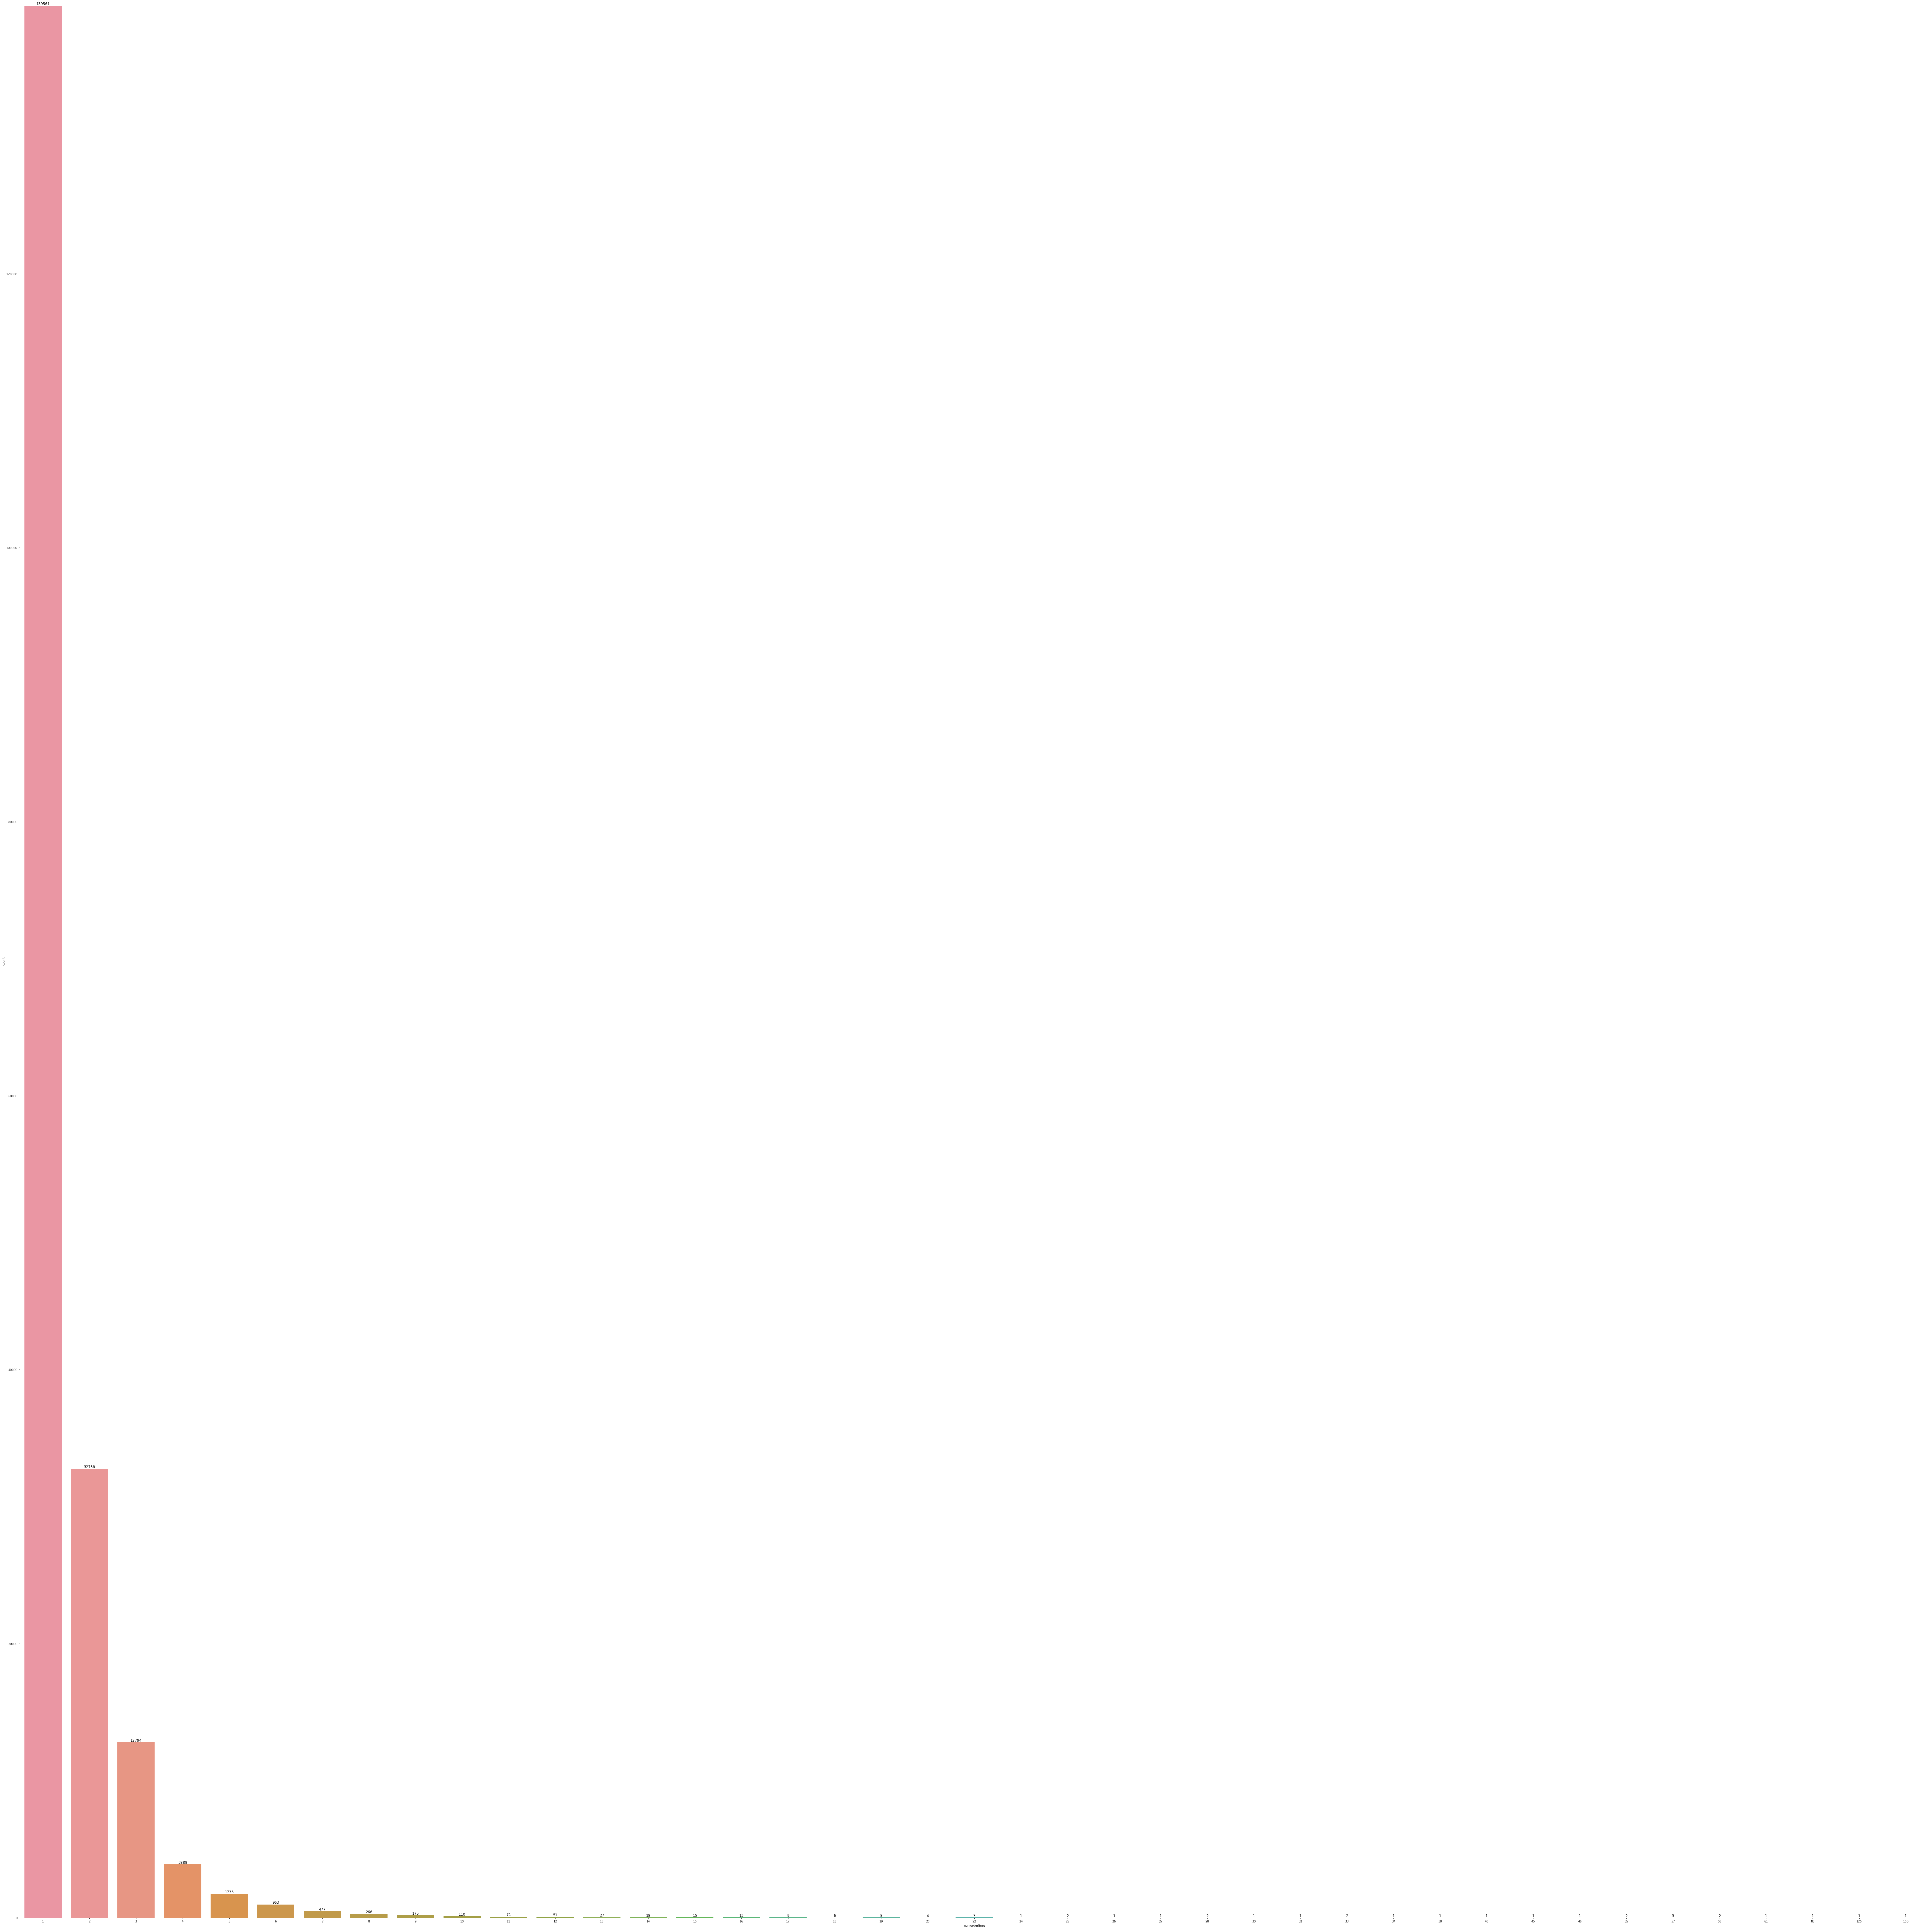

In [12]:
sns.factorplot('numorderlines',data=data,kind='count',size=90, legend=True,aspect=1)
ax = plt.gca()
y_max = data['numorderlines'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [13]:
time_price = data[['orderdate','totalprice']].copy()
time_price.sort_values('orderdate', inplace=True)
dates_sort = DataFrame(time_price['orderdate'])
time_price = time_price.set_index(pd.DatetimeIndex(dates_sort['orderdate']))
time_price.__delitem__('orderdate')

In [14]:
davg = time_price.resample('D',how='mean').loc[time_price.index].fillna(method='ffill')
davg.columns = ['averageprice']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


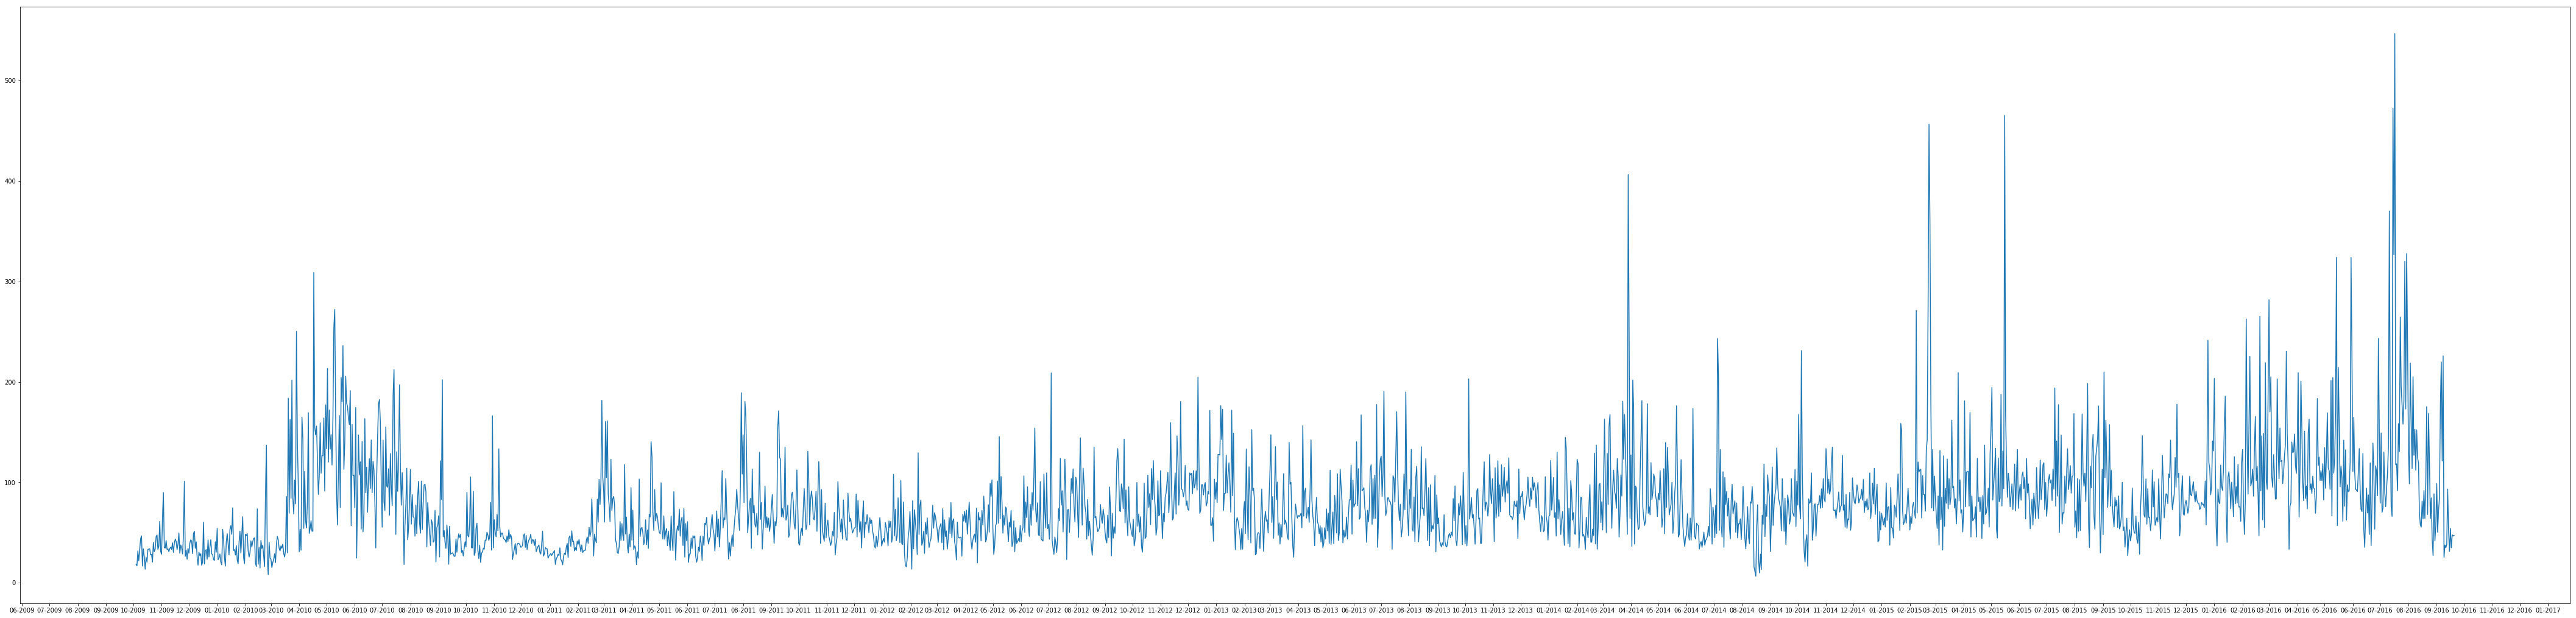

In [15]:
plt.figure(figsize=(75,20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.plot(davg.index.values, davg['averageprice'])
plt.show()

In [16]:
payment_price = data[['paymenttype','totalprice']].copy()
payment_price.sort_values('paymenttype', inplace=True)

In [17]:
payment_price.describe()

,totalprice
count,192983.000000
mean,71.036808
std,183.510368
min,0.000000
25%,16.000000
50%,25.950000
75%,46.900000
max,9848.960000


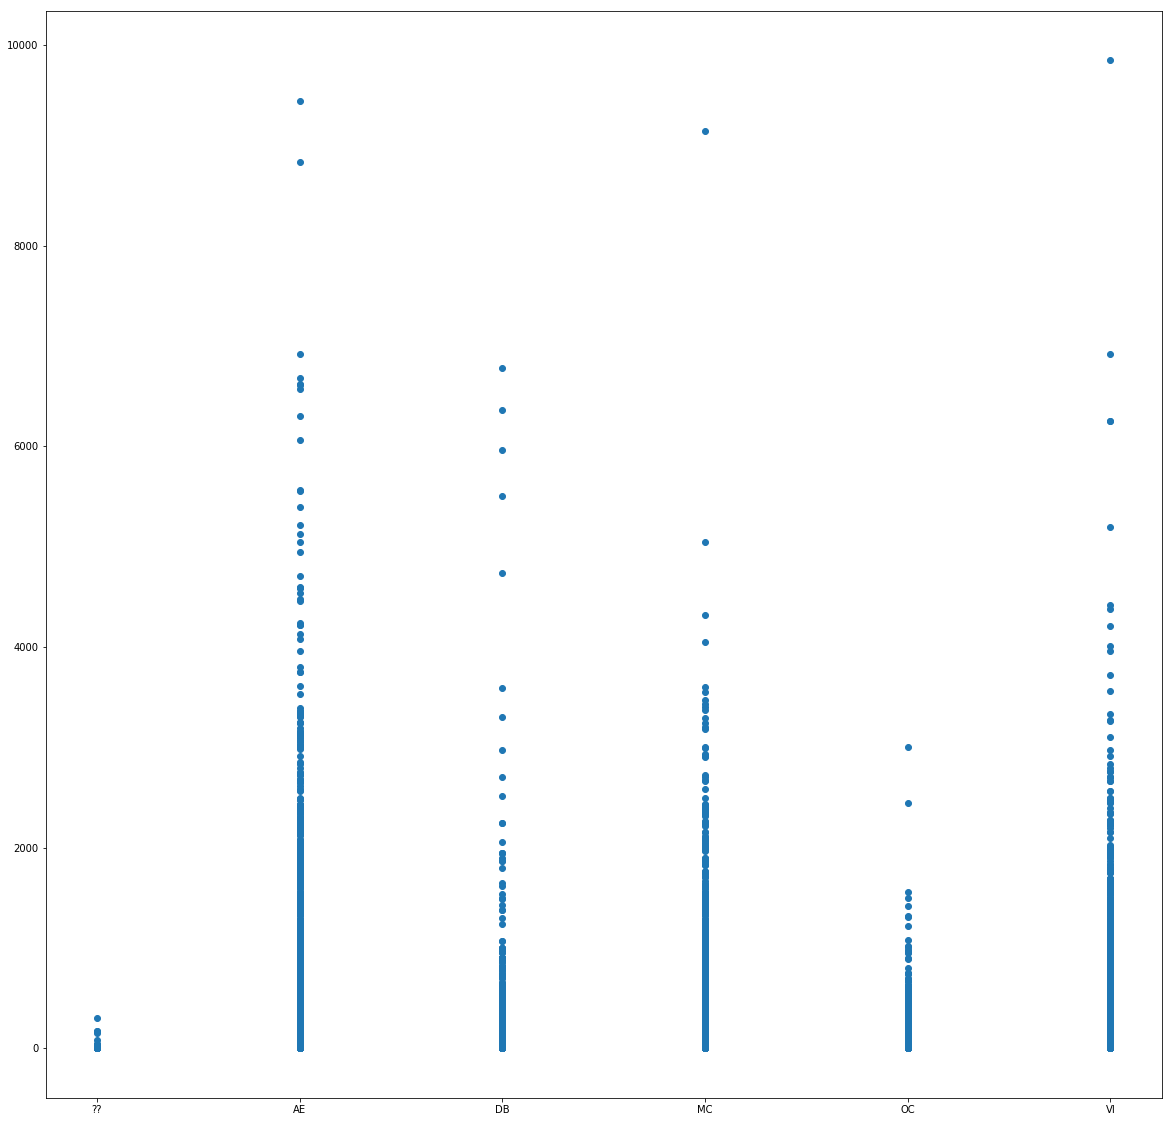

In [18]:
plt.figure(figsize=(20,20))
plt.scatter(payment_price['paymenttype'],payment_price['totalprice'])
plt.show()

In [19]:
numunits_price = data[['numunits','totalprice']].copy()
numunits_price.sort_values('numunits', inplace=True)

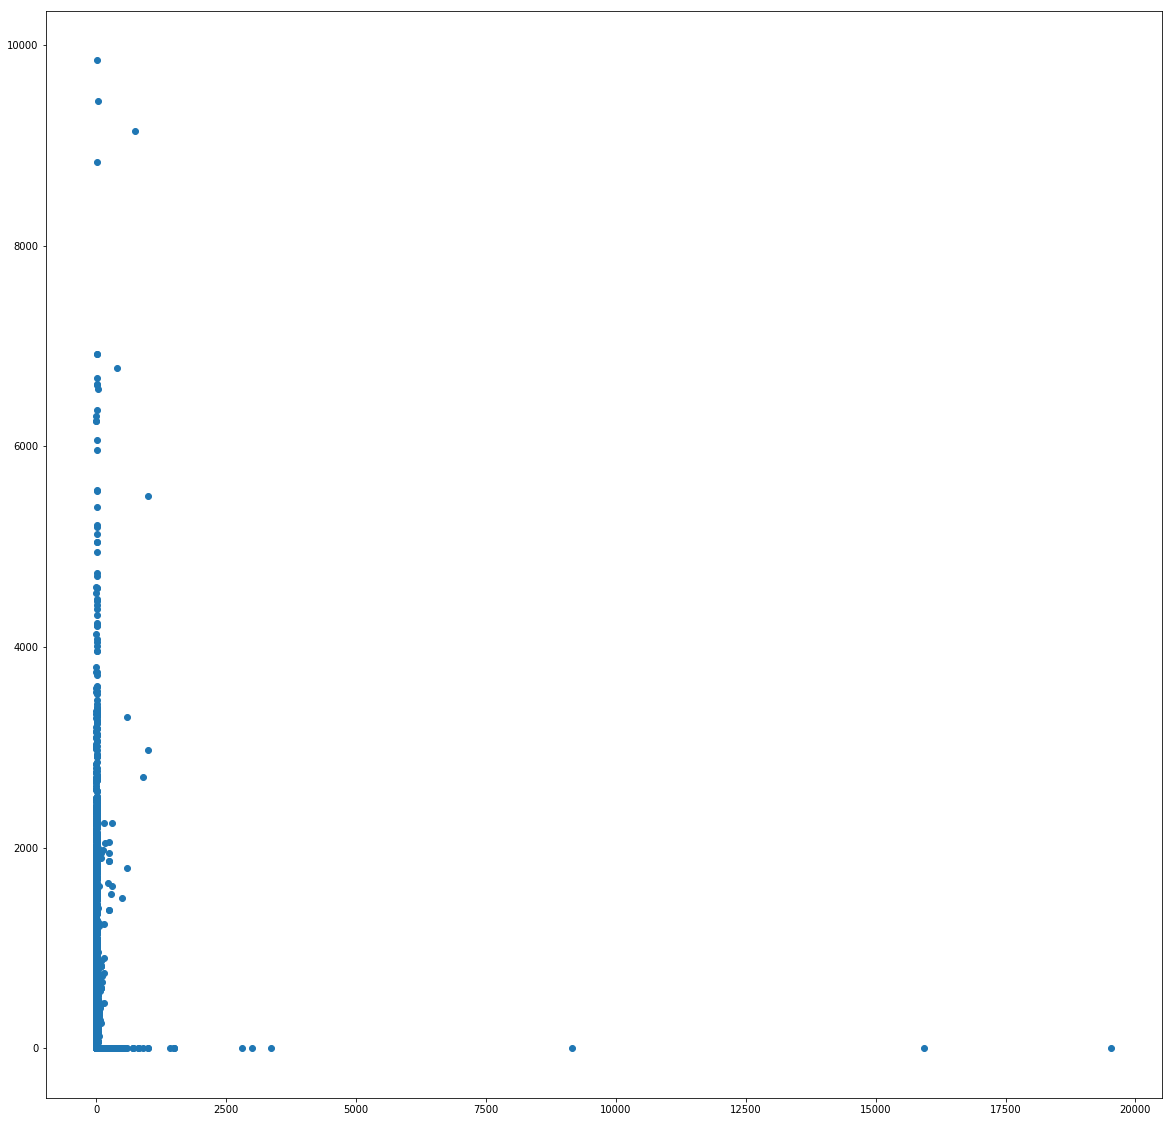

In [20]:
plt.figure(figsize=(20,20))
plt.scatter(numunits_price['numunits'],numunits_price['totalprice'],)
plt.show()